In [1]:
import numpy as np
import pandas as pd
# from icecream import ic
import subprocess
import json
import os
import plotly.graph_objects as go
from matplotlib import pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Polygon
# from shapely.ops import cascaded_union, unary_union
# from shapely import geometry
# from geopy import distance
%matplotlib inline
# import plotly.express as px 
from scipy import signal
from tqdm import tqdm
# from Bio import Phylo
# import ete3
import itertools
import sklearn
from sklearn import metrics

In [2]:
def lossGraph(train_epoch_loss, test_epoch_loss, appendix='-'):
    fig, ax = plt.subplots(facecolor = 'white') 
    x = np.arange(1, len(train_epoch_loss)+1, 1)
    ax.plot(x, train_epoch_loss,label='Training')   
    ax.plot(x, test_epoch_loss,label='Validation')  
    ax.legend() 
    ax.set_xlabel("Number of Epoch")    
    ax.set_ylabel("Loss")   
    ax.set_xticks(np.arange(0, +1, 10))    
    ax.set_title(f'{appendix}')
    ax.set_ylim(min(train_epoch_loss) - 0.01, max(train_epoch_loss) + 0.01)
    # ax_2 = ax.twinx() 
    # ax_2.plot(history["lr"], "k--", lw=1) 
    # ax_2.set_yscale("log")    
    # ax.set_ylim(ax.get_ylim()[0], history["training_losses"][0    ])
    ax.grid(axis="x")   
    fig.tight_layout()  
    fig.show()  
    print('test_loss_min:', min(test_epoch_loss), 'test_loss_min_epoch:', test_epoch_loss.index(min(test_epoch_loss)))

/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/42889512

test_loss_min: 0.17759178578853607 test_loss_min_epoch: 404
test_loss_min: 0.14867357909679413 test_loss_min_epoch: 450
test_loss_min: 0.1547333300113678 test_loss_min_epoch: 406
test_loss_min: 0.14434246718883514 test_loss_min_epoch: 294
test_loss_min: 0.17197281122207642 test_loss_min_epoch: 547
test_loss_min: 0.1467314213514328 test_loss_min_epoch: 486


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/42889512

test_loss_min: 0.14962676167488098 test_loss_min_epoch: 346
test_loss_min: 0.14189396798610687 test_loss_min_epoch: 272
test_loss_min: 0.13875500857830048 test_loss_min_epoch: 385
test_loss_min: 0.14513534307479858 test_loss_min_epoch: 304
test_loss_min: 0.14745080471038818 test_loss_min_epoch: 592
test_loss_min: 0.14443783462047577 test_loss_min_epoch: 387


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


test_loss_min: 0.1414405107498169 test_loss_min_epoch: 309
test_loss_min: 0.14696282148361206 test_loss_min_epoch: 562
test_loss_min: 0.16970761120319366 test_loss_min_epoch: 434
test_loss_min: 0.17087511718273163 test_loss_min_epoch: 547


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too

test_loss_min: 0.17778700590133667 test_loss_min_epoch: 596
test_loss_min: 0.17954711616039276 test_loss_min_epoch: 573
test_loss_min: 0.20077045261859894 test_loss_min_epoch: 567
test_loss_min: 0.20626942813396454 test_loss_min_epoch: 20
test_loss_min: 0.21606749296188354 test_loss_min_epoch: 17
test_loss_min: 0.18650594353675842 test_loss_min_epoch: 364


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/42889512

test_loss_min: 0.2097269892692566 test_loss_min_epoch: 14
test_loss_min: 0.20098738372325897 test_loss_min_epoch: 25
test_loss_min: 0.20591245591640472 test_loss_min_epoch: 5
test_loss_min: 0.20839913189411163 test_loss_min_epoch: 6
test_loss_min: 0.2115228921175003 test_loss_min_epoch: 1
test_loss_min: 0.21338316798210144 test_loss_min_epoch: 0


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


test_loss_min: 0.21996964514255524 test_loss_min_epoch: 0
test_loss_min: 0.21342073380947113 test_loss_min_epoch: 1
test_loss_min: 0.13733619451522827 test_loss_min_epoch: 471
test_loss_min: 0.13801907002925873 test_loss_min_epoch: 299
test_loss_min: 0.1415020227432251 test_loss_min_epoch: 272
test_loss_min: 0.14135918021202087 test_loss_min_epoch: 511
test_loss_min: 0.15247689187526703 test_loss_min_epoch: 551
test_loss_min: 0.14189839363098145 test_loss_min_epoch: 582
test_loss_min: 0.15567034482955933 test_loss_min_epoch: 528


/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_128965/4288951258.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


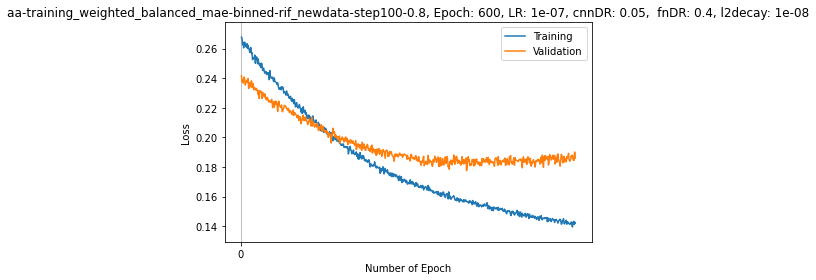

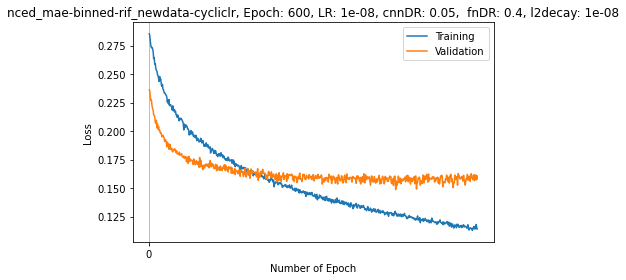

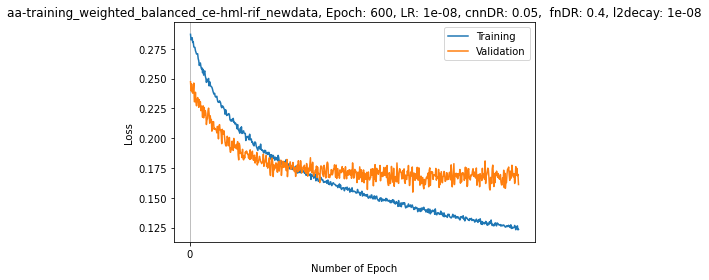

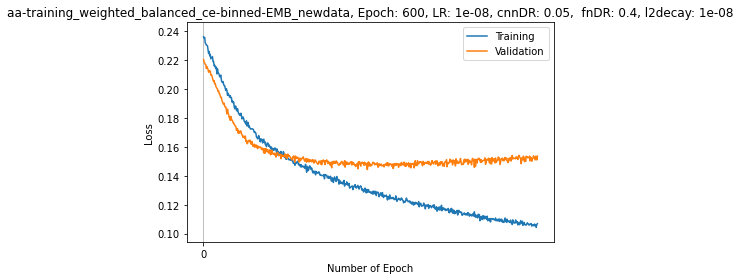

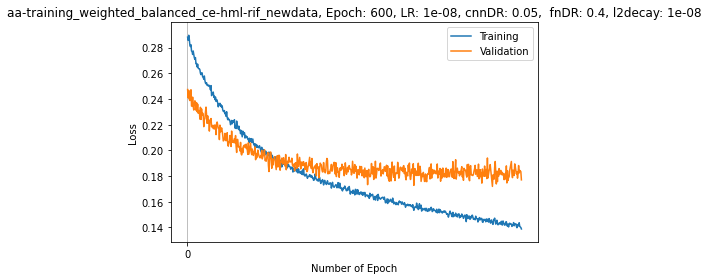

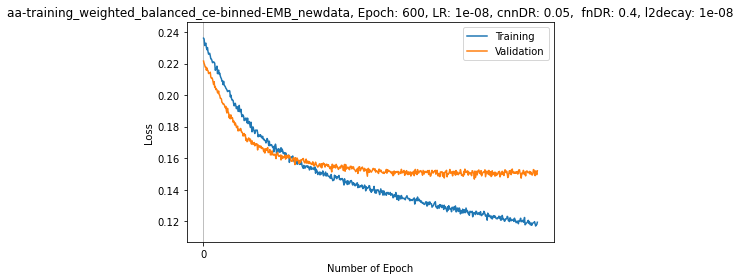

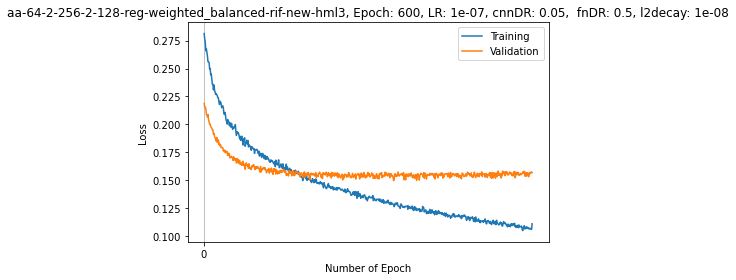

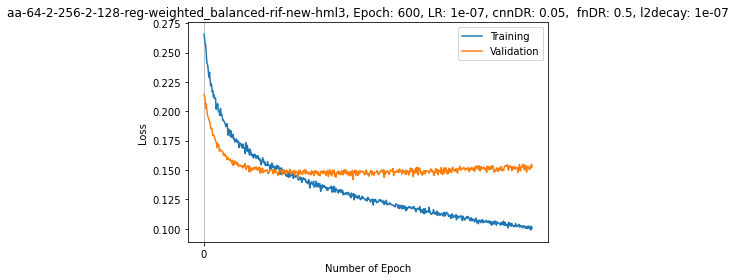

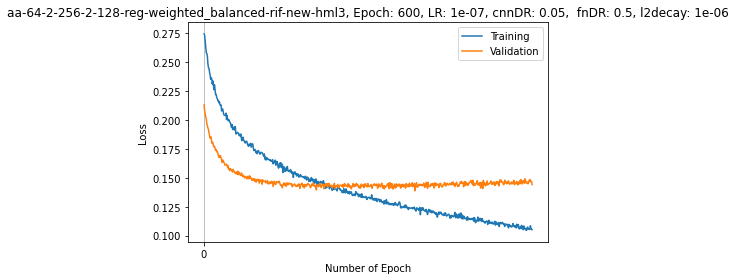

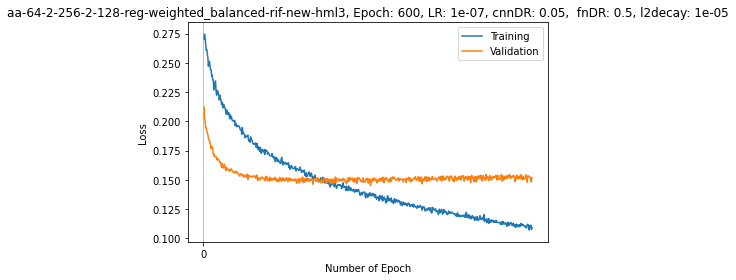

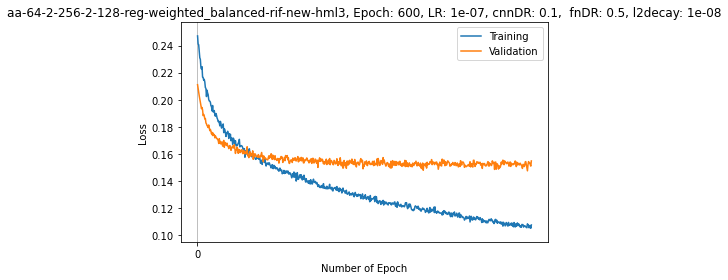

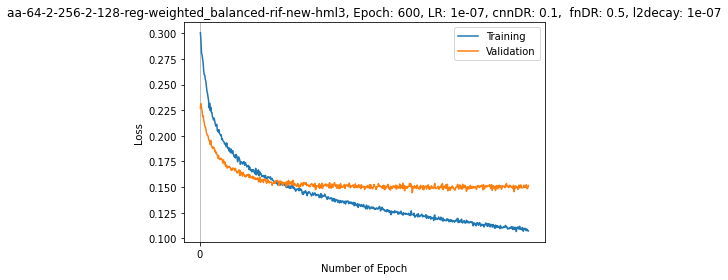

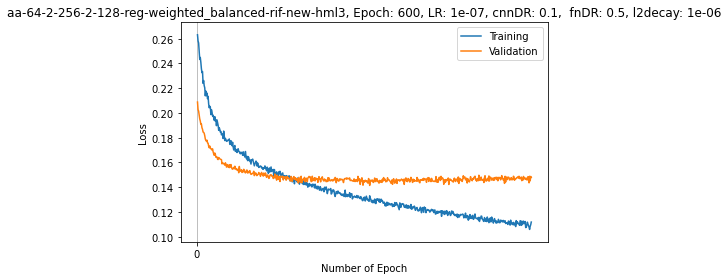

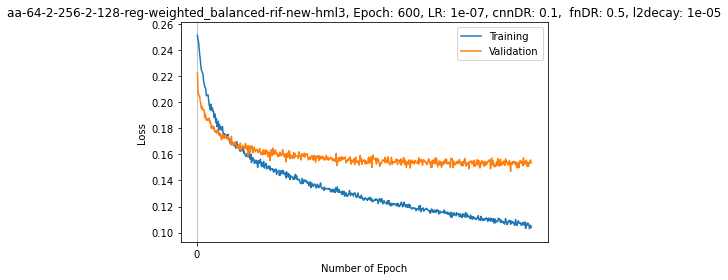

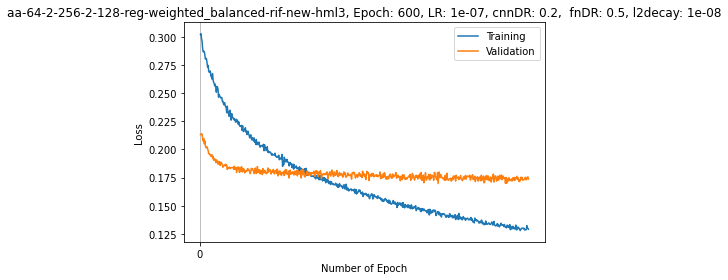

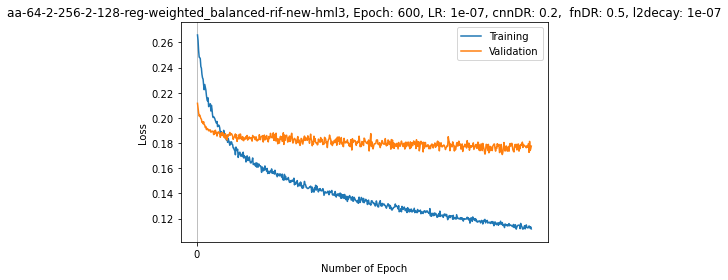

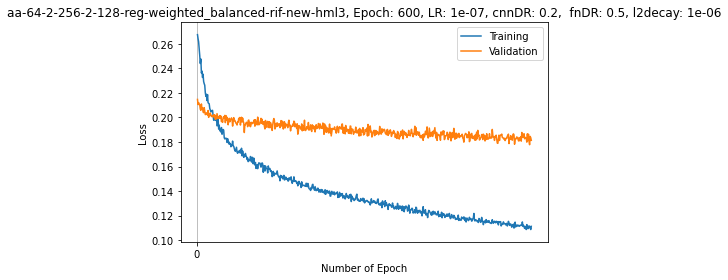

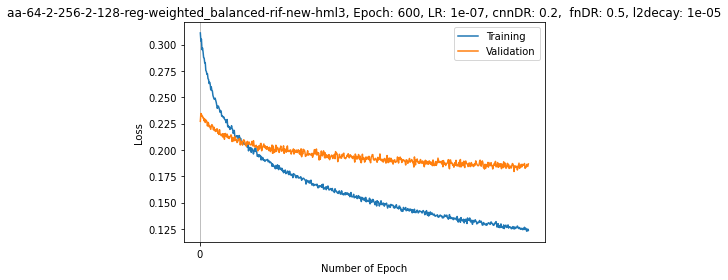

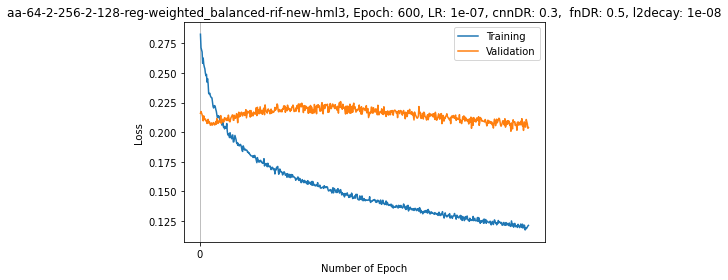

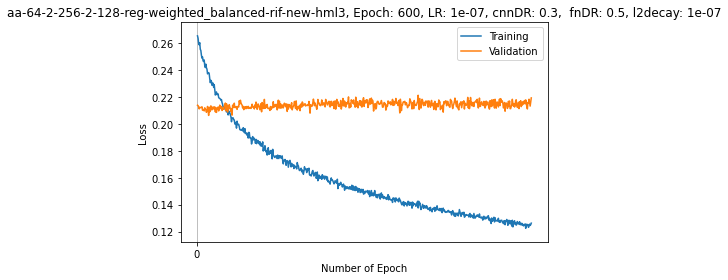

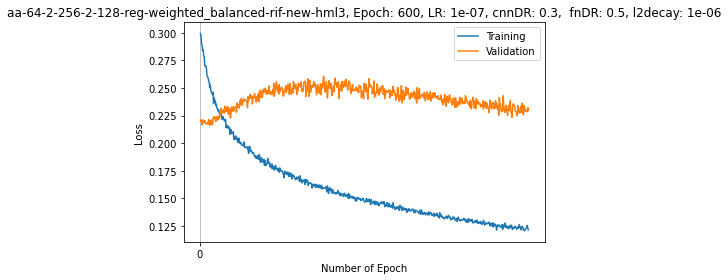

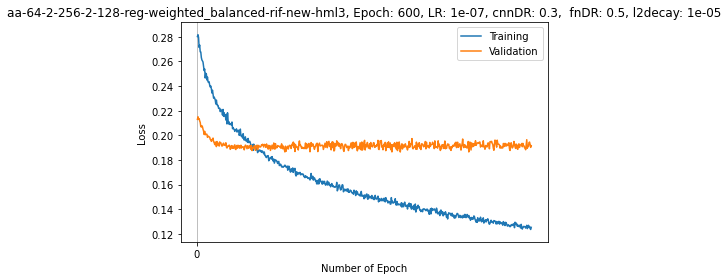

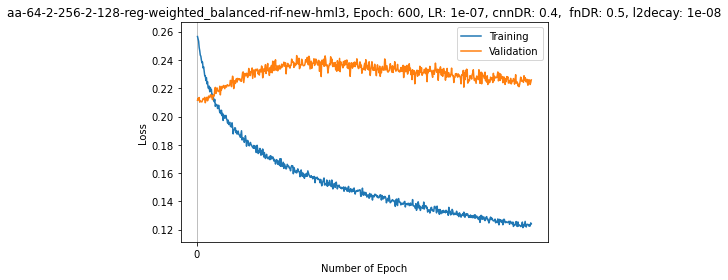

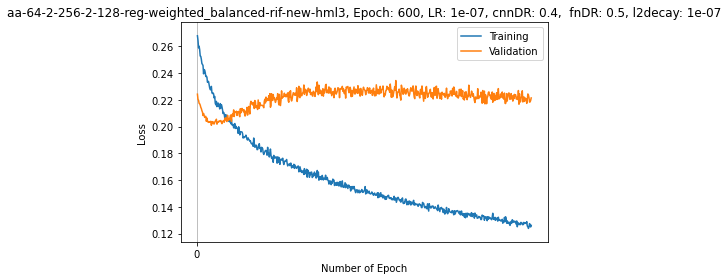

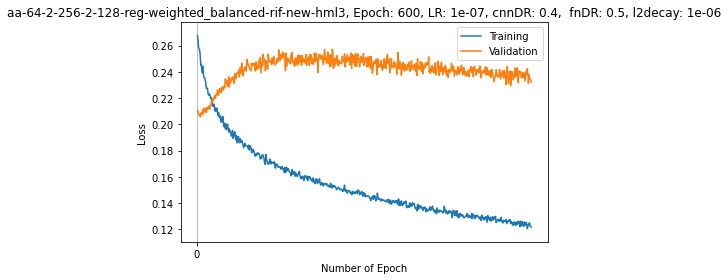

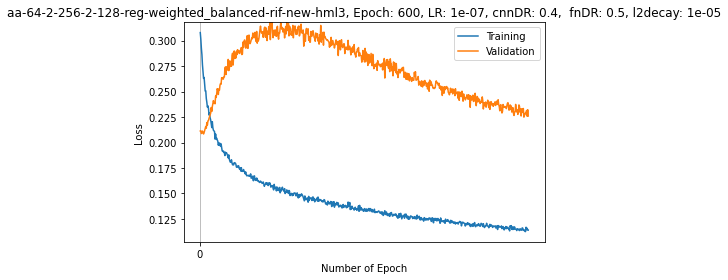

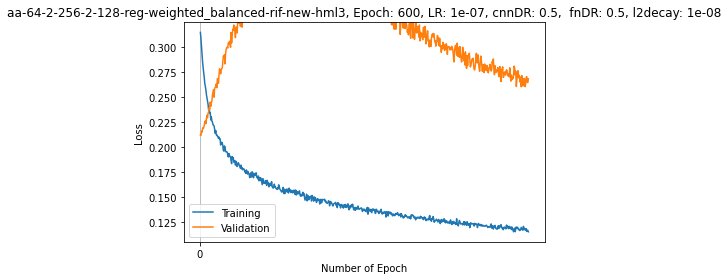

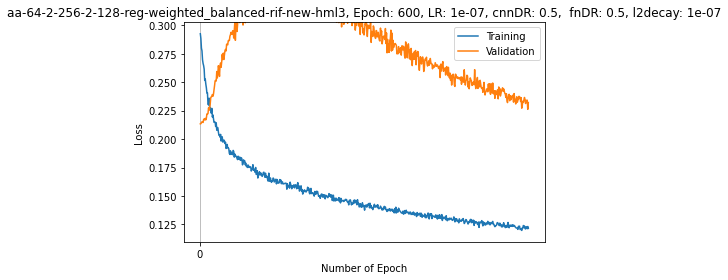

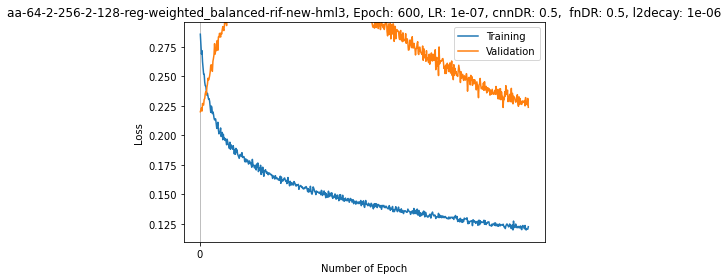

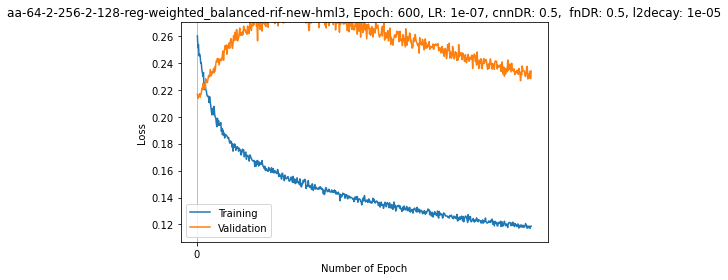

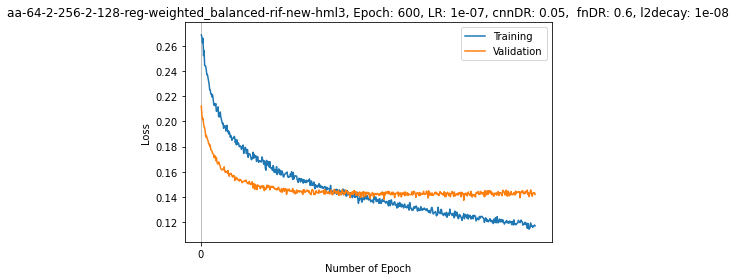

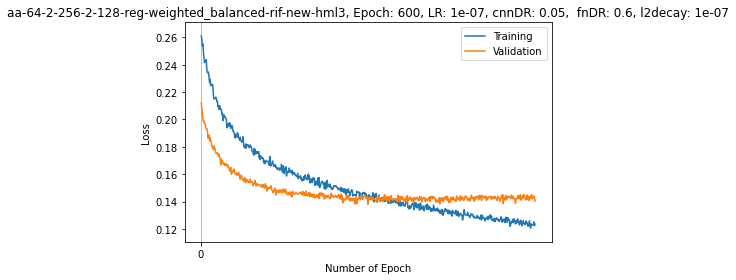

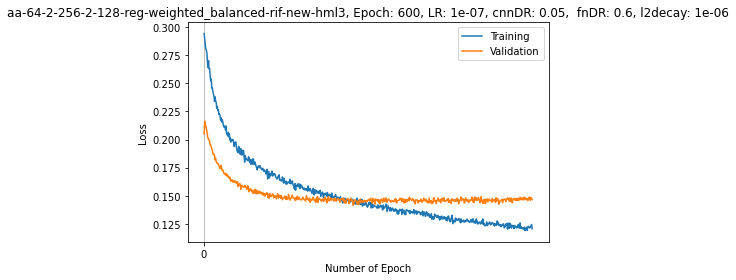

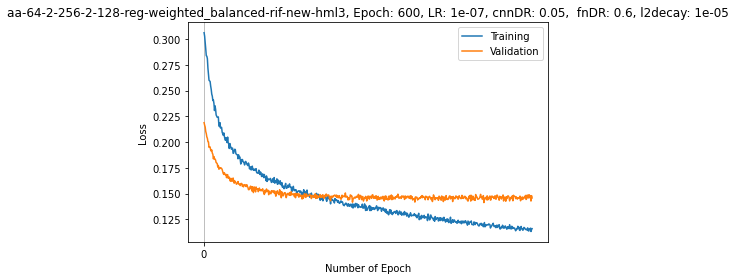

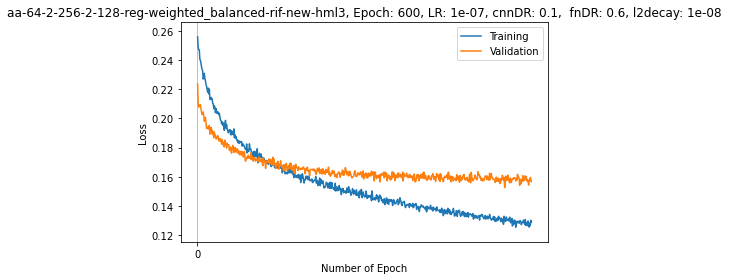

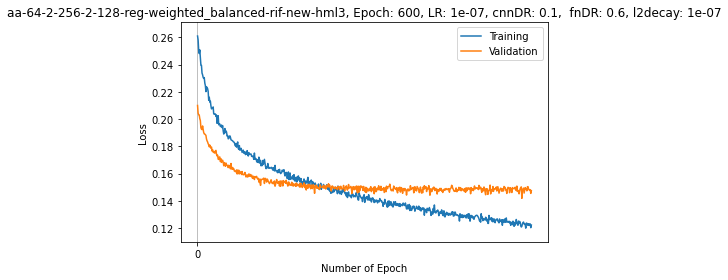

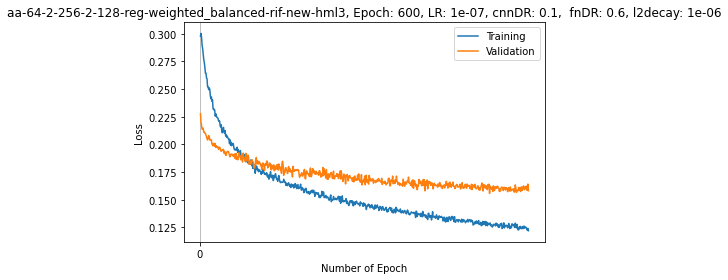

In [6]:

an = 'aa-training_weighted_balanced_mae-binned-rif_newdata-step100-0.8, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.267723023891449, 0.26718926429748535, 0.26271069049835205, 0.2643812298774719, 0.26052558422088623, 0.26376110315322876, 0.2643176019191742, 0.26290369033813477, 0.2614865303039551, 0.2610337734222412, 0.2633340358734131, 0.26012372970581055, 0.26221245527267456, 0.25983476638793945, 0.2593695819377899, 0.2574683129787445, 0.26002568006515503, 0.26072871685028076, 0.2566915452480316, 0.2572018504142761, 0.2525252103805542, 0.25375863909721375, 0.25328436493873596, 0.25330179929733276, 0.2556477189064026, 0.25012874603271484, 0.25378429889678955, 0.2543794810771942, 0.25398552417755127, 0.24977944791316986, 0.25303447246551514, 0.25045886635780334, 0.24925974011421204, 0.24838443100452423, 0.25001242756843567, 0.2472173273563385, 0.25016865134239197, 0.24896086752414703, 0.24529872834682465, 0.24674637615680695, 0.24677689373493195, 0.24450594186782837, 0.243388831615448, 0.2442253977060318, 0.24461154639720917, 0.24251452088356018, 0.2424907237291336, 0.24373768270015717, 0.2437172681093216, 0.24373117089271545, 0.23898795247077942, 0.245194211602211, 0.24057021737098694, 0.24086083471775055, 0.23995676636695862, 0.24028360843658447, 0.24074237048625946, 0.23860950767993927, 0.23775281012058258, 0.24022117257118225, 0.23783524334430695, 0.23752322793006897, 0.23722177743911743, 0.2369633913040161, 0.2357223480939865, 0.23684062063694, 0.2348865419626236, 0.23302796483039856, 0.23245802521705627, 0.23324008285999298, 0.23385320603847504, 0.23215731978416443, 0.2342079132795334, 0.23293311893939972, 0.23407906293869019, 0.2329813688993454, 0.22993971407413483, 0.2307615876197815, 0.23068368434906006, 0.22983156144618988, 0.22856183350086212, 0.23136478662490845, 0.22932055592536926, 0.2284572422504425, 0.22914451360702515, 0.22671528160572052, 0.22757236659526825, 0.226337268948555, 0.22773559391498566, 0.22562700510025024, 0.2245413064956665, 0.2264789491891861, 0.2241731733083725, 0.22530730068683624, 0.22289679944515228, 0.22549384832382202, 0.22267378866672516, 0.220645934343338, 0.2214926779270172, 0.22345326840877533, 0.2211170196533203, 0.22017773985862732, 0.21987643837928772, 0.2211763858795166, 0.22228936851024628, 0.22022826969623566, 0.21948648989200592, 0.21708910167217255, 0.2193506807088852, 0.21627044677734375, 0.2182096689939499, 0.22068889439105988, 0.21702761948108673, 0.2169443964958191, 0.2182958424091339, 0.2156161367893219, 0.2167711853981018, 0.21504893898963928, 0.2126096934080124, 0.21372298896312714, 0.21508419513702393, 0.2130393534898758, 0.21490706503391266, 0.2123022973537445, 0.21358288824558258, 0.21098855137825012, 0.21188952028751373, 0.20987892150878906, 0.2145155966281891, 0.21236146986484528, 0.21128469705581665, 0.21033036708831787, 0.21017585694789886, 0.21080569922924042, 0.21182392537593842, 0.2071859985589981, 0.207384392619133, 0.20927643775939941, 0.21017986536026, 0.2078068107366562, 0.20886491239070892, 0.20802484452724457, 0.2062557488679886, 0.20444174110889435, 0.20562797784805298, 0.20423194766044617, 0.20538096129894257, 0.20378200709819794, 0.20341752469539642, 0.2066730111837387, 0.20358100533485413, 0.20600512623786926, 0.20543262362480164, 0.2023313343524933, 0.2032652199268341, 0.2024034857749939, 0.20175644755363464, 0.20221711695194244, 0.20382849872112274, 0.20137310028076172, 0.20119984447956085, 0.20318716764450073, 0.20077729225158691, 0.20184393227100372, 0.19777396321296692, 0.1997910737991333, 0.20045551657676697, 0.19896157085895538, 0.19875608384609222, 0.20100434124469757, 0.19838936626911163, 0.1976764053106308, 0.19738614559173584, 0.19893427193164825, 0.19872727990150452, 0.1971232146024704, 0.19618511199951172, 0.19579726457595825, 0.19579817354679108, 0.19468286633491516, 0.1945536583662033, 0.19548849761486053, 0.19496285915374756, 0.19550323486328125, 0.19328410923480988, 0.19327200949192047, 0.19371354579925537, 0.19381961226463318, 0.1933983713388443, 0.19291722774505615, 0.1937856376171112, 0.19319087266921997, 0.18888553977012634, 0.1909831315279007, 0.19243723154067993, 0.19389708340168, 0.19175131618976593, 0.1911241114139557, 0.1890467256307602, 0.1899012178182602, 0.18915165960788727, 0.1915109008550644, 0.18904167413711548, 0.18842782080173492, 0.18871234357357025, 0.18878173828125, 0.1902194619178772, 0.1873077005147934, 0.18911567330360413, 0.1855602264404297, 0.18844005465507507, 0.18528912961483002, 0.1876714676618576, 0.18976573646068573, 0.1867087036371231, 0.18580742180347443, 0.18546415865421295, 0.18773917853832245, 0.18585801124572754, 0.18757666647434235, 0.1861451119184494, 0.18431122601032257, 0.18508268892765045, 0.18402712047100067, 0.18487977981567383, 0.18422050774097443, 0.18320922553539276, 0.18341302871704102, 0.18480516970157623, 0.18482379615306854, 0.18266986310482025, 0.18010492622852325, 0.18217061460018158, 0.1811467856168747, 0.18086771667003632, 0.1812358945608139, 0.18053314089775085, 0.18129956722259521, 0.18089796602725983, 0.1835106462240219, 0.18131300806999207, 0.18047675490379333, 0.17936664819717407, 0.18056726455688477, 0.18001511693000793, 0.17945273220539093, 0.17929093539714813, 0.1796225607395172, 0.17991942167282104, 0.17574772238731384, 0.17900677025318146, 0.1769002228975296, 0.1785222738981247, 0.17776136100292206, 0.18018494546413422, 0.17752200365066528, 0.17533746361732483, 0.17692342400550842, 0.17913174629211426, 0.1772139072418213, 0.17665909230709076, 0.1774318665266037, 0.17812992632389069, 0.17569072544574738, 0.17625799775123596, 0.17473748326301575, 0.17436864972114563, 0.17605167627334595, 0.1749066263437271, 0.1736191213130951, 0.17596280574798584, 0.17525047063827515, 0.17348098754882812, 0.17533886432647705, 0.17523230612277985, 0.17502084374427795, 0.17357996106147766, 0.1748058944940567, 0.1745290905237198, 0.1738172024488449, 0.17276312410831451, 0.17365580797195435, 0.17089144885540009, 0.17375923693180084, 0.17391914129257202, 0.1709975153207779, 0.17183907330036163, 0.1734592765569687, 0.1694810837507248, 0.1711396872997284, 0.1713976263999939, 0.17025509476661682, 0.17173387110233307, 0.17117910087108612, 0.17122341692447662, 0.1695292741060257, 0.1709233969449997, 0.1701570600271225, 0.16840168833732605, 0.16941794753074646, 0.16903012990951538, 0.1686972677707672, 0.17092078924179077, 0.17138931155204773, 0.1686355173587799, 0.16992829740047455, 0.16867952048778534, 0.17020106315612793, 0.1684848517179489, 0.16915960609912872, 0.1684773713350296, 0.1668316125869751, 0.16734591126441956, 0.1694646179676056, 0.16933029890060425, 0.16720736026763916, 0.16852566599845886, 0.1673768311738968, 0.16631238162517548, 0.1666356474161148, 0.16615958511829376, 0.16707606613636017, 0.1675456017255783, 0.1662345826625824, 0.16593165695667267, 0.16749489307403564, 0.16704200208187103, 0.16454455256462097, 0.1653009057044983, 0.16619354486465454, 0.16683517396450043, 0.16673517227172852, 0.16575263440608978, 0.16444136202335358, 0.16540800034999847, 0.1675470620393753, 0.1641428917646408, 0.16641290485858917, 0.16543282568454742, 0.16392792761325836, 0.16439342498779297, 0.16434457898139954, 0.16370585560798645, 0.16306591033935547, 0.1638627052307129, 0.16234783828258514, 0.16299085319042206, 0.1626594215631485, 0.16262803971767426, 0.16314655542373657, 0.16348840296268463, 0.16216358542442322, 0.16132180392742157, 0.16346146166324615, 0.1628064662218094, 0.1609959900379181, 0.16156013309955597, 0.1603388786315918, 0.16262076795101166, 0.1602063626050949, 0.1620345413684845, 0.1615208089351654, 0.1632031500339508, 0.1628444641828537, 0.16059404611587524, 0.1610557585954666, 0.15937522053718567, 0.16083219647407532, 0.16192522644996643, 0.16203351318836212, 0.1614149957895279, 0.15844734013080597, 0.16320833563804626, 0.15898466110229492, 0.16051916778087616, 0.15935932099819183, 0.15818853676319122, 0.15881067514419556, 0.15944862365722656, 0.1598789244890213, 0.1600177139043808, 0.16063624620437622, 0.15957146883010864, 0.15809594094753265, 0.15746815502643585, 0.15812548995018005, 0.15725022554397583, 0.15917281806468964, 0.15894609689712524, 0.15742264688014984, 0.1586376130580902, 0.15637041628360748, 0.15767797827720642, 0.15842381119728088, 0.15724143385887146, 0.15776275098323822, 0.15728899836540222, 0.15723328292369843, 0.15636906027793884, 0.15792720019817352, 0.1566590666770935, 0.15660695731639862, 0.15783216059207916, 0.15731365978717804, 0.1567974090576172, 0.15647609531879425, 0.15667811036109924, 0.15633712708950043, 0.15554624795913696, 0.15698876976966858, 0.15731392800807953, 0.1562567949295044, 0.15661728382110596, 0.15564291179180145, 0.15454241633415222, 0.1573772132396698, 0.15515364706516266, 0.15590065717697144, 0.15518541634082794, 0.15516607463359833, 0.15659214556217194, 0.15595848858356476, 0.15383437275886536, 0.15355058014392853, 0.155826136469841, 0.15453366935253143, 0.15315140783786774, 0.15411844849586487, 0.15447311103343964, 0.15402495861053467, 0.1540735512971878, 0.1531251221895218, 0.1542239934206009, 0.15401910245418549, 0.15342479944229126, 0.1547449827194214, 0.15506871044635773, 0.15392443537712097, 0.15374508500099182, 0.15384937822818756, 0.15542201697826385, 0.1558856964111328, 0.15198156237602234, 0.15265804529190063, 0.1538926512002945, 0.15155324339866638, 0.15315325558185577, 0.15253309905529022, 0.15270735323429108, 0.15070216357707977, 0.15260674059391022, 0.15275749564170837, 0.1504443883895874, 0.1529283970594406, 0.1526738852262497, 0.15195371210575104, 0.15175607800483704, 0.15232747793197632, 0.15255102515220642, 0.15138199925422668, 0.15103581547737122, 0.15282423794269562, 0.15073338150978088, 0.15128445625305176, 0.15136955678462982, 0.15205180644989014, 0.15142330527305603, 0.151222825050354, 0.1520867943763733, 0.15044035017490387, 0.1505085825920105, 0.150051087141037, 0.15157562494277954, 0.15095917880535126, 0.14967839419841766, 0.14965027570724487, 0.14839571714401245, 0.150444895029068, 0.15030987560749054, 0.15045848488807678, 0.14995110034942627, 0.15039776265621185, 0.1494826376438141, 0.1479455977678299, 0.14721235632896423, 0.14997707307338715, 0.1493619680404663, 0.15023235976696014, 0.14859092235565186, 0.14928869903087616, 0.14753644168376923, 0.14861811697483063, 0.1486707329750061, 0.1491439938545227, 0.15027649700641632, 0.15073055028915405, 0.14749886095523834, 0.14894302189350128, 0.14970353245735168, 0.1465129554271698, 0.14908185601234436, 0.1495528221130371, 0.1470261812210083, 0.14615650475025177, 0.14872519671916962, 0.14742548763751984, 0.1477377712726593, 0.14700917899608612, 0.14710749685764313, 0.14872725307941437, 0.14830069243907928, 0.14611628651618958, 0.1479288786649704, 0.14785034954547882, 0.14849689602851868, 0.14666476845741272, 0.14521431922912598, 0.14811202883720398, 0.14668312668800354, 0.14619703590869904, 0.1460094153881073, 0.14625290036201477, 0.14731250703334808, 0.14594583213329315, 0.14679206907749176, 0.1467750370502472, 0.145430326461792, 0.1465982049703598, 0.14597932994365692, 0.1450815051794052, 0.1445753425359726, 0.14619114995002747, 0.1463644653558731, 0.14539670944213867, 0.14398089051246643, 0.14664983749389648, 0.14628328382968903, 0.14549987018108368, 0.1471535712480545, 0.14466717839241028, 0.14435483515262604, 0.14535623788833618, 0.14540532231330872, 0.14563094079494476, 0.14508965611457825, 0.14579449594020844, 0.14550866186618805, 0.14558708667755127, 0.14583523571491241, 0.1431039571762085, 0.14560315012931824, 0.14333365857601166, 0.14467471837997437, 0.1448933333158493, 0.14512796700000763, 0.1436004936695099, 0.143169105052948, 0.14428091049194336, 0.1452457308769226, 0.1448003053665161, 0.14436651766300201, 0.14428791403770447, 0.1425514668226242, 0.14435483515262604, 0.144203320145607, 0.1446366310119629, 0.14376358687877655, 0.14333143830299377, 0.14211422204971313, 0.14322087168693542, 0.1438315063714981, 0.1446441411972046, 0.1446762979030609, 0.14397265017032623, 0.14135684072971344, 0.14164596796035767, 0.1434890180826187, 0.14359818398952484, 0.14511153101921082, 0.14180532097816467, 0.14155179262161255, 0.1425100862979889, 0.14353901147842407, 0.1439923346042633, 0.1413479894399643, 0.1430172175168991, 0.14272689819335938, 0.14199373126029968, 0.14195382595062256, 0.14124421775341034, 0.14175112545490265, 0.14165805280208588, 0.14291663467884064, 0.1416904330253601, 0.13947628438472748, 0.1421489417552948, 0.1432250738143921, 0.14121629297733307, 0.14282330870628357, 0.14206667244434357]
Test_Loss= [0.2416238635778427, 0.23770542442798615, 0.23850977420806885, 0.23668316006660461, 0.2398608773946762, 0.24081650376319885, 0.2390231192111969, 0.23535852134227753, 0.2378830462694168, 0.23731175065040588, 0.23870907723903656, 0.23707692325115204, 0.2398180067539215, 0.23305030167102814, 0.2340877503156662, 0.23706798255443573, 0.23543868958950043, 0.23428280651569366, 0.2383028119802475, 0.23383457958698273, 0.23498201370239258, 0.2364652454853058, 0.23219218850135803, 0.23388290405273438, 0.2328135073184967, 0.23323002457618713, 0.23196864128112793, 0.23311550915241241, 0.2316725254058838, 0.23160146176815033, 0.2289319783449173, 0.23170404136180878, 0.22631461918354034, 0.23165035247802734, 0.23109674453735352, 0.23078791797161102, 0.23091892898082733, 0.2262316197156906, 0.2303769588470459, 0.22960732877254486, 0.22941671311855316, 0.2273181527853012, 0.22942721843719482, 0.22754834592342377, 0.22597990930080414, 0.22531060874462128, 0.22706075012683868, 0.2266288846731186, 0.22522293031215668, 0.22384674847126007, 0.2249128818511963, 0.22430606186389923, 0.22400212287902832, 0.22355477511882782, 0.22571106255054474, 0.22460778057575226, 0.2200583666563034, 0.22233401238918304, 0.22417961061000824, 0.22042278945446014, 0.22367358207702637, 0.22459308803081512, 0.22241182625293732, 0.22395114600658417, 0.22238312661647797, 0.2174685299396515, 0.22188694775104523, 0.22451427578926086, 0.22198449075222015, 0.22107239067554474, 0.22046108543872833, 0.22023224830627441, 0.2218940705060959, 0.217682883143425, 0.21737639605998993, 0.21930508315563202, 0.21974487602710724, 0.22170749306678772, 0.22156600654125214, 0.2208722084760666, 0.22074976563453674, 0.21963262557983398, 0.2190599888563156, 0.2183692306280136, 0.21972203254699707, 0.21893243491649628, 0.2168816775083542, 0.21812191605567932, 0.21755671501159668, 0.21759967505931854, 0.21559642255306244, 0.21625934541225433, 0.21559710800647736, 0.21846671402454376, 0.21483741700649261, 0.21652737259864807, 0.2166515588760376, 0.215809628367424, 0.21524763107299805, 0.21489548683166504, 0.21326673030853271, 0.21437931060791016, 0.21506033837795258, 0.21143262088298798, 0.21385446190834045, 0.21295662224292755, 0.2138483077287674, 0.2092438042163849, 0.21123705804347992, 0.21188023686408997, 0.21335569024085999, 0.21518026292324066, 0.21152503788471222, 0.2128688395023346, 0.21145248413085938, 0.21383391320705414, 0.2113310843706131, 0.21135692298412323, 0.21062254905700684, 0.2086624950170517, 0.20953428745269775, 0.21108031272888184, 0.21234241127967834, 0.2105720043182373, 0.21018794178962708, 0.20773354172706604, 0.21367645263671875, 0.20761433243751526, 0.20945298671722412, 0.210358664393425, 0.2093641757965088, 0.2069673389196396, 0.20796404778957367, 0.207444429397583, 0.20884740352630615, 0.2071833461523056, 0.20957790315151215, 0.20879600942134857, 0.20488090813159943, 0.2045905590057373, 0.20716097950935364, 0.2057894915342331, 0.20725618302822113, 0.2086571902036667, 0.20522959530353546, 0.20419171452522278, 0.20771761238574982, 0.20578308403491974, 0.20507799088954926, 0.2034970372915268, 0.2043101042509079, 0.2045738697052002, 0.2029963582754135, 0.2045595645904541, 0.20343196392059326, 0.20223040878772736, 0.20006690919399261, 0.20294852554798126, 0.2029670774936676, 0.20252910256385803, 0.20011954009532928, 0.19622038304805756, 0.2019534558057785, 0.20106926560401917, 0.20616360008716583, 0.20366047322750092, 0.20262952148914337, 0.20380234718322754, 0.20013625919818878, 0.20164711773395538, 0.20121411979198456, 0.2001562863588333, 0.20046687126159668, 0.1981486827135086, 0.2004963904619217, 0.20037487149238586, 0.20094235241413116, 0.1961112767457962, 0.19860707223415375, 0.1992446631193161, 0.19844117760658264, 0.20030157268047333, 0.19918778538703918, 0.1985989809036255, 0.19682767987251282, 0.1993173211812973, 0.1980217546224594, 0.20029154419898987, 0.1974976658821106, 0.19740401208400726, 0.1993178129196167, 0.19528165459632874, 0.19783544540405273, 0.19628165662288666, 0.1967891901731491, 0.19824908673763275, 0.1961851418018341, 0.19822515547275543, 0.19662581384181976, 0.1961071640253067, 0.19768226146697998, 0.19612354040145874, 0.19584360718727112, 0.19475840032100677, 0.19528184831142426, 0.19788892567157745, 0.19179096817970276, 0.19257183372974396, 0.1955704540014267, 0.1938900649547577, 0.19554586708545685, 0.19434614479541779, 0.19280916452407837, 0.19501858949661255, 0.19519869983196259, 0.19208084046840668, 0.19132225215435028, 0.1967751830816269, 0.19306093454360962, 0.19253875315189362, 0.19549012184143066, 0.19351167976856232, 0.19151128828525543, 0.19126923382282257, 0.19406713545322418, 0.1933659017086029, 0.19525864720344543, 0.19393390417099, 0.1913219690322876, 0.1917268931865692, 0.19228601455688477, 0.19047747552394867, 0.19356369972229004, 0.19189541041851044, 0.1948283612728119, 0.18943102657794952, 0.19264930486679077, 0.19110116362571716, 0.19189979135990143, 0.18960584700107574, 0.19028329849243164, 0.19176903367042542, 0.18781356513500214, 0.19215507805347443, 0.1887999325990677, 0.19036510586738586, 0.19232860207557678, 0.19248884916305542, 0.1887030005455017, 0.1910422146320343, 0.1913587898015976, 0.18981178104877472, 0.1872469037771225, 0.19009847939014435, 0.19181419909000397, 0.19153325259685516, 0.19040125608444214, 0.18806812167167664, 0.1858346313238144, 0.19073373079299927, 0.1912091225385666, 0.1914384663105011, 0.19049601256847382, 0.18719492852687836, 0.1896337866783142, 0.18736980855464935, 0.19046126306056976, 0.18990527093410492, 0.18896684050559998, 0.19030573964118958, 0.18851278722286224, 0.18753507733345032, 0.18741825222969055, 0.18612781167030334, 0.18391850590705872, 0.1873147338628769, 0.1888892650604248, 0.18724921345710754, 0.18822793662548065, 0.1887611597776413, 0.18788926303386688, 0.1867673248052597, 0.1883818656206131, 0.18836472928524017, 0.189430832862854, 0.1878557950258255, 0.18795251846313477, 0.188044011592865, 0.18857361376285553, 0.18654672801494598, 0.18744920194149017, 0.18814490735530853, 0.1888337880373001, 0.18846750259399414, 0.18815524876117706, 0.18810129165649414, 0.18769674003124237, 0.18528693914413452, 0.18790560960769653, 0.1855633407831192, 0.18592767417430878, 0.18613409996032715, 0.18512915074825287, 0.1840778887271881, 0.18847595155239105, 0.18851150572299957, 0.18682627379894257, 0.18591943383216858, 0.1859520971775055, 0.186360701918602, 0.18512380123138428, 0.18655900657176971, 0.18610158562660217, 0.18769457936286926, 0.18457768857479095, 0.1845393180847168, 0.18586798012256622, 0.18385367095470428, 0.18706534802913666, 0.18446990847587585, 0.18370670080184937, 0.18317271769046783, 0.18120555579662323, 0.18400053679943085, 0.1828378140926361, 0.18355731666088104, 0.18563835322856903, 0.18728290498256683, 0.18079863488674164, 0.1816873401403427, 0.1827687919139862, 0.18392281234264374, 0.18259286880493164, 0.18175119161605835, 0.18191790580749512, 0.1877909153699875, 0.18421244621276855, 0.18262653052806854, 0.18476364016532898, 0.18401379883289337, 0.18344296514987946, 0.1836312860250473, 0.18091981112957, 0.18042345345020294, 0.18505693972110748, 0.184703066945076, 0.1834409087896347, 0.18727798759937286, 0.18535561859607697, 0.18576322495937347, 0.18316198885440826, 0.18525682389736176, 0.1856546849012375, 0.18681533634662628, 0.18044497072696686, 0.18550190329551697, 0.18056826293468475, 0.1863917112350464, 0.18429069221019745, 0.18114452064037323, 0.18198828399181366, 0.18583492934703827, 0.18313811719417572, 0.18135620653629303, 0.1830521672964096, 0.18448412418365479, 0.18687932193279266, 0.18244318664073944, 0.18526671826839447, 0.18703599274158478, 0.18487685918807983, 0.18007837235927582, 0.180884450674057, 0.17852692306041718, 0.1837172508239746, 0.18231895565986633, 0.1847684234380722, 0.18330912292003632, 0.18147552013397217, 0.18405719101428986, 0.18355780839920044, 0.18814490735530853, 0.18579010665416718, 0.181892991065979, 0.1866401731967926, 0.1841469407081604, 0.1871560961008072, 0.18578557670116425, 0.18246082961559296, 0.18329697847366333, 0.18466703593730927, 0.1841876357793808, 0.18221281468868256, 0.1833525151014328, 0.18131139874458313, 0.18348701298236847, 0.18697579205036163, 0.18244320154190063, 0.1849362999200821, 0.18204808235168457, 0.18290771543979645, 0.1849212646484375, 0.18296657502651215, 0.1861996054649353, 0.17759178578853607, 0.17973116040229797, 0.18418878316879272, 0.1869671791791916, 0.1838923543691635, 0.18474939465522766, 0.18088464438915253, 0.18211720883846283, 0.18140393495559692, 0.1813385933637619, 0.1850844919681549, 0.18468259274959564, 0.18520313501358032, 0.18064410984516144, 0.18497207760810852, 0.18145263195037842, 0.18485784530639648, 0.18344970047473907, 0.18547546863555908, 0.18326865136623383, 0.18207526206970215, 0.18334633111953735, 0.18175028264522552, 0.18322798609733582, 0.18090325593948364, 0.18159803748130798, 0.18316702544689178, 0.18107379972934723, 0.1857159584760666, 0.18335722386837006, 0.18563830852508545, 0.18376021087169647, 0.18333974480628967, 0.18476347625255585, 0.1833898276090622, 0.18508601188659668, 0.18627141416072845, 0.18397392332553864, 0.18307970464229584, 0.18651270866394043, 0.18406662344932556, 0.18163488805294037, 0.18492184579372406, 0.18349047005176544, 0.18306417763233185, 0.1839182823896408, 0.1832723468542099, 0.1826220154762268, 0.18336713314056396, 0.18277199566364288, 0.1805339902639389, 0.1855209916830063, 0.1861381083726883, 0.18622121214866638, 0.18511345982551575, 0.18388846516609192, 0.1811319887638092, 0.18704074621200562, 0.18179330229759216, 0.18332593142986298, 0.18434588611125946, 0.18440352380275726, 0.18143326044082642, 0.18331101536750793, 0.18391524255275726, 0.18381819128990173, 0.18467681109905243, 0.18339090049266815, 0.18503877520561218, 0.1860974282026291, 0.18107430636882782, 0.1823076605796814, 0.1817445307970047, 0.18557384610176086, 0.18221400678157806, 0.18371398746967316, 0.18139933049678802, 0.1869664341211319, 0.18615107238292694, 0.18779399991035461, 0.18295465409755707, 0.18361270427703857, 0.18190565705299377, 0.182144433259964, 0.1849847435951233, 0.18619655072689056, 0.18128466606140137, 0.18635675311088562, 0.1851649284362793, 0.1846170276403427, 0.18443681299686432, 0.18427160382270813, 0.18407049775123596, 0.18359783291816711, 0.18485228717327118, 0.18510954082012177, 0.18532375991344452, 0.18443964421749115, 0.18529975414276123, 0.18343433737754822, 0.17947931587696075, 0.18438462913036346, 0.18688873946666718, 0.18335504829883575, 0.18516962230205536, 0.18330375850200653, 0.18457458913326263, 0.185514435172081, 0.18172653019428253, 0.184051975607872, 0.1869727075099945, 0.18596960604190826, 0.18516850471496582, 0.18278415501117706, 0.18590378761291504, 0.18400190770626068, 0.18058541417121887, 0.18323330581188202, 0.18219564855098724, 0.18332110345363617, 0.18497224152088165, 0.18321369588375092, 0.1834757775068283, 0.17996032536029816, 0.18252615630626678, 0.18451932072639465, 0.18382488191127777, 0.18407456576824188, 0.18520882725715637, 0.18512187898159027, 0.18383215367794037, 0.1846662014722824, 0.18199734389781952, 0.18459326028823853, 0.18664538860321045, 0.1827923059463501, 0.18802416324615479, 0.18367336690425873, 0.17980264127254486, 0.18657003343105316, 0.1875888705253601, 0.1845613718032837, 0.18771271407604218, 0.18667137622833252, 0.18544089794158936, 0.18536384403705597, 0.1869973987340927, 0.1813361644744873, 0.18280397355556488, 0.1884680837392807, 0.18726925551891327, 0.18753211200237274, 0.18471716344356537, 0.18542657792568207, 0.18629883229732513, 0.1880202740430832, 0.1853521317243576, 0.18534724414348602, 0.18781794607639313, 0.18207992613315582, 0.18371088802814484, 0.18648497760295868, 0.18327558040618896, 0.18821001052856445, 0.18882642686367035, 0.18549738824367523, 0.18387532234191895, 0.1832176297903061, 0.1806241273880005, 0.1845746636390686, 0.18853497505187988, 0.18790613114833832, 0.18529222905635834, 0.1827925741672516, 0.18553869426250458, 0.18723279237747192, 0.18348602950572968, 0.1857435554265976, 0.18543562293052673, 0.1834765523672104, 0.18702347576618195, 0.18607273697853088, 0.18684282898902893, 0.18926364183425903, 0.18511733412742615, 0.1839718073606491, 0.18420130014419556, 0.18528755009174347, 0.18756306171417236, 0.18648315966129303, 0.18807797133922577, 0.18546223640441895, 0.1845291405916214, 0.18457303941249847, 0.1901734620332718, 0.1860775649547577]
lossGraph(Train_Loss,Test_Loss, an)
an = 'nced_mae-binned-rif_newdata-cycliclr, Epoch: 600, LR: 1e-08, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.2853476405143738, 0.283626914024353, 0.2785515785217285, 0.27452415227890015, 0.2731649875640869, 0.2734244465827942, 0.2724534273147583, 0.26998698711395264, 0.2636057734489441, 0.2645912766456604, 0.2586520314216614, 0.25910764932632446, 0.2548089623451233, 0.25313207507133484, 0.2526852488517761, 0.24937956035137177, 0.24880723655223846, 0.24607424437999725, 0.2434908002614975, 0.24787637591362, 0.2446429580450058, 0.24546965956687927, 0.24086961150169373, 0.2391405999660492, 0.2409677505493164, 0.2367984503507614, 0.23626381158828735, 0.23390406370162964, 0.2332516610622406, 0.23315410315990448, 0.23184899985790253, 0.2315758913755417, 0.2298269271850586, 0.22551774978637695, 0.22759196162223816, 0.22390393912792206, 0.22763721644878387, 0.22235499322414398, 0.22286789119243622, 0.22325794398784637, 0.22167758643627167, 0.22078877687454224, 0.21845802664756775, 0.22216211259365082, 0.21772265434265137, 0.21834437549114227, 0.21897819638252258, 0.21641123294830322, 0.21731552481651306, 0.21416887640953064, 0.21444186568260193, 0.21204900741577148, 0.21403762698173523, 0.2123124599456787, 0.20944391191005707, 0.2091112583875656, 0.21137341856956482, 0.21067294478416443, 0.21112994849681854, 0.2105865180492401, 0.2093885838985443, 0.2085423469543457, 0.20685267448425293, 0.20096665620803833, 0.20616155862808228, 0.2053374946117401, 0.203226238489151, 0.2053772658109665, 0.20435947179794312, 0.20422598719596863, 0.20188069343566895, 0.201860710978508, 0.20089618861675262, 0.19655375182628632, 0.199135884642601, 0.1973339319229126, 0.20045053958892822, 0.19982634484767914, 0.19730232656002045, 0.19915282726287842, 0.19634345173835754, 0.1951492726802826, 0.1964050531387329, 0.1959923356771469, 0.19415289163589478, 0.1963517665863037, 0.19469235837459564, 0.19160108268260956, 0.19363121688365936, 0.19343619048595428, 0.19260136783123016, 0.1904217004776001, 0.19066862761974335, 0.1910068243741989, 0.19373592734336853, 0.19208160042762756, 0.18959307670593262, 0.19097870588302612, 0.19172510504722595, 0.18929341435432434, 0.18671414256095886, 0.18790237605571747, 0.18698333203792572, 0.1867983043193817, 0.18967971205711365, 0.187820702791214, 0.18634413182735443, 0.18805894255638123, 0.18561291694641113, 0.18513070046901703, 0.18495211005210876, 0.18626849353313446, 0.18076619505882263, 0.18286803364753723, 0.1833665817975998, 0.18485447764396667, 0.18409866094589233, 0.18225476145744324, 0.18044868111610413, 0.18298976123332977, 0.18077126145362854, 0.18288078904151917, 0.18103699386119843, 0.17870768904685974, 0.17931053042411804, 0.17759159207344055, 0.1800244152545929, 0.1788846254348755, 0.18014785647392273, 0.1782025545835495, 0.17797991633415222, 0.1810378134250641, 0.17906728386878967, 0.17811036109924316, 0.1790858507156372, 0.17658287286758423, 0.17811676859855652, 0.17711472511291504, 0.1757785975933075, 0.17478744685649872, 0.17576885223388672, 0.17435960471630096, 0.17580869793891907, 0.17405512928962708, 0.1771828830242157, 0.17615973949432373, 0.17450670897960663, 0.1736861914396286, 0.17431090772151947, 0.1743236631155014, 0.1749284267425537, 0.17186957597732544, 0.17284035682678223, 0.17486169934272766, 0.17097687721252441, 0.17362868785858154, 0.1708618402481079, 0.16880153119564056, 0.17130282521247864, 0.17118597030639648, 0.17019586265087128, 0.16926328837871552, 0.17008349299430847, 0.16998788714408875, 0.16925302147865295, 0.16741149127483368, 0.1662796437740326, 0.16841363906860352, 0.16975215077400208, 0.1666075885295868, 0.16803781688213348, 0.1677212417125702, 0.16765515506267548, 0.1682388037443161, 0.16579651832580566, 0.16750741004943848, 0.16782522201538086, 0.16402240097522736, 0.16530020534992218, 0.16608138382434845, 0.1647496223449707, 0.16233202815055847, 0.16491350531578064, 0.16476556658744812, 0.165101557970047, 0.1647922396659851, 0.16419091820716858, 0.16363555192947388, 0.16530612111091614, 0.1631920337677002, 0.16077211499214172, 0.1627139449119568, 0.1621401309967041, 0.1630757749080658, 0.16162757575511932, 0.1617930382490158, 0.16256436705589294, 0.16204221546649933, 0.1612711250782013, 0.1613052785396576, 0.16023336350917816, 0.16180819272994995, 0.1621798574924469, 0.16048124432563782, 0.16122952103614807, 0.16167844831943512, 0.15992285311222076, 0.16022467613220215, 0.16013596951961517, 0.15807649493217468, 0.1585872769355774, 0.1617501974105835, 0.15917181968688965, 0.15770119428634644, 0.16048631072044373, 0.15787698328495026, 0.15694832801818848, 0.15664683282375336, 0.15760008990764618, 0.15508991479873657, 0.15603062510490417, 0.15777412056922913, 0.15714114904403687, 0.15852311253547668, 0.15755294263362885, 0.15754592418670654, 0.15535017848014832, 0.15692421793937683, 0.15114536881446838, 0.15409435331821442, 0.15491759777069092, 0.15466776490211487, 0.15592694282531738, 0.15558427572250366, 0.1543446034193039, 0.15309536457061768, 0.1530541181564331, 0.15484917163848877, 0.15455712378025055, 0.15419551730155945, 0.15480321645736694, 0.15323328971862793, 0.15339317917823792, 0.15064220130443573, 0.1511227935552597, 0.15210142731666565, 0.15211543440818787, 0.1520165503025055, 0.15310969948768616, 0.15219172835350037, 0.1511583775281906, 0.1525062620639801, 0.1504283845424652, 0.15104909241199493, 0.1515243500471115, 0.15099631249904633, 0.1528213620185852, 0.15021675825119019, 0.15007203817367554, 0.15094003081321716, 0.1525661051273346, 0.1499423086643219, 0.1485988199710846, 0.14851638674736023, 0.1483571082353592, 0.14987604320049286, 0.14890611171722412, 0.1471889317035675, 0.14988110959529877, 0.14940553903579712, 0.14773523807525635, 0.1487429440021515, 0.1490054875612259, 0.14607970416545868, 0.14570429921150208, 0.14857308566570282, 0.14630718529224396, 0.14683017134666443, 0.1458139419555664, 0.14687688648700714, 0.14602071046829224, 0.14750880002975464, 0.14656901359558105, 0.146672785282135, 0.1451895534992218, 0.14682874083518982, 0.14270150661468506, 0.14595162868499756, 0.1464688926935196, 0.14531882107257843, 0.1441819667816162, 0.1456671953201294, 0.14445583522319794, 0.1460113227367401, 0.1441708356142044, 0.1455201804637909, 0.14503511786460876, 0.14627663791179657, 0.14327415823936462, 0.14334481954574585, 0.14346875250339508, 0.14269518852233887, 0.14465205371379852, 0.14348426461219788, 0.14123587310314178, 0.14364470541477203, 0.14459237456321716, 0.13970455527305603, 0.14205940067768097, 0.14135801792144775, 0.14120642840862274, 0.1439814269542694, 0.14255374670028687, 0.14339420199394226, 0.14167563617229462, 0.14105235040187836, 0.14201824367046356, 0.1398046910762787, 0.14057157933712006, 0.14214490354061127, 0.14117255806922913, 0.13911359012126923, 0.1420527696609497, 0.14262740314006805, 0.1427880823612213, 0.13917730748653412, 0.14028555154800415, 0.1386716514825821, 0.1408744752407074, 0.1393684446811676, 0.13859403133392334, 0.1403818130493164, 0.13865706324577332, 0.1368330419063568, 0.1399465799331665, 0.13874612748622894, 0.1395178735256195, 0.13723903894424438, 0.13719968497753143, 0.13732147216796875, 0.14014536142349243, 0.13728681206703186, 0.13743452727794647, 0.14130741357803345, 0.13782711327075958, 0.13814407587051392, 0.13777926564216614, 0.13953270018100739, 0.1366702765226364, 0.13735269010066986, 0.1363535076379776, 0.1372634768486023, 0.13894358277320862, 0.1361723393201828, 0.13627612590789795, 0.13839617371559143, 0.13557754456996918, 0.13724146783351898, 0.13651040196418762, 0.13768187165260315, 0.13596907258033752, 0.13543535768985748, 0.13680028915405273, 0.13501425087451935, 0.13687771558761597, 0.13381125032901764, 0.13502253592014313, 0.13335970044136047, 0.1371365189552307, 0.13617442548274994, 0.13459934294223785, 0.13393960893154144, 0.13197244703769684, 0.13538186252117157, 0.13335947692394257, 0.13511167466640472, 0.13451585173606873, 0.1354014277458191, 0.13668076694011688, 0.13411352038383484, 0.1324697881937027, 0.13474100828170776, 0.13543729484081268, 0.13466760516166687, 0.13433495163917542, 0.13234663009643555, 0.1324470341205597, 0.1346438080072403, 0.1335015743970871, 0.13308709859848022, 0.13336288928985596, 0.13489335775375366, 0.13346508145332336, 0.13244372606277466, 0.13113543391227722, 0.13200104236602783, 0.13098371028900146, 0.1302003562450409, 0.13211047649383545, 0.13381865620613098, 0.1326114982366562, 0.13020852208137512, 0.13107894361019135, 0.1309160739183426, 0.13247179985046387, 0.13110634684562683, 0.12899579107761383, 0.1311112940311432, 0.12950769066810608, 0.13085928559303284, 0.1319715976715088, 0.13062214851379395, 0.1296108067035675, 0.131576269865036, 0.12890571355819702, 0.1289215385913849, 0.12974940240383148, 0.12970459461212158, 0.13136859238147736, 0.12834416329860687, 0.12928910553455353, 0.13049449026584625, 0.12799382209777832, 0.1291159838438034, 0.1287040114402771, 0.12981629371643066, 0.12860451638698578, 0.13007095456123352, 0.12856298685073853, 0.12863236665725708, 0.12657982110977173, 0.12789401412010193, 0.1283850371837616, 0.12851235270500183, 0.12737034261226654, 0.12921708822250366, 0.12731963396072388, 0.12528565526008606, 0.12832540273666382, 0.12811140716075897, 0.12839293479919434, 0.12850698828697205, 0.1284850537776947, 0.12640798091888428, 0.12626734375953674, 0.1279812753200531, 0.12563206255435944, 0.12754559516906738, 0.12679234147071838, 0.1296873688697815, 0.12788458168506622, 0.12793806195259094, 0.12580452859401703, 0.12528854608535767, 0.1269403100013733, 0.1272796243429184, 0.12542091310024261, 0.12688344717025757, 0.12576502561569214, 0.12722530961036682, 0.1252022683620453, 0.12497889250516891, 0.12686781585216522, 0.12513889372348785, 0.12610965967178345, 0.12599822878837585, 0.12782853841781616, 0.12604595720767975, 0.12556827068328857, 0.12543320655822754, 0.12334631383419037, 0.12351368367671967, 0.1232837438583374, 0.12512749433517456, 0.12435230612754822, 0.12601016461849213, 0.12454436719417572, 0.1244465708732605, 0.1247558742761612, 0.12483783066272736, 0.12388460338115692, 0.12399426102638245, 0.12334750592708588, 0.12392139434814453, 0.122581347823143, 0.12333814799785614, 0.12190429866313934, 0.12339504808187485, 0.12236635386943817, 0.1230364590883255, 0.12561550736427307, 0.1220446228981018, 0.1228066086769104, 0.12199656665325165, 0.12402348965406418, 0.11963697522878647, 0.12242069095373154, 0.12169953435659409, 0.12220471352338791, 0.12139838188886642, 0.12320153415203094, 0.12093397974967957, 0.12155888974666595, 0.12179561704397202, 0.12343534082174301, 0.12202827632427216, 0.12194395065307617, 0.12068378925323486, 0.12057902663946152, 0.12214906513690948, 0.12185584753751755, 0.11975006759166718, 0.1195538267493248, 0.12179576605558395, 0.12100355327129364, 0.11967086791992188, 0.12368913739919662, 0.12121160328388214, 0.12143599987030029, 0.12083133310079575, 0.1202547550201416, 0.1199931800365448, 0.11969083547592163, 0.1204918846487999, 0.12023693323135376, 0.11823823302984238, 0.11853285878896713, 0.12052631378173828, 0.11939293146133423, 0.12034094333648682, 0.12097784131765366, 0.12216474860906601, 0.11989592015743256, 0.11975999921560287, 0.11939853429794312, 0.11877253651618958, 0.12024390697479248, 0.11788179725408554, 0.12021888792514801, 0.11888568103313446, 0.11862075328826904, 0.11926260590553284, 0.11964942514896393, 0.11959858238697052, 0.12070471048355103, 0.11860854923725128, 0.11808925867080688, 0.12014709413051605, 0.11658230423927307, 0.11729709804058075, 0.11927207559347153, 0.11906883120536804, 0.11576919257640839, 0.11839180439710617, 0.11844207346439362, 0.11702501773834229, 0.11489423364400864, 0.11582916975021362, 0.1176673173904419, 0.11710452288389206, 0.11730886995792389, 0.11521215736865997, 0.11833322048187256, 0.11715301126241684, 0.11820946633815765, 0.11598178744316101, 0.1165771484375, 0.11552439630031586, 0.11700645089149475, 0.11649607121944427, 0.11732586473226547, 0.11539926379919052, 0.1166822612285614, 0.11674027889966965, 0.11786508560180664, 0.11584263294935226, 0.11632778495550156, 0.11660595238208771, 0.11618449538946152, 0.1158093735575676, 0.1148420199751854, 0.11560086905956268, 0.1178613230586052, 0.11474736779928207, 0.11319049447774887, 0.11482428014278412, 0.11502029746770859, 0.11520719528198242, 0.11417867243289948, 0.11441908776760101, 0.11290314048528671, 0.11497485637664795, 0.11435949057340622, 0.11636199057102203, 0.11433299630880356, 0.11440407484769821, 0.1142268031835556, 0.11808662116527557, 0.11548542231321335, 0.11416932940483093]
Test_Loss= [0.23617540299892426, 0.23520341515541077, 0.22958873212337494, 0.2267359346151352, 0.2270270138978958, 0.22215943038463593, 0.21996580064296722, 0.218415305018425, 0.2142394632101059, 0.2138085812330246, 0.2119317352771759, 0.20769448578357697, 0.2067122459411621, 0.20958785712718964, 0.20290961861610413, 0.20612214505672455, 0.20176349580287933, 0.2041187584400177, 0.20050154626369476, 0.20089972019195557, 0.19845278561115265, 0.19880609214305878, 0.19773195683956146, 0.19492024183273315, 0.19601289927959442, 0.1962900161743164, 0.19516430795192719, 0.1941850483417511, 0.1907925307750702, 0.19264337420463562, 0.1922938972711563, 0.1900797188282013, 0.18619874119758606, 0.19040440022945404, 0.18765108287334442, 0.18881022930145264, 0.1840345561504364, 0.1867900937795639, 0.18833136558532715, 0.18424293398857117, 0.18383830785751343, 0.18499349057674408, 0.18235896527767181, 0.1817491501569748, 0.1833316534757614, 0.18305176496505737, 0.1844220757484436, 0.18417827785015106, 0.182824045419693, 0.18109233677387238, 0.18274155259132385, 0.1800515502691269, 0.1799398958683014, 0.1803063005208969, 0.17937926948070526, 0.18160469830036163, 0.17877154052257538, 0.179131880402565, 0.17948265373706818, 0.18023617565631866, 0.17794184386730194, 0.1771223098039627, 0.17723961174488068, 0.17814874649047852, 0.17601950466632843, 0.1776582896709442, 0.17696768045425415, 0.17724715173244476, 0.17307312786579132, 0.17715565860271454, 0.17701856791973114, 0.17175255715847015, 0.17792515456676483, 0.1770075261592865, 0.17328087985515594, 0.17539402842521667, 0.17473939061164856, 0.17446410655975342, 0.17419441044330597, 0.17323534190654755, 0.17084474861621857, 0.17559325695037842, 0.1742151528596878, 0.1717989444732666, 0.1705295592546463, 0.17348216474056244, 0.1740271896123886, 0.17195835709571838, 0.1706199049949646, 0.1729307621717453, 0.17331258952617645, 0.16831360757350922, 0.17688892781734467, 0.16871684789657593, 0.1743336319923401, 0.16928492486476898, 0.17011676728725433, 0.16741345822811127, 0.16620121896266937, 0.17005088925361633, 0.16840718686580658, 0.16763852536678314, 0.170629620552063, 0.1696813851594925, 0.17114238440990448, 0.17093656957149506, 0.169087216258049, 0.1697879284620285, 0.17117862403392792, 0.16790197789669037, 0.1712767630815506, 0.174138143658638, 0.1716846525669098, 0.16856534779071808, 0.1718377321958542, 0.16930730640888214, 0.17073111236095428, 0.1702866405248642, 0.1671583503484726, 0.1671987622976303, 0.1672142595052719, 0.17081759870052338, 0.1695532649755478, 0.1652270406484604, 0.17032814025878906, 0.16618958115577698, 0.1682148426771164, 0.16691142320632935, 0.16555480659008026, 0.16855919361114502, 0.1693352311849594, 0.16553591191768646, 0.16754043102264404, 0.1654599905014038, 0.16720782220363617, 0.16858206689357758, 0.16988487541675568, 0.16702906787395477, 0.17054812610149384, 0.1652597039937973, 0.1696409434080124, 0.16627107560634613, 0.16607432067394257, 0.16779884696006775, 0.16415145993232727, 0.16872207820415497, 0.16732506453990936, 0.16808025538921356, 0.1666848361492157, 0.16853263974189758, 0.1629532426595688, 0.1677543669939041, 0.16447508335113525, 0.1629142314195633, 0.16440187394618988, 0.16491785645484924, 0.1670845001935959, 0.16192308068275452, 0.1657198816537857, 0.165343776345253, 0.1647021323442459, 0.16406182944774628, 0.1626078188419342, 0.16584524512290955, 0.16417403519153595, 0.165802001953125, 0.1603921502828598, 0.1658768355846405, 0.16538682579994202, 0.1640593260526657, 0.16461439430713654, 0.16293077170848846, 0.16019292175769806, 0.1643834263086319, 0.16216012835502625, 0.16729147732257843, 0.16251085698604584, 0.15963828563690186, 0.16163115203380585, 0.1620311737060547, 0.16729329526424408, 0.16417396068572998, 0.1610174924135208, 0.1646844893693924, 0.1586643010377884, 0.1634456366300583, 0.16683058440685272, 0.16453193128108978, 0.16266170144081116, 0.1648978739976883, 0.16483445465564728, 0.16395564377307892, 0.16326285898685455, 0.1635143756866455, 0.16405391693115234, 0.16164454817771912, 0.1597902923822403, 0.16421405971050262, 0.16701263189315796, 0.15690107643604279, 0.16006506979465485, 0.16318170726299286, 0.15957693755626678, 0.16164174675941467, 0.16475282609462738, 0.16236840188503265, 0.1625935286283493, 0.16649819910526276, 0.16424165666103363, 0.1628379076719284, 0.1630714386701584, 0.16316241025924683, 0.1621575951576233, 0.15830618143081665, 0.1613347977399826, 0.15901201963424683, 0.15747037529945374, 0.16262249648571014, 0.16477017104625702, 0.16132687032222748, 0.16295470297336578, 0.1624271273612976, 0.15929482877254486, 0.16428320109844208, 0.16141758859157562, 0.1594090312719345, 0.16118541359901428, 0.16232259571552277, 0.16085806488990784, 0.15899407863616943, 0.15758399665355682, 0.1585179567337036, 0.16252532601356506, 0.15564514696598053, 0.16140083968639374, 0.16070221364498138, 0.1563214361667633, 0.16352997720241547, 0.15745298564434052, 0.15836389362812042, 0.16072790324687958, 0.1558365821838379, 0.15907354652881622, 0.1604175567626953, 0.16194908320903778, 0.16342023015022278, 0.15764155983924866, 0.16066212952136993, 0.16107545793056488, 0.16061709821224213, 0.1595446914434433, 0.1558396816253662, 0.16260288655757904, 0.15839742124080658, 0.15931594371795654, 0.16186313331127167, 0.16193553805351257, 0.16142378747463226, 0.1609649360179901, 0.16190174221992493, 0.1621229648590088, 0.16190806031227112, 0.1571028083562851, 0.15929506719112396, 0.16052588820457458, 0.15569175779819489, 0.16047854721546173, 0.15958695113658905, 0.16004246473312378, 0.15889395773410797, 0.15482161939144135, 0.15820686519145966, 0.15996253490447998, 0.15817268192768097, 0.16203545033931732, 0.16315533220767975, 0.15779875218868256, 0.1582811325788498, 0.1576513648033142, 0.1557702273130417, 0.15884236991405487, 0.16215649247169495, 0.16044262051582336, 0.16198483109474182, 0.158131405711174, 0.1577397882938385, 0.15740922093391418, 0.16127990186214447, 0.15990124642848969, 0.15961064398288727, 0.15946774184703827, 0.15792874991893768, 0.16179005801677704, 0.15926909446716309, 0.1594034880399704, 0.16044341027736664, 0.158430278301239, 0.15743032097816467, 0.15944238007068634, 0.16186504065990448, 0.16149254143238068, 0.1561979353427887, 0.15842251479625702, 0.15903611481189728, 0.16100236773490906, 0.15864239633083344, 0.16025055944919586, 0.1582905352115631, 0.16220782697200775, 0.16066963970661163, 0.15857340395450592, 0.15939553081989288, 0.16000929474830627, 0.1591346114873886, 0.16155806183815002, 0.16086038947105408, 0.15349286794662476, 0.15699873864650726, 0.158084437251091, 0.1552499234676361, 0.15885768830776215, 0.1587860882282257, 0.15649478137493134, 0.1594543308019638, 0.15863628685474396, 0.15903745591640472, 0.15893445909023285, 0.1552663892507553, 0.1622115820646286, 0.16024935245513916, 0.1601221263408661, 0.1582442820072174, 0.1606745719909668, 0.15390406548976898, 0.15869002044200897, 0.15703897178173065, 0.1605372279882431, 0.15954671800136566, 0.15945859253406525, 0.1574031561613083, 0.15429513156414032, 0.15770487487316132, 0.15938758850097656, 0.1580730676651001, 0.15354497730731964, 0.1610093116760254, 0.16164521872997284, 0.15931634604930878, 0.1567331999540329, 0.1563289612531662, 0.15700843930244446, 0.16077210009098053, 0.16047674417495728, 0.15544961392879486, 0.15457376837730408, 0.15561044216156006, 0.15979225933551788, 0.16141951084136963, 0.1591576337814331, 0.15473158657550812, 0.15690751373767853, 0.1624537855386734, 0.1582346111536026, 0.15823982656002045, 0.15893656015396118, 0.15761519968509674, 0.15926353633403778, 0.15924321115016937, 0.15951381623744965, 0.15866337716579437, 0.15525205433368683, 0.1591574251651764, 0.16023039817810059, 0.15963175892829895, 0.15837331116199493, 0.15836861729621887, 0.1589525043964386, 0.15763430297374725, 0.1541544497013092, 0.16063104569911957, 0.15821567177772522, 0.16066499054431915, 0.15868347883224487, 0.15932993590831757, 0.1559976190328598, 0.15760333836078644, 0.15361176431179047, 0.1596517562866211, 0.15528085827827454, 0.15603426098823547, 0.16000591218471527, 0.15562215447425842, 0.16257590055465698, 0.1547124683856964, 0.15466584265232086, 0.1616671234369278, 0.15975284576416016, 0.1575063318014145, 0.15992026031017303, 0.15890266001224518, 0.15956459939479828, 0.15830977261066437, 0.1598765105009079, 0.1560109406709671, 0.15248772501945496, 0.15691068768501282, 0.16068719327449799, 0.1596699357032776, 0.15558414161205292, 0.15574844181537628, 0.1554049253463745, 0.16009725630283356, 0.15778858959674835, 0.15444327890872955, 0.1549616903066635, 0.15808139741420746, 0.15544062852859497, 0.1562291830778122, 0.15871098637580872, 0.15898869931697845, 0.16119907796382904, 0.15360425412654877, 0.1580454260110855, 0.15592224895954132, 0.15417885780334473, 0.1577855795621872, 0.16045278310775757, 0.1588154435157776, 0.15824277698993683, 0.15370048582553864, 0.1551181524991989, 0.16027256846427917, 0.15771059691905975, 0.15873776376247406, 0.15913890302181244, 0.15581601858139038, 0.1564638316631317, 0.1562008261680603, 0.15892672538757324, 0.1605701446533203, 0.15885935723781586, 0.1601194590330124, 0.15448299050331116, 0.15399140119552612, 0.15783105790615082, 0.15799938142299652, 0.15227952599525452, 0.15968699753284454, 0.1605118364095688, 0.1602858155965805, 0.14867357909679413, 0.15620727837085724, 0.15217725932598114, 0.1555793285369873, 0.15510176122188568, 0.16053806245326996, 0.15462839603424072, 0.15737588703632355, 0.15875688195228577, 0.15859921276569366, 0.153831347823143, 0.15630219876766205, 0.15764132142066956, 0.1563386768102646, 0.15817882120609283, 0.15786834061145782, 0.15749628841876984, 0.15968583524227142, 0.15551549196243286, 0.1587776392698288, 0.16094008088111877, 0.15689390897750854, 0.16120333969593048, 0.15544024109840393, 0.1576804369688034, 0.1595011055469513, 0.15899355709552765, 0.15350216627120972, 0.15803804993629456, 0.15883658826351166, 0.15570807456970215, 0.15592323243618011, 0.15865734219551086, 0.1580173820257187, 0.16017478704452515, 0.15379011631011963, 0.1605556756258011, 0.16053156554698944, 0.14916928112506866, 0.15478838980197906, 0.1548013836145401, 0.15859082341194153, 0.15838754177093506, 0.15964381396770477, 0.1585710346698761, 0.15258482098579407, 0.156468465924263, 0.15420491993427277, 0.1562088578939438, 0.15398019552230835, 0.16153426468372345, 0.15866704285144806, 0.1546325981616974, 0.1605721414089203, 0.1599515825510025, 0.15779168903827667, 0.1611924022436142, 0.16210274398326874, 0.15759676694869995, 0.15521040558815002, 0.16233646869659424, 0.15640531480312347, 0.15912258625030518, 0.15801779925823212, 0.15810661017894745, 0.15815423429012299, 0.15779702365398407, 0.15987102687358856, 0.15862496197223663, 0.15987324714660645, 0.15957894921302795, 0.15532778203487396, 0.15722662210464478, 0.15600495040416718, 0.1592010259628296, 0.15805897116661072, 0.1590247005224228, 0.1595546156167984, 0.1543407291173935, 0.1579432338476181, 0.15352191030979156, 0.15723441541194916, 0.16054175794124603, 0.15975813567638397, 0.16129398345947266, 0.16012893617153168, 0.15109966695308685, 0.1555539220571518, 0.1557445079088211, 0.1552574187517166, 0.15456818044185638, 0.15831856429576874, 0.15716087818145752, 0.1614551544189453, 0.15976177155971527, 0.1593189239501953, 0.15547409653663635, 0.15958242118358612, 0.15439994633197784, 0.16063760221004486, 0.1613854020833969, 0.1620515137910843, 0.1556498110294342, 0.15817227959632874, 0.15414293110370636, 0.1503421813249588, 0.15433470904827118, 0.15451136231422424, 0.1613646298646927, 0.16048383712768555, 0.15738500654697418, 0.15998785197734833, 0.15961232781410217, 0.15248815715312958, 0.16268162429332733, 0.16127358376979828, 0.16106365621089935, 0.15837101638317108, 0.1578320860862732, 0.15886221826076508, 0.15937092900276184, 0.16025570034980774, 0.15765786170959473, 0.1560816615819931, 0.161211758852005, 0.15738371014595032, 0.15575556457042694, 0.1526351124048233, 0.15613536536693573, 0.15843485295772552, 0.1580245941877365, 0.1620384305715561, 0.15692248940467834, 0.1580793708562851, 0.16039885580539703, 0.16033636033535004, 0.15591803193092346, 0.15963923931121826, 0.16258735954761505, 0.15935881435871124, 0.15913377702236176, 0.15732820332050323, 0.16155537962913513, 0.16092176735401154, 0.15650954842567444, 0.1617054045200348, 0.15986914932727814, 0.157271146774292, 0.16121487319469452, 0.15802529454231262]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-training_weighted_balanced_ce-hml-rif_newdata, Epoch: 600, LR: 1e-08, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.2871813476085663, 0.28249722719192505, 0.2830118238925934, 0.2843194901943207, 0.280337929725647, 0.2808432877063751, 0.276649534702301, 0.2762453258037567, 0.27623727917671204, 0.2734523415565491, 0.2720085382461548, 0.27060893177986145, 0.2707653343677521, 0.27089372277259827, 0.26676642894744873, 0.2650391161441803, 0.2610154151916504, 0.26239362359046936, 0.2631250023841858, 0.26003018021583557, 0.2582116723060608, 0.25897493958473206, 0.2549269199371338, 0.2578088343143463, 0.2529163062572479, 0.2553519010543823, 0.2564964294433594, 0.25204160809516907, 0.25026699900627136, 0.24682068824768066, 0.2494192123413086, 0.24747389554977417, 0.24884125590324402, 0.2501471936702728, 0.2438732087612152, 0.24740299582481384, 0.24508722126483917, 0.24364489316940308, 0.24317191541194916, 0.24280250072479248, 0.241344153881073, 0.2394147664308548, 0.23796269297599792, 0.23689758777618408, 0.23766988515853882, 0.23517005145549774, 0.23450855910778046, 0.23491953313350677, 0.2352244257926941, 0.23239010572433472, 0.23042505979537964, 0.2304966300725937, 0.2299685776233673, 0.23136839270591736, 0.23046229779720306, 0.22959217429161072, 0.22661669552326202, 0.2255597561597824, 0.22717131674289703, 0.2268398106098175, 0.22621086239814758, 0.2247365266084671, 0.22415407001972198, 0.22014501690864563, 0.2239372581243515, 0.22269007563591003, 0.21904468536376953, 0.2194843739271164, 0.22001150250434875, 0.21971940994262695, 0.22062095999717712, 0.21978962421417236, 0.21564266085624695, 0.21474313735961914, 0.21441172063350677, 0.2156807780265808, 0.21433265507221222, 0.21583598852157593, 0.2166115641593933, 0.21337297558784485, 0.2134532779455185, 0.21198420226573944, 0.21272484958171844, 0.21208485960960388, 0.2106849104166031, 0.20792344212532043, 0.21143682301044464, 0.20735004544258118, 0.20659387111663818, 0.20558306574821472, 0.20418016612529755, 0.20835931599140167, 0.20569460093975067, 0.209544837474823, 0.203959658741951, 0.20513123273849487, 0.2058289796113968, 0.20617927610874176, 0.20392869412899017, 0.20398452877998352, 0.2040489912033081, 0.19802458584308624, 0.20033025741577148, 0.20132464170455933, 0.20142745971679688, 0.20030559599399567, 0.2015731781721115, 0.19864308834075928, 0.2033405750989914, 0.1986721307039261, 0.19901107251644135, 0.1993880271911621, 0.19655393064022064, 0.19704027473926544, 0.19508402049541473, 0.19415363669395447, 0.19355067610740662, 0.1966840624809265, 0.19676503539085388, 0.1960502564907074, 0.1933489739894867, 0.1920965611934662, 0.19074758887290955, 0.1897209882736206, 0.19239993393421173, 0.1929720789194107, 0.19300565123558044, 0.19078944623470306, 0.19502504169940948, 0.191022589802742, 0.1898352950811386, 0.19015035033226013, 0.189423605799675, 0.1882796585559845, 0.18758206069469452, 0.18979854881763458, 0.18889959156513214, 0.18968482315540314, 0.18685974180698395, 0.18721526861190796, 0.18802864849567413, 0.18635739386081696, 0.1870289146900177, 0.1881280392408371, 0.1868113875389099, 0.18413901329040527, 0.18611490726470947, 0.18231099843978882, 0.18608640134334564, 0.18533511459827423, 0.18257717788219452, 0.18554742634296417, 0.18466980755329132, 0.18363627791404724, 0.18149712681770325, 0.18402108550071716, 0.18341825902462006, 0.18233971297740936, 0.18349574506282806, 0.1810668259859085, 0.1855732798576355, 0.1838638037443161, 0.1806378811597824, 0.1802176684141159, 0.1767588108778, 0.17912600934505463, 0.1808495968580246, 0.17825917899608612, 0.1782335638999939, 0.17739717662334442, 0.17586548626422882, 0.17711664736270905, 0.1802760511636734, 0.17938444018363953, 0.18176795542240143, 0.17754578590393066, 0.17836593091487885, 0.17805081605911255, 0.17727072536945343, 0.17790980637073517, 0.1785685271024704, 0.1742253601551056, 0.17562082409858704, 0.17550444602966309, 0.17384183406829834, 0.17682571709156036, 0.1768498420715332, 0.17360609769821167, 0.17636094987392426, 0.17446763813495636, 0.1737154722213745, 0.17419080436229706, 0.17651621997356415, 0.17123091220855713, 0.17085498571395874, 0.17388688027858734, 0.17075563967227936, 0.17340634763240814, 0.17250530421733856, 0.17121461033821106, 0.1714095026254654, 0.1734178513288498, 0.17075975239276886, 0.17227138578891754, 0.17151664197444916, 0.17185556888580322, 0.17266373336315155, 0.1719372272491455, 0.1707407534122467, 0.17143358290195465, 0.17000460624694824, 0.16883595287799835, 0.1693446934223175, 0.16955260932445526, 0.16863124072551727, 0.17086343467235565, 0.16956651210784912, 0.16881169378757477, 0.16873399913311005, 0.17001348733901978, 0.16538633406162262, 0.16959552466869354, 0.1685522496700287, 0.16820856928825378, 0.1688137948513031, 0.16642333567142487, 0.16693417727947235, 0.16767187416553497, 0.16977278888225555, 0.16424016654491425, 0.1652550995349884, 0.16723056137561798, 0.16673219203948975, 0.16406190395355225, 0.16378608345985413, 0.16382744908332825, 0.16606442630290985, 0.1647295206785202, 0.16710583865642548, 0.1653665155172348, 0.16501416265964508, 0.16547299921512604, 0.16437621414661407, 0.16285720467567444, 0.1636362075805664, 0.16337665915489197, 0.16332493722438812, 0.16320747137069702, 0.16412340104579926, 0.1621418446302414, 0.16435687243938446, 0.1648363620042801, 0.16135382652282715, 0.16142842173576355, 0.1610131412744522, 0.16338379681110382, 0.1633511781692505, 0.1611136645078659, 0.16015338897705078, 0.1618468314409256, 0.16232939064502716, 0.16257715225219727, 0.16142039000988007, 0.16136297583580017, 0.16124747693538666, 0.16022366285324097, 0.15996746718883514, 0.1603744924068451, 0.16020040214061737, 0.15851148962974548, 0.16022729873657227, 0.16050146520137787, 0.16159364581108093, 0.15850818157196045, 0.16066014766693115, 0.15766634047031403, 0.15692949295043945, 0.15779103338718414, 0.15834757685661316, 0.15781863033771515, 0.15832585096359253, 0.15584667026996613, 0.15735697746276855, 0.15852202475070953, 0.15850839018821716, 0.15729700028896332, 0.1589326411485672, 0.15633125603199005, 0.1567617952823639, 0.15702591836452484, 0.15810246765613556, 0.15468165278434753, 0.15661931037902832, 0.1570824384689331, 0.1554829627275467, 0.1583646833896637, 0.15515413880348206, 0.15516994893550873, 0.15553632378578186, 0.1554812639951706, 0.15517231822013855, 0.15505118668079376, 0.15401452779769897, 0.1539609730243683, 0.1540091335773468, 0.1569899469614029, 0.15511205792427063, 0.15442951023578644, 0.1539694219827652, 0.15455278754234314, 0.15198738873004913, 0.15410593152046204, 0.15427955985069275, 0.15546368062496185, 0.15144649147987366, 0.15197880566120148, 0.15352803468704224, 0.15344315767288208, 0.1517930030822754, 0.15186123549938202, 0.152524933218956, 0.15124614536762238, 0.15225642919540405, 0.15271790325641632, 0.15017642080783844, 0.14962737262248993, 0.1500212699174881, 0.15134717524051666, 0.1507246494293213, 0.14986000955104828, 0.1522759646177292, 0.15237127244472504, 0.14991223812103271, 0.14910760521888733, 0.1491566151380539, 0.15135608613491058, 0.15151984989643097, 0.14889900386333466, 0.14963358640670776, 0.15106874704360962, 0.1513773649930954, 0.1489698439836502, 0.1484907865524292, 0.14751982688903809, 0.14787396788597107, 0.14711414277553558, 0.14966841042041779, 0.14915084838867188, 0.14991873502731323, 0.14698784053325653, 0.14845994114875793, 0.14899566769599915, 0.14753659069538116, 0.14822162687778473, 0.147806778550148, 0.14849819242954254, 0.147439107298851, 0.14946988224983215, 0.14756499230861664, 0.14894986152648926, 0.14775756001472473, 0.14710581302642822, 0.14733737707138062, 0.14794178307056427, 0.14671190083026886, 0.14586670696735382, 0.14751937985420227, 0.1459612399339676, 0.14680764079093933, 0.14837883412837982, 0.1465713381767273, 0.14796823263168335, 0.14539706707000732, 0.14645405113697052, 0.14470775425434113, 0.14529357850551605, 0.146728515625, 0.14570771157741547, 0.1453707069158554, 0.1427309513092041, 0.14764392375946045, 0.1440718024969101, 0.1429581195116043, 0.14395244419574738, 0.14554204046726227, 0.1424402892589569, 0.14557890594005585, 0.14554321765899658, 0.14465518295764923, 0.14583802223205566, 0.14483051002025604, 0.1457197666168213, 0.1430860459804535, 0.14146660268306732, 0.1420738399028778, 0.14309832453727722, 0.14226186275482178, 0.14240144193172455, 0.1448298990726471, 0.1433170586824417, 0.14272169768810272, 0.1428651064634323, 0.14397640526294708, 0.1418405920267105, 0.14278829097747803, 0.14391672611236572, 0.14225879311561584, 0.1416754126548767, 0.14014406502246857, 0.14136691391468048, 0.1405583918094635, 0.14217650890350342, 0.14113165438175201, 0.14179730415344238, 0.14123199880123138, 0.13829322159290314, 0.14058656990528107, 0.1409251093864441, 0.1407763510942459, 0.13870196044445038, 0.13847364485263824, 0.14113862812519073, 0.13902325928211212, 0.1414944976568222, 0.14029958844184875, 0.14072367548942566, 0.14202703535556793, 0.140072762966156, 0.1396622210741043, 0.13979320228099823, 0.13802936673164368, 0.1397045999765396, 0.13980263471603394, 0.13779273629188538, 0.14071786403656006, 0.13738186657428741, 0.1396079957485199, 0.14039957523345947, 0.1364947259426117, 0.13881690800189972, 0.13762152194976807, 0.13885819911956787, 0.139595165848732, 0.1387433558702469, 0.13920097053050995, 0.13933482766151428, 0.13612116873264313, 0.1406603902578354, 0.1373337060213089, 0.13580378890037537, 0.13574913144111633, 0.13740959763526917, 0.13717103004455566, 0.13737984001636505, 0.13629764318466187, 0.13603533804416656, 0.13610871136188507, 0.13875816762447357, 0.13669803738594055, 0.13588079810142517, 0.13719329237937927, 0.13501161336898804, 0.13426342606544495, 0.1373022049665451, 0.1341278851032257, 0.1350245326757431, 0.13517504930496216, 0.1346176415681839, 0.13404777646064758, 0.13350510597229004, 0.13612395524978638, 0.13537032902240753, 0.13615682721138, 0.13415861129760742, 0.13387328386306763, 0.13337653875350952, 0.13301140069961548, 0.1336228847503662, 0.13457703590393066, 0.13611391186714172, 0.13385434448719025, 0.1343206763267517, 0.13420873880386353, 0.13530290126800537, 0.13285712897777557, 0.13327105343341827, 0.13419678807258606, 0.13302838802337646, 0.13406534492969513, 0.13375651836395264, 0.13263559341430664, 0.13211590051651, 0.1313539445400238, 0.13397859036922455, 0.1340433657169342, 0.13327868282794952, 0.13426561653614044, 0.1329965889453888, 0.13489031791687012, 0.13202229142189026, 0.13195353746414185, 0.13057953119277954, 0.1335834413766861, 0.13378600776195526, 0.13288149237632751, 0.1329505443572998, 0.131792813539505, 0.1315598040819168, 0.1317414790391922, 0.1308915615081787, 0.1325000673532486, 0.1316881626844406, 0.13231146335601807, 0.13272853195667267, 0.13091018795967102, 0.13166660070419312, 0.13098783791065216, 0.1315871626138687, 0.1312573105096817, 0.12953701615333557, 0.13002212345600128, 0.13066445291042328, 0.1320747435092926, 0.13040363788604736, 0.1306532323360443, 0.12933772802352905, 0.1316346675157547, 0.13047665357589722, 0.13017594814300537, 0.13235151767730713, 0.1296084225177765, 0.1277618408203125, 0.13008490204811096, 0.12759950757026672, 0.12947964668273926, 0.12836678326129913, 0.1290389448404312, 0.12807638943195343, 0.12847720086574554, 0.13013899326324463, 0.12985533475875854, 0.12786269187927246, 0.1269078552722931, 0.1287490278482437, 0.12738251686096191, 0.1276540756225586, 0.12989066541194916, 0.1283702850341797, 0.12898658215999603, 0.13132824003696442, 0.1279897540807724, 0.12667511403560638, 0.12784543633460999, 0.1269916146993637, 0.12632541358470917, 0.12728646397590637, 0.1286531686782837, 0.12893667817115784, 0.12677688896656036, 0.12637647986412048, 0.12885931134223938, 0.12850268185138702, 0.12805315852165222, 0.12733355164527893, 0.12697285413742065, 0.12727202475070953, 0.12748971581459045, 0.12615592777729034, 0.12700648605823517, 0.12705138325691223, 0.12644459307193756, 0.12686705589294434, 0.12720263004302979, 0.12646065652370453, 0.12600810825824738, 0.1253095269203186, 0.12573283910751343, 0.1264168620109558, 0.12564650177955627, 0.12639279663562775, 0.1262134611606598, 0.1269301325082779, 0.12569397687911987, 0.12636519968509674, 0.12505853176116943, 0.12730614840984344, 0.12423069030046463, 0.12440641969442368, 0.1254025548696518, 0.12466010451316833, 0.12492551654577255, 0.12512755393981934, 0.12677565217018127, 0.12541842460632324, 0.12314185500144958, 0.12557430565357208, 0.12565426528453827, 0.12642279267311096, 0.12303153425455093, 0.12342564016580582]
Test_Loss= [0.24737420678138733, 0.2397499680519104, 0.24550797045230865, 0.23869916796684265, 0.23777906596660614, 0.2401725798845291, 0.24628201127052307, 0.23056229948997498, 0.23067718744277954, 0.2385512888431549, 0.22998736798763275, 0.22718432545661926, 0.23229509592056274, 0.23410487174987793, 0.23261305689811707, 0.2258998602628708, 0.2323097586631775, 0.22661425173282623, 0.23057998716831207, 0.2231050431728363, 0.22681143879890442, 0.22508695721626282, 0.21753650903701782, 0.2271418273448944, 0.21707016229629517, 0.2258339822292328, 0.21940746903419495, 0.22310771048069, 0.22065216302871704, 0.21147069334983826, 0.2153940498828888, 0.216432124376297, 0.22327031195163727, 0.22522741556167603, 0.22021149098873138, 0.21259573101997375, 0.21875756978988647, 0.21372953057289124, 0.2157183438539505, 0.20591390132904053, 0.21354229748249054, 0.21236629784107208, 0.21387633681297302, 0.20748084783554077, 0.20824065804481506, 0.20811262726783752, 0.2072674036026001, 0.20728878676891327, 0.2044791430234909, 0.20984578132629395, 0.20802631974220276, 0.199440598487854, 0.21016374230384827, 0.21137861907482147, 0.206856369972229, 0.20711404085159302, 0.20414042472839355, 0.19537055492401123, 0.2074505090713501, 0.2040884792804718, 0.20344743132591248, 0.20620346069335938, 0.2011808604001999, 0.19691181182861328, 0.19424208998680115, 0.19335472583770752, 0.19643092155456543, 0.20161870121955872, 0.19992609322071075, 0.19359275698661804, 0.19598034024238586, 0.2005837857723236, 0.19086560606956482, 0.18812072277069092, 0.19178298115730286, 0.1903778612613678, 0.19749999046325684, 0.19122186303138733, 0.1897355616092682, 0.19981497526168823, 0.19235625863075256, 0.19373315572738647, 0.19163045287132263, 0.19439522922039032, 0.19480369985103607, 0.19080956280231476, 0.19710175693035126, 0.18586182594299316, 0.18179398775100708, 0.19566120207309723, 0.19368310272693634, 0.187239408493042, 0.18816837668418884, 0.18699921667575836, 0.18377457559108734, 0.19066300988197327, 0.1827712059020996, 0.18181991577148438, 0.18541203439235687, 0.18341726064682007, 0.18829694390296936, 0.18739409744739532, 0.18921822309494019, 0.1887046843767166, 0.18666251003742218, 0.18683087825775146, 0.18335601687431335, 0.1859399527311325, 0.18218964338302612, 0.1902216523885727, 0.18254239857196808, 0.18629656732082367, 0.18664668500423431, 0.1890949159860611, 0.1830940693616867, 0.18147137761116028, 0.1850893795490265, 0.18573525547981262, 0.1791241466999054, 0.18350467085838318, 0.18108908832073212, 0.18800175189971924, 0.17748481035232544, 0.1809183955192566, 0.17950904369354248, 0.18257370591163635, 0.1847417801618576, 0.18275964260101318, 0.18048414587974548, 0.17966747283935547, 0.1786569356918335, 0.1799803376197815, 0.18014921247959137, 0.18662866950035095, 0.17639750242233276, 0.17922845482826233, 0.18021710216999054, 0.18300887942314148, 0.1853654980659485, 0.17628557980060577, 0.1786109358072281, 0.1748567670583725, 0.17960190773010254, 0.1796244978904724, 0.1835469752550125, 0.17176660895347595, 0.16868910193443298, 0.17485100030899048, 0.18175050616264343, 0.18331289291381836, 0.17996126413345337, 0.16777579486370087, 0.17780917882919312, 0.17346666753292084, 0.17587560415267944, 0.17509472370147705, 0.17924140393733978, 0.1785251796245575, 0.17192693054676056, 0.1714220643043518, 0.17920328676700592, 0.1805240660905838, 0.17242056131362915, 0.1788109540939331, 0.18055842816829681, 0.18153375387191772, 0.16875316202640533, 0.1746893972158432, 0.17562726140022278, 0.18063420057296753, 0.17550690472126007, 0.1759113222360611, 0.17978225648403168, 0.17605838179588318, 0.1783231496810913, 0.17276842892169952, 0.18216487765312195, 0.16772980988025665, 0.17376039922237396, 0.17600497603416443, 0.17625682055950165, 0.17837677896022797, 0.18015924096107483, 0.1759868562221527, 0.17396041750907898, 0.17691823840141296, 0.17659932374954224, 0.1796237677335739, 0.17399223148822784, 0.17284652590751648, 0.17197343707084656, 0.1754584014415741, 0.1679115891456604, 0.17579692602157593, 0.1740291714668274, 0.177451491355896, 0.17175772786140442, 0.18107712268829346, 0.17306090891361237, 0.17310035228729248, 0.17535027861595154, 0.181054025888443, 0.1770930290222168, 0.17082959413528442, 0.17348015308380127, 0.17357520759105682, 0.1759653389453888, 0.17428600788116455, 0.17730696499347687, 0.17209625244140625, 0.1751936376094818, 0.17051926255226135, 0.17871299386024475, 0.17479577660560608, 0.1681269109249115, 0.16914542019367218, 0.17494457960128784, 0.17247533798217773, 0.17762072384357452, 0.18360459804534912, 0.17253455519676208, 0.1779179871082306, 0.17102745175361633, 0.17979645729064941, 0.17121480405330658, 0.16830459237098694, 0.17045652866363525, 0.17065006494522095, 0.17307767271995544, 0.17094546556472778, 0.1766016185283661, 0.16707617044448853, 0.1758044809103012, 0.1701081395149231, 0.1703924536705017, 0.16984160244464874, 0.1627185344696045, 0.1728936731815338, 0.17671805620193481, 0.17644165456295013, 0.17580029368400574, 0.17025971412658691, 0.1691557765007019, 0.16778233647346497, 0.17722779512405396, 0.1734255999326706, 0.1703830510377884, 0.16661027073860168, 0.1700327843427658, 0.1783045530319214, 0.17988163232803345, 0.17847059667110443, 0.16711187362670898, 0.16949117183685303, 0.1669231355190277, 0.16907650232315063, 0.16896288096904755, 0.1736152023077011, 0.17277713119983673, 0.169244647026062, 0.1707078516483307, 0.17407767474651337, 0.17427155375480652, 0.1776253581047058, 0.17292630672454834, 0.16722485423088074, 0.17744898796081543, 0.16615498065948486, 0.17446619272232056, 0.1743294596672058, 0.16935878992080688, 0.17025746405124664, 0.16644540429115295, 0.1734442114830017, 0.17245623469352722, 0.17103593051433563, 0.17181606590747833, 0.17615202069282532, 0.17186784744262695, 0.1744062751531601, 0.17147880792617798, 0.1659310758113861, 0.17112642526626587, 0.1760130673646927, 0.169533833861351, 0.165930837392807, 0.17100447416305542, 0.17271724343299866, 0.16895361244678497, 0.17278137803077698, 0.1735255867242813, 0.17013047635555267, 0.16892112791538239, 0.1732940375804901, 0.1663484126329422, 0.1701849102973938, 0.17926529049873352, 0.17236292362213135, 0.16649535298347473, 0.16693544387817383, 0.17379748821258545, 0.17183929681777954, 0.17232924699783325, 0.17000079154968262, 0.16272512078285217, 0.170188307762146, 0.1715313345193863, 0.16573958098888397, 0.16545370221138, 0.17594480514526367, 0.17144067585468292, 0.16680051386356354, 0.17343899607658386, 0.16348616778850555, 0.17112749814987183, 0.1655895709991455, 0.1733313798904419, 0.16255870461463928, 0.17053984105587006, 0.16858451068401337, 0.16536012291908264, 0.1692962348461151, 0.17138120532035828, 0.15693522989749908, 0.17039218544960022, 0.1716587245464325, 0.1664787232875824, 0.16491295397281647, 0.1668185591697693, 0.16689607501029968, 0.1741485297679901, 0.1689034104347229, 0.16893254220485687, 0.17441874742507935, 0.16004177927970886, 0.1734451800584793, 0.16582685708999634, 0.17779475450515747, 0.1636897325515747, 0.16361075639724731, 0.17468512058258057, 0.17135819792747498, 0.17287397384643555, 0.16967269778251648, 0.17236295342445374, 0.17263536155223846, 0.17710255086421967, 0.1642598807811737, 0.17071546614170074, 0.16824941337108612, 0.1714024543762207, 0.1677917093038559, 0.16937589645385742, 0.17540690302848816, 0.17162452638149261, 0.16880522668361664, 0.17356204986572266, 0.17558631300926208, 0.1669456958770752, 0.17704549431800842, 0.1637265384197235, 0.16059404611587524, 0.16033272445201874, 0.17103460431098938, 0.16772454977035522, 0.16190432012081146, 0.1650918424129486, 0.1763029396533966, 0.17017802596092224, 0.16535267233848572, 0.16292257606983185, 0.174726203083992, 0.15961048007011414, 0.16673320531845093, 0.16781842708587646, 0.166517972946167, 0.1633896827697754, 0.1792166531085968, 0.17049740254878998, 0.16349974274635315, 0.16206814348697662, 0.1711369752883911, 0.17435449361801147, 0.17237944900989532, 0.1713629961013794, 0.17071908712387085, 0.16574786603450775, 0.17230316996574402, 0.1728210151195526, 0.16618415713310242, 0.17425644397735596, 0.16359564661979675, 0.16205866634845734, 0.1690523624420166, 0.16564206779003143, 0.1653790920972824, 0.17247018218040466, 0.16918540000915527, 0.17707893252372742, 0.16737863421440125, 0.16026517748832703, 0.16467243432998657, 0.171473890542984, 0.16822358965873718, 0.1729893684387207, 0.17584151029586792, 0.1547333300113678, 0.1700095236301422, 0.1708296835422516, 0.16975146532058716, 0.16463607549667358, 0.1700793206691742, 0.1660538911819458, 0.16859599947929382, 0.17554624378681183, 0.16513347625732422, 0.16476787626743317, 0.17511141300201416, 0.16746392846107483, 0.1605396568775177, 0.16360366344451904, 0.16813236474990845, 0.16184532642364502, 0.16621819138526917, 0.16695085167884827, 0.16012367606163025, 0.15752921998500824, 0.16538840532302856, 0.16092973947525024, 0.16129915416240692, 0.16567420959472656, 0.16720978915691376, 0.16614678502082825, 0.1689096987247467, 0.17073321342468262, 0.15920136868953705, 0.17315620183944702, 0.17510609328746796, 0.16038581728935242, 0.169823557138443, 0.17198297381401062, 0.1708894670009613, 0.1715589463710785, 0.16542550921440125, 0.16925348341464996, 0.1693083941936493, 0.16925303637981415, 0.16821902990341187, 0.17460888624191284, 0.16476736962795258, 0.16779708862304688, 0.1663026064634323, 0.16704916954040527, 0.17376825213432312, 0.15868180990219116, 0.17059801518917084, 0.16102725267410278, 0.16682380437850952, 0.17189756035804749, 0.16704332828521729, 0.16260245442390442, 0.16746759414672852, 0.16796612739562988, 0.17206943035125732, 0.1710205078125, 0.1637895405292511, 0.16422398388385773, 0.16629742085933685, 0.1710416078567505, 0.1651497185230255, 0.16743353009223938, 0.16542121767997742, 0.16944637894630432, 0.17137281596660614, 0.16927164793014526, 0.16503815352916718, 0.17760349810123444, 0.16591183841228485, 0.1591600477695465, 0.16577017307281494, 0.17158164083957672, 0.17862240970134735, 0.16107361018657684, 0.16984686255455017, 0.16869714856147766, 0.17060144245624542, 0.1674133539199829, 0.17014789581298828, 0.1658896505832672, 0.1701582968235016, 0.16858020424842834, 0.1696474403142929, 0.17374587059020996, 0.16225363314151764, 0.16949018836021423, 0.1634071320295334, 0.17087839543819427, 0.16958993673324585, 0.170925572514534, 0.16934633255004883, 0.16456657648086548, 0.1669379621744156, 0.17565672099590302, 0.16608747839927673, 0.1749587059020996, 0.15947505831718445, 0.16034021973609924, 0.17297768592834473, 0.1744149625301361, 0.16652198135852814, 0.16747699677944183, 0.16489705443382263, 0.16916826367378235, 0.16850022971630096, 0.16932904720306396, 0.17248883843421936, 0.17434842884540558, 0.16797344386577606, 0.17167440056800842, 0.168890118598938, 0.16704154014587402, 0.1665516346693039, 0.1749648153781891, 0.16050153970718384, 0.1625935137271881, 0.1691994071006775, 0.16445130109786987, 0.16966265439987183, 0.15926742553710938, 0.17013610899448395, 0.16818785667419434, 0.16706474125385284, 0.16443583369255066, 0.17472894489765167, 0.16690345108509064, 0.16715750098228455, 0.17036962509155273, 0.16544023156166077, 0.18088778853416443, 0.16197681427001953, 0.1682739108800888, 0.16938340663909912, 0.17194676399230957, 0.1748536229133606, 0.173406720161438, 0.16706089675426483, 0.15815699100494385, 0.15649771690368652, 0.1670730710029602, 0.16661152243614197, 0.16192921996116638, 0.17433111369609833, 0.17737677693367004, 0.16992440819740295, 0.15939611196517944, 0.1701531708240509, 0.16266950964927673, 0.17084303498268127, 0.16858388483524323, 0.17235057055950165, 0.1697704792022705, 0.16711027920246124, 0.17032131552696228, 0.1662333756685257, 0.16615769267082214, 0.16546644270420074, 0.1694469153881073, 0.1630583107471466, 0.16080445051193237, 0.160874605178833, 0.16675294935703278, 0.16453324258327484, 0.17310672998428345, 0.1585129201412201, 0.17066626250743866, 0.1579260528087616, 0.1624516248703003, 0.16268359124660492, 0.1699395626783371, 0.17386332154273987, 0.17386913299560547, 0.17578111588954926, 0.16924506425857544, 0.1645711064338684, 0.17235901951789856, 0.16635756194591522, 0.16679146885871887, 0.17729133367538452, 0.1722068041563034, 0.1685643494129181, 0.16757741570472717, 0.1701144278049469, 0.16201096773147583, 0.16557182371616364, 0.17613831162452698, 0.168751060962677, 0.17466576397418976, 0.16861268877983093, 0.16965936124324799, 0.1611206829547882]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-training_weighted_balanced_ce-binned-EMB_newdata, Epoch: 600, LR: 1e-08, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.23622886836528778, 0.235232383012771, 0.23583675920963287, 0.23210406303405762, 0.23134756088256836, 0.23067530989646912, 0.2303180694580078, 0.2300264537334442, 0.2272357940673828, 0.22478507459163666, 0.22605669498443604, 0.22314828634262085, 0.2240789383649826, 0.22100497782230377, 0.22148719429969788, 0.22190847992897034, 0.22253453731536865, 0.2190980166196823, 0.21917033195495605, 0.2161817103624344, 0.21666572988033295, 0.21555159986019135, 0.21422064304351807, 0.2153313159942627, 0.21056675910949707, 0.21404768526554108, 0.2115776240825653, 0.2110597789287567, 0.2100813090801239, 0.20854011178016663, 0.20892107486724854, 0.20973411202430725, 0.20607958734035492, 0.2049383521080017, 0.20461198687553406, 0.20529726147651672, 0.20345698297023773, 0.20235387980937958, 0.20240452885627747, 0.20036263763904572, 0.19911468029022217, 0.20036743581295013, 0.1987515091896057, 0.19580477476119995, 0.19724132120609283, 0.19625461101531982, 0.1951625645160675, 0.19445297122001648, 0.1954801231622696, 0.19407060742378235, 0.1940784454345703, 0.19109663367271423, 0.19190487265586853, 0.19057036936283112, 0.1910584419965744, 0.18788060545921326, 0.18640325963497162, 0.18834160268306732, 0.18815270066261292, 0.18541370332241058, 0.18495842814445496, 0.18651467561721802, 0.18438301980495453, 0.18298502266407013, 0.1829758882522583, 0.18202988803386688, 0.18179963529109955, 0.18336579203605652, 0.18176300823688507, 0.17941761016845703, 0.18035098910331726, 0.180707186460495, 0.1795816570520401, 0.17771407961845398, 0.17743417620658875, 0.17647719383239746, 0.17579385638237, 0.1781313717365265, 0.1744806170463562, 0.17591121792793274, 0.17696112394332886, 0.17374004423618317, 0.17451757192611694, 0.17331059277057648, 0.1725158840417862, 0.17237278819084167, 0.17255057394504547, 0.17267228662967682, 0.17243777215480804, 0.17230118811130524, 0.17148451507091522, 0.17008674144744873, 0.17011836171150208, 0.17032970488071442, 0.16917815804481506, 0.16673211753368378, 0.1666618287563324, 0.16564595699310303, 0.16664105653762817, 0.16788004338741302, 0.1663825809955597, 0.16410225629806519, 0.16356129944324493, 0.16569837927818298, 0.1645302176475525, 0.16517816483974457, 0.16275763511657715, 0.16471494734287262, 0.16540053486824036, 0.1630808562040329, 0.16373075544834137, 0.16158893704414368, 0.16158005595207214, 0.1602378785610199, 0.16267868876457214, 0.1627318561077118, 0.16244128346443176, 0.16051557660102844, 0.1612762212753296, 0.15991812944412231, 0.16029033064842224, 0.15858152508735657, 0.1598806083202362, 0.15773653984069824, 0.1578405201435089, 0.158847838640213, 0.15767313539981842, 0.1591758131980896, 0.15820945799350739, 0.15919628739356995, 0.1580987572669983, 0.15650483965873718, 0.1585758924484253, 0.15445494651794434, 0.1569889336824417, 0.15626336634159088, 0.1560317426919937, 0.15563565492630005, 0.15631064772605896, 0.15692543983459473, 0.15333828330039978, 0.1546858698129654, 0.15383943915367126, 0.15677110850811005, 0.15624167025089264, 0.15294164419174194, 0.15408682823181152, 0.15230508148670197, 0.15149745345115662, 0.15146847069263458, 0.15436451137065887, 0.15228332579135895, 0.15193358063697815, 0.15115246176719666, 0.15125900506973267, 0.15155920386314392, 0.15087641775608063, 0.15072983503341675, 0.15103070437908173, 0.15041761100292206, 0.15089088678359985, 0.14869412779808044, 0.14890587329864502, 0.14854714274406433, 0.1473110467195511, 0.14923648536205292, 0.1486649513244629, 0.1490953415632248, 0.14995867013931274, 0.15014642477035522, 0.1482536494731903, 0.14749585092067719, 0.1481107473373413, 0.14768150448799133, 0.1462956964969635, 0.1477854996919632, 0.14611607789993286, 0.14644882082939148, 0.14689993858337402, 0.14641229808330536, 0.14650532603263855, 0.14548254013061523, 0.14528624713420868, 0.1480068862438202, 0.1452445089817047, 0.1425517499446869, 0.1465889811515808, 0.14556360244750977, 0.14366891980171204, 0.14465491473674774, 0.14689143002033234, 0.14668041467666626, 0.14588478207588196, 0.14445427060127258, 0.14538487792015076, 0.143633171916008, 0.14216238260269165, 0.1433297097682953, 0.14199349284172058, 0.14297281205654144, 0.1432517021894455, 0.14075523614883423, 0.1430453360080719, 0.14274591207504272, 0.14209462702274323, 0.14180490374565125, 0.14232923090457916, 0.14286166429519653, 0.14197123050689697, 0.14054074883460999, 0.14089731872081757, 0.14041464030742645, 0.1402336061000824, 0.14021852612495422, 0.1402357965707779, 0.14010198414325714, 0.1408606320619583, 0.13798317313194275, 0.14095847308635712, 0.14060379564762115, 0.14038729667663574, 0.14048033952713013, 0.1387835144996643, 0.1386086344718933, 0.1397320181131363, 0.13827908039093018, 0.1383867710828781, 0.1394924521446228, 0.1397523283958435, 0.1367104947566986, 0.1363442987203598, 0.1386530101299286, 0.13780024647712708, 0.13544988632202148, 0.13818243145942688, 0.13928470015525818, 0.13790415227413177, 0.13662928342819214, 0.13615748286247253, 0.139593243598938, 0.13732023537158966, 0.13767856359481812, 0.13734552264213562, 0.13429003953933716, 0.13710184395313263, 0.13488677144050598, 0.1358615756034851, 0.13471420109272003, 0.13546782732009888, 0.13564330339431763, 0.13437482714653015, 0.13502320647239685, 0.13691496849060059, 0.13292980194091797, 0.13423015177249908, 0.134458988904953, 0.1340545266866684, 0.135881245136261, 0.13439056277275085, 0.13353542983531952, 0.13376742601394653, 0.13485154509544373, 0.13159555196762085, 0.13170893490314484, 0.13217796385288239, 0.1326472908258438, 0.1327747106552124, 0.1330316662788391, 0.13049614429473877, 0.1326502561569214, 0.13288550078868866, 0.1324453353881836, 0.13397032022476196, 0.13246038556098938, 0.131541907787323, 0.1321093738079071, 0.13285624980926514, 0.13345620036125183, 0.13186123967170715, 0.1308603584766388, 0.13238853216171265, 0.13267351686954498, 0.13310104608535767, 0.13237214088439941, 0.13017871975898743, 0.13086822628974915, 0.13040150701999664, 0.1288701593875885, 0.12920552492141724, 0.13130024075508118, 0.13151562213897705, 0.13024480640888214, 0.12819570302963257, 0.1306738257408142, 0.12868812680244446, 0.12909436225891113, 0.13048049807548523, 0.12875692546367645, 0.12861856818199158, 0.12909220159053802, 0.12841197848320007, 0.12779733538627625, 0.1283513605594635, 0.12925712764263153, 0.12733380496501923, 0.12939979135990143, 0.12934079766273499, 0.12813511490821838, 0.127481609582901, 0.12928886711597443, 0.12640522420406342, 0.1282348930835724, 0.12861207127571106, 0.12873946130275726, 0.12822571396827698, 0.12560121715068817, 0.12669503688812256, 0.1269160509109497, 0.12830962240695953, 0.12691329419612885, 0.1259869635105133, 0.12845119833946228, 0.12600477039813995, 0.12501408159732819, 0.12664297223091125, 0.1261754035949707, 0.12607327103614807, 0.1259469985961914, 0.12673848867416382, 0.12545159459114075, 0.12332974374294281, 0.12554831802845, 0.12530004978179932, 0.12395549565553665, 0.12682658433914185, 0.12428046762943268, 0.12497130036354065, 0.12428005039691925, 0.1247124969959259, 0.1243358701467514, 0.125144362449646, 0.12433578819036484, 0.12361571937799454, 0.12390241026878357, 0.12356828153133392, 0.12617328763008118, 0.12481093406677246, 0.12237537652254105, 0.12324176728725433, 0.12371432036161423, 0.12455420196056366, 0.12395252287387848, 0.1239544004201889, 0.12311336398124695, 0.12381459772586823, 0.12471950799226761, 0.12432423233985901, 0.12328573316335678, 0.12299151718616486, 0.12134130299091339, 0.12240175902843475, 0.12222565710544586, 0.12192012369632721, 0.1230207085609436, 0.12466453015804291, 0.12342210114002228, 0.1231333315372467, 0.1221255362033844, 0.1222432404756546, 0.12249141931533813, 0.12269634753465652, 0.12118320167064667, 0.12194287776947021, 0.12153895199298859, 0.12039650231599808, 0.12190955132246017, 0.12168526649475098, 0.11973921954631805, 0.12147299200296402, 0.12060588598251343, 0.12170678377151489, 0.12058092653751373, 0.12141496688127518, 0.12101282924413681, 0.1207328513264656, 0.12000743299722672, 0.12212993204593658, 0.1185842901468277, 0.1201876550912857, 0.12101271003484726, 0.12093158066272736, 0.1190531849861145, 0.11916077136993408, 0.11928603798151016, 0.11929132789373398, 0.12117239832878113, 0.12012219429016113, 0.11952517181634903, 0.11714578419923782, 0.11985258758068085, 0.1197638064622879, 0.11925113946199417, 0.11893104761838913, 0.12012168765068054, 0.11757165193557739, 0.11821524053812027, 0.11954531073570251, 0.11888487637042999, 0.11903909593820572, 0.1179322898387909, 0.1189439669251442, 0.11907525360584259, 0.11975521594285965, 0.1181432455778122, 0.11995798349380493, 0.11770152300596237, 0.1168927550315857, 0.11775511503219604, 0.11863584071397781, 0.11554483324289322, 0.116657555103302, 0.11807451397180557, 0.11830693483352661, 0.11637181043624878, 0.11846268177032471, 0.11648863554000854, 0.117296002805233, 0.11969375610351562, 0.11584824323654175, 0.11771160364151001, 0.11682981252670288, 0.11781938374042511, 0.11693805456161499, 0.11701788008213043, 0.11599898338317871, 0.11704681813716888, 0.11627882719039917, 0.11651889979839325, 0.11664338409900665, 0.11742688715457916, 0.11481386423110962, 0.1144709587097168, 0.11525373160839081, 0.1170026957988739, 0.11512206494808197, 0.11751777678728104, 0.11598215997219086, 0.11424749344587326, 0.1164047122001648, 0.11404906958341599, 0.11601661145687103, 0.11381983757019043, 0.11515717953443527, 0.11445459723472595, 0.11522790789604187, 0.11611895263195038, 0.11294107884168625, 0.114200159907341, 0.11615300923585892, 0.11531983315944672, 0.11486829072237015, 0.11505432426929474, 0.11441358178853989, 0.11488984525203705, 0.11268693953752518, 0.11313129216432571, 0.11352197080850601, 0.11386923491954803, 0.11438558995723724, 0.1134105920791626, 0.11301450431346893, 0.11377115547657013, 0.11386657506227493, 0.11276650428771973, 0.11463113129138947, 0.11432793736457825, 0.11374013125896454, 0.11213183403015137, 0.11355520784854889, 0.11314837634563446, 0.11299274861812592, 0.11226417869329453, 0.11314334720373154, 0.11371541768312454, 0.11223919689655304, 0.11240223050117493, 0.11512928456068039, 0.11174708604812622, 0.11319548636674881, 0.11127330362796783, 0.11199307441711426, 0.1125936508178711, 0.11095169931650162, 0.1134776771068573, 0.11290096491575241, 0.11321503669023514, 0.10895025730133057, 0.1118004098534584, 0.11080153286457062, 0.11185936629772186, 0.10977118462324142, 0.11216691136360168, 0.11252231895923615, 0.11013931035995483, 0.1117662787437439, 0.11210072785615921, 0.11073136329650879, 0.11159326136112213, 0.10988962650299072, 0.11212615668773651, 0.10895799100399017, 0.11017099022865295, 0.11003480851650238, 0.10901643335819244, 0.11045099794864655, 0.10815936326980591, 0.11045181006193161, 0.11036811023950577, 0.11025675386190414, 0.10992966592311859, 0.11039364337921143, 0.10977135598659515, 0.10945147275924683, 0.10958562791347504, 0.1108865737915039, 0.10892847180366516, 0.10920000076293945, 0.10981892049312592, 0.10884677618741989, 0.10914169251918793, 0.11021602153778076, 0.1085175946354866, 0.11005023121833801, 0.10917883366346359, 0.10869239270687103, 0.11006497591733932, 0.10810764133930206, 0.10884645581245422, 0.10790245980024338, 0.1077892929315567, 0.10945411026477814, 0.11086218059062958, 0.10836246609687805, 0.11000926047563553, 0.107868492603302, 0.10991750657558441, 0.10847252607345581, 0.10831491649150848, 0.10874827951192856, 0.10839743912220001, 0.10772664099931717, 0.10940451920032501, 0.10785706341266632, 0.10713307559490204, 0.10638394951820374, 0.10957730561494827, 0.10832205414772034, 0.1073978990316391, 0.10747326910495758, 0.10729897022247314, 0.10953055322170258, 0.10790231823921204, 0.10761024057865143, 0.10836036503314972, 0.10607598721981049, 0.10771124064922333, 0.10760036110877991, 0.10622584074735641, 0.10676010698080063, 0.1090530976653099, 0.10797882080078125, 0.10706327110528946, 0.10865239799022675, 0.10573980212211609, 0.10652661323547363, 0.10780937969684601, 0.10698261111974716, 0.10608223080635071, 0.10587914288043976, 0.10610608756542206, 0.1066245585680008, 0.10753440111875534, 0.10689485818147659, 0.10675174742937088, 0.1059156209230423, 0.10643023997545242, 0.10639378428459167, 0.1069476455450058, 0.10700368881225586, 0.10525105893611908, 0.1060110479593277, 0.10623200237751007, 0.10550228506326675, 0.1060936227440834, 0.10667753219604492, 0.10530038177967072, 0.1061137318611145, 0.10438556969165802, 0.10632416605949402, 0.10691548138856888]
Test_Loss= [0.22048215568065643, 0.21859407424926758, 0.2182232141494751, 0.2171516716480255, 0.21692867577075958, 0.2143286168575287, 0.2156670093536377, 0.21454334259033203, 0.2137635052204132, 0.21175824105739594, 0.21198062598705292, 0.21285536885261536, 0.2124835103750229, 0.2098107784986496, 0.20995905995368958, 0.2093084752559662, 0.20783445239067078, 0.20626671612262726, 0.20530898869037628, 0.20594996213912964, 0.20380766689777374, 0.20384778082370758, 0.20207218825817108, 0.2012229561805725, 0.20058311522006989, 0.20009367167949677, 0.19844168424606323, 0.19891777634620667, 0.19697305560112, 0.19674323499202728, 0.19522395730018616, 0.19429650902748108, 0.19428543746471405, 0.1920977383852005, 0.19123391807079315, 0.19006972014904022, 0.18955788016319275, 0.1903245598077774, 0.18819330632686615, 0.1875307261943817, 0.18758226931095123, 0.1851131170988083, 0.18291300535202026, 0.18617893755435944, 0.18349747359752655, 0.18251819908618927, 0.18040171265602112, 0.1809350848197937, 0.17845283448696136, 0.18111470341682434, 0.17956911027431488, 0.17839555442333221, 0.1782246083021164, 0.17667897045612335, 0.17666487395763397, 0.17583301663398743, 0.17487244307994843, 0.17457419633865356, 0.17425860464572906, 0.17158560454845428, 0.17149299383163452, 0.17262405157089233, 0.16963288187980652, 0.1710280030965805, 0.16949647665023804, 0.1699349284172058, 0.17112931609153748, 0.17108410596847534, 0.1689380705356598, 0.16870863735675812, 0.1674490123987198, 0.16662302613258362, 0.1675354391336441, 0.16721472144126892, 0.16595514118671417, 0.1675504744052887, 0.16387377679347992, 0.164455384016037, 0.16223125159740448, 0.16243837773799896, 0.16431836783885956, 0.16434592008590698, 0.16468702256679535, 0.16348353028297424, 0.16461579501628876, 0.16227547824382782, 0.16192075610160828, 0.16370245814323425, 0.16160182654857635, 0.1603340208530426, 0.1613808423280716, 0.16193968057632446, 0.15981636941432953, 0.16044871509075165, 0.16151511669158936, 0.15984158217906952, 0.16086970269680023, 0.15884658694267273, 0.1605309695005417, 0.15984661877155304, 0.15963616967201233, 0.15996654331684113, 0.15998432040214539, 0.15958264470100403, 0.15824852883815765, 0.15911424160003662, 0.15912890434265137, 0.1578826904296875, 0.1558847427368164, 0.15885847806930542, 0.15563789010047913, 0.15820541977882385, 0.15891070663928986, 0.1578647792339325, 0.15672490000724792, 0.1582299768924713, 0.15648439526557922, 0.15575788915157318, 0.15664704144001007, 0.15805214643478394, 0.15458615124225616, 0.15577547252178192, 0.15513738989830017, 0.15772651135921478, 0.15587657690048218, 0.15497951209545135, 0.15540103614330292, 0.15465658903121948, 0.15581540763378143, 0.15418843924999237, 0.15301743149757385, 0.1554543524980545, 0.15594932436943054, 0.15635064244270325, 0.1546386480331421, 0.15392117202281952, 0.1548164337873459, 0.15414053201675415, 0.15501724183559418, 0.1518825888633728, 0.15474823117256165, 0.15420904755592346, 0.15345501899719238, 0.15396350622177124, 0.153702974319458, 0.15356691181659698, 0.15518216788768768, 0.15261457860469818, 0.15323197841644287, 0.15461693704128265, 0.15201708674430847, 0.15501180291175842, 0.15445183217525482, 0.1534198820590973, 0.15394704043865204, 0.15334467589855194, 0.15278296172618866, 0.15196220576763153, 0.15191349387168884, 0.15088927745819092, 0.1529727429151535, 0.15359123051166534, 0.15378853678703308, 0.15151329338550568, 0.14939959347248077, 0.15370583534240723, 0.15300360321998596, 0.15210700035095215, 0.15229454636573792, 0.15291373431682587, 0.15216024219989777, 0.1500372439622879, 0.14967380464076996, 0.15232782065868378, 0.15062862634658813, 0.1513826549053192, 0.15166209638118744, 0.1524200141429901, 0.15231338143348694, 0.15318554639816284, 0.1516806185245514, 0.15068094432353973, 0.15009646117687225, 0.15141397714614868, 0.15202432870864868, 0.14948135614395142, 0.15030264854431152, 0.15181344747543335, 0.15068821609020233, 0.14962486922740936, 0.151397705078125, 0.1503923237323761, 0.15017244219779968, 0.1510290503501892, 0.14975380897521973, 0.1498740166425705, 0.15126781165599823, 0.1505075991153717, 0.14894847571849823, 0.14907978475093842, 0.15105853974819183, 0.1505369246006012, 0.14998528361320496, 0.1491990089416504, 0.14852790534496307, 0.14806172251701355, 0.14817841351032257, 0.15010099112987518, 0.15018878877162933, 0.15005163848400116, 0.148239403963089, 0.1504509449005127, 0.14773792028427124, 0.15062367916107178, 0.14956538379192352, 0.15101753175258636, 0.15048399567604065, 0.15042002499103546, 0.14785273373126984, 0.1502799391746521, 0.15012656152248383, 0.1510889083147049, 0.14970582723617554, 0.14868628978729248, 0.15005426108837128, 0.14939498901367188, 0.14817526936531067, 0.1476157158613205, 0.14928708970546722, 0.14697161316871643, 0.14561691880226135, 0.14993351697921753, 0.14829975366592407, 0.14901430904865265, 0.15015223622322083, 0.14865228533744812, 0.14930832386016846, 0.14871472120285034, 0.15040545165538788, 0.1491200029850006, 0.1495097130537033, 0.14856547117233276, 0.14752456545829773, 0.14731821417808533, 0.14805221557617188, 0.14876918494701385, 0.14818696677684784, 0.1496191769838333, 0.1499921679496765, 0.14957085251808167, 0.14858058094978333, 0.14744597673416138, 0.1490512192249298, 0.1505628079175949, 0.14604350924491882, 0.15010087192058563, 0.1485608071088791, 0.14784179627895355, 0.14916831254959106, 0.14927569031715393, 0.14791882038116455, 0.14834575355052948, 0.14815828204154968, 0.1494213342666626, 0.1494213193655014, 0.14980046451091766, 0.14751844108104706, 0.14957302808761597, 0.14860175549983978, 0.14922009408473969, 0.14771872758865356, 0.1479581892490387, 0.14740759134292603, 0.14642328023910522, 0.14783018827438354, 0.14750298857688904, 0.14862532913684845, 0.1449417620897293, 0.14973226189613342, 0.14848099648952484, 0.14981740713119507, 0.1478051245212555, 0.14675931632518768, 0.14870283007621765, 0.14936058223247528, 0.1494690179824829, 0.14858028292655945, 0.14887650310993195, 0.1473405361175537, 0.1494760364294052, 0.1477893441915512, 0.14844518899917603, 0.14867162704467773, 0.14592096209526062, 0.14434246718883514, 0.14924143254756927, 0.14964142441749573, 0.14680445194244385, 0.14893001317977905, 0.14779728651046753, 0.14676888287067413, 0.14750003814697266, 0.14749044179916382, 0.14825129508972168, 0.14943766593933105, 0.14909237623214722, 0.14911192655563354, 0.1477392464876175, 0.14851996302604675, 0.14787426590919495, 0.14779029786586761, 0.14887389540672302, 0.1489909291267395, 0.14603111147880554, 0.14622671902179718, 0.1483687460422516, 0.14815326035022736, 0.14725852012634277, 0.14795851707458496, 0.14815019071102142, 0.14692388474941254, 0.14714422821998596, 0.14697936177253723, 0.14767293632030487, 0.146267831325531, 0.14791886508464813, 0.14769013226032257, 0.14744138717651367, 0.14880868792533875, 0.14704465866088867, 0.14915913343429565, 0.14888428151607513, 0.14687184989452362, 0.14855630695819855, 0.14784036576747894, 0.1478702425956726, 0.14835748076438904, 0.14749974012374878, 0.14663684368133545, 0.14814114570617676, 0.14514754712581635, 0.14598782360553741, 0.14854370057582855, 0.14714336395263672, 0.1484757661819458, 0.14826910197734833, 0.14732566475868225, 0.1486305296421051, 0.1482224017381668, 0.1481618881225586, 0.14597812294960022, 0.14824138581752777, 0.147811621427536, 0.1481652557849884, 0.14711403846740723, 0.1493331640958786, 0.14835558831691742, 0.14820681512355804, 0.14747504889965057, 0.1492224484682083, 0.14952677488327026, 0.14681799709796906, 0.14869424700737, 0.14657631516456604, 0.1488029956817627, 0.14863257110118866, 0.14754649996757507, 0.1475071907043457, 0.14904682338237762, 0.1461964249610901, 0.14812132716178894, 0.14864173531532288, 0.14556753635406494, 0.14787237346172333, 0.1485573798418045, 0.1483951210975647, 0.14787457883358002, 0.14870022237300873, 0.14553029835224152, 0.14846476912498474, 0.1505133956670761, 0.14715522527694702, 0.14859074354171753, 0.14714893698692322, 0.15049034357070923, 0.148578479886055, 0.14824888110160828, 0.14894908666610718, 0.14983519911766052, 0.14942963421344757, 0.1496925801038742, 0.14959661662578583, 0.1481204479932785, 0.1470351219177246, 0.15006907284259796, 0.14907477796077728, 0.14784446358680725, 0.1489487588405609, 0.1494050770998001, 0.14893870055675507, 0.14931456744670868, 0.14850358664989471, 0.14989694952964783, 0.1499893069267273, 0.14811012148857117, 0.14975367486476898, 0.14870746433734894, 0.14745453000068665, 0.14763890206813812, 0.14864511787891388, 0.15063604712486267, 0.14930064976215363, 0.14858123660087585, 0.14823544025421143, 0.1496324986219406, 0.1494711935520172, 0.15028142929077148, 0.14806661009788513, 0.15022924542427063, 0.15045860409736633, 0.14829324185848236, 0.1469837874174118, 0.14876620471477509, 0.1488380879163742, 0.1474050134420395, 0.1496047079563141, 0.14987388253211975, 0.1488916128873825, 0.1498287171125412, 0.14685361087322235, 0.14773747324943542, 0.14872680604457855, 0.14663735032081604, 0.14965538680553436, 0.14966629445552826, 0.14985743165016174, 0.15119865536689758, 0.1463412344455719, 0.14928564429283142, 0.148432195186615, 0.14890213310718536, 0.14908334612846375, 0.15160009264945984, 0.14964276552200317, 0.1499989926815033, 0.15071147680282593, 0.14902900159358978, 0.14757698774337769, 0.15107659995555878, 0.14922817051410675, 0.14907176792621613, 0.15052469074726105, 0.1469249278306961, 0.15182319283485413, 0.14902178943157196, 0.14899113774299622, 0.1503041535615921, 0.14864139258861542, 0.14877742528915405, 0.14922326803207397, 0.14989100396633148, 0.15208840370178223, 0.15012818574905396, 0.14771150052547455, 0.1480296105146408, 0.14809870719909668, 0.1479502171278, 0.1510886549949646, 0.14911293983459473, 0.1516164094209671, 0.15105333924293518, 0.14969347417354584, 0.15121552348136902, 0.15030601620674133, 0.15141445398330688, 0.14800041913986206, 0.1509692668914795, 0.1492028534412384, 0.1503968983888626, 0.1501496583223343, 0.14924532175064087, 0.14769330620765686, 0.151490718126297, 0.15211272239685059, 0.15037934482097626, 0.15073330700397491, 0.14591658115386963, 0.15153175592422485, 0.14658528566360474, 0.15132157504558563, 0.15094183385372162, 0.14888839423656464, 0.15141966938972473, 0.15211115777492523, 0.15223412215709686, 0.15119719505310059, 0.1515766680240631, 0.14932957291603088, 0.15125522017478943, 0.1494629979133606, 0.15014906227588654, 0.15052352845668793, 0.15074187517166138, 0.1506776362657547, 0.15083909034729004, 0.15250258147716522, 0.14804057776927948, 0.14921437203884125, 0.1513257920742035, 0.151481494307518, 0.15170986950397491, 0.15060411393642426, 0.15221889317035675, 0.14888149499893188, 0.1490480750799179, 0.1519768238067627, 0.14822480082511902, 0.1483447253704071, 0.15273042023181915, 0.1504243165254593, 0.15026001632213593, 0.15177574753761292, 0.15161187946796417, 0.14890675246715546, 0.15236513316631317, 0.14932768046855927, 0.15057973563671112, 0.15080446004867554, 0.15050095319747925, 0.15308032929897308, 0.1514664590358734, 0.15230455994606018, 0.14772973954677582, 0.14974947273731232, 0.15148329734802246, 0.15167637169361115, 0.15223819017410278, 0.1505563110113144, 0.1515236645936966, 0.15042227506637573, 0.152127206325531, 0.15283045172691345, 0.15224026143550873, 0.15111325681209564, 0.15228456258773804, 0.15039388835430145, 0.1492188572883606, 0.149411141872406, 0.1520882099866867, 0.15225420892238617, 0.15095272660255432, 0.15255534648895264, 0.15023714303970337, 0.1532318890094757, 0.15418365597724915, 0.15167662501335144, 0.15208381414413452, 0.15234480798244476, 0.1521114856004715, 0.15209418535232544, 0.15179561078548431, 0.15319296717643738, 0.15224185585975647, 0.15280675888061523, 0.15132400393486023, 0.1535027027130127, 0.15421530604362488, 0.1534317284822464, 0.15250423550605774, 0.15220823884010315, 0.14839428663253784, 0.15148226916790009, 0.15269628167152405, 0.15106162428855896, 0.1536850929260254, 0.15256045758724213, 0.14987264573574066, 0.15218687057495117, 0.1500021517276764, 0.15358825027942657, 0.15303809940814972, 0.15326091647148132, 0.15245752036571503, 0.15257906913757324, 0.15278445184230804, 0.15363560616970062, 0.15042147040367126, 0.15297870337963104, 0.15230071544647217, 0.15015119314193726, 0.15172897279262543, 0.15199145674705505, 0.15389381349086761, 0.1532740592956543, 0.15209291875362396, 0.15105777978897095, 0.15350018441677094, 0.15300555527210236, 0.15104353427886963, 0.15371067821979523]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-training_weighted_balanced_ce-hml-rif_newdata, Epoch: 600, LR: 1e-08, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.2881014943122864, 0.28566741943359375, 0.28964683413505554, 0.28653228282928467, 0.2821035087108612, 0.28084972500801086, 0.2822584807872772, 0.27735209465026855, 0.27691760659217834, 0.27468541264533997, 0.277414470911026, 0.2745227515697479, 0.2721749246120453, 0.27091988921165466, 0.27227669954299927, 0.26742562651634216, 0.26764363050460815, 0.26498404145240784, 0.26711374521255493, 0.26401105523109436, 0.2636187672615051, 0.2636241018772125, 0.2627536654472351, 0.260047972202301, 0.2589864432811737, 0.26033106446266174, 0.2603607773780823, 0.2571781873703003, 0.2568824887275696, 0.25538554787635803, 0.25794273614883423, 0.25440824031829834, 0.252456933259964, 0.25182420015335083, 0.2526668608188629, 0.2506338655948639, 0.2507743835449219, 0.250169038772583, 0.2508634626865387, 0.2500336766242981, 0.2491958886384964, 0.24715647101402283, 0.25044703483581543, 0.24262532591819763, 0.24434608221054077, 0.24501268565654755, 0.24539488554000854, 0.241377592086792, 0.2422400861978531, 0.23952311277389526, 0.24154257774353027, 0.23817555606365204, 0.23962277173995972, 0.2386975735425949, 0.2368571013212204, 0.23391982913017273, 0.2363891303539276, 0.23569072782993317, 0.23668114840984344, 0.23447391390800476, 0.2355790138244629, 0.2336442768573761, 0.23469509184360504, 0.23159122467041016, 0.23046405613422394, 0.230133056640625, 0.23102176189422607, 0.2284538596868515, 0.22915118932724, 0.22654850780963898, 0.23012244701385498, 0.22569049894809723, 0.22390468418598175, 0.2251317948102951, 0.2238636016845703, 0.22382120788097382, 0.2227087914943695, 0.21999888122081757, 0.2212352603673935, 0.22332213819026947, 0.22074617445468903, 0.2229442447423935, 0.2219775915145874, 0.2221110761165619, 0.2239236831665039, 0.21734663844108582, 0.21921227872371674, 0.21701669692993164, 0.22284409403800964, 0.21955382823944092, 0.21850313246250153, 0.2166113555431366, 0.21887528896331787, 0.21561452746391296, 0.21595585346221924, 0.21300186216831207, 0.21555277705192566, 0.2132868766784668, 0.210567444562912, 0.2150093913078308, 0.21347224712371826, 0.21223363280296326, 0.21379950642585754, 0.20958498120307922, 0.21164216101169586, 0.21095049381256104, 0.20994417369365692, 0.2105860710144043, 0.20886287093162537, 0.20905351638793945, 0.20577943325042725, 0.20946702361106873, 0.2070162147283554, 0.20828945934772491, 0.20918218791484833, 0.20620068907737732, 0.2086419314146042, 0.20886826515197754, 0.20571331679821014, 0.20420336723327637, 0.20521892607212067, 0.2027559131383896, 0.20494616031646729, 0.20414212346076965, 0.20234377682209015, 0.20398981869220734, 0.20245470106601715, 0.20209376513957977, 0.2027585506439209, 0.20363949239253998, 0.20209963619709015, 0.2004329115152359, 0.19880437850952148, 0.20242156088352203, 0.19809333980083466, 0.19947685301303864, 0.20069573819637299, 0.19652362167835236, 0.19891023635864258, 0.19659145176410675, 0.1994970589876175, 0.19825094938278198, 0.19803957641124725, 0.1959517002105713, 0.19690120220184326, 0.1960877627134323, 0.19872896373271942, 0.1949065923690796, 0.19381064176559448, 0.1981351226568222, 0.19378125667572021, 0.19617274403572083, 0.19607830047607422, 0.19386224448680878, 0.19276084005832672, 0.193715900182724, 0.19461511075496674, 0.19507353007793427, 0.19452598690986633, 0.19172842800617218, 0.19056081771850586, 0.19331546127796173, 0.18901054561138153, 0.18930049240589142, 0.19177107512950897, 0.19082273542881012, 0.19039948284626007, 0.1890316903591156, 0.19263438880443573, 0.18711385130882263, 0.18942411243915558, 0.19319652020931244, 0.1891537606716156, 0.18939106166362762, 0.19014446437358856, 0.18798087537288666, 0.18784873187541962, 0.1880999058485031, 0.18906033039093018, 0.18641924858093262, 0.18859027326107025, 0.18902866542339325, 0.18766450881958008, 0.18750351667404175, 0.18713782727718353, 0.18535356223583221, 0.1863524317741394, 0.18699420988559723, 0.18668492138385773, 0.18316559493541718, 0.18593834340572357, 0.18482761085033417, 0.1838812232017517, 0.1852293759584427, 0.18686707317829132, 0.18425419926643372, 0.18329781293869019, 0.18579934537410736, 0.1824175864458084, 0.18558309972286224, 0.18354228138923645, 0.18322333693504333, 0.18222425878047943, 0.18356618285179138, 0.18189986050128937, 0.1813877373933792, 0.1845117062330246, 0.18111348152160645, 0.18563804030418396, 0.18143022060394287, 0.18023522198200226, 0.1800912320613861, 0.1812082976102829, 0.18160323798656464, 0.17994272708892822, 0.1782974749803543, 0.17969810962677002, 0.1797652542591095, 0.18011954426765442, 0.18110708892345428, 0.1794562190771103, 0.18065853416919708, 0.17916536331176758, 0.18015854060649872, 0.1785184144973755, 0.1787080019712448, 0.17669731378555298, 0.17696408927440643, 0.1789463609457016, 0.18170452117919922, 0.1786944419145584, 0.17729665338993073, 0.17727257311344147, 0.17637382447719574, 0.17756791412830353, 0.1761336773633957, 0.17872896790504456, 0.1789994090795517, 0.17597655951976776, 0.17427338659763336, 0.17624633014202118, 0.17564399540424347, 0.1772594004869461, 0.17636334896087646, 0.17312102019786835, 0.1754547357559204, 0.17668332159519196, 0.1749889850616455, 0.17441077530384064, 0.17348718643188477, 0.17475254833698273, 0.17635603249073029, 0.17406363785266876, 0.17376838624477386, 0.17357850074768066, 0.17459940910339355, 0.1747678816318512, 0.17401957511901855, 0.17064274847507477, 0.17296551167964935, 0.17515937983989716, 0.17262141406536102, 0.1716080605983734, 0.17128536105155945, 0.17203077673912048, 0.17272897064685822, 0.17334677278995514, 0.1729932725429535, 0.1709258109331131, 0.1714116781949997, 0.17492489516735077, 0.17109325528144836, 0.17096972465515137, 0.17452630400657654, 0.17061632871627808, 0.17125557363033295, 0.17013967037200928, 0.16913941502571106, 0.16848401725292206, 0.17077988386154175, 0.17006592452526093, 0.17088644206523895, 0.1722387969493866, 0.17090678215026855, 0.169743612408638, 0.16858841478824615, 0.1697809100151062, 0.16876819729804993, 0.17107947170734406, 0.1694844663143158, 0.17190589010715485, 0.16917309165000916, 0.16596201062202454, 0.16809485852718353, 0.16774392127990723, 0.1679340898990631, 0.16654027998447418, 0.1690901815891266, 0.1669614017009735, 0.1680976003408432, 0.16535255312919617, 0.16968300938606262, 0.16951847076416016, 0.16743530333042145, 0.1659325808286667, 0.16946952044963837, 0.16865898668766022, 0.1663915067911148, 0.16564889252185822, 0.1670176237821579, 0.16632279753684998, 0.16772794723510742, 0.16612908244132996, 0.16721868515014648, 0.16510652005672455, 0.16724064946174622, 0.16548900306224823, 0.16586251556873322, 0.1673130840063095, 0.16395187377929688, 0.1654728204011917, 0.16510863602161407, 0.1648891717195511, 0.16522741317749023, 0.16401426494121552, 0.1648218035697937, 0.16265968978405, 0.1666327565908432, 0.16401155292987823, 0.16558778285980225, 0.16488921642303467, 0.16537638008594513, 0.16582274436950684, 0.1636236608028412, 0.1617165505886078, 0.1631908416748047, 0.164166659116745, 0.16132166981697083, 0.16418080031871796, 0.16347898542881012, 0.16509012877941132, 0.16104015707969666, 0.16579118371009827, 0.16324776411056519, 0.16326570510864258, 0.16244085133075714, 0.1620068997144699, 0.16244874894618988, 0.16319958865642548, 0.16323213279247284, 0.16354382038116455, 0.16316287219524384, 0.16194674372673035, 0.16366985440254211, 0.16173410415649414, 0.15925869345664978, 0.15932045876979828, 0.16067028045654297, 0.16228210926055908, 0.1586683839559555, 0.16195805370807648, 0.15973910689353943, 0.1603071093559265, 0.16060326993465424, 0.16193623840808868, 0.16062553226947784, 0.16105739772319794, 0.15955857932567596, 0.16286464035511017, 0.15999098122119904, 0.15839968621730804, 0.15973655879497528, 0.15949800610542297, 0.1583670824766159, 0.15779541432857513, 0.15940912067890167, 0.15860046446323395, 0.15855593979358673, 0.15769028663635254, 0.15983963012695312, 0.1606229692697525, 0.1595216691493988, 0.1599549800157547, 0.15933959186077118, 0.1581149846315384, 0.15992136299610138, 0.158608078956604, 0.15817654132843018, 0.15778085589408875, 0.15933386981487274, 0.15837955474853516, 0.15576240420341492, 0.15716710686683655, 0.15753740072250366, 0.1572043001651764, 0.15811848640441895, 0.1569771021604538, 0.15766465663909912, 0.15775980055332184, 0.15688645839691162, 0.1577102690935135, 0.15661770105361938, 0.156952366232872, 0.15602195262908936, 0.1577555239200592, 0.1552078276872635, 0.1533781886100769, 0.15540999174118042, 0.1560520976781845, 0.15588921308517456, 0.15550954639911652, 0.158954918384552, 0.15512683987617493, 0.15655572712421417, 0.1539401113986969, 0.1551264077425003, 0.15847758948802948, 0.15476302802562714, 0.15558737516403198, 0.15735895931720734, 0.1527518630027771, 0.1544506996870041, 0.15483488142490387, 0.1542767882347107, 0.1537572145462036, 0.15419772267341614, 0.15488950908184052, 0.15308846533298492, 0.1548280417919159, 0.15477146208286285, 0.15255171060562134, 0.1532842218875885, 0.1528259813785553, 0.1546446979045868, 0.15307582914829254, 0.15354934334754944, 0.1546788513660431, 0.1557151824235916, 0.15452918410301208, 0.1523549109697342, 0.15276706218719482, 0.15459997951984406, 0.15409620106220245, 0.15318149328231812, 0.15318936109542847, 0.1531151533126831, 0.15186412632465363, 0.15420584380626678, 0.1513480544090271, 0.1516747772693634, 0.15176630020141602, 0.1543344259262085, 0.1515498012304306, 0.15389791131019592, 0.15233469009399414, 0.15256521105766296, 0.1525028496980667, 0.15125107765197754, 0.15211232006549835, 0.1521085500717163, 0.1528705507516861, 0.15189790725708008, 0.1527852565050125, 0.15214700996875763, 0.15130728483200073, 0.15019449591636658, 0.15069986879825592, 0.14995762705802917, 0.14803922176361084, 0.14980114996433258, 0.15145260095596313, 0.15276171267032623, 0.15089400112628937, 0.15100352466106415, 0.14873893558979034, 0.14840416610240936, 0.15179625153541565, 0.14842413365840912, 0.1496797800064087, 0.149859219789505, 0.14890003204345703, 0.1511792540550232, 0.1496793031692505, 0.14907123148441315, 0.14822621643543243, 0.15033893287181854, 0.14991357922554016, 0.1506013423204422, 0.14755502343177795, 0.14919622242450714, 0.14816606044769287, 0.14893555641174316, 0.15048450231552124, 0.1487927883863449, 0.14894768595695496, 0.14708438515663147, 0.14796817302703857, 0.14951498806476593, 0.14961419999599457, 0.14918316900730133, 0.14456570148468018, 0.14994670450687408, 0.14760565757751465, 0.14696088433265686, 0.14807870984077454, 0.14903521537780762, 0.14694292843341827, 0.1463470458984375, 0.14849604666233063, 0.1474693864583969, 0.14928412437438965, 0.14959105849266052, 0.14780953526496887, 0.1463707834482193, 0.14699184894561768, 0.1467333734035492, 0.14599314332008362, 0.1488071233034134, 0.14696621894836426, 0.14691615104675293, 0.14682139456272125, 0.14429225027561188, 0.14701488614082336, 0.1457931101322174, 0.14770689606666565, 0.14602795243263245, 0.1461128294467926, 0.14708474278450012, 0.1469513475894928, 0.14435018599033356, 0.14398467540740967, 0.1462567299604416, 0.14561057090759277, 0.1462252140045166, 0.14635495841503143, 0.14443686604499817, 0.14520592987537384, 0.1467442512512207, 0.14489124715328217, 0.14553572237491608, 0.14420850574970245, 0.14694374799728394, 0.1450812965631485, 0.14390264451503754, 0.14335957169532776, 0.145905539393425, 0.14407043159008026, 0.14401529729366302, 0.14241117238998413, 0.1461918205022812, 0.14567267894744873, 0.14727376401424408, 0.14456990361213684, 0.14260120689868927, 0.14464634656906128, 0.1456657201051712, 0.14325280487537384, 0.14209452271461487, 0.14244861900806427, 0.1433912217617035, 0.1438029557466507, 0.1425342559814453, 0.14292964339256287, 0.14482428133487701, 0.14210370182991028, 0.141903355717659, 0.14507591724395752, 0.1436588615179062, 0.1426207721233368, 0.14175209403038025, 0.14209602773189545, 0.1442582607269287, 0.14451542496681213, 0.14165501296520233, 0.14101547002792358, 0.1427619457244873, 0.14041273295879364, 0.14245757460594177, 0.14337587356567383, 0.1426507532596588, 0.14288488030433655, 0.14263658225536346, 0.14083924889564514, 0.1417395919561386, 0.14186811447143555, 0.1438213735818863, 0.14131668210029602, 0.14256319403648376, 0.14257068932056427, 0.14293359220027924, 0.1409536600112915, 0.1398211568593979, 0.14225275814533234, 0.14143610000610352, 0.14118331670761108, 0.1436988264322281, 0.1409921795129776, 0.14040498435497284, 0.14000791311264038, 0.13885684311389923]
Test_Loss= [0.24739998579025269, 0.24088239669799805, 0.24669136106967926, 0.23982864618301392, 0.23880904912948608, 0.24259096384048462, 0.24720284342765808, 0.2344740927219391, 0.23451346158981323, 0.2414831817150116, 0.23446714878082275, 0.23140406608581543, 0.23609238862991333, 0.23863154649734497, 0.23750513792037964, 0.2312874048948288, 0.23720991611480713, 0.23013851046562195, 0.23596659302711487, 0.22894704341888428, 0.23104560375213623, 0.23095306754112244, 0.22437059879302979, 0.2335759997367859, 0.2241022288799286, 0.23228995501995087, 0.2272590696811676, 0.22907638549804688, 0.2274961918592453, 0.2184741050004959, 0.22381803393363953, 0.2248746156692505, 0.23009738326072693, 0.23371301591396332, 0.2276696115732193, 0.22106119990348816, 0.22690322995185852, 0.22141757607460022, 0.22367316484451294, 0.21504072844982147, 0.22347593307495117, 0.22285565733909607, 0.22481825947761536, 0.21830609440803528, 0.2195264995098114, 0.21825376152992249, 0.21696731448173523, 0.2195126712322235, 0.21668146550655365, 0.219823956489563, 0.21880991756916046, 0.2122839391231537, 0.22084909677505493, 0.2220952808856964, 0.21953876316547394, 0.21723130345344543, 0.2171892523765564, 0.208423912525177, 0.21968787908554077, 0.21445094048976898, 0.2152334302663803, 0.217562735080719, 0.21503454446792603, 0.21196310222148895, 0.20739072561264038, 0.20777346193790436, 0.20861923694610596, 0.2132665067911148, 0.21231438219547272, 0.20748180150985718, 0.20940911769866943, 0.2137845754623413, 0.2050064653158188, 0.20328079164028168, 0.20662105083465576, 0.20683476328849792, 0.21161146461963654, 0.20511752367019653, 0.20306238532066345, 0.2150132656097412, 0.20630042254924774, 0.20687001943588257, 0.20754903554916382, 0.2060469686985016, 0.20918762683868408, 0.2058594524860382, 0.21155038475990295, 0.20304080843925476, 0.19842097163200378, 0.20860426127910614, 0.20841309428215027, 0.2027522325515747, 0.20314161479473114, 0.2027176022529602, 0.19955912232398987, 0.2062264084815979, 0.19748347997665405, 0.19646963477134705, 0.2016233652830124, 0.19818691909313202, 0.20313748717308044, 0.2036057710647583, 0.20423272252082825, 0.20223556458950043, 0.2020779252052307, 0.20488698780536652, 0.20132257044315338, 0.20065420866012573, 0.1968865990638733, 0.20591464638710022, 0.19707843661308289, 0.20008379220962524, 0.20323649048805237, 0.20572717487812042, 0.198720782995224, 0.19668537378311157, 0.20108748972415924, 0.1992761492729187, 0.19609776139259338, 0.1992642879486084, 0.19761914014816284, 0.2027234435081482, 0.1927575170993805, 0.19753743708133698, 0.1942616105079651, 0.1974048614501953, 0.20025447010993958, 0.19764479994773865, 0.195888489484787, 0.19480887055397034, 0.19418896734714508, 0.19559939205646515, 0.1950990855693817, 0.20010021328926086, 0.193384051322937, 0.19513781368732452, 0.1961623728275299, 0.19813984632492065, 0.20045720040798187, 0.19207775592803955, 0.19256305694580078, 0.19157619774341583, 0.19501063227653503, 0.19617997109889984, 0.19834326207637787, 0.1882665455341339, 0.18355858325958252, 0.19138047099113464, 0.19771790504455566, 0.19875696301460266, 0.19546428322792053, 0.18609225749969482, 0.19338059425354004, 0.1885560303926468, 0.19273684918880463, 0.1931437849998474, 0.19513438642024994, 0.19169142842292786, 0.18844369053840637, 0.18506789207458496, 0.1944173127412796, 0.1959429830312729, 0.18707041442394257, 0.19377818703651428, 0.19628645479679108, 0.1955762505531311, 0.18459907174110413, 0.1900058090686798, 0.19107940793037415, 0.19399394094944, 0.19101575016975403, 0.18934518098831177, 0.19436997175216675, 0.1912347376346588, 0.19181904196739197, 0.18794851005077362, 0.19679023325443268, 0.18495038151741028, 0.18912288546562195, 0.19148053228855133, 0.1899602711200714, 0.19256940484046936, 0.19466039538383484, 0.19107560813426971, 0.19100332260131836, 0.1914321333169937, 0.19126278162002563, 0.19390833377838135, 0.18892315030097961, 0.18784388899803162, 0.18746799230575562, 0.18947841227054596, 0.18410083651542664, 0.19009321928024292, 0.18954738974571228, 0.1905277520418167, 0.18602779507637024, 0.19719865918159485, 0.18876054883003235, 0.18741481006145477, 0.1913391649723053, 0.19455423951148987, 0.19005250930786133, 0.18559125065803528, 0.19092363119125366, 0.1885860413312912, 0.1907585859298706, 0.188110813498497, 0.19124329090118408, 0.1884395182132721, 0.18935078382492065, 0.18508346378803253, 0.19013071060180664, 0.19055840373039246, 0.18343369662761688, 0.18414372205734253, 0.18706728518009186, 0.18846604228019714, 0.1912689059972763, 0.19461405277252197, 0.18787337839603424, 0.1913439780473709, 0.18592679500579834, 0.19374117255210876, 0.1848905384540558, 0.1826176792383194, 0.1858120560646057, 0.18688136339187622, 0.1877729892730713, 0.18628013134002686, 0.18874916434288025, 0.1802527904510498, 0.1897055208683014, 0.18593385815620422, 0.18684528768062592, 0.1871768981218338, 0.17867866158485413, 0.18616560101509094, 0.1900871992111206, 0.1891448050737381, 0.18882150948047638, 0.18501973152160645, 0.18324294686317444, 0.18338893353939056, 0.19052588939666748, 0.1856425404548645, 0.18462418019771576, 0.18254998326301575, 0.18421873450279236, 0.19112597405910492, 0.19374683499336243, 0.1924223154783249, 0.1817179173231125, 0.18350958824157715, 0.18250738084316254, 0.18204689025878906, 0.1846834421157837, 0.18590791523456573, 0.18909910321235657, 0.18379053473472595, 0.18464790284633636, 0.18782126903533936, 0.189479261636734, 0.1907147914171219, 0.18827804923057556, 0.18155544996261597, 0.19043046236038208, 0.17963021993637085, 0.18654799461364746, 0.18637406826019287, 0.18276813626289368, 0.18332037329673767, 0.1790781319141388, 0.1850910782814026, 0.18649746477603912, 0.1844640076160431, 0.1855926513671875, 0.18928174674510956, 0.18579261004924774, 0.18737810850143433, 0.18473082780838013, 0.180303692817688, 0.1840544044971466, 0.19031047821044922, 0.18485340476036072, 0.1814078539609909, 0.1835159957408905, 0.18676383793354034, 0.18330690264701843, 0.18732038140296936, 0.1881750077009201, 0.18547669053077698, 0.18540918827056885, 0.1849987506866455, 0.18091140687465668, 0.18266381323337555, 0.19152700901031494, 0.18729174137115479, 0.18238766491413116, 0.18218648433685303, 0.18897028267383575, 0.18379077315330505, 0.18766167759895325, 0.18298760056495667, 0.1784287989139557, 0.1847134381532669, 0.18500401079654694, 0.1818443238735199, 0.18099787831306458, 0.18760810792446136, 0.1857229769229889, 0.18274842202663422, 0.1874263882637024, 0.18025758862495422, 0.18448342382907867, 0.18032005429267883, 0.18477985262870789, 0.17870724201202393, 0.18627846240997314, 0.18292975425720215, 0.17946742475032806, 0.18387722969055176, 0.18428164720535278, 0.17333519458770752, 0.18318545818328857, 0.18527522683143616, 0.18056964874267578, 0.17943203449249268, 0.17977122962474823, 0.18240725994110107, 0.18982261419296265, 0.18310262262821198, 0.18168947100639343, 0.18724125623703003, 0.17737898230552673, 0.1862504482269287, 0.1789424568414688, 0.19156396389007568, 0.17844516038894653, 0.18147188425064087, 0.18603423237800598, 0.18599146604537964, 0.18584251403808594, 0.18439128994941711, 0.18495683372020721, 0.18868853151798248, 0.19018113613128662, 0.1800043135881424, 0.18366312980651855, 0.18387609720230103, 0.18505942821502686, 0.18170897662639618, 0.1846376359462738, 0.1872718185186386, 0.18674933910369873, 0.18368098139762878, 0.18679937720298767, 0.1884562075138092, 0.18013860285282135, 0.187944233417511, 0.17857402563095093, 0.17725294828414917, 0.17598813772201538, 0.18584923446178436, 0.18185853958129883, 0.17617253959178925, 0.18030697107315063, 0.1909381002187729, 0.18351814150810242, 0.18277472257614136, 0.1790241301059723, 0.18783606588840485, 0.176518976688385, 0.18217533826828003, 0.18233099579811096, 0.18193118274211884, 0.18228736519813538, 0.19072289764881134, 0.1848410665988922, 0.17838138341903687, 0.1799653321504593, 0.18639396131038666, 0.18696796894073486, 0.18638582527637482, 0.18442407250404358, 0.186172217130661, 0.18349304795265198, 0.18760649859905243, 0.18811039626598358, 0.1819342076778412, 0.18605740368366241, 0.1796000897884369, 0.1771005094051361, 0.18296504020690918, 0.18111111223697662, 0.18020085990428925, 0.18859493732452393, 0.18411006033420563, 0.190164715051651, 0.1802017241716385, 0.17735278606414795, 0.1803501546382904, 0.185471773147583, 0.18228496611118317, 0.18596839904785156, 0.18962405622005463, 0.17278267443180084, 0.18198081851005554, 0.18580052256584167, 0.18405619263648987, 0.18049933016300201, 0.18375681340694427, 0.18054312467575073, 0.18473315238952637, 0.19004401564598083, 0.1805136501789093, 0.18224938213825226, 0.1876538246870041, 0.18416935205459595, 0.17588098347187042, 0.1791336089372635, 0.1818319857120514, 0.17958739399909973, 0.18292121589183807, 0.18050971627235413, 0.1759507954120636, 0.1758004128932953, 0.18166549503803253, 0.1775515377521515, 0.17564046382904053, 0.1805834025144577, 0.18172121047973633, 0.18156135082244873, 0.18427172303199768, 0.18673136830329895, 0.17776161432266235, 0.18504351377487183, 0.18950240314006805, 0.17842647433280945, 0.1850985288619995, 0.1814970076084137, 0.18433606624603271, 0.18475478887557983, 0.18230366706848145, 0.1841273158788681, 0.18335331976413727, 0.18173734843730927, 0.18254239857196808, 0.18945619463920593, 0.1784895956516266, 0.18387246131896973, 0.18289345502853394, 0.1814294159412384, 0.18597134947776794, 0.1760396659374237, 0.18519890308380127, 0.17829063534736633, 0.18302813172340393, 0.18626251816749573, 0.18073558807373047, 0.17947456240653992, 0.18195024132728577, 0.1793050318956375, 0.1849319040775299, 0.18623879551887512, 0.1789911687374115, 0.18114319443702698, 0.1851813644170761, 0.18471086025238037, 0.17945346236228943, 0.17964568734169006, 0.18240970373153687, 0.18460315465927124, 0.18555790185928345, 0.18386879563331604, 0.17910796403884888, 0.19125846028327942, 0.18139499425888062, 0.17808404564857483, 0.18342791497707367, 0.18459199368953705, 0.1927502155303955, 0.17768004536628723, 0.18157653510570526, 0.1862158328294754, 0.1829981803894043, 0.18244020640850067, 0.18349944055080414, 0.18020778894424438, 0.18368566036224365, 0.1814935803413391, 0.1849416047334671, 0.18735910952091217, 0.17942462861537933, 0.183017760515213, 0.1767459511756897, 0.18606752157211304, 0.184566468000412, 0.1844371259212494, 0.18468573689460754, 0.18106716871261597, 0.1791875660419464, 0.1890268623828888, 0.18093156814575195, 0.1891377568244934, 0.17782309651374817, 0.176394522190094, 0.18737514317035675, 0.18810582160949707, 0.18091273307800293, 0.18087026476860046, 0.18052399158477783, 0.18050949275493622, 0.18162468075752258, 0.1840415596961975, 0.18564990162849426, 0.18836013972759247, 0.18148928880691528, 0.1846366673707962, 0.18486660718917847, 0.17971894145011902, 0.1804257482290268, 0.18931257724761963, 0.1779458224773407, 0.17884236574172974, 0.1850082278251648, 0.17975175380706787, 0.18284597992897034, 0.17452260851860046, 0.18551860749721527, 0.1820526123046875, 0.18156859278678894, 0.1798194795846939, 0.18782484531402588, 0.17995904386043549, 0.18027421832084656, 0.1851329505443573, 0.17803262174129486, 0.19410042464733124, 0.17851433157920837, 0.18132494390010834, 0.18426015973091125, 0.18571388721466064, 0.1889849305152893, 0.18490253388881683, 0.18161608278751373, 0.17602239549160004, 0.17197281122207642, 0.18097665905952454, 0.1807251274585724, 0.1776418834924698, 0.18688416481018066, 0.1913774162530899, 0.18207381665706635, 0.17388904094696045, 0.18374162912368774, 0.17569395899772644, 0.1838013380765915, 0.17985673248767853, 0.18587452173233032, 0.18177518248558044, 0.18222132325172424, 0.1844758242368698, 0.18113955855369568, 0.18310394883155823, 0.18104033172130585, 0.18218262493610382, 0.18033641576766968, 0.17722532153129578, 0.17939500510692596, 0.18210533261299133, 0.1776541918516159, 0.18794941902160645, 0.17466135323047638, 0.18425029516220093, 0.1765584945678711, 0.1792798936367035, 0.17942765355110168, 0.18446436524391174, 0.18692193925380707, 0.18947148323059082, 0.19138996303081512, 0.18190008401870728, 0.17878364026546478, 0.18469387292861938, 0.1820697784423828, 0.18046343326568604, 0.18951058387756348, 0.1875472515821457, 0.18475602567195892, 0.18172109127044678, 0.1834484338760376, 0.17839066684246063, 0.18173576891422272, 0.18821488320827484, 0.18246400356292725, 0.184423565864563, 0.1840299367904663, 0.1834823489189148, 0.17707523703575134]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-training_weighted_balanced_ce-binned-EMB_newdata, Epoch: 600, LR: 1e-08, cnnDR: 0.05,  fnDR: 0.4, l2decay: 1e-08'
Train_Loss= [0.2360897809267044, 0.23554742336273193, 0.2314431518316269, 0.23223699629306793, 0.23295429348945618, 0.2302612066268921, 0.22875118255615234, 0.23015724122524261, 0.22752100229263306, 0.22593636810779572, 0.22636568546295166, 0.22651523351669312, 0.2249573916196823, 0.22300323843955994, 0.22286231815814972, 0.22199885547161102, 0.22058609127998352, 0.22064459323883057, 0.2211102545261383, 0.22075481712818146, 0.22023552656173706, 0.21574193239212036, 0.21626408398151398, 0.21685564517974854, 0.21835750341415405, 0.2136167585849762, 0.21496982872486115, 0.21585851907730103, 0.2131986916065216, 0.21390235424041748, 0.21214008331298828, 0.21106654405593872, 0.21042771637439728, 0.20882463455200195, 0.20891106128692627, 0.2066659927368164, 0.20873859524726868, 0.20635147392749786, 0.20581433176994324, 0.2053062617778778, 0.20437632501125336, 0.20389097929000854, 0.20319463312625885, 0.20224548876285553, 0.20236411690711975, 0.20273011922836304, 0.20288583636283875, 0.2026175707578659, 0.1989302635192871, 0.20000232756137848, 0.19813793897628784, 0.19687071442604065, 0.1969059556722641, 0.19657936692237854, 0.19452951848506927, 0.1931799203157425, 0.19455134868621826, 0.19479644298553467, 0.1931566596031189, 0.19139745831489563, 0.19270053505897522, 0.19219914078712463, 0.1896834671497345, 0.18978941440582275, 0.19347266852855682, 0.18952807784080505, 0.18955527245998383, 0.19100220501422882, 0.18805736303329468, 0.18628674745559692, 0.1873423457145691, 0.1873440146446228, 0.1862611472606659, 0.18383771181106567, 0.18467868864536285, 0.18430522084236145, 0.1855006068944931, 0.18424268066883087, 0.18242162466049194, 0.18537797033786774, 0.18190628290176392, 0.1821414828300476, 0.18325701355934143, 0.1811964213848114, 0.1794893741607666, 0.18282493948936462, 0.1796594262123108, 0.17672231793403625, 0.17968466877937317, 0.17972871661186218, 0.17779795825481415, 0.17693211138248444, 0.1756392866373062, 0.17780131101608276, 0.1776304990053177, 0.17752358317375183, 0.17785748839378357, 0.17613716423511505, 0.17356550693511963, 0.1748364418745041, 0.17440611124038696, 0.17384663224220276, 0.1749015748500824, 0.17352095246315002, 0.17392486333847046, 0.17277038097381592, 0.17384107410907745, 0.17211505770683289, 0.17229929566383362, 0.1713210791349411, 0.17137661576271057, 0.17095942795276642, 0.16967958211898804, 0.170744851231575, 0.172475665807724, 0.1716129332780838, 0.17034128308296204, 0.16798073053359985, 0.17077268660068512, 0.16793857514858246, 0.1685715764760971, 0.16808855533599854, 0.16858941316604614, 0.167705237865448, 0.16687002778053284, 0.1673559844493866, 0.1639856994152069, 0.1675751954317093, 0.1659451127052307, 0.1688953936100006, 0.16723236441612244, 0.16292141377925873, 0.16558118164539337, 0.16363708674907684, 0.1658509075641632, 0.16599100828170776, 0.1652507781982422, 0.16370359063148499, 0.16491220891475677, 0.16661754250526428, 0.16430515050888062, 0.16578969359397888, 0.16465157270431519, 0.16300281882286072, 0.16363643109798431, 0.16311153769493103, 0.1612192839384079, 0.16340915858745575, 0.16305011510849, 0.16033068299293518, 0.16066275537014008, 0.1606755554676056, 0.16147932410240173, 0.16190212965011597, 0.1573227345943451, 0.1599215418100357, 0.15952789783477783, 0.16080884635448456, 0.1604345440864563, 0.16058680415153503, 0.1613890826702118, 0.1589435487985611, 0.15917232632637024, 0.15753135085105896, 0.15905030071735382, 0.15925897657871246, 0.15817299485206604, 0.15791799128055573, 0.15613143146038055, 0.15779626369476318, 0.15768519043922424, 0.15771876275539398, 0.15605919063091278, 0.15671449899673462, 0.15612256526947021, 0.15862570703029633, 0.1567724049091339, 0.15500439703464508, 0.15418657660484314, 0.15356433391571045, 0.15543068945407867, 0.15403106808662415, 0.1536359041929245, 0.15437546372413635, 0.15521791577339172, 0.15486255288124084, 0.15438364446163177, 0.15515366196632385, 0.1540423482656479, 0.1545490026473999, 0.15253101289272308, 0.15301823616027832, 0.15470999479293823, 0.15436899662017822, 0.15287110209465027, 0.15321801602840424, 0.15370863676071167, 0.15388652682304382, 0.15287667512893677, 0.15275025367736816, 0.1544278860092163, 0.15047255158424377, 0.15305668115615845, 0.1522931158542633, 0.1516370177268982, 0.1496335119009018, 0.15078479051589966, 0.1510111540555954, 0.1511872410774231, 0.14938494563102722, 0.15106922388076782, 0.1498323529958725, 0.1506592035293579, 0.15028227865695953, 0.151924267411232, 0.14882099628448486, 0.14907322824001312, 0.15008637309074402, 0.15026992559432983, 0.1512041836977005, 0.1486392766237259, 0.14979887008666992, 0.15029925107955933, 0.14896924793720245, 0.1484331637620926, 0.14838477969169617, 0.14858072996139526, 0.1474035233259201, 0.14727097749710083, 0.14968231320381165, 0.14754821360111237, 0.14678657054901123, 0.14573456346988678, 0.1463761180639267, 0.14610829949378967, 0.14920568466186523, 0.14759215712547302, 0.1486540287733078, 0.14812731742858887, 0.14699505269527435, 0.14819753170013428, 0.148037850856781, 0.14839936792850494, 0.14905552566051483, 0.14648643136024475, 0.1468247026205063, 0.14624568819999695, 0.14707939326763153, 0.14653101563453674, 0.1470833569765091, 0.14614665508270264, 0.14504152536392212, 0.1429884135723114, 0.1469065248966217, 0.1444433182477951, 0.14450305700302124, 0.14502526819705963, 0.14545223116874695, 0.14330634474754333, 0.14567771553993225, 0.143667072057724, 0.1436637043952942, 0.14408674836158752, 0.14542987942695618, 0.14512664079666138, 0.14583295583724976, 0.1451532393693924, 0.1434534192085266, 0.1429322361946106, 0.1444414108991623, 0.14342117309570312, 0.1438462734222412, 0.14245571196079254, 0.14333684742450714, 0.14293445646762848, 0.14414364099502563, 0.14438113570213318, 0.14131440222263336, 0.14311917126178741, 0.14231470227241516, 0.14153224229812622, 0.141974538564682, 0.14258316159248352, 0.14189407229423523, 0.14299118518829346, 0.14224980771541595, 0.14070817828178406, 0.14117270708084106, 0.1418812870979309, 0.14293557405471802, 0.14194871485233307, 0.13929209113121033, 0.14187084138393402, 0.14061369001865387, 0.14122721552848816, 0.14129914343357086, 0.14123177528381348, 0.14261771738529205, 0.14242520928382874, 0.13949604332447052, 0.14036427438259125, 0.13837848603725433, 0.14003202319145203, 0.13926579058170319, 0.1398051679134369, 0.14056776463985443, 0.14210379123687744, 0.13892188668251038, 0.13792960345745087, 0.13980349898338318, 0.13784116506576538, 0.13979530334472656, 0.13977006077766418, 0.14001062512397766, 0.13931551575660706, 0.13842660188674927, 0.13690413534641266, 0.13864383101463318, 0.14052832126617432, 0.13941705226898193, 0.13813206553459167, 0.13924485445022583, 0.1365499347448349, 0.13921870291233063, 0.1390438675880432, 0.1367170214653015, 0.13789002597332, 0.13738013803958893, 0.1364864856004715, 0.13824933767318726, 0.13760551810264587, 0.13828632235527039, 0.13716056942939758, 0.137233704328537, 0.13726289570331573, 0.13825246691703796, 0.1364797204732895, 0.13738678395748138, 0.13697420060634613, 0.13720116019248962, 0.1349094957113266, 0.1351170539855957, 0.1366819441318512, 0.1368137001991272, 0.13562597334384918, 0.13824889063835144, 0.13669811189174652, 0.13387589156627655, 0.13573920726776123, 0.13640961050987244, 0.13322211802005768, 0.1357003003358841, 0.13611648976802826, 0.1349564790725708, 0.13414320349693298, 0.13633285462856293, 0.13541167974472046, 0.1348685473203659, 0.13431844115257263, 0.13452869653701782, 0.1345612108707428, 0.1343478262424469, 0.13364210724830627, 0.134882390499115, 0.13558779656887054, 0.1362006664276123, 0.13499175012111664, 0.1343071162700653, 0.13440361618995667, 0.13439130783081055, 0.13305136561393738, 0.13396555185317993, 0.1331009864807129, 0.13362382352352142, 0.13346542418003082, 0.13317635655403137, 0.13405326008796692, 0.13402089476585388, 0.13481739163398743, 0.13089364767074585, 0.1338852047920227, 0.13324400782585144, 0.13410517573356628, 0.13293734192848206, 0.13537012040615082, 0.13352052867412567, 0.13309958577156067, 0.13399669528007507, 0.13282477855682373, 0.13314515352249146, 0.13201962411403656, 0.1327778697013855, 0.13174262642860413, 0.13136877119541168, 0.13178959488868713, 0.13093659281730652, 0.130802720785141, 0.13066065311431885, 0.13185691833496094, 0.13235028088092804, 0.13225100934505463, 0.12959438562393188, 0.1303398609161377, 0.13209480047225952, 0.13062232732772827, 0.13065901398658752, 0.13233208656311035, 0.13114160299301147, 0.13115261495113373, 0.1310690939426422, 0.1289311945438385, 0.12937718629837036, 0.12980443239212036, 0.1302986741065979, 0.13139775395393372, 0.13169598579406738, 0.1323913186788559, 0.12911786139011383, 0.12925779819488525, 0.12834472954273224, 0.12810418009757996, 0.13000604510307312, 0.12898720800876617, 0.1283339560031891, 0.13056866824626923, 0.129765585064888, 0.1303260773420334, 0.128756582736969, 0.1287461817264557, 0.130101278424263, 0.1296297311782837, 0.12751393020153046, 0.13016277551651, 0.1282832771539688, 0.12908880412578583, 0.12816208600997925, 0.12701676785945892, 0.1260441243648529, 0.12917566299438477, 0.12701189517974854, 0.12984783947467804, 0.12790699303150177, 0.12828905880451202, 0.12764371931552887, 0.12804295122623444, 0.12605111300945282, 0.12882086634635925, 0.1282302439212799, 0.1289285123348236, 0.12707500159740448, 0.12899626791477203, 0.12825892865657806, 0.12972664833068848, 0.12604548037052155, 0.1260562688112259, 0.128444641828537, 0.12673231959342957, 0.12820248305797577, 0.1261947900056839, 0.12840528786182404, 0.1275472342967987, 0.12467430531978607, 0.12666115164756775, 0.12644857168197632, 0.1251695603132248, 0.12766942381858826, 0.12612766027450562, 0.1253429800271988, 0.12728965282440186, 0.1260603964328766, 0.1254882514476776, 0.12837816774845123, 0.1270703375339508, 0.12596318125724792, 0.12640351057052612, 0.1247878447175026, 0.12518003582954407, 0.12379776686429977, 0.1262962520122528, 0.12619787454605103, 0.12589195370674133, 0.12565331161022186, 0.1263279765844345, 0.12283246219158173, 0.12479367852210999, 0.12549492716789246, 0.12546804547309875, 0.12464119493961334, 0.1242450401186943, 0.1263781040906906, 0.12597370147705078, 0.12482733279466629, 0.1243816614151001, 0.1251966804265976, 0.12466754019260406, 0.1254572868347168, 0.12410754710435867, 0.1260882019996643, 0.12407384812831879, 0.12354789674282074, 0.12415888160467148, 0.12461284548044205, 0.12454137206077576, 0.1262989640235901, 0.12573803961277008, 0.12463238835334778, 0.12324138730764389, 0.12400151789188385, 0.1234574168920517, 0.12068575620651245, 0.12516473233699799, 0.12331905961036682, 0.12401501089334488, 0.12332890927791595, 0.12364383041858673, 0.12222697585821152, 0.12240153551101685, 0.12326403707265854, 0.12147015333175659, 0.12219395488500595, 0.12336763739585876, 0.12359334528446198, 0.12247326970100403, 0.12328186631202698, 0.12270666658878326, 0.12173706293106079, 0.12171535193920135, 0.12151654064655304, 0.12221463024616241, 0.12215735018253326, 0.12322448939085007, 0.122097909450531, 0.12300935387611389, 0.12079371511936188, 0.12070974707603455, 0.12104634940624237, 0.12370951473712921, 0.12215228378772736, 0.12111412733793259, 0.12133431434631348, 0.11998019367456436, 0.12029723823070526, 0.12156294286251068, 0.12149065732955933, 0.1216515451669693, 0.12310457974672318, 0.12269778549671173, 0.12041081488132477, 0.12077131867408752, 0.11983101069927216, 0.12220911681652069, 0.12174093723297119, 0.12032206356525421, 0.12060749530792236, 0.12065407633781433, 0.12063019722700119, 0.12124796211719513, 0.11991383135318756, 0.12195144593715668, 0.12111499905586243, 0.12016269564628601, 0.11909584701061249, 0.11945746839046478, 0.12012207508087158, 0.11973654478788376, 0.11843246221542358, 0.12042509019374847, 0.12013168632984161, 0.12084555625915527, 0.12192753702402115, 0.11969492584466934, 0.12006838619709015, 0.12030768394470215, 0.12065309286117554, 0.1193794310092926, 0.12030737102031708, 0.12240730971097946, 0.11777475476264954, 0.11813972890377045, 0.11881394684314728, 0.11895446479320526, 0.11935114860534668, 0.12038423866033554, 0.12057368457317352, 0.11860476434230804, 0.11957757920026779, 0.11793524026870728, 0.11772029846906662, 0.1189022958278656, 0.11746460199356079, 0.11857077479362488, 0.11886413395404816, 0.11906462162733078, 0.11922362446784973, 0.11975438892841339, 0.1183595359325409, 0.1169818639755249, 0.11784832179546356, 0.11789578199386597, 0.11938759684562683]
Test_Loss= [0.22156664729118347, 0.22008270025253296, 0.2190958708524704, 0.21771520376205444, 0.2179076373577118, 0.21579518914222717, 0.21720178425312042, 0.21590770781040192, 0.21543169021606445, 0.2136676013469696, 0.21378736197948456, 0.21416634321212769, 0.21448370814323425, 0.21147391200065613, 0.2107040286064148, 0.21102049946784973, 0.2101946324110031, 0.2085108458995819, 0.20671650767326355, 0.20850856602191925, 0.2049005925655365, 0.20546826720237732, 0.20348738133907318, 0.20387130975723267, 0.2034231275320053, 0.20161963999271393, 0.20120742917060852, 0.20261737704277039, 0.2002546489238739, 0.19994184374809265, 0.19801007211208344, 0.1979827582836151, 0.1975458711385727, 0.19536782801151276, 0.1951194703578949, 0.19424432516098022, 0.19453556835651398, 0.19389013946056366, 0.19285328686237335, 0.19196471571922302, 0.19285044074058533, 0.1899380385875702, 0.18864546716213226, 0.19162733852863312, 0.18942512571811676, 0.18862122297286987, 0.18561886250972748, 0.18724647164344788, 0.1849629431962967, 0.1874476969242096, 0.18601444363594055, 0.18508188426494598, 0.185465469956398, 0.18286535143852234, 0.1836879402399063, 0.18290582299232483, 0.18104152381420135, 0.18233729898929596, 0.18119846284389496, 0.1795317828655243, 0.17926891148090363, 0.18030065298080444, 0.17726381123065948, 0.17826424539089203, 0.17761476337909698, 0.1775483340024948, 0.17883673310279846, 0.17862720787525177, 0.17659848928451538, 0.17653506994247437, 0.17579618096351624, 0.1740226447582245, 0.1751219630241394, 0.1756109595298767, 0.17421747744083405, 0.17475639283657074, 0.17128989100456238, 0.17251260578632355, 0.17046745121479034, 0.17068570852279663, 0.171925351023674, 0.172831729054451, 0.17222514748573303, 0.17087222635746002, 0.1721084862947464, 0.1700732409954071, 0.16888469457626343, 0.17100496590137482, 0.1695937216281891, 0.16868749260902405, 0.16939124464988708, 0.1699274629354477, 0.16784004867076874, 0.16876313090324402, 0.16911007463932037, 0.16856878995895386, 0.1690017580986023, 0.1652175486087799, 0.1684138923883438, 0.16768334805965424, 0.16720038652420044, 0.16775228083133698, 0.16675253212451935, 0.1676037758588791, 0.1661413609981537, 0.16668500006198883, 0.16663384437561035, 0.16561242938041687, 0.16410298645496368, 0.1658141165971756, 0.16325965523719788, 0.16581682860851288, 0.16603831946849823, 0.16533708572387695, 0.16485939919948578, 0.1667371243238449, 0.16351574659347534, 0.16379517316818237, 0.16372571885585785, 0.16543416678905487, 0.1621144413948059, 0.1625216007232666, 0.16214776039123535, 0.16465167701244354, 0.16266313195228577, 0.16192756593227386, 0.1623380184173584, 0.16218683123588562, 0.16252994537353516, 0.16147883236408234, 0.15971599519252777, 0.16249331831932068, 0.1631591022014618, 0.16367490589618683, 0.16166085004806519, 0.1611582636833191, 0.16131167113780975, 0.16134923696517944, 0.1619732677936554, 0.15887993574142456, 0.16177807748317719, 0.16108942031860352, 0.1598418802022934, 0.16065092384815216, 0.16082388162612915, 0.1605505347251892, 0.1619771420955658, 0.15941362082958221, 0.15988586843013763, 0.1615857481956482, 0.16031572222709656, 0.1616494059562683, 0.16196587681770325, 0.16004972159862518, 0.16153354942798615, 0.16068916022777557, 0.1600911170244217, 0.15813544392585754, 0.1583918035030365, 0.1579902470111847, 0.15907365083694458, 0.16018639504909515, 0.16033071279525757, 0.15836167335510254, 0.15591903030872345, 0.1603231430053711, 0.1596325933933258, 0.15834274888038635, 0.16002552211284637, 0.1589108109474182, 0.1586204320192337, 0.15683859586715698, 0.15664997696876526, 0.1586683988571167, 0.15736167132854462, 0.15892952680587769, 0.15857617557048798, 0.1590816080570221, 0.15960797667503357, 0.15979380905628204, 0.15809565782546997, 0.15728862583637238, 0.15692675113677979, 0.15835395455360413, 0.15941277146339417, 0.156886488199234, 0.1568887084722519, 0.15822190046310425, 0.15726403892040253, 0.15663334727287292, 0.15783265233039856, 0.15679167211055756, 0.15650591254234314, 0.15682926774024963, 0.15618808567523956, 0.15594331920146942, 0.15770432353019714, 0.15708021819591522, 0.15510663390159607, 0.15515021979808807, 0.15613968670368195, 0.15745912492275238, 0.15630094707012177, 0.15546564757823944, 0.15490463376045227, 0.154322549700737, 0.15479858219623566, 0.15570417046546936, 0.15645483136177063, 0.15543635189533234, 0.15446530282497406, 0.15645627677440643, 0.15386386215686798, 0.1562853902578354, 0.15564070641994476, 0.1569620966911316, 0.15632635354995728, 0.15649516880512238, 0.15438519418239594, 0.15564154088497162, 0.15555056929588318, 0.15621133148670197, 0.15543727576732635, 0.15484289824962616, 0.15585991740226746, 0.15479432046413422, 0.15407665073871613, 0.15335877239704132, 0.15453003346920013, 0.1533246785402298, 0.15128099918365479, 0.15617892146110535, 0.15379415452480316, 0.1543371081352234, 0.15558567643165588, 0.15411370992660522, 0.15523099899291992, 0.15379998087882996, 0.1560809314250946, 0.15502747893333435, 0.1548176109790802, 0.1537184715270996, 0.15288417041301727, 0.1534811109304428, 0.15421843528747559, 0.1545216590166092, 0.15367573499679565, 0.15535996854305267, 0.15551933646202087, 0.15507857501506805, 0.1538163721561432, 0.1521659940481186, 0.15465326607227325, 0.15603218972682953, 0.151725172996521, 0.15597791969776154, 0.15303881466388702, 0.1537943333387375, 0.15403619408607483, 0.1543656289577484, 0.1533411294221878, 0.1536826193332672, 0.15269584953784943, 0.154775008559227, 0.15486401319503784, 0.1548129916191101, 0.15320812165737152, 0.15439648926258087, 0.15366911888122559, 0.15450386703014374, 0.15295438468456268, 0.15275591611862183, 0.15236862003803253, 0.15145772695541382, 0.15201303362846375, 0.15219874680042267, 0.1534128487110138, 0.15033984184265137, 0.15421104431152344, 0.15364675223827362, 0.15457649528980255, 0.15196087956428528, 0.1525249481201172, 0.15342092514038086, 0.15399758517742157, 0.15438193082809448, 0.1534873992204666, 0.1524643898010254, 0.151673823595047, 0.15354880690574646, 0.15221157670021057, 0.15245532989501953, 0.15286026895046234, 0.1507880687713623, 0.14854517579078674, 0.15335379540920258, 0.15352271497249603, 0.15097694098949432, 0.15272973477840424, 0.1518791764974594, 0.15142527222633362, 0.15112921595573425, 0.15170203149318695, 0.1523256003856659, 0.15342958271503448, 0.15346820652484894, 0.15310294926166534, 0.15216562151908875, 0.15319228172302246, 0.15115399658679962, 0.15194600820541382, 0.1518903225660324, 0.15159204602241516, 0.15099415183067322, 0.15030701458454132, 0.15308639407157898, 0.15208463370800018, 0.15151052176952362, 0.15249773859977722, 0.1515638530254364, 0.1510024517774582, 0.15089723467826843, 0.15045121312141418, 0.15123198926448822, 0.15031003952026367, 0.1510114222764969, 0.15097245573997498, 0.1513805091381073, 0.15286265313625336, 0.15048521757125854, 0.15275263786315918, 0.15244051814079285, 0.15154890716075897, 0.15203361213207245, 0.15161967277526855, 0.15130428969860077, 0.151553675532341, 0.15048082172870636, 0.15015368163585663, 0.15134672820568085, 0.1489003747701645, 0.1492895931005478, 0.15188591182231903, 0.15014216303825378, 0.1514054238796234, 0.15096589922904968, 0.15114250779151917, 0.1515500545501709, 0.15107221901416779, 0.15162482857704163, 0.14967186748981476, 0.1509455144405365, 0.15108636021614075, 0.151217520236969, 0.15030625462532043, 0.15294170379638672, 0.15122874081134796, 0.1507369726896286, 0.1509787142276764, 0.152041956782341, 0.15218721330165863, 0.14912544190883636, 0.15126240253448486, 0.14985373616218567, 0.15209859609603882, 0.1516723930835724, 0.15036603808403015, 0.14957089722156525, 0.15131616592407227, 0.14982888102531433, 0.15075699985027313, 0.15129242837429047, 0.14866550266742706, 0.15018120408058167, 0.15107318758964539, 0.15000800788402557, 0.1509687602519989, 0.1517343521118164, 0.1489049196243286, 0.15064950287342072, 0.15288721024990082, 0.15029220283031464, 0.15132561326026917, 0.14959631860256195, 0.15276287496089935, 0.1512165516614914, 0.15052765607833862, 0.15145738422870636, 0.1518266201019287, 0.15149898827075958, 0.15210016071796417, 0.15121276676654816, 0.15077292919158936, 0.14919978380203247, 0.15224111080169678, 0.15108183026313782, 0.1499851793050766, 0.15164433419704437, 0.15104930102825165, 0.15158265829086304, 0.15144482254981995, 0.1508428156375885, 0.1521012783050537, 0.15209300816059113, 0.14967375993728638, 0.15221503376960754, 0.15016436576843262, 0.1485661119222641, 0.14895156025886536, 0.15062794089317322, 0.15228557586669922, 0.151310995221138, 0.15057264268398285, 0.15138673782348633, 0.15167099237442017, 0.15145787596702576, 0.15228112041950226, 0.14984315633773804, 0.15174739062786102, 0.15231619775295258, 0.15042850375175476, 0.14868062734603882, 0.14995606243610382, 0.15022674202919006, 0.1482732743024826, 0.15132087469100952, 0.15112657845020294, 0.1510389894247055, 0.15141436457633972, 0.148573637008667, 0.14859652519226074, 0.15074986219406128, 0.14743857085704803, 0.1507224440574646, 0.15156054496765137, 0.15123170614242554, 0.15230832993984222, 0.14817115664482117, 0.15001168847084045, 0.14975091814994812, 0.15040886402130127, 0.15101222693920135, 0.15284371376037598, 0.1504621058702469, 0.15082912147045135, 0.15133538842201233, 0.15029890835285187, 0.14877960085868835, 0.15167918801307678, 0.15049773454666138, 0.15024606883525848, 0.15162165462970734, 0.14923501014709473, 0.15217074751853943, 0.14966118335723877, 0.15028004348278046, 0.15118466317653656, 0.1495073288679123, 0.15006689727306366, 0.15038979053497314, 0.15039603412151337, 0.15276089310646057, 0.15114188194274902, 0.14907298982143402, 0.1496208906173706, 0.1491146832704544, 0.14849813282489777, 0.1516716182231903, 0.149522602558136, 0.15306517481803894, 0.15141841769218445, 0.15109188854694366, 0.151722252368927, 0.15083271265029907, 0.15194635093212128, 0.14923658967018127, 0.15120254456996918, 0.15029197931289673, 0.1500648558139801, 0.1507856547832489, 0.15021023154258728, 0.1489117592573166, 0.15205302834510803, 0.1519041359424591, 0.15074244141578674, 0.15034611523151398, 0.1467314213514328, 0.15186409652233124, 0.14784608781337738, 0.15110598504543304, 0.15164124965667725, 0.14938515424728394, 0.1518099308013916, 0.15210649371147156, 0.15251684188842773, 0.15062236785888672, 0.15107601881027222, 0.15002186596393585, 0.15209832787513733, 0.14879104495048523, 0.1500994861125946, 0.15059559047222137, 0.15126319229602814, 0.1512129008769989, 0.15097904205322266, 0.15262457728385925, 0.14823007583618164, 0.1501399129629135, 0.15169022977352142, 0.15109556913375854, 0.151701420545578, 0.14982053637504578, 0.1522480547428131, 0.14935091137886047, 0.14941082894802094, 0.15139566361904144, 0.14836524426937103, 0.14874067902565002, 0.15199978649616241, 0.14951372146606445, 0.15018096566200256, 0.1508510857820511, 0.15108266472816467, 0.14861424267292023, 0.15104854106903076, 0.14904305338859558, 0.15029692649841309, 0.1494510918855667, 0.1498861312866211, 0.15121576189994812, 0.15093588829040527, 0.15162749588489532, 0.14812980592250824, 0.14918069541454315, 0.15069222450256348, 0.1500921994447708, 0.1516912281513214, 0.14968524873256683, 0.15093636512756348, 0.14900098741054535, 0.15129618346691132, 0.15266521275043488, 0.15210901200771332, 0.15084488689899445, 0.15168246626853943, 0.15008746087551117, 0.14771099388599396, 0.1484602391719818, 0.15059243142604828, 0.1520744413137436, 0.15036039054393768, 0.1522052139043808, 0.1495608389377594, 0.15184050798416138, 0.15309642255306244, 0.15072262287139893, 0.15056748688220978, 0.15130576491355896, 0.15048909187316895, 0.15099090337753296, 0.15041621029376984, 0.15142951905727386, 0.15066500008106232, 0.15132077038288116, 0.14988814294338226, 0.15187488496303558, 0.1526154726743698, 0.15259337425231934, 0.1504867672920227, 0.15003743767738342, 0.1473391056060791, 0.15020516514778137, 0.15085306763648987, 0.15010517835617065, 0.15229271352291107, 0.15074880421161652, 0.14965753257274628, 0.15113970637321472, 0.14876817166805267, 0.1516140103340149, 0.15187595784664154, 0.15175005793571472, 0.15080420672893524, 0.15075773000717163, 0.15097129344940186, 0.15159055590629578, 0.14987431466579437, 0.1513281911611557, 0.15067240595817566, 0.149515300989151, 0.1493169516324997, 0.15013113617897034, 0.15277217328548431, 0.15244531631469727, 0.15054188668727875, 0.14890499413013458, 0.15193340182304382, 0.15102724730968475, 0.14953403174877167, 0.151997908949852]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.2813236713409424, 0.27667224407196045, 0.27383002638816833, 0.2658722996711731, 0.2677845060825348, 0.26452088356018066, 0.26129549741744995, 0.2561182677745819, 0.25593629479408264, 0.2555762231349945, 0.24970218539237976, 0.2500651478767395, 0.24443814158439636, 0.24515050649642944, 0.2401411533355713, 0.23592731356620789, 0.23603373765945435, 0.2309470772743225, 0.23528094589710236, 0.23073340952396393, 0.22897231578826904, 0.22684520483016968, 0.22743207216262817, 0.22654548287391663, 0.22565214335918427, 0.2238960862159729, 0.2236730456352234, 0.2203899621963501, 0.2178225815296173, 0.2207304984331131, 0.2200624942779541, 0.2185746282339096, 0.21496620774269104, 0.2158113420009613, 0.21662572026252747, 0.21501758694648743, 0.21018192172050476, 0.20886017382144928, 0.21075940132141113, 0.20842191576957703, 0.20363342761993408, 0.20330530405044556, 0.20027686655521393, 0.20441246032714844, 0.20329385995864868, 0.20258289575576782, 0.19905546307563782, 0.20157144963741302, 0.19796226918697357, 0.19762209057807922, 0.20098938047885895, 0.19815954566001892, 0.19554361701011658, 0.19716794788837433, 0.1978679597377777, 0.1970224529504776, 0.1968911588191986, 0.1999528855085373, 0.19352735579013824, 0.1901738941669464, 0.19344058632850647, 0.1925540566444397, 0.19281408190727234, 0.19178426265716553, 0.18914827704429626, 0.1869019865989685, 0.18933729827404022, 0.18576332926750183, 0.18870870769023895, 0.18946442008018494, 0.1855960488319397, 0.18155962228775024, 0.18693619966506958, 0.18701788783073425, 0.1880352795124054, 0.18049150705337524, 0.1829560548067093, 0.18338140845298767, 0.18588128685951233, 0.18252231180667877, 0.18553510308265686, 0.17986460030078888, 0.18180114030838013, 0.1803804636001587, 0.18060341477394104, 0.17862138152122498, 0.17686614394187927, 0.1801721751689911, 0.17875924706459045, 0.17899206280708313, 0.17795845866203308, 0.17836135625839233, 0.17406436800956726, 0.17694827914237976, 0.17741107940673828, 0.17772048711776733, 0.17721620202064514, 0.1773010492324829, 0.17542296648025513, 0.17387355864048004, 0.17598706483840942, 0.17165637016296387, 0.17426279187202454, 0.17223121225833893, 0.17401719093322754, 0.1704617291688919, 0.17325785756111145, 0.17404524981975555, 0.17255984246730804, 0.16996631026268005, 0.16936571896076202, 0.1723756194114685, 0.16885337233543396, 0.17073336243629456, 0.16892841458320618, 0.1712782084941864, 0.17028401792049408, 0.16869214177131653, 0.16902364790439606, 0.1666848510503769, 0.16623997688293457, 0.16613836586475372, 0.16830426454544067, 0.16719743609428406, 0.16752268373966217, 0.1672540307044983, 0.1655820906162262, 0.16567721962928772, 0.16435123980045319, 0.16678711771965027, 0.16215074062347412, 0.16801387071609497, 0.1649302989244461, 0.16512377560138702, 0.16374683380126953, 0.1649521291255951, 0.16828538477420807, 0.16153232753276825, 0.1613568663597107, 0.1629612147808075, 0.16451190412044525, 0.16439679265022278, 0.1616547703742981, 0.1605949103832245, 0.1646990180015564, 0.1604137271642685, 0.1615106761455536, 0.16063830256462097, 0.1588934063911438, 0.1604526937007904, 0.1644711047410965, 0.1598975658416748, 0.1618807166814804, 0.15958698093891144, 0.1578991711139679, 0.15833115577697754, 0.16078607738018036, 0.1587073802947998, 0.15926945209503174, 0.15958373248577118, 0.15792344510555267, 0.15744337439537048, 0.15677499771118164, 0.15767449140548706, 0.15831057727336884, 0.15651656687259674, 0.1586534082889557, 0.1590297967195511, 0.15660029649734497, 0.15633544325828552, 0.1558825671672821, 0.15721717476844788, 0.1581350862979889, 0.15519803762435913, 0.15516069531440735, 0.15542176365852356, 0.15326738357543945, 0.15331876277923584, 0.15264907479286194, 0.15385866165161133, 0.14960911870002747, 0.15266934037208557, 0.15223434567451477, 0.15485398471355438, 0.15357086062431335, 0.153872549533844, 0.15115362405776978, 0.15396951138973236, 0.14990957081317902, 0.15131570398807526, 0.15173879265785217, 0.15073002874851227, 0.15087515115737915, 0.1536318063735962, 0.14956849813461304, 0.14976215362548828, 0.14795930683612823, 0.1501186490058899, 0.1514732539653778, 0.1498216688632965, 0.14797496795654297, 0.14797332882881165, 0.15056784451007843, 0.1483553647994995, 0.15121345221996307, 0.14982908964157104, 0.1471850872039795, 0.1475125551223755, 0.14744603633880615, 0.1479511559009552, 0.1467554271221161, 0.14691436290740967, 0.14875273406505585, 0.14713187515735626, 0.1470041126012802, 0.1477922797203064, 0.14605902135372162, 0.1454615443944931, 0.143202006816864, 0.14783713221549988, 0.14568285644054413, 0.14489826560020447, 0.14386436343193054, 0.14246180653572083, 0.1429036259651184, 0.14431291818618774, 0.14613759517669678, 0.1470554769039154, 0.1437978446483612, 0.1447625309228897, 0.1440691351890564, 0.14276036620140076, 0.1439177393913269, 0.1426648199558258, 0.14427511394023895, 0.1443740278482437, 0.14141419529914856, 0.14299428462982178, 0.14309734106063843, 0.14171180129051208, 0.14275234937667847, 0.14149250090122223, 0.14347386360168457, 0.1412772238254547, 0.14344385266304016, 0.14255890250205994, 0.1430329978466034, 0.1431804597377777, 0.14271560311317444, 0.1416042298078537, 0.14110082387924194, 0.14159491658210754, 0.14206063747406006, 0.14154261350631714, 0.14060182869434357, 0.14009487628936768, 0.1396595537662506, 0.14208060503005981, 0.1401045322418213, 0.13880784809589386, 0.13946010172367096, 0.14123374223709106, 0.14248786866664886, 0.13991141319274902, 0.140112042427063, 0.14014044404029846, 0.13945522904396057, 0.13895533978939056, 0.13663876056671143, 0.13726526498794556, 0.13690370321273804, 0.13755907118320465, 0.13951164484024048, 0.13760127127170563, 0.1397283673286438, 0.13641275465488434, 0.1386372148990631, 0.13996858894824982, 0.1372794806957245, 0.13388347625732422, 0.13459259271621704, 0.13980549573898315, 0.13576580584049225, 0.13576820492744446, 0.13809555768966675, 0.1374606192111969, 0.1338820904493332, 0.13520674407482147, 0.1353970170021057, 0.1363411843776703, 0.1344495415687561, 0.13625501096248627, 0.13655292987823486, 0.13705170154571533, 0.1354093998670578, 0.13317307829856873, 0.13479427993297577, 0.1345359981060028, 0.13163292407989502, 0.1335965096950531, 0.1340034306049347, 0.13555078208446503, 0.13555152714252472, 0.1345188170671463, 0.13432489335536957, 0.13456982374191284, 0.13483701646327972, 0.1339672952890396, 0.13631494343280792, 0.1317269504070282, 0.13299067318439484, 0.13389690220355988, 0.13242653012275696, 0.13207097351551056, 0.13160496950149536, 0.13303358852863312, 0.1328521966934204, 0.13287244737148285, 0.13327032327651978, 0.13193663954734802, 0.13153943419456482, 0.13335923850536346, 0.1309458315372467, 0.1320696771144867, 0.13230064511299133, 0.13007232546806335, 0.13122156262397766, 0.13266760110855103, 0.12941473722457886, 0.1314399540424347, 0.13006222248077393, 0.1297057569026947, 0.12982669472694397, 0.13111355900764465, 0.1297963559627533, 0.1313871145248413, 0.1322033405303955, 0.12972721457481384, 0.1297505795955658, 0.12831762433052063, 0.1295693963766098, 0.13023899495601654, 0.12844212353229523, 0.1294948011636734, 0.1291971206665039, 0.12857845425605774, 0.12808245420455933, 0.12637294828891754, 0.12740615010261536, 0.12951627373695374, 0.1286385953426361, 0.12829560041427612, 0.12991493940353394, 0.12979453802108765, 0.12723490595817566, 0.12664547562599182, 0.12651613354682922, 0.12652167677879333, 0.12482018023729324, 0.1286678910255432, 0.12863215804100037, 0.12775275111198425, 0.12620225548744202, 0.12581601738929749, 0.12641176581382751, 0.12594538927078247, 0.1255960464477539, 0.12681257724761963, 0.1265448033809662, 0.1266663372516632, 0.12673811614513397, 0.12707069516181946, 0.12405240535736084, 0.12711721658706665, 0.12596595287322998, 0.1250743567943573, 0.12605631351470947, 0.12490701675415039, 0.12462643533945084, 0.12669087946414948, 0.1268235743045807, 0.1242988258600235, 0.12306693196296692, 0.1244935691356659, 0.1263522058725357, 0.1233397126197815, 0.12584587931632996, 0.12406596541404724, 0.12291942536830902, 0.12432590126991272, 0.12359042465686798, 0.1240798607468605, 0.12354090809822083, 0.12460907548666, 0.1218675747513771, 0.12386482954025269, 0.12215843796730042, 0.12251594662666321, 0.12250402569770813, 0.12657558917999268, 0.1258302628993988, 0.12552803754806519, 0.12163776159286499, 0.1228204146027565, 0.12310197949409485, 0.1235322505235672, 0.12013668566942215, 0.12166979908943176, 0.1204993724822998, 0.12217666953802109, 0.1204414889216423, 0.12117926776409149, 0.12398253381252289, 0.12061017751693726, 0.12046128511428833, 0.12074167281389236, 0.12364396452903748, 0.12178134173154831, 0.12146786600351334, 0.12027719616889954, 0.12186270952224731, 0.11906193196773529, 0.12167443335056305, 0.12280897796154022, 0.12156044691801071, 0.1194361224770546, 0.12126421183347702, 0.12095296382904053, 0.12288077920675278, 0.12013848125934601, 0.12144006788730621, 0.12018698453903198, 0.12061022222042084, 0.121153324842453, 0.11944861710071564, 0.12092645466327667, 0.11920306086540222, 0.11940614879131317, 0.11877172440290451, 0.12074228376150131, 0.11829619109630585, 0.11756408214569092, 0.12062650918960571, 0.11908049881458282, 0.11918161809444427, 0.11706339567899704, 0.11875341832637787, 0.11841775476932526, 0.11863389611244202, 0.1181042492389679, 0.11598073691129684, 0.1176796704530716, 0.11675920337438583, 0.11881659924983978, 0.11925928294658661, 0.12016472220420837, 0.11779040843248367, 0.11965145170688629, 0.11695613712072372, 0.11762130260467529, 0.11780254542827606, 0.11813826858997345, 0.11755609512329102, 0.11785857379436493, 0.11753284931182861, 0.11924631148576736, 0.11777929961681366, 0.11785199493169785, 0.11664291471242905, 0.11791308969259262, 0.11562346667051315, 0.11840224266052246, 0.117367222905159, 0.11802199482917786, 0.11752650141716003, 0.11906275153160095, 0.11801616847515106, 0.11750847846269608, 0.11774969846010208, 0.1141536608338356, 0.11475865542888641, 0.1154826283454895, 0.11743868887424469, 0.11561714112758636, 0.11680297553539276, 0.11393514275550842, 0.11570347100496292, 0.11684293299913406, 0.11632272601127625, 0.11593911051750183, 0.11732850968837738, 0.11590144038200378, 0.11321638524532318, 0.1144447848200798, 0.11649438738822937, 0.11272184550762177, 0.1172000989317894, 0.11506035178899765, 0.11328333616256714, 0.11342582106590271, 0.11391733586788177, 0.11549293994903564, 0.11312366276979446, 0.11398496478796005, 0.11197119951248169, 0.11381004005670547, 0.1129838079214096, 0.11289884150028229, 0.11360080540180206, 0.1138126403093338, 0.11236784607172012, 0.11358463019132614, 0.11314205825328827, 0.1154213696718216, 0.11364486813545227, 0.11122341454029083, 0.11097543686628342, 0.1136704534292221, 0.11359687149524689, 0.11402428895235062, 0.11303402483463287, 0.11147259920835495, 0.11127595603466034, 0.11318175494670868, 0.11116774380207062, 0.1104121208190918, 0.11180835962295532, 0.11324429512023926, 0.11421964317560196, 0.1115693673491478, 0.11097237467765808, 0.11302882432937622, 0.11294170469045639, 0.11024217307567596, 0.11420002579689026, 0.11188942193984985, 0.11163654923439026, 0.1108047217130661, 0.11002141982316971, 0.11030542850494385, 0.11120336502790451, 0.11260409653186798, 0.11094415932893753, 0.11195380985736847, 0.10920284688472748, 0.10894536972045898, 0.11141134798526764, 0.11299766600131989, 0.11171421408653259, 0.11114411056041718, 0.11185652017593384, 0.11110135167837143, 0.10952537506818771, 0.10981728136539459, 0.10839388519525528, 0.11081061512231827, 0.10885182023048401, 0.11002449691295624, 0.10966357588768005, 0.10840050131082535, 0.11040431261062622, 0.1111527755856514, 0.10935434699058533, 0.1108759194612503, 0.1106223464012146, 0.11096903681755066, 0.10956259071826935, 0.11146659404039383, 0.10842519998550415, 0.10930544883012772, 0.1077585220336914, 0.10946450382471085, 0.10796388238668442, 0.10977807641029358, 0.10759171843528748, 0.1099703460931778, 0.10828354954719543, 0.1085369735956192, 0.10832351446151733, 0.10908207297325134, 0.10832107812166214, 0.1055522933602333, 0.10492788255214691, 0.1076989695429802, 0.10889658331871033, 0.10932246595621109, 0.10630172491073608, 0.10764795541763306, 0.10688827931880951, 0.10841798782348633, 0.10716681182384491, 0.10770457983016968, 0.10669203847646713, 0.1073831170797348, 0.10635385662317276, 0.10646316409111023, 0.1068667322397232, 0.10693036764860153, 0.10604357719421387, 0.11105364561080933]
Test_Loss= [0.21881894767284393, 0.21549220383167267, 0.21545058488845825, 0.21424409747123718, 0.2090771645307541, 0.20843036472797394, 0.20678836107254028, 0.20891152322292328, 0.2041555494070053, 0.2026069462299347, 0.20003731548786163, 0.20007559657096863, 0.19802026450634003, 0.19732460379600525, 0.19670528173446655, 0.19500522315502167, 0.1949911266565323, 0.19113466143608093, 0.19195933640003204, 0.18926216661930084, 0.18796764314174652, 0.1865285485982895, 0.18501558899879456, 0.18839503824710846, 0.18383075296878815, 0.18390770256519318, 0.18610136210918427, 0.181978240609169, 0.1829824149608612, 0.1807708591222763, 0.1817263811826706, 0.17915794253349304, 0.1792648434638977, 0.17932961881160736, 0.17915408313274384, 0.17642788589000702, 0.17725326120853424, 0.17557202279567719, 0.17672516405582428, 0.17460602521896362, 0.1760018914937973, 0.17518526315689087, 0.1757124960422516, 0.1720428764820099, 0.1725880354642868, 0.17421111464500427, 0.17342494428157806, 0.1700950413942337, 0.17031072080135345, 0.17032089829444885, 0.17149992287158966, 0.17048917710781097, 0.16997191309928894, 0.16767683625221252, 0.17101304233074188, 0.16842633485794067, 0.1690066009759903, 0.16782598197460175, 0.1693829894065857, 0.16550320386886597, 0.1695178598165512, 0.16600732505321503, 0.16851207613945007, 0.16524618864059448, 0.1676742434501648, 0.16784527897834778, 0.16407667100429535, 0.165589839220047, 0.16498634219169617, 0.16334226727485657, 0.16620150208473206, 0.16702274978160858, 0.16315071284770966, 0.16329529881477356, 0.16433146595954895, 0.15988789498806, 0.16502831876277924, 0.1655692458152771, 0.16398842632770538, 0.1629466712474823, 0.16395851969718933, 0.1607518494129181, 0.1647859364748001, 0.1607164740562439, 0.16144786775112152, 0.16013114154338837, 0.15947328507900238, 0.16295787692070007, 0.1620364636182785, 0.1626775860786438, 0.16408179700374603, 0.1632803976535797, 0.16081972420215607, 0.15957701206207275, 0.16207599639892578, 0.16217456758022308, 0.16051679849624634, 0.16222265362739563, 0.16215740144252777, 0.1608329862356186, 0.1603468954563141, 0.15962406992912292, 0.1573699414730072, 0.162275031208992, 0.15735824406147003, 0.16000598669052124, 0.1592635214328766, 0.1606452912092209, 0.1612052023410797, 0.16145415604114532, 0.15959222614765167, 0.1613529473543167, 0.1600639522075653, 0.15824151039123535, 0.15668068826198578, 0.1588541716337204, 0.15944498777389526, 0.1586790531873703, 0.16063575446605682, 0.1563778966665268, 0.15767483413219452, 0.15791259706020355, 0.1602116823196411, 0.1608530580997467, 0.15711438655853271, 0.15849077701568604, 0.15524640679359436, 0.16034920513629913, 0.15813198685646057, 0.16021834313869476, 0.15927687287330627, 0.15557247400283813, 0.15935097634792328, 0.15828494727611542, 0.15566176176071167, 0.15713417530059814, 0.1580871343612671, 0.1561417579650879, 0.15656018257141113, 0.159004807472229, 0.1573752909898758, 0.1587589830160141, 0.1569654494524002, 0.1584911346435547, 0.1589193344116211, 0.15975411236286163, 0.15821586549282074, 0.15708225965499878, 0.1587509959936142, 0.15826712548732758, 0.15434609353542328, 0.15562322735786438, 0.15518179535865784, 0.15578040480613708, 0.15385916829109192, 0.15864045917987823, 0.15775354206562042, 0.156361386179924, 0.15645283460617065, 0.1578710973262787, 0.15400545299053192, 0.15766173601150513, 0.15741431713104248, 0.15868136286735535, 0.15409882366657257, 0.15464487671852112, 0.15477055311203003, 0.15801997482776642, 0.1574234664440155, 0.1569463461637497, 0.1573696732521057, 0.15590456128120422, 0.15607850253582, 0.15702983736991882, 0.15526098012924194, 0.1531495302915573, 0.15490937232971191, 0.1567644625902176, 0.15611648559570312, 0.1555577963590622, 0.15265727043151855, 0.1531733125448227, 0.15688364207744598, 0.1574781984090805, 0.1557474136352539, 0.1528955101966858, 0.1562403291463852, 0.15600188076496124, 0.15440674126148224, 0.1562809944152832, 0.15695790946483612, 0.1552080512046814, 0.15316662192344666, 0.15032081305980682, 0.15609776973724365, 0.15512457489967346, 0.15630027651786804, 0.15473812818527222, 0.15571503341197968, 0.15517334640026093, 0.15584604442119598, 0.1542796492576599, 0.15388964116573334, 0.15575627982616425, 0.15679454803466797, 0.1526094675064087, 0.15441197156906128, 0.15429216623306274, 0.15332774817943573, 0.15616929531097412, 0.1565207690000534, 0.15731267631053925, 0.15543027222156525, 0.15458698570728302, 0.15254613757133484, 0.1555328220129013, 0.15153057873249054, 0.15651461482048035, 0.1569349765777588, 0.15526209771633148, 0.1555691510438919, 0.1547224223613739, 0.1561984121799469, 0.15725436806678772, 0.1554882973432541, 0.15318676829338074, 0.15426333248615265, 0.1569041758775711, 0.1552063524723053, 0.15403716266155243, 0.15593038499355316, 0.15400364995002747, 0.15198397636413574, 0.15705879032611847, 0.15364402532577515, 0.15674689412117004, 0.15546175837516785, 0.15434037148952484, 0.15369705855846405, 0.15664643049240112, 0.15471044182777405, 0.15479980409145355, 0.153856098651886, 0.1566752791404724, 0.15336494147777557, 0.15234559774398804, 0.1558416783809662, 0.15386119484901428, 0.15343469381332397, 0.15214042365550995, 0.1536388099193573, 0.15509095788002014, 0.1553155481815338, 0.15030939877033234, 0.1544179767370224, 0.1518237292766571, 0.1551285684108734, 0.15552446246147156, 0.15479496121406555, 0.15460358560085297, 0.15274600684642792, 0.1548662632703781, 0.15350782871246338, 0.15314820408821106, 0.15688565373420715, 0.1549542397260666, 0.1547808200120926, 0.15247905254364014, 0.15344640612602234, 0.1523122787475586, 0.15376131236553192, 0.15618127584457397, 0.1536892205476761, 0.15245553851127625, 0.1540573686361313, 0.15435832738876343, 0.1557082235813141, 0.15105116367340088, 0.15424484014511108, 0.15460744500160217, 0.1553972214460373, 0.15610140562057495, 0.15463219583034515, 0.1545625478029251, 0.15122583508491516, 0.1558544933795929, 0.15253470838069916, 0.15644939243793488, 0.15565906465053558, 0.1545323133468628, 0.15268802642822266, 0.15552102029323578, 0.1569395810365677, 0.15305037796497345, 0.15467873215675354, 0.15213340520858765, 0.15410035848617554, 0.15302199125289917, 0.15574191510677338, 0.15699990093708038, 0.154014453291893, 0.156150221824646, 0.15412203967571259, 0.15294359624385834, 0.15375462174415588, 0.15495799481868744, 0.15663567185401917, 0.1547604650259018, 0.15575118362903595, 0.15163926780223846, 0.15453867614269257, 0.15353535115718842, 0.15162944793701172, 0.15363435447216034, 0.15421375632286072, 0.1558803915977478, 0.15170016884803772, 0.15248635411262512, 0.1540413796901703, 0.15123350918293, 0.1558314561843872, 0.1557852029800415, 0.15622276067733765, 0.1546141505241394, 0.15686652064323425, 0.1523084044456482, 0.15420697629451752, 0.1540498435497284, 0.15324075520038605, 0.15412019193172455, 0.15725718438625336, 0.15405447781085968, 0.1558871567249298, 0.15659329295158386, 0.1547825187444687, 0.15387606620788574, 0.15500374138355255, 0.15627510845661163, 0.15474766492843628, 0.15223020315170288, 0.15574106574058533, 0.15523219108581543, 0.15570801496505737, 0.15352091193199158, 0.15414094924926758, 0.15253499150276184, 0.14962676167488098, 0.15098200738430023, 0.15534517168998718, 0.15589557588100433, 0.1535026580095291, 0.1534183770418167, 0.1547371745109558, 0.15401940047740936, 0.15741154551506042, 0.15565544366836548, 0.15378336608409882, 0.15450233221054077, 0.15521223843097687, 0.15554356575012207, 0.1547693908214569, 0.15603728592395782, 0.15561597049236298, 0.15418478846549988, 0.15693436563014984, 0.15040992200374603, 0.1543457806110382, 0.15543001890182495, 0.1503903865814209, 0.15505412220954895, 0.15570634603500366, 0.15399287641048431, 0.15465843677520752, 0.15331190824508667, 0.1558237373828888, 0.1555304080247879, 0.15374541282653809, 0.1544198840856552, 0.15663011372089386, 0.15492132306098938, 0.15274964272975922, 0.1521540880203247, 0.15453265607357025, 0.15494213998317719, 0.15229672193527222, 0.1517486274242401, 0.15440422296524048, 0.15510837733745575, 0.14989252388477325, 0.15310345590114594, 0.15588662028312683, 0.15549753606319427, 0.1537013053894043, 0.15016847848892212, 0.1546766459941864, 0.155187726020813, 0.15634432435035706, 0.1557062417268753, 0.1554185003042221, 0.15480858087539673, 0.15295663475990295, 0.15686967968940735, 0.1518457978963852, 0.1558241844177246, 0.15634344518184662, 0.15443198382854462, 0.1510782241821289, 0.15462477505207062, 0.15484532713890076, 0.1552121639251709, 0.1545756608247757, 0.15450644493103027, 0.15615174174308777, 0.1545782834291458, 0.15582473576068878, 0.15507641434669495, 0.15627937018871307, 0.15466052293777466, 0.15558913350105286, 0.15508416295051575, 0.1525520384311676, 0.15593229234218597, 0.1511230170726776, 0.1559312641620636, 0.15614421665668488, 0.15536876022815704, 0.1541944444179535, 0.15221916139125824, 0.15537172555923462, 0.15447381138801575, 0.15533463656902313, 0.15576961636543274, 0.15410897135734558, 0.15661805868148804, 0.15583892166614532, 0.15639182925224304, 0.1519383192062378, 0.15538974106311798, 0.1531699150800705, 0.15496167540550232, 0.15580198168754578, 0.1558646410703659, 0.1556616872549057, 0.15587179362773895, 0.1554841250181198, 0.15307894349098206, 0.15649662911891937, 0.15573999285697937, 0.1544523686170578, 0.1519942581653595, 0.15705743432044983, 0.15365104377269745, 0.15300828218460083, 0.15489861369132996, 0.1560906022787094, 0.15552286803722382, 0.15590237081050873, 0.15397590398788452, 0.15460173785686493, 0.15533645451068878, 0.1558886021375656, 0.15329182147979736, 0.15603387355804443, 0.15383180975914001, 0.15582016110420227, 0.15251797437667847, 0.15405604243278503, 0.15463489294052124, 0.15378007292747498, 0.15168364346027374, 0.15130114555358887, 0.15637579560279846, 0.1563401222229004, 0.15546271204948425, 0.15350690484046936, 0.15350356698036194, 0.15348339080810547, 0.15505973994731903, 0.15568208694458008, 0.15360872447490692, 0.15441139042377472, 0.15727198123931885, 0.155251607298851, 0.156285360455513, 0.15593253076076508, 0.15536624193191528, 0.1538529396057129, 0.155072420835495, 0.1566300243139267, 0.15302100777626038, 0.15394337475299835, 0.15256023406982422, 0.15430358052253723, 0.1570320427417755, 0.1571519374847412, 0.15367798507213593, 0.15241211652755737, 0.1544376015663147, 0.1547667384147644, 0.1562858670949936, 0.15353092551231384, 0.15549230575561523, 0.15313562750816345, 0.15610015392303467, 0.15618138015270233, 0.15477943420410156, 0.15505558252334595, 0.15753242373466492, 0.1532629281282425, 0.15497276186943054, 0.15569251775741577, 0.1557161808013916, 0.15590988099575043, 0.15275520086288452, 0.15363620221614838, 0.15606661140918732, 0.1546596884727478, 0.15257282555103302, 0.15419575572013855, 0.15560117363929749, 0.1544213742017746, 0.1555609256029129, 0.1569433957338333, 0.1528441458940506, 0.15667980909347534, 0.15170428156852722, 0.1550287902355194, 0.15692587196826935, 0.15205422043800354, 0.15569162368774414, 0.15660476684570312, 0.155938059091568, 0.15188050270080566, 0.15645039081573486, 0.15612967312335968, 0.15317724645137787, 0.15684977173805237, 0.15821059048175812, 0.15446320176124573, 0.15597009658813477, 0.15427641570568085, 0.15578590333461761, 0.1519966870546341, 0.15567177534103394, 0.1537664830684662, 0.15819644927978516, 0.15768814086914062, 0.15601949393749237, 0.1575189083814621, 0.15413632988929749, 0.15434406697750092, 0.15774005651474, 0.15584015846252441, 0.1573413908481598, 0.1564713567495346, 0.1545564830303192, 0.15550661087036133, 0.15607957541942596, 0.1575433313846588, 0.15562385320663452, 0.15631897747516632, 0.15657395124435425, 0.15423300862312317, 0.15508632361888885, 0.1538994014263153, 0.15735271573066711, 0.1556234061717987, 0.15784072875976562, 0.15225502848625183, 0.15409386157989502, 0.15705478191375732, 0.15684275329113007, 0.15499170124530792, 0.15693064033985138, 0.15696927905082703, 0.1543847918510437, 0.15458962321281433, 0.15515005588531494, 0.15617017447948456, 0.15497739613056183, 0.15570297837257385, 0.15622851252555847, 0.1565001755952835, 0.15796715021133423, 0.15620122849941254, 0.1579781025648117, 0.15360230207443237, 0.15546782314777374, 0.15682964026927948, 0.15363101661205292, 0.1567905843257904, 0.15599723160266876, 0.1546618491411209, 0.15308637917041779, 0.15697041153907776, 0.15597446262836456, 0.15629863739013672, 0.157077357172966, 0.1575593501329422, 0.15678709745407104]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.2657086253166199, 0.2614710032939911, 0.25694531202316284, 0.25666698813438416, 0.24889859557151794, 0.24158594012260437, 0.24028600752353668, 0.23801438510417938, 0.23247098922729492, 0.2289339154958725, 0.23334021866321564, 0.2264188826084137, 0.22165051102638245, 0.2235323041677475, 0.22161361575126648, 0.21654284000396729, 0.2175571620464325, 0.21237684786319733, 0.21415510773658752, 0.210920512676239, 0.21155288815498352, 0.2111036479473114, 0.20174938440322876, 0.20437344908714294, 0.2057284712791443, 0.20649290084838867, 0.2001344859600067, 0.19998227059841156, 0.19836845993995667, 0.19636812806129456, 0.2023484706878662, 0.19651488959789276, 0.1976405531167984, 0.19563281536102295, 0.19242313504219055, 0.19277875125408173, 0.19162653386592865, 0.1911562979221344, 0.1900629848241806, 0.18841856718063354, 0.18698695302009583, 0.18769851326942444, 0.1895086020231247, 0.18469437956809998, 0.1796802282333374, 0.1848677396774292, 0.1830630749464035, 0.18318650126457214, 0.17876547574996948, 0.18350207805633545, 0.1778152585029602, 0.17845705151557922, 0.17769409716129303, 0.18054841458797455, 0.17636960744857788, 0.17665626108646393, 0.17396458983421326, 0.17419280111789703, 0.17597690224647522, 0.17658919095993042, 0.17406687140464783, 0.1733798086643219, 0.17483660578727722, 0.1739742010831833, 0.16904036700725555, 0.17289415001869202, 0.17179280519485474, 0.17265689373016357, 0.17067238688468933, 0.1690264195203781, 0.168873593211174, 0.17211347818374634, 0.1692180335521698, 0.16842931509017944, 0.16879375278949738, 0.16400940716266632, 0.17335951328277588, 0.1670122742652893, 0.16622139513492584, 0.17094703018665314, 0.16681067645549774, 0.16535690426826477, 0.16769292950630188, 0.16273018717765808, 0.16782324016094208, 0.16580568253993988, 0.16302752494812012, 0.16348737478256226, 0.1619611233472824, 0.16329023241996765, 0.16025780141353607, 0.1631098985671997, 0.1618926078081131, 0.16346880793571472, 0.16105926036834717, 0.15997034311294556, 0.1620289534330368, 0.16061368584632874, 0.1623959243297577, 0.15956035256385803, 0.15928751230239868, 0.16016307473182678, 0.15780040621757507, 0.15871918201446533, 0.1545804738998413, 0.15682749450206757, 0.15692239999771118, 0.16052307188510895, 0.1588876098394394, 0.1569577157497406, 0.1554848551750183, 0.15683841705322266, 0.15372322499752045, 0.1545320749282837, 0.1546732783317566, 0.1538185477256775, 0.15713196992874146, 0.15458950400352478, 0.15414409339427948, 0.15386146306991577, 0.15043839812278748, 0.15436218678951263, 0.15075598657131195, 0.1540602445602417, 0.15597352385520935, 0.15211787819862366, 0.1526375412940979, 0.15347400307655334, 0.15278790891170502, 0.15021267533302307, 0.15211880207061768, 0.15282230079174042, 0.15105211734771729, 0.15402176976203918, 0.15125317871570587, 0.151508629322052, 0.1533801108598709, 0.15144026279449463, 0.14786884188652039, 0.146286740899086, 0.1513480246067047, 0.15190525352954865, 0.15104423463344574, 0.14957329630851746, 0.15030767023563385, 0.1468597948551178, 0.14705199003219604, 0.14976593852043152, 0.14716596901416779, 0.1457163542509079, 0.145857036113739, 0.14457009732723236, 0.14610275626182556, 0.14682430028915405, 0.14396721124649048, 0.1479274034500122, 0.14405009150505066, 0.1463812291622162, 0.14504584670066833, 0.14549610018730164, 0.14553308486938477, 0.14573192596435547, 0.1468896120786667, 0.14293114840984344, 0.14576521515846252, 0.14453235268592834, 0.14498300850391388, 0.1437477022409439, 0.14495690166950226, 0.14498555660247803, 0.14550989866256714, 0.14265793561935425, 0.1415402740240097, 0.1415649950504303, 0.14224019646644592, 0.14413391053676605, 0.1426224410533905, 0.14366577565670013, 0.1395021378993988, 0.1398983597755432, 0.14277291297912598, 0.14342257380485535, 0.14280985295772552, 0.14165735244750977, 0.14251810312271118, 0.1422799676656723, 0.13967850804328918, 0.14034444093704224, 0.14018183946609497, 0.13836118578910828, 0.13910868763923645, 0.14179053902626038, 0.1398754119873047, 0.13463309407234192, 0.13763879239559174, 0.13845060765743256, 0.14000204205513, 0.13851124048233032, 0.13797670602798462, 0.1373477429151535, 0.1405603289604187, 0.1354069709777832, 0.13589851558208466, 0.13638891279697418, 0.13807398080825806, 0.1405658721923828, 0.1355416476726532, 0.13822945952415466, 0.13618968427181244, 0.13869091868400574, 0.13559789955615997, 0.13854646682739258, 0.13566136360168457, 0.13187015056610107, 0.13669182360172272, 0.13433362543582916, 0.13740697503089905, 0.13531988859176636, 0.13583847880363464, 0.13692551851272583, 0.13615944981575012, 0.13500294089317322, 0.13557709753513336, 0.13442155718803406, 0.13292741775512695, 0.1350499391555786, 0.1328752487897873, 0.13344626128673553, 0.13467425107955933, 0.13499945402145386, 0.13433003425598145, 0.13535207509994507, 0.13625723123550415, 0.1340305209159851, 0.13113099336624146, 0.13408790528774261, 0.13600026071071625, 0.13155359029769897, 0.13586199283599854, 0.13115474581718445, 0.13284286856651306, 0.13434764742851257, 0.1330757439136505, 0.13260933756828308, 0.13108429312705994, 0.13041692972183228, 0.13299782574176788, 0.1320372223854065, 0.13332419097423553, 0.1310742199420929, 0.13181644678115845, 0.13312309980392456, 0.13097146153450012, 0.1325569748878479, 0.12902520596981049, 0.13027280569076538, 0.12949934601783752, 0.1290934979915619, 0.1304258406162262, 0.13071884214878082, 0.13073290884494781, 0.12921273708343506, 0.13038435578346252, 0.13031117618083954, 0.13098600506782532, 0.1284598708152771, 0.1280868649482727, 0.12893959879875183, 0.12626539170742035, 0.13044965267181396, 0.12851014733314514, 0.1291475147008896, 0.1277235597372055, 0.12991097569465637, 0.12459555268287659, 0.12845690548419952, 0.12908844649791718, 0.12734857201576233, 0.12661707401275635, 0.12788474559783936, 0.125821053981781, 0.1268557757139206, 0.1265636831521988, 0.12827222049236298, 0.1260727047920227, 0.12512873113155365, 0.12478798627853394, 0.12516555190086365, 0.1275951862335205, 0.12623628973960876, 0.12715893983840942, 0.1258399784564972, 0.12575653195381165, 0.1255495548248291, 0.12498985230922699, 0.12415211647748947, 0.12470485270023346, 0.12543953955173492, 0.12364460527896881, 0.1268223226070404, 0.1251610666513443, 0.12526096403598785, 0.1250578612089157, 0.12374609708786011, 0.12269274890422821, 0.1243307814002037, 0.12496747076511383, 0.1252540946006775, 0.12423945963382721, 0.12021985650062561, 0.12504827976226807, 0.12433486431837082, 0.12345253676176071, 0.12503878772258759, 0.12384772300720215, 0.12219259142875671, 0.12275971472263336, 0.12306435406208038, 0.12278082221746445, 0.12430590391159058, 0.1245027631521225, 0.12484025210142136, 0.123493492603302, 0.12315540015697479, 0.12443705648183823, 0.12335345149040222, 0.12237530201673508, 0.12185218930244446, 0.12373019754886627, 0.12055211514234543, 0.12249378859996796, 0.12158000469207764, 0.12193872779607773, 0.12426963448524475, 0.12040279805660248, 0.12064646929502487, 0.12077596783638, 0.12103534489870071, 0.1209552064538002, 0.12205158919095993, 0.12139907479286194, 0.12130241096019745, 0.12030553072690964, 0.120393306016922, 0.12020289897918701, 0.12022648751735687, 0.11985684931278229, 0.11907124519348145, 0.1189563050866127, 0.11855355650186539, 0.12126557528972626, 0.1210886761546135, 0.1204223781824112, 0.12019875645637512, 0.11800636351108551, 0.11995665729045868, 0.11721010506153107, 0.1200602650642395, 0.11896955966949463, 0.11773838102817535, 0.11961515992879868, 0.11996529996395111, 0.11689114570617676, 0.11971873044967651, 0.1189626008272171, 0.11733986437320709, 0.11866708099842072, 0.11935292184352875, 0.11558517068624496, 0.11539362370967865, 0.11818604171276093, 0.11642726510763168, 0.11734821647405624, 0.11843360215425491, 0.1181143969297409, 0.11889230459928513, 0.11823584884405136, 0.11753182113170624, 0.11791224032640457, 0.11844716966152191, 0.1171211302280426, 0.1176934540271759, 0.11809948831796646, 0.1190389096736908, 0.11692052334547043, 0.1163429543375969, 0.11723700165748596, 0.11446081101894379, 0.11638832092285156, 0.11671984195709229, 0.11754767596721649, 0.1171405091881752, 0.11608418077230453, 0.1167287677526474, 0.11880150437355042, 0.11548773944377899, 0.11396732926368713, 0.1162119060754776, 0.11458799988031387, 0.11571292579174042, 0.11331367492675781, 0.11715979874134064, 0.11282040178775787, 0.11307551711797714, 0.11707726120948792, 0.11371494084596634, 0.11400683969259262, 0.11498577892780304, 0.1148662269115448, 0.11503736674785614, 0.11419142037630081, 0.11835400760173798, 0.11414764821529388, 0.11477109789848328, 0.11277593672275543, 0.11233819276094437, 0.11240745335817337, 0.11328203976154327, 0.11345036327838898, 0.11619981378316879, 0.11313928663730621, 0.11295109987258911, 0.11397211253643036, 0.11290363222360611, 0.11206112802028656, 0.11504267156124115, 0.11151283979415894, 0.11364971101284027, 0.11235654354095459, 0.11325602233409882, 0.11127632856369019, 0.11233493685722351, 0.11183258146047592, 0.11277052760124207, 0.11330978572368622, 0.11212509125471115, 0.11214672029018402, 0.11077682673931122, 0.11399808526039124, 0.1128954291343689, 0.1108555942773819, 0.11120732128620148, 0.1140844076871872, 0.11385239660739899, 0.11319577693939209, 0.113142229616642, 0.11120600253343582, 0.11033652722835541, 0.11059314012527466, 0.11175748705863953, 0.11085158586502075, 0.10877479612827301, 0.11221583932638168, 0.11250749230384827, 0.11193284392356873, 0.10941919684410095, 0.11042120307683945, 0.11091901361942291, 0.11073170602321625, 0.10990013182163239, 0.11192823946475983, 0.10760250687599182, 0.11126893758773804, 0.10968078672885895, 0.10987237095832825, 0.10917540639638901, 0.1102791577577591, 0.1103186383843422, 0.11076142638921738, 0.11120184510946274, 0.10932053625583649, 0.1075756698846817, 0.10695948451757431, 0.11077137291431427, 0.10946455597877502, 0.10884466767311096, 0.10740833729505539, 0.10867835581302643, 0.10916924476623535, 0.10927128791809082, 0.11059723794460297, 0.1088646650314331, 0.11018833518028259, 0.10995310544967651, 0.10884526371955872, 0.10759231448173523, 0.10675844550132751, 0.1072494313120842, 0.10943789780139923, 0.10696136951446533, 0.10681620240211487, 0.1082901656627655, 0.10780911147594452, 0.10726085305213928, 0.10586065798997879, 0.10815033316612244, 0.10823538899421692, 0.10910207778215408, 0.10512488335371017, 0.10713203251361847, 0.10592550784349442, 0.10425401479005814, 0.10686340928077698, 0.10742125660181046, 0.1070660725235939, 0.10517505556344986, 0.10597120225429535, 0.10675787925720215, 0.10792787373065948, 0.10507470369338989, 0.10650196671485901, 0.1059555858373642, 0.10666078329086304, 0.10566316545009613, 0.10615380108356476, 0.10608042776584625, 0.10726594924926758, 0.10548650473356247, 0.10561592876911163, 0.10545440763235092, 0.1053752675652504, 0.106907919049263, 0.10451134294271469, 0.10427340120077133, 0.10596684366464615, 0.10303065180778503, 0.10573425889015198, 0.10516542196273804, 0.10397440940141678, 0.10627122223377228, 0.10635936260223389, 0.10408608615398407, 0.10648510605096817, 0.10555094480514526, 0.1030251756310463, 0.10578995198011398, 0.10509300231933594, 0.10525447875261307, 0.10479576885700226, 0.10459361970424652, 0.10390150547027588, 0.1031607910990715, 0.10521700233221054, 0.10370004177093506, 0.10554257780313492, 0.10471023619174957, 0.10347029566764832, 0.10661259293556213, 0.10300727188587189, 0.10307789593935013, 0.10513360798358917, 0.10333187878131866, 0.1027165949344635, 0.1036594808101654, 0.10326056182384491, 0.10070257633924484, 0.10550186783075333, 0.10269774496555328, 0.10382277518510818, 0.10492512583732605, 0.10312259942293167, 0.10210597515106201, 0.10439436882734299, 0.1031235009431839, 0.10276754200458527, 0.10186119377613068, 0.1026502326130867, 0.10157136619091034, 0.1022769883275032, 0.10462234169244766, 0.10343839228153229, 0.10202787816524506, 0.10181811451911926, 0.10251203924417496, 0.10322923213243484, 0.10379600524902344, 0.10144597291946411, 0.10297518968582153, 0.10222034156322479, 0.10157789289951324, 0.10256999731063843, 0.10179971158504486, 0.10072192549705505, 0.10179918259382248, 0.1026868224143982, 0.1019868478178978, 0.10203102231025696, 0.10024133324623108, 0.10181253403425217, 0.10181400179862976, 0.100187748670578, 0.10164641588926315, 0.1024475246667862, 0.10054203867912292, 0.10158658772706985, 0.09966170787811279, 0.1020975410938263, 0.09889500588178635, 0.1018223911523819, 0.10059361159801483]
Test_Loss= [0.2141875922679901, 0.21214808523654938, 0.20952029526233673, 0.20258937776088715, 0.206277996301651, 0.2017596811056137, 0.1973685920238495, 0.19541582465171814, 0.19467292726039886, 0.19271034002304077, 0.19112025201320648, 0.18971310555934906, 0.18619538843631744, 0.18495489656925201, 0.18559418618679047, 0.1823844462633133, 0.17932096123695374, 0.17991246283054352, 0.17977936565876007, 0.17780856788158417, 0.17613884806632996, 0.1750316321849823, 0.1732625663280487, 0.17332611978054047, 0.16911211609840393, 0.17233683168888092, 0.17209051549434662, 0.1709340661764145, 0.16584771871566772, 0.16773644089698792, 0.16731463372707367, 0.16668838262557983, 0.16611841320991516, 0.1658211499452591, 0.16594581305980682, 0.16314592957496643, 0.16251561045646667, 0.1638740599155426, 0.16371114552021027, 0.1614728718996048, 0.16179728507995605, 0.16220001876354218, 0.15885181725025177, 0.1600656360387802, 0.1605604887008667, 0.15898171067237854, 0.15849708020687103, 0.15838733315467834, 0.15937237441539764, 0.15756329894065857, 0.15752868354320526, 0.15573778748512268, 0.15839019417762756, 0.15395240485668182, 0.15644820034503937, 0.15447385609149933, 0.15775391459465027, 0.1568182110786438, 0.15558061003684998, 0.1566530466079712, 0.15472565591335297, 0.15601210296154022, 0.15394921600818634, 0.1529187709093094, 0.1541394740343094, 0.15443645417690277, 0.15377876162528992, 0.15391789376735687, 0.15283861756324768, 0.15348990261554718, 0.15345345437526703, 0.1516832709312439, 0.15333886444568634, 0.15421044826507568, 0.15296633541584015, 0.15556836128234863, 0.15089267492294312, 0.15049438178539276, 0.15257422626018524, 0.153176948428154, 0.153743177652359, 0.1533755362033844, 0.1485188901424408, 0.15329641103744507, 0.15103678405284882, 0.1486520767211914, 0.15175381302833557, 0.15129731595516205, 0.15079455077648163, 0.14996127784252167, 0.15198920667171478, 0.15137428045272827, 0.15227022767066956, 0.151262104511261, 0.1507382094860077, 0.1527889221906662, 0.15086576342582703, 0.15153227746486664, 0.14974407851696014, 0.1518314927816391, 0.1524261087179184, 0.15214072167873383, 0.14767609536647797, 0.15171393752098083, 0.1475442349910736, 0.15005524456501007, 0.149980828166008, 0.15160249173641205, 0.1476300209760666, 0.14869646728038788, 0.14967608451843262, 0.14867225289344788, 0.149307519197464, 0.14972656965255737, 0.149754598736763, 0.15028516948223114, 0.1486554890871048, 0.14692819118499756, 0.1487998068332672, 0.1478683352470398, 0.1501358598470688, 0.14999572932720184, 0.15019044280052185, 0.14981672167778015, 0.150058314204216, 0.14995720982551575, 0.1469985991716385, 0.15044280886650085, 0.14952310919761658, 0.14768119156360626, 0.14881901443004608, 0.15013061463832855, 0.1482340395450592, 0.1479380875825882, 0.14612145721912384, 0.14538446068763733, 0.14745204150676727, 0.1489427089691162, 0.1489897072315216, 0.1494850218296051, 0.14982494711875916, 0.14975221455097198, 0.14565926790237427, 0.14785055816173553, 0.15026062726974487, 0.14989089965820312, 0.1493905484676361, 0.14713513851165771, 0.1485426127910614, 0.1474238932132721, 0.1493217945098877, 0.14988131821155548, 0.14701604843139648, 0.14815719425678253, 0.1487732231616974, 0.1481848657131195, 0.14882870018482208, 0.1506516933441162, 0.14677245914936066, 0.14881069958209991, 0.14850394427776337, 0.14813803136348724, 0.1490609049797058, 0.1478782743215561, 0.14948193728923798, 0.14577801525592804, 0.14632518589496613, 0.14925508201122284, 0.1488509476184845, 0.14811372756958008, 0.14804035425186157, 0.14395305514335632, 0.14668771624565125, 0.14973488450050354, 0.14680004119873047, 0.14972543716430664, 0.14708662033081055, 0.14642734825611115, 0.14710748195648193, 0.1484699249267578, 0.1465500146150589, 0.14899030327796936, 0.14897391200065613, 0.15023382008075714, 0.14939458668231964, 0.14671900868415833, 0.14993916451931, 0.14747963845729828, 0.14817363023757935, 0.14834654331207275, 0.1474761813879013, 0.14638492465019226, 0.14813193678855896, 0.14732877910137177, 0.14689397811889648, 0.14578327536582947, 0.14929483830928802, 0.14825168251991272, 0.1471618264913559, 0.14893123507499695, 0.14597313106060028, 0.14533288776874542, 0.14920949935913086, 0.14736905694007874, 0.14934508502483368, 0.14842787384986877, 0.14700502157211304, 0.14681044220924377, 0.14875514805316925, 0.14550447463989258, 0.1466503143310547, 0.14685402810573578, 0.1451401263475418, 0.14871016144752502, 0.14857548475265503, 0.1491680145263672, 0.14862369000911713, 0.14700467884540558, 0.1473659873008728, 0.149407297372818, 0.1488448977470398, 0.1471908539533615, 0.14848773181438446, 0.145302876830101, 0.14776363968849182, 0.14905856549739838, 0.1498226821422577, 0.14446398615837097, 0.14720958471298218, 0.1477360725402832, 0.15022176504135132, 0.14617270231246948, 0.14799398183822632, 0.14515022933483124, 0.14877136051654816, 0.1495787799358368, 0.14713504910469055, 0.15010075271129608, 0.14839258790016174, 0.14434102177619934, 0.14644339680671692, 0.14393651485443115, 0.1477506011724472, 0.14785578846931458, 0.1486528515815735, 0.14908155798912048, 0.14633028209209442, 0.14863315224647522, 0.14774733781814575, 0.14641304314136505, 0.1460527777671814, 0.14936839044094086, 0.14846406877040863, 0.14898641407489777, 0.14588765799999237, 0.14782412350177765, 0.15015749633312225, 0.14752939343452454, 0.1490272581577301, 0.15020343661308289, 0.14632204174995422, 0.14822793006896973, 0.14874176681041718, 0.1482115536928177, 0.14517918229103088, 0.14623063802719116, 0.1485915184020996, 0.14839166402816772, 0.14628702402114868, 0.14506936073303223, 0.148752361536026, 0.14968526363372803, 0.14189396798610687, 0.14813731610774994, 0.14842766523361206, 0.1481446921825409, 0.1499769240617752, 0.14551645517349243, 0.14879605174064636, 0.14932101964950562, 0.14819176495075226, 0.1453211009502411, 0.14671725034713745, 0.14921365678310394, 0.1468188762664795, 0.14921770989894867, 0.1491427719593048, 0.14885416626930237, 0.1492639183998108, 0.14821791648864746, 0.1484239101409912, 0.14887017011642456, 0.14808039367198944, 0.14601966738700867, 0.14709125459194183, 0.14683912694454193, 0.15002675354480743, 0.14886288344860077, 0.14670860767364502, 0.14620046317577362, 0.1465873271226883, 0.14471855759620667, 0.1472465991973877, 0.14806240797042847, 0.14816990494728088, 0.14956560730934143, 0.1458987295627594, 0.14925092458724976, 0.14796172082424164, 0.14778462052345276, 0.1453964114189148, 0.14766959846019745, 0.1481332778930664, 0.14806388318538666, 0.14809387922286987, 0.1480841338634491, 0.14955659210681915, 0.14832155406475067, 0.14608898758888245, 0.14610549807548523, 0.14754806458950043, 0.14862899482250214, 0.1484559029340744, 0.1486123502254486, 0.1501467078924179, 0.1491236388683319, 0.14881768822669983, 0.14746098220348358, 0.150389164686203, 0.14370912313461304, 0.14891712367534637, 0.14650604128837585, 0.14817498624324799, 0.14908665418624878, 0.14867177605628967, 0.148525208234787, 0.14929039776325226, 0.14659766852855682, 0.14735543727874756, 0.14682811498641968, 0.1497681885957718, 0.1500350832939148, 0.14990895986557007, 0.14923205971717834, 0.14880293607711792, 0.1513417363166809, 0.1451815664768219, 0.14656715095043182, 0.14835558831691742, 0.14787021279335022, 0.148946613073349, 0.14857742190361023, 0.14902536571025848, 0.14977315068244934, 0.14805129170417786, 0.14993543922901154, 0.14805559813976288, 0.1509489268064499, 0.1488150954246521, 0.14955003559589386, 0.1492132544517517, 0.1466817557811737, 0.14851057529449463, 0.15019705891609192, 0.1494653820991516, 0.14792796969413757, 0.14857983589172363, 0.14666908979415894, 0.1498609334230423, 0.14620809257030487, 0.14963245391845703, 0.14771154522895813, 0.14923368394374847, 0.1483594924211502, 0.14576344192028046, 0.14729057252407074, 0.15021924674510956, 0.15165534615516663, 0.1487172693014145, 0.1510917693376541, 0.15125210583209991, 0.15045325458049774, 0.1444822996854782, 0.1496129035949707, 0.14937281608581543, 0.1472948044538498, 0.15114890038967133, 0.15003705024719238, 0.1522693634033203, 0.14760427176952362, 0.15171276032924652, 0.14579184353351593, 0.1519157886505127, 0.1507839560508728, 0.15134310722351074, 0.14876948297023773, 0.14703994989395142, 0.14878007769584656, 0.14556926488876343, 0.14681808650493622, 0.14659981429576874, 0.14928953349590302, 0.14898402988910675, 0.14950090646743774, 0.14660444855690002, 0.14950816333293915, 0.1488785445690155, 0.1491200178861618, 0.14903365075588226, 0.1490725874900818, 0.14820119738578796, 0.14725780487060547, 0.14870992302894592, 0.15002261102199554, 0.15092308819293976, 0.15082485973834991, 0.14825740456581116, 0.14959150552749634, 0.1493193507194519, 0.14698141813278198, 0.14540603756904602, 0.14823992550373077, 0.14757215976715088, 0.15125496685504913, 0.14815889298915863, 0.14852353930473328, 0.1505356878042221, 0.1458965390920639, 0.1501021385192871, 0.1487835943698883, 0.1489177793264389, 0.14931291341781616, 0.1471744030714035, 0.15214617550373077, 0.15059857070446014, 0.14629600942134857, 0.1475491225719452, 0.1494167596101761, 0.15185853838920593, 0.14691542088985443, 0.1514013260602951, 0.1516355574131012, 0.1519450843334198, 0.1473788619041443, 0.14984142780303955, 0.1465647965669632, 0.14720919728279114, 0.15154466032981873, 0.1487009972333908, 0.14814043045043945, 0.15023958683013916, 0.15070119500160217, 0.14791660010814667, 0.15057288110256195, 0.1524038016796112, 0.1504281610250473, 0.15008340775966644, 0.1491718888282776, 0.1489291936159134, 0.15078780055046082, 0.14936813712120056, 0.15120749175548553, 0.14832384884357452, 0.14734844863414764, 0.15075083076953888, 0.15113471448421478, 0.15119686722755432, 0.1532592624425888, 0.14994683861732483, 0.15122948586940765, 0.15051886439323425, 0.15056896209716797, 0.1508684605360031, 0.15206176042556763, 0.1517295092344284, 0.15131372213363647, 0.15173929929733276, 0.14978773891925812, 0.15073637664318085, 0.15152689814567566, 0.15116019546985626, 0.1509549915790558, 0.1505119651556015, 0.15223237872123718, 0.14856386184692383, 0.14935903251171112, 0.15106306970119476, 0.15155036747455597, 0.1504371017217636, 0.15239420533180237, 0.15141825377941132, 0.1501227170228958, 0.15143071115016937, 0.14950725436210632, 0.14894402027130127, 0.1529560387134552, 0.1510559767484665, 0.151414155960083, 0.15347719192504883, 0.15325824916362762, 0.15325556695461273, 0.15040549635887146, 0.15365473926067352, 0.15213224291801453, 0.14918608963489532, 0.15276095271110535, 0.15034230053424835, 0.15241143107414246, 0.1516861617565155, 0.15147513151168823, 0.15140166878700256, 0.15261486172676086, 0.15051716566085815, 0.15146808326244354, 0.14977994561195374, 0.15112090110778809, 0.1478363573551178, 0.15331318974494934, 0.1505603790283203, 0.1510026752948761, 0.15292096138000488, 0.15017196536064148, 0.15153174102306366, 0.1526700109243393, 0.15069174766540527, 0.15326684713363647, 0.15131711959838867, 0.15372589230537415, 0.1521870195865631, 0.14901766180992126, 0.14814825356006622, 0.15003804862499237, 0.14919357001781464, 0.14962346851825714, 0.1517821103334427, 0.15169811248779297, 0.14962217211723328, 0.1487317532300949, 0.15108342468738556, 0.15166878700256348, 0.15019533038139343, 0.152340829372406, 0.15012609958648682, 0.152976393699646, 0.14922085404396057, 0.14982247352600098, 0.15049880743026733, 0.14965391159057617, 0.15222030878067017, 0.15317869186401367, 0.15379181504249573, 0.15355297923088074, 0.15334820747375488, 0.1531112641096115, 0.15462026000022888, 0.15125827491283417, 0.14984698593616486, 0.1520591825246811, 0.15376907587051392, 0.15218597650527954, 0.15269513428211212, 0.1530843824148178, 0.1493595689535141, 0.15279307961463928, 0.15111689269542694, 0.15136811137199402, 0.15183284878730774, 0.15322110056877136, 0.1506495475769043, 0.1518334448337555, 0.15197451412677765, 0.15206582844257355, 0.15205521881580353, 0.14787200093269348, 0.15045391023159027, 0.15250173211097717, 0.1548215001821518, 0.14968663454055786, 0.149245023727417, 0.1525477170944214, 0.15274515748023987, 0.15359441936016083, 0.1549936830997467, 0.1518741399049759, 0.15408289432525635, 0.1499621570110321, 0.1521352082490921, 0.1540564000606537, 0.15213274955749512, 0.1482085883617401, 0.15269523859024048, 0.15308599174022675, 0.15314695239067078, 0.1510649472475052, 0.15059395134449005, 0.15059342980384827, 0.1531093418598175, 0.1519436240196228, 0.1549672931432724, 0.15273530781269073]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.2745070159435272, 0.27334606647491455, 0.2679331302642822, 0.26240167021751404, 0.258181095123291, 0.25773435831069946, 0.2550315260887146, 0.2486768364906311, 0.24539302289485931, 0.2445516437292099, 0.24134588241577148, 0.23897553980350494, 0.23528118431568146, 0.23686495423316956, 0.23559324443340302, 0.23113968968391418, 0.23394618928432465, 0.22991710901260376, 0.2262951135635376, 0.23056820034980774, 0.22633492946624756, 0.2221284955739975, 0.22215627133846283, 0.21979078650474548, 0.21874698996543884, 0.21677398681640625, 0.21707169711589813, 0.2149055004119873, 0.21592935919761658, 0.21324419975280762, 0.21268096566200256, 0.21302175521850586, 0.2078237533569336, 0.20931176841259003, 0.2096211016178131, 0.20691488683223724, 0.20473620295524597, 0.20403939485549927, 0.204001784324646, 0.2040344476699829, 0.20593386888504028, 0.20053009688854218, 0.2039071023464203, 0.20070135593414307, 0.19944776594638824, 0.20044222474098206, 0.1992625594139099, 0.1981903314590454, 0.19766268134117126, 0.1955353021621704, 0.1937689483165741, 0.19623222947120667, 0.1918467879295349, 0.19242851436138153, 0.1937549114227295, 0.19139347970485687, 0.19411993026733398, 0.19440323114395142, 0.1879468858242035, 0.18816472589969635, 0.18880194425582886, 0.18942490220069885, 0.18886622786521912, 0.18825319409370422, 0.18668249249458313, 0.18761950731277466, 0.1859872192144394, 0.18785972893238068, 0.18451684713363647, 0.18207073211669922, 0.1834137737751007, 0.18523059785366058, 0.18293936550617218, 0.18228434026241302, 0.18102066218852997, 0.1801409274339676, 0.18119396269321442, 0.1816549003124237, 0.18160122632980347, 0.17917534708976746, 0.1786280870437622, 0.17730554938316345, 0.1792539656162262, 0.1778348684310913, 0.17815805971622467, 0.17978811264038086, 0.17652197182178497, 0.17812147736549377, 0.17950601875782013, 0.17904888093471527, 0.17549234628677368, 0.17360325157642365, 0.174486443400383, 0.17455387115478516, 0.17293131351470947, 0.1716577708721161, 0.17301461100578308, 0.1708056628704071, 0.173323392868042, 0.1735510528087616, 0.17270322144031525, 0.17158982157707214, 0.17038297653198242, 0.1713186502456665, 0.1721382886171341, 0.171885147690773, 0.1717768758535385, 0.1707274317741394, 0.16950087249279022, 0.16873779892921448, 0.1706947237253189, 0.16616958379745483, 0.16795916855335236, 0.1653178334236145, 0.16746008396148682, 0.1672694981098175, 0.16601793467998505, 0.16589921712875366, 0.16612571477890015, 0.165426105260849, 0.16526386141777039, 0.16567063331604004, 0.16431516408920288, 0.16479018330574036, 0.16419178247451782, 0.16578006744384766, 0.1620861142873764, 0.16356676816940308, 0.16295528411865234, 0.1649724543094635, 0.16528353095054626, 0.1609209179878235, 0.16175076365470886, 0.1642221212387085, 0.16263405978679657, 0.15974019467830658, 0.15834428369998932, 0.160702645778656, 0.16274450719356537, 0.15932878851890564, 0.1630929708480835, 0.16109567880630493, 0.15870991349220276, 0.16168667376041412, 0.15452799201011658, 0.15896868705749512, 0.15957820415496826, 0.15716764330863953, 0.1554793119430542, 0.15837794542312622, 0.15617266297340393, 0.15639862418174744, 0.15989340841770172, 0.15647312998771667, 0.15555137395858765, 0.15631592273712158, 0.15630638599395752, 0.15509219467639923, 0.15712851285934448, 0.1556977778673172, 0.15387746691703796, 0.15513268113136292, 0.1548866182565689, 0.15030312538146973, 0.1542787402868271, 0.15477076172828674, 0.15522316098213196, 0.153065025806427, 0.1538088023662567, 0.15161749720573425, 0.15346652269363403, 0.15192779898643494, 0.1532021164894104, 0.15052855014801025, 0.15119242668151855, 0.1517656445503235, 0.15281423926353455, 0.15087375044822693, 0.15134203433990479, 0.15115666389465332, 0.15098479390144348, 0.15035371482372284, 0.15101759135723114, 0.14975616335868835, 0.14927785098552704, 0.1513853669166565, 0.1507180631160736, 0.14811700582504272, 0.14976106584072113, 0.1506616473197937, 0.1498797982931137, 0.1470032036304474, 0.14716953039169312, 0.1489133983850479, 0.14678563177585602, 0.14856958389282227, 0.15024706721305847, 0.14764270186424255, 0.14906737208366394, 0.14853492379188538, 0.14481611549854279, 0.14834368228912354, 0.14808718860149384, 0.14565399289131165, 0.1489802896976471, 0.14851383864879608, 0.1430368572473526, 0.14664292335510254, 0.14457733929157257, 0.1468646228313446, 0.14552386105060577, 0.14339089393615723, 0.14566335082054138, 0.14688417315483093, 0.14571666717529297, 0.14627158641815186, 0.14543510973453522, 0.14499697089195251, 0.14752957224845886, 0.14516451954841614, 0.14421090483665466, 0.14448395371437073, 0.14097344875335693, 0.14409975707530975, 0.14162008464336395, 0.14449556171894073, 0.1427919864654541, 0.1437712162733078, 0.14274609088897705, 0.14043894410133362, 0.14226725697517395, 0.14183393120765686, 0.14222276210784912, 0.14338892698287964, 0.13917110860347748, 0.14190474152565002, 0.14170998334884644, 0.13980141282081604, 0.14194363355636597, 0.14260654151439667, 0.14127036929130554, 0.1399100422859192, 0.13941064476966858, 0.13864868879318237, 0.14138908684253693, 0.14200840890407562, 0.14086110889911652, 0.14121249318122864, 0.13959357142448425, 0.14014311134815216, 0.13919101655483246, 0.1388799250125885, 0.13732261955738068, 0.13837844133377075, 0.1370759755373001, 0.14062175154685974, 0.13946053385734558, 0.1377866417169571, 0.13692352175712585, 0.14047078788280487, 0.13760262727737427, 0.1385595202445984, 0.13746678829193115, 0.13633668422698975, 0.13771218061447144, 0.13812793791294098, 0.13605400919914246, 0.1378025859594345, 0.13776573538780212, 0.13782331347465515, 0.13569143414497375, 0.13461939990520477, 0.13528594374656677, 0.13522878289222717, 0.13596010208129883, 0.13476687669754028, 0.13461199402809143, 0.1381130814552307, 0.1360427737236023, 0.13684232532978058, 0.1360538750886917, 0.13607865571975708, 0.1337081640958786, 0.13567911088466644, 0.13517272472381592, 0.13395804166793823, 0.13564224541187286, 0.1330057978630066, 0.13618871569633484, 0.13424497842788696, 0.1329910010099411, 0.13348492980003357, 0.1328916847705841, 0.13319915533065796, 0.13334661722183228, 0.13394857943058014, 0.13366912305355072, 0.13125386834144592, 0.13166125118732452, 0.13281604647636414, 0.1331205815076828, 0.1329663097858429, 0.13312092423439026, 0.13203927874565125, 0.13219121098518372, 0.13184049725532532, 0.1353234201669693, 0.13290905952453613, 0.13112494349479675, 0.13178092241287231, 0.13063903152942657, 0.1322561502456665, 0.13141879439353943, 0.13038760423660278, 0.1322212815284729, 0.13027191162109375, 0.12953883409500122, 0.13137973845005035, 0.1317158043384552, 0.13166123628616333, 0.1302076280117035, 0.12926283478736877, 0.13114064931869507, 0.13094764947891235, 0.1299225240945816, 0.1286974847316742, 0.12916964292526245, 0.1293393224477768, 0.12740792334079742, 0.1301649808883667, 0.12757724523544312, 0.12779876589775085, 0.12978985905647278, 0.13114993274211884, 0.127345472574234, 0.12873303890228271, 0.12854984402656555, 0.12871986627578735, 0.12676438689231873, 0.12745195627212524, 0.12682116031646729, 0.12751246988773346, 0.12673600018024445, 0.12780219316482544, 0.12678281962871552, 0.1272178292274475, 0.12615028023719788, 0.1276787668466568, 0.1267145872116089, 0.12868699431419373, 0.12664876878261566, 0.1269432157278061, 0.1273145228624344, 0.12582093477249146, 0.12696325778961182, 0.12695933878421783, 0.12893107533454895, 0.12913212180137634, 0.12758268415927887, 0.12406504154205322, 0.12516283988952637, 0.12392172962427139, 0.12490047514438629, 0.12480323761701584, 0.12490733712911606, 0.12549543380737305, 0.12420518696308136, 0.12640614807605743, 0.124305859208107, 0.12625619769096375, 0.12425496429204941, 0.12385393679141998, 0.12462544441223145, 0.12252059578895569, 0.12362131476402283, 0.12409884482622147, 0.12384962290525436, 0.12365739047527313, 0.12384196370840073, 0.12399481236934662, 0.12407895922660828, 0.1231878250837326, 0.12429708242416382, 0.12434637546539307, 0.12456711381673813, 0.1225389614701271, 0.12244080752134323, 0.12116929888725281, 0.12394538521766663, 0.12396705150604248, 0.1230761706829071, 0.1232159286737442, 0.12187359482049942, 0.12195069342851639, 0.12445623427629471, 0.11810314655303955, 0.1230718344449997, 0.1219353973865509, 0.12412630021572113, 0.1222715675830841, 0.12396503984928131, 0.1220097467303276, 0.12183225899934769, 0.12138617038726807, 0.12083829939365387, 0.12272854149341583, 0.12185077369213104, 0.12041715532541275, 0.11822083592414856, 0.11997965723276138, 0.1226537898182869, 0.12193457782268524, 0.12214421480894089, 0.12021783739328384, 0.1217590942978859, 0.12112045288085938, 0.11969830095767975, 0.12045367807149887, 0.12146876752376556, 0.12001381069421768, 0.12059220671653748, 0.11937780678272247, 0.11992053687572479, 0.11821936070919037, 0.11978597939014435, 0.11881997436285019, 0.11594948917627335, 0.1179894506931305, 0.11948835849761963, 0.12050648778676987, 0.11858142912387848, 0.1193666011095047, 0.12034492939710617, 0.11985956877470016, 0.1188427209854126, 0.11785852909088135, 0.1180773377418518, 0.11840716004371643, 0.11739247292280197, 0.11938585340976715, 0.1180289089679718, 0.11967623233795166, 0.11751030385494232, 0.11685416102409363, 0.11738435924053192, 0.11795379966497421, 0.11842481791973114, 0.11851504445075989, 0.117458775639534, 0.11506420373916626, 0.11700412631034851, 0.11546377837657928, 0.11753780394792557, 0.11644433438777924, 0.11694703251123428, 0.11672239750623703, 0.11623761057853699, 0.11715276539325714, 0.12007622420787811, 0.11686798930168152, 0.11534810066223145, 0.11868862807750702, 0.11613967269659042, 0.11749226599931717, 0.11511179059743881, 0.11653561145067215, 0.11883947253227234, 0.11571229994297028, 0.11548846960067749, 0.11962658166885376, 0.11661744117736816, 0.11454944312572479, 0.11780901998281479, 0.11446915566921234, 0.11608585715293884, 0.11662887036800385, 0.11473097652196884, 0.11457760632038116, 0.11498525738716125, 0.1151360422372818, 0.1132563054561615, 0.11637020856142044, 0.11448009312152863, 0.11373497545719147, 0.1149812638759613, 0.11447460949420929, 0.11433430016040802, 0.1138109415769577, 0.11478907614946365, 0.11444300413131714, 0.11456599831581116, 0.11356279253959656, 0.11545351147651672, 0.11241339147090912, 0.11543053388595581, 0.11232224106788635, 0.111136294901371, 0.11321518570184708, 0.11251144111156464, 0.11310990154743195, 0.11604880541563034, 0.11246278882026672, 0.11288386583328247, 0.11313393712043762, 0.11491844058036804, 0.11307816207408905, 0.11428355425596237, 0.11209632456302643, 0.11474290490150452, 0.11302781105041504, 0.11243182420730591, 0.11176544427871704, 0.1121593713760376, 0.11075210571289062, 0.11174730211496353, 0.11209903657436371, 0.11267971992492676, 0.11245079338550568, 0.1096496433019638, 0.11084596812725067, 0.11330429464578629, 0.11098574846982956, 0.11055421829223633, 0.1116485595703125, 0.11145481467247009, 0.11042483150959015, 0.11173092573881149, 0.11116169393062592, 0.11000119894742966, 0.11012990772724152, 0.11104878038167953, 0.11244040727615356, 0.10904095321893692, 0.11010640859603882, 0.11172933131456375, 0.10984387993812561, 0.11032109707593918, 0.10940222442150116, 0.11127869784832001, 0.10782475769519806, 0.10983844101428986, 0.11123021692037582, 0.11128775775432587, 0.11054913699626923, 0.1103014200925827, 0.1114155650138855, 0.11041516065597534, 0.10962945222854614, 0.1101415604352951, 0.10784494876861572, 0.10995516180992126, 0.10953620076179504, 0.10978998988866806, 0.10929445177316666, 0.10975976288318634, 0.10802997648715973, 0.10671718418598175, 0.10973618179559708, 0.10926280915737152, 0.10806314647197723, 0.10863269865512848, 0.10743443667888641, 0.10755204409360886, 0.10825549066066742, 0.11042237281799316, 0.10917072743177414, 0.10791903734207153, 0.10748536884784698, 0.10873711109161377, 0.1079980880022049, 0.10660026222467422, 0.10985676944255829, 0.10762075334787369, 0.10777316242456436, 0.10957907140254974, 0.10608651489019394, 0.1058221235871315, 0.10668842494487762, 0.10790767520666122, 0.10603871941566467, 0.10884350538253784, 0.10751001536846161, 0.1065802350640297, 0.10507915914058685, 0.1083674505352974, 0.10628210753202438, 0.10638268291950226, 0.10496434569358826, 0.10623632371425629, 0.10463307797908783, 0.10645641386508942, 0.10744108259677887, 0.10581059008836746, 0.10592268407344818, 0.10525321215391159, 0.10559439659118652, 0.10850675404071808, 0.10581501573324203, 0.1058574840426445, 0.10515571385622025]
Test_Loss= [0.21306271851062775, 0.20824818313121796, 0.2053185999393463, 0.20255731046199799, 0.20108214020729065, 0.19692952930927277, 0.19488635659217834, 0.1931692659854889, 0.1917991191148758, 0.18891289830207825, 0.1864432543516159, 0.1843741089105606, 0.18564797937870026, 0.1847447007894516, 0.1800742745399475, 0.18071594834327698, 0.18061785399913788, 0.17779119312763214, 0.17682477831840515, 0.17735116183757782, 0.1754932850599289, 0.1738298088312149, 0.17457017302513123, 0.17257675528526306, 0.1728489100933075, 0.1716018170118332, 0.16934484243392944, 0.16764256358146667, 0.16937191784381866, 0.16805067658424377, 0.16894875466823578, 0.1671520322561264, 0.16598552465438843, 0.16337060928344727, 0.16533106565475464, 0.1647087186574936, 0.16334469616413116, 0.16287094354629517, 0.16099616885185242, 0.1611970216035843, 0.16130921244621277, 0.16188213229179382, 0.16086140275001526, 0.15897415578365326, 0.16043925285339355, 0.15729591250419617, 0.15796774625778198, 0.15635423362255096, 0.15802612900733948, 0.15748818218708038, 0.15657931566238403, 0.15576469898223877, 0.15504592657089233, 0.15731683373451233, 0.1559983193874359, 0.15528321266174316, 0.1548265814781189, 0.15387862920761108, 0.15487417578697205, 0.15331298112869263, 0.15348322689533234, 0.1556299924850464, 0.1527424305677414, 0.15507693588733673, 0.15433824062347412, 0.15286803245544434, 0.15268200635910034, 0.1520429104566574, 0.15419816970825195, 0.15349093079566956, 0.15143173933029175, 0.15111985802650452, 0.15219402313232422, 0.15041682124137878, 0.14994721114635468, 0.15102618932724, 0.15116479992866516, 0.15075869858264923, 0.14910981059074402, 0.15000875294208527, 0.15131531655788422, 0.1502569317817688, 0.14905767142772675, 0.15176044404506683, 0.14989322423934937, 0.15048757195472717, 0.14980238676071167, 0.14800392091274261, 0.14895427227020264, 0.14801526069641113, 0.1487593650817871, 0.14933352172374725, 0.1470729112625122, 0.14877037703990936, 0.14860975742340088, 0.146260067820549, 0.14804187417030334, 0.14866751432418823, 0.147442027926445, 0.14863619208335876, 0.14779098331928253, 0.14541743695735931, 0.14832527935504913, 0.14722207188606262, 0.14692416787147522, 0.14812617003917694, 0.1444975584745407, 0.1481916308403015, 0.14773786067962646, 0.14696010947227478, 0.1468474417924881, 0.14675059914588928, 0.14752668142318726, 0.14551377296447754, 0.14594678580760956, 0.14692409336566925, 0.14756830036640167, 0.14473740756511688, 0.14570653438568115, 0.14493124186992645, 0.14638642966747284, 0.14604783058166504, 0.1451023668050766, 0.1469975709915161, 0.14611247181892395, 0.14653487503528595, 0.14241118729114532, 0.14469633996486664, 0.14701847732067108, 0.14576643705368042, 0.14449432492256165, 0.144171804189682, 0.14672492444515228, 0.1464107781648636, 0.1464974284172058, 0.1458035558462143, 0.14584726095199585, 0.1471022665500641, 0.14614057540893555, 0.14414457976818085, 0.14334873855113983, 0.14391809701919556, 0.14283537864685059, 0.14136497676372528, 0.1437089443206787, 0.14498530328273773, 0.1455724984407425, 0.14358964562416077, 0.14514487981796265, 0.14536631107330322, 0.14267148077487946, 0.1436142772436142, 0.14558033645153046, 0.1456419974565506, 0.1440240740776062, 0.14494124054908752, 0.14518919587135315, 0.14521507918834686, 0.14479738473892212, 0.14414158463478088, 0.14478018879890442, 0.14230594038963318, 0.14332669973373413, 0.14328841865062714, 0.14399777352809906, 0.14480121433734894, 0.14418180286884308, 0.14339236915111542, 0.14242660999298096, 0.14267811179161072, 0.14272409677505493, 0.1441216915845871, 0.1430327296257019, 0.1446915566921234, 0.1444576531648636, 0.14084696769714355, 0.14431849122047424, 0.14452281594276428, 0.14420436322689056, 0.14535699784755707, 0.14242598414421082, 0.14375601708889008, 0.1439180225133896, 0.14116649329662323, 0.14429441094398499, 0.14276628196239471, 0.14406822621822357, 0.1428237408399582, 0.14412887394428253, 0.1448339819908142, 0.1451454907655716, 0.14438293874263763, 0.1437140256166458, 0.14378051459789276, 0.14143040776252747, 0.14204952120780945, 0.14299388229846954, 0.1446695327758789, 0.14347347617149353, 0.14397194981575012, 0.14528656005859375, 0.14269042015075684, 0.14277738332748413, 0.1422918289899826, 0.14352969825267792, 0.13953901827335358, 0.14369487762451172, 0.14398863911628723, 0.14341691136360168, 0.1423460990190506, 0.14271557331085205, 0.14481201767921448, 0.1450786292552948, 0.1434510499238968, 0.14154766499996185, 0.14298216998577118, 0.14410991966724396, 0.1442762017250061, 0.14420297741889954, 0.14042554795742035, 0.1420232504606247, 0.144392728805542, 0.1438971310853958, 0.14498360455036163, 0.14402471482753754, 0.1424633115530014, 0.14511938393115997, 0.14317308366298676, 0.14511030912399292, 0.14380855858325958, 0.14269480109214783, 0.14343984425067902, 0.1434611827135086, 0.1430080682039261, 0.14108994603157043, 0.142597496509552, 0.1429937332868576, 0.14377468824386597, 0.1451907604932785, 0.1410202533006668, 0.1415797919034958, 0.14315587282180786, 0.14305680990219116, 0.142716646194458, 0.14431916177272797, 0.14152111113071442, 0.14142043888568878, 0.14324653148651123, 0.14348803460597992, 0.14375944435596466, 0.14335757493972778, 0.14284805953502655, 0.14375105500221252, 0.1420489102602005, 0.1441589891910553, 0.14203785359859467, 0.1447243094444275, 0.1449650079011917, 0.1435890793800354, 0.1428765058517456, 0.1430020034313202, 0.14368554949760437, 0.14205165207386017, 0.14490671455860138, 0.14289610087871552, 0.14401192963123322, 0.1417643278837204, 0.14286716282367706, 0.14264914393424988, 0.1403971165418625, 0.1427609771490097, 0.14249303936958313, 0.14498749375343323, 0.1426512897014618, 0.14246302843093872, 0.1441788226366043, 0.1426904946565628, 0.1429220288991928, 0.14519858360290527, 0.14339642226696014, 0.14436009526252747, 0.14404721558094025, 0.14179778099060059, 0.1413206309080124, 0.1429043859243393, 0.14112704992294312, 0.14119473099708557, 0.14460210502147675, 0.14295189082622528, 0.14277003705501556, 0.14353936910629272, 0.14419157803058624, 0.14150425791740417, 0.1442674696445465, 0.1447964757680893, 0.14469265937805176, 0.14248023927211761, 0.14305536448955536, 0.14217635989189148, 0.14513376355171204, 0.142512708902359, 0.14240996539592743, 0.1430279016494751, 0.14315426349639893, 0.1427437961101532, 0.1442182958126068, 0.14339561760425568, 0.1409381926059723, 0.14321789145469666, 0.14385516941547394, 0.14414416253566742, 0.1448931246995926, 0.1433500349521637, 0.14370305836200714, 0.14330632984638214, 0.14465557038784027, 0.14311395585536957, 0.1410270780324936, 0.14351403713226318, 0.1447352021932602, 0.1425766795873642, 0.14297938346862793, 0.14214801788330078, 0.143968865275383, 0.14519080519676208, 0.1452842503786087, 0.14107702672481537, 0.1417088806629181, 0.14331099390983582, 0.14037083089351654, 0.14290466904640198, 0.1418187916278839, 0.14191238582134247, 0.14326177537441254, 0.1436530202627182, 0.1445954293012619, 0.14287884533405304, 0.1455337554216385, 0.14066891372203827, 0.14521923661231995, 0.14576394855976105, 0.142203688621521, 0.14142194390296936, 0.14500172436237335, 0.14115969836711884, 0.14026686549186707, 0.14311985671520233, 0.14275328814983368, 0.14461681246757507, 0.14116732776165009, 0.1443885862827301, 0.14169040322303772, 0.14459173381328583, 0.14306950569152832, 0.14325213432312012, 0.14300498366355896, 0.14468041062355042, 0.14350338280200958, 0.1427309513092041, 0.14105302095413208, 0.1442503035068512, 0.14210526645183563, 0.14350774884223938, 0.14434534311294556, 0.14430390298366547, 0.14205577969551086, 0.14332352578639984, 0.14396606385707855, 0.14106187224388123, 0.1450553685426712, 0.14400050044059753, 0.1436747908592224, 0.14243316650390625, 0.1439552754163742, 0.14222687482833862, 0.14540426433086395, 0.14316701889038086, 0.14360788464546204, 0.1428121030330658, 0.14317254722118378, 0.14573857188224792, 0.14230529963970184, 0.14371740818023682, 0.1425255537033081, 0.14517243206501007, 0.13875500857830048, 0.1431005746126175, 0.1445671170949936, 0.14585906267166138, 0.14189550280570984, 0.14317908883094788, 0.14234277606010437, 0.14432822167873383, 0.14356470108032227, 0.1438792645931244, 0.14441585540771484, 0.1433688998222351, 0.14431309700012207, 0.1434926986694336, 0.1429998278617859, 0.1437433809041977, 0.14547201991081238, 0.1441805064678192, 0.14172622561454773, 0.1442386507987976, 0.14394378662109375, 0.14609378576278687, 0.14282065629959106, 0.1409604251384735, 0.14613661170005798, 0.14313919842243195, 0.14260533452033997, 0.14223401248455048, 0.14294394850730896, 0.1445463001728058, 0.14466401934623718, 0.14310665428638458, 0.144735649228096, 0.1451757401227951, 0.1436508595943451, 0.14111320674419403, 0.14545559883117676, 0.1456114947795868, 0.1430126428604126, 0.14492085576057434, 0.14496241509914398, 0.1438993662595749, 0.14419697225093842, 0.14404641091823578, 0.14155235886573792, 0.14473697543144226, 0.14414815604686737, 0.14526161551475525, 0.14278927445411682, 0.1423901915550232, 0.14202189445495605, 0.1433672457933426, 0.1440170258283615, 0.1437687873840332, 0.1459285467863083, 0.1452360451221466, 0.14289775490760803, 0.14337578415870667, 0.14498741924762726, 0.1452053040266037, 0.14471659064292908, 0.14385442435741425, 0.14415261149406433, 0.14415276050567627, 0.14511163532733917, 0.14431814849376678, 0.14395956695079803, 0.14606311917304993, 0.14393602311611176, 0.1451096385717392, 0.14650151133537292, 0.14378783106803894, 0.14494109153747559, 0.14254121482372284, 0.14474570751190186, 0.1447957456111908, 0.1460839956998825, 0.14455047249794006, 0.1425822377204895, 0.14366264641284943, 0.1426832228899002, 0.1436425894498825, 0.1449386328458786, 0.14628981053829193, 0.14557525515556335, 0.1469145268201828, 0.14509092271327972, 0.14579972624778748, 0.1457015872001648, 0.14223110675811768, 0.14626245200634003, 0.14671847224235535, 0.14330561459064484, 0.14633703231811523, 0.14474521577358246, 0.14550575613975525, 0.14340464770793915, 0.1435900777578354, 0.144087016582489, 0.14597134292125702, 0.14601261913776398, 0.146321639418602, 0.1477702409029007, 0.14686483144760132, 0.14584273099899292, 0.14444847404956818, 0.14789023995399475, 0.14320030808448792, 0.14541982114315033, 0.1447751373052597, 0.14359760284423828, 0.14407587051391602, 0.14534728229045868, 0.1455499529838562, 0.14756232500076294, 0.14422397315502167, 0.1436576247215271, 0.14518210291862488, 0.14402137696743011, 0.14595544338226318, 0.14113406836986542, 0.14428289234638214, 0.14595475792884827, 0.1438719928264618, 0.14076201617717743, 0.14774970710277557, 0.14379189908504486, 0.14596006274223328, 0.14476294815540314, 0.14303289353847504, 0.14386026561260223, 0.14542216062545776, 0.1473073959350586, 0.143804132938385, 0.14428040385246277, 0.14479073882102966, 0.14490094780921936, 0.14571771025657654, 0.14617085456848145, 0.14734354615211487, 0.14461790025234222, 0.14424549043178558, 0.14567570388317108, 0.14636854827404022, 0.14459095895290375, 0.14628753066062927, 0.1432529240846634, 0.1459590643644333, 0.14608268439769745, 0.14482837915420532, 0.14672215282917023, 0.14469507336616516, 0.14647269248962402, 0.14541323482990265, 0.1429722011089325, 0.14805784821510315, 0.1468406468629837, 0.14820179343223572, 0.14617519080638885, 0.14657960832118988, 0.14632803201675415, 0.14489006996154785, 0.14407435059547424, 0.14465312659740448, 0.14792977273464203, 0.1460084319114685, 0.14549139142036438, 0.1460602879524231, 0.14472457766532898, 0.14696717262268066, 0.14553149044513702, 0.14724640548229218, 0.1452925205230713, 0.14443975687026978, 0.14470599591732025, 0.14553454518318176, 0.1462777853012085, 0.14468808472156525, 0.14632746577262878, 0.14499112963676453, 0.14517346024513245, 0.147838294506073, 0.14413601160049438, 0.14599522948265076, 0.1449240744113922, 0.14504416286945343, 0.1468566656112671, 0.14624711871147156, 0.1438240259885788, 0.14536038041114807, 0.1446196436882019, 0.147199347615242, 0.14502528309822083, 0.14839813113212585, 0.1481148600578308, 0.14585237205028534, 0.14464694261550903, 0.14696097373962402, 0.1476619988679886, 0.14598360657691956, 0.14535580575466156, 0.1491621434688568, 0.14579854905605316, 0.1457083523273468, 0.14689818024635315, 0.1454317420721054, 0.14498701691627502, 0.1449650228023529, 0.14725041389465332, 0.1467752754688263, 0.14860430359840393, 0.1469866782426834, 0.14654000103473663, 0.14697766304016113, 0.14416196942329407]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.2704698443412781, 0.2745297849178314, 0.2707596719264984, 0.26644566655158997, 0.26072928309440613, 0.26139408349990845, 0.25737735629081726, 0.2547054886817932, 0.2471449375152588, 0.25046515464782715, 0.2512269616127014, 0.24687905609607697, 0.24400827288627625, 0.2438918948173523, 0.2385626882314682, 0.23951774835586548, 0.23533330857753754, 0.23514951765537262, 0.2268039882183075, 0.22893023490905762, 0.23161503672599792, 0.23448100686073303, 0.22578877210617065, 0.22231946885585785, 0.2262723445892334, 0.2260454297065735, 0.22417455911636353, 0.22205539047718048, 0.21816635131835938, 0.2223397046327591, 0.21909809112548828, 0.2183508574962616, 0.21421317756175995, 0.21635204553604126, 0.21540823578834534, 0.21144047379493713, 0.21425968408584595, 0.21174366772174835, 0.21174661815166473, 0.21033893525600433, 0.20702391862869263, 0.20589634776115417, 0.20968188345432281, 0.2058890163898468, 0.20591509342193604, 0.20747682452201843, 0.20474565029144287, 0.2020227313041687, 0.20547139644622803, 0.20237866044044495, 0.20417259633541107, 0.20143741369247437, 0.20051449537277222, 0.20066514611244202, 0.20016002655029297, 0.1996201127767563, 0.20078223943710327, 0.19606992602348328, 0.1981276571750641, 0.197445809841156, 0.19535934925079346, 0.1959240436553955, 0.19635698199272156, 0.19607649743556976, 0.19517701864242554, 0.19539311528205872, 0.19285514950752258, 0.19260844588279724, 0.1923561543226242, 0.1887974739074707, 0.19470378756523132, 0.19115272164344788, 0.19033527374267578, 0.18919223546981812, 0.18853908777236938, 0.185900017619133, 0.18755964934825897, 0.18666990101337433, 0.18702058494091034, 0.18713194131851196, 0.18821850419044495, 0.18469011783599854, 0.18296004831790924, 0.18414625525474548, 0.1820891797542572, 0.18669605255126953, 0.18499606847763062, 0.18415339291095734, 0.18367280066013336, 0.18096868693828583, 0.18052944540977478, 0.18070408701896667, 0.18038472533226013, 0.18050545454025269, 0.1814885437488556, 0.1776748150587082, 0.17796111106872559, 0.181146502494812, 0.17631381750106812, 0.17631977796554565, 0.1781751811504364, 0.1746181696653366, 0.17430679500102997, 0.17762696743011475, 0.1726818084716797, 0.17448905110359192, 0.1759600192308426, 0.17451190948486328, 0.17388063669204712, 0.17375239729881287, 0.17569705843925476, 0.17161163687705994, 0.17584577202796936, 0.17433343827724457, 0.17461729049682617, 0.17474475502967834, 0.17196938395500183, 0.17326858639717102, 0.17285698652267456, 0.1713252067565918, 0.17076948285102844, 0.1705077886581421, 0.17043998837471008, 0.17025336623191833, 0.17245027422904968, 0.17155146598815918, 0.1692028045654297, 0.1687949299812317, 0.16957411170005798, 0.1675906777381897, 0.16541600227355957, 0.1693495213985443, 0.1673029661178589, 0.16839419305324554, 0.16539078950881958, 0.16723139584064484, 0.16692055761814117, 0.16574229300022125, 0.16500383615493774, 0.16421149671077728, 0.16388225555419922, 0.16803890466690063, 0.16915202140808105, 0.1653592586517334, 0.1627207249403, 0.16531044244766235, 0.16447269916534424, 0.163496196269989, 0.164079949259758, 0.1648547351360321, 0.1635650098323822, 0.16299688816070557, 0.1634005308151245, 0.1631685197353363, 0.16464242339134216, 0.1605452001094818, 0.16243186593055725, 0.1589650809764862, 0.16054271161556244, 0.16086630523204803, 0.16209766268730164, 0.159909188747406, 0.16024017333984375, 0.15960177779197693, 0.15963110327720642, 0.15941041707992554, 0.16025856137275696, 0.16141895949840546, 0.15751676261425018, 0.15942712128162384, 0.15958374738693237, 0.15903779864311218, 0.15873637795448303, 0.1580672562122345, 0.15810512006282806, 0.16100071370601654, 0.1596888303756714, 0.15843641757965088, 0.15620416402816772, 0.15682706236839294, 0.1579115092754364, 0.15799188613891602, 0.15683510899543762, 0.15825442969799042, 0.15384528040885925, 0.15424293279647827, 0.1530093252658844, 0.1560216248035431, 0.15272602438926697, 0.15377095341682434, 0.15451616048812866, 0.15535792708396912, 0.15665359795093536, 0.15463373064994812, 0.15281224250793457, 0.15403872728347778, 0.1557215005159378, 0.1537761688232422, 0.15103688836097717, 0.15224288403987885, 0.1519903540611267, 0.15107445418834686, 0.15354962646961212, 0.1539701223373413, 0.1505310982465744, 0.15093326568603516, 0.15060009062290192, 0.15106335282325745, 0.15136933326721191, 0.148020401597023, 0.1485508233308792, 0.15011347830295563, 0.14973656833171844, 0.15166176855564117, 0.14957916736602783, 0.14995232224464417, 0.1491401493549347, 0.1521178036928177, 0.15007631480693817, 0.1491912305355072, 0.1475299745798111, 0.14838287234306335, 0.14877106249332428, 0.15070435404777527, 0.14684075117111206, 0.14719253778457642, 0.14727698266506195, 0.148153156042099, 0.14648717641830444, 0.14582230150699615, 0.1438325047492981, 0.14719922840595245, 0.1469787061214447, 0.14541563391685486, 0.14629122614860535, 0.14744682610034943, 0.14632131159305573, 0.14776405692100525, 0.14401841163635254, 0.14812588691711426, 0.14584538340568542, 0.14469385147094727, 0.1426367610692978, 0.14399844408035278, 0.14543043076992035, 0.14602240920066833, 0.14539265632629395, 0.145846426486969, 0.14588841795921326, 0.1449917107820511, 0.14534054696559906, 0.14251458644866943, 0.14301985502243042, 0.14382484555244446, 0.14742445945739746, 0.1438397467136383, 0.14435173571109772, 0.14366044104099274, 0.1439991295337677, 0.1406172513961792, 0.1445622593164444, 0.14185014367103577, 0.14260444045066833, 0.14084993302822113, 0.14472804963588715, 0.1417841613292694, 0.14332905411720276, 0.14102301001548767, 0.14291541278362274, 0.14183878898620605, 0.14103195071220398, 0.1404549479484558, 0.14120614528656006, 0.14192089438438416, 0.14025700092315674, 0.13934046030044556, 0.14134061336517334, 0.1398601531982422, 0.14152343571186066, 0.1399087905883789, 0.14142060279846191, 0.14059260487556458, 0.14152906835079193, 0.14038807153701782, 0.13859756290912628, 0.136577770113945, 0.13783001899719238, 0.13896828889846802, 0.13922634720802307, 0.13703137636184692, 0.13928833603858948, 0.13904669880867004, 0.13912515342235565, 0.13966938853263855, 0.1373821496963501, 0.13453081250190735, 0.13849906623363495, 0.13610826432704926, 0.13758550584316254, 0.1350713074207306, 0.13781023025512695, 0.13608017563819885, 0.13810832798480988, 0.1389843076467514, 0.13711754977703094, 0.1361965537071228, 0.1369960606098175, 0.13827769458293915, 0.1382208615541458, 0.13634230196475983, 0.13797655701637268, 0.13652080297470093, 0.1351364701986313, 0.13743633031845093, 0.13575446605682373, 0.13334745168685913, 0.13421237468719482, 0.13493584096431732, 0.1352752447128296, 0.13540765643119812, 0.1319621503353119, 0.13655228912830353, 0.13512003421783447, 0.1337285041809082, 0.13353201746940613, 0.13631317019462585, 0.1318444013595581, 0.13470596075057983, 0.13272029161453247, 0.13528774678707123, 0.1336892992258072, 0.1332767903804779, 0.13003617525100708, 0.13334903120994568, 0.13130074739456177, 0.136277973651886, 0.13575512170791626, 0.13216882944107056, 0.13394379615783691, 0.13325123488903046, 0.1319359838962555, 0.13201984763145447, 0.13443252444267273, 0.13076549768447876, 0.1316119134426117, 0.1318662166595459, 0.1296852082014084, 0.1329527199268341, 0.1338794231414795, 0.13064107298851013, 0.13287353515625, 0.131575345993042, 0.1328132152557373, 0.13129983842372894, 0.13086342811584473, 0.13254660367965698, 0.13160854578018188, 0.13177523016929626, 0.1303466260433197, 0.12847179174423218, 0.1311592161655426, 0.130307137966156, 0.12794703245162964, 0.12866662442684174, 0.1308670938014984, 0.1296916902065277, 0.12863075733184814, 0.1302134096622467, 0.1289321333169937, 0.12855137884616852, 0.1295476257801056, 0.127699613571167, 0.12854410707950592, 0.13004927337169647, 0.1288994550704956, 0.12939801812171936, 0.12727829813957214, 0.12717047333717346, 0.12817448377609253, 0.1289127618074417, 0.12830451130867004, 0.12719620764255524, 0.1291637122631073, 0.12662817537784576, 0.1286182999610901, 0.1269853264093399, 0.126969113945961, 0.1270795464515686, 0.12636324763298035, 0.12559419870376587, 0.1278875768184662, 0.12667542695999146, 0.12717990577220917, 0.12651222944259644, 0.1272592544555664, 0.12813785672187805, 0.12674109637737274, 0.1263977587223053, 0.12407121062278748, 0.12700223922729492, 0.12622898817062378, 0.1260833442211151, 0.12682268023490906, 0.125105619430542, 0.12331404536962509, 0.12468351423740387, 0.1247238963842392, 0.12510327994823456, 0.12386070936918259, 0.1252228319644928, 0.12603598833084106, 0.12536197900772095, 0.12413793057203293, 0.12607069313526154, 0.12274186313152313, 0.12313605099916458, 0.1215287372469902, 0.12649649381637573, 0.12420616298913956, 0.12575006484985352, 0.12435214221477509, 0.12445084750652313, 0.124052993953228, 0.1251503825187683, 0.1227339506149292, 0.12345114350318909, 0.12310680747032166, 0.12319192290306091, 0.12038074433803558, 0.12297078967094421, 0.12488216906785965, 0.12166770547628403, 0.12304846942424774, 0.12326741218566895, 0.12472175806760788, 0.12141254544258118, 0.12062230706214905, 0.12232527881860733, 0.12457326054573059, 0.12203726172447205, 0.12339431047439575, 0.12241170555353165, 0.12185041606426239, 0.12245379388332367, 0.12012449651956558, 0.12052936851978302, 0.12093596160411835, 0.12323280423879623, 0.12157368659973145, 0.12268145382404327, 0.12175122648477554, 0.12136837840080261, 0.12165148556232452, 0.12240354716777802, 0.12178796529769897, 0.12139356881380081, 0.12074014544487, 0.12090969830751419, 0.1203063502907753, 0.12001720070838928, 0.12081391364336014, 0.11867138743400574, 0.12015563249588013, 0.12175095081329346, 0.1187245324254036, 0.1190970242023468, 0.1199934184551239, 0.118703693151474, 0.11851004511117935, 0.11919388175010681, 0.1185859814286232, 0.11908562481403351, 0.11965343356132507, 0.11946790665388107, 0.11857039481401443, 0.11994816362857819, 0.1180880069732666, 0.11780582368373871, 0.11851473897695541, 0.12218695133924484, 0.11822167038917542, 0.11775065958499908, 0.11786635965108871, 0.12025824189186096, 0.11728498339653015, 0.119526706635952, 0.11734391748905182, 0.11801211535930634, 0.11658445000648499, 0.11799493432044983, 0.11935929954051971, 0.1176576316356659, 0.1172286719083786, 0.11819716542959213, 0.11527030169963837, 0.11724504828453064, 0.11806602030992508, 0.11560989916324615, 0.11687624454498291, 0.11852439492940903, 0.1152258962392807, 0.1157359629869461, 0.115801602602005, 0.11758969724178314, 0.11931002140045166, 0.1179894208908081, 0.11594647169113159, 0.11670446395874023, 0.11642196774482727, 0.11752572655677795, 0.11600734293460846, 0.12033827602863312, 0.11444131284952164, 0.11574828624725342, 0.11584275960922241, 0.11656717956066132, 0.11341159045696259, 0.11385735124349594, 0.11349163949489594, 0.11668363213539124, 0.1127186194062233, 0.11641311645507812, 0.11398662626743317, 0.11499813199043274, 0.11357541382312775, 0.1156996488571167, 0.1154550313949585, 0.11468677222728729, 0.11503321677446365, 0.11360445618629456, 0.11488363891839981, 0.11353147029876709, 0.11451919376850128, 0.11377544701099396, 0.11525925993919373, 0.11362291127443314, 0.11359822005033493, 0.11358332633972168, 0.11332745105028152, 0.11362950503826141, 0.11361531168222427, 0.1129135936498642, 0.11166416853666306, 0.11345729976892471, 0.11427690088748932, 0.1117834746837616, 0.11396384239196777, 0.11422774940729141, 0.1123591810464859, 0.11247718334197998, 0.1121860146522522, 0.11317235231399536, 0.11234012991189957, 0.11021964251995087, 0.11206453293561935, 0.11378861963748932, 0.11163276433944702, 0.11094091832637787, 0.11253321915864944, 0.11305128037929535, 0.11231186240911484, 0.11328884959220886, 0.1122913584113121, 0.11074315756559372, 0.11235643923282623, 0.1128358244895935, 0.11038267612457275, 0.11099344491958618, 0.11137399077415466, 0.10911419242620468, 0.11214001476764679, 0.1119697093963623, 0.11004672199487686, 0.11136044561862946, 0.11048630625009537, 0.10972590744495392, 0.1116664856672287, 0.11008244007825851, 0.11085088551044464, 0.11269696801900864, 0.1109522134065628, 0.11088833212852478, 0.1119706779718399, 0.11143162846565247, 0.11080718040466309, 0.1105288565158844, 0.11003366112709045, 0.10948919504880905, 0.11041474342346191, 0.10887359082698822, 0.11088687926530838, 0.11193184554576874, 0.1111082062125206, 0.11111211031675339, 0.10697250813245773, 0.11093840003013611, 0.10942468047142029, 0.11110852658748627, 0.10757143795490265, 0.10895567387342453]
Test_Loss= [0.21218304336071014, 0.20300646126270294, 0.19960357248783112, 0.19437023997306824, 0.19468097388744354, 0.19241899251937866, 0.19003091752529144, 0.1887591928243637, 0.18559248745441437, 0.18450579047203064, 0.18265973031520844, 0.182709738612175, 0.17844268679618835, 0.17667299509048462, 0.17869792878627777, 0.17709307372570038, 0.17663250863552094, 0.1717476099729538, 0.17235061526298523, 0.16945749521255493, 0.17018267512321472, 0.17019377648830414, 0.16970428824424744, 0.1690940409898758, 0.16679216921329498, 0.16797856986522675, 0.16732832789421082, 0.16688863933086395, 0.1665022224187851, 0.164851576089859, 0.16512031853199005, 0.1630275845527649, 0.16074545681476593, 0.16392630338668823, 0.16032318770885468, 0.1616285890340805, 0.15995793044567108, 0.16331878304481506, 0.16177111864089966, 0.16009771823883057, 0.15770681202411652, 0.16067785024642944, 0.15970252454280853, 0.1590123027563095, 0.15856854617595673, 0.15854018926620483, 0.15877805650234222, 0.157222181558609, 0.15898571908473969, 0.15819528698921204, 0.15922553837299347, 0.15811151266098022, 0.1576167643070221, 0.15662379562854767, 0.15606600046157837, 0.1562577188014984, 0.15655024349689484, 0.15723055601119995, 0.15563607215881348, 0.15696866810321808, 0.15690773725509644, 0.1564130187034607, 0.15514537692070007, 0.1551024168729782, 0.15444564819335938, 0.15314620733261108, 0.15484705567359924, 0.1552344113588333, 0.15500208735466003, 0.1542980670928955, 0.15397566556930542, 0.1545596569776535, 0.1521841585636139, 0.15288026630878448, 0.1537015736103058, 0.15290223062038422, 0.15343742072582245, 0.1522107571363449, 0.15387201309204102, 0.1548607349395752, 0.1502036601305008, 0.15241298079490662, 0.15391415357589722, 0.15382632613182068, 0.15275739133358002, 0.1526559293270111, 0.15222220122814178, 0.15287776291370392, 0.15300652384757996, 0.15325628221035004, 0.152424156665802, 0.15304885804653168, 0.15298491716384888, 0.15317967534065247, 0.15127615630626678, 0.15170162916183472, 0.15398484468460083, 0.1536426842212677, 0.14923076331615448, 0.15154117345809937, 0.15152607858181, 0.15126657485961914, 0.14976055920124054, 0.15131600201129913, 0.1520136296749115, 0.15208040177822113, 0.15248727798461914, 0.15123243629932404, 0.1512562483549118, 0.15147721767425537, 0.15077100694179535, 0.14914195239543915, 0.15178342163562775, 0.15301448106765747, 0.15034028887748718, 0.15252342820167542, 0.14911288022994995, 0.15010295808315277, 0.1504766047000885, 0.14910122752189636, 0.15237484872341156, 0.14917169511318207, 0.15159432590007782, 0.1504058837890625, 0.1496174931526184, 0.14997872710227966, 0.15110865235328674, 0.14984972774982452, 0.150429368019104, 0.15204711258411407, 0.15026050806045532, 0.15132315456867218, 0.14882902801036835, 0.15031380951404572, 0.149121955037117, 0.1505470722913742, 0.1483447402715683, 0.1494581550359726, 0.15187612175941467, 0.14955849945545197, 0.14941604435443878, 0.15146338939666748, 0.14854690432548523, 0.15027156472206116, 0.15170854330062866, 0.14969533681869507, 0.15002354979515076, 0.1489533931016922, 0.15070509910583496, 0.14966730773448944, 0.15175381302833557, 0.1512824147939682, 0.15079502761363983, 0.14823424816131592, 0.15038976073265076, 0.1514975130558014, 0.1504431813955307, 0.14915889501571655, 0.15102240443229675, 0.15076909959316254, 0.1497879922389984, 0.1494344025850296, 0.15011194348335266, 0.15006718039512634, 0.1490790694952011, 0.15064506232738495, 0.1504870504140854, 0.14998410642147064, 0.15035361051559448, 0.146945059299469, 0.14912031590938568, 0.14988870918750763, 0.14969554543495178, 0.15087977051734924, 0.14717832207679749, 0.15059851109981537, 0.1497209072113037, 0.1503283977508545, 0.1488770991563797, 0.1513456404209137, 0.1523420810699463, 0.1478051245212555, 0.15090805292129517, 0.1506219208240509, 0.14801764488220215, 0.15043240785598755, 0.15048429369926453, 0.1514618992805481, 0.14883239567279816, 0.15034887194633484, 0.15121380984783173, 0.14880156517028809, 0.15063712000846863, 0.14902880787849426, 0.15051093697547913, 0.1503567397594452, 0.14956995844841003, 0.15009808540344238, 0.14909975230693817, 0.1461896002292633, 0.1502505987882614, 0.15034596621990204, 0.1503659039735794, 0.1511346399784088, 0.1485181450843811, 0.1512633115053177, 0.15134477615356445, 0.14898358285427094, 0.151358962059021, 0.15013301372528076, 0.14868365228176117, 0.14940711855888367, 0.14860562980175018, 0.14727233350276947, 0.14977581799030304, 0.14974485337734222, 0.14923851191997528, 0.1474318951368332, 0.14973005652427673, 0.15140937268733978, 0.15110717713832855, 0.14937418699264526, 0.15095826983451843, 0.14682751893997192, 0.15048113465309143, 0.1476762741804123, 0.15086980164051056, 0.14905153214931488, 0.14951787889003754, 0.14829960465431213, 0.1505201905965805, 0.1486281007528305, 0.14667201042175293, 0.15053707361221313, 0.15020139515399933, 0.1503206193447113, 0.14663532376289368, 0.1500849425792694, 0.15008221566677094, 0.1476498395204544, 0.15243834257125854, 0.14752906560897827, 0.15124192833900452, 0.15069042146205902, 0.15007692575454712, 0.1498146802186966, 0.14865966141223907, 0.15084487199783325, 0.1503155529499054, 0.15020020306110382, 0.1494539976119995, 0.1489044725894928, 0.1505671590566635, 0.14925140142440796, 0.14957962930202484, 0.151248499751091, 0.15003375709056854, 0.15003976225852966, 0.1479153335094452, 0.14861278235912323, 0.14667129516601562, 0.14726701378822327, 0.15060490369796753, 0.1514826864004135, 0.15162773430347443, 0.14839628338813782, 0.14978238940238953, 0.15205036103725433, 0.15106002986431122, 0.1501132696866989, 0.15099509060382843, 0.15148672461509705, 0.1488141268491745, 0.15050958096981049, 0.1479061096906662, 0.1511060744524002, 0.14893417060375214, 0.15122762322425842, 0.1487557590007782, 0.14684417843818665, 0.15009813010692596, 0.152073934674263, 0.1507764756679535, 0.15135455131530762, 0.15124569833278656, 0.15013591945171356, 0.1488008201122284, 0.14938944578170776, 0.1482272893190384, 0.14842170476913452, 0.15159498155117035, 0.14787493646144867, 0.14918726682662964, 0.14850078523159027, 0.14801125228405, 0.14865469932556152, 0.1508374810218811, 0.1509884148836136, 0.14961683750152588, 0.15116620063781738, 0.1470537930727005, 0.14978466928005219, 0.1497706025838852, 0.15070925652980804, 0.14513534307479858, 0.1475427746772766, 0.14914993941783905, 0.1502676010131836, 0.1511021852493286, 0.14877794682979584, 0.14956796169281006, 0.15155892074108124, 0.1503201425075531, 0.14972978830337524, 0.15061025321483612, 0.14948289096355438, 0.14730866253376007, 0.148613840341568, 0.14860126376152039, 0.15038175880908966, 0.1489371955394745, 0.1508147120475769, 0.14909973740577698, 0.1508299559354782, 0.15167838335037231, 0.15011174976825714, 0.14848177134990692, 0.1522350311279297, 0.14973412454128265, 0.14743784070014954, 0.1513904184103012, 0.15025773644447327, 0.15052680671215057, 0.15192142128944397, 0.14980609714984894, 0.15054641664028168, 0.14956778287887573, 0.1485537588596344, 0.14806082844734192, 0.15043310821056366, 0.15146729350090027, 0.14828673005104065, 0.15038767457008362, 0.15080507099628448, 0.1524525135755539, 0.15077468752861023, 0.15103140473365784, 0.15225833654403687, 0.1515691727399826, 0.15103748440742493, 0.14965766668319702, 0.14986509084701538, 0.14980503916740417, 0.15052573382854462, 0.1512579768896103, 0.15145686268806458, 0.1487846076488495, 0.1504335105419159, 0.15095525979995728, 0.1507652848958969, 0.15037210285663605, 0.15021201968193054, 0.14993058145046234, 0.15054622292518616, 0.14799530804157257, 0.1503632515668869, 0.1506025493144989, 0.15048187971115112, 0.15038256347179413, 0.14776234328746796, 0.15143056213855743, 0.15097394585609436, 0.15036673843860626, 0.15070056915283203, 0.15212078392505646, 0.148942232131958, 0.15148185193538666, 0.14975717663764954, 0.14817403256893158, 0.15000835061073303, 0.14901435375213623, 0.1499101221561432, 0.150822252035141, 0.1513294279575348, 0.15096205472946167, 0.15093179047107697, 0.15260449051856995, 0.149909108877182, 0.14959225058555603, 0.15040868520736694, 0.15153327584266663, 0.152536541223526, 0.14958730340003967, 0.15226233005523682, 0.14830128848552704, 0.15194171667099, 0.15139304101467133, 0.15224473178386688, 0.14657102525234222, 0.15002720057964325, 0.15068237483501434, 0.14910347759723663, 0.1495734304189682, 0.15247386693954468, 0.15178662538528442, 0.152255117893219, 0.14876659214496613, 0.1524568498134613, 0.14888624846935272, 0.1506013572216034, 0.14946751296520233, 0.1521177589893341, 0.14916613698005676, 0.1512257307767868, 0.15033197402954102, 0.15097056329250336, 0.1506892740726471, 0.1528763473033905, 0.1508515179157257, 0.15002889931201935, 0.15038087964057922, 0.15103502571582794, 0.15154455602169037, 0.1515887975692749, 0.1495206356048584, 0.148898646235466, 0.14950010180473328, 0.15057764947414398, 0.15197090804576874, 0.1509820520877838, 0.15246354043483734, 0.15140661597251892, 0.1498783379793167, 0.15310032665729523, 0.14902639389038086, 0.15267160534858704, 0.1516815721988678, 0.15326759219169617, 0.1496330201625824, 0.15040656924247742, 0.15164922177791595, 0.15005449950695038, 0.1506195068359375, 0.1530076116323471, 0.1524561494588852, 0.1528400182723999, 0.15218597650527954, 0.15176403522491455, 0.14888739585876465, 0.15298675000667572, 0.15266141295433044, 0.15143953263759613, 0.1532503217458725, 0.15155306458473206, 0.15143804252147675, 0.14882394671440125, 0.14995919167995453, 0.14873260259628296, 0.15312817692756653, 0.15187308192253113, 0.151092529296875, 0.14955873787403107, 0.15176430344581604, 0.1517316699028015, 0.15028131008148193, 0.1502808928489685, 0.15284764766693115, 0.15128909051418304, 0.15032418072223663, 0.15305253863334656, 0.14985373616218567, 0.15200741589069366, 0.1536569446325302, 0.15262314677238464, 0.153408020734787, 0.148814857006073, 0.15045541524887085, 0.15189491212368011, 0.15279105305671692, 0.15138916671276093, 0.15123163163661957, 0.14983093738555908, 0.15309995412826538, 0.15003307163715363, 0.1501004695892334, 0.1522429883480072, 0.15257656574249268, 0.1475636065006256, 0.15287117660045624, 0.15383099019527435, 0.15246151387691498, 0.15125425159931183, 0.15068994462490082, 0.14851394295692444, 0.15272049605846405, 0.15257802605628967, 0.15047548711299896, 0.148005411028862, 0.15131404995918274, 0.15304498374462128, 0.1505383998155594, 0.1509796380996704, 0.1534796804189682, 0.15303152799606323, 0.15287378430366516, 0.1510164439678192, 0.15398843586444855, 0.15240612626075745, 0.1489098072052002, 0.1508040726184845, 0.15367189049720764, 0.15202799439430237, 0.15080149471759796, 0.15154463052749634, 0.14942282438278198, 0.15462355315685272, 0.15135830640792847, 0.15285547077655792, 0.15305539965629578, 0.15133462846279144, 0.1493140012025833, 0.15159055590629578, 0.15360169112682343, 0.15049117803573608, 0.15094518661499023, 0.14959460496902466, 0.15159647166728973, 0.15296415984630585, 0.15144747495651245, 0.1524132341146469, 0.15208502113819122, 0.15281683206558228, 0.15191756188869476, 0.15371155738830566, 0.1531512439250946, 0.149738147854805, 0.15114769339561462, 0.15373936295509338, 0.1506403088569641, 0.15091834962368011, 0.1508161723613739, 0.15008291602134705, 0.1538361757993698, 0.1543210744857788, 0.1510368138551712, 0.14880841970443726, 0.15344971418380737, 0.15186047554016113, 0.15014775097370148, 0.150796577334404, 0.15299242734909058, 0.1515120565891266, 0.15330860018730164, 0.15085309743881226, 0.15121792256832123, 0.1539168804883957, 0.15194883942604065, 0.15272770822048187, 0.15437051653862, 0.15390995144844055, 0.1510033905506134, 0.15199005603790283, 0.15246233344078064, 0.1530768722295761, 0.1521914005279541, 0.1536884754896164, 0.15315063297748566, 0.15305015444755554, 0.14852145314216614, 0.15154455602169037, 0.15004408359527588, 0.15387944877147675, 0.15191112458705902, 0.15294846892356873, 0.15111778676509857, 0.1527802050113678, 0.15272589027881622, 0.15112273395061493, 0.1543096899986267, 0.15406155586242676, 0.1510530561208725, 0.15015184879302979, 0.15034443140029907, 0.15315301716327667, 0.15035128593444824, 0.1515720635652542, 0.15178388357162476, 0.1514107882976532, 0.1543053239583969, 0.1530398428440094, 0.14794129133224487, 0.15207165479660034, 0.15350668132305145, 0.15281721949577332, 0.15247675776481628, 0.15238255262374878, 0.15153037011623383, 0.14821681380271912, 0.15191908180713654, 0.15113241970539093]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.24716225266456604, 0.24118921160697937, 0.2406443953514099, 0.23537901043891907, 0.23101794719696045, 0.22984299063682556, 0.2239813357591629, 0.22270715236663818, 0.22443132102489471, 0.21668118238449097, 0.21646665036678314, 0.2144465148448944, 0.21506209671497345, 0.2130882441997528, 0.20897619426250458, 0.2083764374256134, 0.20235107839107513, 0.20705798268318176, 0.20498675107955933, 0.2038472592830658, 0.20023348927497864, 0.19909991323947906, 0.19894570112228394, 0.19816569983959198, 0.1955832839012146, 0.1949472874403, 0.19171373546123505, 0.19574886560440063, 0.1910284459590912, 0.19104455411434174, 0.19199374318122864, 0.18876291811466217, 0.187829852104187, 0.18982475996017456, 0.1885404884815216, 0.18652692437171936, 0.18553031980991364, 0.1838017702102661, 0.18418392539024353, 0.18287338316440582, 0.18067853152751923, 0.18400564789772034, 0.1823319047689438, 0.17904964089393616, 0.18030592799186707, 0.1803189516067505, 0.18210354447364807, 0.17567746341228485, 0.17855830490589142, 0.17784325778484344, 0.17526420950889587, 0.172846257686615, 0.17532186210155487, 0.1749413162469864, 0.1766882687807083, 0.175228089094162, 0.17135685682296753, 0.1749175488948822, 0.17308425903320312, 0.17447111010551453, 0.16970208287239075, 0.17161980271339417, 0.17145857214927673, 0.16704712808132172, 0.17164474725723267, 0.17097333073616028, 0.16936704516410828, 0.1673356592655182, 0.16971853375434875, 0.16620367765426636, 0.16581803560256958, 0.16681918501853943, 0.16649025678634644, 0.16807788610458374, 0.16838949918746948, 0.17074370384216309, 0.16517163813114166, 0.16570156812667847, 0.16609527170658112, 0.1660085916519165, 0.16561244428157806, 0.1645592898130417, 0.16258016228675842, 0.16252684593200684, 0.1638588011264801, 0.15749824047088623, 0.16209228336811066, 0.16206321120262146, 0.16018126904964447, 0.15975594520568848, 0.15936428308486938, 0.16074472665786743, 0.16325557231903076, 0.16375404596328735, 0.1596304029226303, 0.1600169837474823, 0.15947167575359344, 0.15788179636001587, 0.1586746722459793, 0.15951848030090332, 0.15809080004692078, 0.15831001102924347, 0.15731115639209747, 0.15720388293266296, 0.15590637922286987, 0.1562797725200653, 0.15629923343658447, 0.1585501730442047, 0.15709757804870605, 0.15707284212112427, 0.15598562359809875, 0.15738631784915924, 0.15629541873931885, 0.15306681394577026, 0.15393829345703125, 0.15530365705490112, 0.152197927236557, 0.15575680136680603, 0.1545962691307068, 0.15590818226337433, 0.15367034077644348, 0.15610700845718384, 0.15302947163581848, 0.15100283920764923, 0.15274778008460999, 0.153276264667511, 0.1526416838169098, 0.15208089351654053, 0.15349403023719788, 0.15313929319381714, 0.15168794989585876, 0.15097615122795105, 0.1495843380689621, 0.1509486734867096, 0.1520245224237442, 0.1492641270160675, 0.1491025686264038, 0.15154269337654114, 0.1497109830379486, 0.15073364973068237, 0.14907783269882202, 0.14897550642490387, 0.1497633457183838, 0.1495341658592224, 0.14809368550777435, 0.14834854006767273, 0.14714860916137695, 0.14918988943099976, 0.1494332253932953, 0.14803673326969147, 0.14740478992462158, 0.14799091219902039, 0.1452796459197998, 0.14607173204421997, 0.14592674374580383, 0.1477709412574768, 0.14549633860588074, 0.14706265926361084, 0.1457313895225525, 0.14741036295890808, 0.14682511985301971, 0.14597776532173157, 0.1473936140537262, 0.14593373239040375, 0.14496420323848724, 0.14612233638763428, 0.1453658789396286, 0.14559707045555115, 0.14408725500106812, 0.14229358732700348, 0.1439049243927002, 0.14537692070007324, 0.14289957284927368, 0.14657065272331238, 0.14297905564308167, 0.14265865087509155, 0.14563831686973572, 0.13987191021442413, 0.14174801111221313, 0.1461280733346939, 0.14141309261322021, 0.14114981889724731, 0.14214017987251282, 0.14429797232151031, 0.14451399445533752, 0.14230620861053467, 0.14453285932540894, 0.14289012551307678, 0.14073342084884644, 0.14318108558654785, 0.14119991660118103, 0.14422670006752014, 0.14196693897247314, 0.14078617095947266, 0.13914528489112854, 0.14163418114185333, 0.13936473429203033, 0.13967806100845337, 0.13982701301574707, 0.13821712136268616, 0.1401488035917282, 0.1396658718585968, 0.13770869374275208, 0.1409287005662918, 0.13799229264259338, 0.13941717147827148, 0.13772505521774292, 0.13978888094425201, 0.14130017161369324, 0.1392280012369156, 0.1388682872056961, 0.13969236612319946, 0.13911861181259155, 0.13795363903045654, 0.1388501077890396, 0.13742884993553162, 0.13585686683654785, 0.13725250959396362, 0.13655561208724976, 0.1352228820323944, 0.13527053594589233, 0.13512440025806427, 0.13659894466400146, 0.13612797856330872, 0.13490332663059235, 0.1366269886493683, 0.13796529173851013, 0.13448432087898254, 0.13577663898468018, 0.13455931842327118, 0.1343669593334198, 0.13421034812927246, 0.13606661558151245, 0.1342230886220932, 0.13425347208976746, 0.13442693650722504, 0.13574270904064178, 0.13750973343849182, 0.13425642251968384, 0.1345769166946411, 0.1341787427663803, 0.13531316816806793, 0.13282176852226257, 0.13261254131793976, 0.1345028281211853, 0.1346539556980133, 0.1348198652267456, 0.13522019982337952, 0.1336531788110733, 0.1331978291273117, 0.1358369141817093, 0.13315898180007935, 0.1345953345298767, 0.13240957260131836, 0.1320575475692749, 0.13475197553634644, 0.1329576075077057, 0.13383927941322327, 0.1329689770936966, 0.13108780980110168, 0.1334131509065628, 0.1347271203994751, 0.13249081373214722, 0.13251712918281555, 0.13250349462032318, 0.13090701401233673, 0.13142356276512146, 0.13310451805591583, 0.13058120012283325, 0.1301184892654419, 0.13055375218391418, 0.13132159411907196, 0.1318587362766266, 0.12938222289085388, 0.13026957213878632, 0.13066625595092773, 0.12962916493415833, 0.12998437881469727, 0.13121289014816284, 0.13088633120059967, 0.12889572978019714, 0.12830504775047302, 0.12940992414951324, 0.13150617480278015, 0.12984317541122437, 0.129474937915802, 0.12858062982559204, 0.1298743188381195, 0.12877996265888214, 0.13019412755966187, 0.12924101948738098, 0.12938269972801208, 0.12991322576999664, 0.12688422203063965, 0.12884101271629333, 0.12899565696716309, 0.13040226697921753, 0.12665955722332, 0.12704366445541382, 0.1285231113433838, 0.12739190459251404, 0.12979552149772644, 0.12788455188274384, 0.12632614374160767, 0.12759587168693542, 0.1277451366186142, 0.12845078110694885, 0.1264827847480774, 0.1272941529750824, 0.12459485232830048, 0.12921461462974548, 0.1253833919763565, 0.12621916830539703, 0.12685635685920715, 0.12668393552303314, 0.12704651057720184, 0.12696674466133118, 0.12815862894058228, 0.12466470897197723, 0.12860196828842163, 0.12748777866363525, 0.1282806247472763, 0.12402895092964172, 0.12510544061660767, 0.12326106429100037, 0.12370991706848145, 0.12524941563606262, 0.1253577172756195, 0.12498731166124344, 0.12261519581079483, 0.12477593868970871, 0.12340907752513885, 0.12391456961631775, 0.12563100457191467, 0.1221410259604454, 0.12483049929141998, 0.12417864054441452, 0.12316728383302689, 0.12437458336353302, 0.12398840487003326, 0.12283855676651001, 0.12337231636047363, 0.1221994012594223, 0.12387773394584656, 0.12385895103216171, 0.12371598184108734, 0.12378238141536713, 0.12258163094520569, 0.12227675318717957, 0.12372228503227234, 0.12363393604755402, 0.12289883941411972, 0.12291976809501648, 0.12416477501392365, 0.12453141063451767, 0.12153065204620361, 0.12113112211227417, 0.1234276294708252, 0.12050197273492813, 0.12454663962125778, 0.12309588491916656, 0.12217005342245102, 0.12177402526140213, 0.12127545475959778, 0.12254079431295395, 0.12268538773059845, 0.12081389129161835, 0.12140548229217529, 0.12107373774051666, 0.12174120545387268, 0.1213531345129013, 0.12084788829088211, 0.12159198522567749, 0.12375150620937347, 0.12310720980167389, 0.12393689900636673, 0.12075826525688171, 0.1194978877902031, 0.12042847275733948, 0.12279188632965088, 0.12076811492443085, 0.12296679615974426, 0.12222415208816528, 0.12053664773702621, 0.118961863219738, 0.11852801591157913, 0.1187221109867096, 0.11799231916666031, 0.11908307671546936, 0.11862511932849884, 0.1209346130490303, 0.12158186733722687, 0.12100306153297424, 0.12083153426647186, 0.11965970695018768, 0.1210593581199646, 0.12130182981491089, 0.11904677748680115, 0.1196969598531723, 0.11847832053899765, 0.1191926896572113, 0.11759070307016373, 0.1185634508728981, 0.11926128715276718, 0.12000546604394913, 0.11888174712657928, 0.11954634636640549, 0.11891117691993713, 0.11844481527805328, 0.11671984195709229, 0.11793459951877594, 0.11749827116727829, 0.11979413777589798, 0.1173018217086792, 0.11759136617183685, 0.11629582941532135, 0.11902803927659988, 0.12035322189331055, 0.11694269627332687, 0.11921370029449463, 0.11794579774141312, 0.11774144321680069, 0.11893334239721298, 0.11848268657922745, 0.12054930627346039, 0.11659866571426392, 0.12081710994243622, 0.11693891882896423, 0.11707702279090881, 0.11606889963150024, 0.11720113456249237, 0.11775723099708557, 0.11655483394861221, 0.11692465841770172, 0.1167023554444313, 0.11607249081134796, 0.11621321737766266, 0.11638437956571579, 0.11607661843299866, 0.11476781219244003, 0.11733287572860718, 0.11519742012023926, 0.11802484840154648, 0.11694908887147903, 0.11753858625888824, 0.11609522253274918, 0.1158333346247673, 0.11663200706243515, 0.11524942517280579, 0.11570535600185394, 0.11588755249977112, 0.11703567206859589, 0.11511828750371933, 0.11595650017261505, 0.11360232532024384, 0.11633957922458649, 0.11573917418718338, 0.11352618038654327, 0.11431030184030533, 0.11649221926927567, 0.1157931238412857, 0.11707397550344467, 0.1140463799238205, 0.1143469363451004, 0.11504881083965302, 0.11616449803113937, 0.1140521988272667, 0.11321727186441422, 0.11490240693092346, 0.11617372184991837, 0.11630164086818695, 0.11289290338754654, 0.11506828665733337, 0.11464539170265198, 0.11408135294914246, 0.11288626492023468, 0.11319749057292938, 0.11320711672306061, 0.1126423329114914, 0.11103247106075287, 0.11189725250005722, 0.11245748400688171, 0.11376561224460602, 0.11197865754365921, 0.11334768682718277, 0.11266481876373291, 0.11243893951177597, 0.1122601330280304, 0.11410676687955856, 0.10966044664382935, 0.1119047999382019, 0.1138705387711525, 0.11164215207099915, 0.11105329543352127, 0.11122579872608185, 0.11332544684410095, 0.11194455623626709, 0.11295072734355927, 0.11148983240127563, 0.11123321205377579, 0.11206187307834625, 0.11365742236375809, 0.1127592921257019, 0.11326851695775986, 0.11184540390968323, 0.11231369525194168, 0.11125057935714722, 0.11287829279899597, 0.11193618178367615, 0.11138138175010681, 0.10927668958902359, 0.1120089516043663, 0.10946144908666611, 0.11113712936639786, 0.11000026762485504, 0.10989870876073837, 0.11056363582611084, 0.10995523631572723, 0.10900263488292694, 0.11042226850986481, 0.10912400484085083, 0.1090916097164154, 0.11063035577535629, 0.11153565347194672, 0.11144770681858063, 0.11043356359004974, 0.11103254556655884, 0.1120457872748375, 0.11056680232286453, 0.1109994649887085, 0.10951690375804901, 0.1095714420080185, 0.10847941040992737, 0.11025436967611313, 0.1114245131611824, 0.11157974600791931, 0.10938984155654907, 0.11093427985906601, 0.10867662727832794, 0.10976897925138474, 0.10955385863780975, 0.10968521237373352, 0.10871884971857071, 0.1089620292186737, 0.10975934565067291, 0.1080402359366417, 0.10918080806732178, 0.10937201976776123, 0.10658259689807892, 0.1094321459531784, 0.10842804610729218, 0.10819994658231735, 0.10680626332759857, 0.10696926712989807, 0.10925913602113724, 0.1083703339099884, 0.10789456963539124, 0.10656721889972687, 0.10932852327823639, 0.10750660300254822, 0.10711820423603058, 0.10769876092672348, 0.10857139527797699, 0.1074703186750412, 0.10895484685897827, 0.10680028796195984, 0.10828562080860138, 0.10609042644500732, 0.10927484184503555, 0.10801317542791367, 0.10591685771942139, 0.1081821471452713, 0.10643833875656128, 0.10802429914474487, 0.10897444933652878, 0.10688292980194092, 0.10815924406051636, 0.10798373818397522, 0.10699436068534851, 0.10600803792476654, 0.1067325696349144, 0.10572086274623871, 0.1078120693564415, 0.10769852995872498, 0.10771717131137848, 0.10587849467992783, 0.10689963400363922, 0.10683329403400421, 0.10628758370876312, 0.10641036927700043, 0.10570146888494492, 0.10536299645900726, 0.10830240696668625, 0.10719326883554459, 0.10747972130775452, 0.1053340882062912, 0.10668517649173737, 0.10670562088489532, 0.10500341653823853, 0.10746082663536072]
Test_Loss= [0.21112099289894104, 0.20827335119247437, 0.20551611483097076, 0.2029222846031189, 0.20058493316173553, 0.1982465386390686, 0.19620250165462494, 0.19341331720352173, 0.19426129758358002, 0.19247989356517792, 0.1882653683423996, 0.18913689255714417, 0.18800745904445648, 0.18579374253749847, 0.18614734709262848, 0.1828668862581253, 0.18213747441768646, 0.18089570105075836, 0.18036621809005737, 0.17941349744796753, 0.18135234713554382, 0.1793346256017685, 0.1771218627691269, 0.17805832624435425, 0.17675679922103882, 0.17472369968891144, 0.17584165930747986, 0.17353567481040955, 0.17531737685203552, 0.17373336851596832, 0.17424018681049347, 0.17184482514858246, 0.1732923537492752, 0.17243888974189758, 0.1715070903301239, 0.17139622569084167, 0.170484721660614, 0.17005345225334167, 0.16766320168972015, 0.17125095427036285, 0.16798749566078186, 0.16918762028217316, 0.1672355681657791, 0.16852672398090363, 0.16874699294567108, 0.1657174676656723, 0.16808286309242249, 0.16994719207286835, 0.16485153138637543, 0.16774889826774597, 0.1683867871761322, 0.16670067608356476, 0.16617318987846375, 0.16786473989486694, 0.1658308357000351, 0.16568946838378906, 0.1638755202293396, 0.1653842180967331, 0.1661657840013504, 0.16495373845100403, 0.16260281205177307, 0.16419826447963715, 0.16510458290576935, 0.16591572761535645, 0.16433988511562347, 0.1644432544708252, 0.16675859689712524, 0.1632600575685501, 0.16032250225543976, 0.16271871328353882, 0.16287267208099365, 0.1649855226278305, 0.16362594068050385, 0.16039107739925385, 0.1632218062877655, 0.16306796669960022, 0.16090574860572815, 0.16108344495296478, 0.16266512870788574, 0.16306035220623016, 0.16207675635814667, 0.1601773053407669, 0.16141803562641144, 0.16272616386413574, 0.16003809869289398, 0.16143839061260223, 0.16124197840690613, 0.16004438698291779, 0.1623212695121765, 0.16524425148963928, 0.1585976928472519, 0.1592322289943695, 0.15718799829483032, 0.16010159254074097, 0.16159974038600922, 0.15832264721393585, 0.160310298204422, 0.15864652395248413, 0.15946486592292786, 0.1622471660375595, 0.15596209466457367, 0.15977530181407928, 0.15781544148921967, 0.16006378829479218, 0.1595478504896164, 0.1582552045583725, 0.1581396460533142, 0.15795880556106567, 0.15739496052265167, 0.15946215391159058, 0.1586269736289978, 0.1573016196489334, 0.1581459641456604, 0.1578875035047531, 0.1593293845653534, 0.16102316975593567, 0.15771730244159698, 0.15861889719963074, 0.15416237711906433, 0.15838223695755005, 0.1564933806657791, 0.1570734977722168, 0.15693627297878265, 0.15592817962169647, 0.15585413575172424, 0.15564654767513275, 0.15556573867797852, 0.15725275874137878, 0.15857350826263428, 0.15675804018974304, 0.15840446949005127, 0.15762898325920105, 0.16010211408138275, 0.15873494744300842, 0.15593090653419495, 0.1590813845396042, 0.1569414883852005, 0.1565496176481247, 0.15574152767658234, 0.15863299369812012, 0.15593604743480682, 0.15612250566482544, 0.15512791275978088, 0.155567467212677, 0.15663261711597443, 0.1559375822544098, 0.15314000844955444, 0.15635891258716583, 0.1556764394044876, 0.1571795642375946, 0.15805616974830627, 0.1569160521030426, 0.15758618712425232, 0.15365740656852722, 0.15536674857139587, 0.1550675481557846, 0.1573762446641922, 0.15496616065502167, 0.15877662599086761, 0.15730047225952148, 0.15756843984127045, 0.15873514115810394, 0.15559878945350647, 0.15712495148181915, 0.1533563882112503, 0.15287703275680542, 0.1543322652578354, 0.1551510989665985, 0.15563087165355682, 0.15483877062797546, 0.15362092852592468, 0.15687748789787292, 0.15525393187999725, 0.15617302060127258, 0.1555439531803131, 0.1571774035692215, 0.15505558252334595, 0.1547350287437439, 0.1562487930059433, 0.15663467347621918, 0.15799124538898468, 0.1540917605161667, 0.15698719024658203, 0.15492039918899536, 0.1550540328025818, 0.1557626724243164, 0.15740782022476196, 0.15480642020702362, 0.15534339845180511, 0.15709291398525238, 0.1533229798078537, 0.15336370468139648, 0.15508858859539032, 0.15580111742019653, 0.154960036277771, 0.15605607628822327, 0.15698836743831635, 0.15601308643817902, 0.1547822803258896, 0.1546938419342041, 0.15333077311515808, 0.1552562713623047, 0.15401120483875275, 0.15570446848869324, 0.156431645154953, 0.1529604196548462, 0.15539559721946716, 0.15678462386131287, 0.1536678522825241, 0.15322653949260712, 0.1544661968946457, 0.15610991418361664, 0.15595144033432007, 0.15352430939674377, 0.15304599702358246, 0.1552693247795105, 0.1499864161014557, 0.15511898696422577, 0.1547410786151886, 0.1570623815059662, 0.15443065762519836, 0.15645615756511688, 0.1554437279701233, 0.1547393798828125, 0.15599985420703888, 0.15431812405586243, 0.15263977646827698, 0.15441441535949707, 0.15240450203418732, 0.15380583703517914, 0.15431055426597595, 0.1561030000448227, 0.15208502113819122, 0.15437452495098114, 0.15296947956085205, 0.15541186928749084, 0.15259718894958496, 0.15655535459518433, 0.15197782218456268, 0.1541728973388672, 0.15508824586868286, 0.15448540449142456, 0.15329985320568085, 0.15209245681762695, 0.15198633074760437, 0.1551809012889862, 0.15469032526016235, 0.15311726927757263, 0.15251398086547852, 0.15295156836509705, 0.15639257431030273, 0.15448890626430511, 0.15141677856445312, 0.15419511497020721, 0.15398342907428741, 0.1524316966533661, 0.15711134672164917, 0.15434321761131287, 0.1511557400226593, 0.1531623899936676, 0.1537492871284485, 0.1493724286556244, 0.1502598524093628, 0.15511754155158997, 0.15179835259914398, 0.1535256803035736, 0.15214967727661133, 0.14934587478637695, 0.15455465018749237, 0.1546502411365509, 0.15165868401527405, 0.15459810197353363, 0.15239623188972473, 0.15525615215301514, 0.15411719679832458, 0.15377812087535858, 0.15297751128673553, 0.156153604388237, 0.15376906096935272, 0.1523541808128357, 0.1542178988456726, 0.15201468765735626, 0.15585966408252716, 0.15290099382400513, 0.15214872360229492, 0.15035635232925415, 0.15361206233501434, 0.15333782136440277, 0.15393824875354767, 0.15241745114326477, 0.1516617089509964, 0.15256518125534058, 0.15528178215026855, 0.15649449825286865, 0.15402273833751678, 0.1554993987083435, 0.15503299236297607, 0.14892442524433136, 0.15150395035743713, 0.15083391964435577, 0.15408945083618164, 0.15252259373664856, 0.1537550389766693, 0.15479376912117004, 0.15161852538585663, 0.15130393207073212, 0.15384267270565033, 0.15295028686523438, 0.15443992614746094, 0.15274067223072052, 0.1520688235759735, 0.15299804508686066, 0.15271824598312378, 0.15212760865688324, 0.1544521301984787, 0.1541176438331604, 0.15130220353603363, 0.15472394227981567, 0.15165802836418152, 0.15207819640636444, 0.15286630392074585, 0.15270814299583435, 0.15623770654201508, 0.15121875703334808, 0.1565740555524826, 0.1551792323589325, 0.1535574048757553, 0.1514694094657898, 0.15234564244747162, 0.15510293841362, 0.1548401564359665, 0.1535930186510086, 0.15223732590675354, 0.157246932387352, 0.15356871485710144, 0.1554577797651291, 0.1531623899936676, 0.1520574539899826, 0.15090563893318176, 0.15242671966552734, 0.15344101190567017, 0.15355126559734344, 0.15205059945583344, 0.15065830945968628, 0.15257233381271362, 0.1510506272315979, 0.14959529042243958, 0.15452814102172852, 0.14959463477134705, 0.1501912772655487, 0.15500734746456146, 0.15161041915416718, 0.1533443033695221, 0.1544150710105896, 0.15154829621315002, 0.1515212506055832, 0.15439657866954803, 0.15150800347328186, 0.1531350314617157, 0.15342485904693604, 0.1539868414402008, 0.1519140601158142, 0.15303653478622437, 0.1545342057943344, 0.15167279541492462, 0.15285104513168335, 0.15111331641674042, 0.15071368217468262, 0.151764914393425, 0.15320996940135956, 0.15129265189170837, 0.15142305195331573, 0.15519487857818604, 0.15059654414653778, 0.15495005249977112, 0.15076148509979248, 0.15346086025238037, 0.15147113800048828, 0.15050752460956573, 0.15165762603282928, 0.15338009595870972, 0.1520940512418747, 0.15074458718299866, 0.15205244719982147, 0.15137822926044464, 0.1504087895154953, 0.15310902893543243, 0.15236380696296692, 0.15135012567043304, 0.15319916605949402, 0.15273533761501312, 0.15359388291835785, 0.15459740161895752, 0.152096688747406, 0.1511126011610031, 0.15217308700084686, 0.15366560220718384, 0.15145857632160187, 0.15165162086486816, 0.15085966885089874, 0.15317919850349426, 0.1495020091533661, 0.1519623100757599, 0.1489911526441574, 0.15321359038352966, 0.14790907502174377, 0.1521429419517517, 0.15209880471229553, 0.15256670117378235, 0.15113341808319092, 0.153137668967247, 0.14946791529655457, 0.15380512177944183, 0.15190215408802032, 0.15227995812892914, 0.15252338349819183, 0.15234170854091644, 0.1542353481054306, 0.15392839908599854, 0.1532580554485321, 0.15578515827655792, 0.15203054249286652, 0.15395379066467285, 0.15336760878562927, 0.1538536101579666, 0.1520438939332962, 0.15247447788715363, 0.1537269800901413, 0.1530587077140808, 0.15399333834648132, 0.15186670422554016, 0.15260379016399384, 0.1486148238182068, 0.1507909595966339, 0.15275414288043976, 0.1539401412010193, 0.15151281654834747, 0.15124325454235077, 0.15102219581604004, 0.1561259925365448, 0.15336701273918152, 0.1529456228017807, 0.15552449226379395, 0.15407416224479675, 0.15123699605464935, 0.15426714718341827, 0.15162649750709534, 0.1517764925956726, 0.1532319039106369, 0.15485234558582306, 0.15423694252967834, 0.15358826518058777, 0.15314775705337524, 0.15086093544960022, 0.15179608762264252, 0.1513194441795349, 0.1525837779045105, 0.15212148427963257, 0.15363913774490356, 0.15274947881698608, 0.15176145732402802, 0.1516149342060089, 0.1536070704460144, 0.1528550684452057, 0.15126365423202515, 0.15149842202663422, 0.15327246487140656, 0.1522880643606186, 0.15037284791469574, 0.15092407166957855, 0.1527785360813141, 0.1506543606519699, 0.154959037899971, 0.15309616923332214, 0.15170636773109436, 0.15373563766479492, 0.15404878556728363, 0.15372255444526672, 0.1528111696243286, 0.1500253528356552, 0.1516556441783905, 0.15094447135925293, 0.15048837661743164, 0.1508633941411972, 0.15114431083202362, 0.1514207422733307, 0.15215137600898743, 0.1511051505804062, 0.15089137852191925, 0.15415555238723755, 0.15036723017692566, 0.15103654563426971, 0.15282326936721802, 0.1508108228445053, 0.15023288130760193, 0.15522640943527222, 0.15532441437244415, 0.15241509675979614, 0.15068215131759644, 0.15252287685871124, 0.15210209786891937, 0.15411125123500824, 0.15405234694480896, 0.1531776785850525, 0.15381808578968048, 0.1530638486146927, 0.1535293310880661, 0.15384456515312195, 0.1516394019126892, 0.15271949768066406, 0.1527319997549057, 0.14923129975795746, 0.15298357605934143, 0.15248602628707886, 0.15193408727645874, 0.15287266671657562, 0.1515725702047348, 0.1510036587715149, 0.15153732895851135, 0.15134283900260925, 0.15267115831375122, 0.15426555275917053, 0.15382282435894012, 0.1508772075176239, 0.15322954952716827, 0.15265361964702606, 0.15228424966335297, 0.1513090580701828, 0.15179869532585144, 0.15484018623828888, 0.15311677753925323, 0.1528908610343933, 0.15390557050704956, 0.14848476648330688, 0.15335986018180847, 0.153997004032135, 0.14867129921913147, 0.15257632732391357, 0.1526033878326416, 0.15163201093673706, 0.14876656234264374, 0.1512073129415512, 0.14965128898620605, 0.15016646683216095, 0.15109559893608093, 0.15389108657836914, 0.15235312283039093, 0.15410876274108887, 0.15536198019981384, 0.15387845039367676, 0.15199695527553558, 0.15484505891799927, 0.15403568744659424, 0.15373703837394714, 0.152797669172287, 0.15287266671657562, 0.15376286208629608, 0.15392419695854187, 0.15253695845603943, 0.1508886218070984, 0.15281064808368683, 0.1540423482656479, 0.15072090923786163, 0.15320658683776855, 0.1523781418800354, 0.1524025946855545, 0.1518418788909912, 0.15268951654434204, 0.15229640901088715, 0.153567373752594, 0.1547350287437439, 0.1540382355451584, 0.15058957040309906, 0.15376029908657074, 0.15187549591064453, 0.15274523198604584, 0.15305183827877045, 0.15186968445777893, 0.1519039273262024, 0.1530960649251938, 0.15227559208869934, 0.15170544385910034, 0.15094217658042908, 0.14923334121704102, 0.1522022783756256, 0.15214672684669495, 0.15057989954948425, 0.15126797556877136, 0.15400102734565735, 0.15429788827896118, 0.1519685983657837, 0.14960454404354095, 0.14745080471038818, 0.15196593105793, 0.15429054200649261, 0.1532614678144455, 0.1533442735671997, 0.15205979347229004, 0.15093694627285004, 0.15478180348873138]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.3005583882331848, 0.29266273975372314, 0.28052955865859985, 0.2790430188179016, 0.2749016582965851, 0.271034836769104, 0.263751745223999, 0.25952163338661194, 0.25903379917144775, 0.25520649552345276, 0.2527797222137451, 0.24811257421970367, 0.24341844022274017, 0.24121412634849548, 0.23736098408699036, 0.23398134112358093, 0.2271575629711151, 0.2316645383834839, 0.22460287809371948, 0.22779729962348938, 0.22282087802886963, 0.22288556396961212, 0.21852853894233704, 0.21745820343494415, 0.21553562581539154, 0.2172633707523346, 0.21498757600784302, 0.21194612979888916, 0.20954830944538116, 0.21081426739692688, 0.21120330691337585, 0.20487768948078156, 0.2060483694076538, 0.20353850722312927, 0.20588520169258118, 0.20227691531181335, 0.20141974091529846, 0.20027227699756622, 0.20094828307628632, 0.19640058279037476, 0.19712215662002563, 0.19542232155799866, 0.1946161836385727, 0.1941615343093872, 0.19225525856018066, 0.19290882349014282, 0.19101572036743164, 0.18939681351184845, 0.1931295245885849, 0.1896413266658783, 0.1879030466079712, 0.1885727047920227, 0.18528670072555542, 0.18806371092796326, 0.18519343435764313, 0.1835852712392807, 0.18718472123146057, 0.18416288495063782, 0.18294164538383484, 0.18547561764717102, 0.18224143981933594, 0.18103182315826416, 0.17946204543113708, 0.18117676675319672, 0.1783587634563446, 0.181861013174057, 0.18134179711341858, 0.1788676381111145, 0.17471396923065186, 0.17855745553970337, 0.17945650219917297, 0.17762348055839539, 0.17615263164043427, 0.17221836745738983, 0.17473763227462769, 0.17458750307559967, 0.17421406507492065, 0.17249590158462524, 0.1729685366153717, 0.17476564645767212, 0.17467978596687317, 0.17127253115177155, 0.17385751008987427, 0.17262031137943268, 0.17165669798851013, 0.16962945461273193, 0.17032119631767273, 0.17058540880680084, 0.171109139919281, 0.1670563817024231, 0.1695772260427475, 0.16666457056999207, 0.16646507382392883, 0.16700541973114014, 0.16479891538619995, 0.16679883003234863, 0.16616003215312958, 0.16704925894737244, 0.16474926471710205, 0.1639559417963028, 0.16296976804733276, 0.1683606505393982, 0.16198652982711792, 0.16352856159210205, 0.16601799428462982, 0.1627764105796814, 0.16682259738445282, 0.16102397441864014, 0.1651776134967804, 0.16288715600967407, 0.16365012526512146, 0.16263540089130402, 0.16038107872009277, 0.16026335954666138, 0.16115914285182953, 0.16136157512664795, 0.16094855964183807, 0.15900202095508575, 0.16130125522613525, 0.16141915321350098, 0.15817958116531372, 0.1584690511226654, 0.1582868993282318, 0.16008970141410828, 0.15997454524040222, 0.1600041389465332, 0.15876421332359314, 0.1590127944946289, 0.16001048684120178, 0.1572834551334381, 0.15798170864582062, 0.1585029810667038, 0.1566181480884552, 0.15645603835582733, 0.1560591608285904, 0.15408463776111603, 0.1543763130903244, 0.15457379817962646, 0.15365374088287354, 0.15445762872695923, 0.15550196170806885, 0.15206991136074066, 0.15475055575370789, 0.15380576252937317, 0.15509463846683502, 0.15183696150779724, 0.1521981954574585, 0.15377572178840637, 0.15399794280529022, 0.15438982844352722, 0.15162542462348938, 0.15414290130138397, 0.15395942330360413, 0.1530522108078003, 0.152023047208786, 0.1511889398097992, 0.15187600255012512, 0.1496863216161728, 0.15145592391490936, 0.1516815423965454, 0.14965800940990448, 0.15243639051914215, 0.14919893443584442, 0.14892053604125977, 0.15012189745903015, 0.14870907366275787, 0.1521856188774109, 0.1515776664018631, 0.15302953124046326, 0.14902973175048828, 0.1501111090183258, 0.14847704768180847, 0.14908920228481293, 0.14721086621284485, 0.1460457146167755, 0.1479930579662323, 0.1472592055797577, 0.14785000681877136, 0.14832521975040436, 0.1485787332057953, 0.14643573760986328, 0.14825379848480225, 0.14677664637565613, 0.1482984721660614, 0.14729298651218414, 0.14712312817573547, 0.14358162879943848, 0.14377416670322418, 0.14282949268817902, 0.14551782608032227, 0.14578300714492798, 0.14425645768642426, 0.14651533961296082, 0.14505788683891296, 0.14409978687763214, 0.14163291454315186, 0.14487183094024658, 0.14402082562446594, 0.14557962119579315, 0.14534053206443787, 0.14458274841308594, 0.14322836697101593, 0.142854243516922, 0.1414339542388916, 0.1427370011806488, 0.14448189735412598, 0.14270377159118652, 0.14216773211956024, 0.14391732215881348, 0.14438974857330322, 0.14386728405952454, 0.14165863394737244, 0.14260762929916382, 0.14219710230827332, 0.14280647039413452, 0.14243821799755096, 0.142923042178154, 0.13982494175434113, 0.14118227362632751, 0.1401330828666687, 0.1436801254749298, 0.13967828452587128, 0.14013627171516418, 0.1420689821243286, 0.14116068184375763, 0.14110873639583588, 0.14127537608146667, 0.14315801858901978, 0.14194193482398987, 0.14079372584819794, 0.1402161866426468, 0.13866770267486572, 0.13803628087043762, 0.14067794382572174, 0.14014899730682373, 0.13895070552825928, 0.13871750235557556, 0.13847827911376953, 0.13958847522735596, 0.13952171802520752, 0.13927805423736572, 0.136520653963089, 0.138874351978302, 0.1365673989057541, 0.13781316578388214, 0.13886302709579468, 0.13560909032821655, 0.13748332858085632, 0.13771162927150726, 0.13777218759059906, 0.13683155179023743, 0.13522937893867493, 0.13715657591819763, 0.13698603212833405, 0.1345878541469574, 0.13502851128578186, 0.13690172135829926, 0.13513565063476562, 0.13495901226997375, 0.1365371197462082, 0.13642331957817078, 0.13625425100326538, 0.1345115602016449, 0.13499115407466888, 0.13626404106616974, 0.13356027007102966, 0.13624735176563263, 0.13515013456344604, 0.13633936643600464, 0.13652481138706207, 0.13612882792949677, 0.1338338553905487, 0.13551448285579681, 0.13441185653209686, 0.13460664451122284, 0.13558463752269745, 0.13384583592414856, 0.1343570053577423, 0.13342764973640442, 0.13495329022407532, 0.13501980900764465, 0.13187763094902039, 0.13498462736606598, 0.13267195224761963, 0.13339132070541382, 0.13243348896503448, 0.13179877400398254, 0.1339002400636673, 0.13027215003967285, 0.13262122869491577, 0.13339018821716309, 0.1325361579656601, 0.13134433329105377, 0.1312921643257141, 0.1330660581588745, 0.13170087337493896, 0.13209418952465057, 0.1309177577495575, 0.1330602914094925, 0.13089896738529205, 0.13089001178741455, 0.13010475039482117, 0.12884405255317688, 0.13254724442958832, 0.13046391308307648, 0.12877580523490906, 0.13162647187709808, 0.13133081793785095, 0.1312781572341919, 0.12889723479747772, 0.1288139522075653, 0.12950730323791504, 0.1306840181350708, 0.13011226058006287, 0.12928399443626404, 0.13066315650939941, 0.12924353778362274, 0.1298912763595581, 0.12830254435539246, 0.12933358550071716, 0.1286451816558838, 0.12869717180728912, 0.12980639934539795, 0.12918832898139954, 0.1285097301006317, 0.1293846070766449, 0.1293211728334427, 0.13130691647529602, 0.13012774288654327, 0.1268310248851776, 0.12822909653186798, 0.129240021109581, 0.1304897665977478, 0.12813495099544525, 0.1286534070968628, 0.12769031524658203, 0.12791839241981506, 0.12654176354408264, 0.1272064447402954, 0.12748511135578156, 0.1259736567735672, 0.1279388666152954, 0.12637212872505188, 0.1275469958782196, 0.12740543484687805, 0.12528806924819946, 0.12685370445251465, 0.12603041529655457, 0.1231452152132988, 0.12669020891189575, 0.12491577863693237, 0.12612703442573547, 0.1253533959388733, 0.1260862499475479, 0.12485608458518982, 0.12700262665748596, 0.12587425112724304, 0.1254473477602005, 0.12613078951835632, 0.12621350586414337, 0.1252804845571518, 0.12357418239116669, 0.12577076256275177, 0.12466096132993698, 0.12408287823200226, 0.12539497017860413, 0.12657639384269714, 0.12429508566856384, 0.12361568212509155, 0.12445797771215439, 0.12264467775821686, 0.12510284781455994, 0.12395887076854706, 0.12374679744243622, 0.12356505542993546, 0.12461631000041962, 0.12398577481508255, 0.12363052368164062, 0.12346115708351135, 0.1237087994813919, 0.12452808767557144, 0.1228681206703186, 0.12244224548339844, 0.12406516075134277, 0.12222692370414734, 0.12688851356506348, 0.12382836639881134, 0.12338811159133911, 0.12315893173217773, 0.12281739711761475, 0.12454911321401596, 0.12174439430236816, 0.12064702808856964, 0.12223594635725021, 0.12197414040565491, 0.12315230071544647, 0.12350631505250931, 0.12097805738449097, 0.1240486204624176, 0.12154296040534973, 0.1212397962808609, 0.12164801359176636, 0.12232143431901932, 0.12217496335506439, 0.123598612844944, 0.12297490239143372, 0.12094661593437195, 0.12184557318687439, 0.12211042642593384, 0.12158752232789993, 0.1212221309542656, 0.1211850717663765, 0.12313531339168549, 0.11950132250785828, 0.12056112289428711, 0.12198609858751297, 0.12123867869377136, 0.11948245018720627, 0.12026940286159515, 0.12113268673419952, 0.12144682556390762, 0.11873237788677216, 0.12055949866771698, 0.11973411589860916, 0.11982853710651398, 0.11960350722074509, 0.11753891408443451, 0.12184098362922668, 0.12291722744703293, 0.11842334270477295, 0.11935872584581375, 0.11984127759933472, 0.11875015497207642, 0.11852392554283142, 0.11911876499652863, 0.12094619870185852, 0.11918981373310089, 0.1190066784620285, 0.11807521432638168, 0.12068278342485428, 0.12001786381006241, 0.11894379556179047, 0.11717727780342102, 0.11984983086585999, 0.11699831485748291, 0.1181638240814209, 0.11831274628639221, 0.11788548529148102, 0.1173802986741066, 0.11701544374227524, 0.1189795583486557, 0.11780975759029388, 0.11886521428823471, 0.1174914538860321, 0.1163468062877655, 0.11717036366462708, 0.11832430958747864, 0.11673405766487122, 0.116645947098732, 0.11810554563999176, 0.11606267094612122, 0.116668701171875, 0.11738001555204391, 0.11689744889736176, 0.11582070589065552, 0.11691294610500336, 0.11757668852806091, 0.11714459210634232, 0.1188475638628006, 0.11702591180801392, 0.11962751299142838, 0.11543802917003632, 0.11723780632019043, 0.11559942364692688, 0.11632075905799866, 0.11760608851909637, 0.11615109443664551, 0.11877480894327164, 0.11563266813755035, 0.11501462012529373, 0.11614306271076202, 0.11697018146514893, 0.11730014532804489, 0.1150757372379303, 0.114914670586586, 0.11554935574531555, 0.11778207123279572, 0.11552420258522034, 0.11665710061788559, 0.11527420580387115, 0.11615370213985443, 0.11514636874198914, 0.11569862067699432, 0.11580152809619904, 0.11651653796434402, 0.1153453066945076, 0.11550956964492798, 0.1160452663898468, 0.11231023073196411, 0.1131574958562851, 0.11519534885883331, 0.11356978118419647, 0.11453375965356827, 0.11285682767629623, 0.11228930950164795, 0.11518583446741104, 0.11537603288888931, 0.11462683230638504, 0.11277948319911957, 0.11456219106912613, 0.11546090245246887, 0.1138671338558197, 0.11189687252044678, 0.1137249767780304, 0.11378379911184311, 0.11263971030712128, 0.11357033997774124, 0.11301259696483612, 0.11115232110023499, 0.11344776302576065, 0.11307556927204132, 0.11509960144758224, 0.11404731124639511, 0.11450119316577911, 0.1117764487862587, 0.1140953004360199, 0.11224490404129028, 0.11438381671905518, 0.1136612668633461, 0.11126936972141266, 0.11367788165807724, 0.11295659840106964, 0.1135997623205185, 0.1110813170671463, 0.111737459897995, 0.11361099034547806, 0.11113771796226501, 0.11209815740585327, 0.1098112165927887, 0.11300366371870041, 0.1112326830625534, 0.11067834496498108, 0.11255472153425217, 0.11077839136123657, 0.11084765940904617, 0.11188763380050659, 0.11051496118307114, 0.10955414175987244, 0.11262505501508713, 0.11144176125526428, 0.1101195216178894, 0.11031097173690796, 0.11076582223176956, 0.11039688438177109, 0.1115265041589737, 0.1110091358423233, 0.11078282445669174, 0.1127403974533081, 0.11212608218193054, 0.11072450876235962, 0.11122652888298035, 0.10907112807035446, 0.11007596552371979, 0.1097043976187706, 0.10936214029788971, 0.11043227463960648, 0.10983019322156906, 0.11110460758209229, 0.11041644215583801, 0.11155305802822113, 0.10876476764678955, 0.11014452576637268, 0.11105088889598846, 0.1087651401758194, 0.11074522882699966, 0.10900142788887024, 0.11071991175413132, 0.10671260207891464, 0.11055664718151093, 0.11042895913124084, 0.1112050712108612, 0.10925823450088501, 0.10907679796218872, 0.1118350476026535, 0.10945124924182892, 0.10877104103565216, 0.10973735898733139, 0.10841850936412811, 0.11062245070934296, 0.1074332445859909, 0.10707983374595642, 0.1098548024892807, 0.10915586352348328, 0.10985074937343597, 0.10862444341182709, 0.10759210586547852, 0.10923147201538086, 0.10760604590177536, 0.1078946441411972, 0.10730480402708054]
Test_Loss= [0.2271072417497635, 0.23132769763469696, 0.22684291005134583, 0.22428520023822784, 0.21876752376556396, 0.21949626505374908, 0.21526218950748444, 0.21316035091876984, 0.20916111767292023, 0.20884674787521362, 0.20637427270412445, 0.20316213369369507, 0.20134563744068146, 0.20028391480445862, 0.19985820353031158, 0.19708950817584991, 0.19517667591571808, 0.19468024373054504, 0.19151608645915985, 0.19544561207294464, 0.19048772752285004, 0.18988844752311707, 0.18779334425926208, 0.1891164630651474, 0.18846669793128967, 0.18861226737499237, 0.18521152436733246, 0.1859322488307953, 0.18320924043655396, 0.18399780988693237, 0.18190091848373413, 0.18146070837974548, 0.17820517718791962, 0.18067342042922974, 0.1779862493276596, 0.17705780267715454, 0.17679177224636078, 0.17824424803256989, 0.17778025567531586, 0.1772489696741104, 0.1760416179895401, 0.17341667413711548, 0.17658741772174835, 0.17451311647891998, 0.17288154363632202, 0.17442600429058075, 0.170079305768013, 0.17140386998653412, 0.1714136153459549, 0.1684764325618744, 0.16914907097816467, 0.17010566592216492, 0.17027178406715393, 0.16906991600990295, 0.16946302354335785, 0.16850854456424713, 0.1666138917207718, 0.16731712222099304, 0.16657660901546478, 0.16858012974262238, 0.16830994188785553, 0.16808907687664032, 0.16653361916542053, 0.16598480939865112, 0.16828687489032745, 0.16584192216396332, 0.16519318521022797, 0.16371706128120422, 0.16476672887802124, 0.16476130485534668, 0.1667001098394394, 0.16669560968875885, 0.16121099889278412, 0.16578859090805054, 0.1622890681028366, 0.16389912366867065, 0.16229401528835297, 0.16065388917922974, 0.16433866322040558, 0.16271908581256866, 0.16213376820087433, 0.16029734909534454, 0.16064758598804474, 0.1599123477935791, 0.16192100942134857, 0.16106967628002167, 0.16228646039962769, 0.1619187444448471, 0.16250446438789368, 0.15933600068092346, 0.16179567575454712, 0.16087661683559418, 0.15915799140930176, 0.15927033126354218, 0.15911968052387238, 0.1604471206665039, 0.15831652283668518, 0.1601162999868393, 0.1582162082195282, 0.15770938992500305, 0.1591026484966278, 0.15775011479854584, 0.1583232879638672, 0.15778616070747375, 0.15897874534130096, 0.15850861370563507, 0.1555943787097931, 0.15501171350479126, 0.1596590131521225, 0.15950337052345276, 0.15478932857513428, 0.15686967968940735, 0.15704257786273956, 0.15682195127010345, 0.1574673056602478, 0.15447770059108734, 0.15703988075256348, 0.15810242295265198, 0.15721957385540009, 0.15731275081634521, 0.15509530901908875, 0.15368503332138062, 0.15530692040920258, 0.15759539604187012, 0.15463334321975708, 0.15584714710712433, 0.15403154492378235, 0.15460151433944702, 0.15492260456085205, 0.15489938855171204, 0.15480120480060577, 0.15181072056293488, 0.1535794734954834, 0.15380816161632538, 0.15422189235687256, 0.15348902344703674, 0.1547355204820633, 0.15378421545028687, 0.15649765729904175, 0.1564258188009262, 0.15627849102020264, 0.1566200703382492, 0.15465481579303741, 0.15461325645446777, 0.15152819454669952, 0.15604956448078156, 0.15454070270061493, 0.15575635433197021, 0.15394166111946106, 0.1550317108631134, 0.154240220785141, 0.15196484327316284, 0.15456922352313995, 0.1535441279411316, 0.1542208194732666, 0.15437327325344086, 0.15458427369594574, 0.15061813592910767, 0.15542447566986084, 0.15378740429878235, 0.1519407331943512, 0.15656918287277222, 0.1529577225446701, 0.15468758344650269, 0.15429186820983887, 0.1532689929008484, 0.15549606084823608, 0.1522040069103241, 0.15294821560382843, 0.15662424266338348, 0.15524819493293762, 0.15150082111358643, 0.15269535779953003, 0.1531076282262802, 0.15270374715328217, 0.1508231908082962, 0.15064072608947754, 0.1522553414106369, 0.15346963703632355, 0.1522228717803955, 0.14998064935207367, 0.14988382160663605, 0.15204676985740662, 0.15069952607154846, 0.15375761687755585, 0.15397007763385773, 0.15395253896713257, 0.15114091336727142, 0.15261027216911316, 0.15445742011070251, 0.153127059340477, 0.15356796979904175, 0.1530231088399887, 0.1544153392314911, 0.15159469842910767, 0.15220138430595398, 0.15237374603748322, 0.15170997381210327, 0.15077964961528778, 0.1518821120262146, 0.150334894657135, 0.15150636434555054, 0.15282592177391052, 0.1533387005329132, 0.15308374166488647, 0.15096324682235718, 0.15262849628925323, 0.1502198576927185, 0.15055684745311737, 0.1536823809146881, 0.14834243059158325, 0.14774960279464722, 0.15138204395771027, 0.15086504817008972, 0.151156947016716, 0.1508753001689911, 0.14973902702331543, 0.15339872241020203, 0.14882488548755646, 0.15208572149276733, 0.15019945800304413, 0.1494862288236618, 0.1539129614830017, 0.14871840178966522, 0.1515783965587616, 0.15144185721874237, 0.1519765853881836, 0.15150517225265503, 0.1520657241344452, 0.15314531326293945, 0.15106555819511414, 0.15171203017234802, 0.15107817947864532, 0.1520775556564331, 0.15278619527816772, 0.14918920397758484, 0.1543208211660385, 0.14948780834674835, 0.15144962072372437, 0.14905722439289093, 0.15307646989822388, 0.15013860166072845, 0.149733766913414, 0.15256448090076447, 0.15259906649589539, 0.1544761061668396, 0.15138167142868042, 0.15067023038864136, 0.15203693509101868, 0.14901094138622284, 0.15214985609054565, 0.15090632438659668, 0.14864152669906616, 0.1520877629518509, 0.15185925364494324, 0.14875555038452148, 0.15346816182136536, 0.14978820085525513, 0.15070414543151855, 0.1500147432088852, 0.15080292522907257, 0.15012195706367493, 0.1509612649679184, 0.15267451107501984, 0.1487005352973938, 0.1509278267621994, 0.15204587578773499, 0.15159860253334045, 0.1519206464290619, 0.15095964074134827, 0.1523096263408661, 0.1503281593322754, 0.15399760007858276, 0.15201598405838013, 0.1492595374584198, 0.15115603804588318, 0.15112920105457306, 0.15104541182518005, 0.15187279880046844, 0.1522350311279297, 0.14964960515499115, 0.15079031884670258, 0.14931021630764008, 0.15319442749023438, 0.14978893101215363, 0.15131671726703644, 0.14948351681232452, 0.151276633143425, 0.1507243812084198, 0.1523931473493576, 0.14963935315608978, 0.15104596316814423, 0.149917334318161, 0.14845630526542664, 0.15230272710323334, 0.14975351095199585, 0.150529146194458, 0.1507643759250641, 0.1504272222518921, 0.15064960718154907, 0.14769823849201202, 0.15036790072917938, 0.15009091794490814, 0.14999394118785858, 0.1495603322982788, 0.15157291293144226, 0.1494646817445755, 0.1506136655807495, 0.14948546886444092, 0.15232740342617035, 0.14850139617919922, 0.15237902104854584, 0.15005087852478027, 0.15000374615192413, 0.14824990928173065, 0.14866408705711365, 0.15020184218883514, 0.15263906121253967, 0.151041179895401, 0.15045367181301117, 0.15011373162269592, 0.1476747840642929, 0.15056686103343964, 0.15029413998126984, 0.15039901435375214, 0.15339915454387665, 0.15228304266929626, 0.1505325883626938, 0.1510935127735138, 0.15083467960357666, 0.15050800144672394, 0.14929541945457458, 0.14909887313842773, 0.15133962035179138, 0.14892952144145966, 0.15192651748657227, 0.14757907390594482, 0.14765773713588715, 0.14853501319885254, 0.15097132325172424, 0.14949464797973633, 0.1508519947528839, 0.1506764143705368, 0.1527651846408844, 0.1494501382112503, 0.14804688096046448, 0.14964906871318817, 0.14715290069580078, 0.1508941352367401, 0.14921781420707703, 0.14894478023052216, 0.14873787760734558, 0.15137311816215515, 0.1508161425590515, 0.15065312385559082, 0.14937838912010193, 0.15110716223716736, 0.1519913524389267, 0.14805208146572113, 0.1504262536764145, 0.15099821984767914, 0.1492169350385666, 0.14919480681419373, 0.15012513101100922, 0.15307241678237915, 0.14867441356182098, 0.15176303684711456, 0.15081581473350525, 0.1500328630208969, 0.14862313866615295, 0.1538492888212204, 0.14933167397975922, 0.15174978971481323, 0.1464027464389801, 0.1508958786725998, 0.14995704591274261, 0.1491820067167282, 0.15065497159957886, 0.14895886182785034, 0.15027427673339844, 0.15057572722434998, 0.15129533410072327, 0.15339355170726776, 0.15065082907676697, 0.15348011255264282, 0.14989036321640015, 0.1510041207075119, 0.14443783462047577, 0.14997977018356323, 0.1504724621772766, 0.1488398164510727, 0.15135887265205383, 0.15027038753032684, 0.1501409411430359, 0.14876362681388855, 0.15122541785240173, 0.15202434360980988, 0.1492289900779724, 0.14941005408763885, 0.14832715690135956, 0.14997583627700806, 0.14812393486499786, 0.15174506604671478, 0.1504957377910614, 0.14998741447925568, 0.14970698952674866, 0.14780853688716888, 0.15152940154075623, 0.14739401638507843, 0.14902345836162567, 0.15049630403518677, 0.1510176956653595, 0.1511719524860382, 0.14812564849853516, 0.14971862733364105, 0.1510782539844513, 0.1523156762123108, 0.14918741583824158, 0.147891104221344, 0.1501847207546234, 0.14825235307216644, 0.14871366322040558, 0.15122994780540466, 0.1503819078207016, 0.14898689091205597, 0.14873114228248596, 0.14942800998687744, 0.1507360339164734, 0.15354987978935242, 0.14855055510997772, 0.14887647330760956, 0.14881037175655365, 0.14903345704078674, 0.14929328858852386, 0.1508742868900299, 0.1505424678325653, 0.14794643223285675, 0.14986342191696167, 0.15029819309711456, 0.14959639310836792, 0.15183153748512268, 0.14926640689373016, 0.15350964665412903, 0.14762239158153534, 0.15027374029159546, 0.14928913116455078, 0.15093258023262024, 0.15108570456504822, 0.14883296191692352, 0.15255427360534668, 0.1491456776857376, 0.15274739265441895, 0.1464037448167801, 0.14957189559936523, 0.14748859405517578, 0.1499999761581421, 0.1469365805387497, 0.14865534007549286, 0.14984147250652313, 0.1489468663930893, 0.1511877179145813, 0.14955660700798035, 0.14958760142326355, 0.1481240689754486, 0.1485080122947693, 0.14697209000587463, 0.14926543831825256, 0.15003862977027893, 0.1498878002166748, 0.15158067643642426, 0.15274518728256226, 0.14894604682922363, 0.14817622303962708, 0.1507866233587265, 0.15226894617080688, 0.15070639550685883, 0.14862379431724548, 0.15044350922107697, 0.14800924062728882, 0.15284042060375214, 0.14914970099925995, 0.15150609612464905, 0.14951835572719574, 0.15180206298828125, 0.14977364242076874, 0.1492413729429245, 0.14585880935192108, 0.15040166676044464, 0.1500631868839264, 0.14810727536678314, 0.15023529529571533, 0.14984889328479767, 0.1483328640460968, 0.15179167687892914, 0.14868947863578796, 0.1504872590303421, 0.1488226354122162, 0.14908452332019806, 0.150808185338974, 0.14960640668869019, 0.149312362074852, 0.15008102357387543, 0.1505233645439148, 0.14919725060462952, 0.14771722257137299, 0.14979426562786102, 0.15164239704608917, 0.15033650398254395, 0.15111035108566284, 0.1500820517539978, 0.14952069520950317, 0.1511804461479187, 0.15104031562805176, 0.15074853599071503, 0.15201933681964874, 0.15043900907039642, 0.14730484783649445, 0.15246377885341644, 0.1505725085735321, 0.14837908744812012, 0.15049132704734802, 0.1515732854604721, 0.15066197514533997, 0.15004396438598633, 0.15100868046283722, 0.15158329904079437, 0.151503324508667, 0.15082448720932007, 0.15225845575332642, 0.1515239030122757, 0.14891035854816437, 0.15191252529621124, 0.15241312980651855, 0.14681366086006165, 0.14885678887367249, 0.15145881474018097, 0.1501769870519638, 0.14900322258472443, 0.15050476789474487, 0.14665086567401886, 0.1505262702703476, 0.1516076922416687, 0.14911508560180664, 0.1483532041311264, 0.15141400694847107, 0.14940610527992249, 0.1519349068403244, 0.1502365618944168, 0.15119248628616333, 0.15086501836776733, 0.1479659527540207, 0.15135008096694946, 0.15036828815937042, 0.15078306198120117, 0.1508515626192093, 0.15057413280010223, 0.1493188440799713, 0.15156424045562744, 0.15239420533180237, 0.15351639688014984, 0.1503680944442749, 0.15065798163414001, 0.150779590010643, 0.1495743691921234, 0.151411235332489, 0.15187674760818481, 0.15120156109333038, 0.15016162395477295, 0.15078043937683105, 0.15037494897842407, 0.14862126111984253, 0.1497146487236023, 0.15189139544963837, 0.14560304582118988, 0.15012335777282715, 0.14907366037368774, 0.15129294991493225, 0.1502656787633896, 0.150529146194458, 0.1497073918581009, 0.14776945114135742, 0.15014766156673431, 0.1519414782524109, 0.14920184016227722, 0.15009793639183044, 0.15215645730495453, 0.15065312385559082, 0.14934107661247253, 0.14939266443252563, 0.1492743194103241, 0.15090489387512207, 0.15188708901405334, 0.14981965720653534, 0.1513936072587967, 0.15004432201385498, 0.1523371785879135, 0.1498607099056244, 0.14837126433849335, 0.14932583272457123, 0.15152616798877716]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.2632141709327698, 0.25818967819213867, 0.25657638907432556, 0.24946610629558563, 0.24331600964069366, 0.24488604068756104, 0.24092037975788116, 0.23578861355781555, 0.2325868457555771, 0.23348486423492432, 0.22394810616970062, 0.2262098491191864, 0.22212167084217072, 0.22039060294628143, 0.21385157108306885, 0.217733696103096, 0.21402616798877716, 0.21609196066856384, 0.21158353984355927, 0.21352173388004303, 0.207416370511055, 0.20423278212547302, 0.20544634759426117, 0.20468774437904358, 0.19869661331176758, 0.20271453261375427, 0.20089109241962433, 0.1975732445716858, 0.19817019999027252, 0.19633065164089203, 0.1941128522157669, 0.1970595419406891, 0.19333404302597046, 0.1944092959165573, 0.1897459775209427, 0.19441860914230347, 0.19211742281913757, 0.19010363519191742, 0.18603827059268951, 0.18818539381027222, 0.18672290444374084, 0.18453311920166016, 0.18507981300354004, 0.18228740990161896, 0.18301346898078918, 0.18299977481365204, 0.17934858798980713, 0.18538886308670044, 0.18155354261398315, 0.17771285772323608, 0.17949548363685608, 0.17851561307907104, 0.17714253067970276, 0.17713497579097748, 0.177985280752182, 0.1779041588306427, 0.17789828777313232, 0.17903977632522583, 0.17461934685707092, 0.17476625740528107, 0.1775975227355957, 0.1754879653453827, 0.1735369712114334, 0.17636951804161072, 0.17258691787719727, 0.1700996309518814, 0.1725458949804306, 0.17372620105743408, 0.16895553469657898, 0.17058072984218597, 0.1689775437116623, 0.1680588722229004, 0.1702055037021637, 0.17112532258033752, 0.16895416378974915, 0.16868853569030762, 0.1675812005996704, 0.16700486838817596, 0.1683814972639084, 0.1673876792192459, 0.1677071899175644, 0.1658358871936798, 0.16862213611602783, 0.1661304086446762, 0.1660374253988266, 0.16437801718711853, 0.16888339817523956, 0.16514952480793, 0.16291207075119019, 0.16494333744049072, 0.16147470474243164, 0.1647307276725769, 0.16404522955417633, 0.1613483726978302, 0.16227786242961884, 0.16043049097061157, 0.15870827436447144, 0.16228432953357697, 0.16193902492523193, 0.1627272218465805, 0.16095174849033356, 0.1592382937669754, 0.15727786719799042, 0.15879565477371216, 0.1600402444601059, 0.16112357378005981, 0.1601983904838562, 0.1571113020181656, 0.15953877568244934, 0.15749803185462952, 0.15600667893886566, 0.1567852646112442, 0.15663105249404907, 0.1571704000234604, 0.15684658288955688, 0.15563039481639862, 0.15611839294433594, 0.15456247329711914, 0.15447700023651123, 0.15580224990844727, 0.15538278222084045, 0.15725000202655792, 0.15566986799240112, 0.15452411770820618, 0.15328074991703033, 0.15625569224357605, 0.15418154001235962, 0.15123043954372406, 0.15223637223243713, 0.15560737252235413, 0.1523597538471222, 0.15429630875587463, 0.1563914716243744, 0.1526951789855957, 0.15390294790267944, 0.15409743785858154, 0.15437525510787964, 0.14748673141002655, 0.15429332852363586, 0.14976561069488525, 0.15184706449508667, 0.150549054145813, 0.15241307020187378, 0.1508941650390625, 0.14945901930332184, 0.1484401822090149, 0.15250736474990845, 0.15111806988716125, 0.15289375185966492, 0.1497693657875061, 0.1495068371295929, 0.15027599036693573, 0.15137389302253723, 0.1515180468559265, 0.146678626537323, 0.1494489461183548, 0.1471824049949646, 0.14894670248031616, 0.14911441504955292, 0.1489361673593521, 0.14939652383327484, 0.1485089361667633, 0.1476297378540039, 0.14709362387657166, 0.14917396008968353, 0.14911144971847534, 0.14509430527687073, 0.14855897426605225, 0.1473369300365448, 0.14659512042999268, 0.1443609893321991, 0.14489564299583435, 0.14709097146987915, 0.14606449007987976, 0.14277809858322144, 0.14658856391906738, 0.14574310183525085, 0.14561116695404053, 0.145961195230484, 0.14413179457187653, 0.14749184250831604, 0.14693474769592285, 0.14384105801582336, 0.1424681544303894, 0.14553874731063843, 0.144038587808609, 0.14491143822669983, 0.14407840371131897, 0.14313596487045288, 0.1426544487476349, 0.14521129429340363, 0.1421658992767334, 0.1442272663116455, 0.14275172352790833, 0.14367149770259857, 0.14178985357284546, 0.14370307326316833, 0.14277884364128113, 0.14004775881767273, 0.14248871803283691, 0.1407202184200287, 0.1429838091135025, 0.14151912927627563, 0.14138993620872498, 0.14217567443847656, 0.14029355347156525, 0.1405116319656372, 0.14252766966819763, 0.1420133411884308, 0.1420854926109314, 0.13945993781089783, 0.14245721697807312, 0.1411077380180359, 0.13905349373817444, 0.14056846499443054, 0.13854478299617767, 0.14085102081298828, 0.14003631472587585, 0.13881611824035645, 0.13759545981884003, 0.14049649238586426, 0.13968002796173096, 0.137384831905365, 0.1372593343257904, 0.1385754644870758, 0.13890904188156128, 0.13862764835357666, 0.1363312155008316, 0.13999883830547333, 0.13793691992759705, 0.13980799913406372, 0.14020617306232452, 0.1375536471605301, 0.13483069837093353, 0.1369728147983551, 0.13854800164699554, 0.13818024098873138, 0.13806331157684326, 0.13776281476020813, 0.13896407186985016, 0.13450086116790771, 0.13501189649105072, 0.13757972419261932, 0.13655363023281097, 0.13786637783050537, 0.13709388673305511, 0.13414719700813293, 0.13251259922981262, 0.13424257934093475, 0.13645634055137634, 0.13626356422901154, 0.13479910790920258, 0.13692086935043335, 0.13614311814308167, 0.13514593243598938, 0.13564924895763397, 0.13530896604061127, 0.13396529853343964, 0.13454315066337585, 0.13352788984775543, 0.13330218195915222, 0.13449262082576752, 0.13441254198551178, 0.13249674439430237, 0.1332617998123169, 0.13767370581626892, 0.13231462240219116, 0.13400651514530182, 0.1342483013868332, 0.1324838399887085, 0.13386738300323486, 0.1333279013633728, 0.13270245492458344, 0.1355515420436859, 0.1318592131137848, 0.1339360773563385, 0.13470673561096191, 0.13466724753379822, 0.130550354719162, 0.13170458376407623, 0.13234876096248627, 0.13241983950138092, 0.13289238512516022, 0.13190215826034546, 0.13194996118545532, 0.1317490041255951, 0.13332611322402954, 0.131461039185524, 0.13223576545715332, 0.13290181756019592, 0.13144296407699585, 0.13133394718170166, 0.13072636723518372, 0.1324283331632614, 0.13120177388191223, 0.13034974038600922, 0.12916821241378784, 0.1292724907398224, 0.1316724419593811, 0.13017942011356354, 0.13204044103622437, 0.12887676060199738, 0.13000836968421936, 0.13278856873512268, 0.13116544485092163, 0.12981688976287842, 0.13016104698181152, 0.1289995014667511, 0.12861353158950806, 0.133076012134552, 0.13038092851638794, 0.1304926574230194, 0.1282900869846344, 0.12917257845401764, 0.12754032015800476, 0.1294471025466919, 0.12866146862506866, 0.12734584510326385, 0.13042236864566803, 0.1293838918209076, 0.12677577137947083, 0.1302269697189331, 0.13057491183280945, 0.1294827163219452, 0.13057397305965424, 0.12976518273353577, 0.1282060295343399, 0.1304357945919037, 0.1277555227279663, 0.1297992467880249, 0.13030144572257996, 0.12869596481323242, 0.1290363073348999, 0.12719759345054626, 0.12726230919361115, 0.12797510623931885, 0.12639117240905762, 0.1248646080493927, 0.12696531414985657, 0.12494020909070969, 0.1279304027557373, 0.12549622356891632, 0.1255505383014679, 0.12732218205928802, 0.1265016794204712, 0.1258711814880371, 0.1263883262872696, 0.12565256655216217, 0.12651483714580536, 0.12676134705543518, 0.12438122928142548, 0.1256120502948761, 0.12598446011543274, 0.1245558112859726, 0.12762251496315002, 0.12540224194526672, 0.12530460953712463, 0.12752175331115723, 0.12637531757354736, 0.12595193088054657, 0.1246340274810791, 0.1235574334859848, 0.12180718034505844, 0.12734077870845795, 0.12673220038414001, 0.12380024790763855, 0.12619683146476746, 0.1265641450881958, 0.1267162561416626, 0.12591664493083954, 0.12627467513084412, 0.12396592646837234, 0.12450988590717316, 0.12356262654066086, 0.12554863095283508, 0.1257350742816925, 0.1230647936463356, 0.1231803372502327, 0.1252145767211914, 0.12320305407047272, 0.12433502078056335, 0.12473829090595245, 0.12313289940357208, 0.12610304355621338, 0.1222362145781517, 0.12235522270202637, 0.12414862960577011, 0.12388329952955246, 0.12330052256584167, 0.12475745379924774, 0.1239665150642395, 0.12136838585138321, 0.12269867211580276, 0.12314196676015854, 0.12363222241401672, 0.12124374508857727, 0.12086509168148041, 0.12082801759243011, 0.12217311561107635, 0.12167122960090637, 0.12389607727527618, 0.12241397798061371, 0.11940260231494904, 0.12287731468677521, 0.12354843318462372, 0.12175948917865753, 0.11974462121725082, 0.12405311316251755, 0.12307421863079071, 0.12341271340847015, 0.11940163373947144, 0.12111569941043854, 0.12148098647594452, 0.1219959482550621, 0.12155124545097351, 0.12161754071712494, 0.12076649069786072, 0.1198638528585434, 0.12128967046737671, 0.12085656821727753, 0.12214309722185135, 0.12176991254091263, 0.12096609175205231, 0.12158051133155823, 0.1195235326886177, 0.12140138447284698, 0.12165069580078125, 0.11829917132854462, 0.11843790113925934, 0.11952577531337738, 0.12060347199440002, 0.11893387138843536, 0.12044559419155121, 0.1193746030330658, 0.12000574171543121, 0.12050586193799973, 0.11979696899652481, 0.120946004986763, 0.11646150052547455, 0.12095816433429718, 0.11891762912273407, 0.12051789462566376, 0.11951155960559845, 0.11797773838043213, 0.1206917017698288, 0.11860986053943634, 0.11850742995738983, 0.12104769796133041, 0.12048052251338959, 0.11718925833702087, 0.11905793100595474, 0.11904323846101761, 0.12022852897644043, 0.11831346154212952, 0.11714743077754974, 0.11786006391048431, 0.12079417705535889, 0.11879780888557434, 0.12048274278640747, 0.11971910297870636, 0.11781948059797287, 0.11807551980018616, 0.1170823872089386, 0.11775942146778107, 0.11795997619628906, 0.11636427044868469, 0.11829780042171478, 0.11551634222269058, 0.11788302659988403, 0.11657429486513138, 0.1159946471452713, 0.11765354871749878, 0.11802774667739868, 0.11754156649112701, 0.11792401224374771, 0.11794687807559967, 0.11832450330257416, 0.11753769963979721, 0.11522948741912842, 0.11687039583921432, 0.11685369163751602, 0.1190708577632904, 0.1152196004986763, 0.11668752133846283, 0.11713110655546188, 0.11689534783363342, 0.11338256299495697, 0.11634562909603119, 0.11447831988334656, 0.11789768934249878, 0.11508719623088837, 0.11666624993085861, 0.11479005217552185, 0.11630451679229736, 0.11730585992336273, 0.11403103172779083, 0.11455605924129486, 0.11559691280126572, 0.11838968098163605, 0.11536680907011032, 0.11486707627773285, 0.11459791660308838, 0.11479336023330688, 0.1152864322066307, 0.11360429227352142, 0.11569671332836151, 0.11233818531036377, 0.11433775722980499, 0.11471958458423615, 0.11670339107513428, 0.11657053232192993, 0.1142168790102005, 0.1139722615480423, 0.11281166970729828, 0.11234380304813385, 0.11548009514808655, 0.1137995794415474, 0.11246587336063385, 0.11444556713104248, 0.11222971975803375, 0.11591561138629913, 0.11394339799880981, 0.11276014149188995, 0.11136125773191452, 0.11479613184928894, 0.1120631992816925, 0.11523230373859406, 0.1120925098657608, 0.11589591205120087, 0.1132255345582962, 0.11324946582317352, 0.11100892722606659, 0.11321733146905899, 0.1146501898765564, 0.1123952716588974, 0.1130485087633133, 0.11093837767839432, 0.11251227557659149, 0.1115063801407814, 0.11136071383953094, 0.11407219618558884, 0.1126551553606987, 0.11134298890829086, 0.11142236739397049, 0.11339455842971802, 0.11318798363208771, 0.112922802567482, 0.1119423508644104, 0.11304272711277008, 0.11313571035861969, 0.11174526810646057, 0.11218075454235077, 0.11291830241680145, 0.11070907115936279, 0.11120676249265671, 0.11076420545578003, 0.11129432916641235, 0.10991759598255157, 0.11266642063856125, 0.1118708997964859, 0.11222225427627563, 0.1093638464808464, 0.1133948415517807, 0.11058790981769562, 0.11126989126205444, 0.10980282723903656, 0.11033156514167786, 0.11158439517021179, 0.10942427814006805, 0.11021783947944641, 0.11112486571073532, 0.10819688439369202, 0.1130133718252182, 0.11049617826938629, 0.11213725805282593, 0.11067814379930496, 0.11076295375823975, 0.110277459025383, 0.10922408103942871, 0.1129281222820282, 0.11276540905237198, 0.10917219519615173, 0.11242014169692993, 0.10975423455238342, 0.11233101040124893, 0.11262546479701996, 0.11054805666208267, 0.11085347831249237, 0.11231864988803864, 0.10739223659038544, 0.10760806500911713, 0.10926372557878494, 0.11178059875965118, 0.11026642471551895, 0.10913798213005066, 0.1077537089586258, 0.10589653253555298, 0.10831733047962189, 0.10969462990760803, 0.11185425519943237]
Test_Loss= [0.20882771909236908, 0.20268526673316956, 0.20151804387569427, 0.19845370948314667, 0.19522875547409058, 0.1934930682182312, 0.19095377624034882, 0.19105926156044006, 0.1880575716495514, 0.18685397505760193, 0.1845833957195282, 0.1843130737543106, 0.18363834917545319, 0.1816759556531906, 0.1790214627981186, 0.1778368055820465, 0.17720802128314972, 0.1780053675174713, 0.17581431567668915, 0.17555679380893707, 0.1732608824968338, 0.17191649973392487, 0.1732923835515976, 0.17149633169174194, 0.17133189737796783, 0.1705227792263031, 0.17005689442157745, 0.17107120156288147, 0.1686633676290512, 0.16705241799354553, 0.16579577326774597, 0.16765394806861877, 0.16663962602615356, 0.1641959249973297, 0.1644342988729477, 0.16444717347621918, 0.16260305047035217, 0.16236478090286255, 0.16404245793819427, 0.16356250643730164, 0.16295099258422852, 0.16265222430229187, 0.1624666005373001, 0.1623120754957199, 0.15888826549053192, 0.15984636545181274, 0.15932565927505493, 0.15892203152179718, 0.15869402885437012, 0.15780150890350342, 0.15977159142494202, 0.15882010757923126, 0.1562795639038086, 0.15683221817016602, 0.158301442861557, 0.15631090104579926, 0.15763279795646667, 0.15582604706287384, 0.1582145243883133, 0.15634864568710327, 0.15831312537193298, 0.15606072545051575, 0.1549006998538971, 0.154567688703537, 0.1553238034248352, 0.15599587559700012, 0.154861181974411, 0.1569586992263794, 0.15568023920059204, 0.1543850600719452, 0.15484683215618134, 0.15379732847213745, 0.15436773002147675, 0.15440897643566132, 0.15170572698116302, 0.15677137672901154, 0.15405425429344177, 0.15290683507919312, 0.15326888859272003, 0.1541409194469452, 0.15190929174423218, 0.1533551663160324, 0.15239641070365906, 0.15449021756649017, 0.1534290760755539, 0.15208469331264496, 0.15157635509967804, 0.1520039290189743, 0.15378180146217346, 0.1538117527961731, 0.15148930251598358, 0.15210747718811035, 0.1518561840057373, 0.1530798375606537, 0.1534487009048462, 0.15116938948631287, 0.1504211276769638, 0.15049412846565247, 0.15114477276802063, 0.1511646807193756, 0.1515970677137375, 0.15292948484420776, 0.14936695992946625, 0.1515948474407196, 0.15091322362422943, 0.15136931836605072, 0.14949318766593933, 0.14949838817119598, 0.15017779171466827, 0.15051591396331787, 0.15188726782798767, 0.15090486407279968, 0.1507733315229416, 0.14886747300624847, 0.1506286859512329, 0.1519736349582672, 0.15027537941932678, 0.15034401416778564, 0.1489723175764084, 0.1514461487531662, 0.15067774057388306, 0.14949074387550354, 0.1515151858329773, 0.14920727908611298, 0.14800162613391876, 0.14961189031600952, 0.14994768798351288, 0.14834344387054443, 0.14711251854896545, 0.14750860631465912, 0.1496276557445526, 0.15002353489398956, 0.15014848113059998, 0.14910152554512024, 0.1492862105369568, 0.14852523803710938, 0.14703233540058136, 0.14808355271816254, 0.14781618118286133, 0.15068760514259338, 0.14776018261909485, 0.1479235291481018, 0.14571426808834076, 0.14972710609436035, 0.1482638120651245, 0.14626018702983856, 0.148674875497818, 0.1479102075099945, 0.14461885392665863, 0.14894495904445648, 0.14802968502044678, 0.14842979609966278, 0.14881083369255066, 0.14873652160167694, 0.14587417244911194, 0.1485043466091156, 0.14761009812355042, 0.14762017130851746, 0.14837037026882172, 0.1456739753484726, 0.1467960625886917, 0.14874370396137238, 0.14696797728538513, 0.1476106345653534, 0.1473991870880127, 0.14613886177539825, 0.14574119448661804, 0.14498122036457062, 0.14872108399868011, 0.14768671989440918, 0.14480659365653992, 0.14680716395378113, 0.14738258719444275, 0.1486227959394455, 0.14636574685573578, 0.1468420922756195, 0.1476842164993286, 0.1456628441810608, 0.1466194987297058, 0.14536833763122559, 0.14695678651332855, 0.1433834731578827, 0.1480049192905426, 0.14618945121765137, 0.14453737437725067, 0.14395210146903992, 0.14886707067489624, 0.14362458884716034, 0.14511112868785858, 0.146131694316864, 0.14685270190238953, 0.14581425487995148, 0.1479833722114563, 0.14438027143478394, 0.14658385515213013, 0.14709830284118652, 0.14723503589630127, 0.1444437950849533, 0.14732645452022552, 0.14788423478603363, 0.14869673550128937, 0.1484588086605072, 0.1485602706670761, 0.14623111486434937, 0.1445111483335495, 0.14481991529464722, 0.14888936281204224, 0.14526593685150146, 0.14693567156791687, 0.14578090608119965, 0.14770200848579407, 0.14509446918964386, 0.1473613977432251, 0.14717398583889008, 0.14650514721870422, 0.1468641608953476, 0.14392992854118347, 0.14594526588916779, 0.14854808151721954, 0.14671751856803894, 0.1465422511100769, 0.14433543384075165, 0.14685440063476562, 0.147875115275383, 0.14841635525226593, 0.14625561237335205, 0.14546406269073486, 0.14494983851909637, 0.14665015041828156, 0.14583247900009155, 0.14598625898361206, 0.14446735382080078, 0.14551019668579102, 0.14465093612670898, 0.1476486474275589, 0.14512315392494202, 0.14751118421554565, 0.14637601375579834, 0.14517903327941895, 0.14519451558589935, 0.14573553204536438, 0.14609742164611816, 0.14525899291038513, 0.14505591988563538, 0.14630471169948578, 0.14559617638587952, 0.14689847826957703, 0.14794348180294037, 0.1473354697227478, 0.14362949132919312, 0.1465265154838562, 0.1470641791820526, 0.1456039696931839, 0.14496049284934998, 0.14507456123828888, 0.1467035710811615, 0.14671459794044495, 0.14575475454330444, 0.14636915922164917, 0.14644312858581543, 0.1460983008146286, 0.1453794240951538, 0.14376692473888397, 0.14622460305690765, 0.14698314666748047, 0.1468544453382492, 0.1469499170780182, 0.14749854803085327, 0.14644964039325714, 0.14731775224208832, 0.14716409146785736, 0.1469937115907669, 0.14659838378429413, 0.1475471556186676, 0.1453753411769867, 0.14558444917201996, 0.14580361545085907, 0.14534299075603485, 0.14508111774921417, 0.1452823281288147, 0.14485877752304077, 0.14679205417633057, 0.1447625607252121, 0.14462947845458984, 0.14603744447231293, 0.14525848627090454, 0.14618873596191406, 0.14456525444984436, 0.14876018464565277, 0.14679698646068573, 0.14528530836105347, 0.14672061800956726, 0.1422591209411621, 0.14506582915782928, 0.14517855644226074, 0.14764444530010223, 0.1456381380558014, 0.14163899421691895, 0.14522741734981537, 0.14399869740009308, 0.14440636336803436, 0.14566710591316223, 0.14485591650009155, 0.1451927274465561, 0.14416450262069702, 0.14479443430900574, 0.14326491951942444, 0.1470281332731247, 0.14577999711036682, 0.1414405107498169, 0.14438384771347046, 0.14568272233009338, 0.14494064450263977, 0.14563700556755066, 0.1458044946193695, 0.1440429985523224, 0.14386539161205292, 0.14531439542770386, 0.14743633568286896, 0.14496466517448425, 0.1444985270500183, 0.1465822011232376, 0.14692972600460052, 0.1449204534292221, 0.1451846957206726, 0.14360804855823517, 0.14336465299129486, 0.14553837478160858, 0.14418397843837738, 0.14412711560726166, 0.14552168548107147, 0.14390189945697784, 0.1465481072664261, 0.14491896331310272, 0.14780767261981964, 0.14574097096920013, 0.14680418372154236, 0.14567667245864868, 0.14437320828437805, 0.14503827691078186, 0.14463050663471222, 0.14766541123390198, 0.14595644176006317, 0.1459723562002182, 0.14588364958763123, 0.1450294852256775, 0.14472457766532898, 0.1434711515903473, 0.14312247931957245, 0.14590446650981903, 0.14232809841632843, 0.14557206630706787, 0.1468622088432312, 0.14492300152778625, 0.14326244592666626, 0.14480209350585938, 0.1446637213230133, 0.14669543504714966, 0.14308078587055206, 0.14551010727882385, 0.1459493339061737, 0.1457640528678894, 0.14596432447433472, 0.14493805170059204, 0.14567390084266663, 0.14575177431106567, 0.14661142230033875, 0.14611394703388214, 0.1456274390220642, 0.14485155045986176, 0.14639721810817719, 0.1422969400882721, 0.14649608731269836, 0.14581972360610962, 0.14758212864398956, 0.1447555273771286, 0.14521066844463348, 0.1445261687040329, 0.14706800878047943, 0.14577266573905945, 0.1463286131620407, 0.1442137509584427, 0.14576366543769836, 0.14799249172210693, 0.14627020061016083, 0.14548173546791077, 0.14386864006519318, 0.1465235948562622, 0.14468984305858612, 0.14610427618026733, 0.14508993923664093, 0.14517992734909058, 0.14508762955665588, 0.14487794041633606, 0.14789123833179474, 0.14494292438030243, 0.14647750556468964, 0.14605674147605896, 0.14411930739879608, 0.1435970962047577, 0.14606061577796936, 0.1456320881843567, 0.14592263102531433, 0.1456335335969925, 0.14671382308006287, 0.14554865658283234, 0.1472162902355194, 0.145855113863945, 0.14669284224510193, 0.1467130184173584, 0.14599698781967163, 0.1439456045627594, 0.14705239236354828, 0.14645880460739136, 0.14778700470924377, 0.1446525603532791, 0.14751911163330078, 0.14612919092178345, 0.1461576521396637, 0.1445300281047821, 0.14715366065502167, 0.14591656625270844, 0.14510056376457214, 0.14467987418174744, 0.14476175606250763, 0.14493203163146973, 0.14455023407936096, 0.14464902877807617, 0.148582324385643, 0.14636272192001343, 0.14394859969615936, 0.14600250124931335, 0.1440645158290863, 0.14721138775348663, 0.14803309738636017, 0.14693526923656464, 0.14544859528541565, 0.148817777633667, 0.14657709002494812, 0.14767149090766907, 0.14739017188549042, 0.146505206823349, 0.14238961040973663, 0.14602962136268616, 0.14582592248916626, 0.14402908086776733, 0.14625152945518494, 0.145317941904068, 0.1461242288351059, 0.14614006876945496, 0.14747673273086548, 0.14220204949378967, 0.14561326801776886, 0.14672157168388367, 0.14590123295783997, 0.1460907906293869, 0.14528320729732513, 0.14499524235725403, 0.14467206597328186, 0.1441677063703537, 0.14653167128562927, 0.1473388373851776, 0.14548179507255554, 0.14461643993854523, 0.14666196703910828, 0.14624273777008057, 0.14590533077716827, 0.14439432322978973, 0.1483069211244583, 0.14306437969207764, 0.14723584055900574, 0.14700527489185333, 0.14649610221385956, 0.14538298547267914, 0.14622807502746582, 0.14466708898544312, 0.14635853469371796, 0.14926734566688538, 0.14750535786151886, 0.14811013638973236, 0.1482016146183014, 0.1459181010723114, 0.14602692425251007, 0.14728927612304688, 0.1433986872434616, 0.14689801633358002, 0.14536748826503754, 0.14467287063598633, 0.1442907303571701, 0.1457607001066208, 0.14853988587856293, 0.1466636210680008, 0.1461191624403, 0.14522573351860046, 0.14697293937206268, 0.1465529054403305, 0.14792092144489288, 0.14794765412807465, 0.14891202747821808, 0.14596420526504517, 0.14620092511177063, 0.14485906064510345, 0.1469886749982834, 0.14550380408763885, 0.14530092477798462, 0.14970295131206512, 0.1470026671886444, 0.14552395045757294, 0.1475542187690735, 0.14818985760211945, 0.14585676789283752, 0.14556513726711273, 0.14587293565273285, 0.1464034616947174, 0.1437806338071823, 0.14763137698173523, 0.1493009328842163, 0.146185502409935, 0.14488036930561066, 0.1461336612701416, 0.14670950174331665, 0.14730054140090942, 0.14512629806995392, 0.14913372695446014, 0.1450176239013672, 0.14818978309631348, 0.1479695588350296, 0.14752164483070374, 0.1457497775554657, 0.14700886607170105, 0.14733408391475677, 0.14555831253528595, 0.14749926328659058, 0.14581191539764404, 0.14783485233783722, 0.14717552065849304, 0.14807084202766418, 0.14618466794490814, 0.1478906124830246, 0.14522163569927216, 0.14679402112960815, 0.14802800118923187, 0.14708194136619568, 0.14773856103420258, 0.14597034454345703, 0.14719071984291077, 0.14940008521080017, 0.14713379740715027, 0.14735229313373566, 0.14561323821544647, 0.1467995047569275, 0.14309951663017273, 0.1488458216190338, 0.1441817730665207, 0.14832547307014465, 0.14702898263931274, 0.1461685448884964, 0.14818966388702393, 0.14808054268360138, 0.1478545367717743, 0.1458444595336914, 0.14690342545509338, 0.14611349999904633, 0.14777371287345886, 0.1459972858428955, 0.1464504450559616, 0.14610786736011505, 0.1488962024450302, 0.14826518297195435, 0.14564818143844604, 0.14702534675598145, 0.14671015739440918, 0.14703257381916046, 0.14779968559741974, 0.14782777428627014, 0.1484791338443756, 0.1473538726568222, 0.14886455237865448, 0.14738130569458008, 0.14679716527462006, 0.14750437438488007, 0.1482543647289276, 0.14529678225517273, 0.14725284278392792, 0.14571258425712585, 0.14872822165489197, 0.1474047750234604, 0.14750951528549194, 0.1463788002729416, 0.1472598761320114, 0.14733414351940155, 0.1459331214427948, 0.14598053693771362, 0.14856629073619843, 0.14816918969154358, 0.14355266094207764, 0.14884716272354126, 0.14512859284877777, 0.1486993283033371, 0.14793841540813446]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.2511114478111267, 0.24802011251449585, 0.2461422085762024, 0.2411334216594696, 0.2366885542869568, 0.23324313759803772, 0.22839131951332092, 0.22491206228733063, 0.22356247901916504, 0.22268033027648926, 0.22143499553203583, 0.2162584811449051, 0.21427693963050842, 0.21214142441749573, 0.21096742153167725, 0.2102283239364624, 0.20492173731327057, 0.20526741445064545, 0.20538735389709473, 0.2056284248828888, 0.20189113914966583, 0.19731587171554565, 0.1973239630460739, 0.194255992770195, 0.1985151469707489, 0.1935446560382843, 0.19511157274246216, 0.1956772357225418, 0.1927611380815506, 0.1927797943353653, 0.18816149234771729, 0.19091537594795227, 0.1886494755744934, 0.18428587913513184, 0.18755075335502625, 0.18129688501358032, 0.18292462825775146, 0.18530748784542084, 0.1784505546092987, 0.1832895427942276, 0.18224474787712097, 0.1810404658317566, 0.1789981722831726, 0.17855717241764069, 0.1809857189655304, 0.1813867837190628, 0.1758987456560135, 0.17595037817955017, 0.1752643883228302, 0.17574355006217957, 0.17372986674308777, 0.17328192293643951, 0.17350918054580688, 0.175082266330719, 0.17475725710391998, 0.17529384791851044, 0.17093583941459656, 0.17200013995170593, 0.17060905694961548, 0.16841602325439453, 0.1707662045955658, 0.168809711933136, 0.1697790026664734, 0.1684630811214447, 0.1677548885345459, 0.1666189730167389, 0.16896140575408936, 0.16770698130130768, 0.16575631499290466, 0.16466045379638672, 0.16713649034500122, 0.1697782725095749, 0.164995938539505, 0.16541215777397156, 0.16557945311069489, 0.16534388065338135, 0.16270427405834198, 0.1623499095439911, 0.1640247106552124, 0.16296087205410004, 0.16272135078907013, 0.16500970721244812, 0.16550999879837036, 0.16083121299743652, 0.16232872009277344, 0.16036579012870789, 0.15912967920303345, 0.1584000587463379, 0.15921062231063843, 0.16053107380867004, 0.1603299081325531, 0.15790937840938568, 0.15901944041252136, 0.1607431173324585, 0.15785038471221924, 0.15616384148597717, 0.15994831919670105, 0.1536831259727478, 0.15679821372032166, 0.15762542188167572, 0.15539014339447021, 0.15637660026550293, 0.1531052142381668, 0.15324541926383972, 0.1548490673303604, 0.15552189946174622, 0.15316523611545563, 0.15487390756607056, 0.14996099472045898, 0.15453015267848969, 0.15517601370811462, 0.15316292643547058, 0.1538626253604889, 0.15619374811649323, 0.15330636501312256, 0.15055876970291138, 0.15355168282985687, 0.15079966187477112, 0.15264935791492462, 0.15465712547302246, 0.14944441616535187, 0.1520247459411621, 0.15160717070102692, 0.15317261219024658, 0.14884816110134125, 0.14993084967136383, 0.15076777338981628, 0.1497679054737091, 0.1510925590991974, 0.1489417850971222, 0.15077243745326996, 0.1476844996213913, 0.14883112907409668, 0.14896593987941742, 0.14888039231300354, 0.1489727646112442, 0.14700192213058472, 0.14636969566345215, 0.14826162159442902, 0.14727476239204407, 0.14794236421585083, 0.14882369339466095, 0.14459379017353058, 0.14676852524280548, 0.14689406752586365, 0.14692606031894684, 0.14782065153121948, 0.14382246136665344, 0.14565448462963104, 0.14414237439632416, 0.1474718451499939, 0.1455611139535904, 0.1469479650259018, 0.1452392339706421, 0.14777451753616333, 0.14579994976520538, 0.14458084106445312, 0.14431516826152802, 0.14594963192939758, 0.1418774276971817, 0.14656828343868256, 0.14319820702075958, 0.14508092403411865, 0.14263372123241425, 0.145119309425354, 0.14312803745269775, 0.14057260751724243, 0.1437033712863922, 0.14299878478050232, 0.14294861257076263, 0.14264126121997833, 0.14110323786735535, 0.14241766929626465, 0.1406608521938324, 0.14214074611663818, 0.14374352991580963, 0.14469651877880096, 0.14129815995693207, 0.14346814155578613, 0.14075806736946106, 0.1409977227449417, 0.14027340710163116, 0.14059500396251678, 0.14079219102859497, 0.1391647905111313, 0.13790908455848694, 0.1378564089536667, 0.1373751014471054, 0.1415175348520279, 0.14038045704364777, 0.13771933317184448, 0.13953319191932678, 0.1404143124818802, 0.13940580189228058, 0.14006343483924866, 0.13994428515434265, 0.13892173767089844, 0.13786695897579193, 0.13881704211235046, 0.1380200982093811, 0.13578951358795166, 0.1382274031639099, 0.1389119178056717, 0.13819855451583862, 0.13449355959892273, 0.13801276683807373, 0.13618332147598267, 0.13582153618335724, 0.13535146415233612, 0.1367856115102768, 0.13723024725914001, 0.13718019425868988, 0.13610732555389404, 0.13419310748577118, 0.13455523550510406, 0.13698843121528625, 0.13680800795555115, 0.1349904090166092, 0.13445046544075012, 0.13571225106716156, 0.13609178364276886, 0.13805827498435974, 0.13487422466278076, 0.1340908706188202, 0.13381871581077576, 0.1336730718612671, 0.13427162170410156, 0.13236284255981445, 0.1347927451133728, 0.13371431827545166, 0.13329823315143585, 0.13358916342258453, 0.1337531954050064, 0.13370434939861298, 0.13338099420070648, 0.13332171738147736, 0.13308477401733398, 0.13392621278762817, 0.13318772614002228, 0.1313995122909546, 0.13284260034561157, 0.13113725185394287, 0.13150781393051147, 0.13332973420619965, 0.13257336616516113, 0.13123852014541626, 0.13262565433979034, 0.1307070553302765, 0.13436374068260193, 0.13174784183502197, 0.13219955563545227, 0.13501429557800293, 0.13179555535316467, 0.13074414432048798, 0.13305097818374634, 0.13101577758789062, 0.1313938945531845, 0.13091200590133667, 0.13067002594470978, 0.12926022708415985, 0.13175654411315918, 0.1295137107372284, 0.12995310127735138, 0.13179141283035278, 0.1278194785118103, 0.12889716029167175, 0.1304343342781067, 0.130426287651062, 0.12798425555229187, 0.12769538164138794, 0.12831971049308777, 0.12965424358844757, 0.1301100254058838, 0.13228660821914673, 0.12868455052375793, 0.12836620211601257, 0.13026034832000732, 0.1297069638967514, 0.12996438145637512, 0.12884487211704254, 0.1278918981552124, 0.12990781664848328, 0.13054046034812927, 0.13004979491233826, 0.12894520163536072, 0.12680821120738983, 0.12720650434494019, 0.12797841429710388, 0.130391463637352, 0.1273118257522583, 0.12739089131355286, 0.1276404708623886, 0.12622402608394623, 0.12667465209960938, 0.12863759696483612, 0.127459317445755, 0.1259652078151703, 0.12638700008392334, 0.1247420534491539, 0.12565110623836517, 0.12538862228393555, 0.1267445981502533, 0.12608850002288818, 0.12596914172172546, 0.12529699504375458, 0.12462767213582993, 0.125975102186203, 0.12662488222122192, 0.1254189908504486, 0.12524133920669556, 0.12704052031040192, 0.12466336041688919, 0.1261676698923111, 0.12601833045482635, 0.12352851033210754, 0.12401586771011353, 0.1242709830403328, 0.12491530179977417, 0.12474305927753448, 0.12570719420909882, 0.12482887506484985, 0.12564748525619507, 0.12538716197013855, 0.12533845007419586, 0.12243543565273285, 0.12352551519870758, 0.12516064941883087, 0.12603306770324707, 0.1247611939907074, 0.12341660261154175, 0.12589092552661896, 0.12595459818840027, 0.12366313487291336, 0.12204264104366302, 0.12352292239665985, 0.12445642799139023, 0.12296660989522934, 0.12275107949972153, 0.12276354432106018, 0.12204451113939285, 0.12203118205070496, 0.1243802011013031, 0.12182386964559555, 0.12420286238193512, 0.12462333589792252, 0.12119749933481216, 0.12196270376443863, 0.12043312937021255, 0.12244153767824173, 0.12253773957490921, 0.12143002450466156, 0.12105776369571686, 0.12210562825202942, 0.12228177487850189, 0.12176457047462463, 0.12137271463871002, 0.12115668505430222, 0.1221826896071434, 0.1204129084944725, 0.12092076241970062, 0.12234040349721909, 0.12013282626867294, 0.1198890283703804, 0.12090412527322769, 0.12077327817678452, 0.12240312248468399, 0.12332021445035934, 0.12213572859764099, 0.1197909414768219, 0.11994543671607971, 0.12155371904373169, 0.12332309782505035, 0.12092098593711853, 0.12136636674404144, 0.11957865953445435, 0.12130676209926605, 0.12125445902347565, 0.11934198439121246, 0.12090126425027847, 0.12177038192749023, 0.11933116614818573, 0.12133178859949112, 0.11993683874607086, 0.11872514337301254, 0.118555448949337, 0.1180233508348465, 0.11909157037734985, 0.11915452778339386, 0.1185121238231659, 0.11870142817497253, 0.11883097887039185, 0.11866750568151474, 0.11687251925468445, 0.1181066557765007, 0.11840106546878815, 0.1177656352519989, 0.11762458086013794, 0.11737466603517532, 0.1205081045627594, 0.1176047995686531, 0.12070100754499435, 0.11600539088249207, 0.11831700056791306, 0.11753681302070618, 0.11823419481515884, 0.11897654831409454, 0.11647329479455948, 0.11685861647129059, 0.1176057755947113, 0.1179705336689949, 0.117665134370327, 0.1186305582523346, 0.1181379109621048, 0.11765429377555847, 0.11735078692436218, 0.11684730648994446, 0.11603499948978424, 0.11680207401514053, 0.11483992636203766, 0.11692465841770172, 0.11808532476425171, 0.11600445210933685, 0.11724434792995453, 0.11553226411342621, 0.11692649871110916, 0.11721798032522202, 0.11573007702827454, 0.11663857102394104, 0.11547710746526718, 0.11751647293567657, 0.11647641658782959, 0.11723595857620239, 0.11706371605396271, 0.114200159907341, 0.11563169211149216, 0.11656250059604645, 0.11504046618938446, 0.11551401019096375, 0.11580249667167664, 0.11573608219623566, 0.11563943326473236, 0.11604223400354385, 0.11517532169818878, 0.11735574901103973, 0.11476381123065948, 0.11590215563774109, 0.11552868783473969, 0.11479444801807404, 0.11439578980207443, 0.11582051217556, 0.11406996846199036, 0.11427227407693863, 0.11495332419872284, 0.1134352833032608, 0.11205312609672546, 0.11565926671028137, 0.11536982655525208, 0.11168131977319717, 0.11421240121126175, 0.11328695714473724, 0.11522290855646133, 0.114818274974823, 0.11353117972612381, 0.11385910958051682, 0.11291344463825226, 0.11529439687728882, 0.11387357860803604, 0.11432318389415741, 0.1144564151763916, 0.11442148685455322, 0.1122003048658371, 0.11361508816480637, 0.11435455083847046, 0.11208860576152802, 0.11316575855016708, 0.11158283054828644, 0.11437731981277466, 0.11285164207220078, 0.11401154100894928, 0.11239460110664368, 0.11198079586029053, 0.11526428163051605, 0.11496201157569885, 0.11171393096446991, 0.11436469107866287, 0.11315511167049408, 0.11257661879062653, 0.11215918511152267, 0.11177726089954376, 0.11090980470180511, 0.11335855722427368, 0.11051289737224579, 0.11240881681442261, 0.1110425814986229, 0.11027906835079193, 0.11224308609962463, 0.1115637868642807, 0.11069625616073608, 0.1110745221376419, 0.11095262318849564, 0.11003731191158295, 0.11102484166622162, 0.11137227714061737, 0.1112036481499672, 0.11301209777593613, 0.10978011786937714, 0.11042626947164536, 0.11031834781169891, 0.10923202335834503, 0.11247462779283524, 0.10994932055473328, 0.11070817708969116, 0.10962851345539093, 0.10930901765823364, 0.11068108677864075, 0.1094762533903122, 0.10995125770568848, 0.11018723994493484, 0.11133482307195663, 0.1105792224407196, 0.11040833592414856, 0.10853299498558044, 0.11103618144989014, 0.11043763160705566, 0.1093471497297287, 0.11094814538955688, 0.10884259641170502, 0.11093194782733917, 0.10979929566383362, 0.10871437937021255, 0.11030003428459167, 0.11076372116804123, 0.10730906575918198, 0.10840167105197906, 0.11054084450006485, 0.10746084153652191, 0.10850319266319275, 0.1090088039636612, 0.10907372087240219, 0.10843729227781296, 0.11101769655942917, 0.11059530079364777, 0.10993748903274536, 0.11024104058742523, 0.10781150311231613, 0.10941916704177856, 0.10871510952711105, 0.10764381289482117, 0.10863417387008667, 0.107765793800354, 0.10778410732746124, 0.10644514858722687, 0.1085592582821846, 0.11072210967540741, 0.10830347239971161, 0.10742899030447006, 0.10601235926151276, 0.10753750801086426, 0.10905157029628754, 0.1083083227276802, 0.10877886414527893, 0.10939772427082062, 0.10643769800662994, 0.10887539386749268, 0.10700427740812302, 0.10841690003871918, 0.10822854936122894, 0.10787566006183624, 0.10693083703517914, 0.1057572066783905, 0.10720953345298767, 0.110041543841362, 0.10564346611499786, 0.10683108866214752, 0.10568852722644806, 0.10825735330581665, 0.1090262234210968, 0.10765202343463898, 0.10707545280456543, 0.10744543373584747, 0.10744810104370117, 0.10561354458332062, 0.10579347610473633, 0.10728438943624496, 0.10619968175888062, 0.10781200230121613, 0.10609288513660431, 0.10605210065841675, 0.1082557886838913, 0.10313911736011505, 0.10676839202642441, 0.1055009663105011, 0.10587461292743683, 0.1074957400560379, 0.10600151121616364, 0.10586127638816833, 0.10296057909727097, 0.10536034405231476, 0.10563292354345322, 0.10410750657320023]
Test_Loss= [0.2223065048456192, 0.20860856771469116, 0.20628707110881805, 0.20458808541297913, 0.20439709722995758, 0.20038996636867523, 0.19914661347866058, 0.19515495002269745, 0.1967136114835739, 0.19429263472557068, 0.19381946325302124, 0.19452998042106628, 0.19326767325401306, 0.18809320032596588, 0.1908058375120163, 0.18887367844581604, 0.18617425858974457, 0.18749740719795227, 0.18636740744113922, 0.18593040108680725, 0.18664857745170593, 0.1877209097146988, 0.1841004192829132, 0.18551930785179138, 0.18329164385795593, 0.17995089292526245, 0.18165084719657898, 0.18189354240894318, 0.1796237677335739, 0.17911656200885773, 0.18109026551246643, 0.1778561770915985, 0.17700721323490143, 0.17776960134506226, 0.17642399668693542, 0.17844800651073456, 0.1783631294965744, 0.17674395442008972, 0.17499110102653503, 0.1769942343235016, 0.17435148358345032, 0.1760965883731842, 0.17373575270175934, 0.1712203174829483, 0.1720103919506073, 0.17515777051448822, 0.17268222570419312, 0.17486487329006195, 0.1723136305809021, 0.17432942986488342, 0.17256437242031097, 0.1739005744457245, 0.17376960813999176, 0.17194649577140808, 0.17229200899600983, 0.17348234355449677, 0.17131751775741577, 0.1710943877696991, 0.17089496552944183, 0.1701129525899887, 0.16717113554477692, 0.17375533282756805, 0.16788499057292938, 0.1689167469739914, 0.16853128373622894, 0.16725067794322968, 0.16903918981552124, 0.16743677854537964, 0.16962400078773499, 0.16779056191444397, 0.16665847599506378, 0.16557523608207703, 0.16502681374549866, 0.16608372330665588, 0.16725760698318481, 0.16394217312335968, 0.16512149572372437, 0.16854719817638397, 0.16319675743579865, 0.16476546227931976, 0.16458778083324432, 0.16685768961906433, 0.16572926938533783, 0.16549843549728394, 0.16480456292629242, 0.16469231247901917, 0.16830836236476898, 0.1669897586107254, 0.16398128867149353, 0.16383343935012817, 0.16643379628658295, 0.15865156054496765, 0.1665022075176239, 0.1658635139465332, 0.16113397479057312, 0.1648465096950531, 0.1663823127746582, 0.1647549420595169, 0.1664314568042755, 0.16093632578849792, 0.16299651563167572, 0.16382771730422974, 0.16542142629623413, 0.16364464163780212, 0.16202901303768158, 0.16301918029785156, 0.16327738761901855, 0.16390961408615112, 0.16241061687469482, 0.1612912118434906, 0.1621038019657135, 0.1635419726371765, 0.16435211896896362, 0.16121715307235718, 0.1600205898284912, 0.16149139404296875, 0.15976689755916595, 0.1609492301940918, 0.1633686125278473, 0.1597522795200348, 0.16233593225479126, 0.16292685270309448, 0.15997377038002014, 0.16344402730464935, 0.16091468930244446, 0.16264598071575165, 0.1604914367198944, 0.1582382470369339, 0.1617259681224823, 0.16062727570533752, 0.15521368384361267, 0.1576131135225296, 0.16351455450057983, 0.15975221991539001, 0.1590389609336853, 0.16086451709270477, 0.16475653648376465, 0.1598641276359558, 0.16204187273979187, 0.16147226095199585, 0.16332760453224182, 0.1604050248861313, 0.16096220910549164, 0.1608562171459198, 0.1582569181919098, 0.1601467877626419, 0.15933747589588165, 0.15859846770763397, 0.1616639792919159, 0.15970748662948608, 0.15898790955543518, 0.15908613801002502, 0.16065138578414917, 0.16349950432777405, 0.16051197052001953, 0.1591503918170929, 0.15796548128128052, 0.1603347659111023, 0.15987776219844818, 0.15434426069259644, 0.16068534553050995, 0.15776413679122925, 0.16099101305007935, 0.1580313891172409, 0.16239885985851288, 0.16275803744792938, 0.15660791099071503, 0.15938878059387207, 0.15883007645606995, 0.15894170105457306, 0.1568174809217453, 0.15705935657024384, 0.1594807356595993, 0.1612391471862793, 0.15717004239559174, 0.16059663891792297, 0.1582665741443634, 0.15868547558784485, 0.1587504744529724, 0.15875524282455444, 0.15838000178337097, 0.1568225473165512, 0.16196881234645844, 0.1598670482635498, 0.1590501368045807, 0.1576692759990692, 0.15565818548202515, 0.16037212312221527, 0.16046841442584991, 0.15936127305030823, 0.15828153491020203, 0.15852338075637817, 0.16088125109672546, 0.15778011083602905, 0.15879173576831818, 0.1604253053665161, 0.16032463312149048, 0.16021572053432465, 0.15818439424037933, 0.15576410293579102, 0.15591618418693542, 0.15775974094867706, 0.15729784965515137, 0.15624281764030457, 0.15835444629192352, 0.1588851660490036, 0.15884801745414734, 0.15666620433330536, 0.15551801025867462, 0.15918582677841187, 0.15591636300086975, 0.1587405651807785, 0.1538691520690918, 0.15637467801570892, 0.15848729014396667, 0.15786540508270264, 0.15882539749145508, 0.15725930035114288, 0.15526637434959412, 0.1590675413608551, 0.1580135077238083, 0.15636467933654785, 0.15710532665252686, 0.15829014778137207, 0.1573750227689743, 0.15843935310840607, 0.15624231100082397, 0.1572144776582718, 0.1554686427116394, 0.15622249245643616, 0.1578502357006073, 0.15907779335975647, 0.1559494584798813, 0.15649108588695526, 0.1579093635082245, 0.15550597012043, 0.1566893309354782, 0.15641050040721893, 0.15684758126735687, 0.15780922770500183, 0.1569022685289383, 0.1571306586265564, 0.15531888604164124, 0.1563604325056076, 0.15541620552539825, 0.1565079241991043, 0.15461190044879913, 0.15545529127120972, 0.15484784543514252, 0.16069713234901428, 0.15140840411186218, 0.15359529852867126, 0.15386024117469788, 0.15751239657402039, 0.1574847400188446, 0.15490609407424927, 0.15751931071281433, 0.15522940456867218, 0.15556839108467102, 0.15815305709838867, 0.15631632506847382, 0.15601912140846252, 0.1567515730857849, 0.1575673669576645, 0.1568177193403244, 0.15788845717906952, 0.155093714594841, 0.1534355729818344, 0.15523025393486023, 0.15504176914691925, 0.15584412217140198, 0.1566494256258011, 0.1555151790380478, 0.15640480816364288, 0.15811772644519806, 0.15448598563671112, 0.1525661200284958, 0.15561799705028534, 0.15404994785785675, 0.15465041995048523, 0.1549583524465561, 0.15663225948810577, 0.1522200107574463, 0.15513291954994202, 0.1578415036201477, 0.154041588306427, 0.15442520380020142, 0.15389426052570343, 0.15504801273345947, 0.15456214547157288, 0.15177592635154724, 0.15577350556850433, 0.15910279750823975, 0.15480168163776398, 0.1568661332130432, 0.15228411555290222, 0.15552778542041779, 0.15544579923152924, 0.15474912524223328, 0.1554996222257614, 0.15575702488422394, 0.15282383561134338, 0.15506187081336975, 0.1525445431470871, 0.15370503067970276, 0.15349631011486053, 0.154372900724411, 0.15779811143875122, 0.15317456424236298, 0.15682323276996613, 0.15405236184597015, 0.1537667065858841, 0.1582980751991272, 0.14995327591896057, 0.15726864337921143, 0.1594286859035492, 0.15702830255031586, 0.15638378262519836, 0.15612763166427612, 0.15582704544067383, 0.15712028741836548, 0.15251116454601288, 0.15366511046886444, 0.15690553188323975, 0.1551457643508911, 0.1559745967388153, 0.15313953161239624, 0.15072408318519592, 0.1528368592262268, 0.15341606736183167, 0.15281975269317627, 0.15401537716388702, 0.15581893920898438, 0.15562674403190613, 0.1550838053226471, 0.15553486347198486, 0.15375614166259766, 0.15773501992225647, 0.15542525053024292, 0.15423737466335297, 0.153342604637146, 0.15559034049510956, 0.15812233090400696, 0.15528279542922974, 0.1531040072441101, 0.15237563848495483, 0.1518974006175995, 0.1525723934173584, 0.15771637856960297, 0.1555980145931244, 0.1524474024772644, 0.1540287435054779, 0.1542920172214508, 0.15441088378429413, 0.15366707742214203, 0.15399813652038574, 0.15617457032203674, 0.1560489386320114, 0.15620668232440948, 0.15215717256069183, 0.1556359827518463, 0.15545545518398285, 0.15542739629745483, 0.1539928913116455, 0.15249434113502502, 0.15656717121601105, 0.1516755372285843, 0.15545623004436493, 0.15439732372760773, 0.15384706854820251, 0.15760332345962524, 0.15561836957931519, 0.1521492451429367, 0.15541033446788788, 0.15484115481376648, 0.15004432201385498, 0.15346865355968475, 0.15410783886909485, 0.15225879848003387, 0.15495595335960388, 0.15570425987243652, 0.15555056929588318, 0.14949187636375427, 0.15472844243049622, 0.1540723443031311, 0.15566037595272064, 0.15322847664356232, 0.15389344096183777, 0.15429170429706573, 0.15263621509075165, 0.15507426857948303, 0.15533852577209473, 0.15366022288799286, 0.1536080688238144, 0.15344154834747314, 0.15329717099666595, 0.1552969217300415, 0.15247061848640442, 0.15730565786361694, 0.1539774388074875, 0.1558310091495514, 0.15472204983234406, 0.15604057908058167, 0.15354463458061218, 0.15165886282920837, 0.154280886054039, 0.1559014767408371, 0.15430818498134613, 0.1546136438846588, 0.154702827334404, 0.1531798243522644, 0.1534195989370346, 0.1521717607975006, 0.15292130410671234, 0.1553305685520172, 0.15661835670471191, 0.15497270226478577, 0.15312162041664124, 0.15275120735168457, 0.1498531699180603, 0.15464718639850616, 0.1502089500427246, 0.15524111688137054, 0.15306729078292847, 0.15569458901882172, 0.1546262800693512, 0.152627095580101, 0.15728168189525604, 0.15328189730644226, 0.15693996846675873, 0.15373951196670532, 0.15040163695812225, 0.15200623869895935, 0.15335972607135773, 0.15500043332576752, 0.1517328917980194, 0.15417081117630005, 0.154245525598526, 0.15015549957752228, 0.15308091044425964, 0.15383009612560272, 0.15206453204154968, 0.1546139121055603, 0.1548413634300232, 0.1530051976442337, 0.15642306208610535, 0.1540527641773224, 0.1561177372932434, 0.15274372696876526, 0.15351589024066925, 0.15273943543434143, 0.15415143966674805, 0.15290409326553345, 0.15248426795005798, 0.14997905492782593, 0.15678821504116058, 0.15583962202072144, 0.15681545436382294, 0.15444104373455048, 0.1496853530406952, 0.15463560819625854, 0.15437589585781097, 0.1519717574119568, 0.15199962258338928, 0.15302270650863647, 0.15387599170207977, 0.1546076536178589, 0.15308554470539093, 0.152871236205101, 0.1542976200580597, 0.15606707334518433, 0.15446792542934418, 0.15266457200050354, 0.15392953157424927, 0.1509983390569687, 0.1512823849916458, 0.1544336974620819, 0.1514420509338379, 0.15286310017108917, 0.15587911009788513, 0.15682944655418396, 0.1537041962146759, 0.1509564220905304, 0.1525007039308548, 0.15344664454460144, 0.1527041792869568, 0.15320563316345215, 0.14888039231300354, 0.15460968017578125, 0.15428534150123596, 0.15421628952026367, 0.1549765169620514, 0.1535070687532425, 0.15260383486747742, 0.15371441841125488, 0.15497159957885742, 0.15072809159755707, 0.15558849275112152, 0.15232424437999725, 0.15101352334022522, 0.15243124961853027, 0.15355584025382996, 0.15587946772575378, 0.15210656821727753, 0.15456554293632507, 0.1553032100200653, 0.15044553577899933, 0.1495017260313034, 0.15375836193561554, 0.15201959013938904, 0.155238077044487, 0.1545768827199936, 0.15325847268104553, 0.1532134860754013, 0.1509278267621994, 0.15482337772846222, 0.15130119025707245, 0.1543601006269455, 0.15386700630187988, 0.15217308700084686, 0.15384407341480255, 0.15390311181545258, 0.1552768349647522, 0.15554401278495789, 0.15471002459526062, 0.15576337277889252, 0.14891226589679718, 0.1535789966583252, 0.15721482038497925, 0.15189164876937866, 0.15512821078300476, 0.15480631589889526, 0.15089169144630432, 0.15046745538711548, 0.15223288536071777, 0.15059368312358856, 0.15162044763565063, 0.15433244407176971, 0.15166480839252472, 0.15675456821918488, 0.15186713635921478, 0.15396903455257416, 0.15101324021816254, 0.1554453819990158, 0.15623492002487183, 0.15145725011825562, 0.1519666612148285, 0.15388160943984985, 0.15244126319885254, 0.154084250330925, 0.15499094128608704, 0.15193766355514526, 0.1514938920736313, 0.15652859210968018, 0.15367981791496277, 0.15467149019241333, 0.1538289338350296, 0.1519506722688675, 0.15362127125263214, 0.15206538140773773, 0.1553323119878769, 0.15294107794761658, 0.14696282148361206, 0.15352056920528412, 0.15359589457511902, 0.15226903557777405, 0.15450988709926605, 0.15341074764728546, 0.1533130705356598, 0.15452583134174347, 0.1537255048751831, 0.15197673439979553, 0.15396586060523987, 0.150619238615036, 0.14958342909812927, 0.15200276672840118, 0.15387952327728271, 0.14981995522975922, 0.15370230376720428, 0.15523430705070496, 0.15521687269210815, 0.15323500335216522, 0.1528966873884201, 0.1544007509946823, 0.15134352445602417, 0.15728425979614258, 0.15200898051261902, 0.15388686954975128, 0.15283361077308655, 0.15297214686870575, 0.15560418367385864, 0.15354201197624207, 0.15080112218856812, 0.1539478749036789, 0.1506844311952591, 0.1522780954837799, 0.15407685935497284, 0.15517985820770264, 0.15564823150634766, 0.1533409059047699]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.2,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.30197328329086304, 0.30279505252838135, 0.29809126257896423, 0.29595810174942017, 0.2893444299697876, 0.28673112392425537, 0.2871846556663513, 0.28684404492378235, 0.28408682346343994, 0.28031712770462036, 0.2809867858886719, 0.2803989052772522, 0.27658653259277344, 0.2732032835483551, 0.2746731638908386, 0.2698283791542053, 0.2684454321861267, 0.26893627643585205, 0.26962557435035706, 0.2651371359825134, 0.26477399468421936, 0.26251429319381714, 0.26732200384140015, 0.26219654083251953, 0.2596284747123718, 0.2586727738380432, 0.2564162611961365, 0.25800612568855286, 0.25505709648132324, 0.25082385540008545, 0.2558088004589081, 0.25541332364082336, 0.25381115078926086, 0.24640437960624695, 0.24886161088943481, 0.24761414527893066, 0.24676096439361572, 0.2457447052001953, 0.2460324764251709, 0.24612213671207428, 0.24260270595550537, 0.24290814995765686, 0.24049288034439087, 0.23958614468574524, 0.24151533842086792, 0.23970742523670197, 0.2377636730670929, 0.23719695210456848, 0.23256391286849976, 0.2384340763092041, 0.2326127290725708, 0.23328284919261932, 0.22945748269557953, 0.23058147728443146, 0.2348649501800537, 0.22898626327514648, 0.22601273655891418, 0.23186346888542175, 0.22933632135391235, 0.22816291451454163, 0.22718918323516846, 0.22762402892112732, 0.22597572207450867, 0.226875901222229, 0.22434589266777039, 0.22428098320960999, 0.2267097681760788, 0.22477741539478302, 0.22539621591567993, 0.2224760353565216, 0.2245217114686966, 0.22149807214736938, 0.22063833475112915, 0.22041751444339752, 0.22104457020759583, 0.2212890386581421, 0.21695543825626373, 0.2209811806678772, 0.21615631878376007, 0.21586039662361145, 0.21716710925102234, 0.21784301102161407, 0.2192694991827011, 0.21547038853168488, 0.21620099246501923, 0.21316377818584442, 0.21595308184623718, 0.2161550223827362, 0.2137821614742279, 0.21227416396141052, 0.21024133265018463, 0.21209704875946045, 0.2130296528339386, 0.20955955982208252, 0.2084435075521469, 0.21050326526165009, 0.2088645100593567, 0.20753571391105652, 0.2102436125278473, 0.20645496249198914, 0.2077977955341339, 0.20450830459594727, 0.20887842774391174, 0.20420393347740173, 0.20630277693271637, 0.20604854822158813, 0.20473188161849976, 0.20649895071983337, 0.20279082655906677, 0.20201247930526733, 0.20338088274002075, 0.20348365604877472, 0.20315320789813995, 0.20350274443626404, 0.2023012787103653, 0.2045062780380249, 0.19883845746517181, 0.20417292416095734, 0.2018490880727768, 0.20164671540260315, 0.19893482327461243, 0.19979256391525269, 0.20240947604179382, 0.19754058122634888, 0.1984436959028244, 0.19706349074840546, 0.19773267209529877, 0.19768592715263367, 0.1975814700126648, 0.19630450010299683, 0.19491960108280182, 0.19615790247917175, 0.1951306313276291, 0.1952749490737915, 0.1951095461845398, 0.19514966011047363, 0.196644589304924, 0.19405275583267212, 0.1938895583152771, 0.1930677592754364, 0.19387191534042358, 0.19330911338329315, 0.19339540600776672, 0.19488245248794556, 0.19087280333042145, 0.19212819635868073, 0.1921374797821045, 0.1914946734905243, 0.19297154247760773, 0.19555090367794037, 0.18495489656925201, 0.19018100202083588, 0.18647727370262146, 0.1931142956018448, 0.19155192375183105, 0.1890459954738617, 0.1909070909023285, 0.189077228307724, 0.19126074016094208, 0.1887606680393219, 0.18870553374290466, 0.18861864507198334, 0.1853635013103485, 0.18743446469306946, 0.18840515613555908, 0.18714547157287598, 0.18719464540481567, 0.18402425944805145, 0.18584123253822327, 0.18690207600593567, 0.18253132700920105, 0.18663625419139862, 0.18360070884227753, 0.18472865223884583, 0.18419121205806732, 0.1853984296321869, 0.18297000229358673, 0.18299263715744019, 0.18391884863376617, 0.18296924233436584, 0.17984408140182495, 0.18458881974220276, 0.1820928156375885, 0.18169739842414856, 0.18317340314388275, 0.18292208015918732, 0.180177703499794, 0.18091274797916412, 0.18145820498466492, 0.18086141347885132, 0.18286429345607758, 0.17882275581359863, 0.17966637015342712, 0.18323075771331787, 0.17690002918243408, 0.17754392325878143, 0.17712391912937164, 0.17818744480609894, 0.17985296249389648, 0.1786133050918579, 0.1793963611125946, 0.17662891745567322, 0.17673049867153168, 0.17607152462005615, 0.17603754997253418, 0.17650023102760315, 0.17644165456295013, 0.1757376343011856, 0.1762796938419342, 0.1752772480249405, 0.17394256591796875, 0.17418673634529114, 0.17676426470279694, 0.1754111796617508, 0.17477720975875854, 0.1748795509338379, 0.1732669323682785, 0.17666786909103394, 0.17308908700942993, 0.17668482661247253, 0.17321880161762238, 0.17607034742832184, 0.17489846050739288, 0.17203804850578308, 0.17436182498931885, 0.17498549818992615, 0.17236876487731934, 0.17477762699127197, 0.17186784744262695, 0.1704317331314087, 0.17326131463050842, 0.1726481020450592, 0.17393586039543152, 0.17078357934951782, 0.17211246490478516, 0.16951948404312134, 0.17087332904338837, 0.17161837220191956, 0.16886943578720093, 0.17137368023395538, 0.17024849355220795, 0.16968625783920288, 0.168897807598114, 0.1693408191204071, 0.16853781044483185, 0.16875185072422028, 0.1689145714044571, 0.17005807161331177, 0.1679973006248474, 0.16733399033546448, 0.16915032267570496, 0.16633084416389465, 0.1687631607055664, 0.16670773923397064, 0.16968263685703278, 0.16860421001911163, 0.1676996499300003, 0.16778969764709473, 0.16686958074569702, 0.16636914014816284, 0.1653897762298584, 0.16833293437957764, 0.1682811677455902, 0.16852247714996338, 0.16476964950561523, 0.1656332015991211, 0.1691504269838333, 0.16635602712631226, 0.16380691528320312, 0.16560885310173035, 0.1652103215456009, 0.16316211223602295, 0.16400662064552307, 0.16437390446662903, 0.16451844573020935, 0.16506730020046234, 0.1634460836648941, 0.16379746794700623, 0.164184108376503, 0.16387352347373962, 0.1631288379430771, 0.16476428508758545, 0.16126367449760437, 0.16118258237838745, 0.1645229458808899, 0.1603989154100418, 0.16200466454029083, 0.16146919131278992, 0.16239172220230103, 0.1639433056116104, 0.1627594232559204, 0.16399377584457397, 0.16251128911972046, 0.1607925444841385, 0.16157272458076477, 0.16035978496074677, 0.16220465302467346, 0.15823087096214294, 0.15971830487251282, 0.16067564487457275, 0.16005676984786987, 0.1608266681432724, 0.16104435920715332, 0.15942393243312836, 0.16014695167541504, 0.15850098431110382, 0.15957506000995636, 0.16020920872688293, 0.15696126222610474, 0.1562681496143341, 0.1584872007369995, 0.1590435802936554, 0.16021522879600525, 0.16070353984832764, 0.15912261605262756, 0.15600049495697021, 0.15775339305400848, 0.15990835428237915, 0.15874063968658447, 0.15792325139045715, 0.15834227204322815, 0.1578931212425232, 0.15746955573558807, 0.15648415684700012, 0.15886372327804565, 0.15738201141357422, 0.15685877203941345, 0.157398521900177, 0.1567472368478775, 0.15686190128326416, 0.1551688015460968, 0.15613344311714172, 0.1541227400302887, 0.1556159406900406, 0.15383794903755188, 0.15412870049476624, 0.15481418371200562, 0.15637975931167603, 0.1562238484621048, 0.155018150806427, 0.15518948435783386, 0.1535000205039978, 0.15452076494693756, 0.15263350307941437, 0.1550731658935547, 0.15213608741760254, 0.15428946912288666, 0.152309849858284, 0.1515127420425415, 0.15141502022743225, 0.15246500074863434, 0.15253007411956787, 0.15462298691272736, 0.15289703011512756, 0.1516149491071701, 0.15333110094070435, 0.1527438759803772, 0.1512175053358078, 0.15176981687545776, 0.14845621585845947, 0.1529543548822403, 0.1501110941171646, 0.15125086903572083, 0.15240716934204102, 0.1516951620578766, 0.15238332748413086, 0.15034502744674683, 0.1513248085975647, 0.15237656235694885, 0.14877808094024658, 0.15284481644630432, 0.1488431692123413, 0.15035738050937653, 0.14811335504055023, 0.15123051404953003, 0.1499364972114563, 0.14965645968914032, 0.14889878034591675, 0.15069818496704102, 0.14832857251167297, 0.15074005722999573, 0.1488841474056244, 0.14803799986839294, 0.15002721548080444, 0.14743083715438843, 0.1508239507675171, 0.1498880684375763, 0.147274449467659, 0.14802230894565582, 0.1478186845779419, 0.1491747945547104, 0.14924299716949463, 0.14802278578281403, 0.1500760167837143, 0.14568215608596802, 0.1466142237186432, 0.14717727899551392, 0.148290753364563, 0.14843972027301788, 0.14679446816444397, 0.14782488346099854, 0.1470952033996582, 0.14489126205444336, 0.14721685647964478, 0.1453547179698944, 0.14755499362945557, 0.1463489681482315, 0.14576038718223572, 0.1472630798816681, 0.14632976055145264, 0.14585502445697784, 0.14528754353523254, 0.1455448418855667, 0.1456146538257599, 0.14367741346359253, 0.14583252370357513, 0.14664749801158905, 0.14537645876407623, 0.14179259538650513, 0.14688488841056824, 0.1440759152173996, 0.14329585433006287, 0.14530788362026215, 0.14509975910186768, 0.14401443302631378, 0.14622539281845093, 0.14584940671920776, 0.14610277116298676, 0.14501792192459106, 0.1459227055311203, 0.14131462574005127, 0.14286944270133972, 0.14282456040382385, 0.1447937786579132, 0.14429618418216705, 0.14483541250228882, 0.14184394478797913, 0.14363768696784973, 0.14205724000930786, 0.142839252948761, 0.1399758756160736, 0.14264288544654846, 0.1429440975189209, 0.1422829031944275, 0.14270542562007904, 0.1429552435874939, 0.14192339777946472, 0.1415082812309265, 0.14014768600463867, 0.13966292142868042, 0.14172112941741943, 0.14120067656040192, 0.14116297662258148, 0.1398092657327652, 0.13962498307228088, 0.14294065535068512, 0.14245890080928802, 0.14089389145374298, 0.1400676965713501, 0.140689879655838, 0.1414652168750763, 0.13916881382465363, 0.14087796211242676, 0.14005419611930847, 0.1394645720720291, 0.1420985758304596, 0.1377926766872406, 0.13848552107810974, 0.14087678492069244, 0.13892590999603271, 0.14169907569885254, 0.137696772813797, 0.14313091337680817, 0.13851748406887054, 0.13855956494808197, 0.14011409878730774, 0.13836953043937683, 0.13888534903526306, 0.13753771781921387, 0.1386929452419281, 0.1403527557849884, 0.1385057270526886, 0.1387253999710083, 0.1390756219625473, 0.13706636428833008, 0.13789451122283936, 0.1384652554988861, 0.13872148096561432, 0.13904672861099243, 0.13788816332817078, 0.13757862150669098, 0.13753914833068848, 0.13834981620311737, 0.13774622976779938, 0.13960738480091095, 0.13705267012119293, 0.13848274946212769, 0.13659384846687317, 0.13542933762073517, 0.13610458374023438, 0.13476355373859406, 0.13911519944667816, 0.1378248631954193, 0.1375497579574585, 0.13657033443450928, 0.13738581538200378, 0.13648825883865356, 0.13646717369556427, 0.13590973615646362, 0.13456225395202637, 0.13546007871627808, 0.1360563337802887, 0.1349165141582489, 0.13722261786460876, 0.1370224952697754, 0.13400520384311676, 0.13472792506217957, 0.13485091924667358, 0.13320419192314148, 0.13408561050891876, 0.1333390772342682, 0.13647380471229553, 0.13377852737903595, 0.1341446489095688, 0.13363400101661682, 0.13400188088417053, 0.13452163338661194, 0.1348160207271576, 0.13349002599716187, 0.13353177905082703, 0.13348177075386047, 0.13415765762329102, 0.13560205698013306, 0.13519808650016785, 0.13278299570083618, 0.13402709364891052, 0.13608655333518982, 0.13335786759853363, 0.13242767751216888, 0.13210737705230713, 0.13260118663311005, 0.1324467658996582, 0.13411325216293335, 0.1319374442100525, 0.13344158232212067, 0.13250695168972015, 0.1312895268201828, 0.1323346346616745, 0.13304869830608368, 0.1345164179801941, 0.13284361362457275, 0.13319131731987, 0.13283750414848328, 0.13272415101528168, 0.13155433535575867, 0.13341906666755676, 0.13218295574188232, 0.130781888961792, 0.1307605803012848, 0.1303413361310959, 0.1328248381614685, 0.13268005847930908, 0.13087719678878784, 0.1322406530380249, 0.13067282736301422, 0.1332409828901291, 0.12874753773212433, 0.13160340487957, 0.12957090139389038, 0.12949925661087036, 0.13010984659194946, 0.1318376362323761, 0.13044223189353943, 0.12945279479026794, 0.13035157322883606, 0.1295536756515503, 0.13283757865428925, 0.12865038216114044, 0.1286512315273285, 0.13095399737358093, 0.13099974393844604, 0.12979726493358612, 0.1301172375679016, 0.12901237607002258, 0.12800583243370056, 0.12911811470985413, 0.12939076125621796, 0.13008514046669006, 0.1300179809331894, 0.13015368580818176, 0.1296253502368927, 0.12997594475746155, 0.12854579091072083, 0.12861034274101257, 0.12859061360359192, 0.12884515523910522, 0.13239632546901703, 0.12995308637619019, 0.13009129464626312, 0.1291513293981552]
Test_Loss= [0.21319976449012756, 0.21316100656986237, 0.21398821473121643, 0.21342982351779938, 0.20967938005924225, 0.2076297402381897, 0.20970626175403595, 0.20511494576931, 0.20749600231647491, 0.20347851514816284, 0.2015725076198578, 0.20182205736637115, 0.20223532617092133, 0.20049099624156952, 0.19917479157447815, 0.1961224377155304, 0.19627460837364197, 0.19588468968868256, 0.19501490890979767, 0.19395624101161957, 0.1951599270105362, 0.1953052580356598, 0.1925070434808731, 0.19375692307949066, 0.1904754340648651, 0.19181279838085175, 0.1908244639635086, 0.19133880734443665, 0.18838205933570862, 0.19068637490272522, 0.1904759705066681, 0.18830731511116028, 0.18692903220653534, 0.18931709229946136, 0.1871691793203354, 0.18890009820461273, 0.18577665090560913, 0.18869926035404205, 0.18852902948856354, 0.1870875060558319, 0.1868685781955719, 0.1841316670179367, 0.18497632443904877, 0.1858293116092682, 0.1861245334148407, 0.18549881875514984, 0.18690577149391174, 0.1854107677936554, 0.18596966564655304, 0.18226686120033264, 0.18409714102745056, 0.183711975812912, 0.18308347463607788, 0.18432685732841492, 0.1830691397190094, 0.18330100178718567, 0.18385745584964752, 0.18378691375255585, 0.18379704654216766, 0.18405023217201233, 0.18418531119823456, 0.18227313458919525, 0.1849977821111679, 0.18252454698085785, 0.18390527367591858, 0.18341514468193054, 0.17961673438549042, 0.18397849798202515, 0.18241813778877258, 0.18446575105190277, 0.1842680722475052, 0.1797080785036087, 0.18082040548324585, 0.1836937516927719, 0.18039387464523315, 0.18471994996070862, 0.18267567455768585, 0.1800146847963333, 0.18293766677379608, 0.182723730802536, 0.1818019300699234, 0.17919953167438507, 0.18075057864189148, 0.18042594194412231, 0.1809530407190323, 0.1808778941631317, 0.1829393357038498, 0.18168358504772186, 0.18239648640155792, 0.18104690313339233, 0.1795748770236969, 0.17850443720817566, 0.18065883219242096, 0.18330226838588715, 0.182087704539299, 0.18285806477069855, 0.18157336115837097, 0.18066388368606567, 0.17870062589645386, 0.1809343695640564, 0.1835450530052185, 0.18026921153068542, 0.17857371270656586, 0.18116098642349243, 0.18481974303722382, 0.1794009953737259, 0.18006488680839539, 0.18202367424964905, 0.1804039180278778, 0.178268164396286, 0.1815660148859024, 0.1806700974702835, 0.18106798827648163, 0.17762991786003113, 0.1830146610736847, 0.18176975846290588, 0.17899122834205627, 0.18138685822486877, 0.1809103935956955, 0.17929670214653015, 0.17868481576442719, 0.1784389466047287, 0.1801527440547943, 0.18361100554466248, 0.17979703843593597, 0.18235033750534058, 0.18060198426246643, 0.18190476298332214, 0.18162217736244202, 0.17815245687961578, 0.1804484874010086, 0.1797914355993271, 0.1802206188440323, 0.18234536051750183, 0.18027736246585846, 0.17822644114494324, 0.18077556788921356, 0.18132320046424866, 0.1813632696866989, 0.17872098088264465, 0.1825631707906723, 0.1814512461423874, 0.1764746457338333, 0.17985819280147552, 0.17970815300941467, 0.18104355037212372, 0.17781487107276917, 0.17938882112503052, 0.17685256898403168, 0.17932139337062836, 0.17893578112125397, 0.17999224364757538, 0.18037469685077667, 0.1767883449792862, 0.17882958054542542, 0.18196897208690643, 0.1790018379688263, 0.18191680312156677, 0.17809157073497772, 0.17840442061424255, 0.17758847773075104, 0.18081675469875336, 0.1746274083852768, 0.18105143308639526, 0.18151161074638367, 0.17795921862125397, 0.17946591973304749, 0.1787629872560501, 0.18006475269794464, 0.18010355532169342, 0.17755447328090668, 0.17745833098888397, 0.18075238168239594, 0.18055692315101624, 0.1778561770915985, 0.18083389103412628, 0.18120712041854858, 0.17655827105045319, 0.1812930852174759, 0.17898525297641754, 0.17804688215255737, 0.17972470819950104, 0.17858903110027313, 0.18092185258865356, 0.17464855313301086, 0.1800558865070343, 0.18230918049812317, 0.17751555144786835, 0.1814640313386917, 0.17965330183506012, 0.1757645159959793, 0.17567692697048187, 0.17808574438095093, 0.1774328202009201, 0.1776118129491806, 0.18093973398208618, 0.17815761268138885, 0.1769486963748932, 0.17899857461452484, 0.177702397108078, 0.17957565188407898, 0.17898060381412506, 0.17697741091251373, 0.1793016791343689, 0.1785312443971634, 0.1791071742773056, 0.1788913607597351, 0.1805696338415146, 0.1776435524225235, 0.17627093195915222, 0.18087106943130493, 0.18052367866039276, 0.18105100095272064, 0.17843665182590485, 0.18030889332294464, 0.17602893710136414, 0.17738036811351776, 0.18007023632526398, 0.1787234991788864, 0.1812054067850113, 0.17896133661270142, 0.17408661544322968, 0.17777708172798157, 0.17716608941555023, 0.17825408279895782, 0.17860306799411774, 0.17789238691329956, 0.17765268683433533, 0.17831000685691833, 0.17765122652053833, 0.1793549358844757, 0.18010583519935608, 0.17795224487781525, 0.17399397492408752, 0.17778697609901428, 0.1780053675174713, 0.1800422966480255, 0.17741793394088745, 0.1763579249382019, 0.1802080124616623, 0.1816982626914978, 0.17831717431545258, 0.1786249428987503, 0.1757739931344986, 0.17992180585861206, 0.17996279895305634, 0.17711426317691803, 0.17786139249801636, 0.17750713229179382, 0.1813330054283142, 0.1783326417207718, 0.1759209781885147, 0.1760043352842331, 0.178643137216568, 0.17950864136219025, 0.17705553770065308, 0.17750808596611023, 0.17871063947677612, 0.17844726145267487, 0.1765599548816681, 0.17535097897052765, 0.1770154982805252, 0.18006975948810577, 0.17806889116764069, 0.1793237179517746, 0.17576807737350464, 0.17529965937137604, 0.17623072862625122, 0.1766868382692337, 0.17914466559886932, 0.17687417566776276, 0.17731276154518127, 0.17703381180763245, 0.17668241262435913, 0.17785011231899261, 0.17653140425682068, 0.17364805936813354, 0.17925293743610382, 0.17910058796405792, 0.17972783744335175, 0.1782131940126419, 0.17964811623096466, 0.1769956648349762, 0.17460575699806213, 0.1760377138853073, 0.17706911265850067, 0.17781847715377808, 0.17523081600666046, 0.1767255961894989, 0.17816288769245148, 0.17940913140773773, 0.17651493847370148, 0.1781197488307953, 0.17621184885501862, 0.17647339403629303, 0.17492645978927612, 0.18064571917057037, 0.17683272063732147, 0.17885559797286987, 0.17687755823135376, 0.17600101232528687, 0.17744408547878265, 0.17327599227428436, 0.1771998554468155, 0.18058465421199799, 0.17897382378578186, 0.1796286255121231, 0.17865850031375885, 0.1723707616329193, 0.17662449181079865, 0.17786604166030884, 0.17768274247646332, 0.17618967592716217, 0.17862454056739807, 0.17653803527355194, 0.17869578301906586, 0.17752043902873993, 0.17563122510910034, 0.17712469398975372, 0.17676018178462982, 0.17661719024181366, 0.17747198045253754, 0.17620393633842468, 0.17727746069431305, 0.17583118379116058, 0.176691934466362, 0.17696687579154968, 0.17696313560009003, 0.18002863228321075, 0.17409148812294006, 0.177429661154747, 0.1746792495250702, 0.1759374588727951, 0.1750207394361496, 0.1785152405500412, 0.17568720877170563, 0.17937831580638885, 0.17773516476154327, 0.17472173273563385, 0.1736793965101242, 0.1755955070257187, 0.1736355870962143, 0.1760336011648178, 0.17456375062465668, 0.17400875687599182, 0.17724405229091644, 0.17751319706439972, 0.1781260073184967, 0.17497679591178894, 0.17473946511745453, 0.1743408739566803, 0.178181454539299, 0.1763262152671814, 0.17560435831546783, 0.1761363297700882, 0.1770072728395462, 0.17764919996261597, 0.17946702241897583, 0.17451123893260956, 0.17559686303138733, 0.17515240609645844, 0.17719410359859467, 0.17526249587535858, 0.17545105516910553, 0.17582450807094574, 0.17214509844779968, 0.176044300198555, 0.17595531046390533, 0.1731056272983551, 0.17752297222614288, 0.17447444796562195, 0.17549331486225128, 0.1774473339319229, 0.1748124659061432, 0.17324118316173553, 0.17439144849777222, 0.17479176819324493, 0.17360633611679077, 0.17465238273143768, 0.1754576861858368, 0.1758587658405304, 0.17665702104568481, 0.1755036860704422, 0.17786462604999542, 0.17261484265327454, 0.17493252456188202, 0.17405511438846588, 0.17863838374614716, 0.17618328332901, 0.1769408881664276, 0.1744789034128189, 0.17278580367565155, 0.1754264235496521, 0.1752368062734604, 0.1771569699048996, 0.1752466857433319, 0.17631609737873077, 0.1737489104270935, 0.17670269310474396, 0.1750260889530182, 0.17812982201576233, 0.1767328828573227, 0.17405520379543304, 0.17949292063713074, 0.17266815900802612, 0.17650116980075836, 0.17298398911952972, 0.17729920148849487, 0.17039081454277039, 0.17579135298728943, 0.17478404939174652, 0.1793571561574936, 0.1728680580854416, 0.17289452254772186, 0.17526671290397644, 0.17606736719608307, 0.1748342216014862, 0.17773881554603577, 0.17317627370357513, 0.172816202044487, 0.17779535055160522, 0.17414537072181702, 0.17606116831302643, 0.1771172434091568, 0.17577072978019714, 0.1756693720817566, 0.17261706292629242, 0.17954422533512115, 0.1795017123222351, 0.17613045871257782, 0.17530304193496704, 0.17386291921138763, 0.17305418848991394, 0.17925836145877838, 0.16970761120319366, 0.17443916201591492, 0.17995744943618774, 0.1753789633512497, 0.1750953495502472, 0.17767779529094696, 0.17624713480472565, 0.17501021921634674, 0.174686998128891, 0.1740075945854187, 0.1745000034570694, 0.17331291735172272, 0.172651007771492, 0.17705349624156952, 0.17266453802585602, 0.17454871535301208, 0.17893138527870178, 0.17388062179088593, 0.17285360395908356, 0.17261752486228943, 0.17388197779655457, 0.17403076589107513, 0.1740369349718094, 0.17441317439079285, 0.17183759808540344, 0.1729726493358612, 0.17468196153640747, 0.1731347143650055, 0.17643670737743378, 0.17473731935024261, 0.1763148009777069, 0.17575813829898834, 0.1719096153974533, 0.17718397080898285, 0.17535468935966492, 0.1748346984386444, 0.17444349825382233, 0.17563726007938385, 0.17330285906791687, 0.17430338263511658, 0.17458535730838776, 0.17686010897159576, 0.17381341755390167, 0.17332501709461212, 0.17234966158866882, 0.17252595722675323, 0.17542380094528198, 0.17572946846485138, 0.17378748953342438, 0.17478854954242706, 0.17693859338760376, 0.17358586192131042, 0.176079660654068, 0.1756913810968399, 0.17642924189567566, 0.17642682790756226, 0.17558325827121735, 0.1758294552564621, 0.1770843118429184, 0.1728171706199646, 0.17427882552146912, 0.17573077976703644, 0.17611613869667053, 0.17757266759872437, 0.17341236770153046, 0.17420102655887604, 0.17409759759902954, 0.17619498074054718, 0.1714242398738861, 0.17444412410259247, 0.17443139851093292, 0.17406584322452545, 0.17578564584255219, 0.17188873887062073, 0.17496603727340698, 0.17469410598278046, 0.1755087822675705, 0.17234490811824799, 0.17225906252861023, 0.1771833449602127, 0.17252196371555328, 0.174472376704216, 0.17496594786643982, 0.17634384334087372, 0.17029978334903717, 0.17151550948619843, 0.175130233168602, 0.17635269463062286, 0.17372877895832062, 0.17675206065177917, 0.17303715646266937, 0.17460475862026215, 0.1763492077589035, 0.17228692770004272, 0.17250309884548187, 0.17289353907108307, 0.17556719481945038, 0.17106907069683075, 0.17412246763706207, 0.17406484484672546, 0.176322802901268, 0.1781737208366394, 0.17108575999736786, 0.17326606810092926, 0.17638595402240753, 0.1764630675315857, 0.17479199171066284, 0.17191319167613983, 0.17281313240528107, 0.17637653648853302, 0.17274723947048187, 0.17301975190639496, 0.17492662370204926, 0.1771264374256134, 0.17458215355873108, 0.1737145632505417, 0.17723943293094635, 0.1731286495923996, 0.17546334862709045, 0.17619885504245758, 0.17450787127017975, 0.1743108332157135, 0.17492200434207916, 0.1699589639902115, 0.17519505321979523, 0.1699455827474594, 0.17374949157238007, 0.1714281439781189, 0.1734735369682312, 0.17484088242053986, 0.1745733916759491, 0.17222827672958374, 0.17316560447216034, 0.17306120693683624, 0.17356184124946594, 0.1718948930501938, 0.17460425198078156, 0.17480188608169556, 0.17276741564273834, 0.17520156502723694, 0.17242637276649475, 0.17493845522403717, 0.17399945855140686, 0.1751287579536438, 0.17616793513298035, 0.17344993352890015, 0.17495302855968475, 0.17281821370124817, 0.17139382660388947, 0.17300139367580414, 0.17208625376224518, 0.17526374757289886, 0.17381402850151062, 0.1753619760274887, 0.1728324592113495, 0.1732652485370636, 0.17291264235973358, 0.17341847717761993, 0.17335456609725952, 0.17525868117809296, 0.17519515752792358, 0.17301975190639496, 0.17396506667137146, 0.17508476972579956, 0.17569825053215027, 0.17367251217365265]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.2,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.2658686637878418, 0.26145803928375244, 0.2534409165382385, 0.24828332662582397, 0.24788914620876312, 0.24701902270317078, 0.24079978466033936, 0.23948243260383606, 0.23457470536231995, 0.2318331003189087, 0.23083481192588806, 0.22608357667922974, 0.22238248586654663, 0.22655239701271057, 0.22436535358428955, 0.2222118377685547, 0.21787229180335999, 0.21480238437652588, 0.2134079933166504, 0.21592259407043457, 0.20895689725875854, 0.21054679155349731, 0.2104947865009308, 0.21124260127544403, 0.20546823740005493, 0.21001417934894562, 0.20692123472690582, 0.20222894847393036, 0.2003518044948578, 0.2009740173816681, 0.20014144480228424, 0.19946131110191345, 0.19792702794075012, 0.1970270872116089, 0.19574886560440063, 0.1971648931503296, 0.19308893382549286, 0.19384616613388062, 0.1943020522594452, 0.1936875879764557, 0.19188809394836426, 0.18652093410491943, 0.18920885026454926, 0.18854093551635742, 0.1862337291240692, 0.18796736001968384, 0.1860296130180359, 0.19013412296772003, 0.18735581636428833, 0.18614813685417175, 0.18481303751468658, 0.18482010066509247, 0.18232959508895874, 0.18629001080989838, 0.1806444525718689, 0.18387579917907715, 0.18213066458702087, 0.1799936592578888, 0.17828604578971863, 0.18080922961235046, 0.17932376265525818, 0.18097573518753052, 0.17924898862838745, 0.1788024604320526, 0.17614483833312988, 0.17633682489395142, 0.17445239424705505, 0.17483504116535187, 0.17071233689785004, 0.1768440306186676, 0.17522074282169342, 0.17398464679718018, 0.17511892318725586, 0.16860182583332062, 0.17043638229370117, 0.1722973883152008, 0.17279601097106934, 0.1712615042924881, 0.16951751708984375, 0.17097386717796326, 0.1711960732936859, 0.16915830969810486, 0.17277254164218903, 0.1681525856256485, 0.16985812783241272, 0.16848024725914001, 0.16889309883117676, 0.16498976945877075, 0.1671568900346756, 0.16987746953964233, 0.1661786437034607, 0.1665160208940506, 0.16615797579288483, 0.16900213062763214, 0.16604454815387726, 0.16438603401184082, 0.16417694091796875, 0.1651500016450882, 0.16585227847099304, 0.1681859940290451, 0.16296103596687317, 0.16309130191802979, 0.16376817226409912, 0.1626887023448944, 0.16186195611953735, 0.1643086075782776, 0.16094660758972168, 0.16405200958251953, 0.16102905571460724, 0.16095635294914246, 0.1634736955165863, 0.1622070074081421, 0.16189789772033691, 0.1619631052017212, 0.16065120697021484, 0.15672267973423004, 0.1610606610774994, 0.15935799479484558, 0.15793421864509583, 0.1601535677909851, 0.15850108861923218, 0.16185598075389862, 0.15966010093688965, 0.15892338752746582, 0.15778908133506775, 0.15987826883792877, 0.1558193862438202, 0.15669739246368408, 0.1576230227947235, 0.15589028596878052, 0.15716812014579773, 0.15784773230552673, 0.15705116093158722, 0.15950311720371246, 0.15596002340316772, 0.15748068690299988, 0.1565302312374115, 0.15685205161571503, 0.15535198152065277, 0.15841417014598846, 0.15604722499847412, 0.15551915764808655, 0.15442529320716858, 0.15325550734996796, 0.15576301515102386, 0.15441261231899261, 0.15429741144180298, 0.15393078327178955, 0.15564841032028198, 0.1547926962375641, 0.15402808785438538, 0.15300866961479187, 0.15538059175014496, 0.15090849995613098, 0.15157794952392578, 0.15052562952041626, 0.15515583753585815, 0.15098492801189423, 0.1536141037940979, 0.15117552876472473, 0.15084953606128693, 0.15145185589790344, 0.15112853050231934, 0.15266135334968567, 0.15040092170238495, 0.14890244603157043, 0.1487351655960083, 0.1501820683479309, 0.14910465478897095, 0.14957758784294128, 0.15063515305519104, 0.15009446442127228, 0.14950737357139587, 0.15211282670497894, 0.14682918787002563, 0.14893750846385956, 0.14725884795188904, 0.14880743622779846, 0.14909504354000092, 0.1501971185207367, 0.14549186825752258, 0.14639812707901, 0.1473563015460968, 0.1481613963842392, 0.14590878784656525, 0.149042546749115, 0.148023322224617, 0.1451827585697174, 0.1441010981798172, 0.1460125744342804, 0.1444018930196762, 0.14698980748653412, 0.14957737922668457, 0.1473093330860138, 0.14690551161766052, 0.144847571849823, 0.14476783573627472, 0.14400175213813782, 0.1439235359430313, 0.14396126568317413, 0.1444251835346222, 0.1450885832309723, 0.14488455653190613, 0.14580059051513672, 0.14478793740272522, 0.14092165231704712, 0.144974946975708, 0.14171439409255981, 0.14243793487548828, 0.14099492132663727, 0.14439374208450317, 0.14296843111515045, 0.14651912450790405, 0.1426234245300293, 0.14586597681045532, 0.14392614364624023, 0.14306911826133728, 0.1411953866481781, 0.14350327849388123, 0.1424253135919571, 0.14383196830749512, 0.143057182431221, 0.14198222756385803, 0.14228883385658264, 0.14222867786884308, 0.14379413425922394, 0.1422206163406372, 0.13849008083343506, 0.14006400108337402, 0.1413341909646988, 0.14060458540916443, 0.14077207446098328, 0.14039209485054016, 0.14102444052696228, 0.14179116487503052, 0.1401275247335434, 0.13897691667079926, 0.14191538095474243, 0.1405508816242218, 0.14140838384628296, 0.1412072479724884, 0.1423688530921936, 0.13911128044128418, 0.13869041204452515, 0.13900414109230042, 0.13976679742336273, 0.13833412528038025, 0.1415611356496811, 0.13967235386371613, 0.13710570335388184, 0.13894306123256683, 0.1386890411376953, 0.13971838355064392, 0.13960158824920654, 0.13787269592285156, 0.13818876445293427, 0.14033281803131104, 0.13625696301460266, 0.13961830735206604, 0.13619986176490784, 0.13889887928962708, 0.1380103975534439, 0.13882574439048767, 0.13604693114757538, 0.1391824185848236, 0.13744249939918518, 0.13508784770965576, 0.13688936829566956, 0.13775131106376648, 0.13364389538764954, 0.13708734512329102, 0.13561591506004333, 0.1374552696943283, 0.13831058144569397, 0.13699156045913696, 0.136800155043602, 0.1346680223941803, 0.13525190949440002, 0.13743114471435547, 0.13377292454242706, 0.13396012783050537, 0.13692089915275574, 0.13609787821769714, 0.13508787751197815, 0.13419856131076813, 0.13411107659339905, 0.1336403787136078, 0.13267071545124054, 0.13468427956104279, 0.13222017884254456, 0.13706550002098083, 0.13348624110221863, 0.13284848630428314, 0.13490210473537445, 0.13680943846702576, 0.13606110215187073, 0.13464149832725525, 0.13298135995864868, 0.13604357838630676, 0.1326061189174652, 0.13362592458724976, 0.13400083780288696, 0.13532176613807678, 0.1342717409133911, 0.13405445218086243, 0.13119734823703766, 0.1342168152332306, 0.13467875123023987, 0.13158369064331055, 0.13189560174942017, 0.13196006417274475, 0.13066251575946808, 0.13406270742416382, 0.13421577215194702, 0.1333315223455429, 0.1325242519378662, 0.13184578716754913, 0.1323101669549942, 0.13154949247837067, 0.12999536097049713, 0.13089832663536072, 0.13404646515846252, 0.13199496269226074, 0.1300879716873169, 0.12928152084350586, 0.12927332520484924, 0.13244196772575378, 0.13257759809494019, 0.13424766063690186, 0.13017088174819946, 0.1315329223871231, 0.12985461950302124, 0.1320449262857437, 0.13118641078472137, 0.13100741803646088, 0.1315431296825409, 0.13042482733726501, 0.13032004237174988, 0.1295061707496643, 0.12825310230255127, 0.12978050112724304, 0.13066761195659637, 0.1318332403898239, 0.1301998794078827, 0.13090789318084717, 0.12810277938842773, 0.13039451837539673, 0.1277381330728531, 0.12883944809436798, 0.12668217718601227, 0.1277053952217102, 0.1279296576976776, 0.1288602352142334, 0.129099041223526, 0.12923896312713623, 0.13160668313503265, 0.12957173585891724, 0.13010457158088684, 0.12967708706855774, 0.12918126583099365, 0.12767063081264496, 0.130298912525177, 0.12544947862625122, 0.12622883915901184, 0.12597906589508057, 0.1278839111328125, 0.12542104721069336, 0.12972292304039001, 0.12806445360183716, 0.127274289727211, 0.12848368287086487, 0.12919539213180542, 0.12791243195533752, 0.12624801695346832, 0.12735909223556519, 0.1278194785118103, 0.12480852007865906, 0.12872889637947083, 0.127871572971344, 0.127352774143219, 0.12528803944587708, 0.1273268163204193, 0.125668466091156, 0.1273496448993683, 0.12753194570541382, 0.12518078088760376, 0.12624171376228333, 0.12587964534759521, 0.1270371973514557, 0.12821245193481445, 0.12473629415035248, 0.12621328234672546, 0.12563170492649078, 0.12573283910751343, 0.12466984242200851, 0.12726911902427673, 0.12551389634609222, 0.12613750994205475, 0.1256968080997467, 0.12610837817192078, 0.12673665583133698, 0.12385310977697372, 0.12503200769424438, 0.12544284760951996, 0.12432992458343506, 0.12405608594417572, 0.1258011907339096, 0.1256626546382904, 0.12624923884868622, 0.12485529482364655, 0.12506991624832153, 0.12585969269275665, 0.12624919414520264, 0.1251012086868286, 0.12500318884849548, 0.12435662746429443, 0.12396392226219177, 0.1279483437538147, 0.12216418981552124, 0.12432674318552017, 0.12182468175888062, 0.1235022246837616, 0.12417097389698029, 0.123003289103508, 0.12233661860227585, 0.12449069321155548, 0.1228199154138565, 0.12422111630439758, 0.12382189929485321, 0.12246610224246979, 0.12101706862449646, 0.12271369248628616, 0.12160568684339523, 0.12404072284698486, 0.1219874918460846, 0.12592941522598267, 0.12174088507890701, 0.1221938505768776, 0.12250852584838867, 0.12293313443660736, 0.12222220748662949, 0.12097777426242828, 0.12262033671140671, 0.12364854663610458, 0.12248337268829346, 0.12341009080410004, 0.1220581904053688, 0.12332063913345337, 0.1214953064918518, 0.11912946403026581, 0.1205923855304718, 0.12165835499763489, 0.12243130058050156, 0.12069293856620789, 0.12221497297286987, 0.12226423621177673, 0.12216278165578842, 0.12153029441833496, 0.1195119097828865, 0.12262436747550964, 0.11972203850746155, 0.12025688588619232, 0.12053744494915009, 0.11998583376407623, 0.11954237520694733, 0.12313669919967651, 0.12149466574192047, 0.12014952301979065, 0.12010475993156433, 0.12018607556819916, 0.11963499337434769, 0.12012569606304169, 0.12076118588447571, 0.11937367916107178, 0.12063270062208176, 0.12055197358131409, 0.11978684365749359, 0.1180041953921318, 0.11984790116548538, 0.11947482824325562, 0.11986923217773438, 0.11965791881084442, 0.1196347177028656, 0.11986427009105682, 0.12111362814903259, 0.11974101513624191, 0.12067307531833649, 0.11892861872911453, 0.11964832246303558, 0.11639733612537384, 0.11961972713470459, 0.12066999822854996, 0.12032268941402435, 0.1178000196814537, 0.12134548276662827, 0.1199595183134079, 0.11984646320343018, 0.11856421083211899, 0.12003326416015625, 0.11823680996894836, 0.11948494613170624, 0.11807847023010254, 0.11719655990600586, 0.11789309978485107, 0.11752428114414215, 0.11798039078712463, 0.11822977662086487, 0.11776842176914215, 0.11658376455307007, 0.118141308426857, 0.11859756708145142, 0.1176886111497879, 0.1157284826040268, 0.11827415972948074, 0.1177489161491394, 0.11924151331186295, 0.11930955946445465, 0.11659695953130722, 0.11748170852661133, 0.11835984885692596, 0.11856421083211899, 0.11643020808696747, 0.11682486534118652, 0.11703015863895416, 0.11710229516029358, 0.11633545160293579, 0.11615456640720367, 0.11752152442932129, 0.1175629124045372, 0.11623647809028625, 0.11764094233512878, 0.11581966280937195, 0.11433921009302139, 0.11680732667446136, 0.11741557717323303, 0.11566758900880814, 0.11648821830749512, 0.11511129140853882, 0.11583881825208664, 0.11661569774150848, 0.11470398306846619, 0.11657944321632385, 0.11577221751213074, 0.11689569056034088, 0.11792933940887451, 0.11531706154346466, 0.11630603671073914, 0.11684565246105194, 0.11458323150873184, 0.1152719259262085, 0.11392597109079361, 0.11285434663295746, 0.11577361822128296, 0.1151297390460968, 0.11459462344646454, 0.11526595056056976, 0.11415961384773254, 0.11516272276639938, 0.11436276137828827, 0.11604414880275726, 0.11435586214065552, 0.11487635225057602, 0.1149381697177887, 0.11459768563508987, 0.11414315551519394, 0.11387947201728821, 0.11356870085000992, 0.11535495519638062, 0.11298185586929321, 0.11297765374183655, 0.11518339812755585, 0.11465796828269958, 0.11161622405052185, 0.11312064528465271, 0.11401231586933136, 0.11464889347553253, 0.11479315161705017, 0.11476482450962067, 0.11466822028160095, 0.11200854182243347, 0.11619330942630768, 0.11397220194339752, 0.11391951143741608, 0.11222971975803375, 0.11157210171222687, 0.11224010586738586, 0.11316229403018951, 0.11435902118682861, 0.11183726787567139, 0.11313306540250778, 0.11502467095851898, 0.11342361569404602, 0.11267925798892975, 0.11266664415597916, 0.11289525032043457, 0.11416467279195786, 0.11356712877750397, 0.11228005588054657, 0.11343271285295486, 0.11180602014064789]
Test_Loss= [0.21157708764076233, 0.2075258046388626, 0.2041521817445755, 0.201473668217659, 0.20224131643772125, 0.20081810653209686, 0.199484184384346, 0.1989617496728897, 0.19646556675434113, 0.19693534076213837, 0.19536952674388885, 0.19695135951042175, 0.19460000097751617, 0.19436413049697876, 0.19235414266586304, 0.19312848150730133, 0.19068937003612518, 0.19108551740646362, 0.19160667061805725, 0.1905159056186676, 0.18973511457443237, 0.1903800070285797, 0.18975947797298431, 0.19046331942081451, 0.18864138424396515, 0.18920622766017914, 0.18911294639110565, 0.18950708210468292, 0.1892794668674469, 0.18672862648963928, 0.18938975036144257, 0.1873176544904709, 0.19020622968673706, 0.18899951875209808, 0.18813426792621613, 0.1855601966381073, 0.18767811357975006, 0.18880639970302582, 0.18892449140548706, 0.18770045042037964, 0.18800777196884155, 0.18461091816425323, 0.18769119679927826, 0.18609412014484406, 0.18839456140995026, 0.18617303669452667, 0.18800599873065948, 0.1847945600748062, 0.18646925687789917, 0.18396534025669098, 0.18740512430667877, 0.18554092943668365, 0.18306423723697662, 0.1824079304933548, 0.18646541237831116, 0.18543991446495056, 0.18685294687747955, 0.18644028902053833, 0.18844951689243317, 0.18626664578914642, 0.18727903068065643, 0.1874891072511673, 0.18651661276817322, 0.18572035431861877, 0.18297339975833893, 0.18415863811969757, 0.18476776778697968, 0.18564626574516296, 0.18726716935634613, 0.18389134109020233, 0.18654172122478485, 0.1813231259584427, 0.18388715386390686, 0.18336130678653717, 0.18397904932498932, 0.18691781163215637, 0.1833251565694809, 0.1871948391199112, 0.18502171337604523, 0.18358057737350464, 0.18272310495376587, 0.1851392537355423, 0.18208688497543335, 0.18189209699630737, 0.18412284553050995, 0.18331953883171082, 0.18314789235591888, 0.18515630066394806, 0.18363772332668304, 0.18604689836502075, 0.18236467242240906, 0.18350645899772644, 0.18457509577274323, 0.18490512669086456, 0.18345946073532104, 0.18395163118839264, 0.18345944583415985, 0.18411299586296082, 0.1815367490053177, 0.1860639750957489, 0.18466077744960785, 0.1844329982995987, 0.18495263159275055, 0.18310882151126862, 0.18260101974010468, 0.1850070059299469, 0.18340764939785004, 0.18165947496891022, 0.18256089091300964, 0.18246681988239288, 0.18269886076450348, 0.18666298687458038, 0.18362489342689514, 0.1827082335948944, 0.18478970229625702, 0.1853010207414627, 0.1854836791753769, 0.1859414279460907, 0.18084834516048431, 0.18548479676246643, 0.18634898960590363, 0.18246813118457794, 0.18476997315883636, 0.18329527974128723, 0.18600822985172272, 0.1836223006248474, 0.18214839696884155, 0.18094106018543243, 0.185232475399971, 0.1836048662662506, 0.18431633710861206, 0.1877269148826599, 0.1855422556400299, 0.18449680507183075, 0.18417607247829437, 0.18441417813301086, 0.18814407289028168, 0.18218977749347687, 0.18684445321559906, 0.18514467775821686, 0.18174825608730316, 0.18786434829235077, 0.18183238804340363, 0.18347424268722534, 0.1794094443321228, 0.18332208693027496, 0.1813633292913437, 0.17997153103351593, 0.18410880863666534, 0.1853991597890854, 0.1828203946352005, 0.18496252596378326, 0.18129710853099823, 0.18158677220344543, 0.18818727135658264, 0.1789245754480362, 0.1864233911037445, 0.18209080398082733, 0.18570727109909058, 0.18613912165164948, 0.1862063854932785, 0.18311955034732819, 0.18075184524059296, 0.18393616378307343, 0.18155790865421295, 0.18560706079006195, 0.18123029172420502, 0.18196672201156616, 0.1858290582895279, 0.18779069185256958, 0.18470138311386108, 0.18008725345134735, 0.18030208349227905, 0.18284665048122406, 0.1837724894285202, 0.18316735327243805, 0.18247881531715393, 0.1795376092195511, 0.18017779290676117, 0.18311765789985657, 0.18518434464931488, 0.1804249882698059, 0.1825971007347107, 0.17969833314418793, 0.17813284695148468, 0.17960532009601593, 0.18370483815670013, 0.1833307445049286, 0.18125657737255096, 0.1791865974664688, 0.18149976432323456, 0.18414722383022308, 0.1855696588754654, 0.18210002779960632, 0.18445615470409393, 0.1830703616142273, 0.18265600502490997, 0.18213994801044464, 0.18577061593532562, 0.18347415328025818, 0.18294879794120789, 0.17981432378292084, 0.18388240039348602, 0.187106654047966, 0.1833854764699936, 0.1819504052400589, 0.17783810198307037, 0.18101267516613007, 0.1791076958179474, 0.18548427522182465, 0.1813114583492279, 0.18356913328170776, 0.18064358830451965, 0.17993611097335815, 0.1801689714193344, 0.17857177555561066, 0.1788671463727951, 0.18317441642284393, 0.1821059286594391, 0.18147936463356018, 0.18062135577201843, 0.18441013991832733, 0.18113979697227478, 0.18306347727775574, 0.1821996420621872, 0.178798109292984, 0.17962799966335297, 0.17912383377552032, 0.18456967175006866, 0.1840379685163498, 0.183296337723732, 0.17987611889839172, 0.18107375502586365, 0.17641593515872955, 0.1808532029390335, 0.1827554851770401, 0.18317264318466187, 0.18636026978492737, 0.1842883676290512, 0.18299761414527893, 0.17898501455783844, 0.1813993901014328, 0.17802469432353973, 0.17972935736179352, 0.17974315583705902, 0.18177713453769684, 0.18228919804096222, 0.18036499619483948, 0.18224163353443146, 0.18345053493976593, 0.17830421030521393, 0.18472781777381897, 0.18281199038028717, 0.18163667619228363, 0.18496139347553253, 0.17901626229286194, 0.18261370062828064, 0.18111877143383026, 0.18441347777843475, 0.17923322319984436, 0.18050925433635712, 0.17754977941513062, 0.17718110978603363, 0.18377695977687836, 0.18141934275627136, 0.18010340631008148, 0.1810106337070465, 0.180335134267807, 0.1815098077058792, 0.1825772374868393, 0.1799495816230774, 0.18007269501686096, 0.17778751254081726, 0.17941352725028992, 0.177151620388031, 0.1826697438955307, 0.1806861311197281, 0.17445382475852966, 0.1835053563117981, 0.18044133484363556, 0.18186171352863312, 0.1822703331708908, 0.18181876838207245, 0.18191324174404144, 0.17950931191444397, 0.17816799879074097, 0.18098674714565277, 0.17986050248146057, 0.18154101073741913, 0.18084578216075897, 0.18551255762577057, 0.18161910772323608, 0.17708469927310944, 0.17889316380023956, 0.17728735506534576, 0.18127967417240143, 0.18090590834617615, 0.17935723066329956, 0.1780855357646942, 0.1839209645986557, 0.18339718878269196, 0.18137313425540924, 0.18097704648971558, 0.18000325560569763, 0.17978087067604065, 0.18080554902553558, 0.17928260564804077, 0.18241995573043823, 0.1737099289894104, 0.17980554699897766, 0.18260854482650757, 0.18752309679985046, 0.17732937633991241, 0.18100567162036896, 0.17698697745800018, 0.17536374926567078, 0.17751173675060272, 0.1793210208415985, 0.17955760657787323, 0.17947135865688324, 0.17964251339435577, 0.18236634135246277, 0.182541623711586, 0.1824938952922821, 0.17908300459384918, 0.1796257197856903, 0.17848528921604156, 0.18030792474746704, 0.17639821767807007, 0.17917534708976746, 0.1786210685968399, 0.18197976052761078, 0.18139714002609253, 0.17985273897647858, 0.17923207581043243, 0.179075688123703, 0.17923423647880554, 0.1835777908563614, 0.1799934208393097, 0.17778357863426208, 0.17968079447746277, 0.17828720808029175, 0.18246258795261383, 0.18197594583034515, 0.1791505664587021, 0.18100856244564056, 0.17997799813747406, 0.1751614660024643, 0.18278959393501282, 0.17974963784217834, 0.18233491480350494, 0.176168754696846, 0.1802157610654831, 0.17585088312625885, 0.17829503118991852, 0.17929725348949432, 0.1777248978614807, 0.17736142873764038, 0.17985685169696808, 0.17762526869773865, 0.1753518283367157, 0.1804932802915573, 0.17783114314079285, 0.1775970160961151, 0.17752952873706818, 0.17987456917762756, 0.18162205815315247, 0.1799299269914627, 0.17873401939868927, 0.1772535890340805, 0.17936979234218597, 0.1800301969051361, 0.17523494362831116, 0.17658299207687378, 0.1808270514011383, 0.17720189690589905, 0.17880196869373322, 0.17885679006576538, 0.18087776005268097, 0.17789705097675323, 0.178079754114151, 0.17555566132068634, 0.1809675097465515, 0.17621269822120667, 0.17923583090305328, 0.18036571145057678, 0.17785948514938354, 0.17971941828727722, 0.18170303106307983, 0.1801283061504364, 0.17893639206886292, 0.18063490092754364, 0.17564062774181366, 0.18264243006706238, 0.17747126519680023, 0.18070711195468903, 0.1775474101305008, 0.18111315369606018, 0.1738307625055313, 0.17602071166038513, 0.1799459308385849, 0.18143989145755768, 0.1794213354587555, 0.18055644631385803, 0.17945757508277893, 0.17296192049980164, 0.18069277703762054, 0.17592771351337433, 0.17814773321151733, 0.18049034476280212, 0.17704732716083527, 0.17742367088794708, 0.17755094170570374, 0.17858821153640747, 0.17857378721237183, 0.17558665573596954, 0.1755644977092743, 0.17777545750141144, 0.17559586465358734, 0.17809946835041046, 0.17900270223617554, 0.1792227327823639, 0.17679736018180847, 0.17610687017440796, 0.17853455245494843, 0.17813165485858917, 0.18011440336704254, 0.17661091685295105, 0.17726947367191315, 0.177867591381073, 0.18076178431510925, 0.18154744803905487, 0.17787785828113556, 0.18072201311588287, 0.17380763590335846, 0.17906901240348816, 0.17782559990882874, 0.18025581538677216, 0.17780917882919312, 0.17689937353134155, 0.17791107296943665, 0.17778071761131287, 0.1784851998090744, 0.17801959812641144, 0.17673759162425995, 0.17484940588474274, 0.17617055773735046, 0.17676781117916107, 0.17807833850383759, 0.17765547335147858, 0.18507413566112518, 0.18197336792945862, 0.18060971796512604, 0.17391754686832428, 0.17930372059345245, 0.1785779446363449, 0.1772458702325821, 0.17698274552822113, 0.1809735745191574, 0.1788547784090042, 0.17817531526088715, 0.17371489107608795, 0.17746470868587494, 0.17465630173683167, 0.1765298992395401, 0.17964820563793182, 0.18044789135456085, 0.17756816744804382, 0.17792658507823944, 0.1815270334482193, 0.17833887040615082, 0.17947587370872498, 0.17883317172527313, 0.17518013715744019, 0.17828288674354553, 0.17933453619480133, 0.17330245673656464, 0.17743557691574097, 0.17712193727493286, 0.1771603375673294, 0.1791117936372757, 0.17817647755146027, 0.17681507766246796, 0.1760767251253128, 0.18194206058979034, 0.1776149868965149, 0.1769976019859314, 0.1799689680337906, 0.1743372529745102, 0.17649133503437042, 0.17806214094161987, 0.1766386181116104, 0.17765004932880402, 0.17719773948192596, 0.17787496745586395, 0.18018457293510437, 0.17493806779384613, 0.17620091140270233, 0.17738516628742218, 0.17857296764850616, 0.17888143658638, 0.17595843970775604, 0.17583470046520233, 0.18069352209568024, 0.18051104247570038, 0.1744833141565323, 0.17846833169460297, 0.17394216358661652, 0.17665833234786987, 0.1793440729379654, 0.17904791235923767, 0.1740233302116394, 0.1797672063112259, 0.17741607129573822, 0.1757524162530899, 0.17316502332687378, 0.17120322585105896, 0.17400997877120972, 0.17893022298812866, 0.17888185381889343, 0.17633408308029175, 0.17406399548053741, 0.17897197604179382, 0.17226770520210266, 0.17656074464321136, 0.17743287980556488, 0.17399069666862488, 0.1749555468559265, 0.17688627541065216, 0.17402037978172302, 0.17760948836803436, 0.17840756475925446, 0.17919820547103882, 0.17924413084983826, 0.1753517985343933, 0.17358790338039398, 0.1766325682401657, 0.17570695281028748, 0.17948488891124725, 0.17749324440956116, 0.17791499197483063, 0.17895403504371643, 0.172470360994339, 0.1729554384946823, 0.17663627862930298, 0.17891353368759155, 0.1725931316614151, 0.17087511718273163, 0.17262333631515503, 0.17629209160804749, 0.18044382333755493, 0.1759328544139862, 0.17363540828227997, 0.1755705326795578, 0.17776308953762054, 0.1764352023601532, 0.17356111109256744, 0.1755976527929306, 0.17718644440174103, 0.17352670431137085, 0.1782146394252777, 0.17967519164085388, 0.1775941550731659, 0.17808319628238678, 0.1798391044139862, 0.17750336229801178, 0.17466574907302856, 0.17353859543800354, 0.1729954183101654, 0.17758141458034515, 0.17891161143779755, 0.17697110772132874, 0.17897091805934906, 0.17460684478282928, 0.17484526336193085, 0.1791018545627594, 0.17925463616847992, 0.1735856980085373, 0.17776639759540558, 0.17560341954231262, 0.17888860404491425, 0.17831389605998993, 0.17883345484733582, 0.18074217438697815, 0.17648543417453766, 0.17896293103694916, 0.17780257761478424, 0.17771270871162415, 0.17749671638011932, 0.17743155360221863, 0.17627295851707458, 0.1778019815683365, 0.17757658660411835, 0.1766182780265808, 0.1795358806848526, 0.1726122349500656, 0.18135438859462738, 0.17408277094364166, 0.1754169762134552, 0.17758966982364655]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.2,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.2675974667072296, 0.26430585980415344, 0.26170581579208374, 0.2563740015029907, 0.2506847381591797, 0.24409490823745728, 0.2477709800004959, 0.23630955815315247, 0.23790091276168823, 0.2326795905828476, 0.23537525534629822, 0.22937923669815063, 0.22758737206459045, 0.22636930644512177, 0.22031719982624054, 0.21730941534042358, 0.21892210841178894, 0.2138110250234604, 0.21869239211082458, 0.2119867503643036, 0.2115728259086609, 0.2111818790435791, 0.2074211835861206, 0.20612791180610657, 0.20451931655406952, 0.20486515760421753, 0.20576819777488708, 0.2058287411928177, 0.20155861973762512, 0.19777411222457886, 0.19916334748268127, 0.20107007026672363, 0.19760599732398987, 0.19902196526527405, 0.2008623629808426, 0.19321377575397491, 0.19344577193260193, 0.19828471541404724, 0.19053897261619568, 0.1937406361103058, 0.18924583494663239, 0.18908503651618958, 0.18815192580223083, 0.19181445240974426, 0.18632902204990387, 0.1878480613231659, 0.19017937779426575, 0.18964165449142456, 0.18347129225730896, 0.18248778581619263, 0.18289349973201752, 0.1832103729248047, 0.18262016773223877, 0.17968374490737915, 0.18274030089378357, 0.18103741109371185, 0.17849589884281158, 0.17982527613639832, 0.17829656600952148, 0.17873123288154602, 0.1761389672756195, 0.17762042582035065, 0.1771126091480255, 0.1807427704334259, 0.17682412266731262, 0.17650413513183594, 0.1746254563331604, 0.1730254590511322, 0.17240987718105316, 0.17402532696723938, 0.17570845782756805, 0.17171737551689148, 0.17078861594200134, 0.17218972742557526, 0.17252987623214722, 0.17125558853149414, 0.17317381501197815, 0.17333027720451355, 0.17083324491977692, 0.17490693926811218, 0.1686679869890213, 0.17265449464321136, 0.17025408148765564, 0.1674925833940506, 0.16938376426696777, 0.1681250035762787, 0.1706799566745758, 0.16879986226558685, 0.16792312264442444, 0.1657162606716156, 0.16701364517211914, 0.1639934629201889, 0.16521701216697693, 0.16564980149269104, 0.1647147238254547, 0.1681707799434662, 0.16670748591423035, 0.16363680362701416, 0.1675834357738495, 0.16683220863342285, 0.16216358542442322, 0.16686686873435974, 0.16356220841407776, 0.16125011444091797, 0.16329556703567505, 0.1584244668483734, 0.16017082333564758, 0.16141493618488312, 0.15823966264724731, 0.16116003692150116, 0.16298669576644897, 0.16275115311145782, 0.16274042427539825, 0.16080960631370544, 0.15947483479976654, 0.1624019742012024, 0.1629551649093628, 0.16208384931087494, 0.1553046703338623, 0.159532368183136, 0.16067835688591003, 0.1562771052122116, 0.16045354306697845, 0.1584727019071579, 0.15837252140045166, 0.158078134059906, 0.1547696888446808, 0.16047939658164978, 0.15819168090820312, 0.15820997953414917, 0.1583670973777771, 0.1559615284204483, 0.1566978096961975, 0.15553955733776093, 0.15173722803592682, 0.1532837301492691, 0.15600769221782684, 0.1525178998708725, 0.1545936018228531, 0.15418842434883118, 0.154026597738266, 0.15369172394275665, 0.15500347316265106, 0.15640802681446075, 0.15338018536567688, 0.152170330286026, 0.15151304006576538, 0.15180587768554688, 0.14831723272800446, 0.15275028347969055, 0.1509283483028412, 0.15241946280002594, 0.15155164897441864, 0.14996950328350067, 0.150125652551651, 0.15280044078826904, 0.14901955425739288, 0.14925402402877808, 0.15131115913391113, 0.15117084980010986, 0.1495954692363739, 0.15011635422706604, 0.14839832484722137, 0.14808030426502228, 0.15061794221401215, 0.15076526999473572, 0.1491144895553589, 0.14986883103847504, 0.15158779919147491, 0.14783822000026703, 0.146276593208313, 0.14802855253219604, 0.14784955978393555, 0.15158337354660034, 0.14798134565353394, 0.14786790311336517, 0.14850428700447083, 0.14795759320259094, 0.14647501707077026, 0.1471967101097107, 0.14425019919872284, 0.14648260176181793, 0.14786899089813232, 0.14701643586158752, 0.14557287096977234, 0.1458350121974945, 0.1428666114807129, 0.1475132405757904, 0.14408773183822632, 0.14466014504432678, 0.14460372924804688, 0.14477641880512238, 0.14422118663787842, 0.14439788460731506, 0.1438504159450531, 0.14634844660758972, 0.14583459496498108, 0.14350667595863342, 0.14621689915657043, 0.14456123113632202, 0.1421261429786682, 0.14165499806404114, 0.1414259970188141, 0.14044567942619324, 0.14288172125816345, 0.14187607169151306, 0.14501073956489563, 0.1454828977584839, 0.1426156461238861, 0.14211510121822357, 0.1406569629907608, 0.14363519847393036, 0.1418304443359375, 0.14027032256126404, 0.14127400517463684, 0.14076556265354156, 0.14237481355667114, 0.14098691940307617, 0.13908375799655914, 0.14101004600524902, 0.13991379737854004, 0.13904708623886108, 0.14124859869480133, 0.13936008512973785, 0.14100316166877747, 0.13886353373527527, 0.1393490582704544, 0.13970476388931274, 0.13785377144813538, 0.14102661609649658, 0.13728466629981995, 0.1398688554763794, 0.1404072344303131, 0.14034999907016754, 0.13847488164901733, 0.13821828365325928, 0.13979151844978333, 0.13992604613304138, 0.13589133322238922, 0.13583463430404663, 0.13866321742534637, 0.13978272676467896, 0.13757634162902832, 0.13794538378715515, 0.13757362961769104, 0.1393495500087738, 0.13691531121730804, 0.1379130631685257, 0.1383190006017685, 0.13787208497524261, 0.13833104074001312, 0.1392933428287506, 0.13473612070083618, 0.1372012495994568, 0.1348760724067688, 0.13892477750778198, 0.13742080330848694, 0.13577304780483246, 0.13780759274959564, 0.13724994659423828, 0.13790518045425415, 0.13424673676490784, 0.13592156767845154, 0.1361369490623474, 0.13567009568214417, 0.13351982831954956, 0.13471367955207825, 0.13799384236335754, 0.13591282069683075, 0.13504530489444733, 0.13595707714557648, 0.13398034870624542, 0.13436979055404663, 0.13705666363239288, 0.1353754699230194, 0.13735023140907288, 0.1314019113779068, 0.1358773410320282, 0.1346818208694458, 0.13337641954421997, 0.13400307297706604, 0.13220828771591187, 0.13301628828048706, 0.13301318883895874, 0.1343412697315216, 0.13634221255779266, 0.1374259889125824, 0.13272839784622192, 0.13361424207687378, 0.13203349709510803, 0.1318099945783615, 0.13237285614013672, 0.13159862160682678, 0.13383203744888306, 0.13271236419677734, 0.1322663426399231, 0.13285499811172485, 0.13417626917362213, 0.13125957548618317, 0.13365979492664337, 0.1303492784500122, 0.1316562294960022, 0.131820410490036, 0.13206747174263, 0.1323743760585785, 0.13149400055408478, 0.13156461715698242, 0.13073693215847015, 0.13105720281600952, 0.12984131276607513, 0.1286160945892334, 0.13047336041927338, 0.13364586234092712, 0.13028991222381592, 0.13059040904045105, 0.13145512342453003, 0.13219712674617767, 0.1307695508003235, 0.1316780000925064, 0.1301969438791275, 0.13060307502746582, 0.12978336215019226, 0.1304486095905304, 0.13268718123435974, 0.13354918360710144, 0.12944720685482025, 0.12881198525428772, 0.12939798831939697, 0.12842659652233124, 0.12981466948986053, 0.13061431050300598, 0.12639181315898895, 0.13194407522678375, 0.13057160377502441, 0.12916487455368042, 0.12963172793388367, 0.12732452154159546, 0.13209235668182373, 0.12876400351524353, 0.1304192841053009, 0.1281563639640808, 0.12826983630657196, 0.12500080466270447, 0.12848548591136932, 0.12965625524520874, 0.1285024881362915, 0.12869367003440857, 0.12828928232192993, 0.12712718546390533, 0.12670549750328064, 0.1302081197500229, 0.12725721299648285, 0.1277330219745636, 0.12533774971961975, 0.12626512348651886, 0.12577809393405914, 0.12754812836647034, 0.12524570524692535, 0.12569783627986908, 0.12991838157176971, 0.1262495219707489, 0.12509214878082275, 0.12773028016090393, 0.12769630551338196, 0.12585201859474182, 0.12758834660053253, 0.1254035234451294, 0.12405708432197571, 0.1277506947517395, 0.12399628013372421, 0.12678426504135132, 0.12308518588542938, 0.12715458869934082, 0.12576623260974884, 0.1277761459350586, 0.12734335660934448, 0.1267886757850647, 0.12355614453554153, 0.12445584684610367, 0.12852831184864044, 0.12678390741348267, 0.12189972400665283, 0.12402431666851044, 0.12480955570936203, 0.12473569065332413, 0.12598204612731934, 0.12528985738754272, 0.12204372882843018, 0.12289629876613617, 0.12241998314857483, 0.12476163357496262, 0.12209969758987427, 0.126784086227417, 0.1263994425535202, 0.12269261479377747, 0.12184783816337585, 0.12413835525512695, 0.1230122447013855, 0.12344934046268463, 0.1242772787809372, 0.12211599946022034, 0.12264218926429749, 0.12294234335422516, 0.11973409354686737, 0.12450658529996872, 0.1272251307964325, 0.12222409248352051, 0.12186141312122345, 0.12227824330329895, 0.1247820258140564, 0.12041625380516052, 0.12166586518287659, 0.12156109511852264, 0.11831559240818024, 0.12203007936477661, 0.12422600388526917, 0.12376153469085693, 0.12293019890785217, 0.12198784947395325, 0.1208932101726532, 0.12024716287851334, 0.12297233939170837, 0.12071776390075684, 0.12350256741046906, 0.12233918905258179, 0.12134256213903427, 0.12303439527750015, 0.12219440191984177, 0.1207863986492157, 0.12056979537010193, 0.12139042466878891, 0.12057650089263916, 0.12353795021772385, 0.11908417195081711, 0.1199612021446228, 0.12057662010192871, 0.11935030668973923, 0.12015919387340546, 0.12267477065324783, 0.11815597862005234, 0.12175622582435608, 0.12013046443462372, 0.12147629261016846, 0.12027943134307861, 0.11844201385974884, 0.1194014847278595, 0.11961992084980011, 0.12109629809856415, 0.11934839189052582, 0.12111514806747437, 0.12002240121364594, 0.11943884193897247, 0.12173197418451309, 0.11845432221889496, 0.11744911968708038, 0.11818276345729828, 0.12078344821929932, 0.11932030320167542, 0.1185620129108429, 0.11790363490581512, 0.12014980614185333, 0.11943855881690979, 0.11839747428894043, 0.1167890727519989, 0.1177830770611763, 0.11733995378017426, 0.11680643260478973, 0.11786507815122604, 0.12033805251121521, 0.1160019114613533, 0.11728668957948685, 0.11664964258670807, 0.11668256670236588, 0.11608664691448212, 0.1187484860420227, 0.11781732738018036, 0.11797519028186798, 0.1171785444021225, 0.11890740692615509, 0.11806155741214752, 0.11594031751155853, 0.11796924471855164, 0.11471179127693176, 0.11775938421487808, 0.11781258881092072, 0.1166834682226181, 0.11584292352199554, 0.11622614413499832, 0.118576280772686, 0.11706382036209106, 0.1168680340051651, 0.11738425493240356, 0.1153823584318161, 0.1157827228307724, 0.1173488199710846, 0.11797689646482468, 0.12171049416065216, 0.11649668216705322, 0.11555914580821991, 0.11651048064231873, 0.11640308797359467, 0.1158442348241806, 0.11514117568731308, 0.11587540805339813, 0.11431267857551575, 0.11758711189031601, 0.11734072864055634, 0.11553812026977539, 0.11445137858390808, 0.11478561162948608, 0.11848513782024384, 0.11519491672515869, 0.1155310720205307, 0.112541064620018, 0.1145467758178711, 0.11452855914831161, 0.11575950682163239, 0.11401598155498505, 0.11670033633708954, 0.11481769382953644, 0.11560337990522385, 0.11456993222236633, 0.11474385112524033, 0.11584989726543427, 0.11415894329547882, 0.11424212157726288, 0.11408942937850952, 0.11347208172082901, 0.11445505172014236, 0.11660775542259216, 0.11407143622636795, 0.11365994065999985, 0.11522920429706573, 0.11532517522573471, 0.11442665755748749, 0.11406971514225006, 0.11534059047698975, 0.11497680842876434, 0.1141391173005104, 0.1150566041469574, 0.11235646903514862, 0.11506032198667526, 0.11469471454620361, 0.11481204628944397, 0.11504044383764267, 0.111494280397892, 0.11279557645320892, 0.1128980964422226, 0.11279826611280441, 0.11484435200691223, 0.1134149432182312, 0.113413006067276, 0.11320655047893524, 0.1124153658747673, 0.1133781224489212, 0.1135924756526947, 0.11147403717041016, 0.11304949223995209, 0.11527268588542938, 0.11406994611024857, 0.11194795370101929, 0.11294099688529968, 0.11316847801208496, 0.11196616291999817, 0.1104668602347374, 0.11226620525121689, 0.11175774037837982, 0.11300545930862427, 0.1097378134727478, 0.11187650263309479, 0.11461906135082245, 0.11063270270824432, 0.11209528893232346, 0.11203613132238388, 0.11138977110385895, 0.11228258907794952, 0.11159231513738632, 0.11179834604263306, 0.11124241352081299, 0.11200740188360214, 0.11211659014225006, 0.11240000277757645, 0.11187480390071869, 0.11478251218795776, 0.11113105714321136, 0.11206775903701782, 0.1109355092048645, 0.10951782763004303, 0.11113911122083664, 0.11044013500213623, 0.10857737064361572, 0.11260868608951569, 0.1111142486333847, 0.10923674702644348, 0.11017980426549911, 0.11161995679140091, 0.1100979670882225, 0.11081154644489288, 0.10856351256370544, 0.11118009686470032]
Test_Loss= [0.2147565633058548, 0.2105053812265396, 0.2121429592370987, 0.2107606679201126, 0.21021214127540588, 0.20682550966739655, 0.20586177706718445, 0.21104909479618073, 0.20728467404842377, 0.20778138935565948, 0.20456434786319733, 0.20394101738929749, 0.20805448293685913, 0.20545484125614166, 0.2023380845785141, 0.2025841325521469, 0.20376962423324585, 0.2037026584148407, 0.20199057459831238, 0.20571058988571167, 0.20009328424930573, 0.2023148238658905, 0.2032506912946701, 0.20360715687274933, 0.20131894946098328, 0.2016821801662445, 0.2006317675113678, 0.20133396983146667, 0.20060577988624573, 0.20223230123519897, 0.20028895139694214, 0.202127143740654, 0.19850865006446838, 0.20087338984012604, 0.19887982308864594, 0.20313838124275208, 0.20114286243915558, 0.19912905991077423, 0.2005518525838852, 0.19967074692249298, 0.20157770812511444, 0.19923797249794006, 0.2011585384607315, 0.1966855674982071, 0.19825010001659393, 0.19604799151420593, 0.19986721873283386, 0.20067743957042694, 0.19960634410381317, 0.2017243355512619, 0.19579105079174042, 0.20156483352184296, 0.19786232709884644, 0.2001928687095642, 0.19710277020931244, 0.19406071305274963, 0.19815340638160706, 0.1993206888437271, 0.19643613696098328, 0.1983337253332138, 0.1982421576976776, 0.19968894124031067, 0.19841556251049042, 0.19297093152999878, 0.19696180522441864, 0.19988244771957397, 0.19734123349189758, 0.19766981899738312, 0.19659581780433655, 0.1953546404838562, 0.19495925307273865, 0.1938508003950119, 0.19638164341449738, 0.1962294727563858, 0.19934456050395966, 0.19893495738506317, 0.20003359019756317, 0.19381771981716156, 0.19772854447364807, 0.20018671452999115, 0.19629104435443878, 0.1995137482881546, 0.196877583861351, 0.19566722214221954, 0.18772703409194946, 0.19418731331825256, 0.19411475956439972, 0.19553902745246887, 0.19609864056110382, 0.19553475081920624, 0.19249972701072693, 0.1975022405385971, 0.1979493647813797, 0.19334572553634644, 0.1960645467042923, 0.19248074293136597, 0.19404815137386322, 0.1960168033838272, 0.19540053606033325, 0.1949773132801056, 0.19573532044887543, 0.19715192914009094, 0.19813521206378937, 0.19291728734970093, 0.19814413785934448, 0.19525088369846344, 0.19645579159259796, 0.19394877552986145, 0.20029495656490326, 0.19864846765995026, 0.19403325021266937, 0.19438979029655457, 0.1950642168521881, 0.19684749841690063, 0.19931139051914215, 0.19517724215984344, 0.19851858913898468, 0.19477958977222443, 0.19437755644321442, 0.1965455710887909, 0.19302836060523987, 0.190675750374794, 0.1975926011800766, 0.19199015200138092, 0.1959594339132309, 0.1955256313085556, 0.19683225452899933, 0.19178690016269684, 0.19486002624034882, 0.19661574065685272, 0.19158808887004852, 0.19585110247135162, 0.1942519247531891, 0.19334258139133453, 0.18942557275295258, 0.19402576982975006, 0.19725391268730164, 0.19915013015270233, 0.19773156940937042, 0.19060131907463074, 0.1945257931947708, 0.19517511129379272, 0.19253025949001312, 0.19562683999538422, 0.19298408925533295, 0.1934366673231125, 0.19485951960086823, 0.19491197168827057, 0.19170962274074554, 0.19280050694942474, 0.1974695771932602, 0.19316786527633667, 0.19698986411094666, 0.19633622467517853, 0.1905936300754547, 0.1957360804080963, 0.19654305279254913, 0.19140495359897614, 0.1951502114534378, 0.19310690462589264, 0.19402697682380676, 0.19393880665302277, 0.19168776273727417, 0.19554667174816132, 0.19778545200824738, 0.19342820346355438, 0.1938266158103943, 0.1890905648469925, 0.19214899837970734, 0.1927657574415207, 0.19276729226112366, 0.19457319378852844, 0.19308874011039734, 0.19699789583683014, 0.1964912712574005, 0.19239678978919983, 0.1945156455039978, 0.19434045255184174, 0.19102688133716583, 0.19483210146427155, 0.18637923896312714, 0.18853992223739624, 0.19343501329421997, 0.1919027864933014, 0.19230438768863678, 0.19051720201969147, 0.19095732271671295, 0.19476260244846344, 0.1891232579946518, 0.19340462982654572, 0.18950621783733368, 0.19186371564865112, 0.19778500497341156, 0.1895103007555008, 0.1893736869096756, 0.19018593430519104, 0.1924791783094406, 0.19122152030467987, 0.19069835543632507, 0.19593098759651184, 0.189671590924263, 0.19020172953605652, 0.19142509996891022, 0.194008007645607, 0.18980000913143158, 0.18857136368751526, 0.19400228559970856, 0.19157952070236206, 0.19311918318271637, 0.19050626456737518, 0.19265933334827423, 0.18823345005512238, 0.19145922362804413, 0.19407732784748077, 0.19098594784736633, 0.19141164422035217, 0.19201992452144623, 0.19512644410133362, 0.1940118372440338, 0.19072288274765015, 0.19476266205310822, 0.19350512325763702, 0.19152015447616577, 0.19211818277835846, 0.19104954600334167, 0.19548071920871735, 0.1941409856081009, 0.18627555668354034, 0.19474834203720093, 0.1920137256383896, 0.19319292902946472, 0.18785007297992706, 0.19171123206615448, 0.18882881104946136, 0.19108036160469055, 0.1874035745859146, 0.18927474319934845, 0.19459988176822662, 0.1874106079339981, 0.1911350041627884, 0.18495243787765503, 0.1879856437444687, 0.1911175698041916, 0.19056765735149384, 0.19037297368049622, 0.19059798121452332, 0.19234393537044525, 0.18991439044475555, 0.18966205418109894, 0.18721731007099152, 0.19113092124462128, 0.19283877313137054, 0.190823495388031, 0.18764308094978333, 0.19146746397018433, 0.19249144196510315, 0.19167818129062653, 0.1911586970090866, 0.19048303365707397, 0.19452112913131714, 0.19472067058086395, 0.18765367567539215, 0.18708008527755737, 0.19197934865951538, 0.18969932198524475, 0.18662217259407043, 0.19350115954875946, 0.1885620653629303, 0.19038647413253784, 0.19038572907447815, 0.1886589676141739, 0.18720172345638275, 0.1902187019586563, 0.18698641657829285, 0.19302232563495636, 0.19292216002941132, 0.18666471540927887, 0.1905168741941452, 0.190481036901474, 0.19017712771892548, 0.18634344637393951, 0.18820351362228394, 0.1879473775625229, 0.18874022364616394, 0.19216592609882355, 0.18756788969039917, 0.18874819576740265, 0.18739429116249084, 0.18899492919445038, 0.19022588431835175, 0.18485654890537262, 0.19113384187221527, 0.18715296685695648, 0.18521477282047272, 0.18971361219882965, 0.18964989483356476, 0.1882222592830658, 0.19170519709587097, 0.18575888872146606, 0.18623974919319153, 0.18671992421150208, 0.19022513926029205, 0.18910719454288483, 0.18900547921657562, 0.19142280519008636, 0.18490161001682281, 0.19434694945812225, 0.18526388704776764, 0.18954233825206757, 0.19257552921772003, 0.19310523569583893, 0.1881391853094101, 0.18871136009693146, 0.18406173586845398, 0.1854170858860016, 0.1878412514925003, 0.18913321197032928, 0.18953149020671844, 0.1852046102285385, 0.18628539144992828, 0.18940310180187225, 0.18633686006069183, 0.18867215514183044, 0.18710781633853912, 0.18790069222450256, 0.18591995537281036, 0.18742482364177704, 0.19272403419017792, 0.1868302971124649, 0.1875203400850296, 0.18645134568214417, 0.19077880680561066, 0.18803587555885315, 0.1890200972557068, 0.1896732747554779, 0.1904257833957672, 0.189700648188591, 0.18713560700416565, 0.1872454732656479, 0.18599705398082733, 0.18979071080684662, 0.19025340676307678, 0.18540002405643463, 0.1886845976114273, 0.1865832507610321, 0.1889946609735489, 0.18994532525539398, 0.1882564127445221, 0.18457798659801483, 0.1860419362783432, 0.18794593214988708, 0.18689294159412384, 0.18934588134288788, 0.18791082501411438, 0.187344491481781, 0.18368978798389435, 0.18638937175273895, 0.18451640009880066, 0.1828678548336029, 0.18858511745929718, 0.18788789212703705, 0.1870359629392624, 0.1823873370885849, 0.18478743731975555, 0.1845187097787857, 0.18871405720710754, 0.18552549183368683, 0.1866515576839447, 0.18981049954891205, 0.18253174424171448, 0.18725065886974335, 0.1886587291955948, 0.1876508593559265, 0.1857081800699234, 0.1874578297138214, 0.18534283339977264, 0.18372884392738342, 0.1859295666217804, 0.18555699288845062, 0.18946315348148346, 0.18531398475170135, 0.18598590791225433, 0.18508929014205933, 0.18748079240322113, 0.19035717844963074, 0.187316432595253, 0.18689987063407898, 0.1842673122882843, 0.1864553987979889, 0.18780328333377838, 0.19284969568252563, 0.1859941929578781, 0.1916971355676651, 0.1855333298444748, 0.1871754676103592, 0.18839891254901886, 0.1879645437002182, 0.18544282019138336, 0.1879991888999939, 0.18468262255191803, 0.18356136977672577, 0.18524757027626038, 0.18342259526252747, 0.18361154198646545, 0.18602238595485687, 0.1813468635082245, 0.18650536239147186, 0.18408499658107758, 0.1852799504995346, 0.18878498673439026, 0.18877865374088287, 0.18613411486148834, 0.1923326849937439, 0.18489298224449158, 0.18327325582504272, 0.18428459763526917, 0.19137904047966003, 0.1881272941827774, 0.18450315296649933, 0.18746165931224823, 0.18513493239879608, 0.18818923830986023, 0.18453143537044525, 0.18889957666397095, 0.18685093522071838, 0.18911941349506378, 0.19172383844852448, 0.1862763911485672, 0.18318001925945282, 0.18789729475975037, 0.1813015639781952, 0.18621936440467834, 0.18548254668712616, 0.18620795011520386, 0.18520070612430573, 0.18483884632587433, 0.1814354509115219, 0.1882278323173523, 0.18655537068843842, 0.18574807047843933, 0.18887576460838318, 0.18676646053791046, 0.1890925019979477, 0.1819716840982437, 0.18266873061656952, 0.18517161905765533, 0.18507860600948334, 0.18524140119552612, 0.18793341517448425, 0.18722130358219147, 0.18198184669017792, 0.18589848279953003, 0.18369141221046448, 0.18805760145187378, 0.18572327494621277, 0.1809384971857071, 0.1847674548625946, 0.18762139976024628, 0.18359500169754028, 0.1863696277141571, 0.19114069640636444, 0.18466229736804962, 0.18225081264972687, 0.18582867085933685, 0.18727663159370422, 0.18306879699230194, 0.18583959341049194, 0.18642136454582214, 0.18438640236854553, 0.1870591789484024, 0.1836102455854416, 0.18521909415721893, 0.18445177376270294, 0.18489953875541687, 0.18536919355392456, 0.18636828660964966, 0.18321934342384338, 0.1826971024274826, 0.1798814833164215, 0.185135155916214, 0.18584014475345612, 0.18703299760818481, 0.18649698793888092, 0.1862727850675583, 0.18340817093849182, 0.18555480241775513, 0.18393950164318085, 0.18830397725105286, 0.1802937090396881, 0.18136511743068695, 0.18623189628124237, 0.18504029512405396, 0.18702293932437897, 0.18295665085315704, 0.184676855802536, 0.18272802233695984, 0.18303541839122772, 0.18509596586227417, 0.1814313381910324, 0.18618208169937134, 0.1817062646150589, 0.18807466328144073, 0.18263472616672516, 0.1895035058259964, 0.18492072820663452, 0.18578936159610748, 0.1816643923521042, 0.18223902583122253, 0.1831122785806656, 0.18408827483654022, 0.18604061007499695, 0.1860920935869217, 0.1819998323917389, 0.1864008605480194, 0.18434712290763855, 0.18539422750473022, 0.18084274232387543, 0.1847182810306549, 0.18206243216991425, 0.18676123023033142, 0.18241676688194275, 0.1830238699913025, 0.1824168562889099, 0.18330998718738556, 0.18678051233291626, 0.1832483559846878, 0.18316732347011566, 0.18393510580062866, 0.183349147439003, 0.19026242196559906, 0.18547672033309937, 0.1838524043560028, 0.18431149423122406, 0.1812937706708908, 0.1846722662448883, 0.18430344760417938, 0.18557874858379364, 0.18232350051403046, 0.179069384932518, 0.17889700829982758, 0.18244454264640808, 0.18559573590755463, 0.1812567263841629, 0.18509207665920258, 0.18561604619026184, 0.1854013055562973, 0.1864400953054428, 0.18375656008720398, 0.18341201543807983, 0.1832667738199234, 0.18225078284740448, 0.18299494683742523, 0.1811375468969345, 0.18228262662887573, 0.18316616117954254, 0.182907834649086, 0.1847749501466751, 0.18537698686122894, 0.18641307950019836, 0.17871908843517303, 0.18288426101207733, 0.18217326700687408, 0.18520770967006683, 0.1838756650686264, 0.1820134073495865, 0.18148213624954224, 0.18597854673862457, 0.1866496056318283, 0.18578197062015533, 0.17818091809749603, 0.18164096772670746, 0.18288163840770721, 0.18266743421554565, 0.18415220081806183, 0.18282450735569, 0.1836296170949936, 0.18098269402980804, 0.18081584572792053, 0.18336109817028046, 0.18167167901992798, 0.18426838517189026, 0.18070295453071594, 0.18779465556144714, 0.1842927634716034, 0.18369542062282562, 0.1848863810300827, 0.18675988912582397, 0.18262892961502075, 0.18324463069438934, 0.18370898067951202, 0.18301770091056824, 0.17989470064640045, 0.18666912615299225, 0.18126031756401062, 0.1863536536693573, 0.1804676502943039, 0.17778700590133667, 0.1845773607492447, 0.18358105421066284, 0.1813604235649109]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.2,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.3109714388847351, 0.3031587600708008, 0.30506348609924316, 0.29510730504989624, 0.29673880338668823, 0.2929437458515167, 0.2875683903694153, 0.2870795726776123, 0.28258246183395386, 0.28282222151756287, 0.2754064202308655, 0.2744290828704834, 0.2717795670032501, 0.27229273319244385, 0.26761847734451294, 0.2668687403202057, 0.26297450065612793, 0.26421836018562317, 0.2623145580291748, 0.2569398880004883, 0.25984323024749756, 0.2563971281051636, 0.2559906244277954, 0.2517136335372925, 0.24998381733894348, 0.24833610653877258, 0.24827933311462402, 0.24911732971668243, 0.2470017671585083, 0.24518519639968872, 0.24230802059173584, 0.23944786190986633, 0.24151012301445007, 0.24157586693763733, 0.23983588814735413, 0.23829510807991028, 0.23574429750442505, 0.23742474615573883, 0.23640219867229462, 0.23199892044067383, 0.23243597149848938, 0.23176632821559906, 0.2306392788887024, 0.23118285834789276, 0.22951650619506836, 0.22858914732933044, 0.22852963209152222, 0.22583165764808655, 0.2268790304660797, 0.22886165976524353, 0.22200149297714233, 0.2230711430311203, 0.22134333848953247, 0.22203147411346436, 0.21948334574699402, 0.22077815234661102, 0.22025443613529205, 0.22297853231430054, 0.22028931975364685, 0.2195335477590561, 0.21568860113620758, 0.21688808500766754, 0.21851453185081482, 0.2125145047903061, 0.21201354265213013, 0.21205027401447296, 0.21344690024852753, 0.2131059169769287, 0.2134450078010559, 0.2103882133960724, 0.20956121385097504, 0.21368077397346497, 0.21167036890983582, 0.21073898673057556, 0.21082420647144318, 0.20592081546783447, 0.207402303814888, 0.20752966403961182, 0.20642846822738647, 0.20663884282112122, 0.20523202419281006, 0.2060430347919464, 0.20516860485076904, 0.20469413697719574, 0.2051638662815094, 0.20329412817955017, 0.20245954394340515, 0.20562487840652466, 0.19910700619220734, 0.2025548219680786, 0.20026123523712158, 0.20065054297447205, 0.20229074358940125, 0.19767212867736816, 0.20137035846710205, 0.19982686638832092, 0.19923952221870422, 0.19617420434951782, 0.19941648840904236, 0.20094025135040283, 0.19847461581230164, 0.20182739198207855, 0.19863441586494446, 0.19810503721237183, 0.19394278526306152, 0.19450458884239197, 0.195325568318367, 0.1933460831642151, 0.19534388184547424, 0.19456806778907776, 0.19439145922660828, 0.19049695134162903, 0.19323299825191498, 0.19093698263168335, 0.19274652004241943, 0.19036847352981567, 0.19006496667861938, 0.19071385264396667, 0.1891801506280899, 0.19017496705055237, 0.19035425782203674, 0.19038188457489014, 0.1908341646194458, 0.19097070395946503, 0.18871848285198212, 0.18942353129386902, 0.18941551446914673, 0.18783792853355408, 0.1884216070175171, 0.1880597621202469, 0.18724265694618225, 0.18447741866111755, 0.18673551082611084, 0.18439874053001404, 0.18530315160751343, 0.1843666136264801, 0.18338143825531006, 0.18218520283699036, 0.1852993667125702, 0.18495120108127594, 0.1824004352092743, 0.18587860465049744, 0.18315236270427704, 0.18131530284881592, 0.18497967720031738, 0.18243369460105896, 0.18222284317016602, 0.18266251683235168, 0.18103577196598053, 0.18258026242256165, 0.18005871772766113, 0.1807340681552887, 0.17836476862430573, 0.17994555830955505, 0.17931577563285828, 0.18096548318862915, 0.1775103509426117, 0.17793849110603333, 0.17830154299736023, 0.17998093366622925, 0.17976395785808563, 0.1768377721309662, 0.17658193409442902, 0.17981843650341034, 0.17764224112033844, 0.17628304660320282, 0.1759859174489975, 0.17699506878852844, 0.17624735832214355, 0.17371490597724915, 0.17749643325805664, 0.1769750416278839, 0.17685455083847046, 0.17594942450523376, 0.17426306009292603, 0.17355778813362122, 0.17561420798301697, 0.1747080683708191, 0.17532497644424438, 0.17337527871131897, 0.17374415695667267, 0.1734652817249298, 0.17348791658878326, 0.1746155172586441, 0.17407983541488647, 0.17121648788452148, 0.1723116636276245, 0.17291633784770966, 0.17318016290664673, 0.17298811674118042, 0.1720820963382721, 0.1715858280658722, 0.1712498664855957, 0.16759392619132996, 0.17154943943023682, 0.16962215304374695, 0.1703883409500122, 0.17047575116157532, 0.16896197199821472, 0.17063942551612854, 0.16848903894424438, 0.1690528243780136, 0.1713375747203827, 0.16813425719738007, 0.16659672558307648, 0.16790463030338287, 0.16798794269561768, 0.16606959700584412, 0.16686517000198364, 0.16730935871601105, 0.16708853840827942, 0.1666855812072754, 0.16675546765327454, 0.16754233837127686, 0.16526919603347778, 0.16399841010570526, 0.16586332023143768, 0.1647389829158783, 0.1659911870956421, 0.16551892459392548, 0.16582664847373962, 0.16478830575942993, 0.16707155108451843, 0.16450515389442444, 0.16756270825862885, 0.16289842128753662, 0.16288933157920837, 0.16373524069786072, 0.16444426774978638, 0.1648954451084137, 0.16227665543556213, 0.16498002409934998, 0.16362810134887695, 0.16583651304244995, 0.16401875019073486, 0.16204094886779785, 0.16223041713237762, 0.16256675124168396, 0.16336029767990112, 0.16303330659866333, 0.16144728660583496, 0.16346795856952667, 0.16143733263015747, 0.1608111709356308, 0.1600775569677353, 0.1596175581216812, 0.16318835318088531, 0.16139855980873108, 0.16116756200790405, 0.16026310622692108, 0.15940962731838226, 0.15977522730827332, 0.15876048803329468, 0.16065454483032227, 0.16115543246269226, 0.15897303819656372, 0.15805864334106445, 0.15818101167678833, 0.16123586893081665, 0.15869587659835815, 0.15771007537841797, 0.158552885055542, 0.15732085704803467, 0.15815183520317078, 0.15923278033733368, 0.15751484036445618, 0.15940223634243011, 0.15900200605392456, 0.15775053203105927, 0.159178227186203, 0.15837939083576202, 0.1571429967880249, 0.15829288959503174, 0.1556449681520462, 0.15647366642951965, 0.15964624285697937, 0.1558678150177002, 0.15551206469535828, 0.15546540915966034, 0.1561012715101242, 0.1579131782054901, 0.154641792178154, 0.15483945608139038, 0.15531927347183228, 0.15526443719863892, 0.15654894709587097, 0.1540181189775467, 0.153921976685524, 0.15630000829696655, 0.15666954219341278, 0.15430180728435516, 0.1553744375705719, 0.15390926599502563, 0.15511322021484375, 0.15107831358909607, 0.15499766170978546, 0.15461663901805878, 0.15365836024284363, 0.15253596007823944, 0.15426909923553467, 0.15376734733581543, 0.15177583694458008, 0.15497466921806335, 0.15083172917366028, 0.1525951772928238, 0.15163908898830414, 0.1514354944229126, 0.15113228559494019, 0.15154345333576202, 0.15422746539115906, 0.14883844554424286, 0.152937650680542, 0.15094688534736633, 0.1501837819814682, 0.15110744535923004, 0.15309879183769226, 0.15241660177707672, 0.15083135664463043, 0.14994750916957855, 0.14806270599365234, 0.14933672547340393, 0.15128982067108154, 0.14682093262672424, 0.15182767808437347, 0.15083818137645721, 0.15087424218654633, 0.1493719071149826, 0.14676517248153687, 0.14935819804668427, 0.1488385945558548, 0.15178239345550537, 0.14863598346710205, 0.14801344275474548, 0.1492362916469574, 0.14956022799015045, 0.14937984943389893, 0.14666059613227844, 0.14902186393737793, 0.14813724160194397, 0.14826259016990662, 0.14953112602233887, 0.14744381606578827, 0.14485345780849457, 0.14630362391471863, 0.1476752758026123, 0.14762237668037415, 0.1457139253616333, 0.14553183317184448, 0.14836427569389343, 0.14757408201694489, 0.14746423065662384, 0.14778728783130646, 0.14745384454727173, 0.14518606662750244, 0.14649881422519684, 0.1447804868221283, 0.14629484713077545, 0.1472119688987732, 0.14806851744651794, 0.1452329158782959, 0.14487215876579285, 0.14515754580497742, 0.14402985572814941, 0.1467173993587494, 0.14665353298187256, 0.14431029558181763, 0.14474965631961823, 0.14214542508125305, 0.1432226449251175, 0.14175689220428467, 0.1418447047472, 0.14548331499099731, 0.14348962903022766, 0.14393115043640137, 0.14419734477996826, 0.1454075276851654, 0.1422889232635498, 0.14335045218467712, 0.14309272170066833, 0.14434903860092163, 0.14248722791671753, 0.14341160655021667, 0.14207620918750763, 0.14406858384609222, 0.14302662014961243, 0.1424616277217865, 0.1434914767742157, 0.14035290479660034, 0.14312806725502014, 0.14120818674564362, 0.14075003564357758, 0.14379963278770447, 0.1406489759683609, 0.14084157347679138, 0.140606090426445, 0.14184507727622986, 0.14289498329162598, 0.14180150628089905, 0.140272319316864, 0.14096124470233917, 0.14229539036750793, 0.14155536890029907, 0.14177647233009338, 0.141565203666687, 0.14115527272224426, 0.1401725709438324, 0.14174622297286987, 0.1425219476222992, 0.14152392745018005, 0.1409366875886917, 0.13854767382144928, 0.14095079898834229, 0.13963481783866882, 0.14244785904884338, 0.1395525336265564, 0.1379532665014267, 0.1407870650291443, 0.13731244206428528, 0.13990697264671326, 0.13840946555137634, 0.14122557640075684, 0.13948312401771545, 0.13895519077777863, 0.14029467105865479, 0.1387188583612442, 0.13893145322799683, 0.13827286660671234, 0.1391715109348297, 0.13773590326309204, 0.13708674907684326, 0.13782517611980438, 0.1377875804901123, 0.13762035965919495, 0.13846538960933685, 0.13647472858428955, 0.1361599862575531, 0.1372813880443573, 0.13680514693260193, 0.1382705718278885, 0.13784928619861603, 0.1373022347688675, 0.13739429414272308, 0.13556744158267975, 0.13623563945293427, 0.13564178347587585, 0.1363697350025177, 0.1383289098739624, 0.13726574182510376, 0.1378837525844574, 0.13689400255680084, 0.13817191123962402, 0.13594020903110504, 0.13567718863487244, 0.13428419828414917, 0.1357143670320511, 0.1386650949716568, 0.13526731729507446, 0.13644704222679138, 0.1348666548728943, 0.13574133813381195, 0.1356576681137085, 0.13494083285331726, 0.13385993242263794, 0.13565519452095032, 0.1348906010389328, 0.13449054956436157, 0.13493776321411133, 0.13537997007369995, 0.13351520895957947, 0.13689462840557098, 0.13385605812072754, 0.13155877590179443, 0.1336134672164917, 0.13459280133247375, 0.13397091627120972, 0.13135890662670135, 0.13585957884788513, 0.13396598398685455, 0.1332540512084961, 0.1325736790895462, 0.13371604681015015, 0.13426470756530762, 0.13077163696289062, 0.13370570540428162, 0.13251355290412903, 0.13435189425945282, 0.13292066752910614, 0.13020598888397217, 0.13547123968601227, 0.13364163041114807, 0.1332627832889557, 0.1334250271320343, 0.13545271754264832, 0.13233032822608948, 0.13162942230701447, 0.1333441138267517, 0.13293130695819855, 0.12945079803466797, 0.13320249319076538, 0.1322629153728485, 0.1315614879131317, 0.13212034106254578, 0.13379621505737305, 0.13266456127166748, 0.13198408484458923, 0.12983374297618866, 0.13084933161735535, 0.13140513002872467, 0.13091200590133667, 0.13175898790359497, 0.13306386768817902, 0.13152775168418884, 0.13172581791877747, 0.13236317038536072, 0.13058769702911377, 0.12875854969024658, 0.12865985929965973, 0.13114364445209503, 0.13059157133102417, 0.12962424755096436, 0.12925216555595398, 0.12887348234653473, 0.13010519742965698, 0.1285703331232071, 0.1291722059249878, 0.13011498749256134, 0.13087047636508942, 0.13083353638648987, 0.13036176562309265, 0.12939976155757904, 0.12964753806591034, 0.1317758858203888, 0.1306406855583191, 0.13026374578475952, 0.13013136386871338, 0.12850868701934814, 0.1292313039302826, 0.12900778651237488, 0.13074436783790588, 0.13067002594470978, 0.13203002512454987, 0.1299959123134613, 0.1267685741186142, 0.1290358006954193, 0.1300847828388214, 0.12654125690460205, 0.1282043755054474, 0.126313716173172, 0.12691952288150787, 0.1298719197511673, 0.12675470113754272, 0.12693515419960022, 0.126140296459198, 0.12605339288711548, 0.12889689207077026, 0.1253999024629593, 0.12720368802547455, 0.1280660629272461, 0.12864747643470764, 0.12649838626384735, 0.12682318687438965, 0.12704798579216003, 0.12891429662704468, 0.12586413323879242, 0.12715552747249603, 0.12714335322380066, 0.12676063179969788, 0.12667226791381836, 0.1252204030752182, 0.12643779814243317, 0.12552763521671295, 0.12730956077575684, 0.12595264613628387, 0.12498511373996735, 0.1269160807132721, 0.1254337728023529, 0.12660005688667297, 0.12607674300670624, 0.1265411376953125, 0.12783455848693848, 0.12701022624969482, 0.12546557188034058, 0.12594300508499146, 0.12643742561340332, 0.1250232756137848, 0.1254500299692154, 0.1248227208852768, 0.12569943070411682, 0.12533074617385864, 0.12432944774627686, 0.12553972005844116, 0.12510381639003754, 0.12664256989955902, 0.12448775768280029, 0.1257026195526123, 0.1253664642572403, 0.12287019193172455, 0.12332622706890106, 0.12497156858444214, 0.12356217205524445]
Test_Loss= [0.2271525114774704, 0.23456433415412903, 0.23377540707588196, 0.23205403983592987, 0.23199453949928284, 0.23019494116306305, 0.23022767901420593, 0.22753658890724182, 0.22940468788146973, 0.22602419555187225, 0.22842265665531158, 0.22777321934700012, 0.22661250829696655, 0.22270826995372772, 0.22609955072402954, 0.2252335101366043, 0.2220805585384369, 0.2229103147983551, 0.2211994230747223, 0.21955788135528564, 0.22271427512168884, 0.22404339909553528, 0.2233216017484665, 0.22163720428943634, 0.21909254789352417, 0.22149446606636047, 0.21835152804851532, 0.21941208839416504, 0.21747353672981262, 0.2180386185646057, 0.22000034153461456, 0.21989670395851135, 0.21584883332252502, 0.2163657248020172, 0.21461179852485657, 0.21920697391033173, 0.21532969176769257, 0.2144591510295868, 0.21361297369003296, 0.2135418802499771, 0.21531477570533752, 0.21221895515918732, 0.21514327824115753, 0.2153542935848236, 0.2101464718580246, 0.21522992849349976, 0.2156214863061905, 0.21328653395175934, 0.2123289257287979, 0.21495406329631805, 0.212733656167984, 0.2111942619085312, 0.2128782421350479, 0.2108437716960907, 0.21257878839969635, 0.212819442152977, 0.2143610417842865, 0.21300531923770905, 0.20797103643417358, 0.21131280064582825, 0.21118539571762085, 0.20841653645038605, 0.21187306940555573, 0.21273969113826752, 0.20922742784023285, 0.20895236730575562, 0.21018165349960327, 0.20702984929084778, 0.20763041079044342, 0.2089516967535019, 0.20995037257671356, 0.21065451204776764, 0.2104703038930893, 0.20472127199172974, 0.20823274552822113, 0.20641110837459564, 0.20785659551620483, 0.20456132292747498, 0.2084771990776062, 0.20961354672908783, 0.20929037034511566, 0.20800556242465973, 0.20517626404762268, 0.20618769526481628, 0.20350691676139832, 0.2073453962802887, 0.20809324085712433, 0.2053832709789276, 0.20661331713199615, 0.20750586688518524, 0.20557957887649536, 0.20498159527778625, 0.2048208862543106, 0.2048809677362442, 0.20800727605819702, 0.2072429209947586, 0.20376136898994446, 0.20881108939647675, 0.20484724640846252, 0.20293788611888885, 0.2026793658733368, 0.2033630907535553, 0.20440711081027985, 0.20282916724681854, 0.2030765265226364, 0.19904568791389465, 0.20254500210285187, 0.20393845438957214, 0.20072297751903534, 0.2028883397579193, 0.20604930818080902, 0.20615758001804352, 0.19921177625656128, 0.20194929838180542, 0.2027212679386139, 0.20407716929912567, 0.2056693732738495, 0.20250245928764343, 0.2040966898202896, 0.20141352713108063, 0.20259198546409607, 0.20067688822746277, 0.2032187432050705, 0.20110149681568146, 0.20166148245334625, 0.19940824806690216, 0.20251066982746124, 0.20189817249774933, 0.1984165608882904, 0.20164576172828674, 0.19958309829235077, 0.20466385781764984, 0.19677899777889252, 0.203769251704216, 0.19735486805438995, 0.20018543303012848, 0.19797258079051971, 0.20072655379772186, 0.20448334515094757, 0.19859261810779572, 0.20244786143302917, 0.20232994854450226, 0.20125071704387665, 0.19960914552211761, 0.19761504232883453, 0.20120154321193695, 0.20182090997695923, 0.2036992460489273, 0.19879382848739624, 0.19898013770580292, 0.19976940751075745, 0.20159024000167847, 0.20390428602695465, 0.19675806164741516, 0.20119348168373108, 0.19834525883197784, 0.19969983398914337, 0.19784857332706451, 0.2014562487602234, 0.203806072473526, 0.19858412444591522, 0.1993185430765152, 0.1984068751335144, 0.19885626435279846, 0.1999613344669342, 0.199928417801857, 0.19608613848686218, 0.1980542540550232, 0.1988162398338318, 0.19898885488510132, 0.20099689066410065, 0.1960999071598053, 0.20026828348636627, 0.19829632341861725, 0.19771255552768707, 0.19846393167972565, 0.19988125562667847, 0.1975664347410202, 0.19930985569953918, 0.20013342797756195, 0.19882090389728546, 0.1963346153497696, 0.1991988867521286, 0.19534973800182343, 0.20105679333209991, 0.19353362917900085, 0.19816426932811737, 0.19607262313365936, 0.20064960420131683, 0.19855313003063202, 0.19984661042690277, 0.19791056215763092, 0.19387345016002655, 0.1946793645620346, 0.19476212561130524, 0.1966712325811386, 0.19922390580177307, 0.19504524767398834, 0.19600173830986023, 0.19564750790596008, 0.19648955762386322, 0.19534219801425934, 0.19540172815322876, 0.1951514184474945, 0.1968020647764206, 0.1930811107158661, 0.19596172869205475, 0.19564108550548553, 0.20005331933498383, 0.20031623542308807, 0.19625626504421234, 0.19618134200572968, 0.20089377462863922, 0.1950635015964508, 0.19760456681251526, 0.19598647952079773, 0.19725868105888367, 0.19042804837226868, 0.19398368895053864, 0.19109120965003967, 0.19527027010917664, 0.19898594915866852, 0.1954774558544159, 0.19439871609210968, 0.1968817412853241, 0.19916290044784546, 0.1972089260816574, 0.19253920018672943, 0.1972631961107254, 0.19250957667827606, 0.19534626603126526, 0.1930627077817917, 0.19477000832557678, 0.19479629397392273, 0.19224913418293, 0.1955762654542923, 0.19076117873191833, 0.19251582026481628, 0.1932486891746521, 0.1946084201335907, 0.1951022893190384, 0.19398142397403717, 0.1918385773897171, 0.1945926547050476, 0.19474858045578003, 0.19587554037570953, 0.19169895350933075, 0.1984015554189682, 0.19586528837680817, 0.19695396721363068, 0.19547775387763977, 0.18887780606746674, 0.19205716252326965, 0.19219842553138733, 0.1959090679883957, 0.1935928910970688, 0.19360870122909546, 0.1920536309480667, 0.19237343966960907, 0.19575004279613495, 0.1943841427564621, 0.19619885087013245, 0.196928471326828, 0.1924276500940323, 0.19260035455226898, 0.19169411063194275, 0.19230309128761292, 0.19326217472553253, 0.194880411028862, 0.19419392943382263, 0.1964069902896881, 0.19477109611034393, 0.19253021478652954, 0.19485753774642944, 0.1954314410686493, 0.19356007874011993, 0.19410651922225952, 0.19302137196063995, 0.19186648726463318, 0.19379164278507233, 0.19414041936397552, 0.19209280610084534, 0.18845660984516144, 0.19610124826431274, 0.19467002153396606, 0.19145599007606506, 0.19353029131889343, 0.1915372908115387, 0.1931212842464447, 0.19567722082138062, 0.1930357664823532, 0.19092515110969543, 0.19409003853797913, 0.18825672566890717, 0.18785026669502258, 0.19146771728992462, 0.19593296945095062, 0.19130414724349976, 0.19265836477279663, 0.19206367433071136, 0.18844662606716156, 0.18935039639472961, 0.19316473603248596, 0.19091461598873138, 0.19306786358356476, 0.19312316179275513, 0.19162383675575256, 0.191057950258255, 0.1939714401960373, 0.19032488763332367, 0.18952538073062897, 0.18783721327781677, 0.19317112863063812, 0.19377999007701874, 0.19552810490131378, 0.1955588012933731, 0.19125360250473022, 0.19042998552322388, 0.190318763256073, 0.1917564570903778, 0.19200359284877777, 0.19103886187076569, 0.18941465020179749, 0.18830372393131256, 0.1929270625114441, 0.19047771394252777, 0.19117070734500885, 0.1911037713289261, 0.19622056186199188, 0.19057194888591766, 0.19127291440963745, 0.18987175822257996, 0.18951073288917542, 0.19106514751911163, 0.1884838044643402, 0.18927274644374847, 0.19181591272354126, 0.19180962443351746, 0.19060048460960388, 0.1874859780073166, 0.18926985561847687, 0.19470830261707306, 0.19074736535549164, 0.18796294927597046, 0.18921992182731628, 0.1923419088125229, 0.18867234885692596, 0.18946363031864166, 0.19211998581886292, 0.1905861347913742, 0.18846061825752258, 0.19026151299476624, 0.18654325604438782, 0.18916240334510803, 0.19027908146381378, 0.1906902939081192, 0.1881576031446457, 0.1886204332113266, 0.18880902230739594, 0.18956950306892395, 0.19333569705486298, 0.19210119545459747, 0.18758778274059296, 0.19256600737571716, 0.19103118777275085, 0.19322358071804047, 0.1908874213695526, 0.1918334662914276, 0.18809877336025238, 0.18962986767292023, 0.19076278805732727, 0.1897744983434677, 0.19026461243629456, 0.18947060406208038, 0.1890048235654831, 0.1857089102268219, 0.19063803553581238, 0.19049805402755737, 0.1895403265953064, 0.18730737268924713, 0.18919938802719116, 0.18972627818584442, 0.19190874695777893, 0.18832187354564667, 0.18976238369941711, 0.18969224393367767, 0.19090542197227478, 0.18963879346847534, 0.1878979653120041, 0.18834128975868225, 0.1837729513645172, 0.19337815046310425, 0.18856820464134216, 0.18582136929035187, 0.19057659804821014, 0.18963052332401276, 0.19143590331077576, 0.1887408196926117, 0.18785065412521362, 0.1873096525669098, 0.18908508121967316, 0.18739017844200134, 0.19090388715267181, 0.1893237680196762, 0.18850156664848328, 0.18723930418491364, 0.18954427540302277, 0.18827518820762634, 0.1877635270357132, 0.18403169512748718, 0.18843494355678558, 0.19019542634487152, 0.186627596616745, 0.1894807368516922, 0.18708711862564087, 0.18892952799797058, 0.18633843958377838, 0.1880965679883957, 0.18968261778354645, 0.18764890730381012, 0.18657603859901428, 0.18871456384658813, 0.18637219071388245, 0.18586967885494232, 0.18510155379772186, 0.19047825038433075, 0.18841998279094696, 0.18513056635856628, 0.1860896199941635, 0.18554458022117615, 0.1890530288219452, 0.18533259630203247, 0.18715502321720123, 0.18817277252674103, 0.19223088026046753, 0.19024024903774261, 0.1880185306072235, 0.18894097208976746, 0.18901567161083221, 0.18798042833805084, 0.1890040934085846, 0.18665702641010284, 0.18966393172740936, 0.18402321636676788, 0.18991002440452576, 0.1875440925359726, 0.18653884530067444, 0.18760164082050323, 0.1852671355009079, 0.18673676252365112, 0.18703867495059967, 0.18784068524837494, 0.18796174228191376, 0.19082151353359222, 0.18489283323287964, 0.18213067948818207, 0.19044023752212524, 0.19047822058200836, 0.18730221688747406, 0.18807314336299896, 0.1870480626821518, 0.18535059690475464, 0.1864733099937439, 0.1836143285036087, 0.18569742143154144, 0.18798457086086273, 0.18545478582382202, 0.19014860689640045, 0.1854645162820816, 0.18469221889972687, 0.18565814197063446, 0.1857718825340271, 0.1880813091993332, 0.18412324786186218, 0.18964721262454987, 0.1909058541059494, 0.18383926153182983, 0.18561580777168274, 0.18772606551647186, 0.18511106073856354, 0.1874951720237732, 0.18930082023143768, 0.18460461497306824, 0.18327823281288147, 0.18941615521907806, 0.18931105732917786, 0.18739674985408783, 0.18675021827220917, 0.18666860461235046, 0.18425783514976501, 0.18509598076343536, 0.18773552775382996, 0.18667851388454437, 0.18416541814804077, 0.18687711656093597, 0.18800993263721466, 0.18477632105350494, 0.18613873422145844, 0.18633230030536652, 0.18422167003154755, 0.18526704609394073, 0.18671171367168427, 0.18557487428188324, 0.18965254724025726, 0.18762366473674774, 0.18653374910354614, 0.18550606071949005, 0.18500015139579773, 0.18509043753147125, 0.1858064830303192, 0.1888478547334671, 0.19031885266304016, 0.1867602914571762, 0.18456414341926575, 0.1884317249059677, 0.18960347771644592, 0.18804509937763214, 0.18337449431419373, 0.1834050714969635, 0.1818319857120514, 0.18643222749233246, 0.1825396865606308, 0.18590430915355682, 0.1854129135608673, 0.1846722811460495, 0.18812516331672668, 0.18366876244544983, 0.1880643665790558, 0.18658854067325592, 0.18495270609855652, 0.18601994216442108, 0.18793396651744843, 0.18517035245895386, 0.18517328798770905, 0.18195083737373352, 0.18432600796222687, 0.1857762485742569, 0.18717601895332336, 0.18559354543685913, 0.18913862109184265, 0.18397578597068787, 0.18425233662128448, 0.18540018796920776, 0.18804043531417847, 0.18351493775844574, 0.18568016588687897, 0.1868128478527069, 0.1841222196817398, 0.18654868006706238, 0.18698151409626007, 0.18224890530109406, 0.18646398186683655, 0.18576353788375854, 0.18318599462509155, 0.18872800469398499, 0.18398459255695343, 0.1848614364862442, 0.18741604685783386, 0.18267026543617249, 0.18290619552135468, 0.18438200652599335, 0.18730893731117249, 0.18457360565662384, 0.1861472874879837, 0.1824357956647873, 0.18385006487369537, 0.18470989167690277, 0.18293330073356628, 0.1828937977552414, 0.18540649116039276, 0.1870947927236557, 0.18644337356090546, 0.18499289453029633, 0.17954711616039276, 0.18465815484523773, 0.18491293489933014, 0.18364423513412476, 0.18336822092533112, 0.18454238772392273, 0.18096980452537537, 0.18318133056163788, 0.18578341603279114, 0.18747255206108093, 0.18257620930671692, 0.18324318528175354, 0.18420706689357758, 0.18630406260490417, 0.18386882543563843, 0.1863284558057785, 0.18530696630477905, 0.1856289505958557, 0.18572036921977997, 0.18713566660881042, 0.18257205188274384, 0.1833408623933792, 0.18356242775917053, 0.1862214207649231, 0.18533332645893097, 0.18435761332511902, 0.18674476444721222]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.3,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.28275033831596375, 0.27133801579475403, 0.26963135600090027, 0.2678205370903015, 0.25823330879211426, 0.26262742280960083, 0.2574458122253418, 0.2551657557487488, 0.2536221146583557, 0.2498617172241211, 0.2477128803730011, 0.24878698587417603, 0.2422579675912857, 0.24523389339447021, 0.24076208472251892, 0.23285755515098572, 0.23217558860778809, 0.23288966715335846, 0.2308276742696762, 0.22980770468711853, 0.2292194664478302, 0.22895336151123047, 0.22555029392242432, 0.22169727087020874, 0.22042912244796753, 0.22197765111923218, 0.222475066781044, 0.2214798629283905, 0.21922148764133453, 0.2175433337688446, 0.21449604630470276, 0.2123136818408966, 0.21396741271018982, 0.21241948008537292, 0.21347841620445251, 0.21109963953495026, 0.21152392029762268, 0.2084304690361023, 0.2100473940372467, 0.20600049197673798, 0.2066185176372528, 0.20885547995567322, 0.20428141951560974, 0.20498672127723694, 0.20277509093284607, 0.20471540093421936, 0.2035387009382248, 0.20317718386650085, 0.20730435848236084, 0.20068524777889252, 0.1976606696844101, 0.1986827403306961, 0.19698195159435272, 0.19541975855827332, 0.19950050115585327, 0.19604626297950745, 0.19558560848236084, 0.1944296658039093, 0.19757796823978424, 0.1975838989019394, 0.1916780322790146, 0.19185355305671692, 0.194341778755188, 0.19721895456314087, 0.1955835521221161, 0.19374486804008484, 0.19085413217544556, 0.1910349279642105, 0.18892571330070496, 0.19058838486671448, 0.18868480622768402, 0.18840260803699493, 0.1893025040626526, 0.18967905640602112, 0.18882957100868225, 0.18690189719200134, 0.18453823029994965, 0.18369516730308533, 0.18842348456382751, 0.1872684210538864, 0.18554313480854034, 0.18485115468502045, 0.18564684689044952, 0.1849234253168106, 0.18481922149658203, 0.18460725247859955, 0.183052659034729, 0.1833270788192749, 0.18231752514839172, 0.18251578509807587, 0.18118195235729218, 0.18097427487373352, 0.18008734285831451, 0.1799665093421936, 0.17984235286712646, 0.17987234890460968, 0.1786753535270691, 0.18007537722587585, 0.17855048179626465, 0.18035730719566345, 0.17873838543891907, 0.1781052201986313, 0.17593444883823395, 0.1742008626461029, 0.17850595712661743, 0.17584985494613647, 0.17622137069702148, 0.17457544803619385, 0.17592838406562805, 0.17577333748340607, 0.17621712386608124, 0.17466051876544952, 0.174778014421463, 0.17376697063446045, 0.17365571856498718, 0.1747196465730667, 0.17759498953819275, 0.17143073678016663, 0.17352154850959778, 0.172739177942276, 0.17240266501903534, 0.17344152927398682, 0.1707526445388794, 0.1737242043018341, 0.17179833352565765, 0.17087110877037048, 0.1708245873451233, 0.17142623662948608, 0.1700906902551651, 0.168365940451622, 0.16987481713294983, 0.17034278810024261, 0.17007406055927277, 0.16832417249679565, 0.16840709745883942, 0.16905184090137482, 0.16467773914337158, 0.16852118074893951, 0.16803792119026184, 0.17027488350868225, 0.1699800193309784, 0.17104676365852356, 0.1680193543434143, 0.16445201635360718, 0.16743019223213196, 0.1688433289527893, 0.16748176515102386, 0.16626843810081482, 0.16653797030448914, 0.16594332456588745, 0.16383954882621765, 0.164800226688385, 0.16626673936843872, 0.16644728183746338, 0.16548724472522736, 0.16359016299247742, 0.16385075449943542, 0.1646932065486908, 0.1619100123643875, 0.16497395932674408, 0.16314172744750977, 0.16214130818843842, 0.164362370967865, 0.1639486700296402, 0.16152280569076538, 0.16410735249519348, 0.16417640447616577, 0.16191887855529785, 0.16399720311164856, 0.16274183988571167, 0.16219869256019592, 0.1622350811958313, 0.16156724095344543, 0.16132229566574097, 0.15933352708816528, 0.16086724400520325, 0.1607286036014557, 0.1606786549091339, 0.16219250857830048, 0.15981349349021912, 0.1591973453760147, 0.16096127033233643, 0.1605318784713745, 0.1585121899843216, 0.15732592344284058, 0.15882067382335663, 0.15990765392780304, 0.15806026756763458, 0.15889377892017365, 0.15726695954799652, 0.15921324491500854, 0.15814492106437683, 0.1582930088043213, 0.1569904386997223, 0.15827631950378418, 0.1560794562101364, 0.15903912484645844, 0.156152606010437, 0.1568533182144165, 0.15774527192115784, 0.15760213136672974, 0.15618526935577393, 0.1557701826095581, 0.15827122330665588, 0.1551022231578827, 0.15835614502429962, 0.15712030231952667, 0.1551862508058548, 0.15577855706214905, 0.1548231840133667, 0.15457460284233093, 0.1553802788257599, 0.15521271526813507, 0.1545778214931488, 0.15734803676605225, 0.15409111976623535, 0.15415632724761963, 0.1541515588760376, 0.15523701906204224, 0.15280185639858246, 0.15314511954784393, 0.15276730060577393, 0.15314838290214539, 0.1535767912864685, 0.1536867320537567, 0.15249302983283997, 0.15474796295166016, 0.153557687997818, 0.15315712988376617, 0.15365201234817505, 0.1531747579574585, 0.15393266081809998, 0.1534079909324646, 0.15137410163879395, 0.15031418204307556, 0.15053200721740723, 0.15099886059761047, 0.15148495137691498, 0.1503402590751648, 0.15087410807609558, 0.1485624462366104, 0.15130075812339783, 0.153028205037117, 0.14866073429584503, 0.1524355113506317, 0.15200290083885193, 0.1508934497833252, 0.14998605847358704, 0.14897093176841736, 0.15126655995845795, 0.14903336763381958, 0.15229374170303345, 0.15062251687049866, 0.1505695879459381, 0.14848747849464417, 0.15126009285449982, 0.15144655108451843, 0.1495378017425537, 0.14695648849010468, 0.1489018052816391, 0.147402822971344, 0.147149458527565, 0.14791947603225708, 0.14526140689849854, 0.1481848508119583, 0.14714786410331726, 0.14693114161491394, 0.14685143530368805, 0.14873218536376953, 0.1468304842710495, 0.14649979770183563, 0.14484724402427673, 0.14678305387496948, 0.14511215686798096, 0.14682617783546448, 0.14555495977401733, 0.14849144220352173, 0.14741957187652588, 0.14386141300201416, 0.1450853943824768, 0.14448301494121552, 0.14437848329544067, 0.14625951647758484, 0.14427630603313446, 0.14745208621025085, 0.14689742028713226, 0.1474389135837555, 0.1435641050338745, 0.14308366179466248, 0.14280235767364502, 0.14266425371170044, 0.14616647362709045, 0.14346233010292053, 0.1434907764196396, 0.14290669560432434, 0.14614886045455933, 0.14405274391174316, 0.14203232526779175, 0.1427023559808731, 0.14382627606391907, 0.14251601696014404, 0.14201074838638306, 0.14285215735435486, 0.14250391721725464, 0.14263352751731873, 0.14235487580299377, 0.14260655641555786, 0.14255240559577942, 0.14275631308555603, 0.14543023705482483, 0.1413164734840393, 0.1406014859676361, 0.14189958572387695, 0.14171510934829712, 0.141651451587677, 0.14256538450717926, 0.14266900718212128, 0.14232638478279114, 0.14310258626937866, 0.14251674711704254, 0.14088910818099976, 0.1415438950061798, 0.14065684378147125, 0.1424826681613922, 0.1417551040649414, 0.14230728149414062, 0.14146757125854492, 0.13972041010856628, 0.14053452014923096, 0.14264793694019318, 0.13936497271060944, 0.13897199928760529, 0.1408601701259613, 0.1425158977508545, 0.14010386168956757, 0.1403285264968872, 0.13888147473335266, 0.13897237181663513, 0.139460951089859, 0.1418672651052475, 0.1386333853006363, 0.14072370529174805, 0.1398746222257614, 0.1383158266544342, 0.13809868693351746, 0.1387777328491211, 0.13862568140029907, 0.13784334063529968, 0.13919943571090698, 0.1376403570175171, 0.1366773247718811, 0.13835465908050537, 0.13588538765907288, 0.13666217029094696, 0.13650348782539368, 0.1366739422082901, 0.1374010145664215, 0.13652504980564117, 0.1380549520254135, 0.13753539323806763, 0.1367160677909851, 0.13585710525512695, 0.13819579780101776, 0.1367131769657135, 0.13745801150798798, 0.13643302023410797, 0.13809286057949066, 0.13650888204574585, 0.1365317702293396, 0.135798841714859, 0.136775404214859, 0.13929900527000427, 0.13800892233848572, 0.13616374135017395, 0.13550662994384766, 0.13465292751789093, 0.13753271102905273, 0.13514520227909088, 0.1354612410068512, 0.13819067180156708, 0.13339143991470337, 0.13576167821884155, 0.13521307706832886, 0.1366196572780609, 0.13557739555835724, 0.1345731019973755, 0.13536415994167328, 0.13419288396835327, 0.13476121425628662, 0.13537657260894775, 0.13382476568222046, 0.13506701588630676, 0.13564512133598328, 0.135050430893898, 0.13393628597259521, 0.13367149233818054, 0.1352846920490265, 0.13443048298358917, 0.13514627516269684, 0.13317042589187622, 0.13621191680431366, 0.13556528091430664, 0.13181640207767487, 0.13394661247730255, 0.13255813717842102, 0.13258470594882965, 0.1309991329908371, 0.13265341520309448, 0.13310572504997253, 0.1321486234664917, 0.1335548758506775, 0.1337243765592575, 0.13219349086284637, 0.1321471482515335, 0.13402120769023895, 0.1315762847661972, 0.13469351828098297, 0.1325630396604538, 0.13304871320724487, 0.1309802532196045, 0.13100792467594147, 0.1325574815273285, 0.1326138973236084, 0.13136379420757294, 0.1318957805633545, 0.13143682479858398, 0.130853533744812, 0.1305598020553589, 0.1319890171289444, 0.1309233009815216, 0.13133502006530762, 0.13113877177238464, 0.1304251253604889, 0.1309986114501953, 0.12965404987335205, 0.13212844729423523, 0.1322723627090454, 0.13001683354377747, 0.1294976770877838, 0.13084197044372559, 0.13004863262176514, 0.13080675899982452, 0.132850781083107, 0.1300281584262848, 0.12966181337833405, 0.127397358417511, 0.1300181746482849, 0.13180947303771973, 0.12938947975635529, 0.12931805849075317, 0.12836967408657074, 0.1290355622768402, 0.12960360944271088, 0.13020557165145874, 0.12909330427646637, 0.13116410374641418, 0.12738250195980072, 0.1283435821533203, 0.12908203899860382, 0.12918832898139954, 0.12714841961860657, 0.12870235741138458, 0.12922391295433044, 0.12933745980262756, 0.13128727674484253, 0.12918171286582947, 0.12909676134586334, 0.12646034359931946, 0.12976257503032684, 0.12966224551200867, 0.1280573159456253, 0.12783634662628174, 0.1274944394826889, 0.12877535820007324, 0.12927059829235077, 0.1296410858631134, 0.12633156776428223, 0.12908458709716797, 0.12539401650428772, 0.1285938322544098, 0.1271325945854187, 0.1279672384262085, 0.12521988153457642, 0.12733979523181915, 0.1286517083644867, 0.12648135423660278, 0.12723231315612793, 0.12916849553585052, 0.12668749690055847, 0.12552617490291595, 0.12568238377571106, 0.1246396079659462, 0.1272609829902649, 0.12641558051109314, 0.12535710632801056, 0.12586629390716553, 0.12538009881973267, 0.12593255937099457, 0.12879310548305511, 0.12522746622562408, 0.1261647641658783, 0.12722760438919067, 0.12519118189811707, 0.1251251995563507, 0.1251136213541031, 0.12587669491767883, 0.1278744488954544, 0.12452095746994019, 0.1278187334537506, 0.12668940424919128, 0.1243681013584137, 0.12297293543815613, 0.12503650784492493, 0.12392518669366837, 0.12493884563446045, 0.1254841834306717, 0.12547069787979126, 0.12304764986038208, 0.12663717567920685, 0.12335390597581863, 0.12500859797000885, 0.1261879950761795, 0.12296371161937714, 0.12473362684249878, 0.12481370568275452, 0.12418726831674576, 0.12367826700210571, 0.12349744141101837, 0.12361446022987366, 0.12478021532297134, 0.12279002368450165, 0.12167979776859283, 0.12277387827634811, 0.1245877593755722, 0.12351123988628387, 0.12197263538837433, 0.12416810542345047, 0.1258954405784607, 0.12473437190055847, 0.1231771782040596, 0.12335284799337387, 0.12167325615882874, 0.12345760315656662, 0.12280000746250153, 0.1253620982170105, 0.12345670163631439, 0.12408586591482162, 0.1240435466170311, 0.12349221855401993, 0.12274795770645142, 0.12369542568922043, 0.12133228033781052, 0.12150616943836212, 0.12209875136613846, 0.1237172856926918, 0.12158382683992386, 0.12268270552158356, 0.12129818648099899, 0.12360242009162903, 0.12160198390483856, 0.12181718647480011, 0.1228630319237709, 0.12181546539068222, 0.1210976168513298, 0.12326217442750931, 0.12110940366983414, 0.12047650665044785, 0.12034071981906891, 0.12500618398189545, 0.12268567085266113, 0.12074585258960724, 0.12259368598461151, 0.11966010928153992, 0.12118227779865265, 0.12293297052383423, 0.12065476924180984, 0.12004602700471878, 0.12097057700157166, 0.12092730402946472, 0.11947062611579895, 0.12212400138378143, 0.12103880941867828, 0.12055125832557678, 0.11930841207504272, 0.12052331864833832, 0.12237845361232758, 0.12046884000301361, 0.11947263777256012, 0.1222744956612587, 0.11895769089460373, 0.12001480162143707, 0.12154047191143036, 0.12099102139472961, 0.11735019832849503, 0.11905591934919357, 0.11841344088315964, 0.11899212002754211, 0.11993324756622314, 0.12071496248245239, 0.12120874226093292]
Test_Loss= [0.2159012258052826, 0.21743431687355042, 0.21617570519447327, 0.21480301022529602, 0.21301142871379852, 0.20954664051532745, 0.2137632668018341, 0.21055716276168823, 0.21093860268592834, 0.2111881524324417, 0.20946809649467468, 0.20978441834449768, 0.20734409987926483, 0.20934170484542847, 0.21084925532341003, 0.2076546847820282, 0.20903605222702026, 0.20793114602565765, 0.20585030317306519, 0.2061491161584854, 0.20784102380275726, 0.20613664388656616, 0.20595775544643402, 0.20776508748531342, 0.208104208111763, 0.20692101120948792, 0.2060464322566986, 0.20662356913089752, 0.20898309350013733, 0.20672164857387543, 0.2114267498254776, 0.20873036980628967, 0.20738384127616882, 0.20796506106853485, 0.2098194658756256, 0.2089661955833435, 0.2084842473268509, 0.21400706470012665, 0.2073158174753189, 0.20851245522499084, 0.20984281599521637, 0.21098467707633972, 0.20846383273601532, 0.20899459719657898, 0.21224810183048248, 0.21178846061229706, 0.21164312958717346, 0.2098601907491684, 0.21047702431678772, 0.21214722096920013, 0.2098265439271927, 0.21438539028167725, 0.21147555112838745, 0.2089088410139084, 0.20875553786754608, 0.21093688905239105, 0.21259592473506927, 0.21306516230106354, 0.21448367834091187, 0.21457143127918243, 0.21015293896198273, 0.2100231796503067, 0.21423585712909698, 0.21179528534412384, 0.211709126830101, 0.2133481651544571, 0.2156493216753006, 0.21259121596813202, 0.2079569548368454, 0.2142602801322937, 0.21688275039196014, 0.21286073327064514, 0.21590019762516022, 0.21345432102680206, 0.21635307371616364, 0.21691885590553284, 0.21555574238300323, 0.21366944909095764, 0.2162618339061737, 0.21503643691539764, 0.2166794091463089, 0.21408842504024506, 0.21641875803470612, 0.21900011599063873, 0.21208246052265167, 0.21474505960941315, 0.2177305370569229, 0.21623769402503967, 0.21690508723258972, 0.2165815234184265, 0.21825286746025085, 0.21273215115070343, 0.21829912066459656, 0.21354250609874725, 0.2157634049654007, 0.21602989733219147, 0.21375390887260437, 0.21696583926677704, 0.2165181189775467, 0.21542632579803467, 0.2151258885860443, 0.217209592461586, 0.22073300182819366, 0.21397191286087036, 0.2210325300693512, 0.21655456721782684, 0.21881981194019318, 0.21545377373695374, 0.21837475895881653, 0.22144624590873718, 0.21603313088417053, 0.2165885716676712, 0.21845844388008118, 0.21509185433387756, 0.21669654548168182, 0.2195315957069397, 0.2203918695449829, 0.21471692621707916, 0.22304841876029968, 0.2192513644695282, 0.21777048707008362, 0.21709208190441132, 0.21610507369041443, 0.21915818750858307, 0.21961462497711182, 0.2179931104183197, 0.21796728670597076, 0.21552349627017975, 0.21781589090824127, 0.21948739886283875, 0.21597617864608765, 0.21787290275096893, 0.2176610231399536, 0.21672551333904266, 0.21712709963321686, 0.21798638999462128, 0.22088873386383057, 0.21858683228492737, 0.21940389275550842, 0.22072084248065948, 0.22384080290794373, 0.22277608513832092, 0.21784597635269165, 0.21712297201156616, 0.21909654140472412, 0.2190379500389099, 0.21783451735973358, 0.21725420653820038, 0.2186867594718933, 0.21723389625549316, 0.21985797584056854, 0.21931594610214233, 0.22219853103160858, 0.21992772817611694, 0.22219422459602356, 0.2167913019657135, 0.21931087970733643, 0.22076278924942017, 0.2180475890636444, 0.22283220291137695, 0.22101041674613953, 0.21995313465595245, 0.21887095272541046, 0.2199738472700119, 0.21747426688671112, 0.21916358172893524, 0.21857769787311554, 0.22132007777690887, 0.22103793919086456, 0.2228950560092926, 0.22089727222919464, 0.21740740537643433, 0.21784913539886475, 0.21780148148536682, 0.2203013300895691, 0.2178434133529663, 0.22240495681762695, 0.22171315550804138, 0.21990551054477692, 0.22385647892951965, 0.21709473431110382, 0.2218412160873413, 0.22396735846996307, 0.22205853462219238, 0.221360445022583, 0.22448581457138062, 0.22188016772270203, 0.22238855063915253, 0.216554656624794, 0.2215316742658615, 0.2224695086479187, 0.21850678324699402, 0.22205524146556854, 0.22170908749103546, 0.22003309428691864, 0.2209273874759674, 0.21999256312847137, 0.21591751277446747, 0.22052660584449768, 0.22160281240940094, 0.2164124846458435, 0.22256536781787872, 0.21865567564964294, 0.22123676538467407, 0.2158169448375702, 0.21923662722110748, 0.21773624420166016, 0.2160818874835968, 0.22338230907917023, 0.22183947265148163, 0.21731823682785034, 0.22142860293388367, 0.21554479002952576, 0.2227264791727066, 0.22102558612823486, 0.2232005000114441, 0.22144538164138794, 0.2221643477678299, 0.21781069040298462, 0.21890667080879211, 0.21784299612045288, 0.2229790836572647, 0.2249356508255005, 0.21957671642303467, 0.21544978022575378, 0.22195889055728912, 0.22307755053043365, 0.21994858980178833, 0.22323490679264069, 0.22336943447589874, 0.22323405742645264, 0.22236931324005127, 0.22359855473041534, 0.21672172844409943, 0.22114412486553192, 0.21700742840766907, 0.22068974375724792, 0.22419454157352448, 0.220370352268219, 0.21984174847602844, 0.2214461714029312, 0.22373752295970917, 0.22351908683776855, 0.22164073586463928, 0.2222752720117569, 0.2199562042951584, 0.22323419153690338, 0.22026121616363525, 0.2202412486076355, 0.21872027218341827, 0.22187532484531403, 0.21984875202178955, 0.21607692539691925, 0.22369995713233948, 0.2250732183456421, 0.2208469659090042, 0.2258329838514328, 0.22131973505020142, 0.2214467078447342, 0.21934135258197784, 0.2236156463623047, 0.2206721305847168, 0.2202063351869583, 0.22114363312721252, 0.2178972214460373, 0.21531939506530762, 0.22206324338912964, 0.22044894099235535, 0.21571232378482819, 0.22206681966781616, 0.22077114880084991, 0.2177768498659134, 0.21626323461532593, 0.2236616164445877, 0.2159462720155716, 0.216202974319458, 0.21774083375930786, 0.22195304930210114, 0.21684178709983826, 0.22259609401226044, 0.22451967000961304, 0.21987664699554443, 0.2215631753206253, 0.21936441957950592, 0.21691709756851196, 0.21803565323352814, 0.21923282742500305, 0.21825379133224487, 0.21951591968536377, 0.22019857168197632, 0.2229425609111786, 0.21740539371967316, 0.2207145392894745, 0.21533459424972534, 0.22153088450431824, 0.21520857512950897, 0.21735277771949768, 0.22012974321842194, 0.22044901549816132, 0.21963468194007874, 0.21966180205345154, 0.218130961060524, 0.22110331058502197, 0.22242192924022675, 0.21627846360206604, 0.21980683505535126, 0.21988117694854736, 0.2123223841190338, 0.2139185070991516, 0.2153831273317337, 0.21709030866622925, 0.21593251824378967, 0.22115087509155273, 0.2210443764925003, 0.21703657507896423, 0.2159673571586609, 0.22060038149356842, 0.2180677205324173, 0.21827811002731323, 0.21687686443328857, 0.21970273554325104, 0.2179965078830719, 0.2193080186843872, 0.21468116343021393, 0.2227625548839569, 0.215042844414711, 0.2146611213684082, 0.21617966890335083, 0.21748115122318268, 0.21717244386672974, 0.21646910905838013, 0.2197285145521164, 0.21544165909290314, 0.2190876007080078, 0.21492460370063782, 0.2214614599943161, 0.2156047224998474, 0.21743866801261902, 0.21706357598304749, 0.21324531733989716, 0.21735525131225586, 0.21531014144420624, 0.21795791387557983, 0.2145022749900818, 0.2145778089761734, 0.2160419225692749, 0.2177926003932953, 0.21473486721515656, 0.21809391677379608, 0.2171913981437683, 0.21825402975082397, 0.2180963009595871, 0.2143349051475525, 0.21724800765514374, 0.2183651626110077, 0.2186480015516281, 0.2181282341480255, 0.2173350304365158, 0.21591389179229736, 0.21742501854896545, 0.21225863695144653, 0.21727682650089264, 0.21816527843475342, 0.21699567139148712, 0.2156258374452591, 0.21830052137374878, 0.217709481716156, 0.21786004304885864, 0.21505898237228394, 0.21436259150505066, 0.2171160876750946, 0.21832114458084106, 0.2159670740365982, 0.21614879369735718, 0.21131382882595062, 0.21692043542861938, 0.21572229266166687, 0.21309036016464233, 0.21427948772907257, 0.2182483822107315, 0.2163654863834381, 0.21606484055519104, 0.21927286684513092, 0.2156061828136444, 0.21570917963981628, 0.21536996960639954, 0.21737636625766754, 0.21462588012218475, 0.21624720096588135, 0.2132081687450409, 0.2102920413017273, 0.21699537336826324, 0.21534855663776398, 0.21434304118156433, 0.21347518265247345, 0.21216662228107452, 0.21177755296230316, 0.21234244108200073, 0.21379902958869934, 0.22164863348007202, 0.21617068350315094, 0.21689075231552124, 0.21262973546981812, 0.21157649159431458, 0.21309608221054077, 0.21595048904418945, 0.2154766470193863, 0.2111147940158844, 0.21691133081912994, 0.2161286622285843, 0.21338443458080292, 0.21284733712673187, 0.21189866960048676, 0.21021217107772827, 0.213934987783432, 0.21474798023700714, 0.21051768958568573, 0.21288971602916718, 0.21595200896263123, 0.21333998441696167, 0.21529829502105713, 0.21452438831329346, 0.21396511793136597, 0.21514993906021118, 0.21526862680912018, 0.21290913224220276, 0.21559584140777588, 0.21362274885177612, 0.2107757180929184, 0.21682222187519073, 0.2144799530506134, 0.21009637415409088, 0.21036355197429657, 0.2116483896970749, 0.2137736678123474, 0.21550361812114716, 0.2128387987613678, 0.21096521615982056, 0.21376581490039825, 0.21555761992931366, 0.2156839817762375, 0.2071760594844818, 0.20888732373714447, 0.21412530541419983, 0.21323327720165253, 0.20937739312648773, 0.21200841665267944, 0.21172656118869781, 0.21344271302223206, 0.21409502625465393, 0.21556350588798523, 0.21327707171440125, 0.21248656511306763, 0.21168667078018188, 0.21101398766040802, 0.2103569656610489, 0.21203464269638062, 0.20716896653175354, 0.21295365691184998, 0.21361146867275238, 0.21352523565292358, 0.21214506030082703, 0.21406547725200653, 0.2127309888601303, 0.2116716504096985, 0.21351024508476257, 0.21443423628807068, 0.20996376872062683, 0.21216560900211334, 0.21183094382286072, 0.21081826090812683, 0.21066133677959442, 0.21108311414718628, 0.21480204164981842, 0.2080434411764145, 0.2103929966688156, 0.20828194916248322, 0.2072598785161972, 0.2092229723930359, 0.21296726167201996, 0.21114952862262726, 0.213777557015419, 0.21065673232078552, 0.2093026041984558, 0.21255816519260406, 0.20987625420093536, 0.21115082502365112, 0.20949329435825348, 0.2103004902601242, 0.20909862220287323, 0.2068919539451599, 0.21124418079853058, 0.20835520327091217, 0.2097655087709427, 0.21271510422229767, 0.20324715971946716, 0.20820339024066925, 0.21186396479606628, 0.20582209527492523, 0.21230734884738922, 0.21116751432418823, 0.20915161073207855, 0.21053339540958405, 0.20851479470729828, 0.2114461362361908, 0.2120666652917862, 0.21068444848060608, 0.20974154770374298, 0.2130308896303177, 0.20573964715003967, 0.20786045491695404, 0.21237531304359436, 0.21190747618675232, 0.21132630109786987, 0.20924364030361176, 0.20962318778038025, 0.20945046842098236, 0.20915144681930542, 0.20903809368610382, 0.20857353508472443, 0.210708349943161, 0.20932234823703766, 0.20761331915855408, 0.20528428256511688, 0.20683540403842926, 0.21014827489852905, 0.20771099627017975, 0.20770008862018585, 0.20938745141029358, 0.2079923003911972, 0.20874127745628357, 0.20721669495105743, 0.20858755707740784, 0.20610003173351288, 0.20701773464679718, 0.2034342885017395, 0.20826801657676697, 0.2110120952129364, 0.209476038813591, 0.20550841093063354, 0.20833149552345276, 0.2109934687614441, 0.20786935091018677, 0.2089187204837799, 0.21049970388412476, 0.21179984509944916, 0.21141356229782104, 0.20909817516803741, 0.20610228180885315, 0.2050064653158188, 0.20605413615703583, 0.2075567990541458, 0.20943574607372284, 0.20972153544425964, 0.2073555737733841, 0.20603825151920319, 0.21134595572948456, 0.20420962572097778, 0.2055029273033142, 0.20830366015434265, 0.20955532789230347, 0.20669561624526978, 0.20970706641674042, 0.20933455228805542, 0.20908097922801971, 0.20570382475852966, 0.20672151446342468, 0.20077045261859894, 0.20778772234916687, 0.20499321818351746, 0.20279821753501892, 0.21047136187553406, 0.20874401926994324, 0.20820312201976776, 0.2088415026664734, 0.20564772188663483, 0.20676250755786896, 0.206105038523674, 0.20161865651607513, 0.20849211513996124, 0.20580798387527466, 0.20855015516281128, 0.20780999958515167, 0.2062099128961563, 0.2062058001756668, 0.2092016488313675, 0.2068810611963272, 0.21139059960842133, 0.20533603429794312, 0.2071194052696228, 0.20146875083446503, 0.20868775248527527, 0.20838169753551483, 0.20437447726726532, 0.2043258100748062, 0.2107078582048416, 0.2089800089597702, 0.20694178342819214, 0.20325514674186707, 0.20386482775211334]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.3,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.26535704731941223, 0.2636680603027344, 0.25983700156211853, 0.25871992111206055, 0.26030948758125305, 0.25539112091064453, 0.2544664740562439, 0.2511061429977417, 0.2488175630569458, 0.24973055720329285, 0.24681270122528076, 0.24630023539066315, 0.2474660873413086, 0.24320253729820251, 0.24185913801193237, 0.24435076117515564, 0.24159593880176544, 0.24061620235443115, 0.23715095221996307, 0.23752658069133759, 0.23812395334243774, 0.23719683289527893, 0.23345845937728882, 0.23056137561798096, 0.2323269546031952, 0.2316376268863678, 0.2286645770072937, 0.2302190065383911, 0.2301986962556839, 0.2270815670490265, 0.22915060818195343, 0.22560417652130127, 0.22141820192337036, 0.22244001924991608, 0.22371059656143188, 0.2217271476984024, 0.2218981832265854, 0.22225572168827057, 0.21957236528396606, 0.21902689337730408, 0.21892890334129333, 0.21842527389526367, 0.21764537692070007, 0.2180551290512085, 0.2158164381980896, 0.21468661725521088, 0.2119470238685608, 0.21175985038280487, 0.21216493844985962, 0.21397843956947327, 0.21049903333187103, 0.21195031702518463, 0.2088385820388794, 0.20976436138153076, 0.21187426149845123, 0.20662522315979004, 0.20959292352199554, 0.2081567645072937, 0.20837338268756866, 0.20655831694602966, 0.20531147718429565, 0.20158162713050842, 0.20444807410240173, 0.20443198084831238, 0.20442715287208557, 0.20311756432056427, 0.2028767168521881, 0.1998908966779709, 0.2010396122932434, 0.19995824992656708, 0.19684171676635742, 0.2020043134689331, 0.1994415819644928, 0.19965963065624237, 0.19961851835250854, 0.19789570569992065, 0.19572240114212036, 0.19559486210346222, 0.19525465369224548, 0.19589649140834808, 0.1956143081188202, 0.19477304816246033, 0.197165846824646, 0.1961890459060669, 0.1935557872056961, 0.19649189710617065, 0.19276487827301025, 0.19337573647499084, 0.19306957721710205, 0.19153757393360138, 0.19303086400032043, 0.18944910168647766, 0.19372068345546722, 0.1934686154127121, 0.18954800069332123, 0.1897980272769928, 0.1895618587732315, 0.18505433201789856, 0.18706682324409485, 0.19057467579841614, 0.18806549906730652, 0.1896246075630188, 0.18841218948364258, 0.18841147422790527, 0.18556372821331024, 0.1885174810886383, 0.18530777096748352, 0.18623962998390198, 0.18772587180137634, 0.18737852573394775, 0.1854315996170044, 0.18508261442184448, 0.18677158653736115, 0.18376627564430237, 0.18547695875167847, 0.18345409631729126, 0.18343597650527954, 0.18663325905799866, 0.17984400689601898, 0.1822749674320221, 0.18046152591705322, 0.1837763488292694, 0.18149134516716003, 0.1791839897632599, 0.17999690771102905, 0.1768401861190796, 0.17892484366893768, 0.18228471279144287, 0.17733681201934814, 0.17762742936611176, 0.179741770029068, 0.17839232087135315, 0.1802954375743866, 0.17790701985359192, 0.17401500046253204, 0.18111085891723633, 0.17656558752059937, 0.17634154856204987, 0.175270214676857, 0.17501482367515564, 0.1760212481021881, 0.1762481927871704, 0.17620155215263367, 0.17423942685127258, 0.17681686580181122, 0.17450165748596191, 0.17424488067626953, 0.17630934715270996, 0.17521731555461884, 0.1762179285287857, 0.17447960376739502, 0.17463457584381104, 0.17622965574264526, 0.17216923832893372, 0.17029565572738647, 0.1730562448501587, 0.1726173311471939, 0.1735825091600418, 0.17276392877101898, 0.16923019289970398, 0.17222031950950623, 0.17269867658615112, 0.17220257222652435, 0.167820006608963, 0.17017287015914917, 0.17257368564605713, 0.1729174554347992, 0.17040178179740906, 0.16805019974708557, 0.17065216600894928, 0.16859684884548187, 0.1698005199432373, 0.1694779098033905, 0.16681984066963196, 0.16926386952400208, 0.16792607307434082, 0.1681315302848816, 0.16796840727329254, 0.16654081642627716, 0.17127077281475067, 0.16940538585186005, 0.16881060600280762, 0.16647616028785706, 0.16533538699150085, 0.16613245010375977, 0.1660967767238617, 0.16707247495651245, 0.16437233984470367, 0.16573980450630188, 0.16491228342056274, 0.16259317100048065, 0.1648997962474823, 0.16814258694648743, 0.16602489352226257, 0.166605144739151, 0.16619610786437988, 0.1638173758983612, 0.166678786277771, 0.16528445482254028, 0.16602498292922974, 0.16709667444229126, 0.16218358278274536, 0.16175466775894165, 0.1622823178768158, 0.16129210591316223, 0.16289150714874268, 0.1647157073020935, 0.16538241505622864, 0.1625441014766693, 0.16127872467041016, 0.1622365117073059, 0.16377869248390198, 0.16393938660621643, 0.15956705808639526, 0.16056308150291443, 0.16424722969532013, 0.1577867567539215, 0.15880921483039856, 0.16198617219924927, 0.1602776199579239, 0.15958282351493835, 0.16100476682186127, 0.16054433584213257, 0.15881770849227905, 0.1622394174337387, 0.15963347256183624, 0.1604616641998291, 0.16132673621177673, 0.1589103788137436, 0.15993165969848633, 0.1610628217458725, 0.160817950963974, 0.15826252102851868, 0.1606018841266632, 0.15708115696907043, 0.1577044129371643, 0.15667907893657684, 0.1564955711364746, 0.15524376928806305, 0.15834972262382507, 0.15988275408744812, 0.1583537459373474, 0.15836761891841888, 0.1576090157032013, 0.15641646087169647, 0.15545660257339478, 0.15627442300319672, 0.15779876708984375, 0.15697884559631348, 0.15624254941940308, 0.15596546232700348, 0.1588955819606781, 0.1519247591495514, 0.15465208888053894, 0.15562474727630615, 0.15443319082260132, 0.15553998947143555, 0.15663015842437744, 0.15530389547348022, 0.15479552745819092, 0.15311798453330994, 0.15459036827087402, 0.1552787721157074, 0.1538698673248291, 0.1507352590560913, 0.15383529663085938, 0.15232065320014954, 0.153130441904068, 0.15189017355442047, 0.15324783325195312, 0.15276047587394714, 0.15268981456756592, 0.15155789256095886, 0.15332768857479095, 0.15328297019004822, 0.15149149298667908, 0.15146003663539886, 0.1544577181339264, 0.1509406417608261, 0.1540287435054779, 0.15082430839538574, 0.15156906843185425, 0.15321291983127594, 0.15043769776821136, 0.1535254716873169, 0.1506911665201187, 0.1512547731399536, 0.15238803625106812, 0.149242103099823, 0.15197211503982544, 0.1510189026594162, 0.15162619948387146, 0.14897951483726501, 0.14966587722301483, 0.15139305591583252, 0.14930962026119232, 0.1496441811323166, 0.15134799480438232, 0.14782443642616272, 0.14979571104049683, 0.14824777841567993, 0.14993704855442047, 0.14996005594730377, 0.14956943690776825, 0.14941543340682983, 0.15049511194229126, 0.14889396727085114, 0.14794030785560608, 0.15030667185783386, 0.14598721265792847, 0.1485486626625061, 0.14722666144371033, 0.1505042016506195, 0.14663341641426086, 0.14796164631843567, 0.14864622056484222, 0.14658385515213013, 0.14746910333633423, 0.1504911333322525, 0.14721935987472534, 0.14696215093135834, 0.14533695578575134, 0.14754338562488556, 0.14512431621551514, 0.14685465395450592, 0.14685769379138947, 0.14784958958625793, 0.14702224731445312, 0.14415687322616577, 0.14754503965377808, 0.14873212575912476, 0.14535197615623474, 0.14732512831687927, 0.14508134126663208, 0.14454922080039978, 0.14597836136817932, 0.14508593082427979, 0.14536046981811523, 0.1449686884880066, 0.1439136564731598, 0.14562633633613586, 0.14434832334518433, 0.14744450151920319, 0.14357730746269226, 0.14622852206230164, 0.14461582899093628, 0.14370490610599518, 0.14346376061439514, 0.1434098780155182, 0.14383402466773987, 0.14164218306541443, 0.14495331048965454, 0.14447973668575287, 0.1448240578174591, 0.14371895790100098, 0.1420169472694397, 0.1450619101524353, 0.1431872397661209, 0.14405515789985657, 0.1429988145828247, 0.14320164918899536, 0.1421058475971222, 0.14489343762397766, 0.1437634527683258, 0.14318257570266724, 0.14196506142616272, 0.1405583769083023, 0.13982029259204865, 0.14139774441719055, 0.14196261763572693, 0.14230850338935852, 0.1390327513217926, 0.14160843193531036, 0.1403808295726776, 0.1412949562072754, 0.14012598991394043, 0.13905178010463715, 0.1408012956380844, 0.1425384283065796, 0.14157620072364807, 0.13959218561649323, 0.14187054336071014, 0.13972453773021698, 0.14065991342067719, 0.14161908626556396, 0.13740569353103638, 0.14193543791770935, 0.13915477693080902, 0.14096255600452423, 0.14043426513671875, 0.14039389789104462, 0.14004634320735931, 0.13880440592765808, 0.1410132646560669, 0.14017903804779053, 0.14253070950508118, 0.13754993677139282, 0.14253990352153778, 0.14007404446601868, 0.14135035872459412, 0.13838645815849304, 0.13639244437217712, 0.1372244656085968, 0.13887858390808105, 0.1402280032634735, 0.13884639739990234, 0.13726185262203217, 0.13928554952144623, 0.13912148773670197, 0.13846902549266815, 0.1373761147260666, 0.13923895359039307, 0.1384851634502411, 0.1369684338569641, 0.13640834391117096, 0.13732260465621948, 0.13742774724960327, 0.13543643057346344, 0.1379954069852829, 0.13599279522895813, 0.13566160202026367, 0.13469275832176208, 0.13708986341953278, 0.13707566261291504, 0.13681700825691223, 0.1379418969154358, 0.1351017951965332, 0.13772743940353394, 0.135850191116333, 0.1382574737071991, 0.13916939496994019, 0.1363670825958252, 0.13636291027069092, 0.1365535855293274, 0.13560931384563446, 0.13718433678150177, 0.13580134510993958, 0.1353282332420349, 0.13714909553527832, 0.13405759632587433, 0.13693705201148987, 0.13741111755371094, 0.13533419370651245, 0.1360052227973938, 0.13457809388637543, 0.13491830229759216, 0.1342557668685913, 0.13460001349449158, 0.13491597771644592, 0.13466541469097137, 0.13574638962745667, 0.1346544772386551, 0.13506227731704712, 0.13435879349708557, 0.13415613770484924, 0.13466677069664001, 0.13233447074890137, 0.13463403284549713, 0.13557744026184082, 0.13426533341407776, 0.13277603685855865, 0.1315765678882599, 0.1338442862033844, 0.13131257891654968, 0.13334448635578156, 0.1336061954498291, 0.1325646936893463, 0.13369543850421906, 0.13163042068481445, 0.1334439516067505, 0.13637375831604004, 0.13471245765686035, 0.13303112983703613, 0.13133183121681213, 0.13354037702083588, 0.1341705471277237, 0.13397300243377686, 0.13256864249706268, 0.13438361883163452, 0.13069100677967072, 0.13114535808563232, 0.13232377171516418, 0.13269132375717163, 0.13207058608531952, 0.13228926062583923, 0.13214360177516937, 0.13216552138328552, 0.13087069988250732, 0.13289442658424377, 0.13347092270851135, 0.1306970715522766, 0.13144662976264954, 0.1324211061000824, 0.13111966848373413, 0.13114523887634277, 0.12998874485492706, 0.13345487415790558, 0.13159282505512238, 0.12990900874137878, 0.13137716054916382, 0.1309710443019867, 0.1312759518623352, 0.13242791593074799, 0.13159826397895813, 0.13199105858802795, 0.13071483373641968, 0.1331149786710739, 0.1307298094034195, 0.13031455874443054, 0.13018666207790375, 0.13085636496543884, 0.1302325278520584, 0.12850210070610046, 0.13104087114334106, 0.131399005651474, 0.13026300072669983, 0.1292528510093689, 0.13071328401565552, 0.13046367466449738, 0.12966786324977875, 0.1309564709663391, 0.13132870197296143, 0.13180698454380035, 0.12852978706359863, 0.12985703349113464, 0.12798254191875458, 0.12908723950386047, 0.12598326802253723, 0.13013474643230438, 0.127674400806427, 0.1295216679573059, 0.12866073846817017, 0.1306847482919693, 0.12716516852378845, 0.1302793323993683, 0.12813274562358856, 0.12830300629138947, 0.1280040442943573, 0.1277242749929428, 0.12869203090667725, 0.129889577627182, 0.12722256779670715, 0.12811513245105743, 0.12685607373714447, 0.12828010320663452, 0.12835174798965454, 0.12843570113182068, 0.12699756026268005, 0.12726818025112152, 0.12590454518795013, 0.12808001041412354, 0.12810248136520386, 0.12509921193122864, 0.12775200605392456, 0.12771578133106232, 0.12901675701141357, 0.1275426149368286, 0.12468013167381287, 0.1276245415210724, 0.12839342653751373, 0.12695437669754028, 0.12575304508209229, 0.12804080545902252, 0.12651249766349792, 0.12408137321472168, 0.1284390538930893, 0.12348274141550064, 0.12685400247573853, 0.1274099051952362, 0.1280573010444641, 0.12530727684497833, 0.12632343173027039, 0.12480095028877258, 0.12547928094863892, 0.12747833132743835, 0.1259962022304535, 0.12656670808792114, 0.12547239661216736, 0.12732583284378052, 0.125169038772583, 0.12604382634162903, 0.12497571110725403, 0.12618330121040344, 0.12501251697540283, 0.12540830671787262, 0.12423372268676758, 0.12515473365783691, 0.12478208541870117, 0.125751793384552, 0.1224222257733345, 0.12431016564369202, 0.12549832463264465, 0.12452724575996399, 0.12517401576042175, 0.12315214425325394, 0.124175064265728, 0.1255364716053009, 0.12455952167510986, 0.12513786554336548, 0.12628066539764404]
Test_Loss= [0.2138546109199524, 0.21356730163097382, 0.2126912772655487, 0.21112768352031708, 0.21231724321842194, 0.21206039190292358, 0.21209006011486053, 0.21227015554904938, 0.21271008253097534, 0.21010376513004303, 0.2103034108877182, 0.2106907069683075, 0.20961466431617737, 0.211935892701149, 0.21096697449684143, 0.21041835844516754, 0.20856837928295135, 0.21006649732589722, 0.2129407525062561, 0.21014074981212616, 0.20626942813396454, 0.21239039301872253, 0.20899243652820587, 0.21017511188983917, 0.2133854776620865, 0.2106580287218094, 0.2104150503873825, 0.2119172364473343, 0.2126491218805313, 0.21217364072799683, 0.21079136431217194, 0.21264925599098206, 0.20890997350215912, 0.21194081008434296, 0.2084965854883194, 0.2116290181875229, 0.21121908724308014, 0.21253594756126404, 0.2096347212791443, 0.21145640313625336, 0.21390503644943237, 0.21159353852272034, 0.211286723613739, 0.212894007563591, 0.20996472239494324, 0.21081718802452087, 0.2118820697069168, 0.21078257262706757, 0.21328021585941315, 0.21322539448738098, 0.21547538042068481, 0.2096765786409378, 0.21492999792099, 0.21364076435565948, 0.20878438651561737, 0.2132216989994049, 0.21107393503189087, 0.214284747838974, 0.21241141855716705, 0.21146520972251892, 0.20924678444862366, 0.21131683886051178, 0.2064901888370514, 0.2139161080121994, 0.21264658868312836, 0.21217967569828033, 0.2153840810060501, 0.21215465664863586, 0.21220451593399048, 0.21208128333091736, 0.21284623444080353, 0.2107817530632019, 0.21286015212535858, 0.2129751294851303, 0.21259765326976776, 0.21719790995121002, 0.21484136581420898, 0.21755842864513397, 0.21564695239067078, 0.21462100744247437, 0.21394839882850647, 0.21184995770454407, 0.21300390362739563, 0.21055768430233002, 0.2114223837852478, 0.2127864807844162, 0.2124328911304474, 0.21125808358192444, 0.21287912130355835, 0.21195633709430695, 0.2116333544254303, 0.21302612125873566, 0.21148736774921417, 0.21215610206127167, 0.21168239414691925, 0.21233801543712616, 0.21146687865257263, 0.2122831493616104, 0.21461480855941772, 0.21261955797672272, 0.2128995805978775, 0.21218758821487427, 0.2111000269651413, 0.2140984684228897, 0.21241095662117004, 0.21620085835456848, 0.21462789177894592, 0.2108401656150818, 0.21364250779151917, 0.21474219858646393, 0.2132524847984314, 0.21163366734981537, 0.21044284105300903, 0.21355906128883362, 0.21501460671424866, 0.208957239985466, 0.21585550904273987, 0.2118726372718811, 0.21493859589099884, 0.21138641238212585, 0.2181830108165741, 0.21179908514022827, 0.21154779195785522, 0.21397432684898376, 0.2125823199748993, 0.21441979706287384, 0.21164686977863312, 0.21134908497333527, 0.21148358285427094, 0.21150031685829163, 0.2099636197090149, 0.2129003405570984, 0.21069887280464172, 0.21241895854473114, 0.21250177919864655, 0.21183916926383972, 0.2164531946182251, 0.21236376464366913, 0.2126900553703308, 0.21400828659534454, 0.21443919837474823, 0.21280701458454132, 0.21446701884269714, 0.21039387583732605, 0.2120739370584488, 0.21760624647140503, 0.21191364526748657, 0.21688711643218994, 0.21172071993350983, 0.2150087058544159, 0.2117755115032196, 0.21194930374622345, 0.21409158408641815, 0.21207557618618011, 0.21186517179012299, 0.21459227800369263, 0.21537458896636963, 0.21469438076019287, 0.2127172350883484, 0.21473029255867004, 0.21474112570285797, 0.20924000442028046, 0.214411199092865, 0.2110028713941574, 0.21440985798835754, 0.21412093937397003, 0.21299146115779877, 0.21176990866661072, 0.21410982310771942, 0.21570928394794464, 0.2103908509016037, 0.2123681902885437, 0.2128077894449234, 0.21404430270195007, 0.21666818857192993, 0.21441927552223206, 0.21143892407417297, 0.21706728637218475, 0.2123512327671051, 0.21023818850517273, 0.21265146136283875, 0.21137146651744843, 0.2116183340549469, 0.21369889378547668, 0.2097863256931305, 0.21447411179542542, 0.21481746435165405, 0.21242564916610718, 0.21628263592720032, 0.2154839187860489, 0.21347619593143463, 0.21424655616283417, 0.21434876322746277, 0.21500322222709656, 0.21329310536384583, 0.213752880692482, 0.21384932100772858, 0.21358348429203033, 0.214141383767128, 0.21389812231063843, 0.2166663408279419, 0.21204747259616852, 0.20797504484653473, 0.21431155502796173, 0.21308889985084534, 0.21352475881576538, 0.2132575660943985, 0.21603956818580627, 0.21839244663715363, 0.21633854508399963, 0.2134937345981598, 0.21547538042068481, 0.21389709413051605, 0.21279986202716827, 0.21079830825328827, 0.2131166160106659, 0.2181362509727478, 0.21546097099781036, 0.21555973589420319, 0.2140606939792633, 0.21436826884746552, 0.21352097392082214, 0.21435119211673737, 0.2178083062171936, 0.21473893523216248, 0.21387381851673126, 0.21558377146720886, 0.2155640572309494, 0.21488504111766815, 0.2126055210828781, 0.2181798219680786, 0.21718622744083405, 0.2155846655368805, 0.2140417844057083, 0.215102881193161, 0.21615029871463776, 0.2167961299419403, 0.21318382024765015, 0.21256960928440094, 0.21573728322982788, 0.21680206060409546, 0.21355074644088745, 0.21384434401988983, 0.21408721804618835, 0.216654971241951, 0.21132756769657135, 0.21603909134864807, 0.2171325385570526, 0.2109207808971405, 0.212992325425148, 0.21819694340229034, 0.21523115038871765, 0.21645839512348175, 0.21302014589309692, 0.21451063454151154, 0.21279829740524292, 0.21393783390522003, 0.2174072414636612, 0.21100488305091858, 0.21318450570106506, 0.21379075944423676, 0.21888533234596252, 0.21723458170890808, 0.21315796673297882, 0.21685662865638733, 0.21514876186847687, 0.21249748766422272, 0.21572348475456238, 0.2145071029663086, 0.21598875522613525, 0.21573492884635925, 0.22002458572387695, 0.21195058524608612, 0.2120383083820343, 0.21522337198257446, 0.2125329226255417, 0.217876136302948, 0.21679392457008362, 0.21698816120624542, 0.21524259448051453, 0.2177848070859909, 0.21452216804027557, 0.21497111022472382, 0.2123914659023285, 0.2198323905467987, 0.21295391023159027, 0.21335521340370178, 0.21654078364372253, 0.21189512312412262, 0.21480555832386017, 0.2149958312511444, 0.2172476053237915, 0.21379424631595612, 0.21714957058429718, 0.213283509016037, 0.21247439086437225, 0.2144184708595276, 0.21778731048107147, 0.21941812336444855, 0.21296600997447968, 0.217302605509758, 0.21558725833892822, 0.21572788059711456, 0.21789364516735077, 0.21563632786273956, 0.21778100728988647, 0.2121393084526062, 0.21381951868534088, 0.21559682488441467, 0.21855208277702332, 0.2146204113960266, 0.21494130790233612, 0.2191406935453415, 0.21519674360752106, 0.21768200397491455, 0.21643486618995667, 0.20950788259506226, 0.2129325568675995, 0.21463176608085632, 0.21505647897720337, 0.21103614568710327, 0.21178072690963745, 0.2158701866865158, 0.21673281490802765, 0.21665778756141663, 0.21503886580467224, 0.21464161574840546, 0.21449996531009674, 0.21549570560455322, 0.21514785289764404, 0.21734994649887085, 0.21544939279556274, 0.21241910755634308, 0.21237672865390778, 0.21370555460453033, 0.2158868908882141, 0.21513819694519043, 0.21510735154151917, 0.21020613610744476, 0.21166618168354034, 0.21412597596645355, 0.21328872442245483, 0.2170359343290329, 0.21622902154922485, 0.21505452692508698, 0.2152893990278244, 0.2164052277803421, 0.2141450047492981, 0.21464356780052185, 0.2160227745771408, 0.2182038128376007, 0.21368534862995148, 0.21678829193115234, 0.21392373740673065, 0.2146463841199875, 0.2160836011171341, 0.21888144314289093, 0.21571531891822815, 0.21510380506515503, 0.21601538360118866, 0.21361233294010162, 0.21735090017318726, 0.21472874283790588, 0.20813854038715363, 0.2183312177658081, 0.21566122770309448, 0.20983277261257172, 0.21412120759487152, 0.21411080658435822, 0.21616704761981964, 0.21640945971012115, 0.21624083817005157, 0.21676629781723022, 0.21413172781467438, 0.21444527804851532, 0.21571460366249084, 0.2136731594800949, 0.21199509501457214, 0.21353588998317719, 0.2138434201478958, 0.2135385125875473, 0.21862439811229706, 0.21735239028930664, 0.2165176123380661, 0.21444208920001984, 0.21106427907943726, 0.21491102874279022, 0.21595026552677155, 0.21132180094718933, 0.21735577285289764, 0.2137507051229477, 0.21439965069293976, 0.21362294256687164, 0.21404144167900085, 0.2156171202659607, 0.21667365729808807, 0.22124424576759338, 0.2149563580751419, 0.21064116060733795, 0.2188006192445755, 0.21519069373607635, 0.21169953048229218, 0.21539896726608276, 0.21825654804706573, 0.21749593317508698, 0.21413256227970123, 0.21354268491268158, 0.21596691012382507, 0.21604014933109283, 0.21378551423549652, 0.21706093847751617, 0.21594566106796265, 0.2156093865633011, 0.21693159639835358, 0.21243271231651306, 0.21704591810703278, 0.21681658923625946, 0.21410717070102692, 0.21237780153751373, 0.21503479778766632, 0.21741431951522827, 0.21348878741264343, 0.21494413912296295, 0.21528224647045135, 0.21071264147758484, 0.2151341587305069, 0.216767817735672, 0.21273043751716614, 0.21035583317279816, 0.2147952914237976, 0.2150540053844452, 0.21270303428173065, 0.21282155811786652, 0.21776822209358215, 0.21604280173778534, 0.2164432406425476, 0.21059589087963104, 0.21261444687843323, 0.21157003939151764, 0.21368010342121124, 0.21383817493915558, 0.20871247351169586, 0.2164052277803421, 0.21496668457984924, 0.21590536832809448, 0.21709367632865906, 0.21701785922050476, 0.2134638875722885, 0.21451561152935028, 0.216762512922287, 0.21423031389713287, 0.21439377963542938, 0.2126963585615158, 0.21235531568527222, 0.21818523108959198, 0.21624964475631714, 0.21685832738876343, 0.21343198418617249, 0.2113572210073471, 0.21360374987125397, 0.21473166346549988, 0.21656697988510132, 0.21913810074329376, 0.21676523983478546, 0.21424570679664612, 0.21270662546157837, 0.21704530715942383, 0.21204707026481628, 0.21128235757350922, 0.2103894203901291, 0.21469515562057495, 0.2140245884656906, 0.21603591740131378, 0.21642181277275085, 0.212018221616745, 0.2141752690076828, 0.21636807918548584, 0.2156873494386673, 0.21712781488895416, 0.21102117002010345, 0.21548324823379517, 0.21466560661792755, 0.21370495855808258, 0.21422354876995087, 0.21549853682518005, 0.2196694314479828, 0.2118430882692337, 0.2172345519065857, 0.21130046248435974, 0.2135518342256546, 0.2195993959903717, 0.21475090086460114, 0.21603016555309296, 0.2132616937160492, 0.2158341109752655, 0.21587492525577545, 0.21293769776821136, 0.21603676676750183, 0.2161731719970703, 0.21675623953342438, 0.21736805140972137, 0.2158314436674118, 0.2182457447052002, 0.2140761762857437, 0.2117881178855896, 0.21457615494728088, 0.21915178000926971, 0.21292145550251007, 0.2131507843732834, 0.21576064825057983, 0.21638652682304382, 0.21472513675689697, 0.21401508152484894, 0.21358616650104523, 0.21672841906547546, 0.21461959183216095, 0.2117813676595688, 0.21312588453292847, 0.21693207323551178, 0.21414776146411896, 0.2157406508922577, 0.21625711023807526, 0.2139875590801239, 0.2121959626674652, 0.2109369933605194, 0.21721994876861572, 0.21310032904148102, 0.21278327703475952, 0.21780014038085938, 0.2132691740989685, 0.21515649557113647, 0.2179800271987915, 0.21429592370986938, 0.21174964308738708, 0.21827299892902374, 0.21629071235656738, 0.21165691316127777, 0.2146788090467453, 0.2162303477525711, 0.2142062485218048, 0.21256722509860992, 0.21642141044139862, 0.21841973066329956, 0.21356981992721558, 0.2187371701002121, 0.21770896017551422, 0.21611745655536652, 0.21705186367034912, 0.21521276235580444, 0.21179980039596558, 0.2125013917684555, 0.21587643027305603, 0.20940658450126648, 0.21475660800933838, 0.21547730267047882, 0.21502234041690826, 0.2114732712507248, 0.21204836666584015, 0.21674586832523346, 0.21339339017868042, 0.21699102222919464, 0.21132150292396545, 0.21131788194179535, 0.21276599168777466, 0.21433532238006592, 0.21826840937137604, 0.2148933857679367, 0.2131456732749939, 0.21509774029254913, 0.2124910205602646, 0.21345685422420502, 0.2174084633588791, 0.21791407465934753, 0.21327199041843414, 0.21220241487026215, 0.21251873672008514, 0.215969979763031, 0.21133849024772644, 0.21645772457122803, 0.21468515694141388, 0.21718554198741913, 0.21279731392860413, 0.21524742245674133, 0.21401073038578033, 0.2164648324251175, 0.21478956937789917, 0.21677415072917938, 0.2173338681459427, 0.21486802399158478, 0.2178312987089157, 0.215802863240242, 0.2125895768404007, 0.21108683943748474, 0.21586984395980835, 0.21542280912399292, 0.21831148862838745, 0.21561457216739655, 0.21318969130516052, 0.21606004238128662, 0.21929895877838135]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.3,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.299530953168869, 0.2977752387523651, 0.2904808223247528, 0.2890045940876007, 0.28410041332244873, 0.28498411178588867, 0.27906498312950134, 0.27822279930114746, 0.27006521821022034, 0.2699011266231537, 0.2700658440589905, 0.2678503096103668, 0.2614048719406128, 0.26016879081726074, 0.2594229280948639, 0.2565236985683441, 0.2557176351547241, 0.250390887260437, 0.25271138548851013, 0.24820789694786072, 0.24602949619293213, 0.24550938606262207, 0.24403956532478333, 0.2463187873363495, 0.23599077761173248, 0.24121519923210144, 0.23891566693782806, 0.23853662610054016, 0.23448476195335388, 0.23539982736110687, 0.23222236335277557, 0.2313084751367569, 0.22926869988441467, 0.2303115725517273, 0.228441521525383, 0.22612029314041138, 0.226054847240448, 0.2273096740245819, 0.22544518113136292, 0.22377577424049377, 0.22143669426441193, 0.22414514422416687, 0.223137766122818, 0.22146853804588318, 0.22003938257694244, 0.2202163189649582, 0.22143128514289856, 0.21392172574996948, 0.2157374620437622, 0.21615687012672424, 0.2140560746192932, 0.21501241624355316, 0.21302136778831482, 0.21446846425533295, 0.2080359160900116, 0.21247589588165283, 0.21218881011009216, 0.2087036669254303, 0.20918893814086914, 0.20906952023506165, 0.2103673666715622, 0.20348861813545227, 0.20511680841445923, 0.20374760031700134, 0.20649755001068115, 0.2062350958585739, 0.20304863154888153, 0.20457124710083008, 0.2039332091808319, 0.20047089457511902, 0.20466196537017822, 0.20056137442588806, 0.20137137174606323, 0.19929026067256927, 0.20022433996200562, 0.1997227966785431, 0.19827434420585632, 0.19806957244873047, 0.19752615690231323, 0.19760915637016296, 0.2010989487171173, 0.19585812091827393, 0.19611909985542297, 0.1963346302509308, 0.19655780494213104, 0.19647054374217987, 0.1949249804019928, 0.19649608433246613, 0.19067323207855225, 0.19352684915065765, 0.1972242295742035, 0.19276702404022217, 0.19292964041233063, 0.19355863332748413, 0.19201450049877167, 0.19055554270744324, 0.19117289781570435, 0.19134658575057983, 0.1892554759979248, 0.18871967494487762, 0.18720754981040955, 0.1886145919561386, 0.18607807159423828, 0.18704333901405334, 0.18833419680595398, 0.18659639358520508, 0.18532642722129822, 0.1896243691444397, 0.18924838304519653, 0.1838257759809494, 0.1824171245098114, 0.18634195625782013, 0.1866685450077057, 0.1830969750881195, 0.1828523874282837, 0.18491396307945251, 0.18530362844467163, 0.17995402216911316, 0.18448896706104279, 0.17968973517417908, 0.1803983598947525, 0.1804037094116211, 0.18251800537109375, 0.18619798123836517, 0.18169215321540833, 0.18264156579971313, 0.1827588975429535, 0.178420290350914, 0.18007095158100128, 0.18078888952732086, 0.17730318009853363, 0.18104930222034454, 0.17899341881275177, 0.17677372694015503, 0.1785072684288025, 0.17551010847091675, 0.17680886387825012, 0.1798800826072693, 0.17831461131572723, 0.17616301774978638, 0.17709842324256897, 0.17709550261497498, 0.1745675802230835, 0.1771886944770813, 0.17367635667324066, 0.1775088906288147, 0.1750146895647049, 0.1748112291097641, 0.17535559833049774, 0.17475184798240662, 0.17391037940979004, 0.17227523028850555, 0.17156651616096497, 0.16863876581192017, 0.17461960017681122, 0.172489732503891, 0.17225438356399536, 0.1735532283782959, 0.1718658208847046, 0.1737717092037201, 0.17296849191188812, 0.16997578740119934, 0.1734541803598404, 0.1715787798166275, 0.16979584097862244, 0.17171743512153625, 0.172602117061615, 0.16770324110984802, 0.16930067539215088, 0.17113915085792542, 0.1709280014038086, 0.17012688517570496, 0.1682147979736328, 0.1678503453731537, 0.16673749685287476, 0.1679290235042572, 0.1692490130662918, 0.167628213763237, 0.1680946946144104, 0.16933086514472961, 0.16812437772750854, 0.16549304127693176, 0.17038178443908691, 0.16736772656440735, 0.16514082252979279, 0.16664031147956848, 0.1640365719795227, 0.16615016758441925, 0.16569596529006958, 0.16647987067699432, 0.16691191494464874, 0.16258931159973145, 0.16696974635124207, 0.16570180654525757, 0.16439899802207947, 0.1665954291820526, 0.16563376784324646, 0.16160312294960022, 0.16348797082901, 0.16360750794410706, 0.16410568356513977, 0.16394595801830292, 0.16360242664813995, 0.1625591218471527, 0.15926134586334229, 0.16274279356002808, 0.16196274757385254, 0.16160529851913452, 0.16081318259239197, 0.16286371648311615, 0.16204461455345154, 0.1598842442035675, 0.16251680254936218, 0.16172266006469727, 0.1610863208770752, 0.15970447659492493, 0.16172122955322266, 0.16209062933921814, 0.15963837504386902, 0.1603635847568512, 0.1617671102285385, 0.15865838527679443, 0.1608034372329712, 0.1588233858346939, 0.15889045596122742, 0.15877597033977509, 0.1594611406326294, 0.15959128737449646, 0.15990789234638214, 0.16028544306755066, 0.15822289884090424, 0.1559562087059021, 0.16123929619789124, 0.15740102529525757, 0.1543637216091156, 0.1583031862974167, 0.15953868627548218, 0.15719041228294373, 0.15899017453193665, 0.15638795495033264, 0.15460914373397827, 0.1563720554113388, 0.15785066783428192, 0.1546550989151001, 0.15514522790908813, 0.15487197041511536, 0.15423353016376495, 0.15534573793411255, 0.15378595888614655, 0.15501412749290466, 0.1546555757522583, 0.15704256296157837, 0.1558450162410736, 0.15413416922092438, 0.15432964265346527, 0.1524372100830078, 0.1546984612941742, 0.15388934314250946, 0.15277889370918274, 0.15346525609493256, 0.15374799072742462, 0.15159673988819122, 0.15275096893310547, 0.15465295314788818, 0.15336377918720245, 0.1515074074268341, 0.15215447545051575, 0.15314063429832458, 0.1535222828388214, 0.15317076444625854, 0.15004105865955353, 0.15415698289871216, 0.1498619019985199, 0.15061670541763306, 0.1520446240901947, 0.15189886093139648, 0.15177807211875916, 0.15011855959892273, 0.15028798580169678, 0.15160790085792542, 0.15002135932445526, 0.15035727620124817, 0.15070028603076935, 0.14789345860481262, 0.15010958909988403, 0.14741292595863342, 0.1486770510673523, 0.1508958637714386, 0.15058505535125732, 0.14982545375823975, 0.14918743073940277, 0.14911948144435883, 0.1497119963169098, 0.14785408973693848, 0.14889052510261536, 0.14877396821975708, 0.14899957180023193, 0.15003786981105804, 0.14811629056930542, 0.14743095636367798, 0.1465897262096405, 0.14649783074855804, 0.1473788022994995, 0.1497820019721985, 0.1489563286304474, 0.14693817496299744, 0.14871591329574585, 0.14707039296627045, 0.14931736886501312, 0.14789128303527832, 0.146834135055542, 0.14417847990989685, 0.14889441430568695, 0.146877720952034, 0.14615239202976227, 0.14564308524131775, 0.14554134011268616, 0.14749392867088318, 0.14535267651081085, 0.14420314133167267, 0.14721903204917908, 0.14607402682304382, 0.14650483429431915, 0.14409980177879333, 0.1463381052017212, 0.14423340559005737, 0.1432424783706665, 0.14460673928260803, 0.1454886794090271, 0.14518451690673828, 0.1460976004600525, 0.14695769548416138, 0.14537662267684937, 0.14552368223667145, 0.1449899673461914, 0.14712673425674438, 0.14515630900859833, 0.14233875274658203, 0.14299771189689636, 0.14320313930511475, 0.14609535038471222, 0.14583781361579895, 0.14245015382766724, 0.14368630945682526, 0.1423998475074768, 0.1453658491373062, 0.1429123878479004, 0.14209109544754028, 0.1421845257282257, 0.14376847445964813, 0.14243774116039276, 0.14100800454616547, 0.1459471583366394, 0.14269839227199554, 0.14216697216033936, 0.1398879885673523, 0.14142784476280212, 0.1406862586736679, 0.1403900533914566, 0.14248862862586975, 0.14126092195510864, 0.14110425114631653, 0.1420421600341797, 0.13909435272216797, 0.14361420273780823, 0.1436482071876526, 0.14273302257061005, 0.14024099707603455, 0.13899269700050354, 0.14205211400985718, 0.13964974880218506, 0.140383780002594, 0.14097565412521362, 0.13935133814811707, 0.1396508663892746, 0.1407412886619568, 0.14024877548217773, 0.13725996017456055, 0.13839265704154968, 0.13995468616485596, 0.13856744766235352, 0.14048919081687927, 0.13984575867652893, 0.13845087587833405, 0.1384204626083374, 0.1389012336730957, 0.13971805572509766, 0.14008821547031403, 0.14019639790058136, 0.13912267982959747, 0.1372523009777069, 0.13939492404460907, 0.1368226408958435, 0.13916143774986267, 0.1389024257659912, 0.13883298635482788, 0.13819339871406555, 0.13766205310821533, 0.1367952525615692, 0.13633832335472107, 0.13801397383213043, 0.13938376307487488, 0.1355433166027069, 0.13770458102226257, 0.13916681706905365, 0.13602791726589203, 0.13633626699447632, 0.13535507023334503, 0.13607287406921387, 0.13733628392219543, 0.13688182830810547, 0.1350167989730835, 0.1356634944677353, 0.13626018166542053, 0.13679999113082886, 0.13493609428405762, 0.13558609783649445, 0.13749095797538757, 0.1348409652709961, 0.13663414120674133, 0.1369316279888153, 0.13704705238342285, 0.13526976108551025, 0.1342419683933258, 0.13458609580993652, 0.13489121198654175, 0.13652697205543518, 0.13363471627235413, 0.13566000759601593, 0.13416779041290283, 0.13534954190254211, 0.13462261855602264, 0.1365329772233963, 0.13383881747722626, 0.13367775082588196, 0.1343165636062622, 0.1320389360189438, 0.13691239058971405, 0.1335141360759735, 0.13346637785434723, 0.13494300842285156, 0.13304346799850464, 0.1330944150686264, 0.13190746307373047, 0.13258352875709534, 0.1319243609905243, 0.13130304217338562, 0.13254331052303314, 0.13276579976081848, 0.1337725818157196, 0.1336042732000351, 0.1316526085138321, 0.1328747570514679, 0.13441777229309082, 0.13403385877609253, 0.1326591670513153, 0.13308703899383545, 0.13046497106552124, 0.13087326288223267, 0.13139286637306213, 0.13089309632778168, 0.13319282233715057, 0.13201315701007843, 0.13217134773731232, 0.13276410102844238, 0.13056641817092896, 0.1299120932817459, 0.13053151965141296, 0.13156867027282715, 0.12898924946784973, 0.1313776671886444, 0.13302455842494965, 0.13087669014930725, 0.13036172091960907, 0.1293613314628601, 0.13011537492275238, 0.1300680935382843, 0.13056543469429016, 0.13017207384109497, 0.1304125189781189, 0.1312035322189331, 0.13174337148666382, 0.13021089136600494, 0.13107043504714966, 0.13088104128837585, 0.1284911036491394, 0.1287318766117096, 0.13038943707942963, 0.12796847522258759, 0.13134673237800598, 0.1312585175037384, 0.12897580862045288, 0.13077247142791748, 0.1299884021282196, 0.1298506110906601, 0.12924326956272125, 0.1309148073196411, 0.12915319204330444, 0.12750831246376038, 0.12803831696510315, 0.12811681628227234, 0.12902742624282837, 0.12984329462051392, 0.1286865770816803, 0.1279493123292923, 0.13011963665485382, 0.12901511788368225, 0.12711642682552338, 0.12745879590511322, 0.1285851150751114, 0.12786415219306946, 0.12730646133422852, 0.1288580298423767, 0.12768274545669556, 0.1264197677373886, 0.12646716833114624, 0.1277829110622406, 0.1298961490392685, 0.1289106160402298, 0.12574699521064758, 0.12623921036720276, 0.12654392421245575, 0.1278090476989746, 0.12752583622932434, 0.12689240276813507, 0.12694022059440613, 0.12775999307632446, 0.1283799409866333, 0.12644824385643005, 0.12485183030366898, 0.12587711215019226, 0.12725597620010376, 0.12589362263679504, 0.12474887818098068, 0.12776795029640198, 0.12396793067455292, 0.12466013431549072, 0.1262006163597107, 0.12675361335277557, 0.12529587745666504, 0.12503352761268616, 0.12122444808483124, 0.12572485208511353, 0.12585219740867615, 0.12489853799343109, 0.12466484308242798, 0.12579332292079926, 0.12441414594650269, 0.12405208498239517, 0.12376659363508224, 0.12472401559352875, 0.12615332007408142, 0.121778205037117, 0.12562108039855957, 0.12371550500392914, 0.12500421702861786, 0.12749862670898438, 0.1258659064769745, 0.12349061667919159, 0.12515830993652344, 0.1239280104637146, 0.123031385242939, 0.12398722767829895, 0.12234096229076385, 0.12416473031044006, 0.12464776635169983, 0.12560869753360748, 0.1231742650270462, 0.12551751732826233, 0.12387125194072723, 0.1216874048113823, 0.12287794053554535, 0.12360677123069763, 0.12282676249742508, 0.1242760568857193, 0.12367144227027893, 0.12431186437606812, 0.12280869483947754, 0.12196802347898483, 0.12313558906316757, 0.12391234934329987, 0.12280260771512985, 0.12621453404426575, 0.1246669590473175, 0.12343214452266693, 0.12346965074539185, 0.1212833896279335, 0.12450212240219116, 0.12381822615861893, 0.12350531667470932, 0.12187930941581726, 0.1207759752869606, 0.1205257996916771, 0.12192223966121674, 0.1221424788236618, 0.1232580691576004, 0.1238037571310997, 0.1253707855939865, 0.12253831326961517, 0.1212838813662529]
Test_Loss= [0.2207546830177307, 0.21976260840892792, 0.22102013230323792, 0.21660853922367096, 0.21976101398468018, 0.22116437554359436, 0.21884965896606445, 0.21916481852531433, 0.22034244239330292, 0.21784426271915436, 0.21809639036655426, 0.21743953227996826, 0.21789102256298065, 0.21808601915836334, 0.2174680531024933, 0.22145776450634003, 0.21997323632240295, 0.21606749296188354, 0.22045303881168365, 0.21955542266368866, 0.21684929728507996, 0.2210090160369873, 0.2167743444442749, 0.21996231377124786, 0.22402304410934448, 0.22304093837738037, 0.2228386104106903, 0.22354990243911743, 0.21959955990314484, 0.22352220118045807, 0.22238007187843323, 0.22398099303245544, 0.22093269228935242, 0.22156956791877747, 0.22464658319950104, 0.22293201088905334, 0.2267570197582245, 0.22842732071876526, 0.2315933108329773, 0.22754135727882385, 0.22783464193344116, 0.2277357578277588, 0.23054368793964386, 0.23037458956241608, 0.22724652290344238, 0.23362299799919128, 0.23276939988136292, 0.22885391116142273, 0.2319970577955246, 0.2283334881067276, 0.23310239613056183, 0.22659173607826233, 0.22598816454410553, 0.2311118096113205, 0.230739027261734, 0.2227325141429901, 0.2291930466890335, 0.2328294813632965, 0.22891242802143097, 0.23093728721141815, 0.2333376407623291, 0.22905373573303223, 0.2313433438539505, 0.2318909615278244, 0.23165032267570496, 0.23321625590324402, 0.22808988392353058, 0.23646029829978943, 0.23480157554149628, 0.2329016476869583, 0.23508478701114655, 0.23185290396213531, 0.23661920428276062, 0.2391408234834671, 0.23516209423542023, 0.2407814860343933, 0.2343396246433258, 0.23604339361190796, 0.23743364214897156, 0.2399825006723404, 0.23826920986175537, 0.23890046775341034, 0.23962073028087616, 0.2390390932559967, 0.23744826018810272, 0.23763377964496613, 0.23213699460029602, 0.24212400615215302, 0.2382381707429886, 0.24154146015644073, 0.24099032580852509, 0.24442820250988007, 0.24080829322338104, 0.2410752922296524, 0.24284817278385162, 0.23552705347537994, 0.2399882674217224, 0.24084170162677765, 0.24166838824748993, 0.2450484037399292, 0.24083587527275085, 0.24162650108337402, 0.23722116649150848, 0.24232590198516846, 0.2387506365776062, 0.2434622049331665, 0.24481631815433502, 0.23772037029266357, 0.2477828562259674, 0.2472774088382721, 0.2415674477815628, 0.24384844303131104, 0.2473246455192566, 0.24149231612682343, 0.24455468356609344, 0.248915433883667, 0.24673636257648468, 0.24653902649879456, 0.24990834295749664, 0.24600094556808472, 0.24448341131210327, 0.24822403490543365, 0.24485653638839722, 0.24643756449222565, 0.2449711114168167, 0.25204887986183167, 0.248655766248703, 0.244450643658638, 0.2449013888835907, 0.24661017954349518, 0.2442053109407425, 0.24382075667381287, 0.24832412600517273, 0.245717853307724, 0.2542979419231415, 0.24246899783611298, 0.24528849124908447, 0.249342143535614, 0.25275740027427673, 0.25567835569381714, 0.24902471899986267, 0.24704524874687195, 0.2516430616378784, 0.24439528584480286, 0.25307196378707886, 0.2466854304075241, 0.24706384539604187, 0.249541774392128, 0.2507832944393158, 0.2503347396850586, 0.24946968257427216, 0.242708221077919, 0.2428213506937027, 0.2475007027387619, 0.24743463099002838, 0.2501620650291443, 0.25210103392601013, 0.24566879868507385, 0.24986077845096588, 0.2506886124610901, 0.25337469577789307, 0.2486991584300995, 0.24402253329753876, 0.25420984625816345, 0.2531037926673889, 0.248795285820961, 0.24423378705978394, 0.24813121557235718, 0.2488645315170288, 0.2455967664718628, 0.2559363543987274, 0.24940408766269684, 0.24958355724811554, 0.2520122230052948, 0.2536945343017578, 0.248485267162323, 0.24419891834259033, 0.2508920431137085, 0.24710774421691895, 0.2543105483055115, 0.2512069642543793, 0.2534525990486145, 0.2514609098434448, 0.2525315284729004, 0.2556505799293518, 0.24786776304244995, 0.2467077523469925, 0.24908414483070374, 0.2474885731935501, 0.2555105686187744, 0.2554032504558563, 0.2562672793865204, 0.2540346682071686, 0.24234671890735626, 0.2514340281486511, 0.24746613204479218, 0.2584407925605774, 0.25547677278518677, 0.24253463745117188, 0.25642770528793335, 0.2569974362850189, 0.24616026878356934, 0.2475823163986206, 0.2521180808544159, 0.25098252296447754, 0.2525719106197357, 0.25090888142585754, 0.2557917833328247, 0.2515576481819153, 0.2525814473628998, 0.25372856855392456, 0.2502172887325287, 0.24401727318763733, 0.24557484686374664, 0.253152459859848, 0.24807800352573395, 0.2504671812057495, 0.24527016282081604, 0.24929602444171906, 0.25365978479385376, 0.24389131367206573, 0.25367271900177, 0.2507394254207611, 0.24999217689037323, 0.2549458146095276, 0.2606583833694458, 0.2555924952030182, 0.2466334104537964, 0.24659694731235504, 0.24676671624183655, 0.2557928264141083, 0.24926990270614624, 0.24096019566059113, 0.25020939111709595, 0.2530468702316284, 0.2566870152950287, 0.24993301928043365, 0.24976672232151031, 0.2497766613960266, 0.25428131222724915, 0.24324670433998108, 0.24397118389606476, 0.24861034750938416, 0.25137561559677124, 0.2466554194688797, 0.25586649775505066, 0.25906869769096375, 0.25361862778663635, 0.2549205720424652, 0.25060194730758667, 0.25199076533317566, 0.25181102752685547, 0.2558142840862274, 0.24049916863441467, 0.24782794713974, 0.24719016253948212, 0.2524465024471283, 0.2531496584415436, 0.24746033549308777, 0.2560679018497467, 0.25053563714027405, 0.2516503930091858, 0.25091639161109924, 0.25631213188171387, 0.25319933891296387, 0.25181421637535095, 0.2579582929611206, 0.2522103786468506, 0.2516252398490906, 0.24808581173419952, 0.2530974745750427, 0.2564532458782196, 0.25614452362060547, 0.25398507714271545, 0.2465178221464157, 0.24515797197818756, 0.24581819772720337, 0.25186023116111755, 0.25301393866539, 0.2477473020553589, 0.24842698872089386, 0.24764610826969147, 0.24891237914562225, 0.24781650304794312, 0.24995341897010803, 0.2511322498321533, 0.247695654630661, 0.2468317747116089, 0.24966980516910553, 0.24577441811561584, 0.25262272357940674, 0.25212612748146057, 0.2518056035041809, 0.25071340799331665, 0.24119405448436737, 0.24429413676261902, 0.24717849493026733, 0.24712948501110077, 0.2400556355714798, 0.25415679812431335, 0.24912525713443756, 0.2475569248199463, 0.25366151332855225, 0.24664217233657837, 0.2502717971801758, 0.2438282072544098, 0.23986732959747314, 0.25018882751464844, 0.25846198201179504, 0.25115418434143066, 0.2527950704097748, 0.25246763229370117, 0.2510468661785126, 0.251020610332489, 0.24482162296772003, 0.247012659907341, 0.24510908126831055, 0.2564406991004944, 0.24162311851978302, 0.24353748559951782, 0.2434205412864685, 0.24632634222507477, 0.24511730670928955, 0.2537360191345215, 0.24654938280582428, 0.24870964884757996, 0.24353434145450592, 0.24865420162677765, 0.25007981061935425, 0.24614669382572174, 0.24935956299304962, 0.2517929673194885, 0.25026318430900574, 0.25216144323349, 0.24402983486652374, 0.24721719324588776, 0.24922971427440643, 0.24026009440422058, 0.24442419409751892, 0.24801500141620636, 0.2475477010011673, 0.2462664395570755, 0.24646179378032684, 0.246507465839386, 0.248134046792984, 0.24820274114608765, 0.24110539257526398, 0.24791784584522247, 0.24713370203971863, 0.2461651861667633, 0.24313490092754364, 0.24631096422672272, 0.2515767514705658, 0.24663884937763214, 0.24740244448184967, 0.24391904473304749, 0.24494139850139618, 0.23895922303199768, 0.24073024094104767, 0.24226951599121094, 0.24990727007389069, 0.25031954050064087, 0.2428068369626999, 0.23800772428512573, 0.24273446202278137, 0.24324394762516022, 0.23932799696922302, 0.2520907521247864, 0.23644483089447021, 0.24757570028305054, 0.24791602790355682, 0.24530035257339478, 0.23935219645500183, 0.24123036861419678, 0.24541641771793365, 0.25089019536972046, 0.24328835308551788, 0.24451138079166412, 0.24574565887451172, 0.24997545778751373, 0.24555155634880066, 0.24415403604507446, 0.23981381952762604, 0.24066932499408722, 0.24246270954608917, 0.2455931156873703, 0.24241113662719727, 0.24153293669223785, 0.2455550879240036, 0.24378637969493866, 0.24707917869091034, 0.24118220806121826, 0.2404477298259735, 0.24551011621952057, 0.24009205400943756, 0.23632265627384186, 0.2503553032875061, 0.24220235645771027, 0.23998531699180603, 0.24047042429447174, 0.24953898787498474, 0.24070720374584198, 0.24157539010047913, 0.24312643706798553, 0.2426672726869583, 0.24445459246635437, 0.24361512064933777, 0.24332267045974731, 0.2408251166343689, 0.24624307453632355, 0.24283483624458313, 0.2383938431739807, 0.24420660734176636, 0.24391669034957886, 0.2461029440164566, 0.2399856448173523, 0.2442764937877655, 0.2396862506866455, 0.24333907663822174, 0.24350818991661072, 0.24660088121891022, 0.23816736042499542, 0.2393684685230255, 0.243667334318161, 0.24115848541259766, 0.2456170618534088, 0.24195274710655212, 0.2425319254398346, 0.2458256483078003, 0.24290117621421814, 0.24128210544586182, 0.24228987097740173, 0.24085399508476257, 0.24178382754325867, 0.2431263029575348, 0.2398378998041153, 0.23968005180358887, 0.24033351242542267, 0.2394111305475235, 0.24352040886878967, 0.2405797839164734, 0.23685626685619354, 0.2392755150794983, 0.23494777083396912, 0.2398492991924286, 0.2370285540819168, 0.2442621886730194, 0.23956778645515442, 0.23546652495861053, 0.2333684265613556, 0.24260416626930237, 0.23785531520843506, 0.24195615947246552, 0.23640331625938416, 0.23846550285816193, 0.2439197599887848, 0.24080730974674225, 0.23984281718730927, 0.23727533221244812, 0.23592865467071533, 0.23466870188713074, 0.24085552990436554, 0.2355039268732071, 0.2405017614364624, 0.24000689387321472, 0.23247374594211578, 0.2413213849067688, 0.2354421764612198, 0.23264791071414948, 0.23761944472789764, 0.23627036809921265, 0.23445506393909454, 0.23540985584259033, 0.23917290568351746, 0.2416636049747467, 0.23544324934482574, 0.240679070353508, 0.23830026388168335, 0.2405662089586258, 0.23576781153678894, 0.23711277544498444, 0.23647719621658325, 0.2378445416688919, 0.23590177297592163, 0.2430730015039444, 0.2408263236284256, 0.23922747373580933, 0.23725783824920654, 0.23714883625507355, 0.23573768138885498, 0.23704127967357635, 0.23417845368385315, 0.23278407752513885, 0.23884765803813934, 0.23331452906131744, 0.23109294474124908, 0.23768700659275055, 0.23903876543045044, 0.24146468937397003, 0.23793935775756836, 0.23181197047233582, 0.2319207638502121, 0.23834702372550964, 0.2314877212047577, 0.24039548635482788, 0.23592481017112732, 0.23606547713279724, 0.23808200657367706, 0.235275000333786, 0.23635241389274597, 0.2363179475069046, 0.2353699952363968, 0.2328651249408722, 0.23465418815612793, 0.23493565618991852, 0.2332979440689087, 0.23850485682487488, 0.2308764010667801, 0.23755401372909546, 0.23379406332969666, 0.23430100083351135, 0.23750054836273193, 0.2318306416273117, 0.23622889816761017, 0.23534637689590454, 0.23145154118537903, 0.23218059539794922, 0.227767676115036, 0.23202209174633026, 0.23914964497089386, 0.23258449137210846, 0.23356544971466064, 0.2309090793132782, 0.23650391399860382, 0.2353142946958542, 0.23667468130588531, 0.23195724189281464, 0.23104120790958405, 0.2332092821598053, 0.23844119906425476, 0.23183302581310272, 0.2363058477640152, 0.23372256755828857, 0.23040753602981567, 0.233686164021492, 0.22540825605392456, 0.24120622873306274, 0.23412975668907166, 0.2357199341058731, 0.2304878830909729, 0.22865897417068481, 0.23071065545082092, 0.22911842167377472, 0.24296122789382935, 0.23298189043998718, 0.23061838746070862, 0.22786900401115417, 0.22879618406295776, 0.2343037873506546, 0.2298576533794403, 0.22905772924423218, 0.22531946003437042, 0.23199987411499023, 0.23413468897342682, 0.229620099067688, 0.22977383434772491, 0.23849479854106903, 0.22871346771717072, 0.22768494486808777, 0.2234046906232834, 0.22983428835868835, 0.23571041226387024, 0.23496073484420776, 0.23445625603199005, 0.23362521827220917, 0.22913166880607605, 0.22899653017520905, 0.22847944498062134, 0.22486823797225952, 0.22610536217689514, 0.23405665159225464, 0.2300577312707901, 0.2277083843946457, 0.2275117188692093, 0.2303953915834427, 0.23337508738040924, 0.22770269215106964, 0.23634403944015503, 0.22789952158927917, 0.22977645695209503, 0.22560836374759674, 0.23407477140426636, 0.23281104862689972, 0.2301994115114212, 0.22859829664230347, 0.22979876399040222, 0.22875076532363892, 0.2286834865808487, 0.2322997748851776, 0.22976507246494293]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.3,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.2802155315876007, 0.28168249130249023, 0.2794225811958313, 0.27138420939445496, 0.27332425117492676, 0.2678198218345642, 0.2676827609539032, 0.2631969451904297, 0.2611968517303467, 0.26044607162475586, 0.2594869136810303, 0.25580817461013794, 0.2525615394115448, 0.25384387373924255, 0.24652612209320068, 0.25034743547439575, 0.24975886940956116, 0.24492135643959045, 0.24731138348579407, 0.24351224303245544, 0.24293257296085358, 0.24345695972442627, 0.2406432032585144, 0.2392929196357727, 0.24000543355941772, 0.2377811074256897, 0.2343420684337616, 0.236629456281662, 0.23339974880218506, 0.23021426796913147, 0.23107993602752686, 0.23005153238773346, 0.22853699326515198, 0.22543972730636597, 0.2286572903394699, 0.22532320022583008, 0.22422373294830322, 0.22430232167243958, 0.22186118364334106, 0.22203689813613892, 0.2219645231962204, 0.21927829086780548, 0.22105440497398376, 0.22021310031414032, 0.21933504939079285, 0.21648584306240082, 0.22105123102664948, 0.21540357172489166, 0.21832743287086487, 0.2159842848777771, 0.21633461117744446, 0.21244315803050995, 0.21705417335033417, 0.2092704027891159, 0.21833661198616028, 0.2122272253036499, 0.2092820703983307, 0.2108369618654251, 0.20882946252822876, 0.20925846695899963, 0.20929351449012756, 0.20823058485984802, 0.2108331322669983, 0.20541991293430328, 0.2062849998474121, 0.205177903175354, 0.2049580067396164, 0.20326027274131775, 0.2043192982673645, 0.20425885915756226, 0.20530080795288086, 0.2027302384376526, 0.2032296359539032, 0.20425726473331451, 0.2036525309085846, 0.20000547170639038, 0.20145490765571594, 0.20510342717170715, 0.19962182641029358, 0.19942337274551392, 0.20004887878894806, 0.19782093167304993, 0.20135237276554108, 0.19837868213653564, 0.1961342841386795, 0.19760861992835999, 0.19883233308792114, 0.19551490247249603, 0.19557753205299377, 0.19675898551940918, 0.19430235028266907, 0.19750407338142395, 0.19420087337493896, 0.19475840032100677, 0.19519072771072388, 0.19378793239593506, 0.19176746904850006, 0.19071632623672485, 0.1892106533050537, 0.19258654117584229, 0.1878730207681656, 0.19287873804569244, 0.1912863552570343, 0.19164469838142395, 0.1890525221824646, 0.18979041278362274, 0.1884308010339737, 0.1888468861579895, 0.1859973967075348, 0.18791410326957703, 0.18719980120658875, 0.18795175850391388, 0.18811672925949097, 0.18699492514133453, 0.1874118447303772, 0.1862136721611023, 0.18741178512573242, 0.1870686560869217, 0.18606555461883545, 0.18499931693077087, 0.18651963770389557, 0.18372339010238647, 0.18360298871994019, 0.1823146790266037, 0.18200308084487915, 0.18326514959335327, 0.1834358423948288, 0.18355394899845123, 0.1794024556875229, 0.18049246072769165, 0.18164728581905365, 0.18118134140968323, 0.18228253722190857, 0.18082819879055023, 0.18276575207710266, 0.18033790588378906, 0.17911836504936218, 0.18077489733695984, 0.17746195197105408, 0.17888016998767853, 0.18019923567771912, 0.17973999679088593, 0.17947721481323242, 0.17827242612838745, 0.1771838366985321, 0.17856642603874207, 0.1788964569568634, 0.17550523579120636, 0.17613014578819275, 0.17667333781719208, 0.1761033535003662, 0.1743980348110199, 0.1745099127292633, 0.17485761642456055, 0.17413850128650665, 0.17475473880767822, 0.17519831657409668, 0.17585904896259308, 0.1746843010187149, 0.17436131834983826, 0.17419898509979248, 0.17513322830200195, 0.17172583937644958, 0.17251385748386383, 0.17502175271511078, 0.17392390966415405, 0.1715582013130188, 0.17017526924610138, 0.17255525290966034, 0.17286431789398193, 0.17061221599578857, 0.17358353734016418, 0.1699650138616562, 0.17301806807518005, 0.17220166325569153, 0.17321032285690308, 0.16831761598587036, 0.16703471541404724, 0.17047348618507385, 0.1697828471660614, 0.1682109534740448, 0.16959217190742493, 0.1696026772260666, 0.16897651553153992, 0.16998028755187988, 0.16800916194915771, 0.16820752620697021, 0.1688312441110611, 0.16821148991584778, 0.1685154289007187, 0.16843731701374054, 0.16652724146842957, 0.1665978729724884, 0.16569387912750244, 0.1672724485397339, 0.16659487783908844, 0.16610921919345856, 0.16640451550483704, 0.16508814692497253, 0.16534724831581116, 0.16496774554252625, 0.16527149081230164, 0.1637994945049286, 0.16609513759613037, 0.16909705102443695, 0.1652279496192932, 0.1649196296930313, 0.16684883832931519, 0.16369839012622833, 0.16500864923000336, 0.16556358337402344, 0.16424615681171417, 0.16294807195663452, 0.16344855725765228, 0.16064335405826569, 0.16272445023059845, 0.1606607735157013, 0.16372013092041016, 0.16064327955245972, 0.16477102041244507, 0.16468988358974457, 0.1623290777206421, 0.16270583868026733, 0.16227640211582184, 0.1603843867778778, 0.16286861896514893, 0.16218970715999603, 0.16080886125564575, 0.16269463300704956, 0.16079483926296234, 0.159575417637825, 0.1599920094013214, 0.16149088740348816, 0.16293491423130035, 0.15962055325508118, 0.1620757281780243, 0.1616896688938141, 0.15977266430854797, 0.1600736379623413, 0.15828627347946167, 0.15942834317684174, 0.16089500486850739, 0.1602219194173813, 0.15844589471817017, 0.15887272357940674, 0.15809032320976257, 0.158089280128479, 0.15781940519809723, 0.1584624946117401, 0.1586567610502243, 0.16187384724617004, 0.15498724579811096, 0.15605759620666504, 0.15837308764457703, 0.15978094935417175, 0.15972751379013062, 0.15706941485404968, 0.1556447446346283, 0.15619446337223053, 0.15872707962989807, 0.15999838709831238, 0.1595565378665924, 0.1542251855134964, 0.15495368838310242, 0.15633942186832428, 0.1555519551038742, 0.1551370918750763, 0.15631189942359924, 0.15506857633590698, 0.15456059575080872, 0.15666496753692627, 0.1539638787508011, 0.1544198989868164, 0.15382049977779388, 0.15559306740760803, 0.1553111970424652, 0.1549350619316101, 0.1535346657037735, 0.15318983793258667, 0.15347960591316223, 0.15224634110927582, 0.15551802515983582, 0.1543446183204651, 0.15378084778785706, 0.1511804163455963, 0.15500345826148987, 0.15258672833442688, 0.1541418433189392, 0.15219278633594513, 0.1520041674375534, 0.15148495137691498, 0.15220145881175995, 0.1507764756679535, 0.15134745836257935, 0.15452757477760315, 0.1506943553686142, 0.1507381647825241, 0.15136927366256714, 0.15103358030319214, 0.14855508506298065, 0.15161457657814026, 0.14944013953208923, 0.15041112899780273, 0.15197870135307312, 0.1524418592453003, 0.1489805281162262, 0.1481265127658844, 0.15173569321632385, 0.14914265275001526, 0.15007643401622772, 0.1504378616809845, 0.14965423941612244, 0.14880597591400146, 0.15124374628067017, 0.14864522218704224, 0.14938098192214966, 0.14978033304214478, 0.14784370362758636, 0.1496996432542801, 0.1513165533542633, 0.14857521653175354, 0.14828792214393616, 0.1484391987323761, 0.14959800243377686, 0.1506970226764679, 0.14605455100536346, 0.1486683189868927, 0.14685091376304626, 0.14778447151184082, 0.14708831906318665, 0.14884290099143982, 0.1469324827194214, 0.14821845293045044, 0.147097647190094, 0.1469302773475647, 0.14905159175395966, 0.14729821681976318, 0.14602328836917877, 0.14945940673351288, 0.14691874384880066, 0.14731983840465546, 0.14694422483444214, 0.14513659477233887, 0.14650416374206543, 0.14598329365253448, 0.1462867558002472, 0.1442106068134308, 0.14420945942401886, 0.14949366450309753, 0.14540919661521912, 0.14658087491989136, 0.14511656761169434, 0.1451452672481537, 0.14584147930145264, 0.14571259915828705, 0.1486150622367859, 0.14386919140815735, 0.14340674877166748, 0.14637696743011475, 0.14387570321559906, 0.14352746307849884, 0.14440509676933289, 0.14410442113876343, 0.14391866326332092, 0.14350076019763947, 0.14262886345386505, 0.1453101933002472, 0.1417798101902008, 0.14478638768196106, 0.14286407828330994, 0.1421051025390625, 0.14459925889968872, 0.1458069533109665, 0.14369788765907288, 0.14238248765468597, 0.14314022660255432, 0.14311297237873077, 0.14024126529693604, 0.14378586411476135, 0.14267706871032715, 0.14501185715198517, 0.14240548014640808, 0.14198994636535645, 0.14457683265209198, 0.14014260470867157, 0.14231273531913757, 0.14069977402687073, 0.14047525823116302, 0.14321845769882202, 0.1396074891090393, 0.14122039079666138, 0.14428359270095825, 0.13778042793273926, 0.14193081855773926, 0.14065594971179962, 0.14058557152748108, 0.14333659410476685, 0.14172972738742828, 0.14199590682983398, 0.13936536014080048, 0.13937056064605713, 0.13817912340164185, 0.1393367052078247, 0.13929153978824615, 0.13803955912590027, 0.1402844488620758, 0.14001619815826416, 0.14037911593914032, 0.1397559642791748, 0.13978417217731476, 0.1389055848121643, 0.1391783058643341, 0.14024321734905243, 0.1397276520729065, 0.13825702667236328, 0.13909277319908142, 0.13593840599060059, 0.1382823884487152, 0.1402713805437088, 0.13623441755771637, 0.14090055227279663, 0.13893142342567444, 0.14026212692260742, 0.1394510567188263, 0.13952067494392395, 0.14034023880958557, 0.13963720202445984, 0.13884949684143066, 0.13712334632873535, 0.14095282554626465, 0.13925901055335999, 0.13646352291107178, 0.13633200526237488, 0.136619433760643, 0.13784149289131165, 0.13489583134651184, 0.1387729048728943, 0.13942763209342957, 0.1368544101715088, 0.13624542951583862, 0.13804081082344055, 0.13471108675003052, 0.13611584901809692, 0.13702882826328278, 0.13570043444633484, 0.13801974058151245, 0.1368645876646042, 0.13355427980422974, 0.13567973673343658, 0.13216611742973328, 0.13565337657928467, 0.13719365000724792, 0.1363653987646103, 0.13666726648807526, 0.13665048778057098, 0.13500523567199707, 0.134805828332901, 0.1368017941713333, 0.1343943327665329, 0.13532571494579315, 0.13527563214302063, 0.13284198939800262, 0.13494017720222473, 0.1330859661102295, 0.13403302431106567, 0.13567398488521576, 0.13662564754486084, 0.1365330070257187, 0.13531267642974854, 0.13338042795658112, 0.13433007895946503, 0.1351434886455536, 0.13331949710845947, 0.13473644852638245, 0.1336909532546997, 0.133224219083786, 0.13306958973407745, 0.13517366349697113, 0.133628249168396, 0.13362914323806763, 0.13591253757476807, 0.13370198011398315, 0.1332360804080963, 0.13434556126594543, 0.13582302629947662, 0.13468629121780396, 0.13347123563289642, 0.1349925994873047, 0.13285814225673676, 0.13335020840168, 0.1311354786157608, 0.1330837607383728, 0.13340571522712708, 0.13194262981414795, 0.1330392062664032, 0.13214164972305298, 0.13461261987686157, 0.13429662585258484, 0.13224563002586365, 0.1308048963546753, 0.12961724400520325, 0.1312539279460907, 0.1293942630290985, 0.1332228183746338, 0.13185080885887146, 0.1303979456424713, 0.13211199641227722, 0.13071870803833008, 0.13362669944763184, 0.13114508986473083, 0.1298280954360962, 0.13175824284553528, 0.13066251575946808, 0.1330861747264862, 0.12882491946220398, 0.13040772080421448, 0.1306818723678589, 0.13151812553405762, 0.1297222077846527, 0.13140517473220825, 0.13138729333877563, 0.13234713673591614, 0.13085924088954926, 0.12860919535160065, 0.12785354256629944, 0.12853392958641052, 0.13005191087722778, 0.13113299012184143, 0.1294860690832138, 0.12998653948307037, 0.13003000617027283, 0.1287074238061905, 0.13087841868400574, 0.13041871786117554, 0.13045907020568848, 0.13010957837104797, 0.1281237006187439, 0.13009138405323029, 0.12823903560638428, 0.12953372299671173, 0.12918055057525635, 0.1302519142627716, 0.1279810220003128, 0.12988649308681488, 0.12934212386608124, 0.128362238407135, 0.12880957126617432, 0.12844203412532806, 0.1270865797996521, 0.13004332780838013, 0.1284456104040146, 0.12921036779880524, 0.1268140971660614, 0.12944726645946503, 0.12915408611297607, 0.12779158353805542, 0.1266002655029297, 0.1263364851474762, 0.12751826643943787, 0.126913383603096, 0.1265728920698166, 0.12583772838115692, 0.12665534019470215, 0.12744271755218506, 0.12673024833202362, 0.1278119534254074, 0.12700897455215454, 0.12767308950424194, 0.12832623720169067, 0.12507227063179016, 0.12953418493270874, 0.12768855690956116, 0.12885326147079468, 0.12815409898757935, 0.12632840871810913, 0.12729734182357788, 0.12622007727622986, 0.126012921333313, 0.12706249952316284, 0.126094251871109, 0.12483754009008408, 0.1278103142976761, 0.12534195184707642, 0.12394538521766663, 0.1251637488603592, 0.12608975172042847, 0.12593886256217957, 0.12606455385684967, 0.12572112679481506, 0.12476088106632233, 0.1256565898656845, 0.12701573967933655, 0.12433607131242752, 0.12573835253715515, 0.1270178258419037, 0.12525473535060883, 0.12610246241092682, 0.12448857724666595, 0.1236346960067749, 0.12535914778709412]
Test_Loss= [0.2129993736743927, 0.21510463953018188, 0.21324653923511505, 0.21355830132961273, 0.21173232793807983, 0.21054604649543762, 0.2071673721075058, 0.20678503811359406, 0.20780546963214874, 0.2069590836763382, 0.20500357449054718, 0.20354320108890533, 0.20075108110904694, 0.20328554511070251, 0.20049075782299042, 0.20113486051559448, 0.2009185403585434, 0.2008969485759735, 0.19840958714485168, 0.19939416646957397, 0.1992487609386444, 0.19874981045722961, 0.19846399128437042, 0.19674430787563324, 0.19633784890174866, 0.19514425098896027, 0.19624832272529602, 0.19700907170772552, 0.19778266549110413, 0.19479364156723022, 0.1942446082830429, 0.1925293356180191, 0.19460387527942657, 0.19335104525089264, 0.19087882339954376, 0.1949952393770218, 0.19218625128269196, 0.1924389898777008, 0.1936570703983307, 0.19129599630832672, 0.19472165405750275, 0.1937997043132782, 0.19402357935905457, 0.19214491546154022, 0.19131113588809967, 0.191605344414711, 0.1932401806116104, 0.19369761645793915, 0.19202028214931488, 0.19210754334926605, 0.1919134110212326, 0.1939951777458191, 0.19054657220840454, 0.18976399302482605, 0.19129934906959534, 0.19144712388515472, 0.19099333882331848, 0.19210782647132874, 0.19114845991134644, 0.18863660097122192, 0.19029346108436584, 0.19171680510044098, 0.18965373933315277, 0.19135554134845734, 0.18954499065876007, 0.18953067064285278, 0.1915637105703354, 0.19231142103672028, 0.18895772099494934, 0.18850453197956085, 0.19098560512065887, 0.1918325126171112, 0.1895967423915863, 0.1919519454240799, 0.19018416106700897, 0.19165615737438202, 0.18954482674598694, 0.19053715467453003, 0.19198979437351227, 0.18973322212696075, 0.19042162597179413, 0.19078637659549713, 0.19049419462680817, 0.1905883401632309, 0.18825462460517883, 0.1904250532388687, 0.19210533797740936, 0.1916939914226532, 0.1904701441526413, 0.18914563953876495, 0.19161923229694366, 0.1913318783044815, 0.18950457870960236, 0.19018474221229553, 0.19175134599208832, 0.19171123206615448, 0.188674658536911, 0.19178088009357452, 0.1876564770936966, 0.18991829454898834, 0.1895281970500946, 0.19034995138645172, 0.1918429434299469, 0.19157931208610535, 0.18783794343471527, 0.191010519862175, 0.1908593475818634, 0.19208814203739166, 0.18840044736862183, 0.19087757170200348, 0.19186855852603912, 0.19069257378578186, 0.19065043330192566, 0.19055120646953583, 0.19099120795726776, 0.19238725304603577, 0.19219492375850677, 0.19281892478466034, 0.19178488850593567, 0.19057026505470276, 0.19268591701984406, 0.19242140650749207, 0.19191093742847443, 0.19022966921329498, 0.19303373992443085, 0.19110971689224243, 0.19103236496448517, 0.18882976472377777, 0.19187889993190765, 0.189614400267601, 0.1917097270488739, 0.1877772957086563, 0.18921904265880585, 0.19053231179714203, 0.1921158879995346, 0.18902160227298737, 0.18925409018993378, 0.19382363557815552, 0.19082003831863403, 0.18879693746566772, 0.1932954490184784, 0.18977434933185577, 0.19095751643180847, 0.1900818794965744, 0.19176127016544342, 0.19130803644657135, 0.19119273126125336, 0.19112983345985413, 0.1903928965330124, 0.19115285575389862, 0.1895497441291809, 0.1931377500295639, 0.19069607555866241, 0.1891520470380783, 0.19133661687374115, 0.1893644779920578, 0.18840990960597992, 0.18657395243644714, 0.19124747812747955, 0.18707717955112457, 0.1895359605550766, 0.19027863442897797, 0.19120928645133972, 0.18892477452754974, 0.1906532347202301, 0.19189809262752533, 0.1917739361524582, 0.19168749451637268, 0.18936815857887268, 0.1909312605857849, 0.19300709664821625, 0.19231978058815002, 0.19457365572452545, 0.19004526734352112, 0.1935141682624817, 0.18691185116767883, 0.19244423508644104, 0.19020912051200867, 0.19028443098068237, 0.19047315418720245, 0.19054719805717468, 0.18815280497074127, 0.19313262403011322, 0.19550222158432007, 0.19174562394618988, 0.19212809205055237, 0.19094768166542053, 0.18944671750068665, 0.19042514264583588, 0.19017353653907776, 0.18928559124469757, 0.19007009267807007, 0.18931974470615387, 0.19062849879264832, 0.19381080567836761, 0.18910060822963715, 0.1932080239057541, 0.18977001309394836, 0.19014011323451996, 0.1916687935590744, 0.1934691220521927, 0.191598042845726, 0.1866956204175949, 0.19207774102687836, 0.19417113065719604, 0.19122333824634552, 0.19138020277023315, 0.19320018589496613, 0.192073792219162, 0.19045470654964447, 0.18866029381752014, 0.19078238308429718, 0.19089831411838531, 0.19272200763225555, 0.19342035055160522, 0.19363658130168915, 0.18683956563472748, 0.1920298933982849, 0.19291098415851593, 0.19371692836284637, 0.19142983853816986, 0.191513791680336, 0.19192689657211304, 0.19184640049934387, 0.19206127524375916, 0.19162283837795258, 0.1885562241077423, 0.1903093010187149, 0.19186241924762726, 0.1936691254377365, 0.19040891528129578, 0.19117625057697296, 0.19481128454208374, 0.19000092148780823, 0.19255873560905457, 0.19472767412662506, 0.19511285424232483, 0.1909160166978836, 0.1912497580051422, 0.19317516684532166, 0.18823571503162384, 0.19265295565128326, 0.19480863213539124, 0.19001342356204987, 0.1943933665752411, 0.1873474419116974, 0.18792377412319183, 0.19329115748405457, 0.19164404273033142, 0.1914038360118866, 0.19558879733085632, 0.19243665039539337, 0.19431117177009583, 0.1913309246301651, 0.19133976101875305, 0.19344685971736908, 0.1910732388496399, 0.18923716247081757, 0.19218070805072784, 0.1933242678642273, 0.1926388442516327, 0.19125540554523468, 0.18807853758335114, 0.18701237440109253, 0.19094863533973694, 0.19269295036792755, 0.19267374277114868, 0.1914718598127365, 0.19005726277828217, 0.1908923089504242, 0.19128872454166412, 0.1876707524061203, 0.1910383105278015, 0.1899431198835373, 0.19023241102695465, 0.19245721399784088, 0.19393284618854523, 0.19329340755939484, 0.18920880556106567, 0.19434359669685364, 0.19012409448623657, 0.19391070306301117, 0.1902880072593689, 0.19190101325511932, 0.1912194788455963, 0.194687619805336, 0.18985675275325775, 0.18746468424797058, 0.1909564584493637, 0.19034795463085175, 0.18902745842933655, 0.1915433555841446, 0.19404640793800354, 0.1888558715581894, 0.18822047114372253, 0.19461482763290405, 0.18806467950344086, 0.18904782831668854, 0.19246187806129456, 0.19463127851486206, 0.19595681130886078, 0.18813498318195343, 0.19248369336128235, 0.19069169461727142, 0.19228233397006989, 0.19426056742668152, 0.1909429132938385, 0.1896294802427292, 0.19025835394859314, 0.1932043582201004, 0.18890909850597382, 0.19420938193798065, 0.19149427115917206, 0.1913382112979889, 0.1906552016735077, 0.19217829406261444, 0.19410863518714905, 0.19382025301456451, 0.19025257229804993, 0.19046923518180847, 0.19159851968288422, 0.19104352593421936, 0.1925240010023117, 0.191751629114151, 0.19594742357730865, 0.18892177939414978, 0.1885090172290802, 0.19164715707302094, 0.19560207426548004, 0.19489820301532745, 0.1957913190126419, 0.19043399393558502, 0.19154144823551178, 0.18832343816757202, 0.19207683205604553, 0.1929512470960617, 0.1912376582622528, 0.19432023167610168, 0.1875820904970169, 0.18958337604999542, 0.191886767745018, 0.1940811425447464, 0.19026055932044983, 0.1948324292898178, 0.19255277514457703, 0.19002513587474823, 0.1938645988702774, 0.18835322558879852, 0.19230149686336517, 0.18658410012722015, 0.19220302999019623, 0.19085834920406342, 0.19289177656173706, 0.19314518570899963, 0.1940324753522873, 0.19049198925495148, 0.19288907945156097, 0.18882979452610016, 0.1944596916437149, 0.18766173720359802, 0.19122430682182312, 0.18971572816371918, 0.19468657672405243, 0.19186238944530487, 0.18650594353675842, 0.19001124799251556, 0.19159065186977386, 0.19321629405021667, 0.18895943462848663, 0.19236627221107483, 0.1913982480764389, 0.19043661653995514, 0.191263347864151, 0.19317656755447388, 0.19159647822380066, 0.1902972310781479, 0.18979302048683167, 0.18815429508686066, 0.19160714745521545, 0.19013342261314392, 0.19511672854423523, 0.1904238760471344, 0.19112612307071686, 0.1932228058576584, 0.19322460889816284, 0.1973981261253357, 0.18991900980472565, 0.1890915483236313, 0.19023557007312775, 0.1903582066297531, 0.1915772408246994, 0.19087401032447815, 0.18877360224723816, 0.19454891979694366, 0.18866950273513794, 0.19094564020633698, 0.19309388101100922, 0.191263809800148, 0.19406263530254364, 0.1896316409111023, 0.19114109873771667, 0.18850623071193695, 0.19317999482154846, 0.19281794130802155, 0.19294831156730652, 0.19149574637413025, 0.19071000814437866, 0.19219627976417542, 0.19144637882709503, 0.1950363963842392, 0.18904666602611542, 0.19441844522953033, 0.1904377043247223, 0.19139672815799713, 0.1915641874074936, 0.19174140691757202, 0.1897784322500229, 0.19426117837429047, 0.19109304249286652, 0.19239333271980286, 0.19248779118061066, 0.19260035455226898, 0.19444061815738678, 0.19294169545173645, 0.19286777079105377, 0.18923746049404144, 0.19555331766605377, 0.19013136625289917, 0.19072650372982025, 0.19090072810649872, 0.19063536822795868, 0.1896359622478485, 0.19559496641159058, 0.19117315113544464, 0.19284899532794952, 0.19019952416419983, 0.18775637447834015, 0.19109126925468445, 0.18913999199867249, 0.1923973262310028, 0.1912039816379547, 0.19242945313453674, 0.18940815329551697, 0.19141511619091034, 0.19544927775859833, 0.18913634121418, 0.19106429815292358, 0.18942806124687195, 0.19192096590995789, 0.19304582476615906, 0.19211246073246002, 0.19275203347206116, 0.18960493803024292, 0.18904289603233337, 0.1906094253063202, 0.18779607117176056, 0.19077250361442566, 0.18990078568458557, 0.19165346026420593, 0.19209708273410797, 0.1911405622959137, 0.19157972931861877, 0.19368937611579895, 0.1915866583585739, 0.1944863498210907, 0.19006457924842834, 0.1932792365550995, 0.19445498287677765, 0.19029708206653595, 0.1910601258277893, 0.19285230338573456, 0.19315585494041443, 0.19059757888317108, 0.18802909553050995, 0.19100040197372437, 0.19315914809703827, 0.19704268872737885, 0.19170533120632172, 0.1900574415922165, 0.19250528514385223, 0.19234445691108704, 0.19046631455421448, 0.19146355986595154, 0.18995259702205658, 0.18975099921226501, 0.1910601407289505, 0.1950504332780838, 0.18656736612319946, 0.1924901157617569, 0.1946263611316681, 0.19163496792316437, 0.18812987208366394, 0.19393450021743774, 0.1931382119655609, 0.19072045385837555, 0.1932872235774994, 0.1913340836763382, 0.1934279054403305, 0.1921897530555725, 0.19565072655677795, 0.19190874695777893, 0.19284699857234955, 0.19379360973834991, 0.19402199983596802, 0.19380730390548706, 0.1934899389743805, 0.1945827454328537, 0.19453293085098267, 0.19051124155521393, 0.19137294590473175, 0.19211642444133759, 0.19192402064800262, 0.19078192114830017, 0.19561544060707092, 0.19080288708209991, 0.19080831110477448, 0.18874040246009827, 0.1917785257101059, 0.1906491369009018, 0.19151145219802856, 0.19072134792804718, 0.19363778829574585, 0.1939115971326828, 0.19281694293022156, 0.1890895813703537, 0.19485633075237274, 0.19496025145053864, 0.19493986666202545, 0.19511796534061432, 0.19341298937797546, 0.19272051751613617, 0.18963509798049927, 0.18790850043296814, 0.19266213476657867, 0.19617292284965515, 0.19530846178531647, 0.1925697773694992, 0.19042854011058807, 0.19612354040145874, 0.19334177672863007, 0.1928495466709137, 0.19283095002174377, 0.1921059489250183, 0.18966248631477356, 0.1913721114397049, 0.18982639908790588, 0.18973089754581451, 0.19038495421409607, 0.18985901772975922, 0.19343127310276031, 0.1928531676530838, 0.1910058856010437, 0.19352956116199493, 0.19214433431625366, 0.1912515014410019, 0.19304920732975006, 0.19265049695968628, 0.19176140427589417, 0.19297252595424652, 0.1940218061208725, 0.18894585967063904, 0.18775682151317596, 0.1917184442281723, 0.19401519000530243, 0.19182179868221283, 0.1897856593132019, 0.19034601747989655, 0.19172827899456024, 0.19506843388080597, 0.19272655248641968, 0.19066788256168365, 0.18943075835704803, 0.19294629991054535, 0.19202512502670288, 0.18909408152103424, 0.18869391083717346, 0.19254286587238312, 0.19313789904117584, 0.19019553065299988, 0.19198064506053925, 0.19229041039943695, 0.19243702292442322, 0.19340254366397858, 0.1907798796892166, 0.19350281357765198, 0.19184952974319458, 0.1915307193994522, 0.18999096751213074, 0.19014011323451996, 0.18832486867904663, 0.19220022857189178, 0.1965210884809494, 0.18955688178539276, 0.19166164100170135, 0.19091913104057312, 0.19404786825180054, 0.19456997513771057, 0.19264324009418488, 0.19023258984088898, 0.19165322184562683]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.4,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.2565780282020569, 0.25480276346206665, 0.2532535791397095, 0.24879974126815796, 0.24660176038742065, 0.24343404173851013, 0.24266812205314636, 0.23991423845291138, 0.23800496757030487, 0.23850314319133759, 0.2343611866235733, 0.2351662516593933, 0.23226433992385864, 0.22880695760250092, 0.22889116406440735, 0.2254166156053543, 0.22749291360378265, 0.22305350005626678, 0.22464752197265625, 0.22039014101028442, 0.21979431807994843, 0.22149398922920227, 0.21749289333820343, 0.2205355167388916, 0.21900054812431335, 0.21908026933670044, 0.21384990215301514, 0.21565759181976318, 0.21438589692115784, 0.21261590719223022, 0.2104884535074234, 0.21209202706813812, 0.2071731686592102, 0.20873485505580902, 0.2080392688512802, 0.2083195447921753, 0.2056320309638977, 0.20587822794914246, 0.2079610526561737, 0.20517003536224365, 0.20268011093139648, 0.20430251955986023, 0.20188483595848083, 0.20442387461662292, 0.20059148967266083, 0.20222941040992737, 0.1972152292728424, 0.2010709047317505, 0.1992955505847931, 0.19879239797592163, 0.20004558563232422, 0.20078012347221375, 0.19851502776145935, 0.1974964439868927, 0.19534850120544434, 0.19745425879955292, 0.19434991478919983, 0.19523417949676514, 0.1959407925605774, 0.1931174397468567, 0.19282059371471405, 0.19255094230175018, 0.19554473459720612, 0.19239582121372223, 0.18772165477275848, 0.19022315740585327, 0.190532386302948, 0.19208110868930817, 0.19188344478607178, 0.18859060108661652, 0.18988430500030518, 0.18755070865154266, 0.18784232437610626, 0.18972602486610413, 0.18756453692913055, 0.18689072132110596, 0.1866188794374466, 0.18526563048362732, 0.18766851723194122, 0.1899336576461792, 0.18338362872600555, 0.18462780117988586, 0.18494616448879242, 0.18400989472866058, 0.1817111372947693, 0.18356698751449585, 0.1863701343536377, 0.18368718028068542, 0.17901957035064697, 0.1824062168598175, 0.18311375379562378, 0.18240344524383545, 0.17959973216056824, 0.17925545573234558, 0.18014971911907196, 0.18165971338748932, 0.18010473251342773, 0.17976067960262299, 0.17878064513206482, 0.17818760871887207, 0.17766544222831726, 0.17952105402946472, 0.17742764949798584, 0.1792837381362915, 0.17842695116996765, 0.17462722957134247, 0.17458975315093994, 0.17964570224285126, 0.17701539397239685, 0.1738061010837555, 0.17541705071926117, 0.1750355064868927, 0.17743848264217377, 0.1742488145828247, 0.17260952293872833, 0.17600798606872559, 0.17338848114013672, 0.1770174205303192, 0.1738186776638031, 0.17136570811271667, 0.17451873421669006, 0.1716950535774231, 0.17031022906303406, 0.17212945222854614, 0.17324888706207275, 0.17116917669773102, 0.17032253742218018, 0.17010498046875, 0.17021960020065308, 0.171739861369133, 0.1694602370262146, 0.17227807641029358, 0.17190280556678772, 0.1700153797864914, 0.17056921124458313, 0.17149409651756287, 0.1702876091003418, 0.1685587465763092, 0.16973817348480225, 0.16886982321739197, 0.16636022925376892, 0.16838529706001282, 0.16949822008609772, 0.16876105964183807, 0.16624300181865692, 0.1685977578163147, 0.16793306171894073, 0.16558097302913666, 0.17011648416519165, 0.16479052603244781, 0.17006894946098328, 0.1661415994167328, 0.16465577483177185, 0.16622893512248993, 0.16763386130332947, 0.163295716047287, 0.16638754308223724, 0.16527560353279114, 0.16441594064235687, 0.1628865897655487, 0.16360309720039368, 0.16618302464485168, 0.16540038585662842, 0.16459499299526215, 0.16474649310112, 0.16336464881896973, 0.16328126192092896, 0.16160297393798828, 0.16423991322517395, 0.16526250541210175, 0.16461864113807678, 0.16500309109687805, 0.15951146185398102, 0.16386038064956665, 0.16288061439990997, 0.16079872846603394, 0.16038794815540314, 0.16145531833171844, 0.16008783876895905, 0.16189992427825928, 0.16300511360168457, 0.16160234808921814, 0.1609313040971756, 0.16055360436439514, 0.1574055552482605, 0.16124221682548523, 0.16220730543136597, 0.1596832424402237, 0.15767036378383636, 0.16007328033447266, 0.1594473123550415, 0.15700453519821167, 0.15629304945468903, 0.15918341279029846, 0.15924984216690063, 0.15767133235931396, 0.15979795157909393, 0.15776488184928894, 0.16155213117599487, 0.1602172553539276, 0.15885388851165771, 0.15787377953529358, 0.1570899337530136, 0.15697509050369263, 0.15816618502140045, 0.15688934922218323, 0.15727519989013672, 0.1559106409549713, 0.15738137066364288, 0.15753203630447388, 0.15750911831855774, 0.15317532420158386, 0.15626052021980286, 0.15689629316329956, 0.15633146464824677, 0.15702608227729797, 0.15547029674053192, 0.15583670139312744, 0.15561045706272125, 0.1548723578453064, 0.15312784910202026, 0.15551632642745972, 0.15359553694725037, 0.15096864104270935, 0.15322908759117126, 0.15387676656246185, 0.15508528053760529, 0.15652021765708923, 0.15153953433036804, 0.1524146944284439, 0.1522342562675476, 0.1515260487794876, 0.155101478099823, 0.15064148604869843, 0.1510809063911438, 0.15327908098697662, 0.15159690380096436, 0.15479612350463867, 0.15147444605827332, 0.15159915387630463, 0.15051233768463135, 0.1550895869731903, 0.1505955159664154, 0.1487865447998047, 0.15054389834403992, 0.1525023877620697, 0.15263020992279053, 0.14983943104743958, 0.1527552604675293, 0.1535768210887909, 0.1511397659778595, 0.14878828823566437, 0.15083318948745728, 0.1505124419927597, 0.15147942304611206, 0.1499030888080597, 0.14999178051948547, 0.14925113320350647, 0.1498723328113556, 0.14883574843406677, 0.14938849210739136, 0.14943470060825348, 0.15016645193099976, 0.14713707566261292, 0.14952102303504944, 0.15002591907978058, 0.1486836075782776, 0.14937715232372284, 0.14731436967849731, 0.14917513728141785, 0.1471790373325348, 0.15056397020816803, 0.14767591655254364, 0.14652663469314575, 0.1480705887079239, 0.1489780694246292, 0.14748869836330414, 0.14665046334266663, 0.14840278029441833, 0.1484975665807724, 0.14711076021194458, 0.1494472622871399, 0.146830216050148, 0.1451238989830017, 0.14702129364013672, 0.14736071228981018, 0.1470271646976471, 0.14785444736480713, 0.14718979597091675, 0.14733749628067017, 0.14809007942676544, 0.14779651165008545, 0.14805608987808228, 0.1435321867465973, 0.14369653165340424, 0.14600208401679993, 0.14930741488933563, 0.14507737755775452, 0.144307941198349, 0.14652027189731598, 0.1455661952495575, 0.14440514147281647, 0.1462685465812683, 0.14488264918327332, 0.1430111825466156, 0.14362668991088867, 0.14463546872138977, 0.14403700828552246, 0.14218345284461975, 0.14559735357761383, 0.14315477013587952, 0.1442767083644867, 0.14498388767242432, 0.14341086149215698, 0.140880286693573, 0.14396712183952332, 0.1439668983221054, 0.1431911736726761, 0.14494410157203674, 0.14494693279266357, 0.14409305155277252, 0.1444128304719925, 0.14310064911842346, 0.14402136206626892, 0.14258195459842682, 0.1425180733203888, 0.14269563555717468, 0.14408482611179352, 0.14467349648475647, 0.14437329769134521, 0.1409236192703247, 0.14414344727993011, 0.1420373022556305, 0.14161008596420288, 0.14325465261936188, 0.1422298401594162, 0.1435062289237976, 0.14315375685691833, 0.14239871501922607, 0.13895553350448608, 0.1400241255760193, 0.14150014519691467, 0.14223307371139526, 0.14018958806991577, 0.14423762261867523, 0.14117544889450073, 0.13899129629135132, 0.1398138850927353, 0.1398075819015503, 0.14078645408153534, 0.1412099003791809, 0.14027848839759827, 0.14056706428527832, 0.14036327600479126, 0.138843834400177, 0.13641172647476196, 0.14064037799835205, 0.1415991485118866, 0.13799144327640533, 0.1370294988155365, 0.14163048565387726, 0.14199812710285187, 0.13953176140785217, 0.13963355123996735, 0.13910657167434692, 0.13748157024383545, 0.1383112370967865, 0.13877077400684357, 0.13798421621322632, 0.13789024949073792, 0.13878589868545532, 0.13959230482578278, 0.13995996117591858, 0.13600996136665344, 0.13840818405151367, 0.13819342851638794, 0.13825368881225586, 0.13758786022663116, 0.13869701325893402, 0.13819849491119385, 0.13698004186153412, 0.13710659742355347, 0.13877630233764648, 0.13727764785289764, 0.13736018538475037, 0.13783888518810272, 0.14123781025409698, 0.1368711292743683, 0.13664965331554413, 0.1366816610097885, 0.13670361042022705, 0.13499081134796143, 0.13836020231246948, 0.13363167643547058, 0.13520172238349915, 0.13657791912555695, 0.139665886759758, 0.13774606585502625, 0.13501596450805664, 0.13670119643211365, 0.13355951011180878, 0.1351202428340912, 0.13550058007240295, 0.13560962677001953, 0.13686980307102203, 0.13486333191394806, 0.13948127627372742, 0.13453887403011322, 0.13687647879123688, 0.13660195469856262, 0.13694287836551666, 0.13521850109100342, 0.13587284088134766, 0.13239917159080505, 0.13389161229133606, 0.13390758633613586, 0.13384239375591278, 0.1316908597946167, 0.13381235301494598, 0.13549475371837616, 0.1357397884130478, 0.1334170252084732, 0.1337755024433136, 0.13299009203910828, 0.13294875621795654, 0.1363116204738617, 0.13643454015254974, 0.13538919389247894, 0.13484445214271545, 0.13180921971797943, 0.13661710917949677, 0.13329359889030457, 0.13400514423847198, 0.13344509899616241, 0.13084638118743896, 0.13426557183265686, 0.13338622450828552, 0.1312466859817505, 0.1321817934513092, 0.1333097219467163, 0.13181555271148682, 0.13356350362300873, 0.13342931866645813, 0.13228856027126312, 0.1328437179327011, 0.13189947605133057, 0.13367095589637756, 0.13260436058044434, 0.13216900825500488, 0.13288810849189758, 0.1301182061433792, 0.1357502043247223, 0.13201484084129333, 0.1331910490989685, 0.1304226815700531, 0.1309695690870285, 0.13069596886634827, 0.1343076229095459, 0.13343247771263123, 0.1310901641845703, 0.13051891326904297, 0.13152949512004852, 0.13157986104488373, 0.1307864487171173, 0.13086383044719696, 0.13300208747386932, 0.13036492466926575, 0.1313943862915039, 0.13007332384586334, 0.129179447889328, 0.13187259435653687, 0.13124844431877136, 0.1298857182264328, 0.12878407537937164, 0.13020116090774536, 0.1300733983516693, 0.13133981823921204, 0.1299094706773758, 0.13237100839614868, 0.1293489784002304, 0.12873399257659912, 0.12991678714752197, 0.13129781186580658, 0.13018111884593964, 0.1312219500541687, 0.13096651434898376, 0.12943238019943237, 0.12860451638698578, 0.1298224925994873, 0.12883156538009644, 0.13033375144004822, 0.12855932116508484, 0.12947139143943787, 0.12986868619918823, 0.12838447093963623, 0.12938085198402405, 0.13006094098091125, 0.12822368741035461, 0.13053709268569946, 0.12812164425849915, 0.12917715311050415, 0.12966108322143555, 0.12842880189418793, 0.1286146491765976, 0.12719827890396118, 0.12715157866477966, 0.1292310655117035, 0.1251174509525299, 0.1275840699672699, 0.1301126927137375, 0.12752628326416016, 0.12948167324066162, 0.12735341489315033, 0.1288476139307022, 0.1289094090461731, 0.12697261571884155, 0.12634581327438354, 0.12822699546813965, 0.1287776678800583, 0.12917612493038177, 0.12704874575138092, 0.12753155827522278, 0.12601539492607117, 0.12470206618309021, 0.12610650062561035, 0.12788186967372894, 0.1288510262966156, 0.12705396115779877, 0.12814846634864807, 0.1277833878993988, 0.12660560011863708, 0.12615439295768738, 0.1261845827102661, 0.12644143402576447, 0.12741152942180634, 0.12482801079750061, 0.12599962949752808, 0.12539735436439514, 0.12493747472763062, 0.1275758445262909, 0.12600047886371613, 0.12335675954818726, 0.1272178590297699, 0.12622544169425964, 0.12693727016448975, 0.12521982192993164, 0.12512513995170593, 0.1267147660255432, 0.1234203577041626, 0.12532609701156616, 0.12738192081451416, 0.12681594491004944, 0.12493161857128143, 0.12498580664396286, 0.12564018368721008, 0.12508028745651245, 0.12499494850635529, 0.12512333691120148, 0.12575766444206238, 0.12571194767951965, 0.12373799830675125, 0.1259470283985138, 0.12502701580524445, 0.12526845932006836, 0.12419848144054413, 0.12411752343177795, 0.1253383755683899, 0.12222521007061005, 0.12331452965736389, 0.12307171523571014, 0.12322898954153061, 0.1252429187297821, 0.1256924271583557, 0.12261627614498138, 0.12222267687320709, 0.12544824182987213, 0.12247142195701599, 0.12333892285823822, 0.12322574108839035, 0.12262240052223206, 0.12216052412986755, 0.12234704196453094, 0.12334122508764267, 0.12531566619873047, 0.12136995047330856, 0.12341582775115967, 0.12235380709171295, 0.12412313371896744, 0.12580373883247375, 0.12251389026641846, 0.12185037136077881, 0.12364588677883148, 0.12370425462722778, 0.12368074059486389, 0.1231701672077179, 0.12242640554904938, 0.12341359257698059, 0.1225583627820015, 0.12474078685045242, 0.12411139905452728]
Test_Loss= [0.21149960160255432, 0.21284399926662445, 0.21181493997573853, 0.21342256665229797, 0.2101570963859558, 0.2110002189874649, 0.21066932380199432, 0.2104061394929886, 0.21036890149116516, 0.2115369737148285, 0.2126985490322113, 0.212662473320961, 0.21195858716964722, 0.2135452777147293, 0.2097269892692566, 0.21154837310314178, 0.21283286809921265, 0.21364839375019073, 0.21111419796943665, 0.21222858130931854, 0.2144472897052765, 0.21384699642658234, 0.2132876068353653, 0.2151287943124771, 0.21544376015663147, 0.21426306664943695, 0.21334145963191986, 0.21192404627799988, 0.21515922248363495, 0.2142358273267746, 0.2146417796611786, 0.21951523423194885, 0.2205924093723297, 0.21631698310375214, 0.2174026072025299, 0.2202645093202591, 0.21858461201190948, 0.21802063286304474, 0.2176135778427124, 0.21820390224456787, 0.22143961489200592, 0.21530738472938538, 0.21956738829612732, 0.21884462237358093, 0.22130438685417175, 0.22033828496932983, 0.22141310572624207, 0.22197405993938446, 0.22083337604999542, 0.21967539191246033, 0.22185790538787842, 0.22151939570903778, 0.22080500423908234, 0.22228187322616577, 0.222490593791008, 0.221762016415596, 0.2216498851776123, 0.22179001569747925, 0.2224782109260559, 0.2255469560623169, 0.22481751441955566, 0.2211165726184845, 0.2256721556186676, 0.22852163016796112, 0.2265567183494568, 0.21975678205490112, 0.22383934259414673, 0.22533836960792542, 0.2233608514070511, 0.22600193321704865, 0.22680605947971344, 0.22435489296913147, 0.22697541117668152, 0.2267361879348755, 0.2259962260723114, 0.22671307623386383, 0.22667521238327026, 0.22518447041511536, 0.22613632678985596, 0.22492560744285583, 0.22810949385166168, 0.23119843006134033, 0.2315438985824585, 0.22399069368839264, 0.2274133861064911, 0.23048576712608337, 0.22994573414325714, 0.22873546183109283, 0.23061566054821014, 0.2303885817527771, 0.22764083743095398, 0.22938399016857147, 0.23401089012622833, 0.2299201935529709, 0.22903761267662048, 0.22901637852191925, 0.2319370061159134, 0.2313859611749649, 0.23435582220554352, 0.22695395350456238, 0.23027217388153076, 0.23294559121131897, 0.23181578516960144, 0.22780923545360565, 0.23333793878555298, 0.23221512138843536, 0.2331916093826294, 0.23357391357421875, 0.2333611249923706, 0.23004218935966492, 0.2320581078529358, 0.2293010652065277, 0.2331949770450592, 0.233247771859169, 0.23150232434272766, 0.23573362827301025, 0.23476959764957428, 0.2273816466331482, 0.2289227396249771, 0.23373250663280487, 0.23207299411296844, 0.2339065819978714, 0.23670728504657745, 0.23044288158416748, 0.23345454037189484, 0.23503220081329346, 0.23750105500221252, 0.2320585995912552, 0.23326708376407623, 0.2290905863046646, 0.23451368510723114, 0.23117567598819733, 0.23560602962970734, 0.2361183911561966, 0.23094065487384796, 0.23912294209003448, 0.23674501478672028, 0.2324647605419159, 0.23898446559906006, 0.23610395193099976, 0.24011147022247314, 0.23272031545639038, 0.23447586596012115, 0.23580534756183624, 0.23231133818626404, 0.23549585044384003, 0.2339750975370407, 0.23619966208934784, 0.2334822565317154, 0.23500956594944, 0.23435454070568085, 0.23702996969223022, 0.2349727302789688, 0.23540431261062622, 0.2365201711654663, 0.238446444272995, 0.23740144073963165, 0.2354908287525177, 0.237972691655159, 0.23018378019332886, 0.23540940880775452, 0.23538702726364136, 0.23756630718708038, 0.23585721850395203, 0.23653104901313782, 0.23481789231300354, 0.2342531830072403, 0.23614495992660522, 0.23623518645763397, 0.2406143695116043, 0.23875515162944794, 0.23852628469467163, 0.23871953785419464, 0.23470467329025269, 0.2377830445766449, 0.2358171045780182, 0.2371077537536621, 0.236642986536026, 0.24310113489627838, 0.23839342594146729, 0.23816287517547607, 0.23698480427265167, 0.24123863875865936, 0.23384466767311096, 0.23477455973625183, 0.2364213615655899, 0.23643314838409424, 0.24050083756446838, 0.23897245526313782, 0.23645688593387604, 0.2359335869550705, 0.23600415885448456, 0.2361326664686203, 0.23731167614459991, 0.2401748150587082, 0.23890258371829987, 0.23854100704193115, 0.24183523654937744, 0.23781971633434296, 0.23658563196659088, 0.2426278293132782, 0.24075011909008026, 0.23364341259002686, 0.2362915426492691, 0.2391577661037445, 0.23401275277137756, 0.23712009191513062, 0.2378409057855606, 0.23801250755786896, 0.24085202813148499, 0.2361232489347458, 0.23703999817371368, 0.24058446288108826, 0.24039709568023682, 0.23832851648330688, 0.23706133663654327, 0.23638273775577545, 0.2396804541349411, 0.2395860254764557, 0.23192985355854034, 0.23864690959453583, 0.2383488416671753, 0.22826291620731354, 0.23977679014205933, 0.23696251213550568, 0.23866474628448486, 0.24050383269786835, 0.23551274836063385, 0.23570647835731506, 0.2428911179304123, 0.24051189422607422, 0.23591849207878113, 0.2363748550415039, 0.23643667995929718, 0.2307533621788025, 0.23392629623413086, 0.23586326837539673, 0.23730546236038208, 0.23653514683246613, 0.24223944544792175, 0.238083153963089, 0.24070124328136444, 0.2363598495721817, 0.23529423773288727, 0.23796072602272034, 0.23559065163135529, 0.23550347983837128, 0.2382153570652008, 0.23294201493263245, 0.23642370104789734, 0.23203864693641663, 0.23944243788719177, 0.23719578981399536, 0.2325715720653534, 0.23648491501808167, 0.2411317229270935, 0.23172062635421753, 0.2387215793132782, 0.2374601513147354, 0.2367873638868332, 0.23602044582366943, 0.23445045948028564, 0.23891890048980713, 0.23586884140968323, 0.23736044764518738, 0.23960012197494507, 0.2365752011537552, 0.2380005270242691, 0.24001355469226837, 0.234415203332901, 0.23647357523441315, 0.23389534652233124, 0.23801785707473755, 0.2338275909423828, 0.2284153699874878, 0.23554553091526031, 0.23802097141742706, 0.23619601130485535, 0.2341417521238327, 0.23783446848392487, 0.23522621393203735, 0.23810268938541412, 0.23851455748081207, 0.2353237420320511, 0.2380351424217224, 0.2371402233839035, 0.24081242084503174, 0.23651006817817688, 0.2347133904695511, 0.23390063643455505, 0.23444604873657227, 0.23849648237228394, 0.23853661119937897, 0.2347351759672165, 0.23635639250278473, 0.23061010241508484, 0.23391124606132507, 0.23315009474754333, 0.23339784145355225, 0.2356255203485489, 0.23762281239032745, 0.23278598487377167, 0.24020186066627502, 0.2387067973613739, 0.23508937656879425, 0.23358938097953796, 0.23618151247501373, 0.23290641605854034, 0.2387329638004303, 0.23468610644340515, 0.22904731333255768, 0.2331465780735016, 0.2345329225063324, 0.23873664438724518, 0.23540091514587402, 0.23271265625953674, 0.23412923514842987, 0.23262566328048706, 0.23700013756752014, 0.23339948058128357, 0.2326815128326416, 0.22887346148490906, 0.23432159423828125, 0.2365644872188568, 0.2339046150445938, 0.232370525598526, 0.23082293570041656, 0.2355983555316925, 0.2284030020236969, 0.233473002910614, 0.2309407889842987, 0.23447132110595703, 0.23546771705150604, 0.23296815156936646, 0.23280084133148193, 0.23282985389232635, 0.24072504043579102, 0.23978585004806519, 0.23290471732616425, 0.23427177965641022, 0.23589295148849487, 0.23184826970100403, 0.23137438297271729, 0.23204991221427917, 0.23236697912216187, 0.23475493490695953, 0.23736274242401123, 0.23541778326034546, 0.23275205492973328, 0.23134760558605194, 0.23586082458496094, 0.23115581274032593, 0.234735906124115, 0.23376162350177765, 0.23875053226947784, 0.23413798213005066, 0.2320602834224701, 0.2328224629163742, 0.23335881531238556, 0.23684829473495483, 0.2328505665063858, 0.23184366524219513, 0.2326546162366867, 0.23145711421966553, 0.23259776830673218, 0.23461754620075226, 0.2322884052991867, 0.23191793262958527, 0.23518045246601105, 0.23620831966400146, 0.22755879163742065, 0.23335954546928406, 0.2355455756187439, 0.23386640846729279, 0.2315787822008133, 0.23556022346019745, 0.23614831268787384, 0.22998198866844177, 0.23166805505752563, 0.233900249004364, 0.237300843000412, 0.2325202226638794, 0.2342010736465454, 0.2295600175857544, 0.23257187008857727, 0.22613465785980225, 0.23306435346603394, 0.22991836071014404, 0.23160342872142792, 0.23240117728710175, 0.22315292060375214, 0.2279943823814392, 0.2311934232711792, 0.23191991448402405, 0.23279380798339844, 0.22851352393627167, 0.232407808303833, 0.23101897537708282, 0.22937336564064026, 0.23556765913963318, 0.23227538168430328, 0.23109067976474762, 0.23450568318367004, 0.22915837168693542, 0.23010432720184326, 0.23072297871112823, 0.23140966892242432, 0.23336656391620636, 0.23254045844078064, 0.23034875094890594, 0.23438377678394318, 0.23049286007881165, 0.22464478015899658, 0.23334257304668427, 0.23092086613178253, 0.23285308480262756, 0.2320650815963745, 0.23549418151378632, 0.23335537314414978, 0.23183739185333252, 0.23203380405902863, 0.22943241894245148, 0.22771921753883362, 0.2327207773923874, 0.23116762936115265, 0.22982557117938995, 0.2332386076450348, 0.237775981426239, 0.2338905781507492, 0.23149484395980835, 0.23120397329330444, 0.23350346088409424, 0.22560086846351624, 0.23112721741199493, 0.23330993950366974, 0.2311231642961502, 0.2351342886686325, 0.2296866476535797, 0.2291664034128189, 0.23338258266448975, 0.22840364277362823, 0.2333403378725052, 0.2339855581521988, 0.23057802021503448, 0.23194639384746552, 0.22570587694644928, 0.2308761179447174, 0.2279568314552307, 0.23401981592178345, 0.228784441947937, 0.22791999578475952, 0.23101013898849487, 0.2296120822429657, 0.22794564068317413, 0.22962956130504608, 0.23008999228477478, 0.23422899842262268, 0.22898432612419128, 0.22890569269657135, 0.22907833755016327, 0.22404778003692627, 0.22760102152824402, 0.22769810259342194, 0.23029114305973053, 0.22944790124893188, 0.23036198318004608, 0.22839197516441345, 0.22783225774765015, 0.23013834655284882, 0.22863569855690002, 0.229219451546669, 0.22810107469558716, 0.22716672718524933, 0.22311429679393768, 0.22936037182807922, 0.22908183932304382, 0.23044352233409882, 0.23262254893779755, 0.2207528054714203, 0.23075473308563232, 0.2259841412305832, 0.23265863955020905, 0.2282905876636505, 0.23348668217658997, 0.23295576870441437, 0.22360867261886597, 0.22487978637218475, 0.22595757246017456, 0.22525735199451447, 0.2288927137851715, 0.2275748997926712, 0.22841645777225494, 0.22645790874958038, 0.22979934513568878, 0.23075082898139954, 0.23307624459266663, 0.22733284533023834, 0.22544540464878082, 0.22701363265514374, 0.22537574172019958, 0.22349202632904053, 0.22860395908355713, 0.228266179561615, 0.2279205471277237, 0.22609151899814606, 0.23308321833610535, 0.22996000945568085, 0.22345459461212158, 0.22904714941978455, 0.231414794921875, 0.22312456369400024, 0.23077206313610077, 0.22946345806121826, 0.22895242273807526, 0.2283165603876114, 0.22688694298267365, 0.23138028383255005, 0.22526425123214722, 0.22832262516021729, 0.22434405982494354, 0.22880181670188904, 0.22264358401298523, 0.22526323795318604, 0.22589698433876038, 0.22397446632385254, 0.22467978298664093, 0.2278439700603485, 0.22651298344135284, 0.2260252833366394, 0.22738505899906158, 0.22404392063617706, 0.23056361079216003, 0.22525526583194733, 0.22850915789604187, 0.22776836156845093, 0.22728481888771057, 0.227467343211174, 0.22767090797424316, 0.22910326719284058, 0.23154398798942566, 0.22520822286605835, 0.22595079243183136, 0.23049049079418182, 0.22552552819252014, 0.22993114590644836, 0.2268081158399582, 0.2277262955904007, 0.22826921939849854, 0.22389686107635498, 0.22785480320453644, 0.2279691845178604, 0.22692245244979858, 0.2227010875940323, 0.22674331068992615, 0.22465604543685913, 0.22822566330432892, 0.22694458067417145, 0.22801728546619415, 0.22364576160907745, 0.22419679164886475, 0.22547471523284912, 0.2235984206199646, 0.22699309885501862, 0.2230522185564041, 0.22394749522209167, 0.2251082807779312, 0.22512686252593994, 0.2268422544002533, 0.22589391469955444, 0.22288651764392853, 0.22583255171775818, 0.22955122590065002, 0.2236785590648651, 0.2238553911447525, 0.2243974208831787, 0.22168709337711334, 0.22277440130710602, 0.22109165787696838, 0.22250789403915405, 0.22484691441059113, 0.22782695293426514, 0.22731570899486542, 0.22489573061466217, 0.22553253173828125, 0.22520917654037476, 0.22417451441287994, 0.2288539856672287, 0.2259368598461151, 0.22753655910491943, 0.22474440932273865, 0.2246277779340744, 0.22641055285930634, 0.22401836514472961, 0.22212941944599152, 0.2258671522140503, 0.22600790858268738, 0.225694477558136, 0.22263768315315247, 0.224054217338562, 0.22590893507003784]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.4,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.26787322759628296, 0.26446887850761414, 0.25889158248901367, 0.26008254289627075, 0.2574685215950012, 0.2527124881744385, 0.2525051534175873, 0.2503167986869812, 0.24712106585502625, 0.24650375545024872, 0.24565044045448303, 0.23943567276000977, 0.24263042211532593, 0.24216395616531372, 0.24039825797080994, 0.2374332845211029, 0.23762349784374237, 0.23700860142707825, 0.23312534391880035, 0.23390740156173706, 0.2336072325706482, 0.2310498207807541, 0.22885103523731232, 0.22762912511825562, 0.22745481133460999, 0.23005138337612152, 0.22533801198005676, 0.22467392683029175, 0.22515717148780823, 0.22444424033164978, 0.22143402695655823, 0.22252488136291504, 0.21747255325317383, 0.2162332534790039, 0.2188672423362732, 0.2149115800857544, 0.21674102544784546, 0.21768423914909363, 0.21528294682502747, 0.21545405685901642, 0.21319517493247986, 0.2171945869922638, 0.21383073925971985, 0.2164064347743988, 0.2148757427930832, 0.21261492371559143, 0.20975565910339355, 0.21059879660606384, 0.20944717526435852, 0.20653733611106873, 0.20896270871162415, 0.20746172964572906, 0.20860056579113007, 0.20645514130592346, 0.20598948001861572, 0.20435146987438202, 0.20501217246055603, 0.20385102927684784, 0.20358344912528992, 0.20438705384731293, 0.20209547877311707, 0.20539690554141998, 0.20130285620689392, 0.20133692026138306, 0.20166102051734924, 0.19906312227249146, 0.20014619827270508, 0.20227354764938354, 0.1985766440629959, 0.20032815635204315, 0.19867423176765442, 0.19892865419387817, 0.1987941712141037, 0.19498634338378906, 0.1998627483844757, 0.19744658470153809, 0.19379574060440063, 0.1962229311466217, 0.19616007804870605, 0.19616258144378662, 0.19598780572414398, 0.1947251558303833, 0.19145599007606506, 0.19249430298805237, 0.19174149632453918, 0.19242015480995178, 0.19249430298805237, 0.1936054825782776, 0.1922079622745514, 0.19041679799556732, 0.18995630741119385, 0.1915813684463501, 0.1903555989265442, 0.19007931649684906, 0.18918371200561523, 0.18946078419685364, 0.18789228796958923, 0.18723511695861816, 0.1869218647480011, 0.18754196166992188, 0.18527425825595856, 0.19147008657455444, 0.18745705485343933, 0.18454763293266296, 0.1848262995481491, 0.18620073795318604, 0.18579719960689545, 0.18279102444648743, 0.18284624814987183, 0.18402214348316193, 0.1862107217311859, 0.18722914159297943, 0.18376050889492035, 0.184077650308609, 0.18105469644069672, 0.1845184862613678, 0.18426543474197388, 0.18363803625106812, 0.18046978116035461, 0.17919185757637024, 0.18018744885921478, 0.18139506876468658, 0.18215185403823853, 0.18214750289916992, 0.18178996443748474, 0.17863954603672028, 0.18452885746955872, 0.17929932475090027, 0.180071622133255, 0.17730920016765594, 0.18038111925125122, 0.18322142958641052, 0.17868448793888092, 0.17649337649345398, 0.1760789155960083, 0.17726027965545654, 0.17332196235656738, 0.17849132418632507, 0.17666146159172058, 0.17713385820388794, 0.17654182016849518, 0.1773584485054016, 0.17711958289146423, 0.17267456650733948, 0.17735105752944946, 0.17318961024284363, 0.17701511085033417, 0.1756712943315506, 0.1717899739742279, 0.17549121379852295, 0.1753406822681427, 0.1756335198879242, 0.17483261227607727, 0.17637526988983154, 0.17351514101028442, 0.17165523767471313, 0.1741337776184082, 0.17385326325893402, 0.17411881685256958, 0.1740475445985794, 0.17543339729309082, 0.17250102758407593, 0.1706220507621765, 0.17138835787773132, 0.17198795080184937, 0.17197558283805847, 0.17081239819526672, 0.17265361547470093, 0.17256133258342743, 0.16915108263492584, 0.17036676406860352, 0.17079493403434753, 0.16979968547821045, 0.17184147238731384, 0.16875696182250977, 0.17121852934360504, 0.17013823986053467, 0.16913281381130219, 0.168812096118927, 0.1697990596294403, 0.1702979952096939, 0.17057782411575317, 0.16623377799987793, 0.16662070155143738, 0.16999652981758118, 0.16792032122612, 0.16623032093048096, 0.16715902090072632, 0.16561481356620789, 0.16649098694324493, 0.16686293482780457, 0.16426707804203033, 0.16861072182655334, 0.1646316647529602, 0.16681134700775146, 0.16544793546199799, 0.16815400123596191, 0.16221264004707336, 0.1674906611442566, 0.165500670671463, 0.16595928370952606, 0.1621304750442505, 0.16551485657691956, 0.1640012264251709, 0.1660034954547882, 0.16593587398529053, 0.16196274757385254, 0.16250166296958923, 0.164644256234169, 0.1631929874420166, 0.16601935029029846, 0.16371747851371765, 0.16457127034664154, 0.16151244938373566, 0.16251957416534424, 0.16721557080745697, 0.16248109936714172, 0.16606533527374268, 0.15995542705059052, 0.1617489755153656, 0.16256625950336456, 0.16062241792678833, 0.16270440816879272, 0.16036251187324524, 0.16352882981300354, 0.16144707798957825, 0.16014155745506287, 0.16147281229496002, 0.16087836027145386, 0.16122685372829437, 0.1636849343776703, 0.16034242510795593, 0.16174060106277466, 0.16202455759048462, 0.15998989343643188, 0.1594870686531067, 0.15703211724758148, 0.15933525562286377, 0.1594836413860321, 0.1587405502796173, 0.15660887956619263, 0.15914390981197357, 0.1577192097902298, 0.16075953841209412, 0.15978243947029114, 0.16000451147556305, 0.15597796440124512, 0.1579318791627884, 0.15793879330158234, 0.15616828203201294, 0.15826836228370667, 0.1562669575214386, 0.158369243144989, 0.156380295753479, 0.1555996835231781, 0.1564481258392334, 0.1589844524860382, 0.15643978118896484, 0.15495887398719788, 0.1556214690208435, 0.1594267189502716, 0.15486016869544983, 0.15517988801002502, 0.15458059310913086, 0.15622875094413757, 0.15807561576366425, 0.1543598175048828, 0.1569889783859253, 0.1563246250152588, 0.15505081415176392, 0.15371429920196533, 0.15624836087226868, 0.1561288684606552, 0.15500158071517944, 0.15512405335903168, 0.1518770456314087, 0.1551671177148819, 0.15314461290836334, 0.15509963035583496, 0.1551627516746521, 0.15357497334480286, 0.15525555610656738, 0.15351593494415283, 0.15183940529823303, 0.15060503780841827, 0.15267831087112427, 0.15234383940696716, 0.1526934802532196, 0.15059815347194672, 0.1515333652496338, 0.15255066752433777, 0.15053582191467285, 0.15091967582702637, 0.15176734328269958, 0.1516435742378235, 0.1529882848262787, 0.15095621347427368, 0.1508520096540451, 0.15114064514636993, 0.15212008357048035, 0.15257838368415833, 0.15517333149909973, 0.14964686334133148, 0.15116693079471588, 0.15278790891170502, 0.15097731351852417, 0.15032508969306946, 0.15084132552146912, 0.1517859548330307, 0.1500067412853241, 0.14988961815834045, 0.14967209100723267, 0.15019842982292175, 0.15114369988441467, 0.1501523107290268, 0.14937011897563934, 0.14869076013565063, 0.1498926281929016, 0.1503528207540512, 0.14890342950820923, 0.14921367168426514, 0.1487063765525818, 0.1491195261478424, 0.15052767097949982, 0.14684565365314484, 0.15046736598014832, 0.14732611179351807, 0.14748066663742065, 0.1492307186126709, 0.15062972903251648, 0.14768646657466888, 0.1490822434425354, 0.1487298607826233, 0.146635502576828, 0.14862772822380066, 0.14777418971061707, 0.1473970115184784, 0.14560240507125854, 0.14772388339042664, 0.14571994543075562, 0.14729511737823486, 0.14786507189273834, 0.14849427342414856, 0.14864762127399445, 0.14656426012516022, 0.14688366651535034, 0.14607776701450348, 0.14664578437805176, 0.14678740501403809, 0.14537131786346436, 0.14588530361652374, 0.1453252136707306, 0.14555615186691284, 0.14792698621749878, 0.14506009221076965, 0.1457827240228653, 0.14674881100654602, 0.14342200756072998, 0.14500471949577332, 0.1465493142604828, 0.1471845507621765, 0.14640653133392334, 0.1452212929725647, 0.1446017026901245, 0.14527684450149536, 0.14351636171340942, 0.14519107341766357, 0.14598038792610168, 0.14669175446033478, 0.14287544786930084, 0.1424829363822937, 0.14339010417461395, 0.14290180802345276, 0.14552545547485352, 0.14594319462776184, 0.14488619565963745, 0.14158287644386292, 0.1438421756029129, 0.1439397633075714, 0.1417464166879654, 0.14447808265686035, 0.1431262195110321, 0.1440008282661438, 0.14138635993003845, 0.1435437649488449, 0.14289012551307678, 0.14228735864162445, 0.1438419222831726, 0.1449095904827118, 0.14128974080085754, 0.14280208945274353, 0.1417957842350006, 0.14151374995708466, 0.14214648306369781, 0.14191968739032745, 0.14190176129341125, 0.14042700827121735, 0.14151406288146973, 0.1423102766275406, 0.14197498559951782, 0.14117541909217834, 0.14140748977661133, 0.13952574133872986, 0.13945238292217255, 0.14334352314472198, 0.1420922875404358, 0.14257249236106873, 0.1404045820236206, 0.13939709961414337, 0.13945329189300537, 0.14040735363960266, 0.1391163170337677, 0.1385643184185028, 0.14228317141532898, 0.13934306800365448, 0.13685289025306702, 0.14240038394927979, 0.14019760489463806, 0.14019089937210083, 0.13906912505626678, 0.14014530181884766, 0.14060759544372559, 0.14013810455799103, 0.14058780670166016, 0.13898248970508575, 0.13886208832263947, 0.13977374136447906, 0.14005225896835327, 0.13917790353298187, 0.13858288526535034, 0.1385960429906845, 0.1372373104095459, 0.14139293134212494, 0.13917718827724457, 0.13791128993034363, 0.13648638129234314, 0.13912220299243927, 0.13898664712905884, 0.13957321643829346, 0.13826483488082886, 0.13834449648857117, 0.13587002456188202, 0.13839145004749298, 0.1357468068599701, 0.13462841510772705, 0.13717281818389893, 0.13574598729610443, 0.13959628343582153, 0.13578854501247406, 0.1348767876625061, 0.13570591807365417, 0.13864535093307495, 0.1372195929288864, 0.13629376888275146, 0.13604389131069183, 0.13591551780700684, 0.13562855124473572, 0.13720586895942688, 0.13695546984672546, 0.13562791049480438, 0.13407903909683228, 0.1371089518070221, 0.13454383611679077, 0.1351872980594635, 0.13706909120082855, 0.1368921399116516, 0.1370943784713745, 0.13721626996994019, 0.1362619400024414, 0.13579675555229187, 0.13498662412166595, 0.1367514282464981, 0.1340288519859314, 0.13604684174060822, 0.13689668476581573, 0.13419020175933838, 0.13361522555351257, 0.1347392052412033, 0.13501118123531342, 0.13248369097709656, 0.1348540186882019, 0.1318640261888504, 0.13523948192596436, 0.13498806953430176, 0.13246279954910278, 0.1352827250957489, 0.13444334268569946, 0.13412021100521088, 0.13477307558059692, 0.1341150403022766, 0.1330978125333786, 0.1351260393857956, 0.13569769263267517, 0.13276122510433197, 0.13475094735622406, 0.1336800903081894, 0.1349574327468872, 0.13158635795116425, 0.13541214168071747, 0.1329963058233261, 0.13317671418190002, 0.13404063880443573, 0.13155943155288696, 0.1316021978855133, 0.13190513849258423, 0.1328795850276947, 0.1321178823709488, 0.13253161311149597, 0.13139863312244415, 0.13042524456977844, 0.13090017437934875, 0.13389065861701965, 0.13295574486255646, 0.13332000374794006, 0.13315927982330322, 0.13001304864883423, 0.13233542442321777, 0.13187465071678162, 0.1326393187046051, 0.13158880174160004, 0.12967705726623535, 0.13265405595302582, 0.13079169392585754, 0.13237212598323822, 0.1321662813425064, 0.13122589886188507, 0.1316026896238327, 0.1310245394706726, 0.1304173469543457, 0.13228902220726013, 0.13524718582630157, 0.13097339868545532, 0.13153281807899475, 0.13054399192333221, 0.1321980059146881, 0.1299372911453247, 0.13126495480537415, 0.1313512623310089, 0.13179448246955872, 0.12935344874858856, 0.13229376077651978, 0.130229651927948, 0.1300342082977295, 0.13030359148979187, 0.129522442817688, 0.12968710064888, 0.12957507371902466, 0.13072597980499268, 0.12779630720615387, 0.12926003336906433, 0.12855638563632965, 0.1321348249912262, 0.12904495000839233, 0.13261356949806213, 0.13109348714351654, 0.1278020143508911, 0.1295272558927536, 0.12774795293807983, 0.12810125946998596, 0.12865501642227173, 0.1270674169063568, 0.1261821687221527, 0.12780338525772095, 0.12914597988128662, 0.12780065834522247, 0.13039910793304443, 0.12969368696212769, 0.12856359779834747, 0.12930266559123993, 0.12892302870750427, 0.129230797290802, 0.12818396091461182, 0.12713801860809326, 0.12950433790683746, 0.12513363361358643, 0.1273629069328308, 0.1280638426542282, 0.12683355808258057, 0.12734249234199524, 0.1266382336616516, 0.1283278465270996, 0.12834247946739197, 0.12729108333587646, 0.12739016115665436, 0.1265893578529358, 0.1283797025680542, 0.12736421823501587, 0.12827998399734497, 0.12785571813583374, 0.12799271941184998, 0.12756101787090302, 0.12899687886238098, 0.12563957273960114, 0.12533313035964966, 0.12391282618045807, 0.125056654214859, 0.12751628458499908, 0.12656855583190918, 0.12500764429569244, 0.12619277834892273]
Test_Loss= [0.22421994805335999, 0.22032530605793, 0.21963375806808472, 0.21740417182445526, 0.21705526113510132, 0.21606983244419098, 0.21442346274852753, 0.21350613236427307, 0.2119041383266449, 0.2108621746301651, 0.2083081603050232, 0.2097761034965515, 0.20819862186908722, 0.20687828958034515, 0.20757032930850983, 0.2076464593410492, 0.20394255220890045, 0.20637895166873932, 0.20443138480186462, 0.20337028801441193, 0.203165203332901, 0.20360228419303894, 0.20333713293075562, 0.2038174420595169, 0.20387622714042664, 0.20098738372325897, 0.20373179018497467, 0.20361727476119995, 0.20217269659042358, 0.20335239171981812, 0.20196007192134857, 0.20304074883460999, 0.20413503050804138, 0.20403124392032623, 0.20552822947502136, 0.2018093317747116, 0.20326457917690277, 0.20315426588058472, 0.20350728929042816, 0.20431233942508698, 0.20385044813156128, 0.20403538644313812, 0.20455585420131683, 0.2030707150697708, 0.20221935212612152, 0.20390120148658752, 0.2041057050228119, 0.20417943596839905, 0.20321114361286163, 0.20618201792240143, 0.20519199967384338, 0.20658455789089203, 0.20407149195671082, 0.20375746488571167, 0.2084990292787552, 0.20559297502040863, 0.2046889364719391, 0.20607295632362366, 0.205412358045578, 0.20824892818927765, 0.2086913138628006, 0.20386947691440582, 0.2084566205739975, 0.2093668431043625, 0.20795133709907532, 0.212490051984787, 0.20752336084842682, 0.21071217954158783, 0.21081887185573578, 0.21094568073749542, 0.2114824503660202, 0.20833222568035126, 0.2109418660402298, 0.21089814603328705, 0.21136333048343658, 0.208479106426239, 0.2073998600244522, 0.21338674426078796, 0.21038590371608734, 0.21102119982242584, 0.21359750628471375, 0.21221786737442017, 0.21269574761390686, 0.21099735796451569, 0.21247537434101105, 0.20805731415748596, 0.2080400139093399, 0.21159668266773224, 0.21050630509853363, 0.21438516676425934, 0.20859047770500183, 0.2127566784620285, 0.21501752734184265, 0.2125401645898819, 0.20945420861244202, 0.21702641248703003, 0.21891887485980988, 0.21708443760871887, 0.2179625779390335, 0.2163107544183731, 0.21609409153461456, 0.21808578073978424, 0.21351201832294464, 0.21949711441993713, 0.2186259925365448, 0.21412362158298492, 0.21559877693653107, 0.21512915194034576, 0.21279315650463104, 0.21991416811943054, 0.21651415526866913, 0.21363593637943268, 0.21791571378707886, 0.2156594693660736, 0.21596230566501617, 0.2158598154783249, 0.21600481867790222, 0.21565844118595123, 0.21513991057872772, 0.2141026109457016, 0.21895726025104523, 0.2204986810684204, 0.21764114499092102, 0.2220555543899536, 0.2191941887140274, 0.22041690349578857, 0.22072000801563263, 0.2195412665605545, 0.22309750318527222, 0.21999505162239075, 0.22465652227401733, 0.2144707590341568, 0.21579304337501526, 0.22457921504974365, 0.22086766362190247, 0.21951107680797577, 0.2239699512720108, 0.22103168070316315, 0.22142907977104187, 0.21979348361492157, 0.21806545555591583, 0.21949833631515503, 0.22162780165672302, 0.22037102282047272, 0.2246464043855667, 0.22050225734710693, 0.21628877520561218, 0.22407837212085724, 0.21646344661712646, 0.21573466062545776, 0.2198118269443512, 0.22670389711856842, 0.2212069183588028, 0.22239026427268982, 0.22212445735931396, 0.2229284942150116, 0.22495929896831512, 0.22259002923965454, 0.2239232212305069, 0.22223027050495148, 0.22278353571891785, 0.22440914809703827, 0.22520305216312408, 0.2191547155380249, 0.2181999385356903, 0.22580306231975555, 0.22196488082408905, 0.22687490284442902, 0.22043755650520325, 0.21915361285209656, 0.22071808576583862, 0.2234899401664734, 0.2252885401248932, 0.22522000968456268, 0.22349517047405243, 0.2237640619277954, 0.22489184141159058, 0.22335776686668396, 0.22903196513652802, 0.21874940395355225, 0.2221299409866333, 0.22456495463848114, 0.23009133338928223, 0.22208206355571747, 0.2216431200504303, 0.22867611050605774, 0.22503989934921265, 0.22301450371742249, 0.2245555818080902, 0.22521817684173584, 0.22615715861320496, 0.23110675811767578, 0.2241085320711136, 0.22807452082633972, 0.22566871345043182, 0.22740061581134796, 0.22325779497623444, 0.22602535784244537, 0.22717872262001038, 0.2287101447582245, 0.22706128656864166, 0.2256125956773758, 0.22800499200820923, 0.22394783794879913, 0.22522854804992676, 0.2255290150642395, 0.22317811846733093, 0.22274348139762878, 0.22641554474830627, 0.22549811005592346, 0.22470200061798096, 0.22254852950572968, 0.22579626739025116, 0.229681134223938, 0.22618672251701355, 0.23337480425834656, 0.22804415225982666, 0.22383925318717957, 0.23094192147254944, 0.2272181212902069, 0.2247934341430664, 0.22715899348258972, 0.22532913088798523, 0.2232135832309723, 0.22522468864917755, 0.22826716303825378, 0.2227519303560257, 0.22782199084758759, 0.22518642246723175, 0.22732585668563843, 0.23111946880817413, 0.23156562447547913, 0.2253475934267044, 0.22724491357803345, 0.2255769670009613, 0.22503896057605743, 0.22968462109565735, 0.22548820078372955, 0.2250841110944748, 0.22874492406845093, 0.22585207223892212, 0.22309106588363647, 0.22470587491989136, 0.22615337371826172, 0.2254752814769745, 0.2215883880853653, 0.22738529741764069, 0.2286962866783142, 0.22523649036884308, 0.22425982356071472, 0.22530360519886017, 0.22659730911254883, 0.22904463112354279, 0.22883376479148865, 0.22781629860401154, 0.22160857915878296, 0.22809843719005585, 0.22843709588050842, 0.22828540205955505, 0.22806479036808014, 0.2300717979669571, 0.22639496624469757, 0.22840750217437744, 0.22528482973575592, 0.2246427983045578, 0.22730764746665955, 0.22129423916339874, 0.22951431572437286, 0.2289443016052246, 0.22968026995658875, 0.229996457695961, 0.2271154671907425, 0.2253165990114212, 0.22568108141422272, 0.2294026017189026, 0.2277127206325531, 0.22236935794353485, 0.22688764333724976, 0.22267122566699982, 0.22541260719299316, 0.22759677469730377, 0.2296425998210907, 0.22453516721725464, 0.22435063123703003, 0.22800913453102112, 0.22760136425495148, 0.22675687074661255, 0.224842831492424, 0.23056256771087646, 0.2251209020614624, 0.22611194849014282, 0.22807061672210693, 0.22277571260929108, 0.22853463888168335, 0.22389400005340576, 0.22615699470043182, 0.22341157495975494, 0.22731639444828033, 0.22944799065589905, 0.22804486751556396, 0.22753497958183289, 0.2265433967113495, 0.2238476723432541, 0.22677147388458252, 0.22695675492286682, 0.22910761833190918, 0.22850625216960907, 0.22510112822055817, 0.2263062447309494, 0.22892065346240997, 0.22487258911132812, 0.2266184687614441, 0.22562187910079956, 0.2272116243839264, 0.2233353555202484, 0.2269899845123291, 0.22877056896686554, 0.22486630082130432, 0.22297264635562897, 0.2261616289615631, 0.22308366000652313, 0.23125533759593964, 0.22805647552013397, 0.22466807067394257, 0.22789087891578674, 0.2252163141965866, 0.22428202629089355, 0.22555740177631378, 0.2300795614719391, 0.22502312064170837, 0.22720472514629364, 0.22758212685585022, 0.22824911773204803, 0.23036791384220123, 0.22547079622745514, 0.22223323583602905, 0.2242923229932785, 0.22361735999584198, 0.2268129587173462, 0.22705450654029846, 0.2301403284072876, 0.2283366620540619, 0.22927561402320862, 0.22760942578315735, 0.2279278039932251, 0.2256380021572113, 0.23180297017097473, 0.22798097133636475, 0.22195081412792206, 0.22727039456367493, 0.2221410721540451, 0.22270376980304718, 0.22493886947631836, 0.22744376957416534, 0.229697585105896, 0.22728583216667175, 0.23442882299423218, 0.22578811645507812, 0.22139230370521545, 0.22571349143981934, 0.2258521318435669, 0.22631430625915527, 0.22803597152233124, 0.22342771291732788, 0.22260650992393494, 0.21977023780345917, 0.23096343874931335, 0.22915589809417725, 0.22674231231212616, 0.22413435578346252, 0.2245272994041443, 0.22869011759757996, 0.22735600173473358, 0.22498270869255066, 0.2242729365825653, 0.22763614356517792, 0.22607934474945068, 0.22827884554862976, 0.22578942775726318, 0.2240636795759201, 0.22286179661750793, 0.22449828684329987, 0.22747677564620972, 0.22905094921588898, 0.22687804698944092, 0.22643356025218964, 0.22763532400131226, 0.23042261600494385, 0.2255484163761139, 0.22203081846237183, 0.22088900208473206, 0.2274409532546997, 0.23036256432533264, 0.22446466982364655, 0.2231818437576294, 0.22659723460674286, 0.2259405553340912, 0.22488248348236084, 0.22277438640594482, 0.22141516208648682, 0.2273949384689331, 0.22789771854877472, 0.22425097227096558, 0.2303614765405655, 0.22602435946464539, 0.22258855402469635, 0.21896857023239136, 0.22560341656208038, 0.22509221732616425, 0.22102577984333038, 0.22894378006458282, 0.22996395826339722, 0.22541892528533936, 0.2218923270702362, 0.22267624735832214, 0.2248128354549408, 0.22520232200622559, 0.226278617978096, 0.22787871956825256, 0.2228296995162964, 0.2219788134098053, 0.22543784976005554, 0.22220385074615479, 0.22065789997577667, 0.2245865762233734, 0.22921867668628693, 0.22356653213500977, 0.22344020009040833, 0.2298494130373001, 0.23018932342529297, 0.22120782732963562, 0.22361762821674347, 0.22829775512218475, 0.22523173689842224, 0.2248237282037735, 0.22100293636322021, 0.22495996952056885, 0.2231721132993698, 0.22048510611057281, 0.2257177233695984, 0.22483636438846588, 0.22428098320960999, 0.2236020267009735, 0.22483202815055847, 0.22214211523532867, 0.2219458371400833, 0.22467568516731262, 0.22874227166175842, 0.22368085384368896, 0.2208901196718216, 0.22342194616794586, 0.22418148815631866, 0.2227337807416916, 0.2233402132987976, 0.22660940885543823, 0.22489657998085022, 0.2265416383743286, 0.22285196185112, 0.22856320440769196, 0.22410893440246582, 0.22960011661052704, 0.2281966656446457, 0.22398880124092102, 0.22439944744110107, 0.22273899614810944, 0.2263137251138687, 0.2220062017440796, 0.2226312756538391, 0.22130554914474487, 0.22244657576084137, 0.2277999371290207, 0.22634100914001465, 0.22315259277820587, 0.22803311049938202, 0.22241146862506866, 0.22438161075115204, 0.2268008142709732, 0.22065214812755585, 0.22190654277801514, 0.21987242996692657, 0.22566425800323486, 0.22179843485355377, 0.22604504227638245, 0.22420351207256317, 0.22012418508529663, 0.22291426360607147, 0.2224079966545105, 0.23097045719623566, 0.22360701858997345, 0.22319501638412476, 0.22182106971740723, 0.22382797300815582, 0.22653356194496155, 0.22501716017723083, 0.22270271182060242, 0.2245563268661499, 0.22215063869953156, 0.21954984962940216, 0.2179798185825348, 0.2221287488937378, 0.22185003757476807, 0.220727801322937, 0.22096635401248932, 0.2283479869365692, 0.22124332189559937, 0.22094768285751343, 0.22280079126358032, 0.22190918028354645, 0.22284892201423645, 0.2257627248764038, 0.22287577390670776, 0.2174801230430603, 0.22697094082832336, 0.21801984310150146, 0.22459423542022705, 0.22650699317455292, 0.216965451836586, 0.2238052785396576, 0.22161038219928741, 0.21709951758384705, 0.22162044048309326, 0.2225004881620407, 0.22537881135940552, 0.22595326602458954, 0.22364592552185059, 0.2239285707473755, 0.22176195681095123, 0.22064602375030518, 0.22050678730010986, 0.225873664021492, 0.21820978820323944, 0.22311890125274658, 0.22484208643436432, 0.21948914229869843, 0.22278043627738953, 0.2199074625968933, 0.2235109508037567, 0.22533449530601501, 0.22033874690532684, 0.22119738161563873, 0.22839955985546112, 0.2205870896577835, 0.2222711741924286, 0.2213883399963379, 0.22436058521270752, 0.2219436913728714, 0.2230556458234787, 0.2258652150630951, 0.22131526470184326, 0.22406941652297974, 0.22049614787101746, 0.2250833958387375, 0.21745088696479797, 0.21722757816314697, 0.21881285309791565, 0.22465357184410095, 0.2191077023744583, 0.22302420437335968, 0.22428640723228455, 0.22523126006126404, 0.22193624079227448, 0.22035184502601624, 0.22297295928001404, 0.2246745377779007, 0.22067002952098846, 0.2225758284330368, 0.21905221045017242, 0.22339770197868347, 0.22084219753742218, 0.22406339645385742, 0.22309403121471405, 0.223795086145401, 0.22073233127593994, 0.22047922015190125, 0.22214829921722412, 0.22017407417297363, 0.22696265578269958, 0.2167372852563858, 0.2245582640171051, 0.21830648183822632, 0.2188502997159958, 0.22203361988067627, 0.22211119532585144, 0.22675549983978271, 0.21839328110218048, 0.22178106009960175, 0.2221466600894928, 0.2188422828912735, 0.22144734859466553, 0.22059263288974762, 0.22080251574516296, 0.21735140681266785, 0.2203030288219452, 0.22440549731254578, 0.22362181544303894, 0.2217576503753662, 0.2182895541191101, 0.21843549609184265, 0.21956828236579895, 0.2214352786540985]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.4,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.26771801710128784, 0.26464343070983887, 0.25871503353118896, 0.2576676309108734, 0.2564539313316345, 0.25223177671432495, 0.24511593580245972, 0.2457801103591919, 0.24124783277511597, 0.23917727172374725, 0.24424687027931213, 0.23708795011043549, 0.23543164134025574, 0.23525568842887878, 0.23383326828479767, 0.23148223757743835, 0.2273513376712799, 0.22758802771568298, 0.22759287059307098, 0.22395209968090057, 0.2222980558872223, 0.22314536571502686, 0.223050057888031, 0.22126689553260803, 0.21984833478927612, 0.22017155587673187, 0.21659496426582336, 0.21654483675956726, 0.21368536353111267, 0.21462410688400269, 0.21530824899673462, 0.21060705184936523, 0.21245117485523224, 0.2096709907054901, 0.21189576387405396, 0.2124803215265274, 0.20928353071212769, 0.2069111168384552, 0.20899668335914612, 0.205214262008667, 0.20548976957798004, 0.20655092597007751, 0.2017441838979721, 0.2024344652891159, 0.20569682121276855, 0.20195257663726807, 0.20576316118240356, 0.19838473200798035, 0.19946321845054626, 0.2008473128080368, 0.19683048129081726, 0.20024368166923523, 0.19603626430034637, 0.1976454108953476, 0.20012617111206055, 0.19729891419410706, 0.19416838884353638, 0.1966276466846466, 0.19451195001602173, 0.19515478610992432, 0.19284754991531372, 0.19104138016700745, 0.1918676495552063, 0.19548556208610535, 0.18937429785728455, 0.19067203998565674, 0.1929967850446701, 0.19442866742610931, 0.19089826941490173, 0.18805858492851257, 0.19153839349746704, 0.1859060823917389, 0.18837767839431763, 0.1907227337360382, 0.19052542746067047, 0.18597620725631714, 0.18711283802986145, 0.18906819820404053, 0.18624289333820343, 0.18727543950080872, 0.18745332956314087, 0.1856646090745926, 0.18378221988677979, 0.18216431140899658, 0.18406209349632263, 0.18568719923496246, 0.18361178040504456, 0.18397800624370575, 0.18367403745651245, 0.1835046261548996, 0.18308138847351074, 0.18184223771095276, 0.18424227833747864, 0.18051236867904663, 0.18368393182754517, 0.18365010619163513, 0.1820736825466156, 0.17917104065418243, 0.17841315269470215, 0.1808110475540161, 0.18105612695217133, 0.17927789688110352, 0.17909321188926697, 0.17581933736801147, 0.17611879110336304, 0.17758241295814514, 0.17648354172706604, 0.1781223863363266, 0.17828013002872467, 0.17752036452293396, 0.17803317308425903, 0.17712989449501038, 0.1753588616847992, 0.1736706793308258, 0.17549188435077667, 0.17422297596931458, 0.17653816938400269, 0.17680247128009796, 0.17653056979179382, 0.17497214674949646, 0.1723165363073349, 0.16958248615264893, 0.17204073071479797, 0.17707350850105286, 0.1733497977256775, 0.17185893654823303, 0.16980139911174774, 0.17100654542446136, 0.16993388533592224, 0.17116136848926544, 0.17355525493621826, 0.17262089252471924, 0.1697498857975006, 0.17138642072677612, 0.17122678458690643, 0.17071542143821716, 0.17026205360889435, 0.17067956924438477, 0.17155247926712036, 0.16810625791549683, 0.16669362783432007, 0.16994035243988037, 0.16869395971298218, 0.1695842742919922, 0.16840776801109314, 0.16725188493728638, 0.16758249700069427, 0.16770318150520325, 0.16784071922302246, 0.16690786182880402, 0.16581210494041443, 0.1664501428604126, 0.16788899898529053, 0.16668307781219482, 0.16563457250595093, 0.16634045541286469, 0.16320131719112396, 0.1672055870294571, 0.16353458166122437, 0.16400772333145142, 0.16736513376235962, 0.16493818163871765, 0.16481958329677582, 0.16637022793293, 0.16442009806632996, 0.16416522860527039, 0.1633116453886032, 0.16292865574359894, 0.16080598533153534, 0.1628740131855011, 0.16558623313903809, 0.161990687251091, 0.16242334246635437, 0.16412058472633362, 0.16399547457695007, 0.16049860417842865, 0.16309058666229248, 0.16287221014499664, 0.16136863827705383, 0.16036033630371094, 0.16151413321495056, 0.1618596911430359, 0.1629149615764618, 0.16421648859977722, 0.16104578971862793, 0.1589365005493164, 0.15993455052375793, 0.15855401754379272, 0.1603921502828598, 0.16057142615318298, 0.15974856913089752, 0.157237246632576, 0.1593698114156723, 0.16104015707969666, 0.1607699692249298, 0.1596091091632843, 0.1585841029882431, 0.16043846309185028, 0.1571124941110611, 0.16028249263763428, 0.15877245366573334, 0.16036389768123627, 0.15992873907089233, 0.1581135392189026, 0.158065527677536, 0.1569381058216095, 0.15850012004375458, 0.1562494933605194, 0.1592637002468109, 0.15605668723583221, 0.15596729516983032, 0.1548415869474411, 0.15818332135677338, 0.15681760013103485, 0.1584995537996292, 0.15506067872047424, 0.15523962676525116, 0.1567971110343933, 0.1560443639755249, 0.1587502658367157, 0.15567663311958313, 0.15370142459869385, 0.15448766946792603, 0.15576063096523285, 0.1546025425195694, 0.15414196252822876, 0.15305960178375244, 0.15503893792629242, 0.15428534150123596, 0.15505629777908325, 0.15458720922470093, 0.15459658205509186, 0.15495239198207855, 0.15304939448833466, 0.15319684147834778, 0.1537204086780548, 0.1533229947090149, 0.152079239487648, 0.15201622247695923, 0.15521949529647827, 0.15320225059986115, 0.15337854623794556, 0.15148988366127014, 0.15374016761779785, 0.15315020084381104, 0.152317613363266, 0.15337708592414856, 0.15273912250995636, 0.15234068036079407, 0.15092666447162628, 0.15027296543121338, 0.1513165831565857, 0.15140090882778168, 0.1522216796875, 0.15165743231773376, 0.15086303651332855, 0.15007540583610535, 0.15051046013832092, 0.15068192780017853, 0.15051178634166718, 0.14956220984458923, 0.14889051020145416, 0.15060335397720337, 0.15114784240722656, 0.1537347435951233, 0.1492302417755127, 0.1498204469680786, 0.15030649304389954, 0.14804919064044952, 0.14750541746616364, 0.14928054809570312, 0.1491742581129074, 0.14876028895378113, 0.14956551790237427, 0.14790067076683044, 0.14754995703697205, 0.1480647325515747, 0.14634571969509125, 0.14889958500862122, 0.14886939525604248, 0.1473078429698944, 0.14826667308807373, 0.14829885959625244, 0.14733000099658966, 0.14820677042007446, 0.1492638885974884, 0.14824576675891876, 0.14713256061077118, 0.14977580308914185, 0.15003067255020142, 0.14901700615882874, 0.14641204476356506, 0.14698603749275208, 0.1483137458562851, 0.1478312462568283, 0.14893454313278198, 0.14584282040596008, 0.14547860622406006, 0.14793948829174042, 0.14536437392234802, 0.14750784635543823, 0.14655667543411255, 0.14481070637702942, 0.1452178955078125, 0.14512819051742554, 0.14550761878490448, 0.1455974578857422, 0.14552639424800873, 0.14468629658222198, 0.14398792386054993, 0.14358636736869812, 0.14188852906227112, 0.1442151665687561, 0.14451318979263306, 0.14347022771835327, 0.14553993940353394, 0.14299306273460388, 0.14582481980323792, 0.14462639391422272, 0.1451190561056137, 0.14172780513763428, 0.14349398016929626, 0.14326345920562744, 0.14765985310077667, 0.14329314231872559, 0.1436769813299179, 0.1428185999393463, 0.14309342205524445, 0.1428566873073578, 0.1416385918855667, 0.14310285449028015, 0.1426149606704712, 0.14293210208415985, 0.14201664924621582, 0.14210794866085052, 0.14233237504959106, 0.14151495695114136, 0.14141370356082916, 0.14126169681549072, 0.1408759206533432, 0.14258591830730438, 0.14191919565200806, 0.14087103307247162, 0.14287476241588593, 0.14068740606307983, 0.13963854312896729, 0.1422692984342575, 0.14177662134170532, 0.1392364203929901, 0.1406579166650772, 0.1404968649148941, 0.14206601679325104, 0.1414744108915329, 0.14063404500484467, 0.14039966464042664, 0.14192304015159607, 0.14083872735500336, 0.1414508819580078, 0.14211183786392212, 0.13926705718040466, 0.14071515202522278, 0.1432298719882965, 0.13825125992298126, 0.1413464993238449, 0.13822251558303833, 0.1406252384185791, 0.14177706837654114, 0.1385725438594818, 0.13812538981437683, 0.1400260329246521, 0.13912692666053772, 0.14109107851982117, 0.13992367684841156, 0.13986167311668396, 0.1416132152080536, 0.1373339742422104, 0.13654769957065582, 0.13780587911605835, 0.13738444447517395, 0.13830354809761047, 0.1366422325372696, 0.14023682475090027, 0.137601837515831, 0.1378953754901886, 0.13950952887535095, 0.1377858966588974, 0.14030596613883972, 0.13936395943164825, 0.13919299840927124, 0.13978922367095947, 0.13742777705192566, 0.13587439060211182, 0.13665039837360382, 0.1353691816329956, 0.1340491771697998, 0.1387900412082672, 0.13900436460971832, 0.1353776752948761, 0.1372266709804535, 0.13812987506389618, 0.13814279437065125, 0.1365092396736145, 0.13606202602386475, 0.1370467245578766, 0.135284885764122, 0.13450434803962708, 0.13652575016021729, 0.1368759125471115, 0.1359250545501709, 0.1368950605392456, 0.1334300935268402, 0.13583821058273315, 0.1347891241312027, 0.13397923111915588, 0.13447622954845428, 0.13468307256698608, 0.13555654883384705, 0.1370762288570404, 0.13458041846752167, 0.13701003789901733, 0.13501717150211334, 0.13632464408874512, 0.13778690993785858, 0.13532231748104095, 0.1348389983177185, 0.13325418531894684, 0.1347196251153946, 0.1332201510667801, 0.13399793207645416, 0.1318279504776001, 0.13637790083885193, 0.13346830010414124, 0.13447503745555878, 0.1331619918346405, 0.133323073387146, 0.13483405113220215, 0.1339263767004013, 0.13384464383125305, 0.1338798701763153, 0.13368116319179535, 0.1324213445186615, 0.1332843005657196, 0.13350580632686615, 0.13757678866386414, 0.13417908549308777, 0.13512742519378662, 0.13239993155002594, 0.13405120372772217, 0.13285747170448303, 0.1317674070596695, 0.13240419328212738, 0.13393430411815643, 0.13426774740219116, 0.13253873586654663, 0.1337728053331375, 0.13371537625789642, 0.1327623873949051, 0.12903660535812378, 0.13068711757659912, 0.1346401572227478, 0.13414570689201355, 0.13339804112911224, 0.1305391937494278, 0.13293205201625824, 0.13407781720161438, 0.1303488314151764, 0.1341371089220047, 0.12946943938732147, 0.13133655488491058, 0.1288200318813324, 0.1319970190525055, 0.13009172677993774, 0.13210999965667725, 0.13024809956550598, 0.13106763362884521, 0.13045406341552734, 0.13103917241096497, 0.1293308287858963, 0.12885035574436188, 0.12873181700706482, 0.12936198711395264, 0.12997034192085266, 0.13052697479724884, 0.12991252541542053, 0.13209930062294006, 0.12963663041591644, 0.12924130260944366, 0.13095104694366455, 0.1293761283159256, 0.12973397970199585, 0.12954029440879822, 0.1287543773651123, 0.132132425904274, 0.1281970739364624, 0.13171586394309998, 0.13051564991474152, 0.1308996081352234, 0.12849804759025574, 0.12814173102378845, 0.13054987788200378, 0.13036778569221497, 0.12947794795036316, 0.13089506328105927, 0.13014748692512512, 0.12934814393520355, 0.12915611267089844, 0.12807327508926392, 0.12946903705596924, 0.12833507359027863, 0.12685509026050568, 0.13068729639053345, 0.13058029115200043, 0.1285182535648346, 0.12838716804981232, 0.12709595263004303, 0.12922456860542297, 0.12783201038837433, 0.1295667588710785, 0.12968158721923828, 0.12676940858364105, 0.1255507469177246, 0.13052810728549957, 0.12869873642921448, 0.12930689752101898, 0.12715521454811096, 0.12671831250190735, 0.12926220893859863, 0.12641358375549316, 0.12671825289726257, 0.12863042950630188, 0.12965980172157288, 0.12719424068927765, 0.12789617478847504, 0.1293005347251892, 0.1281578689813614, 0.12993916869163513, 0.12516123056411743, 0.12588918209075928, 0.12705066800117493, 0.12719343602657318, 0.12774255871772766, 0.12613677978515625, 0.12682271003723145, 0.1276869773864746, 0.12653714418411255, 0.12924225628376007, 0.12595924735069275, 0.12612339854240417, 0.12484023720026016, 0.12695731222629547, 0.1268218457698822, 0.12663722038269043, 0.12595704197883606, 0.12606993317604065, 0.1274622678756714, 0.12435202300548553, 0.12628677487373352, 0.1263238787651062, 0.12593410909175873, 0.1271345615386963, 0.1267598420381546, 0.12747231125831604, 0.12447912991046906, 0.12614189088344574, 0.12510229647159576, 0.12401434779167175, 0.1230979859828949, 0.12538547813892365, 0.12364955246448517, 0.1252400130033493, 0.1257825493812561, 0.12292226403951645, 0.12512989342212677, 0.12390545010566711, 0.12399953603744507, 0.12623201310634613, 0.1242523193359375, 0.12601600587368011, 0.12513196468353271, 0.12204022705554962, 0.1262550950050354, 0.1251010298728943, 0.12279745936393738, 0.12593036890029907, 0.12268348038196564, 0.12482244521379471, 0.12250654399394989, 0.1256396472454071, 0.12452681362628937, 0.12328533828258514, 0.12532781064510345, 0.12335540354251862, 0.12055809795856476, 0.12245018780231476, 0.12401006370782852, 0.12424460798501968, 0.12498333305120468, 0.12246960401535034, 0.12247178703546524, 0.12170232087373734]
Test_Loss= [0.21088750660419464, 0.20985247194766998, 0.20879718661308289, 0.2071070373058319, 0.20706091821193695, 0.20591245591640472, 0.208058699965477, 0.2091696411371231, 0.20723746716976166, 0.2091698944568634, 0.2112428992986679, 0.2084827721118927, 0.21241594851016998, 0.21040338277816772, 0.20971499383449554, 0.21169838309288025, 0.20919163525104523, 0.2129916101694107, 0.21172745525836945, 0.21156789362430573, 0.2125282734632492, 0.21401923894882202, 0.21169240772724152, 0.21488524973392487, 0.21399818360805511, 0.21729998290538788, 0.2167985886335373, 0.21728220582008362, 0.21906054019927979, 0.2187373787164688, 0.22149506211280823, 0.22190289199352264, 0.21965312957763672, 0.2215525209903717, 0.22325775027275085, 0.22234144806861877, 0.22610515356063843, 0.2233332395553589, 0.22224000096321106, 0.22592344880104065, 0.22743859887123108, 0.2248293161392212, 0.22489619255065918, 0.22440093755722046, 0.22859148681163788, 0.22700506448745728, 0.22612051665782928, 0.22705981135368347, 0.2292163074016571, 0.22799278795719147, 0.2346271574497223, 0.23220385611057281, 0.23364722728729248, 0.23053595423698425, 0.22911958396434784, 0.2321506291627884, 0.23624667525291443, 0.22840382158756256, 0.23486663401126862, 0.2315639853477478, 0.2324502021074295, 0.23361173272132874, 0.235621377825737, 0.23393242061138153, 0.2348380833864212, 0.23668500781059265, 0.2312861979007721, 0.238599494099617, 0.2360028326511383, 0.2347903698682785, 0.23791733384132385, 0.23930060863494873, 0.23967315256595612, 0.2388722151517868, 0.24138295650482178, 0.23608294129371643, 0.2377733290195465, 0.24354013800621033, 0.23898173868656158, 0.23975211381912231, 0.2465929388999939, 0.24050481617450714, 0.23707428574562073, 0.24048413336277008, 0.24240416288375854, 0.24257081747055054, 0.2440231293439865, 0.24054953455924988, 0.24239195883274078, 0.24949786067008972, 0.24628779292106628, 0.24604618549346924, 0.2447844296693802, 0.24306829273700714, 0.2422340363264084, 0.2417011559009552, 0.2408645898103714, 0.2466793805360794, 0.2445826679468155, 0.24635794758796692, 0.24531008303165436, 0.2455836534500122, 0.2464604526758194, 0.24076630175113678, 0.24093598127365112, 0.24759013950824738, 0.24759168922901154, 0.24200646579265594, 0.24494010210037231, 0.24397599697113037, 0.24268393218517303, 0.24905498325824738, 0.24567337334156036, 0.2511073648929596, 0.23920731246471405, 0.2435823678970337, 0.24758389592170715, 0.2447597086429596, 0.25339528918266296, 0.24775853753089905, 0.24990214407444, 0.24780884385108948, 0.24080422520637512, 0.24855417013168335, 0.24427995085716248, 0.2463817596435547, 0.2419666051864624, 0.2535359561443329, 0.25037023425102234, 0.24823789298534393, 0.2488120049238205, 0.24765801429748535, 0.24747559428215027, 0.2456689476966858, 0.25057071447372437, 0.2496550977230072, 0.2460702806711197, 0.25165101885795593, 0.24942266941070557, 0.24638248980045319, 0.24529723823070526, 0.24660222232341766, 0.247011199593544, 0.25005820393562317, 0.24759140610694885, 0.24850444495677948, 0.2567826211452484, 0.25343284010887146, 0.24883659183979034, 0.24922874569892883, 0.2534536123275757, 0.25028687715530396, 0.2513309121131897, 0.2552826404571533, 0.2518177032470703, 0.2538384199142456, 0.25041329860687256, 0.24832412600517273, 0.24090339243412018, 0.25440269708633423, 0.24418672919273376, 0.24824583530426025, 0.2506943345069885, 0.24814373254776, 0.2492930293083191, 0.24768656492233276, 0.24636109173297882, 0.24647463858127594, 0.2527616024017334, 0.2490410953760147, 0.2547953128814697, 0.24768367409706116, 0.24661102890968323, 0.24803189933300018, 0.24436035752296448, 0.24850621819496155, 0.25062304735183716, 0.244951531291008, 0.2465089112520218, 0.2502233684062958, 0.2523527145385742, 0.24548916518688202, 0.24584369361400604, 0.2527308464050293, 0.2477373331785202, 0.24941790103912354, 0.252168744802475, 0.24498756229877472, 0.25237149000167847, 0.2483099400997162, 0.25010281801223755, 0.247394397854805, 0.24981531500816345, 0.24701538681983948, 0.24657036364078522, 0.253216028213501, 0.24506032466888428, 0.24851292371749878, 0.2487669438123703, 0.25130707025527954, 0.24970205128192902, 0.2449340522289276, 0.2534620463848114, 0.24977804720401764, 0.2528168559074402, 0.24627240002155304, 0.25031715631484985, 0.24861837923526764, 0.24574583768844604, 0.24942168593406677, 0.2543271481990814, 0.2479511946439743, 0.2518188953399658, 0.2541368305683136, 0.24858176708221436, 0.25012144446372986, 0.23944082856178284, 0.2476891577243805, 0.2532729506492615, 0.25272926688194275, 0.2533106207847595, 0.25011393427848816, 0.25153931975364685, 0.24947239458560944, 0.25257331132888794, 0.2481013834476471, 0.24563494324684143, 0.24746264517307281, 0.2570517957210541, 0.2528188228607178, 0.24940229952335358, 0.2507864236831665, 0.24661916494369507, 0.25028616189956665, 0.25522416830062866, 0.2472599893808365, 0.2461945116519928, 0.25229793787002563, 0.24393126368522644, 0.2531221807003021, 0.24479712545871735, 0.24797669053077698, 0.2572348713874817, 0.25546005368232727, 0.24259145557880402, 0.24750033020973206, 0.24426329135894775, 0.25060468912124634, 0.24578334391117096, 0.24972082674503326, 0.24862386286258698, 0.25251153111457825, 0.24502544105052948, 0.24470701813697815, 0.24880903959274292, 0.24837328493595123, 0.24658696353435516, 0.24706116318702698, 0.24612665176391602, 0.24661631882190704, 0.25196465849876404, 0.2479991465806961, 0.24912616610527039, 0.2479717880487442, 0.25371354818344116, 0.24387934803962708, 0.24655640125274658, 0.25085586309432983, 0.24754934012889862, 0.2530860900878906, 0.24984566867351532, 0.24867653846740723, 0.24839140474796295, 0.2513037323951721, 0.24520474672317505, 0.25446468591690063, 0.24827198684215546, 0.2426730990409851, 0.2534080743789673, 0.25166311860084534, 0.24721629917621613, 0.2523825168609619, 0.2515728175640106, 0.24444010853767395, 0.25419262051582336, 0.24421991407871246, 0.24513749778270721, 0.2485314905643463, 0.25364717841148376, 0.24906708300113678, 0.25006675720214844, 0.24385303258895874, 0.24768096208572388, 0.24756768345832825, 0.2519647181034088, 0.24758201837539673, 0.24754543602466583, 0.2493736892938614, 0.2540432810783386, 0.2449236363172531, 0.24806559085845947, 0.24990399181842804, 0.2510722875595093, 0.2502354085445404, 0.24379467964172363, 0.24637062847614288, 0.25137943029403687, 0.24418511986732483, 0.24982473254203796, 0.2519195079803467, 0.24438083171844482, 0.24269504845142365, 0.25158366560935974, 0.24442648887634277, 0.2390064299106598, 0.24262134730815887, 0.24720780551433563, 0.2478940188884735, 0.2479301244020462, 0.2462947517633438, 0.24871616065502167, 0.24976074695587158, 0.2378331422805786, 0.24710018932819366, 0.2498580515384674, 0.24351930618286133, 0.24565741419792175, 0.245936781167984, 0.24400272965431213, 0.24864058196544647, 0.24520185589790344, 0.243431955575943, 0.24121597409248352, 0.245982825756073, 0.24312302470207214, 0.24998408555984497, 0.24370309710502625, 0.2486082762479782, 0.24245524406433105, 0.24433991312980652, 0.2512863874435425, 0.25328487157821655, 0.2465912252664566, 0.24850881099700928, 0.24978259205818176, 0.2391853779554367, 0.2431410849094391, 0.24416597187519073, 0.25021710991859436, 0.2437671422958374, 0.24414150416851044, 0.24466510117053986, 0.24316005408763885, 0.24766790866851807, 0.24466678500175476, 0.2464563548564911, 0.24500644207000732, 0.24172188341617584, 0.23791280388832092, 0.2480497807264328, 0.2550053000450134, 0.24276110529899597, 0.24221988022327423, 0.24791663885116577, 0.2461635023355484, 0.24412323534488678, 0.23739422857761383, 0.24489620327949524, 0.24685490131378174, 0.24732618033885956, 0.24135927855968475, 0.2460947185754776, 0.24070744216442108, 0.2454557567834854, 0.24464061856269836, 0.24288703501224518, 0.2415856271982193, 0.2417341023683548, 0.2458617240190506, 0.24476009607315063, 0.24736838042736053, 0.24014821648597717, 0.24325592815876007, 0.2413473278284073, 0.2487078607082367, 0.24376219511032104, 0.24402709305286407, 0.24492159485816956, 0.24140894412994385, 0.24382176995277405, 0.24451236426830292, 0.2461177408695221, 0.24013690650463104, 0.24617281556129456, 0.23723113536834717, 0.24998249113559723, 0.24239063262939453, 0.24288320541381836, 0.24386394023895264, 0.2422730028629303, 0.24771089851856232, 0.24525108933448792, 0.24047285318374634, 0.24706102907657623, 0.24061134457588196, 0.23856371641159058, 0.2447015941143036, 0.2449420690536499, 0.24296516180038452, 0.24678456783294678, 0.24690786004066467, 0.24501881003379822, 0.24688364565372467, 0.24547958374023438, 0.2457294762134552, 0.25146687030792236, 0.23977406322956085, 0.24178656935691833, 0.23896734416484833, 0.24257810413837433, 0.2407093495130539, 0.24481764435768127, 0.2406178116798401, 0.24300433695316315, 0.23916585743427277, 0.24020271003246307, 0.24669934809207916, 0.2429906129837036, 0.23761940002441406, 0.2402612566947937, 0.2424069344997406, 0.24821797013282776, 0.24737584590911865, 0.24297568202018738, 0.23725445568561554, 0.24405062198638916, 0.24456313252449036, 0.24042804539203644, 0.24746346473693848, 0.24128571152687073, 0.23787009716033936, 0.24321332573890686, 0.24150411784648895, 0.24320608377456665, 0.23979896306991577, 0.24493937194347382, 0.24355144798755646, 0.23720994591712952, 0.24139347672462463, 0.23935623466968536, 0.2358318567276001, 0.2418438196182251, 0.24167895317077637, 0.2416655421257019, 0.23975230753421783, 0.24271714687347412, 0.2464989423751831, 0.2426581084728241, 0.24072352051734924, 0.24449694156646729, 0.24311544001102448, 0.23663847148418427, 0.2389855831861496, 0.241171196103096, 0.23998837172985077, 0.24045330286026, 0.23799683153629303, 0.24367201328277588, 0.24380099773406982, 0.24001392722129822, 0.2384193390607834, 0.24253243207931519, 0.24053826928138733, 0.24372977018356323, 0.24526681005954742, 0.24073821306228638, 0.237816721200943, 0.2406684160232544, 0.2432088553905487, 0.24003899097442627, 0.2378099411725998, 0.24011512100696564, 0.23677422106266022, 0.23672807216644287, 0.23891985416412354, 0.24086244404315948, 0.2397230863571167, 0.23625986278057098, 0.24204862117767334, 0.24113710224628448, 0.2412852942943573, 0.24402029812335968, 0.2394133359193802, 0.23960472643375397, 0.24313980340957642, 0.23643355071544647, 0.24084949493408203, 0.24429304897785187, 0.24165327847003937, 0.24180397391319275, 0.23748759925365448, 0.23913466930389404, 0.24135591089725494, 0.24054139852523804, 0.24228383600711823, 0.23963336646556854, 0.2393811196088791, 0.24451833963394165, 0.24294571578502655, 0.2355402112007141, 0.2383972555398941, 0.24010159075260162, 0.23982375860214233, 0.24096009135246277, 0.24113482236862183, 0.23911549150943756, 0.24206657707691193, 0.24382810294628143, 0.23753757774829865, 0.2433660328388214, 0.24279549717903137, 0.23770861327648163, 0.24048364162445068, 0.23713868856430054, 0.24071165919303894, 0.23968811333179474, 0.24079719185829163, 0.23575079441070557, 0.24182847142219543, 0.23970229923725128, 0.2380046844482422, 0.23692402243614197, 0.23257867991924286, 0.23534110188484192, 0.2358812689781189, 0.2369718700647354, 0.24175171554088593, 0.2393992692232132, 0.23734751343727112, 0.23608948290348053, 0.23609745502471924, 0.23686720430850983, 0.24188019335269928, 0.24026626348495483, 0.23487862944602966, 0.23823797702789307, 0.23660007119178772, 0.24098044633865356, 0.24078644812107086, 0.23889662325382233, 0.23516032099723816, 0.24095019698143005, 0.23815548419952393, 0.23788496851921082, 0.23015323281288147, 0.23989243805408478, 0.24405531585216522, 0.2405083179473877, 0.23107628524303436, 0.23444487154483795, 0.2363148182630539, 0.24041225016117096, 0.22966508567333221, 0.23179787397384644, 0.24046257138252258, 0.2394324094057083, 0.23827894032001495, 0.23404034972190857, 0.2369246780872345, 0.2359946072101593, 0.2429126799106598, 0.2408820390701294, 0.23666025698184967, 0.23812012374401093, 0.24316637217998505, 0.23444120585918427, 0.23176510632038116, 0.24079212546348572, 0.23963265120983124, 0.24040748178958893, 0.24004513025283813, 0.23593130707740784, 0.23528727889060974, 0.23854489624500275, 0.2395845651626587, 0.23580102622509003, 0.23630361258983612, 0.23902061581611633, 0.23332327604293823, 0.24019354581832886, 0.23952628672122955, 0.23796069622039795, 0.24248699843883514, 0.2379359006881714, 0.23122036457061768, 0.23806282877922058, 0.23458540439605713, 0.23478014767169952, 0.23328176140785217, 0.23216743767261505]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.4,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.3078762888908386, 0.3014541566371918, 0.2925379276275635, 0.2862541675567627, 0.27622002363204956, 0.2690352201461792, 0.2629067897796631, 0.2638319432735443, 0.25652462244033813, 0.25049716234207153, 0.25078845024108887, 0.2432376891374588, 0.23940888047218323, 0.23472875356674194, 0.23605293035507202, 0.2332507073879242, 0.2269172966480255, 0.22878894209861755, 0.22432664036750793, 0.22217193245887756, 0.21842125058174133, 0.21464630961418152, 0.22046269476413727, 0.21453198790550232, 0.21205241978168488, 0.21134620904922485, 0.21079669892787933, 0.203362375497818, 0.20833055675029755, 0.2035384476184845, 0.20425358414649963, 0.20251266658306122, 0.2013738453388214, 0.19734740257263184, 0.19974783062934875, 0.19749243557453156, 0.19920940697193146, 0.1962275505065918, 0.19872382283210754, 0.19519218802452087, 0.1917916238307953, 0.19196391105651855, 0.19089509546756744, 0.19132737815380096, 0.18959276378154755, 0.18718290328979492, 0.19052770733833313, 0.18930453062057495, 0.18991877138614655, 0.18847858905792236, 0.18711301684379578, 0.1848917305469513, 0.18790435791015625, 0.1838248372077942, 0.1818169802427292, 0.18061748147010803, 0.1809438169002533, 0.18306668102741241, 0.17981421947479248, 0.17810171842575073, 0.17859198153018951, 0.17804431915283203, 0.18025517463684082, 0.17961545288562775, 0.1798926740884781, 0.1786651462316513, 0.1759132295846939, 0.17566406726837158, 0.17695239186286926, 0.17619863152503967, 0.1771664023399353, 0.17465677857398987, 0.17374682426452637, 0.17497456073760986, 0.1719668209552765, 0.17535807192325592, 0.17178122699260712, 0.17210504412651062, 0.171574205160141, 0.17351841926574707, 0.1717727780342102, 0.17130790650844574, 0.16926102340221405, 0.1710900366306305, 0.1684684157371521, 0.16731539368629456, 0.16770020127296448, 0.16765323281288147, 0.1672590970993042, 0.16794535517692566, 0.16690245270729065, 0.16684985160827637, 0.1692645251750946, 0.16495251655578613, 0.16532748937606812, 0.1669781506061554, 0.16532361507415771, 0.16249263286590576, 0.16715282201766968, 0.16727180778980255, 0.16321098804473877, 0.16385699808597565, 0.16275528073310852, 0.1651470959186554, 0.16442656517028809, 0.162136971950531, 0.16249218583106995, 0.16185221076011658, 0.16080370545387268, 0.1612626612186432, 0.16220010817050934, 0.16119597852230072, 0.16112256050109863, 0.1598476618528366, 0.16062124073505402, 0.1612768918275833, 0.15946857631206512, 0.15703345835208893, 0.1585230827331543, 0.1590256690979004, 0.16059152781963348, 0.15888747572898865, 0.16048887372016907, 0.15938058495521545, 0.1577874720096588, 0.16036123037338257, 0.15906061232089996, 0.16041341423988342, 0.15816864371299744, 0.15615084767341614, 0.15784302353858948, 0.15745219588279724, 0.15772610902786255, 0.1550433486700058, 0.15351369976997375, 0.1589495688676834, 0.15556418895721436, 0.15518587827682495, 0.1561402976512909, 0.1525646150112152, 0.15640568733215332, 0.15512476861476898, 0.15293766558170319, 0.15513049066066742, 0.15289512276649475, 0.15597733855247498, 0.15067443251609802, 0.15342828631401062, 0.15263903141021729, 0.15510514378547668, 0.1561640501022339, 0.1540151834487915, 0.15306007862091064, 0.15201333165168762, 0.1547575294971466, 0.14993762969970703, 0.15170161426067352, 0.15102273225784302, 0.1535862684249878, 0.15174554288387299, 0.15203124284744263, 0.15000756084918976, 0.15298211574554443, 0.15225337445735931, 0.1479576677083969, 0.14942322671413422, 0.14925163984298706, 0.15013211965560913, 0.147874653339386, 0.14932450652122498, 0.14824265241622925, 0.1504334658384323, 0.15004824101924896, 0.15048393607139587, 0.15002968907356262, 0.1475805640220642, 0.14987152814865112, 0.150588721036911, 0.14843864738941193, 0.14564210176467896, 0.14864711463451385, 0.1463715136051178, 0.14908045530319214, 0.14763090014457703, 0.1477733552455902, 0.14965856075286865, 0.14848679304122925, 0.14782938361167908, 0.1464451402425766, 0.14448028802871704, 0.1427706927061081, 0.14760147035121918, 0.14475017786026, 0.14378201961517334, 0.1443149894475937, 0.1456131637096405, 0.14538505673408508, 0.1414530873298645, 0.14718064665794373, 0.14313289523124695, 0.14549770951271057, 0.14497773349285126, 0.14557671546936035, 0.14526374638080597, 0.1430901736021042, 0.1463879644870758, 0.14662422239780426, 0.14354851841926575, 0.1451651155948639, 0.14181211590766907, 0.1436341106891632, 0.14408567547798157, 0.14441516995429993, 0.1455438733100891, 0.14253529906272888, 0.14655166864395142, 0.1423628330230713, 0.14434316754341125, 0.14291907846927643, 0.14364966750144958, 0.14400911331176758, 0.1430908441543579, 0.14209455251693726, 0.1428879052400589, 0.14157314598560333, 0.1423337459564209, 0.1439845860004425, 0.14360934495925903, 0.14173555374145508, 0.1396852284669876, 0.14069047570228577, 0.1406005173921585, 0.13869020342826843, 0.14245975017547607, 0.14158332347869873, 0.1397840678691864, 0.14087975025177002, 0.13987475633621216, 0.14211376011371613, 0.14195071160793304, 0.1371830403804779, 0.14172586798667908, 0.13812881708145142, 0.13854622840881348, 0.14200958609580994, 0.13656076788902283, 0.139069601893425, 0.14000239968299866, 0.13874471187591553, 0.14123447239398956, 0.14107133448123932, 0.13873159885406494, 0.1407763510942459, 0.1367425173521042, 0.1371684968471527, 0.13764992356300354, 0.13849955797195435, 0.13827785849571228, 0.13652271032333374, 0.13578087091445923, 0.1383572816848755, 0.13921678066253662, 0.13629038631916046, 0.1376810222864151, 0.1380729377269745, 0.13837260007858276, 0.13692927360534668, 0.13601191341876984, 0.13793796300888062, 0.1363358199596405, 0.1415930688381195, 0.13873668015003204, 0.1374308168888092, 0.141140878200531, 0.13421061635017395, 0.13699990510940552, 0.13460880517959595, 0.13755059242248535, 0.1354047954082489, 0.1356220245361328, 0.1351378858089447, 0.13366824388504028, 0.1349961757659912, 0.13649378716945648, 0.1346595585346222, 0.13510605692863464, 0.1334580034017563, 0.1350460946559906, 0.13532008230686188, 0.13788677752017975, 0.13252125680446625, 0.13836252689361572, 0.1352323293685913, 0.13367755711078644, 0.13611817359924316, 0.13394823670387268, 0.1344984769821167, 0.1344219446182251, 0.1325269639492035, 0.1340116411447525, 0.1351839005947113, 0.13276249170303345, 0.13265345990657806, 0.13491477072238922, 0.13274186849594116, 0.13264355063438416, 0.1346220225095749, 0.1332886964082718, 0.1352987140417099, 0.13285206258296967, 0.13316044211387634, 0.13517135381698608, 0.13297821581363678, 0.13219307363033295, 0.13424885272979736, 0.13192109763622284, 0.13199494779109955, 0.13210651278495789, 0.1346227526664734, 0.1312086582183838, 0.1314508020877838, 0.13209863007068634, 0.13182011246681213, 0.13138602674007416, 0.13224366307258606, 0.13246393203735352, 0.13289856910705566, 0.13169699907302856, 0.13102979958057404, 0.13046011328697205, 0.1320783793926239, 0.13168196380138397, 0.1295398622751236, 0.1318131387233734, 0.12842266261577606, 0.12921398878097534, 0.12969228625297546, 0.13314266502857208, 0.1312459260225296, 0.1292707920074463, 0.13188639283180237, 0.12884820997714996, 0.12977959215641022, 0.12817862629890442, 0.12899580597877502, 0.1302756667137146, 0.12752345204353333, 0.1306777000427246, 0.12957142293453217, 0.1313329041004181, 0.12946878373622894, 0.12777535617351532, 0.1280595362186432, 0.12921136617660522, 0.12967588007450104, 0.12894517183303833, 0.1284753680229187, 0.13002461194992065, 0.12896990776062012, 0.12693560123443604, 0.1276421844959259, 0.12568314373493195, 0.12842395901679993, 0.1301785707473755, 0.12652473151683807, 0.12924808263778687, 0.13051798939704895, 0.12875312566757202, 0.12509289383888245, 0.12657997012138367, 0.12806934118270874, 0.12860728800296783, 0.12842094898223877, 0.12575097382068634, 0.12977370619773865, 0.12778273224830627, 0.12970995903015137, 0.126081645488739, 0.1276533603668213, 0.12784704566001892, 0.12465652823448181, 0.12702782452106476, 0.12490501999855042, 0.12584470212459564, 0.1279512643814087, 0.12781281769275665, 0.1272609531879425, 0.12718234956264496, 0.12538856267929077, 0.12670722603797913, 0.1268746554851532, 0.125398188829422, 0.12732353806495667, 0.12643122673034668, 0.12501823902130127, 0.12499339133501053, 0.12877969443798065, 0.12551864981651306, 0.1269773691892624, 0.12733809649944305, 0.12764213979244232, 0.12444517761468887, 0.12397599220275879, 0.1263672411441803, 0.1260804682970047, 0.12411874532699585, 0.12465672194957733, 0.12510056793689728, 0.12285062670707703, 0.1263236701488495, 0.12538516521453857, 0.12543344497680664, 0.12376941740512848, 0.1254047006368637, 0.12439044564962387, 0.1251530945301056, 0.1239490956068039, 0.12454181164503098, 0.1261381208896637, 0.12522637844085693, 0.12498898804187775, 0.1257491409778595, 0.1225840300321579, 0.12555080652236938, 0.12618127465248108, 0.12301246076822281, 0.12122806161642075, 0.12552410364151, 0.12503710389137268, 0.1236371099948883, 0.12555459141731262, 0.12518610060214996, 0.12305284291505814, 0.12350979447364807, 0.1255100965499878, 0.1235574260354042, 0.12347331643104553, 0.12422245740890503, 0.12077213823795319, 0.1259978711605072, 0.12329354882240295, 0.12238772958517075, 0.1229902058839798, 0.12251540273427963, 0.12304022908210754, 0.12183625996112823, 0.1234252005815506, 0.12074252218008041, 0.12485615909099579, 0.1226925253868103, 0.1228087842464447, 0.12311791628599167, 0.12436967343091965, 0.12260010838508606, 0.1223432868719101, 0.1221967563033104, 0.12086976319551468, 0.12364137172698975, 0.1213083565235138, 0.12343065440654755, 0.12277819961309433, 0.1214217022061348, 0.12214823067188263, 0.12073200941085815, 0.1216920018196106, 0.12210902571678162, 0.12000355869531631, 0.12134900689125061, 0.12097380310297012, 0.1213686466217041, 0.12148500978946686, 0.11995048820972443, 0.12167154252529144, 0.1218891590833664, 0.12265749275684357, 0.12147041410207748, 0.12205666303634644, 0.11821257323026657, 0.12043596059083939, 0.12178412079811096, 0.12172412872314453, 0.12107709795236588, 0.12068632245063782, 0.1207842081785202, 0.1180635318160057, 0.11978248506784439, 0.12037213146686554, 0.11928130686283112, 0.12138646095991135, 0.12098617851734161, 0.12011033296585083, 0.12050949037075043, 0.1182498186826706, 0.11988487094640732, 0.11755217611789703, 0.11894199997186661, 0.1191268265247345, 0.12012389302253723, 0.11770347505807877, 0.12008683383464813, 0.11869140714406967, 0.12149721384048462, 0.11793884634971619, 0.11737056076526642, 0.11874609440565109, 0.11929762363433838, 0.11838439851999283, 0.11845653504133224, 0.12043242156505585, 0.11984463036060333, 0.11837344616651535, 0.11780529469251633, 0.11820617318153381, 0.12074363976716995, 0.11977581679821014, 0.11975281685590744, 0.11759378015995026, 0.12036029249429703, 0.11788585036993027, 0.11657901108264923, 0.11788956820964813, 0.11767193675041199, 0.11860313266515732, 0.12078607827425003, 0.11849549412727356, 0.11795505881309509, 0.1177557110786438, 0.11637251824140549, 0.11847782135009766, 0.11973913013935089, 0.11778180301189423, 0.11930282413959503, 0.11887288093566895, 0.11789856106042862, 0.11671009659767151, 0.1182074174284935, 0.11768190562725067, 0.11747302114963531, 0.11801600456237793, 0.11818976700305939, 0.11607743799686432, 0.11718128621578217, 0.11830361187458038, 0.11464390158653259, 0.1185247153043747, 0.11703606694936752, 0.11791232973337173, 0.11724871397018433, 0.11704092472791672, 0.11698921769857407, 0.11820518970489502, 0.11547773331403732, 0.11685021221637726, 0.11757074296474457, 0.11658139526844025, 0.11423186957836151, 0.11628293991088867, 0.11558717489242554, 0.11755949258804321, 0.1154673770070076, 0.11710599809885025, 0.11637932807207108, 0.11671626567840576, 0.11506292223930359, 0.11504817008972168, 0.11327798664569855, 0.11839252710342407, 0.11660527437925339, 0.1184687614440918, 0.1148238480091095, 0.11705329269170761, 0.11460519582033157, 0.11711956560611725, 0.11505108326673508, 0.11720860749483109, 0.11500928550958633, 0.11490944772958755, 0.1149110198020935, 0.11360575258731842, 0.1154557317495346, 0.11509393155574799, 0.11505302786827087, 0.11411360651254654, 0.11359479278326035, 0.11544284224510193, 0.11498229205608368, 0.11395913362503052, 0.11407292634248734, 0.11629593372344971, 0.11594216525554657, 0.11370910704135895, 0.11424707621335983, 0.11419174075126648, 0.11275641620159149, 0.11259448528289795, 0.11689414083957672, 0.11450561881065369, 0.11590317636728287, 0.11410151422023773, 0.11401323229074478]
Test_Loss= [0.21127794682979584, 0.21159344911575317, 0.2088347226381302, 0.20946934819221497, 0.21125157177448273, 0.20984821021556854, 0.20839913189411163, 0.20976874232292175, 0.2116813361644745, 0.21385498344898224, 0.21573057770729065, 0.2140408158302307, 0.21959662437438965, 0.21714076399803162, 0.22126787900924683, 0.22159260511398315, 0.22378595173358917, 0.22531644999980927, 0.22710160911083221, 0.22893966734409332, 0.2343517541885376, 0.23052281141281128, 0.23522691428661346, 0.23848183453083038, 0.24111945927143097, 0.23840244114398956, 0.23906128108501434, 0.23804014921188354, 0.24568289518356323, 0.24423842132091522, 0.24794715642929077, 0.25282078981399536, 0.2508005201816559, 0.24717313051223755, 0.25271573662757874, 0.25134000182151794, 0.2562740445137024, 0.257889062166214, 0.2572566568851471, 0.26357772946357727, 0.26265257596969604, 0.2636686861515045, 0.26217806339263916, 0.26432904601097107, 0.26441770792007446, 0.2728429436683655, 0.2742328345775604, 0.2667671740055084, 0.2742604911327362, 0.27097371220588684, 0.27287817001342773, 0.2815636098384857, 0.27056884765625, 0.27198272943496704, 0.2801498472690582, 0.27469295263290405, 0.27792462706565857, 0.2749054431915283, 0.28509923815727234, 0.28761759400367737, 0.2760375142097473, 0.2851359248161316, 0.2898661494255066, 0.2825007438659668, 0.2875273823738098, 0.2829074263572693, 0.28960657119750977, 0.2862401604652405, 0.29110297560691833, 0.2904043197631836, 0.28801167011260986, 0.2895626723766327, 0.2873850464820862, 0.2904655635356903, 0.28988489508628845, 0.29321861267089844, 0.28631579875946045, 0.2869483232498169, 0.2986036241054535, 0.2932557165622711, 0.2995850145816803, 0.30066999793052673, 0.2986231744289398, 0.2926337718963623, 0.29307571053504944, 0.3033986985683441, 0.30493056774139404, 0.29241496324539185, 0.29704198241233826, 0.30548521876335144, 0.2976640462875366, 0.29699012637138367, 0.29852911829948425, 0.3006170392036438, 0.30255448818206787, 0.30185142159461975, 0.30741816759109497, 0.3054307699203491, 0.3028391897678375, 0.306141197681427, 0.30811867117881775, 0.3020300269126892, 0.29920539259910583, 0.30900537967681885, 0.29748091101646423, 0.30205008387565613, 0.29960960149765015, 0.30170899629592896, 0.3065008819103241, 0.3106149435043335, 0.3142397999763489, 0.3095681369304657, 0.30726358294487, 0.3086724877357483, 0.3086603283882141, 0.3032010793685913, 0.3085780143737793, 0.3125160336494446, 0.31324613094329834, 0.30331435799598694, 0.31250131130218506, 0.3080194592475891, 0.3000323474407196, 0.3092203140258789, 0.30630797147750854, 0.31372010707855225, 0.30672532320022583, 0.3181582987308502, 0.30096253752708435, 0.3157459497451782, 0.3143020570278168, 0.3179023861885071, 0.30783095955848694, 0.3028706908226013, 0.3090692460536957, 0.3103811740875244, 0.30587705969810486, 0.3049238324165344, 0.3105320334434509, 0.3042617440223694, 0.31282830238342285, 0.3140413463115692, 0.30464068055152893, 0.3014434576034546, 0.3075527250766754, 0.3074445426464081, 0.31203150749206543, 0.3174728751182556, 0.31371960043907166, 0.311227411031723, 0.3129214644432068, 0.3084469735622406, 0.3114570379257202, 0.311156690120697, 0.30265864729881287, 0.30901119112968445, 0.31388330459594727, 0.306611031293869, 0.31754225492477417, 0.31273481249809265, 0.3098524212837219, 0.3169459402561188, 0.3046044111251831, 0.31417161226272583, 0.3120926320552826, 0.3117598295211792, 0.3054765462875366, 0.3079756200313568, 0.30529099702835083, 0.31497836112976074, 0.30274850130081177, 0.310539186000824, 0.3120337724685669, 0.31439292430877686, 0.30763497948646545, 0.30610719323158264, 0.31047576665878296, 0.30635806918144226, 0.31326064467430115, 0.31231313943862915, 0.314396470785141, 0.3046068549156189, 0.30650338530540466, 0.30998727679252625, 0.31614670157432556, 0.3089863061904907, 0.307277649641037, 0.3084615170955658, 0.31044504046440125, 0.2945614755153656, 0.3058259189128876, 0.30637335777282715, 0.2994019091129303, 0.31001806259155273, 0.3119067847728729, 0.3075036108493805, 0.30667465925216675, 0.3115604817867279, 0.30023548007011414, 0.303911417722702, 0.2985270619392395, 0.2984251379966736, 0.30898141860961914, 0.30440962314605713, 0.30436769127845764, 0.30849409103393555, 0.30971652269363403, 0.30646368861198425, 0.30313417315483093, 0.3020596504211426, 0.29938045144081116, 0.3074975907802582, 0.30446645617485046, 0.30276164412498474, 0.30670100450515747, 0.2994856536388397, 0.3021737039089203, 0.2965562045574188, 0.3058069944381714, 0.3001410663127899, 0.3149300813674927, 0.29844626784324646, 0.3038395047187805, 0.30173030495643616, 0.3081173896789551, 0.295549601316452, 0.3082853853702545, 0.30377060174942017, 0.30378660559654236, 0.3018985986709595, 0.301518052816391, 0.3004798889160156, 0.30089640617370605, 0.3001940846443176, 0.29923099279403687, 0.29900065064430237, 0.29353806376457214, 0.29782167077064514, 0.29469403624534607, 0.30322694778442383, 0.29538699984550476, 0.299461305141449, 0.30008599162101746, 0.2971259653568268, 0.2961105704307556, 0.29273170232772827, 0.2952577769756317, 0.2983577847480774, 0.300730437040329, 0.2976032793521881, 0.29604825377464294, 0.2991637885570526, 0.2853727340698242, 0.2965545058250427, 0.29994428157806396, 0.2986593246459961, 0.2909456193447113, 0.299807608127594, 0.30086749792099, 0.29439792037010193, 0.2931491434574127, 0.2948104739189148, 0.2968692183494568, 0.29684871435165405, 0.28730934858322144, 0.29160019755363464, 0.293647438287735, 0.2917477488517761, 0.29351353645324707, 0.2910103499889374, 0.30025312304496765, 0.2910240888595581, 0.29402104020118713, 0.2945359945297241, 0.2917848527431488, 0.2859748601913452, 0.29268524050712585, 0.2913123071193695, 0.2885168790817261, 0.29405641555786133, 0.2891821265220642, 0.29612094163894653, 0.2869681715965271, 0.286752313375473, 0.2837927043437958, 0.28875526785850525, 0.28851762413978577, 0.2916596531867981, 0.29026326537132263, 0.29321354627609253, 0.28476348519325256, 0.2881937026977539, 0.28561753034591675, 0.28538966178894043, 0.28512105345726013, 0.2788560390472412, 0.280738890171051, 0.29031169414520264, 0.28181058168411255, 0.2866130769252777, 0.27904102206230164, 0.2923983633518219, 0.27926990389823914, 0.2888096570968628, 0.2853785455226898, 0.2867833077907562, 0.2756395637989044, 0.2819593846797943, 0.286399245262146, 0.2779947817325592, 0.2787339389324188, 0.2827449440956116, 0.2874670624732971, 0.2797282040119171, 0.2753714919090271, 0.2865908741950989, 0.28072649240493774, 0.27245861291885376, 0.27560463547706604, 0.27635514736175537, 0.27468812465667725, 0.2768057584762573, 0.27783694863319397, 0.270790159702301, 0.2803632318973541, 0.276464581489563, 0.2763098478317261, 0.27647864818573, 0.2769674062728882, 0.2744287848472595, 0.276233434677124, 0.2750440835952759, 0.2773198187351227, 0.2712647616863251, 0.2782340943813324, 0.2716577649116516, 0.28242963552474976, 0.2632747292518616, 0.2752206325531006, 0.27806174755096436, 0.281220406293869, 0.2756285071372986, 0.28143104910850525, 0.2745474576950073, 0.2727797031402588, 0.2792498767375946, 0.2695590853691101, 0.2821192741394043, 0.2776378095149994, 0.2773456275463104, 0.2702801823616028, 0.2740713953971863, 0.2654472291469574, 0.27907586097717285, 0.27060115337371826, 0.27819377183914185, 0.2759864926338196, 0.2686415910720825, 0.2775290906429291, 0.26732978224754333, 0.26910102367401123, 0.26373618841171265, 0.2674570083618164, 0.2718028426170349, 0.27042967081069946, 0.26827698945999146, 0.27104905247688293, 0.27204692363739014, 0.2703649699687958, 0.2735820710659027, 0.2732231318950653, 0.27379128336906433, 0.2639103829860687, 0.26410967111587524, 0.26903972029685974, 0.2659909725189209, 0.26200857758522034, 0.2681940495967865, 0.26777392625808716, 0.2617090344429016, 0.26663291454315186, 0.2676484286785126, 0.2604830265045166, 0.2651369571685791, 0.2631460130214691, 0.26288390159606934, 0.259998083114624, 0.2637087106704712, 0.26102137565612793, 0.26130110025405884, 0.2611526548862457, 0.26890984177589417, 0.2650381326675415, 0.2694252133369446, 0.2611559331417084, 0.26133987307548523, 0.2621169686317444, 0.2621276080608368, 0.2647930979728699, 0.25630325078964233, 0.2599279284477234, 0.25924888253211975, 0.25777503848075867, 0.25540152192115784, 0.2605034410953522, 0.2552698850631714, 0.2545751929283142, 0.2602100968360901, 0.255954384803772, 0.2565769851207733, 0.260879248380661, 0.2579888701438904, 0.2588791847229004, 0.2551667392253876, 0.2580605745315552, 0.25253987312316895, 0.25397372245788574, 0.2590644359588623, 0.2502909302711487, 0.2612391412258148, 0.2560809850692749, 0.25982576608657837, 0.2587355673313141, 0.2558923363685608, 0.2561489939689636, 0.2534063458442688, 0.25373131036758423, 0.252875953912735, 0.25381022691726685, 0.2536688446998596, 0.2584075629711151, 0.26052534580230713, 0.25871002674102783, 0.25880882143974304, 0.25753745436668396, 0.2560822665691376, 0.2581685185432434, 0.2532443404197693, 0.2555992007255554, 0.25378602743148804, 0.25135087966918945, 0.255001425743103, 0.24617910385131836, 0.25404033064842224, 0.25424304604530334, 0.24837197363376617, 0.2546929717063904, 0.2517490088939667, 0.2543661594390869, 0.2534398138523102, 0.2549687325954437, 0.2528049349784851, 0.2535765469074249, 0.2492748498916626, 0.24847084283828735, 0.24683316051959991, 0.24886217713356018, 0.25328099727630615, 0.24929888546466827, 0.2508976459503174, 0.2525254487991333, 0.24770481884479523, 0.2523546814918518, 0.2497575879096985, 0.2511345446109772, 0.24598366022109985, 0.2528122365474701, 0.2476896345615387, 0.24907608330249786, 0.24870474636554718, 0.24963410198688507, 0.24336163699626923, 0.24954457581043243, 0.24139954149723053, 0.24944418668746948, 0.24572081863880157, 0.24741855263710022, 0.24513189494609833, 0.25038689374923706, 0.245633065700531, 0.24056491255760193, 0.24766892194747925, 0.24388468265533447, 0.2444167286157608, 0.24181587994098663, 0.24278470873832703, 0.2442699372768402, 0.24683146178722382, 0.24587437510490417, 0.24248182773590088, 0.24690696597099304, 0.24283134937286377, 0.246098592877388, 0.2345849573612213, 0.2457137107849121, 0.2427779734134674, 0.24167892336845398, 0.2426706850528717, 0.2465008646249771, 0.2402510792016983, 0.24064160883426666, 0.2418188750743866, 0.24834176898002625, 0.24371758103370667, 0.23613065481185913, 0.2430126816034317, 0.24514086544513702, 0.23981374502182007, 0.24338333308696747, 0.24116353690624237, 0.2421736866235733, 0.2382986843585968, 0.23916403949260712, 0.24050414562225342, 0.23974698781967163, 0.24479147791862488, 0.24100591242313385, 0.23292018473148346, 0.2388295829296112, 0.23900315165519714, 0.23591472208499908, 0.2397361397743225, 0.23467998206615448, 0.23869502544403076, 0.2384965866804123, 0.24156677722930908, 0.23724086582660675, 0.23419910669326782, 0.2396434247493744, 0.23253552615642548, 0.23676615953445435, 0.2401300072669983, 0.23702721297740936, 0.23843291401863098, 0.2380228042602539, 0.2355354279279709, 0.23802173137664795, 0.2372778207063675, 0.23981618881225586, 0.2363547682762146, 0.2370615154504776, 0.24055415391921997, 0.2373727560043335, 0.2380754053592682, 0.2419864535331726, 0.237348735332489, 0.23544983565807343, 0.2311495542526245, 0.23647667467594147, 0.23711903393268585, 0.23187138140201569, 0.22899124026298523, 0.23064525425434113, 0.23732411861419678, 0.23458871245384216, 0.23550096154212952, 0.23464784026145935, 0.23530961573123932, 0.23491895198822021, 0.23325547575950623, 0.23623725771903992, 0.2384146749973297, 0.23908179998397827, 0.23462378978729248, 0.23173119127750397, 0.23642072081565857, 0.23690442740917206, 0.23241449892520905, 0.23588696122169495, 0.22986318171024323, 0.23125353455543518, 0.23418211936950684, 0.2286389172077179, 0.22657036781311035, 0.22986072301864624, 0.2301853895187378, 0.23741987347602844, 0.23277795314788818, 0.2300570160150528, 0.2320476770401001, 0.22761256992816925, 0.2302510142326355, 0.23691526055335999, 0.23547136783599854, 0.22973589599132538, 0.23292352259159088, 0.22602896392345428, 0.23303087055683136, 0.23295658826828003, 0.22951948642730713, 0.23340141773223877, 0.22488364577293396, 0.22636407613754272, 0.22863689064979553, 0.22825810313224792, 0.22992479801177979, 0.2314501255750656, 0.22582542896270752, 0.23220111429691315, 0.22602403163909912]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.5,  fnDR: 0.5, l2decay: 1e-08'
Train_Loss= [0.31435883045196533, 0.3081662058830261, 0.3001295328140259, 0.29340848326683044, 0.28469032049179077, 0.2788122296333313, 0.2741301655769348, 0.2696312665939331, 0.26326626539230347, 0.2606801986694336, 0.2570067048072815, 0.25210821628570557, 0.24899926781654358, 0.24579335749149323, 0.24256089329719543, 0.23703908920288086, 0.24033978581428528, 0.23360320925712585, 0.23424968123435974, 0.22685304284095764, 0.22993892431259155, 0.22576531767845154, 0.22483724355697632, 0.2221653163433075, 0.2217375785112381, 0.22080573439598083, 0.2176087498664856, 0.21359200775623322, 0.21637533605098724, 0.21205168962478638, 0.21214468777179718, 0.21074113249778748, 0.21029257774353027, 0.20849338173866272, 0.20974744856357574, 0.20789244771003723, 0.20799219608306885, 0.20191916823387146, 0.20264559984207153, 0.2046726942062378, 0.20373383164405823, 0.2009841948747635, 0.19619664549827576, 0.1958296298980713, 0.20095036923885345, 0.19965755939483643, 0.19520053267478943, 0.19518642127513885, 0.19520103931427002, 0.19449952244758606, 0.19174230098724365, 0.18993347883224487, 0.19344620406627655, 0.19162511825561523, 0.19049817323684692, 0.19013142585754395, 0.18621572852134705, 0.18326470255851746, 0.1903735250234604, 0.18855205178260803, 0.1893649846315384, 0.18473215401172638, 0.18610936403274536, 0.18630681931972504, 0.1818271279335022, 0.185552179813385, 0.1822165697813034, 0.18039557337760925, 0.1820266991853714, 0.18424281477928162, 0.18328523635864258, 0.18163669109344482, 0.1802823543548584, 0.1786559522151947, 0.18181516230106354, 0.1781567484140396, 0.17938223481178284, 0.177191823720932, 0.17819371819496155, 0.1777874082326889, 0.17775249481201172, 0.1749662160873413, 0.17626813054084778, 0.17353807389736176, 0.1769239902496338, 0.17577272653579712, 0.17284300923347473, 0.17529788613319397, 0.1733531802892685, 0.17321056127548218, 0.16927534341812134, 0.17257489264011383, 0.16969889402389526, 0.1746823489665985, 0.1702120006084442, 0.17500543594360352, 0.1719941347837448, 0.16915330290794373, 0.17343202233314514, 0.1715049296617508, 0.17150460183620453, 0.17370685935020447, 0.1741389036178589, 0.1695408821105957, 0.16946902871131897, 0.1679391860961914, 0.1709720343351364, 0.166141077876091, 0.16910606622695923, 0.166390523314476, 0.1692013442516327, 0.16731438040733337, 0.16476640105247498, 0.16224952042102814, 0.16824007034301758, 0.16726550459861755, 0.16356921195983887, 0.16420187056064606, 0.16357392072677612, 0.1662401556968689, 0.1642218828201294, 0.1614753156900406, 0.16664089262485504, 0.16390004754066467, 0.16431348025798798, 0.16005289554595947, 0.1624068021774292, 0.16352145373821259, 0.16288399696350098, 0.16128841042518616, 0.16527104377746582, 0.1606055051088333, 0.15937770903110504, 0.1588054895401001, 0.1599542796611786, 0.16282443702220917, 0.16001102328300476, 0.16027382016181946, 0.1584385633468628, 0.1581069678068161, 0.1575295776128769, 0.15898382663726807, 0.1581580638885498, 0.1621393859386444, 0.16055937111377716, 0.1579449325799942, 0.15722352266311646, 0.156391441822052, 0.15514113008975983, 0.15481722354888916, 0.15659259259700775, 0.15949608385562897, 0.1569332480430603, 0.1532057523727417, 0.15778769552707672, 0.15376311540603638, 0.1554388403892517, 0.15597029030323029, 0.15799784660339355, 0.15520793199539185, 0.15496934950351715, 0.15393686294555664, 0.1587827056646347, 0.15594112873077393, 0.15709978342056274, 0.15442319214344025, 0.15491975843906403, 0.15664967894554138, 0.15406188368797302, 0.15437863767147064, 0.1549413502216339, 0.15694285929203033, 0.15429797768592834, 0.15253335237503052, 0.15691125392913818, 0.15191948413848877, 0.1555662453174591, 0.15468701720237732, 0.15287107229232788, 0.15356408059597015, 0.15530499815940857, 0.1560940444469452, 0.1519508957862854, 0.15076473355293274, 0.15260224044322968, 0.15096065402030945, 0.15156963467597961, 0.1546632945537567, 0.15216633677482605, 0.15347415208816528, 0.15036022663116455, 0.1468457132577896, 0.14835646748542786, 0.15007956326007843, 0.15271571278572083, 0.14608332514762878, 0.15082775056362152, 0.1511668860912323, 0.1471375674009323, 0.15015900135040283, 0.14900699257850647, 0.1503315269947052, 0.15083852410316467, 0.145865797996521, 0.1514820158481598, 0.1485346108675003, 0.1496352255344391, 0.1457769274711609, 0.15005838871002197, 0.14676803350448608, 0.14936015009880066, 0.14696086943149567, 0.14450418949127197, 0.1457906812429428, 0.1482623815536499, 0.1467483639717102, 0.14760008454322815, 0.14717784523963928, 0.14296570420265198, 0.1462906002998352, 0.1476803421974182, 0.14408284425735474, 0.1448967158794403, 0.1475280225276947, 0.14737245440483093, 0.1471492052078247, 0.14710864424705505, 0.14771133661270142, 0.14525486528873444, 0.14602698385715485, 0.14405599236488342, 0.1438734233379364, 0.14361518621444702, 0.14469923079013824, 0.1461906135082245, 0.14514829218387604, 0.14112888276576996, 0.14556214213371277, 0.1436348557472229, 0.14490073919296265, 0.14333680272102356, 0.142372727394104, 0.1409134864807129, 0.14303886890411377, 0.1433233916759491, 0.14350475370883942, 0.1441478729248047, 0.14456245303153992, 0.1415480524301529, 0.14284804463386536, 0.13931159675121307, 0.14435222744941711, 0.14320716261863708, 0.14335961639881134, 0.14154580235481262, 0.1422698050737381, 0.1390470564365387, 0.14232167601585388, 0.14247412979602814, 0.1416560411453247, 0.13989916443824768, 0.13887254893779755, 0.14205530285835266, 0.14198322594165802, 0.1397482305765152, 0.14252763986587524, 0.13947676122188568, 0.1411173939704895, 0.14000862836837769, 0.1430286467075348, 0.14280709624290466, 0.137320876121521, 0.13739833235740662, 0.14110669493675232, 0.13924598693847656, 0.1409008800983429, 0.14237049221992493, 0.14021003246307373, 0.14272372424602509, 0.13977888226509094, 0.1372012197971344, 0.13738179206848145, 0.13944798707962036, 0.13658535480499268, 0.13947127759456635, 0.13880720734596252, 0.13780438899993896, 0.13817238807678223, 0.14087903499603271, 0.13784396648406982, 0.13836994767189026, 0.138000026345253, 0.13847297430038452, 0.13882476091384888, 0.13913264870643616, 0.13730639219284058, 0.13549762964248657, 0.13778740167617798, 0.13694538176059723, 0.13771718740463257, 0.1375979781150818, 0.13586954772472382, 0.13654828071594238, 0.1352512240409851, 0.13854311406612396, 0.1395157128572464, 0.13279639184474945, 0.13900460302829742, 0.1366727650165558, 0.13705989718437195, 0.1355895847082138, 0.13750559091567993, 0.13519906997680664, 0.1343684047460556, 0.13787433505058289, 0.13665637373924255, 0.13793686032295227, 0.13714464008808136, 0.13712957501411438, 0.1340952217578888, 0.13346852362155914, 0.1378057599067688, 0.13707256317138672, 0.13545802235603333, 0.13514378666877747, 0.1357935220003128, 0.13340044021606445, 0.13563889265060425, 0.13473308086395264, 0.1357937753200531, 0.13768446445465088, 0.13388067483901978, 0.1329418271780014, 0.13328346610069275, 0.13486918807029724, 0.1340748816728592, 0.1340290606021881, 0.1353859156370163, 0.1344682276248932, 0.12988117337226868, 0.1348992884159088, 0.1353815197944641, 0.13271763920783997, 0.13100981712341309, 0.1353393793106079, 0.13357146084308624, 0.13390374183654785, 0.13462814688682556, 0.1327311396598816, 0.13387976586818695, 0.13218852877616882, 0.13113830983638763, 0.13292470574378967, 0.1315232664346695, 0.13263580203056335, 0.13127636909484863, 0.1326521337032318, 0.13353917002677917, 0.132889986038208, 0.1326923817396164, 0.13432665169239044, 0.13299819827079773, 0.13130244612693787, 0.1316857486963272, 0.13190969824790955, 0.1331726461648941, 0.13002410531044006, 0.13334022462368011, 0.13106004893779755, 0.13135357201099396, 0.12917684018611908, 0.12906448543071747, 0.13034173846244812, 0.13015028834342957, 0.13225571811199188, 0.13118162751197815, 0.13145318627357483, 0.1302139163017273, 0.12973007559776306, 0.12902751564979553, 0.13012775778770447, 0.12944000959396362, 0.12881577014923096, 0.13039705157279968, 0.12807625532150269, 0.13202416896820068, 0.13124120235443115, 0.13209810853004456, 0.13128633797168732, 0.13146474957466125, 0.12927161157131195, 0.12921665608882904, 0.12998715043067932, 0.12713241577148438, 0.12853604555130005, 0.12855657935142517, 0.12984728813171387, 0.1292637288570404, 0.12912312150001526, 0.1298297643661499, 0.1286551058292389, 0.12855303287506104, 0.1306634098291397, 0.12941262125968933, 0.12972226738929749, 0.12871825695037842, 0.12928253412246704, 0.12732553482055664, 0.12865155935287476, 0.13009518384933472, 0.12800586223602295, 0.1293967217206955, 0.12637387216091156, 0.1273804008960724, 0.12762370705604553, 0.1271047294139862, 0.12807323038578033, 0.12720707058906555, 0.13033472001552582, 0.13140882551670074, 0.12712907791137695, 0.12661591172218323, 0.12573185563087463, 0.12860703468322754, 0.12778188288211823, 0.13042230904102325, 0.12829892337322235, 0.12475261837244034, 0.12605082988739014, 0.12615075707435608, 0.12643256783485413, 0.12783822417259216, 0.12694579362869263, 0.12612512707710266, 0.12498205155134201, 0.12751401960849762, 0.12675806879997253, 0.12513864040374756, 0.12338204681873322, 0.12580692768096924, 0.12748011946678162, 0.12479699403047562, 0.12700003385543823, 0.12671451270580292, 0.12591715157032013, 0.12823887169361115, 0.12498106807470322, 0.12684299051761627, 0.12408111989498138, 0.12621194124221802, 0.12593060731887817, 0.1246802806854248, 0.12387852370738983, 0.12481576949357986, 0.12507659196853638, 0.12350452691316605, 0.12599781155586243, 0.12707477807998657, 0.12372525781393051, 0.12248200178146362, 0.12496286630630493, 0.12313883751630783, 0.12557663023471832, 0.12523236870765686, 0.12407299131155014, 0.12437193095684052, 0.12252642214298248, 0.12290504574775696, 0.1281936913728714, 0.12246382236480713, 0.1226806640625, 0.12115596979856491, 0.12428861111402512, 0.12649226188659668, 0.12536603212356567, 0.12309566140174866, 0.1231355145573616, 0.12351994961500168, 0.12331528961658478, 0.12215864658355713, 0.12341225147247314, 0.12529481947422028, 0.1219828873872757, 0.12514661252498627, 0.12275287508964539, 0.12330807000398636, 0.12167343497276306, 0.12528468668460846, 0.12398219108581543, 0.12175798416137695, 0.12304212152957916, 0.12341056764125824, 0.11930260062217712, 0.12343191355466843, 0.12423351407051086, 0.12311369180679321, 0.12281849980354309, 0.12321805953979492, 0.12336979806423187, 0.12317463755607605, 0.1209307312965393, 0.12368480861186981, 0.12317366898059845, 0.1223645955324173, 0.12296746671199799, 0.12274453043937683, 0.11942867934703827, 0.12239047884941101, 0.12350952625274658, 0.12215368449687958, 0.12221499532461166, 0.12128083407878876, 0.12250125408172607, 0.12118680775165558, 0.12230929732322693, 0.12087996304035187, 0.12099651992321014, 0.1215042844414711, 0.1211596354842186, 0.12067650258541107, 0.12080809473991394, 0.12108002603054047, 0.12182043492794037, 0.12117935717105865, 0.12064255028963089, 0.11947540193796158, 0.12030572444200516, 0.1202964261174202, 0.1200392097234726, 0.11967361718416214, 0.12196878343820572, 0.12305738031864166, 0.11887983232736588, 0.11931370198726654, 0.12129399180412292, 0.11801743507385254, 0.12041398137807846, 0.12048716843128204, 0.12158574163913727, 0.11895249038934708, 0.11833946406841278, 0.11860401928424835, 0.11778594553470612, 0.11974960565567017, 0.12123623490333557, 0.1184505969285965, 0.1211417019367218, 0.11986958980560303, 0.12018190324306488, 0.12233936786651611, 0.1202055960893631, 0.11864757537841797, 0.11904940754175186, 0.11730058491230011, 0.11881333589553833, 0.11995343863964081, 0.11919796466827393, 0.11906327307224274, 0.11814272403717041, 0.12187711149454117, 0.11912548542022705, 0.12102217972278595, 0.11973072588443756, 0.11827872693538666, 0.12063461542129517, 0.11896452307701111, 0.1192610114812851, 0.12002361565828323, 0.11741085350513458, 0.11991986632347107, 0.11736610531806946, 0.11758968234062195, 0.11520206183195114, 0.11843607574701309, 0.11877449601888657, 0.11531415581703186, 0.11882644891738892, 0.11999432742595673, 0.11843381077051163, 0.11973973363637924, 0.11893575638532639, 0.11743135750293732, 0.11787918210029602, 0.11646591126918793, 0.11676519364118576, 0.11728309094905853, 0.11956900358200073, 0.11871477961540222, 0.11744856834411621, 0.11673617362976074, 0.12062599509954453, 0.11852708458900452, 0.11846834421157837, 0.11702457815408707, 0.11678224802017212, 0.1183258444070816, 0.11563003063201904, 0.11672218143939972, 0.1165810227394104, 0.11519463360309601]
Test_Loss= [0.21177850663661957, 0.2115228921175003, 0.21552272140979767, 0.21475307643413544, 0.21885603666305542, 0.21832498908042908, 0.2193031758069992, 0.22149540483951569, 0.22436310350894928, 0.22597360610961914, 0.22318589687347412, 0.2283416986465454, 0.23143291473388672, 0.2291201949119568, 0.23346659541130066, 0.23516683280467987, 0.2392949014902115, 0.23770691454410553, 0.24471205472946167, 0.24055582284927368, 0.2439931035041809, 0.24576252698898315, 0.25194135308265686, 0.2543313205242157, 0.25704634189605713, 0.2496369630098343, 0.25842511653900146, 0.2595375180244446, 0.2599295377731323, 0.262888103723526, 0.2591818869113922, 0.26821058988571167, 0.2673857808113098, 0.26353955268859863, 0.2718331515789032, 0.2780323624610901, 0.276433527469635, 0.27301454544067383, 0.27644965052604675, 0.2781986594200134, 0.2791758179664612, 0.2855634391307831, 0.29058191180229187, 0.2888793349266052, 0.29202601313591003, 0.28280389308929443, 0.29318201541900635, 0.29731839895248413, 0.29914894700050354, 0.29960328340530396, 0.2988874912261963, 0.303913414478302, 0.3028150498867035, 0.30547425150871277, 0.3052739202976227, 0.29944145679473877, 0.31424394249916077, 0.303791880607605, 0.31033259630203247, 0.3173450827598572, 0.316840797662735, 0.3217633366584778, 0.31709274649620056, 0.3152278661727905, 0.30913734436035156, 0.31978902220726013, 0.31677016615867615, 0.3138001561164856, 0.32392627000808716, 0.3294898271560669, 0.3261553943157196, 0.32339876890182495, 0.3355593979358673, 0.3205684423446655, 0.32490983605384827, 0.3298085629940033, 0.31958428025245667, 0.338757187128067, 0.33447811007499695, 0.33819514513015747, 0.33609554171562195, 0.3302980065345764, 0.339675635099411, 0.34613803029060364, 0.33712464570999146, 0.33160027861595154, 0.34516242146492004, 0.34804636240005493, 0.34345635771751404, 0.34207993745803833, 0.3459419012069702, 0.3541875183582306, 0.337639182806015, 0.3391394317150116, 0.3554123342037201, 0.3516467213630676, 0.3543919324874878, 0.353175550699234, 0.34720003604888916, 0.34844154119491577, 0.35703545808792114, 0.36117956042289734, 0.3519151508808136, 0.36111798882484436, 0.35019147396087646, 0.34809672832489014, 0.35826051235198975, 0.3565625548362732, 0.3605145812034607, 0.36409613490104675, 0.3619598150253296, 0.36026161909103394, 0.35567060112953186, 0.3579440712928772, 0.3614746630191803, 0.3671538531780243, 0.3620280623435974, 0.3645683228969574, 0.3666756749153137, 0.3642846643924713, 0.3583744168281555, 0.3658536374568939, 0.3634178340435028, 0.37190157175064087, 0.3663038909435272, 0.3662922978401184, 0.3666238486766815, 0.36909428238868713, 0.36021628975868225, 0.36578112840652466, 0.36873000860214233, 0.3737321197986603, 0.36628344655036926, 0.37149375677108765, 0.36318275332450867, 0.36503487825393677, 0.35980555415153503, 0.3806268870830536, 0.3638860285282135, 0.36871781945228577, 0.3650497794151306, 0.35760635137557983, 0.3664362132549286, 0.38020455837249756, 0.37296658754348755, 0.3666716516017914, 0.36951538920402527, 0.3805638253688812, 0.3760744631290436, 0.36509940028190613, 0.37708303332328796, 0.37898340821266174, 0.3780950903892517, 0.37893229722976685, 0.3721661865711212, 0.3798896372318268, 0.37463924288749695, 0.36198729276657104, 0.38984957337379456, 0.3653532564640045, 0.3747820258140564, 0.37365737557411194, 0.368204265832901, 0.37596556544303894, 0.37571361660957336, 0.3756946623325348, 0.37149688601493835, 0.36500295996665955, 0.37268438935279846, 0.37811344861984253, 0.3714883625507355, 0.36669114232063293, 0.3738195598125458, 0.3698102831840515, 0.3650394380092621, 0.37213239073753357, 0.3766682744026184, 0.38001102209091187, 0.3693787753582001, 0.37944120168685913, 0.3568587899208069, 0.36991530656814575, 0.3716035783290863, 0.3690345883369446, 0.3801869750022888, 0.3768635094165802, 0.36858171224594116, 0.3672848343849182, 0.37384214997291565, 0.3704182803630829, 0.3612164855003357, 0.3722638487815857, 0.37584155797958374, 0.3671579957008362, 0.3663790822029114, 0.3782760798931122, 0.37789949774742126, 0.3791045844554901, 0.3702763020992279, 0.36970511078834534, 0.38743075728416443, 0.37422436475753784, 0.36130082607269287, 0.372052401304245, 0.3719389736652374, 0.37523916363716125, 0.3695466220378876, 0.37084779143333435, 0.37453973293304443, 0.36324840784072876, 0.3700447976589203, 0.35594475269317627, 0.3784716725349426, 0.36584657430648804, 0.3700163960456848, 0.35960185527801514, 0.3860742449760437, 0.3698083460330963, 0.3539864718914032, 0.36354514956474304, 0.37178197503089905, 0.3694918751716614, 0.3697870373725891, 0.3696783781051636, 0.38239842653274536, 0.36013421416282654, 0.3642841875553131, 0.35296714305877686, 0.3671998679637909, 0.36528924107551575, 0.36482474207878113, 0.36870619654655457, 0.37310341000556946, 0.360836386680603, 0.3635062575340271, 0.3557189702987671, 0.357143759727478, 0.3601312041282654, 0.36851778626441956, 0.34893372654914856, 0.3596612811088562, 0.3622273802757263, 0.34491971135139465, 0.3531971573829651, 0.3569849133491516, 0.36114367842674255, 0.3599211275577545, 0.3550586998462677, 0.3629738986492157, 0.36453860998153687, 0.35724562406539917, 0.3595642149448395, 0.3642871081829071, 0.3643536865711212, 0.35662537813186646, 0.3454008996486664, 0.3515162765979767, 0.36090296506881714, 0.3565624952316284, 0.36430591344833374, 0.3524731695652008, 0.3648611009120941, 0.36170297861099243, 0.3630114495754242, 0.36347588896751404, 0.36301538348197937, 0.3540814518928528, 0.3497893512248993, 0.35092079639434814, 0.35679376125335693, 0.3574279844760895, 0.36291515827178955, 0.3516196608543396, 0.35789600014686584, 0.3577898144721985, 0.35915514826774597, 0.3486288785934448, 0.3532738983631134, 0.3623904585838318, 0.3514542877674103, 0.3552776277065277, 0.3513055741786957, 0.35306257009506226, 0.3534119725227356, 0.3553621172904968, 0.3481888175010681, 0.3525547683238983, 0.34739580750465393, 0.3609090745449066, 0.3492737114429474, 0.36532363295555115, 0.33712074160575867, 0.3534512221813202, 0.35508137941360474, 0.3405269980430603, 0.3287090063095093, 0.3456485867500305, 0.34359508752822876, 0.350946843624115, 0.3539428412914276, 0.3403950333595276, 0.34984150528907776, 0.342979371547699, 0.3488708734512329, 0.3457927107810974, 0.35205918550491333, 0.3419663608074188, 0.33287566900253296, 0.3408745229244232, 0.3416968882083893, 0.3446124196052551, 0.3402843177318573, 0.35123854875564575, 0.3453664481639862, 0.33253157138824463, 0.33678656816482544, 0.3399001657962799, 0.33971044421195984, 0.33942168951034546, 0.3402658700942993, 0.3471735119819641, 0.3261396884918213, 0.34362083673477173, 0.33291512727737427, 0.3414926826953888, 0.33602479100227356, 0.34930625557899475, 0.3368009328842163, 0.34105750918388367, 0.33347001671791077, 0.33023181557655334, 0.3412323594093323, 0.33783021569252014, 0.3542024493217468, 0.33207929134368896, 0.33304283022880554, 0.3302387595176697, 0.33590424060821533, 0.32660070061683655, 0.3314344584941864, 0.33644697070121765, 0.34137284755706787, 0.33562788367271423, 0.3418126404285431, 0.3254258334636688, 0.3297792375087738, 0.33474722504615784, 0.34038737416267395, 0.3354325592517853, 0.3220578730106354, 0.3250526487827301, 0.32882946729660034, 0.3215070962905884, 0.3238390386104584, 0.3175641596317291, 0.33767154812812805, 0.34226152300834656, 0.317588746547699, 0.34106916189193726, 0.3249734342098236, 0.33320653438568115, 0.3276979327201843, 0.32952940464019775, 0.32880303263664246, 0.3267323076725006, 0.31233271956443787, 0.3237403631210327, 0.3296767771244049, 0.32489824295043945, 0.3249432444572449, 0.31924161314964294, 0.3258887231349945, 0.31847506761550903, 0.33080780506134033, 0.31814566254615784, 0.3236614763736725, 0.3235413134098053, 0.3207499086856842, 0.31441637873649597, 0.3167935013771057, 0.31186506152153015, 0.3218908905982971, 0.32370588183403015, 0.3152003288269043, 0.30845656991004944, 0.32404690980911255, 0.3188982903957367, 0.32674428820610046, 0.30891841650009155, 0.3256194293498993, 0.3198018968105316, 0.30747076869010925, 0.31435146927833557, 0.31839892268180847, 0.32377517223358154, 0.3137516975402832, 0.32034412026405334, 0.31970107555389404, 0.3178900182247162, 0.3096410036087036, 0.32174620032310486, 0.3058902621269226, 0.3144405782222748, 0.3098469376564026, 0.31337785720825195, 0.3125569522380829, 0.3070167899131775, 0.3194291293621063, 0.3145875036716461, 0.3095223009586334, 0.32036325335502625, 0.3169419467449188, 0.3028508722782135, 0.307568222284317, 0.311574786901474, 0.31590962409973145, 0.30551663041114807, 0.30591168999671936, 0.2999301850795746, 0.30682212114334106, 0.30557382106781006, 0.3003650903701782, 0.30907878279685974, 0.31214702129364014, 0.3128573000431061, 0.30982691049575806, 0.31339284777641296, 0.3106535077095032, 0.30496323108673096, 0.30585354566574097, 0.30064189434051514, 0.301969051361084, 0.3071357309818268, 0.31125277280807495, 0.3053308129310608, 0.30882176756858826, 0.30095216631889343, 0.3084366023540497, 0.3003062605857849, 0.30093201994895935, 0.29449501633644104, 0.3009001314640045, 0.29795557260513306, 0.3044128119945526, 0.2986222803592682, 0.29872316122055054, 0.29643601179122925, 0.3024343252182007, 0.29729023575782776, 0.3029334545135498, 0.3013061285018921, 0.2925426661968231, 0.2994633913040161, 0.29985660314559937, 0.30033057928085327, 0.29910093545913696, 0.29687443375587463, 0.2991490960121155, 0.29704341292381287, 0.30041465163230896, 0.2989269495010376, 0.2970716655254364, 0.2903256416320801, 0.28484779596328735, 0.29450201988220215, 0.2999037504196167, 0.30143967270851135, 0.2977810502052307, 0.2916926443576813, 0.3035992681980133, 0.2905648648738861, 0.29201245307922363, 0.2993256151676178, 0.2894899547100067, 0.30018746852874756, 0.2923709452152252, 0.28838634490966797, 0.28480958938598633, 0.2890010476112366, 0.2995379567146301, 0.29496127367019653, 0.2860783636569977, 0.2931463420391083, 0.2818433940410614, 0.294954776763916, 0.2855195999145508, 0.2784698009490967, 0.2914326786994934, 0.2810835540294647, 0.2901231348514557, 0.29083701968193054, 0.29358014464378357, 0.28764718770980835, 0.2798882722854614, 0.28110063076019287, 0.2847721576690674, 0.28761816024780273, 0.2880992591381073, 0.2885946035385132, 0.2812884449958801, 0.2774626612663269, 0.27688318490982056, 0.2813006043434143, 0.28757229447364807, 0.29353493452072144, 0.2842521071434021, 0.2839927077293396, 0.29195231199264526, 0.2841576337814331, 0.2784230411052704, 0.27555134892463684, 0.2831604778766632, 0.29069435596466064, 0.2869926393032074, 0.28118860721588135, 0.27557629346847534, 0.28168943524360657, 0.28200069069862366, 0.2741973102092743, 0.28278446197509766, 0.2803095579147339, 0.2813474237918854, 0.2761087119579315, 0.2809302508831024, 0.2812264859676361, 0.27476227283477783, 0.27407997846603394, 0.27878034114837646, 0.2782396078109741, 0.2824673652648926, 0.2798731327056885, 0.27578699588775635, 0.27739202976226807, 0.2852793037891388, 0.2828548848628998, 0.28782349824905396, 0.27787238359451294, 0.2721322476863861, 0.2811451852321625, 0.2749112844467163, 0.27430295944213867, 0.2766973376274109, 0.2753324508666992, 0.2793239951133728, 0.27535685896873474, 0.27028217911720276, 0.27865728735923767, 0.2802917957305908, 0.26989540457725525, 0.26527535915374756, 0.2775024473667145, 0.27506309747695923, 0.279910683631897, 0.2693699300289154, 0.2701897621154785, 0.27412089705467224, 0.2748878598213196, 0.2717614769935608, 0.27432239055633545, 0.2770191729068756, 0.2762552797794342, 0.27114591002464294, 0.27322813868522644, 0.2706305682659149, 0.2700802981853485, 0.2789958417415619, 0.271248996257782, 0.26567432284355164, 0.2718256115913391, 0.2672477662563324, 0.26904380321502686, 0.26832231879234314, 0.2722534239292145, 0.28077852725982666, 0.27839046716690063, 0.27201181650161743, 0.2755663990974426, 0.260297566652298, 0.26745036244392395, 0.2724253833293915, 0.27608543634414673, 0.2690509259700775, 0.27171993255615234, 0.2691728472709656, 0.2646626830101013, 0.26975780725479126, 0.2600652575492859, 0.27121037244796753, 0.2649015784263611, 0.26077547669410706, 0.26444894075393677, 0.26837560534477234, 0.2671821117401123, 0.2601267993450165, 0.2629488706588745, 0.2695557475090027, 0.2702111005783081, 0.2645082473754883, 0.2642155587673187, 0.26796555519104004]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.5,  fnDR: 0.5, l2decay: 1e-07'
Train_Loss= [0.29262790083885193, 0.2884902358055115, 0.27997052669525146, 0.2775997519493103, 0.26977407932281494, 0.2665403485298157, 0.26461729407310486, 0.26150768995285034, 0.251629501581192, 0.2527925670146942, 0.24836383759975433, 0.24514904618263245, 0.24056696891784668, 0.24064481258392334, 0.23068878054618835, 0.23005273938179016, 0.23597438633441925, 0.22750313580036163, 0.22776424884796143, 0.22668901085853577, 0.2227591574192047, 0.22699016332626343, 0.21943825483322144, 0.22123393416404724, 0.2182660698890686, 0.21472887694835663, 0.2149440497159958, 0.2149462103843689, 0.21104514598846436, 0.21431925892829895, 0.20779642462730408, 0.2102000117301941, 0.20999842882156372, 0.20608791708946228, 0.2033763825893402, 0.2035704255104065, 0.2016718089580536, 0.2041236162185669, 0.1982233077287674, 0.20171737670898438, 0.20203585922718048, 0.19736312329769135, 0.19757476449012756, 0.1991630345582962, 0.19843073189258575, 0.19606687128543854, 0.19717031717300415, 0.19174736738204956, 0.19292175769805908, 0.1953011453151703, 0.19218257069587708, 0.1923925280570984, 0.191328227519989, 0.187373548746109, 0.186502143740654, 0.18966633081436157, 0.1865203082561493, 0.188251793384552, 0.1874871850013733, 0.18626707792282104, 0.19002339243888855, 0.18907049298286438, 0.18411478400230408, 0.18685472011566162, 0.18510602414608002, 0.18518298864364624, 0.18419265747070312, 0.18315590918064117, 0.18194733560085297, 0.1849498301744461, 0.18243950605392456, 0.18229752779006958, 0.18422189354896545, 0.18128295242786407, 0.18155798316001892, 0.18356364965438843, 0.18225015699863434, 0.17730191349983215, 0.1785324215888977, 0.18173125386238098, 0.18026933073997498, 0.1809217631816864, 0.1773914098739624, 0.17883414030075073, 0.17602330446243286, 0.17609915137290955, 0.17502057552337646, 0.177282452583313, 0.17627033591270447, 0.17502447962760925, 0.1758999228477478, 0.17543673515319824, 0.17543458938598633, 0.1719067394733429, 0.17291289567947388, 0.17353636026382446, 0.17745578289031982, 0.17268472909927368, 0.17366912961006165, 0.17239272594451904, 0.17081789672374725, 0.1750405728816986, 0.16894525289535522, 0.16940291225910187, 0.1721893846988678, 0.16572849452495575, 0.16948312520980835, 0.16968633234500885, 0.1713072955608368, 0.1682678759098053, 0.170038640499115, 0.16999274492263794, 0.1680515706539154, 0.16718360781669617, 0.16818520426750183, 0.17052796483039856, 0.17088629305362701, 0.16901516914367676, 0.16642531752586365, 0.17000249028205872, 0.1663726270198822, 0.1675398051738739, 0.1666143834590912, 0.16419966518878937, 0.16297565400600433, 0.17003104090690613, 0.16468659043312073, 0.1628507375717163, 0.16585542261600494, 0.162952721118927, 0.16192331910133362, 0.16347694396972656, 0.16317415237426758, 0.16572721302509308, 0.16516165435314178, 0.16225910186767578, 0.16322541236877441, 0.16418716311454773, 0.16467154026031494, 0.16059693694114685, 0.1644423007965088, 0.16316455602645874, 0.1611749529838562, 0.16135698556900024, 0.16155226528644562, 0.16438588500022888, 0.16268372535705566, 0.16395911574363708, 0.1607334017753601, 0.16223400831222534, 0.1623949408531189, 0.16047197580337524, 0.16073930263519287, 0.16073067486286163, 0.16100725531578064, 0.1611848920583725, 0.16117089986801147, 0.16102248430252075, 0.15592199563980103, 0.16076062619686127, 0.15777280926704407, 0.1584981381893158, 0.1592182219028473, 0.15684251487255096, 0.16209176182746887, 0.16004110872745514, 0.1589737832546234, 0.15631605684757233, 0.1589987576007843, 0.1575736403465271, 0.15869134664535522, 0.15983596444129944, 0.15708023309707642, 0.15857689082622528, 0.15982797741889954, 0.1587110459804535, 0.15630286931991577, 0.15950125455856323, 0.16169613599777222, 0.15681402385234833, 0.15897104144096375, 0.15422500669956207, 0.15535250306129456, 0.15755972266197205, 0.15891924500465393, 0.15410012006759644, 0.1555483490228653, 0.15159496665000916, 0.15451736748218536, 0.15351849794387817, 0.15534593164920807, 0.15474799275398254, 0.1542733609676361, 0.15339215099811554, 0.15428224205970764, 0.15501095354557037, 0.1576489359140396, 0.15504686534404755, 0.156716451048851, 0.15275481343269348, 0.15181340277194977, 0.15531069040298462, 0.15662223100662231, 0.1520806849002838, 0.15223854780197144, 0.1528126448392868, 0.15245959162712097, 0.15091848373413086, 0.14981615543365479, 0.15390320122241974, 0.15235406160354614, 0.15139001607894897, 0.15411129593849182, 0.15284357964992523, 0.15396159887313843, 0.15201973915100098, 0.14972972869873047, 0.15026618540287018, 0.14960184693336487, 0.14789965748786926, 0.15060636401176453, 0.15156427025794983, 0.15167148411273956, 0.14905136823654175, 0.15104711055755615, 0.14902281761169434, 0.15107771754264832, 0.14896860718727112, 0.14743798971176147, 0.15064752101898193, 0.14977243542671204, 0.15010946989059448, 0.1486324667930603, 0.148542582988739, 0.1495036482810974, 0.15202689170837402, 0.14996401965618134, 0.15123170614242554, 0.14899536967277527, 0.14881227910518646, 0.15094754099845886, 0.14596886932849884, 0.14882144331932068, 0.15061822533607483, 0.14546458423137665, 0.14769509434700012, 0.1479075849056244, 0.14561954140663147, 0.14802412688732147, 0.14650997519493103, 0.1463305652141571, 0.14711719751358032, 0.1465054750442505, 0.14851917326450348, 0.14505821466445923, 0.14790338277816772, 0.1438690721988678, 0.14779600501060486, 0.1454314887523651, 0.14591461420059204, 0.14579100906848907, 0.1461351215839386, 0.145042285323143, 0.14576302468776703, 0.14616350829601288, 0.147020623087883, 0.14625126123428345, 0.1468636393547058, 0.14504072070121765, 0.14474456012248993, 0.14485998451709747, 0.14213323593139648, 0.14611344039440155, 0.14606836438179016, 0.1465761959552765, 0.14458021521568298, 0.14213067293167114, 0.14373581111431122, 0.1426822394132614, 0.1434442102909088, 0.14605537056922913, 0.14368785917758942, 0.14650262892246246, 0.14424195885658264, 0.14581967890262604, 0.14370617270469666, 0.14220771193504333, 0.1467282921075821, 0.1437292993068695, 0.14363910257816315, 0.14041276276111603, 0.14045636355876923, 0.143233060836792, 0.14214825630187988, 0.14010629057884216, 0.14002195000648499, 0.14397019147872925, 0.14086923003196716, 0.1416810303926468, 0.14051851630210876, 0.13746824860572815, 0.1416304111480713, 0.14084559679031372, 0.1421179622411728, 0.14013531804084778, 0.1412590742111206, 0.14269588887691498, 0.1422044038772583, 0.14339910447597504, 0.13950788974761963, 0.14352568984031677, 0.13966907560825348, 0.14152227342128754, 0.13930821418762207, 0.13933801651000977, 0.1379530280828476, 0.13985490798950195, 0.14160656929016113, 0.1426190435886383, 0.1400201916694641, 0.1408124566078186, 0.1409304440021515, 0.14165036380290985, 0.14000128209590912, 0.1422426998615265, 0.1390242576599121, 0.13878481090068817, 0.13901451230049133, 0.13911791145801544, 0.1410013884305954, 0.14009353518486023, 0.1391145884990692, 0.1375696063041687, 0.13899333775043488, 0.13786016404628754, 0.13955187797546387, 0.14080935716629028, 0.13867492973804474, 0.1402495801448822, 0.13786718249320984, 0.13745728135108948, 0.136324942111969, 0.13810716569423676, 0.1377403736114502, 0.1370553970336914, 0.13873326778411865, 0.13875067234039307, 0.1366875320672989, 0.13783951103687286, 0.13752298057079315, 0.13842593133449554, 0.13641425967216492, 0.13761013746261597, 0.137234166264534, 0.1351209282875061, 0.13887418806552887, 0.13530074059963226, 0.14009585976600647, 0.13502925634384155, 0.1362820714712143, 0.1377108097076416, 0.13576072454452515, 0.13920672237873077, 0.13833867013454437, 0.13686300814151764, 0.1365450918674469, 0.1358482837677002, 0.13518913090229034, 0.1348799467086792, 0.13481545448303223, 0.13659310340881348, 0.1339508295059204, 0.13443318009376526, 0.13709066808223724, 0.13458645343780518, 0.13616399466991425, 0.13742023706436157, 0.13524530827999115, 0.1352214813232422, 0.13579204678535461, 0.13551488518714905, 0.13400569558143616, 0.13456809520721436, 0.13590332865715027, 0.13554328680038452, 0.13364900648593903, 0.13451002538204193, 0.134819895029068, 0.1336977630853653, 0.13582617044448853, 0.1351836621761322, 0.1330854594707489, 0.1347445845603943, 0.13362091779708862, 0.13320447504520416, 0.13186496496200562, 0.13539932668209076, 0.13307343423366547, 0.1331363320350647, 0.13424822688102722, 0.13466662168502808, 0.1346120834350586, 0.13205033540725708, 0.13485711812973022, 0.1341938078403473, 0.13121092319488525, 0.13307303190231323, 0.13247284293174744, 0.1321415901184082, 0.1324809193611145, 0.1342029571533203, 0.1308446228504181, 0.13281533122062683, 0.1308969259262085, 0.1317165046930313, 0.13361650705337524, 0.13495907187461853, 0.13407760858535767, 0.1297738254070282, 0.1326882243156433, 0.1344139277935028, 0.13278716802597046, 0.13438653945922852, 0.13006602227687836, 0.13284412026405334, 0.13203489780426025, 0.1319207102060318, 0.13166499137878418, 0.13212570548057556, 0.13117541372776031, 0.1333318054676056, 0.13246169686317444, 0.13085025548934937, 0.12966296076774597, 0.13301467895507812, 0.1318778097629547, 0.13029423356056213, 0.13343580067157745, 0.130878746509552, 0.1310063600540161, 0.13009411096572876, 0.13357427716255188, 0.12839770317077637, 0.13046586513519287, 0.13132168352603912, 0.1305052638053894, 0.13124912977218628, 0.131093367934227, 0.12913937866687775, 0.1325908601284027, 0.12978699803352356, 0.12817198038101196, 0.12990719079971313, 0.1300666779279709, 0.12883895635604858, 0.13043779134750366, 0.12939879298210144, 0.13002316653728485, 0.13050171732902527, 0.12903529405593872, 0.12898269295692444, 0.128459170460701, 0.12956584990024567, 0.1315579116344452, 0.13066455721855164, 0.1271595060825348, 0.12997600436210632, 0.12805262207984924, 0.12994489073753357, 0.12820816040039062, 0.1276184320449829, 0.127897709608078, 0.126323401927948, 0.12985113263130188, 0.12889355421066284, 0.12776966392993927, 0.12793013453483582, 0.1277356892824173, 0.12931102514266968, 0.1286470890045166, 0.1300894320011139, 0.1282581090927124, 0.12572801113128662, 0.12636512517929077, 0.12780629098415375, 0.1292574405670166, 0.12878113985061646, 0.12739914655685425, 0.12669984996318817, 0.12526151537895203, 0.1270817071199417, 0.12652555108070374, 0.12814664840698242, 0.12911856174468994, 0.12941080331802368, 0.12646128237247467, 0.12877920269966125, 0.12677785754203796, 0.12659098207950592, 0.12866348028182983, 0.1240701675415039, 0.12773175537586212, 0.1261117160320282, 0.12683093547821045, 0.12734085321426392, 0.12627975642681122, 0.12529197335243225, 0.12472030520439148, 0.1270325630903244, 0.12230397015810013, 0.12682554125785828, 0.12701505422592163, 0.12637384235858917, 0.1265537142753601, 0.12829093635082245, 0.1261643022298813, 0.12365283071994781, 0.12717339396476746, 0.12448897212743759, 0.1262483149766922, 0.12506639957427979, 0.12437722086906433, 0.12624242901802063, 0.1256575584411621, 0.12533603608608246, 0.12764103710651398, 0.1254114806652069, 0.1259882003068924, 0.12660542130470276, 0.12455133348703384, 0.12511643767356873, 0.12658274173736572, 0.1257672756910324, 0.12654466927051544, 0.1275794804096222, 0.12497973442077637, 0.12517021596431732, 0.12385472655296326, 0.12294810265302658, 0.12344083189964294, 0.12381694465875626, 0.12437612563371658, 0.12632067501544952, 0.12654250860214233, 0.1254025399684906, 0.1249687671661377, 0.12387964129447937, 0.12605710327625275, 0.1242368221282959, 0.12466494739055634, 0.12280326336622238, 0.12431609630584717, 0.12282480299472809, 0.12434055656194687, 0.1264227032661438, 0.12359099835157394, 0.12420164048671722, 0.12211635708808899, 0.12342804670333862, 0.12367096543312073, 0.12238384783267975, 0.1250084936618805, 0.12665420770645142, 0.12352750450372696, 0.12200284004211426, 0.1240275576710701, 0.12438279390335083, 0.12324261665344238, 0.12339253723621368, 0.12447166442871094, 0.1232193261384964, 0.12453468143939972, 0.12345544993877411, 0.12407508492469788, 0.12366107851266861, 0.12276029586791992, 0.12226928770542145, 0.12176679074764252, 0.12166827917098999, 0.12166813015937805, 0.12056799978017807, 0.12327580899000168, 0.1232147067785263, 0.12341748178005219, 0.12044704705476761, 0.12057571858167648, 0.12092849612236023, 0.11964766681194305, 0.12194857001304626, 0.12151695787906647, 0.12396679818630219, 0.12285925447940826, 0.12346505373716354, 0.1212998777627945, 0.12095336616039276, 0.12295611202716827, 0.12223668396472931, 0.12122678756713867, 0.12310159206390381, 0.12141997367143631]
Test_Loss= [0.21338316798210144, 0.21352015435695648, 0.21486486494541168, 0.21462520956993103, 0.21517881751060486, 0.2146044671535492, 0.21714922785758972, 0.21779534220695496, 0.2168978750705719, 0.2182047814130783, 0.21690310537815094, 0.2184363156557083, 0.22209203243255615, 0.22193531692028046, 0.22250701487064362, 0.22752489149570465, 0.22534704208374023, 0.2272811383008957, 0.23063357174396515, 0.23636460304260254, 0.2372286319732666, 0.237376406788826, 0.2391686886548996, 0.23766794800758362, 0.23959410190582275, 0.24300327897071838, 0.24711064994335175, 0.2512701451778412, 0.25156664848327637, 0.251075804233551, 0.2594221532344818, 0.2537357211112976, 0.25847184658050537, 0.26454266905784607, 0.26077404618263245, 0.25511816143989563, 0.26484307646751404, 0.2669224739074707, 0.2631503939628601, 0.26779958605766296, 0.2744932770729065, 0.26994788646698, 0.2755971848964691, 0.2700050175189972, 0.2737042307853699, 0.2778918147087097, 0.2788529396057129, 0.27753669023513794, 0.28344669938087463, 0.283429354429245, 0.2829219102859497, 0.28651317954063416, 0.28683561086654663, 0.2866191864013672, 0.290474534034729, 0.29172763228416443, 0.29389750957489014, 0.2924337387084961, 0.29207319021224976, 0.2952975034713745, 0.2948436737060547, 0.28883856534957886, 0.29572516679763794, 0.3027237057685852, 0.2868664860725403, 0.2991146445274353, 0.3024379312992096, 0.2946075201034546, 0.3005014657974243, 0.3097015619277954, 0.31133538484573364, 0.3062124252319336, 0.3024193346500397, 0.30639001727104187, 0.31088006496429443, 0.30492162704467773, 0.3066336214542389, 0.30950698256492615, 0.30027636885643005, 0.31448858976364136, 0.3206977844238281, 0.30514228343963623, 0.3023216426372528, 0.31254711747169495, 0.3123563528060913, 0.30765533447265625, 0.30555787682533264, 0.31383511424064636, 0.3137107789516449, 0.3143322169780731, 0.3128872811794281, 0.30472123622894287, 0.3156608045101166, 0.32643041014671326, 0.31842246651649475, 0.3136884272098541, 0.31654006242752075, 0.32583677768707275, 0.31746137142181396, 0.31274375319480896, 0.3140525221824646, 0.322280615568161, 0.31621989607810974, 0.3190627694129944, 0.31218692660331726, 0.3102853000164032, 0.31299668550491333, 0.32357317209243774, 0.32156625390052795, 0.31694698333740234, 0.3214928209781647, 0.32505008578300476, 0.324578195810318, 0.3293169140815735, 0.32797423005104065, 0.33531755208969116, 0.3253471255302429, 0.3284055292606354, 0.3194744288921356, 0.3295813798904419, 0.33041492104530334, 0.32452142238616943, 0.3264036178588867, 0.33121320605278015, 0.3176119923591614, 0.3180396258831024, 0.3266960084438324, 0.3317698836326599, 0.3262469470500946, 0.3335047960281372, 0.32560282945632935, 0.32854247093200684, 0.3282373547554016, 0.33426180481910706, 0.32612547278404236, 0.33517327904701233, 0.3272014856338501, 0.3231668174266815, 0.32792338728904724, 0.3391571342945099, 0.32810723781585693, 0.33309048414230347, 0.32667461037635803, 0.33163753151893616, 0.3242843747138977, 0.32537564635276794, 0.33176010847091675, 0.32258787751197815, 0.3343447148799896, 0.33351728320121765, 0.3277859687805176, 0.31865835189819336, 0.320070743560791, 0.32286450266838074, 0.33898457884788513, 0.3345269560813904, 0.32775580883026123, 0.3263924717903137, 0.32643619179725647, 0.3257264196872711, 0.33595722913742065, 0.326997846364975, 0.32567891478538513, 0.33151188492774963, 0.33084672689437866, 0.32500159740448, 0.3260294497013092, 0.32844266295433044, 0.33318275213241577, 0.3340792953968048, 0.32289156317710876, 0.3438876271247864, 0.3263605833053589, 0.32637807726860046, 0.32344478368759155, 0.3358435034751892, 0.33221435546875, 0.3316134512424469, 0.31858745217323303, 0.33351990580558777, 0.326229453086853, 0.3292970657348633, 0.321845680475235, 0.32296475768089294, 0.32447874546051025, 0.3216507136821747, 0.3266429901123047, 0.31813737750053406, 0.32819145917892456, 0.3262786865234375, 0.320166677236557, 0.3283524215221405, 0.3296717405319214, 0.32115301489830017, 0.3282836675643921, 0.3266235291957855, 0.32330718636512756, 0.3216550946235657, 0.3182675540447235, 0.32265859842300415, 0.323675274848938, 0.31731194257736206, 0.3200954794883728, 0.3247250020503998, 0.31768637895584106, 0.3214821219444275, 0.3219270408153534, 0.3228587210178375, 0.3160310685634613, 0.3208073377609253, 0.3122287690639496, 0.32539674639701843, 0.31790250539779663, 0.3252447545528412, 0.3291686177253723, 0.3234216272830963, 0.3183808922767639, 0.31830665469169617, 0.31913602352142334, 0.3262500762939453, 0.3149096667766571, 0.3214177191257477, 0.3227752447128296, 0.3245811462402344, 0.3276340961456299, 0.31675928831100464, 0.3128720819950104, 0.3100236654281616, 0.31893500685691833, 0.32344144582748413, 0.3202568292617798, 0.32081338763237, 0.31919509172439575, 0.31857722997665405, 0.3199414610862732, 0.3181536793708801, 0.31086206436157227, 0.31585773825645447, 0.3080917298793793, 0.3125898540019989, 0.3094738721847534, 0.3187631368637085, 0.3135032057762146, 0.32112377882003784, 0.322277694940567, 0.31296586990356445, 0.30362167954444885, 0.3227025866508484, 0.30713027715682983, 0.3027653396129608, 0.30885106325149536, 0.3207980990409851, 0.3108126223087311, 0.30243629217147827, 0.306782603263855, 0.31459540128707886, 0.3203493058681488, 0.31017690896987915, 0.2986735999584198, 0.3093557059764862, 0.3064068853855133, 0.32125958800315857, 0.30096670985221863, 0.30229267477989197, 0.3218129575252533, 0.3153392970561981, 0.3167682886123657, 0.3051632344722748, 0.3057110905647278, 0.3019217550754547, 0.31374025344848633, 0.31145936250686646, 0.3150831460952759, 0.30806052684783936, 0.30334988236427307, 0.310190349817276, 0.31153035163879395, 0.29981371760368347, 0.3026892840862274, 0.3042832911014557, 0.3024703860282898, 0.30326056480407715, 0.3025139570236206, 0.29581737518310547, 0.3015176057815552, 0.30003005266189575, 0.3038668632507324, 0.30877724289894104, 0.3062096834182739, 0.29960811138153076, 0.30261173844337463, 0.2984016537666321, 0.2920103073120117, 0.30384311079978943, 0.2993367314338684, 0.3041279911994934, 0.3029235005378723, 0.29320594668388367, 0.2971500754356384, 0.2916173040866852, 0.29690617322921753, 0.30170154571533203, 0.30055713653564453, 0.30694717168807983, 0.297326922416687, 0.29025766253471375, 0.30025243759155273, 0.299378365278244, 0.2972140312194824, 0.2998538613319397, 0.29776668548583984, 0.30507808923721313, 0.2850342392921448, 0.29462477564811707, 0.29378563165664673, 0.29028213024139404, 0.2995271384716034, 0.29798489809036255, 0.29177555441856384, 0.28997430205345154, 0.28854408860206604, 0.2954985499382019, 0.29522836208343506, 0.28982338309288025, 0.2917852997779846, 0.29389920830726624, 0.289296954870224, 0.28688478469848633, 0.28625500202178955, 0.2976137101650238, 0.29179492592811584, 0.2951527535915375, 0.28376322984695435, 0.28675585985183716, 0.290030300617218, 0.29056963324546814, 0.28976142406463623, 0.2875167429447174, 0.29723110795021057, 0.28402426838874817, 0.29337042570114136, 0.27587100863456726, 0.2876511514186859, 0.27666154503822327, 0.28347843885421753, 0.27625375986099243, 0.28686416149139404, 0.28823864459991455, 0.2957991063594818, 0.27742692828178406, 0.2932237684726715, 0.2782329320907593, 0.2868690490722656, 0.2805973291397095, 0.28321588039398193, 0.283644437789917, 0.28408750891685486, 0.28316736221313477, 0.282496839761734, 0.27500972151756287, 0.2757577896118164, 0.27500078082084656, 0.2813397943973541, 0.2759248614311218, 0.2793288826942444, 0.2785205543041229, 0.28033632040023804, 0.273844838142395, 0.2819516956806183, 0.2819262146949768, 0.27837011218070984, 0.281576007604599, 0.2803231477737427, 0.27321577072143555, 0.271175742149353, 0.28546687960624695, 0.28137946128845215, 0.27298468351364136, 0.2715268135070801, 0.2817307114601135, 0.28377199172973633, 0.27819132804870605, 0.27069932222366333, 0.27852895855903625, 0.2698683440685272, 0.2797711491584778, 0.2728270888328552, 0.2646346986293793, 0.273454487323761, 0.2754134237766266, 0.2701312005519867, 0.27691978216171265, 0.27010098099708557, 0.2779141366481781, 0.2653775215148926, 0.2755788564682007, 0.27300068736076355, 0.27703800797462463, 0.2765740156173706, 0.2651251256465912, 0.2604948580265045, 0.26776057481765747, 0.2724093496799469, 0.267777681350708, 0.2660391926765442, 0.27128374576568604, 0.2722172439098358, 0.2700442373752594, 0.25947675108909607, 0.2619355022907257, 0.26918283104896545, 0.2706330120563507, 0.26954373717308044, 0.2720019817352295, 0.266230970621109, 0.26422613859176636, 0.26596152782440186, 0.2688027620315552, 0.2649419903755188, 0.26610705256462097, 0.27089962363243103, 0.26725897192955017, 0.2664231061935425, 0.2661115825176239, 0.26179373264312744, 0.2650226056575775, 0.26292458176612854, 0.26340270042419434, 0.263782799243927, 0.2671665847301483, 0.2655455768108368, 0.2639751434326172, 0.26500582695007324, 0.2651720643043518, 0.2639089524745941, 0.2621537148952484, 0.26199185848236084, 0.2641628384590149, 0.2540927827358246, 0.2658829987049103, 0.25984710454940796, 0.2626678943634033, 0.2662813365459442, 0.2681069076061249, 0.2596067488193512, 0.26124152541160583, 0.26218321919441223, 0.2624977231025696, 0.2563245892524719, 0.2626948952674866, 0.2637726962566376, 0.25951045751571655, 0.25577017664909363, 0.26313796639442444, 0.2561156153678894, 0.25382691621780396, 0.258027046918869, 0.2516152262687683, 0.25618621706962585, 0.24749815464019775, 0.25343430042266846, 0.25681421160697937, 0.25701743364334106, 0.2538832426071167, 0.2473829984664917, 0.24630329012870789, 0.25710684061050415, 0.2561971843242645, 0.2539435923099518, 0.2536395788192749, 0.2547110319137573, 0.2531076669692993, 0.2537141442298889, 0.25341367721557617, 0.2540454864501953, 0.25199100375175476, 0.2546393573284149, 0.2482595145702362, 0.2545154094696045, 0.2519422769546509, 0.2502315938472748, 0.2500377893447876, 0.2609657049179077, 0.2520286738872528, 0.24749840795993805, 0.2511797547340393, 0.25193339586257935, 0.25612837076187134, 0.25541576743125916, 0.24573972821235657, 0.25027933716773987, 0.24425514042377472, 0.24993635714054108, 0.25382524728775024, 0.252175897359848, 0.2513875663280487, 0.24715904891490936, 0.24750785529613495, 0.24944834411144257, 0.2503308653831482, 0.2478255182504654, 0.2610514163970947, 0.2495841681957245, 0.24439360201358795, 0.24669961631298065, 0.251146525144577, 0.2541859745979309, 0.2445754110813141, 0.2494460940361023, 0.2510676085948944, 0.24595706164836884, 0.2517165243625641, 0.24831095337867737, 0.24521340429782867, 0.24458977580070496, 0.24511879682540894, 0.2411285787820816, 0.24517777562141418, 0.24986016750335693, 0.24269630014896393, 0.23879429697990417, 0.24145467579364777, 0.2420760691165924, 0.24414464831352234, 0.2436397224664688, 0.24157100915908813, 0.24837280809879303, 0.24345505237579346, 0.2487221211194992, 0.2420397251844406, 0.23940660059452057, 0.248823344707489, 0.24459150433540344, 0.24063493311405182, 0.24932286143302917, 0.24004033207893372, 0.23979642987251282, 0.2425219565629959, 0.23583146929740906, 0.24241194128990173, 0.2390855848789215, 0.23934268951416016, 0.24241049587726593, 0.24333399534225464, 0.23539452254772186, 0.24582979083061218, 0.23930880427360535, 0.24431471526622772, 0.2378760129213333, 0.23984171450138092, 0.24275997281074524, 0.2436223179101944, 0.24510592222213745, 0.24205157160758972, 0.24416229128837585, 0.24221377074718475, 0.24039532244205475, 0.23948146402835846, 0.236627459526062, 0.23993761837482452, 0.23381778597831726, 0.23208004236221313, 0.23602384328842163, 0.23876269161701202, 0.23937077820301056, 0.23371630907058716, 0.23817352950572968, 0.2349669635295868, 0.23476243019104004, 0.23784281313419342, 0.23755574226379395, 0.2386205941438675, 0.2324942946434021, 0.24003250896930695, 0.23636914789676666, 0.23414596915245056, 0.23088957369327545, 0.23453332483768463, 0.2372056543827057, 0.2324492633342743, 0.23459801077842712, 0.23478730022907257, 0.23762468993663788, 0.23628294467926025, 0.2368321418762207, 0.23300135135650635, 0.23642432689666748, 0.22715869545936584, 0.2296832799911499, 0.23331010341644287, 0.23231953382492065, 0.23456338047981262, 0.23660093545913696, 0.23443669080734253, 0.23125584423542023, 0.23414817452430725, 0.23251605033874512, 0.23424427211284637, 0.2261471152305603, 0.2321181297302246]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.5,  fnDR: 0.5, l2decay: 1e-06'
Train_Loss= [0.2855973541736603, 0.27771803736686707, 0.26874595880508423, 0.27170005440711975, 0.2623153626918793, 0.2571059465408325, 0.25183719396591187, 0.2517576813697815, 0.24501188099384308, 0.24192309379577637, 0.2417469322681427, 0.23727652430534363, 0.23403611779212952, 0.2355174720287323, 0.23289014399051666, 0.2306075096130371, 0.23098906874656677, 0.22873008251190186, 0.22453388571739197, 0.2195008546113968, 0.22478924691677094, 0.22386938333511353, 0.21840053796768188, 0.21987265348434448, 0.2179216742515564, 0.21462926268577576, 0.213047593832016, 0.2140665203332901, 0.2138352245092392, 0.21015053987503052, 0.20585694909095764, 0.20791472494602203, 0.21106256544589996, 0.20455724000930786, 0.20123854279518127, 0.2022632658481598, 0.2027185559272766, 0.20623579621315002, 0.19903701543807983, 0.20134225487709045, 0.20245569944381714, 0.1962643265724182, 0.2008921205997467, 0.19734182953834534, 0.1978405863046646, 0.19569915533065796, 0.1971273273229599, 0.19498229026794434, 0.19202178716659546, 0.19672241806983948, 0.19455918669700623, 0.1921846866607666, 0.1914510726928711, 0.18894200026988983, 0.19419614970684052, 0.18821662664413452, 0.1920032650232315, 0.1910039782524109, 0.18967287242412567, 0.18819308280944824, 0.19124054908752441, 0.18861958384513855, 0.18427586555480957, 0.187764510512352, 0.18400946259498596, 0.18896545469760895, 0.18586529791355133, 0.18775981664657593, 0.1842365562915802, 0.18304377794265747, 0.18159610033035278, 0.18051789700984955, 0.1828792542219162, 0.18389564752578735, 0.18256708979606628, 0.18251150846481323, 0.18534448742866516, 0.1812550127506256, 0.18159553408622742, 0.18206706643104553, 0.18167315423488617, 0.17804370820522308, 0.17749421298503876, 0.1801014542579651, 0.17877984046936035, 0.17753934860229492, 0.17915813624858856, 0.17830419540405273, 0.17566518485546112, 0.17722812294960022, 0.17835529148578644, 0.17611971497535706, 0.17687037587165833, 0.17496192455291748, 0.17300772666931152, 0.17966395616531372, 0.17563071846961975, 0.1748119592666626, 0.17384079098701477, 0.1723526269197464, 0.17473751306533813, 0.17431864142417908, 0.17069795727729797, 0.17582127451896667, 0.1729726344347, 0.1766168177127838, 0.1693088412284851, 0.17042219638824463, 0.17226609587669373, 0.17070618271827698, 0.17465530335903168, 0.16691842675209045, 0.1721448302268982, 0.16904619336128235, 0.1730569303035736, 0.1676148623228073, 0.16534756124019623, 0.17015385627746582, 0.16958650946617126, 0.17091956734657288, 0.1688159853219986, 0.1679428517818451, 0.1689838320016861, 0.16764876246452332, 0.16664426028728485, 0.16827958822250366, 0.16765880584716797, 0.16774997115135193, 0.16677583754062653, 0.16670286655426025, 0.16685867309570312, 0.16586089134216309, 0.16353075206279755, 0.16572502255439758, 0.16531120240688324, 0.16511565446853638, 0.1629796326160431, 0.16586750745773315, 0.16434986889362335, 0.16326934099197388, 0.16399335861206055, 0.16343969106674194, 0.16253794729709625, 0.16211356222629547, 0.16325131058692932, 0.16208606958389282, 0.16543661057949066, 0.1593974381685257, 0.1647956818342209, 0.16123294830322266, 0.1619807481765747, 0.16143500804901123, 0.16281729936599731, 0.163560688495636, 0.16395163536071777, 0.16215281188488007, 0.16110625863075256, 0.16193649172782898, 0.1591634750366211, 0.1597387045621872, 0.16431446373462677, 0.16025513410568237, 0.16003885865211487, 0.15726278722286224, 0.1611253023147583, 0.15898214280605316, 0.1579877883195877, 0.16003967821598053, 0.15836715698242188, 0.1580994725227356, 0.15793795883655548, 0.16090649366378784, 0.160017728805542, 0.15925821661949158, 0.15757206082344055, 0.1570126712322235, 0.15834349393844604, 0.15780788660049438, 0.15793709456920624, 0.15849880874156952, 0.15430456399917603, 0.156378835439682, 0.1569397747516632, 0.1575365960597992, 0.15722128748893738, 0.15591508150100708, 0.1564548760652542, 0.15506316721439362, 0.1548227071762085, 0.15456804633140564, 0.15590906143188477, 0.15512946248054504, 0.15570783615112305, 0.156660795211792, 0.15591971576213837, 0.15449285507202148, 0.15234625339508057, 0.15488454699516296, 0.1519010066986084, 0.15375085175037384, 0.15258046984672546, 0.1568833738565445, 0.15323558449745178, 0.15091609954833984, 0.15016290545463562, 0.152241051197052, 0.15636083483695984, 0.15535342693328857, 0.15371432900428772, 0.15241296589374542, 0.15234367549419403, 0.1498381495475769, 0.15288296341896057, 0.15185725688934326, 0.15237465500831604, 0.1518736481666565, 0.15133962035179138, 0.15098020434379578, 0.15194204449653625, 0.15163126587867737, 0.14971928298473358, 0.15343129634857178, 0.15299570560455322, 0.14910265803337097, 0.1500977873802185, 0.15060743689537048, 0.1529284119606018, 0.14987386763095856, 0.15143567323684692, 0.1472061276435852, 0.15073823928833008, 0.14900566637516022, 0.14773942530155182, 0.14760935306549072, 0.15271668136119843, 0.14805832505226135, 0.14919254183769226, 0.15111935138702393, 0.14873230457305908, 0.1489768624305725, 0.15138036012649536, 0.14760112762451172, 0.146635964512825, 0.1485832929611206, 0.14798322319984436, 0.14745688438415527, 0.15042084455490112, 0.1473488211631775, 0.1459246128797531, 0.14704354107379913, 0.14952035248279572, 0.14677134156227112, 0.14722371101379395, 0.14467072486877441, 0.14952561259269714, 0.14789950847625732, 0.14981675148010254, 0.14556720852851868, 0.14647860825061798, 0.14590677618980408, 0.14929679036140442, 0.14469261467456818, 0.14647072553634644, 0.144209086894989, 0.14490872621536255, 0.1469264030456543, 0.14515288174152374, 0.1454889327287674, 0.14452195167541504, 0.14639177918434143, 0.14654326438903809, 0.14497080445289612, 0.14333659410476685, 0.1448349803686142, 0.1466045081615448, 0.14517468214035034, 0.14580391347408295, 0.14348885416984558, 0.1444321870803833, 0.1455521583557129, 0.14212292432785034, 0.14400579035282135, 0.14434725046157837, 0.14345508813858032, 0.14172376692295074, 0.14425912499427795, 0.14357206225395203, 0.14296911656856537, 0.14227041602134705, 0.14359253644943237, 0.1422170251607895, 0.14342670142650604, 0.14312928915023804, 0.1448735147714615, 0.14046862721443176, 0.1437670737504959, 0.14171382784843445, 0.1431407630443573, 0.14459270238876343, 0.14015012979507446, 0.13902269303798676, 0.14224860072135925, 0.14487144351005554, 0.14171747863292694, 0.14151814579963684, 0.1411864161491394, 0.14041167497634888, 0.14252057671546936, 0.1414504051208496, 0.14153525233268738, 0.1402660310268402, 0.13947153091430664, 0.1424950808286667, 0.14181159436702728, 0.1401095986366272, 0.14063891768455505, 0.13779112696647644, 0.14183761179447174, 0.139323890209198, 0.14218676090240479, 0.13978248834609985, 0.14216026663780212, 0.14029955863952637, 0.13885286450386047, 0.14150108397006989, 0.14135503768920898, 0.14127042889595032, 0.13956841826438904, 0.1392446756362915, 0.14056849479675293, 0.13884784281253815, 0.13738134503364563, 0.14075487852096558, 0.13973864912986755, 0.1400013566017151, 0.14069843292236328, 0.13892251253128052, 0.13973015546798706, 0.13880319893360138, 0.14009800553321838, 0.1396200805902481, 0.13857297599315643, 0.1382601410150528, 0.13773389160633087, 0.13811233639717102, 0.14050987362861633, 0.1389354169368744, 0.13652828335762024, 0.13832475244998932, 0.13733720779418945, 0.1374388337135315, 0.13979989290237427, 0.1354115754365921, 0.13718543946743011, 0.13538983464241028, 0.13592731952667236, 0.13767114281654358, 0.13961294293403625, 0.13751065731048584, 0.13671329617500305, 0.13542626798152924, 0.13784576952457428, 0.13927194476127625, 0.13616669178009033, 0.1369975209236145, 0.13505418598651886, 0.1352006196975708, 0.13780778646469116, 0.13488814234733582, 0.13632753491401672, 0.13640420138835907, 0.13376440107822418, 0.13531270623207092, 0.1361595094203949, 0.13618135452270508, 0.13590501248836517, 0.13515527546405792, 0.13481295108795166, 0.1349915862083435, 0.13757772743701935, 0.13665063679218292, 0.13575133681297302, 0.13547292351722717, 0.13490015268325806, 0.13308624923229218, 0.13537298142910004, 0.13467080891132355, 0.136069655418396, 0.13595741987228394, 0.1336100697517395, 0.13810868561267853, 0.13525912165641785, 0.13374006748199463, 0.13642404973506927, 0.13465501368045807, 0.1336616575717926, 0.1375969797372818, 0.13280853629112244, 0.13242210447788239, 0.13649290800094604, 0.13339568674564362, 0.13147825002670288, 0.1344609260559082, 0.13196516036987305, 0.1332133710384369, 0.1325085163116455, 0.1348966658115387, 0.13303527235984802, 0.13593071699142456, 0.13355064392089844, 0.1309693604707718, 0.13486957550048828, 0.13431316614151, 0.13173556327819824, 0.1316208690404892, 0.1307617723941803, 0.13157612085342407, 0.13108116388320923, 0.1319880485534668, 0.1332027018070221, 0.13281205296516418, 0.1299503743648529, 0.13348862528800964, 0.13380958139896393, 0.13509121537208557, 0.1330307126045227, 0.13191750645637512, 0.13193821907043457, 0.13262715935707092, 0.13208743929862976, 0.12958882749080658, 0.13110288977622986, 0.13051213324069977, 0.13105294108390808, 0.13138511776924133, 0.13398602604866028, 0.13032695651054382, 0.1326940655708313, 0.1305740773677826, 0.1314978450536728, 0.13180166482925415, 0.13024279475212097, 0.13164494931697845, 0.13171051442623138, 0.13040658831596375, 0.13084712624549866, 0.13032937049865723, 0.13134869933128357, 0.13046489655971527, 0.13052596151828766, 0.1296767294406891, 0.12991060316562653, 0.1294052004814148, 0.12929944694042206, 0.1309361308813095, 0.12957729399204254, 0.12953810393810272, 0.13055789470672607, 0.13071830570697784, 0.130528062582016, 0.12994319200515747, 0.13072921335697174, 0.1296977996826172, 0.1287931203842163, 0.13115805387496948, 0.13061673939228058, 0.13217905163764954, 0.1301376223564148, 0.12942786514759064, 0.13126832246780396, 0.12708377838134766, 0.1278754472732544, 0.12746980786323547, 0.1289839744567871, 0.12668199837207794, 0.12976771593093872, 0.12787070870399475, 0.12839150428771973, 0.12632405757904053, 0.12859702110290527, 0.12676385045051575, 0.12728923559188843, 0.12993794679641724, 0.12964706122875214, 0.12921473383903503, 0.12932732701301575, 0.12928403913974762, 0.1302378624677658, 0.12690584361553192, 0.12513284385204315, 0.12736636400222778, 0.1255139708518982, 0.12672999501228333, 0.12729854881763458, 0.1273236870765686, 0.12774592638015747, 0.12757107615470886, 0.12356606125831604, 0.12856411933898926, 0.1280573010444641, 0.12664887309074402, 0.1274399757385254, 0.1267596185207367, 0.12548959255218506, 0.12679161131381989, 0.126213937997818, 0.1272662878036499, 0.12382426857948303, 0.12513723969459534, 0.1282574087381363, 0.12432464957237244, 0.12777164578437805, 0.12572574615478516, 0.1267976015806198, 0.12665867805480957, 0.1263270527124405, 0.1263810247182846, 0.12676501274108887, 0.12817314267158508, 0.12472712993621826, 0.12781774997711182, 0.1253003627061844, 0.124519482254982, 0.12578123807907104, 0.12569186091423035, 0.1266748607158661, 0.1266055405139923, 0.12679921090602875, 0.12396944314241409, 0.12371054291725159, 0.1236175075173378, 0.12394215166568756, 0.1231255829334259, 0.12499050796031952, 0.12435396760702133, 0.12432072311639786, 0.1247430294752121, 0.1256960928440094, 0.12374728918075562, 0.12589925527572632, 0.12344633042812347, 0.12434063851833344, 0.12478970736265182, 0.12314321845769882, 0.12424421310424805, 0.12314813584089279, 0.12503331899642944, 0.12471911311149597, 0.12345311045646667, 0.12445387244224548, 0.12418382614850998, 0.12397850304841995, 0.12391730397939682, 0.12480267137289047, 0.12352214753627777, 0.12224473804235458, 0.12261035293340683, 0.12106980383396149, 0.12331883609294891, 0.12433774769306183, 0.1250230371952057, 0.12434577941894531, 0.12341918051242828, 0.12248657643795013, 0.12311229854822159, 0.12495540827512741, 0.12395669519901276, 0.12178774178028107, 0.12108927965164185, 0.12326610088348389, 0.12435198575258255, 0.1199265792965889, 0.12741655111312866, 0.1218460202217102, 0.12315742671489716, 0.12267095595598221, 0.12492100894451141, 0.12188722938299179, 0.12284085154533386, 0.12279579043388367, 0.12172063440084457, 0.12273688614368439, 0.12296062707901001, 0.12167803943157196, 0.12200502306222916, 0.12330494821071625, 0.12090806663036346, 0.12017257511615753, 0.12261595577001572, 0.1236896812915802, 0.12287543714046478, 0.1221303641796112, 0.1208873838186264, 0.12372623383998871, 0.12130771577358246, 0.11989015340805054, 0.12069498002529144, 0.12061583995819092, 0.12055137753486633, 0.12266553938388824]
Test_Loss= [0.21996964514255524, 0.22161443531513214, 0.2232324779033661, 0.22052212059497833, 0.22699816524982452, 0.22576916217803955, 0.2256515771150589, 0.23036590218544006, 0.23117215931415558, 0.23527760803699493, 0.23691754043102264, 0.23463131487369537, 0.24077966809272766, 0.24333913624286652, 0.24833270907402039, 0.24676916003227234, 0.2481042444705963, 0.25050872564315796, 0.25362342596054077, 0.25927579402923584, 0.2597522735595703, 0.2571428716182709, 0.2541428208351135, 0.2626836895942688, 0.26525142788887024, 0.26840654015541077, 0.27758750319480896, 0.26873302459716797, 0.2721465229988098, 0.27169761061668396, 0.2790840268135071, 0.2802623212337494, 0.27203479409217834, 0.2832586169242859, 0.2828907072544098, 0.2863360345363617, 0.2851354777812958, 0.283180832862854, 0.2868573069572449, 0.2857424020767212, 0.289438933134079, 0.2919990122318268, 0.2898760437965393, 0.2886528968811035, 0.29326969385147095, 0.3005358874797821, 0.29495444893836975, 0.29529157280921936, 0.2929035723209381, 0.29930081963539124, 0.303598016500473, 0.3033004701137543, 0.3041462004184723, 0.3031957149505615, 0.3024965822696686, 0.30545100569725037, 0.30382734537124634, 0.3129221498966217, 0.3091558516025543, 0.31400495767593384, 0.31191104650497437, 0.31798309087753296, 0.3098853528499603, 0.29918527603149414, 0.3229946196079254, 0.31049981713294983, 0.3205656111240387, 0.31537580490112305, 0.31510210037231445, 0.3063253164291382, 0.319410502910614, 0.31781041622161865, 0.31612929701805115, 0.3095003068447113, 0.3220881521701813, 0.319068968296051, 0.3299621343612671, 0.3156673014163971, 0.3301748037338257, 0.32605212926864624, 0.3170853555202484, 0.32828542590141296, 0.3225502073764801, 0.3312031328678131, 0.3227974474430084, 0.32363399863243103, 0.3206300139427185, 0.3305157423019409, 0.32899755239486694, 0.33409711718559265, 0.3285498321056366, 0.3230549693107605, 0.32588931918144226, 0.33565953373908997, 0.33007535338401794, 0.3219374418258667, 0.3332415819168091, 0.32412973046302795, 0.3319433331489563, 0.3226465880870819, 0.3330667018890381, 0.3261711299419403, 0.3244374394416809, 0.34054192900657654, 0.33722469210624695, 0.3251737356185913, 0.32907283306121826, 0.3319517970085144, 0.3348502516746521, 0.3318294584751129, 0.3376019597053528, 0.3338598906993866, 0.33207735419273376, 0.3331873118877411, 0.3372649550437927, 0.3428455889225006, 0.34224313497543335, 0.33164137601852417, 0.33072057366371155, 0.33837273716926575, 0.32887884974479675, 0.3390958905220032, 0.333183228969574, 0.3388996720314026, 0.33513742685317993, 0.3390244245529175, 0.3306572437286377, 0.33675459027290344, 0.3421839475631714, 0.3386659026145935, 0.33089303970336914, 0.3281463384628296, 0.34326618909835815, 0.3380695879459381, 0.3405093550682068, 0.3371293246746063, 0.3404337763786316, 0.322385311126709, 0.33956778049468994, 0.34331533312797546, 0.338174045085907, 0.33147132396698, 0.3272823095321655, 0.3319038450717926, 0.33236396312713623, 0.33733445405960083, 0.34546342492103577, 0.3358534574508667, 0.33563920855522156, 0.34149426221847534, 0.32941097021102905, 0.3340166211128235, 0.32653895020484924, 0.3380183279514313, 0.34222885966300964, 0.33310016989707947, 0.3327266275882721, 0.33751580119132996, 0.3392617404460907, 0.3355024755001068, 0.3359130024909973, 0.3304804563522339, 0.32419559359550476, 0.330552339553833, 0.34015125036239624, 0.3521920144557953, 0.33505886793136597, 0.3321811556816101, 0.333096981048584, 0.3319273889064789, 0.3406173884868622, 0.3367050886154175, 0.33237069845199585, 0.331594854593277, 0.33867380023002625, 0.33986249566078186, 0.3268948197364807, 0.3339366316795349, 0.3378385007381439, 0.3327264189720154, 0.32701575756073, 0.332554429769516, 0.33052611351013184, 0.3327285647392273, 0.328292578458786, 0.3279774785041809, 0.3430684804916382, 0.3379930853843689, 0.32898569107055664, 0.32749199867248535, 0.32195326685905457, 0.3145143687725067, 0.33181777596473694, 0.32195550203323364, 0.3398202359676361, 0.3349235951900482, 0.32851383090019226, 0.3308332562446594, 0.3316122591495514, 0.33850958943367004, 0.33046600222587585, 0.3321159780025482, 0.32835566997528076, 0.3226432800292969, 0.32749199867248535, 0.33728569746017456, 0.326485812664032, 0.3336520493030548, 0.32842695713043213, 0.32637491822242737, 0.3296724259853363, 0.32965633273124695, 0.33111894130706787, 0.3364452123641968, 0.3299337923526764, 0.3212354779243469, 0.32739660143852234, 0.32827937602996826, 0.32883715629577637, 0.3223608434200287, 0.32430869340896606, 0.32633957266807556, 0.32818692922592163, 0.33550509810447693, 0.32650575041770935, 0.32430917024612427, 0.3177517354488373, 0.32861363887786865, 0.33084365725517273, 0.3307787775993347, 0.32742035388946533, 0.3341411352157593, 0.32155951857566833, 0.32113319635391235, 0.3257143497467041, 0.3108631670475006, 0.3183843195438385, 0.3139541745185852, 0.31295090913772583, 0.32573825120925903, 0.3234994113445282, 0.3199453353881836, 0.30873382091522217, 0.32512494921684265, 0.32344144582748413, 0.3164215087890625, 0.31775304675102234, 0.31726470589637756, 0.3124571740627289, 0.3080219626426697, 0.31625089049339294, 0.3078805208206177, 0.31754598021507263, 0.32011693716049194, 0.3247661590576172, 0.31158384680747986, 0.3130248785018921, 0.30970248579978943, 0.3163350224494934, 0.30997610092163086, 0.31850099563598633, 0.3065814971923828, 0.31915244460105896, 0.3092544674873352, 0.31626853346824646, 0.3111182451248169, 0.3115062713623047, 0.31956517696380615, 0.3124295175075531, 0.3162252902984619, 0.31450897455215454, 0.31569623947143555, 0.30893105268478394, 0.3139720857143402, 0.30453717708587646, 0.31303274631500244, 0.312827467918396, 0.3130358159542084, 0.30440419912338257, 0.30892953276634216, 0.30954164266586304, 0.3104482889175415, 0.3115498125553131, 0.30451837182044983, 0.3067849278450012, 0.31402719020843506, 0.30728569626808167, 0.3057313859462738, 0.31034770607948303, 0.30914634466171265, 0.3081589937210083, 0.299774169921875, 0.30123138427734375, 0.3118794560432434, 0.3077291250228882, 0.3100905418395996, 0.3107602298259735, 0.3028324544429779, 0.3093337118625641, 0.2975461184978485, 0.3003939688205719, 0.2994075417518616, 0.3052682876586914, 0.2972513437271118, 0.30510327219963074, 0.30499812960624695, 0.3057819604873657, 0.30162984132766724, 0.3059910833835602, 0.30764204263687134, 0.2998066544532776, 0.2985186278820038, 0.2975314259529114, 0.2965211570262909, 0.2940956652164459, 0.2916068434715271, 0.2932116687297821, 0.291806161403656, 0.2907565236091614, 0.3024742007255554, 0.295810341835022, 0.2912604808807373, 0.2929089665412903, 0.29588985443115234, 0.3060912787914276, 0.2903943955898285, 0.2963408827781677, 0.2982681393623352, 0.29255568981170654, 0.289539098739624, 0.29253411293029785, 0.29615655541419983, 0.2931513786315918, 0.29366856813430786, 0.29112380743026733, 0.2939433753490448, 0.2896063029766083, 0.292246550321579, 0.2954358458518982, 0.29453322291374207, 0.29855674505233765, 0.287691593170166, 0.28419968485832214, 0.29078561067581177, 0.2943039536476135, 0.28533637523651123, 0.28834548592567444, 0.2947365343570709, 0.2816220223903656, 0.2936473786830902, 0.2863394320011139, 0.28578799962997437, 0.2944242060184479, 0.29321372509002686, 0.2795471251010895, 0.2893291413784027, 0.29218730330467224, 0.281677782535553, 0.28712841868400574, 0.2895355820655823, 0.28811588883399963, 0.28834953904151917, 0.28802475333213806, 0.28281471133232117, 0.2811093330383301, 0.2876766324043274, 0.28873777389526367, 0.2805682420730591, 0.2851582169532776, 0.2793172001838684, 0.28675687313079834, 0.2798854410648346, 0.28111886978149414, 0.2802317142486572, 0.28044137358665466, 0.28609248995780945, 0.2779056429862976, 0.28171440958976746, 0.2815903127193451, 0.2784719169139862, 0.2721347510814667, 0.27228519320487976, 0.27459415793418884, 0.28076624870300293, 0.2776656150817871, 0.27631568908691406, 0.27422329783439636, 0.2834687829017639, 0.2741696834564209, 0.27391502261161804, 0.27788203954696655, 0.2752804160118103, 0.2732960283756256, 0.26802125573158264, 0.2732698321342468, 0.27361977100372314, 0.27782315015792847, 0.2792465388774872, 0.26901137828826904, 0.2684147357940674, 0.2745479941368103, 0.2746238112449646, 0.27079904079437256, 0.27003777027130127, 0.2690664827823639, 0.268460750579834, 0.27561521530151367, 0.2635422945022583, 0.27335891127586365, 0.26560285687446594, 0.268266499042511, 0.26786619424819946, 0.26267334818840027, 0.27167725563049316, 0.26416894793510437, 0.26573193073272705, 0.26298293471336365, 0.26150092482566833, 0.26868993043899536, 0.26015394926071167, 0.2620692253112793, 0.2673488259315491, 0.2697567641735077, 0.26354482769966125, 0.2629350423812866, 0.2686237096786499, 0.26799947023391724, 0.2634161412715912, 0.2673039138317108, 0.27243050932884216, 0.25557494163513184, 0.2639216184616089, 0.26602497696876526, 0.25842639803886414, 0.2620963752269745, 0.2506050765514374, 0.27482128143310547, 0.26052889227867126, 0.26256290078163147, 0.2631208300590515, 0.2626902163028717, 0.2633466422557831, 0.26469886302948, 0.2650066018104553, 0.2616228461265564, 0.2566206157207489, 0.2580791115760803, 0.25232571363449097, 0.2594413459300995, 0.2523708939552307, 0.25533536076545715, 0.26103103160858154, 0.25688040256500244, 0.2595268785953522, 0.25395268201828003, 0.2556414008140564, 0.26134371757507324, 0.2527357041835785, 0.2533763349056244, 0.26295387744903564, 0.25068753957748413, 0.2569713890552521, 0.24712121486663818, 0.25976812839508057, 0.2507975697517395, 0.25674813985824585, 0.2527216374874115, 0.2541016936302185, 0.25069350004196167, 0.2511654496192932, 0.24986916780471802, 0.25437918305397034, 0.2593563199043274, 0.255937397480011, 0.2529761791229248, 0.24472743272781372, 0.253852903842926, 0.2484554797410965, 0.25030988454818726, 0.25165730714797974, 0.2477584332227707, 0.24648872017860413, 0.25040188431739807, 0.24996520578861237, 0.24672751128673553, 0.2483220398426056, 0.2522178292274475, 0.24853438138961792, 0.2373889684677124, 0.24521701037883759, 0.2486107349395752, 0.24911145865917206, 0.24652782082557678, 0.24274273216724396, 0.2507764399051666, 0.2471737563610077, 0.2496478110551834, 0.24228985607624054, 0.24720431864261627, 0.24657361209392548, 0.24358825385570526, 0.24706967175006866, 0.24417002499103546, 0.24457895755767822, 0.23849505186080933, 0.24532927572727203, 0.2422337532043457, 0.23908312618732452, 0.23186388611793518, 0.2426411211490631, 0.24359636008739471, 0.24819207191467285, 0.2428508996963501, 0.23949256539344788, 0.2395564615726471, 0.24077464640140533, 0.23901113867759705, 0.24433273077011108, 0.23808933794498444, 0.24544121325016022, 0.24005715548992157, 0.23852451145648956, 0.24146664142608643, 0.23595882952213287, 0.2370796650648117, 0.24031871557235718, 0.23763632774353027, 0.23958298563957214, 0.23882141709327698, 0.2340075671672821, 0.23832158744335175, 0.23468391597270966, 0.23501162230968475, 0.23895050585269928, 0.23677164316177368, 0.23477213084697723, 0.23485377430915833, 0.23585069179534912, 0.23818691074848175, 0.23467370867729187, 0.2413635402917862, 0.23519520461559296, 0.23890544474124908, 0.23323789238929749, 0.23084092140197754, 0.23623423278331757, 0.23911824822425842, 0.23063942790031433, 0.23952360451221466, 0.23010513186454773, 0.2368381917476654, 0.23291361331939697, 0.2328939586877823, 0.22357489168643951, 0.23197634518146515, 0.23017776012420654, 0.2369692474603653, 0.23319455981254578, 0.24205519258975983, 0.23717503249645233, 0.2345622181892395, 0.23826982080936432, 0.22852632403373718, 0.23138336837291718, 0.23228400945663452, 0.23469166457653046, 0.2284751534461975, 0.2317943274974823, 0.23978674411773682, 0.22820156812667847, 0.2355639636516571, 0.22667419910430908, 0.2331520915031433, 0.23187021911144257, 0.23193565011024475, 0.2293698489665985, 0.22803904116153717, 0.22867195308208466, 0.2325468361377716, 0.23441126942634583, 0.2268242985010147, 0.22456634044647217, 0.2325860559940338, 0.2261345088481903, 0.23115769028663635, 0.2268480360507965, 0.22678247094154358, 0.22620059549808502, 0.22917908430099487, 0.22777001559734344, 0.22866059839725494, 0.22787193953990936, 0.22954179346561432, 0.22494466602802277, 0.2319820523262024, 0.22720995545387268, 0.22655250132083893, 0.22586515545845032, 0.2312602698802948, 0.22372668981552124]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.5,  fnDR: 0.5, l2decay: 1e-05'
Train_Loss= [0.26001834869384766, 0.2511824667453766, 0.2535926103591919, 0.24519842863082886, 0.24653983116149902, 0.24511978030204773, 0.23969654738903046, 0.2399401217699051, 0.23491671681404114, 0.23283296823501587, 0.22992976009845734, 0.23282131552696228, 0.22004537284374237, 0.22259610891342163, 0.22516804933547974, 0.2199949324131012, 0.21936984360218048, 0.21637189388275146, 0.21528857946395874, 0.21555042266845703, 0.21430960297584534, 0.21048296988010406, 0.21482302248477936, 0.21148493885993958, 0.20866838097572327, 0.2051578313112259, 0.20130707323551178, 0.20621776580810547, 0.20478717982769012, 0.2015162706375122, 0.20770402252674103, 0.201801598072052, 0.19970110058784485, 0.1990818977355957, 0.19515345990657806, 0.1925482451915741, 0.19884184002876282, 0.1936190128326416, 0.1972048431634903, 0.19367828965187073, 0.1945399045944214, 0.19389092922210693, 0.19563336670398712, 0.18922720849514008, 0.19142691791057587, 0.18661457300186157, 0.1900874525308609, 0.18646104633808136, 0.18783335387706757, 0.18421220779418945, 0.1868380308151245, 0.1866992563009262, 0.18616512417793274, 0.18563111126422882, 0.18487918376922607, 0.183921217918396, 0.18457123637199402, 0.1824261099100113, 0.18042214214801788, 0.18199047446250916, 0.18058040738105774, 0.18166306614875793, 0.17746227979660034, 0.17991110682487488, 0.17443060874938965, 0.17936813831329346, 0.17728734016418457, 0.1798265427350998, 0.17848661541938782, 0.17509222030639648, 0.1774907410144806, 0.1765815168619156, 0.1776585876941681, 0.17695827782154083, 0.1744176745414734, 0.17656132578849792, 0.17604416608810425, 0.17513489723205566, 0.17170512676239014, 0.17174261808395386, 0.17491693794727325, 0.17588284611701965, 0.1740167737007141, 0.17535196244716644, 0.17021456360816956, 0.17117397487163544, 0.173237606883049, 0.17375409603118896, 0.16842293739318848, 0.1707272231578827, 0.17139799892902374, 0.1707618087530136, 0.1704215556383133, 0.16703860461711884, 0.1716158092021942, 0.17134767770767212, 0.16953161358833313, 0.1691141128540039, 0.1679430454969406, 0.1673375815153122, 0.16731062531471252, 0.16729363799095154, 0.1675395369529724, 0.16302300989627838, 0.16655388474464417, 0.16316911578178406, 0.16706548631191254, 0.16455039381980896, 0.16754895448684692, 0.16537094116210938, 0.16340255737304688, 0.16638851165771484, 0.16440168023109436, 0.1656709909439087, 0.1656443476676941, 0.16466712951660156, 0.16741858422756195, 0.16436046361923218, 0.16308102011680603, 0.16298624873161316, 0.1615697145462036, 0.16324305534362793, 0.1601312905550003, 0.16123506426811218, 0.16152893006801605, 0.15991820394992828, 0.1597837507724762, 0.1593867838382721, 0.16237208247184753, 0.16028672456741333, 0.16125768423080444, 0.1605735421180725, 0.158654123544693, 0.1621745526790619, 0.16039371490478516, 0.15880727767944336, 0.16155216097831726, 0.1582781970500946, 0.15987086296081543, 0.1584632843732834, 0.15968024730682373, 0.15893977880477905, 0.15804103016853333, 0.15783028304576874, 0.1608288586139679, 0.15896707773208618, 0.15570670366287231, 0.15753167867660522, 0.15564921498298645, 0.1566116213798523, 0.155819833278656, 0.15366923809051514, 0.15808436274528503, 0.1579095721244812, 0.15542908012866974, 0.15526776015758514, 0.15249237418174744, 0.15663336217403412, 0.15475860238075256, 0.15400193631649017, 0.15395672619342804, 0.15477997064590454, 0.15546315908432007, 0.1554114669561386, 0.15269514918327332, 0.15218040347099304, 0.1523112654685974, 0.15384802222251892, 0.15514156222343445, 0.15506163239479065, 0.15195903182029724, 0.15119220316410065, 0.15576225519180298, 0.15276989340782166, 0.15097448229789734, 0.15368717908859253, 0.15033990144729614, 0.15087875723838806, 0.15297096967697144, 0.15472730994224548, 0.15122300386428833, 0.1516893059015274, 0.1517370194196701, 0.14974769949913025, 0.15386682748794556, 0.1489374190568924, 0.14832112193107605, 0.14791391789913177, 0.15083256363868713, 0.1502525508403778, 0.15280698239803314, 0.15168379247188568, 0.15292111039161682, 0.15355268120765686, 0.15215961635112762, 0.14672225713729858, 0.14860348403453827, 0.1489870399236679, 0.1481924057006836, 0.15260925889015198, 0.14885258674621582, 0.14851310849189758, 0.1475081741809845, 0.1487823724746704, 0.14732038974761963, 0.14595705270767212, 0.150216743350029, 0.1494193971157074, 0.14531263709068298, 0.14634990692138672, 0.14700186252593994, 0.14951524138450623, 0.14636772871017456, 0.1476147472858429, 0.14744147658348083, 0.14626643061637878, 0.1463964879512787, 0.14678597450256348, 0.1462329626083374, 0.14777755737304688, 0.14666436612606049, 0.14795313775539398, 0.14670509099960327, 0.1459490954875946, 0.14678756892681122, 0.14570027589797974, 0.1429186463356018, 0.14544576406478882, 0.14218337833881378, 0.14367058873176575, 0.14685750007629395, 0.1474033147096634, 0.14616641402244568, 0.1444053202867508, 0.144428551197052, 0.1445683389902115, 0.14617380499839783, 0.14493678510189056, 0.14424358308315277, 0.144082710146904, 0.14393694698810577, 0.14562934637069702, 0.14460726082324982, 0.1438860148191452, 0.14472433924674988, 0.14372411370277405, 0.1456480175256729, 0.14362913370132446, 0.14486759901046753, 0.1424865424633026, 0.1437799334526062, 0.14362698793411255, 0.14259469509124756, 0.1440078467130661, 0.14278888702392578, 0.142266646027565, 0.13759177923202515, 0.14239603281021118, 0.14036227762699127, 0.14088888466358185, 0.14112192392349243, 0.1432589441537857, 0.1425762176513672, 0.14260128140449524, 0.1426088958978653, 0.13949547708034515, 0.1422194540500641, 0.14150559902191162, 0.14205938577651978, 0.13950371742248535, 0.13904771208763123, 0.14116226136684418, 0.14070919156074524, 0.14095698297023773, 0.13964340090751648, 0.1402032971382141, 0.14002878963947296, 0.13988713920116425, 0.13944360613822937, 0.13880829513072968, 0.13927587866783142, 0.13699835538864136, 0.13808509707450867, 0.1404455006122589, 0.13900765776634216, 0.14030957221984863, 0.13860046863555908, 0.14078402519226074, 0.1365080177783966, 0.1387927532196045, 0.13856640458106995, 0.13898001611232758, 0.1385807991027832, 0.1371351033449173, 0.13692694902420044, 0.1345316469669342, 0.13762414455413818, 0.13949093222618103, 0.13742031157016754, 0.13999593257904053, 0.14142459630966187, 0.13749058544635773, 0.13677865266799927, 0.13714757561683655, 0.1381860375404358, 0.13764578104019165, 0.13640454411506653, 0.13871043920516968, 0.13895104825496674, 0.13666199147701263, 0.13742581009864807, 0.13606533408164978, 0.13655349612236023, 0.13583816587924957, 0.13702240586280823, 0.13948838412761688, 0.13735735416412354, 0.13865970075130463, 0.13677197694778442, 0.13590195775032043, 0.13719473779201508, 0.1369498074054718, 0.13744641840457916, 0.13661032915115356, 0.1359882652759552, 0.13408049941062927, 0.13646909594535828, 0.13491499423980713, 0.13291798532009125, 0.13477666676044464, 0.13663922250270844, 0.13421675562858582, 0.13468103110790253, 0.13475340604782104, 0.13196805119514465, 0.133806049823761, 0.13543865084648132, 0.1365232616662979, 0.13546894490718842, 0.1331212818622589, 0.13477352261543274, 0.1362704038619995, 0.13560017943382263, 0.1355166882276535, 0.1324014514684677, 0.13601642847061157, 0.133415088057518, 0.1333312690258026, 0.13210991024971008, 0.13482409715652466, 0.13252323865890503, 0.13123196363449097, 0.13321934640407562, 0.13669106364250183, 0.1325971931219101, 0.13432267308235168, 0.12995323538780212, 0.1308586299419403, 0.13357476890087128, 0.133822500705719, 0.13346508145332336, 0.13425186276435852, 0.1337599754333496, 0.13212570548057556, 0.13374879956245422, 0.13162805140018463, 0.131608247756958, 0.129645437002182, 0.13179785013198853, 0.1330338716506958, 0.13063207268714905, 0.13372266292572021, 0.13125991821289062, 0.13120146095752716, 0.13082639873027802, 0.13290813565254211, 0.13332636654376984, 0.1302504539489746, 0.1305563747882843, 0.13220347464084625, 0.130081906914711, 0.13269181549549103, 0.1292313039302826, 0.13021573424339294, 0.1300714612007141, 0.1312187910079956, 0.13011321425437927, 0.12841905653476715, 0.13144171237945557, 0.13142400979995728, 0.13213162124156952, 0.13072407245635986, 0.13103154301643372, 0.1293400377035141, 0.13277745246887207, 0.129424586892128, 0.12980997562408447, 0.13145872950553894, 0.13125282526016235, 0.12859418988227844, 0.1296136975288391, 0.1306830197572708, 0.12983642518520355, 0.12991628050804138, 0.12798741459846497, 0.12905406951904297, 0.1285797357559204, 0.130268394947052, 0.12988175451755524, 0.1275978684425354, 0.12917768955230713, 0.1283300518989563, 0.12984511256217957, 0.13014057278633118, 0.13149936497211456, 0.13035762310028076, 0.1307726800441742, 0.12730607390403748, 0.12974925339221954, 0.12897464632987976, 0.1263054609298706, 0.1281127631664276, 0.12897595763206482, 0.12548896670341492, 0.12779687345027924, 0.12771934270858765, 0.12945932149887085, 0.12736600637435913, 0.12808844447135925, 0.1268267035484314, 0.12657180428504944, 0.12995615601539612, 0.1260080635547638, 0.1247449517250061, 0.12977907061576843, 0.1267862170934677, 0.12834443151950836, 0.1279529333114624, 0.12739452719688416, 0.12750130891799927, 0.12478452175855637, 0.12556332349777222, 0.12865298986434937, 0.1278667151927948, 0.12784844636917114, 0.12637047469615936, 0.1262667179107666, 0.12643134593963623, 0.1261947900056839, 0.12612681090831757, 0.12512657046318054, 0.12587058544158936, 0.12484292685985565, 0.12666428089141846, 0.12662819027900696, 0.12616011500358582, 0.12690451741218567, 0.12534242868423462, 0.12473338842391968, 0.12427728623151779, 0.1261247992515564, 0.12503165006637573, 0.12605266273021698, 0.12483510375022888, 0.12456682324409485, 0.12431829422712326, 0.12749409675598145, 0.12254850566387177, 0.12514951825141907, 0.12317399680614471, 0.12495261430740356, 0.12568874657154083, 0.12378431856632233, 0.12448979914188385, 0.12621110677719116, 0.1259511411190033, 0.12272558361291885, 0.1259138584136963, 0.1219913512468338, 0.1240103542804718, 0.12510734796524048, 0.12622803449630737, 0.12606781721115112, 0.12515133619308472, 0.12354791164398193, 0.12147108465433121, 0.12735699117183685, 0.12326587736606598, 0.1258576512336731, 0.1241876408457756, 0.12591540813446045, 0.12202676385641098, 0.12220470607280731, 0.12308996915817261, 0.12329426407814026, 0.12439203262329102, 0.12281697243452072, 0.12182188779115677, 0.12336724996566772, 0.12228111922740936, 0.12282633036375046, 0.12491154670715332, 0.12352538108825684, 0.12291818857192993, 0.12200543284416199, 0.12356525659561157, 0.12295509874820709, 0.12285163253545761, 0.12280447781085968, 0.12107273191213608, 0.12246990203857422, 0.1213524118065834, 0.12340055406093597, 0.12099315226078033, 0.12223009765148163, 0.12196516245603561, 0.12295105308294296, 0.12480281293392181, 0.12215153872966766, 0.12146411836147308, 0.12098957598209381, 0.12126677483320236, 0.12168203294277191, 0.12264810502529144, 0.12174005806446075, 0.12223552167415619, 0.12161418795585632, 0.12320184707641602, 0.12227489799261093, 0.1240445151925087, 0.12022010236978531, 0.12244904041290283, 0.12082497030496597, 0.11886966228485107, 0.12235578149557114, 0.12111973762512207, 0.12168005108833313, 0.12080131471157074, 0.11914712190628052, 0.11879344284534454, 0.12163285911083221, 0.12075703591108322, 0.12102875113487244, 0.12072207778692245, 0.12244022637605667, 0.11852514743804932, 0.12188951671123505, 0.12181983888149261, 0.11871747672557831, 0.11980564892292023, 0.12056352198123932, 0.1224803626537323, 0.12077431380748749, 0.11909171938896179, 0.12004910409450531, 0.12037812173366547, 0.11882375180721283, 0.11781779676675797, 0.12078556418418884, 0.12135788798332214, 0.1214737519621849, 0.12153054773807526, 0.12007983028888702, 0.1191159263253212, 0.12100279331207275, 0.11928054690361023, 0.12175235152244568, 0.11943560093641281, 0.12069080770015717, 0.11842812597751617, 0.12072065472602844, 0.11972266435623169, 0.11959885060787201, 0.11849061399698257, 0.1196342408657074, 0.12042675912380219, 0.11850987374782562, 0.11731191724538803, 0.11938019096851349, 0.11798128485679626, 0.11953461170196533, 0.11967917531728745, 0.11834438145160675, 0.11797128617763519, 0.11943008005619049, 0.11881415545940399, 0.11782699078321457, 0.11875676363706589, 0.11900001764297485, 0.12064504623413086, 0.11968822777271271, 0.1174546629190445, 0.11883511394262314, 0.11734829843044281, 0.11868365854024887, 0.11782347410917282, 0.11873333156108856, 0.11714424192905426, 0.11857925355434418, 0.11876051127910614]
Test_Loss= [0.21672062575817108, 0.21342073380947113, 0.21481940150260925, 0.2159358412027359, 0.21713992953300476, 0.21450459957122803, 0.21679551899433136, 0.21704412996768951, 0.22111904621124268, 0.22010059654712677, 0.22457890212535858, 0.22066837549209595, 0.2245720624923706, 0.22253520786762238, 0.22060179710388184, 0.22817926108837128, 0.22661162912845612, 0.225599467754364, 0.2253076434135437, 0.22767862677574158, 0.23063701391220093, 0.2302764654159546, 0.2294870764017105, 0.23512284457683563, 0.2328593134880066, 0.23033401370048523, 0.23332762718200684, 0.23217327892780304, 0.2334563434123993, 0.23549778759479523, 0.23260459303855896, 0.2369297295808792, 0.23386165499687195, 0.23871475458145142, 0.24160945415496826, 0.2410186529159546, 0.24322541058063507, 0.24044553935527802, 0.2429637610912323, 0.2384032905101776, 0.240859717130661, 0.24288146197795868, 0.24266743659973145, 0.24162141978740692, 0.2429204136133194, 0.24637378752231598, 0.24882733821868896, 0.24188905954360962, 0.24778801202774048, 0.2502453327178955, 0.2528421878814697, 0.25023436546325684, 0.2532915472984314, 0.24639801681041718, 0.25253748893737793, 0.25271567702293396, 0.25095483660697937, 0.2546538710594177, 0.25087770819664, 0.2558206021785736, 0.2578444182872772, 0.25776195526123047, 0.2525253891944885, 0.2507295608520508, 0.254086434841156, 0.26025447249412537, 0.2564203143119812, 0.2586234211921692, 0.26264962553977966, 0.256880521774292, 0.2644822299480438, 0.2645714282989502, 0.2562560737133026, 0.2576480507850647, 0.2583746016025543, 0.26248642802238464, 0.2658655345439911, 0.26035913825035095, 0.26134932041168213, 0.2622188329696655, 0.26041603088378906, 0.2627895474433899, 0.26100993156433105, 0.26724788546562195, 0.2638392746448517, 0.2647985517978668, 0.2646080255508423, 0.26237767934799194, 0.2627512514591217, 0.2612404227256775, 0.26732301712036133, 0.2663182318210602, 0.261714905500412, 0.26234742999076843, 0.2700348198413849, 0.2661195397377014, 0.2678958773612976, 0.26399123668670654, 0.2683423161506653, 0.27410590648651123, 0.2674965560436249, 0.2698185443878174, 0.26863789558410645, 0.27200600504875183, 0.27014240622520447, 0.2770737111568451, 0.2670982778072357, 0.2687535583972931, 0.256350040435791, 0.27074894309043884, 0.27145475149154663, 0.27189522981643677, 0.2647314667701721, 0.2719690501689911, 0.27425774931907654, 0.27198219299316406, 0.2635481357574463, 0.2713625133037567, 0.27069082856178284, 0.2731720209121704, 0.2688520550727844, 0.2724977135658264, 0.26755404472351074, 0.26692068576812744, 0.2751076817512512, 0.271386981010437, 0.2693311870098114, 0.2664071023464203, 0.274919718503952, 0.2751638889312744, 0.27336108684539795, 0.2774507403373718, 0.2749136984348297, 0.2714552879333496, 0.2745828330516815, 0.2701672315597534, 0.2750576138496399, 0.2717803418636322, 0.2788233458995819, 0.269076406955719, 0.27489566802978516, 0.27076154947280884, 0.27748000621795654, 0.2770657539367676, 0.27819201350212097, 0.2673802375793457, 0.27260151505470276, 0.27627357840538025, 0.27475690841674805, 0.27446672320365906, 0.27566710114479065, 0.27414631843566895, 0.2790060043334961, 0.27097663283348083, 0.26969990134239197, 0.2755434811115265, 0.26981526613235474, 0.2763664424419403, 0.2816042900085449, 0.2719331979751587, 0.27054354548454285, 0.2727064788341522, 0.27358683943748474, 0.2757081389427185, 0.27224940061569214, 0.27357223629951477, 0.27104368805885315, 0.27624377608299255, 0.2703346610069275, 0.27640676498413086, 0.2814803719520569, 0.2745053768157959, 0.2776924967765808, 0.27243590354919434, 0.27280229330062866, 0.2715427577495575, 0.27268844842910767, 0.27035844326019287, 0.2733782231807709, 0.2833435535430908, 0.2741306722164154, 0.27353379130363464, 0.27650830149650574, 0.278108686208725, 0.27658358216285706, 0.2707744836807251, 0.27375930547714233, 0.27374470233917236, 0.27236804366111755, 0.27948832511901855, 0.28002411127090454, 0.2771049737930298, 0.2733825743198395, 0.27280816435813904, 0.2748720049858093, 0.26954689621925354, 0.27548593282699585, 0.2749902606010437, 0.2705017328262329, 0.27047884464263916, 0.2638145983219147, 0.26470863819122314, 0.27386757731437683, 0.28028345108032227, 0.2695959508419037, 0.2745405435562134, 0.2760695815086365, 0.2748875617980957, 0.272199422121048, 0.27384549379348755, 0.27669745683670044, 0.2775060832500458, 0.27231699228286743, 0.27762338519096375, 0.2704395353794098, 0.2760089635848999, 0.2757566571235657, 0.2774670720100403, 0.26610955595970154, 0.27069753408432007, 0.27342623472213745, 0.2746349275112152, 0.27446049451828003, 0.27501970529556274, 0.27115699648857117, 0.27262935042381287, 0.27307963371276855, 0.27595290541648865, 0.2719903588294983, 0.2679443955421448, 0.27418050169944763, 0.26581642031669617, 0.27113908529281616, 0.2746800184249878, 0.27575263381004333, 0.2709369659423828, 0.2675705552101135, 0.2772258520126343, 0.2698301672935486, 0.2700842022895813, 0.2724691331386566, 0.2710948884487152, 0.27516329288482666, 0.27400490641593933, 0.2683069109916687, 0.2745605409145355, 0.27141839265823364, 0.27534347772598267, 0.26438379287719727, 0.2699992060661316, 0.26937198638916016, 0.2696128487586975, 0.2696692645549774, 0.27004575729370117, 0.27047935128211975, 0.2626945376396179, 0.2746834456920624, 0.26864248514175415, 0.27476009726524353, 0.2713077962398529, 0.2710605263710022, 0.2739678621292114, 0.26879119873046875, 0.270548552274704, 0.26904216408729553, 0.27432432770729065, 0.26998814940452576, 0.26943349838256836, 0.26799923181533813, 0.26391270756721497, 0.2663392424583435, 0.27368876338005066, 0.2630044221878052, 0.2736085057258606, 0.26739269495010376, 0.27094826102256775, 0.26775968074798584, 0.26479530334472656, 0.2723591923713684, 0.2690328061580658, 0.264637291431427, 0.2662910223007202, 0.26453495025634766, 0.26835912466049194, 0.2721714377403259, 0.26688718795776367, 0.2698345184326172, 0.2612527310848236, 0.2699110209941864, 0.26490339636802673, 0.2635144293308258, 0.27224820852279663, 0.2677265703678131, 0.25909578800201416, 0.2722245454788208, 0.2674024701118469, 0.266324907541275, 0.2624833881855011, 0.26937341690063477, 0.2719150483608246, 0.2673916220664978, 0.2644479274749756, 0.26887330412864685, 0.26378655433654785, 0.25780442357063293, 0.26799389719963074, 0.26575711369514465, 0.26874956488609314, 0.26678287982940674, 0.26137611269950867, 0.2651800215244293, 0.26046818494796753, 0.26531878113746643, 0.2669771909713745, 0.2648775279521942, 0.2590802013874054, 0.26553410291671753, 0.2631876468658447, 0.2640599012374878, 0.26219552755355835, 0.26983878016471863, 0.26553526520729065, 0.26618465781211853, 0.2678085267543793, 0.2679501175880432, 0.26314422488212585, 0.26034432649612427, 0.25906845927238464, 0.26084694266319275, 0.26105499267578125, 0.26145753264427185, 0.26667070388793945, 0.2599264979362488, 0.2674531638622284, 0.26372531056404114, 0.2694377899169922, 0.25685587525367737, 0.25957244634628296, 0.26229655742645264, 0.25881168246269226, 0.25841185450553894, 0.26264017820358276, 0.26393669843673706, 0.2562517523765564, 0.26177236437797546, 0.26135510206222534, 0.2658698558807373, 0.2536143660545349, 0.25878453254699707, 0.2561787962913513, 0.2573529779911041, 0.25312358140945435, 0.2572228014469147, 0.2589980661869049, 0.2607426643371582, 0.26064082980155945, 0.25890299677848816, 0.2604110836982727, 0.26352840662002563, 0.26196521520614624, 0.26319414377212524, 0.2598949372768402, 0.2556883990764618, 0.26328080892562866, 0.2634005546569824, 0.25680360198020935, 0.2561495006084442, 0.25764626264572144, 0.25276458263397217, 0.2608945369720459, 0.25965559482574463, 0.25691837072372437, 0.2538198232650757, 0.2518236041069031, 0.2652783691883087, 0.2615848481655121, 0.25304505228996277, 0.25948482751846313, 0.25786805152893066, 0.25635799765586853, 0.25906747579574585, 0.26211005449295044, 0.2612262964248657, 0.2551155090332031, 0.2566565275192261, 0.2513815760612488, 0.25084617733955383, 0.2525080442428589, 0.2584465444087982, 0.25598084926605225, 0.25663894414901733, 0.2610544264316559, 0.257807195186615, 0.25524425506591797, 0.2549000680446625, 0.2531428039073944, 0.25261127948760986, 0.25406041741371155, 0.24720601737499237, 0.2586171627044678, 0.2537778615951538, 0.25477996468544006, 0.2551730275154114, 0.2531035244464874, 0.25741150975227356, 0.25599026679992676, 0.25273221731185913, 0.24968239665031433, 0.25159376859664917, 0.257768452167511, 0.2509462833404541, 0.2546205222606659, 0.2510710656642914, 0.2515192925930023, 0.25325778126716614, 0.2528008222579956, 0.2557964324951172, 0.2500549554824829, 0.25207939743995667, 0.2516383230686188, 0.2521430552005768, 0.2513081729412079, 0.25135937333106995, 0.25407904386520386, 0.25001007318496704, 0.253307044506073, 0.25285792350769043, 0.25322479009628296, 0.25403115153312683, 0.25271397829055786, 0.2530762851238251, 0.25328412652015686, 0.2542377710342407, 0.24889838695526123, 0.2493942528963089, 0.25129517912864685, 0.25018730759620667, 0.2474471777677536, 0.25060388445854187, 0.25215765833854675, 0.24938447773456573, 0.24705639481544495, 0.2502540349960327, 0.24478787183761597, 0.24953582882881165, 0.2506565451622009, 0.24913084506988525, 0.24312365055084229, 0.24535466730594635, 0.25351476669311523, 0.25182971358299255, 0.24914006888866425, 0.2545742988586426, 0.24354912340641022, 0.24845077097415924, 0.24644531309604645, 0.24347202479839325, 0.24484345316886902, 0.25223565101623535, 0.2500857412815094, 0.24517278373241425, 0.24283353984355927, 0.24400436878204346, 0.24827897548675537, 0.24664705991744995, 0.2473023682832718, 0.24170389771461487, 0.24362505972385406, 0.2421865463256836, 0.2535277009010315, 0.24441976845264435, 0.24571603536605835, 0.24544884264469147, 0.24757403135299683, 0.24601276218891144, 0.2424211949110031, 0.24729962646961212, 0.24676300585269928, 0.24488361179828644, 0.2413841187953949, 0.24093282222747803, 0.2459913194179535, 0.24240811169147491, 0.2400488257408142, 0.24370414018630981, 0.24272920191287994, 0.24627812206745148, 0.24185426533222198, 0.2411545068025589, 0.24411237239837646, 0.24362246692180634, 0.2427477240562439, 0.24542486667633057, 0.24572758376598358, 0.23587024211883545, 0.2440336048603058, 0.24447990953922272, 0.24653950333595276, 0.2448350340127945, 0.24100352823734283, 0.2451470047235489, 0.23835483193397522, 0.24808990955352783, 0.24078769981861115, 0.24045100808143616, 0.23574718832969666, 0.24199888110160828, 0.24103939533233643, 0.2396581619977951, 0.2430061548948288, 0.23623359203338623, 0.2356107383966446, 0.2384592443704605, 0.24161936342716217, 0.24319973587989807, 0.23952381312847137, 0.24067094922065735, 0.2412293404340744, 0.24243958294391632, 0.24088788032531738, 0.23685380816459656, 0.23519960045814514, 0.23900993168354034, 0.23925162851810455, 0.2359079122543335, 0.2409229427576065, 0.2429066300392151, 0.2388780415058136, 0.23901769518852234, 0.2352941781282425, 0.23961442708969116, 0.23752765357494354, 0.238117977976799, 0.23521196842193604, 0.24096333980560303, 0.24145624041557312, 0.24083058536052704, 0.2411590963602066, 0.23545128107070923, 0.23836259543895721, 0.23722326755523682, 0.23658256232738495, 0.23775102198123932, 0.23808899521827698, 0.23860523104667664, 0.23363764584064484, 0.23769421875476837, 0.24070918560028076, 0.23180706799030304, 0.23582212626934052, 0.23687979578971863, 0.23013228178024292, 0.2359779328107834, 0.23162870109081268, 0.23432442545890808, 0.2358684241771698, 0.23333954811096191, 0.24210815131664276, 0.2344847470521927, 0.23566624522209167, 0.23560968041419983, 0.23913069069385529, 0.2363853007555008, 0.23333114385604858, 0.2397809773683548, 0.2355683296918869, 0.2342827469110489, 0.23394396901130676, 0.23557956516742706, 0.23324991762638092, 0.23133552074432373, 0.23351792991161346, 0.23341527581214905, 0.23257355391979218, 0.23462817072868347, 0.23249751329421997, 0.23143267631530762, 0.23583737015724182, 0.2343779057264328, 0.2320569008588791, 0.22664961218833923, 0.23287931084632874, 0.23122520744800568, 0.2377089560031891, 0.2340187281370163, 0.23420441150665283, 0.23435890674591064, 0.2332652360200882, 0.23041340708732605, 0.22981669008731842, 0.2329338788986206, 0.23680907487869263, 0.23735611140727997, 0.22801601886749268, 0.23137566447257996, 0.23172155022621155, 0.22887128591537476, 0.23375503718852997, 0.228354811668396, 0.23386313021183014]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.6, l2decay: 1e-08'
Train_Loss= [0.2685253620147705, 0.2669573724269867, 0.26235052943229675, 0.2658981680870056, 0.25213754177093506, 0.25623461604118347, 0.244343101978302, 0.2442544400691986, 0.24364668130874634, 0.2405363917350769, 0.23696306347846985, 0.23715057969093323, 0.23454350233078003, 0.23202957212924957, 0.22943544387817383, 0.22505547106266022, 0.2249327301979065, 0.22188538312911987, 0.22183379530906677, 0.21938824653625488, 0.22127561271190643, 0.2186824232339859, 0.2147957980632782, 0.21265128254890442, 0.2138005644083023, 0.21248796582221985, 0.2140602320432663, 0.20793944597244263, 0.20838183164596558, 0.20945140719413757, 0.2114952951669693, 0.20373587310314178, 0.2036438137292862, 0.20367255806922913, 0.20744018256664276, 0.20354962348937988, 0.20155897736549377, 0.1997116059064865, 0.1980818510055542, 0.1985822319984436, 0.19449621438980103, 0.19651831686496735, 0.1960386484861374, 0.19632825255393982, 0.19229942560195923, 0.19400426745414734, 0.1968485563993454, 0.19192644953727722, 0.19265908002853394, 0.18993380665779114, 0.19176602363586426, 0.19033819437026978, 0.18752789497375488, 0.18872873485088348, 0.18713374435901642, 0.18492497503757477, 0.18636785447597504, 0.18667981028556824, 0.18653735518455505, 0.18807607889175415, 0.1869189441204071, 0.18310990929603577, 0.18513944745063782, 0.18132451176643372, 0.18529263138771057, 0.1819363534450531, 0.18298397958278656, 0.18253836035728455, 0.17991246283054352, 0.18000034987926483, 0.18043199181556702, 0.18028652667999268, 0.17780360579490662, 0.17963847517967224, 0.17976124584674835, 0.1812056601047516, 0.17456591129302979, 0.17578867077827454, 0.1785356104373932, 0.1793537139892578, 0.17767536640167236, 0.17433872818946838, 0.17768290638923645, 0.17758885025978088, 0.17146256566047668, 0.1739795058965683, 0.1738053262233734, 0.17416250705718994, 0.1729770451784134, 0.1713404655456543, 0.16948071122169495, 0.171317458152771, 0.170493483543396, 0.17546644806861877, 0.17067371308803558, 0.1739126294851303, 0.17166385054588318, 0.17180782556533813, 0.17269819974899292, 0.16812872886657715, 0.16890069842338562, 0.17198041081428528, 0.1693960428237915, 0.16741704940795898, 0.1685175895690918, 0.16875028610229492, 0.16842979192733765, 0.16780394315719604, 0.16783146560192108, 0.17173168063163757, 0.16969208419322968, 0.16871251165866852, 0.16597259044647217, 0.16869288682937622, 0.16802139580249786, 0.16256707906723022, 0.16118931770324707, 0.16903266310691833, 0.16823801398277283, 0.16531115770339966, 0.16506102681159973, 0.16806231439113617, 0.16368035972118378, 0.1679667979478836, 0.1629869043827057, 0.16310334205627441, 0.16307760775089264, 0.16166195273399353, 0.1610264629125595, 0.16485990583896637, 0.16296795010566711, 0.15946625173091888, 0.16158118844032288, 0.15963470935821533, 0.1593000590801239, 0.1640593409538269, 0.15781758725643158, 0.16114142537117004, 0.1590798795223236, 0.1622168868780136, 0.16171224415302277, 0.15792971849441528, 0.16102877259254456, 0.15730705857276917, 0.15935979783535004, 0.1606348305940628, 0.15911468863487244, 0.15602625906467438, 0.15579313039779663, 0.1576329469680786, 0.15784606337547302, 0.1588163524866104, 0.1586647629737854, 0.1590586006641388, 0.1597873717546463, 0.1559312641620636, 0.1564221978187561, 0.15554854273796082, 0.15590813755989075, 0.1563483625650406, 0.15844856202602386, 0.15614981949329376, 0.16001546382904053, 0.1567808985710144, 0.15389001369476318, 0.1594441831111908, 0.15421053767204285, 0.15617981553077698, 0.15664561092853546, 0.15683871507644653, 0.15655294060707092, 0.156574547290802, 0.1536765992641449, 0.15286318957805634, 0.151510089635849, 0.15482212603092194, 0.1545446664094925, 0.15459191799163818, 0.15187230706214905, 0.15456800162792206, 0.15303455293178558, 0.1538998931646347, 0.15191075205802917, 0.15093545615673065, 0.15374886989593506, 0.15188615024089813, 0.15286538004875183, 0.15137524902820587, 0.15324799716472626, 0.15140987932682037, 0.15290823578834534, 0.15306168794631958, 0.15248684585094452, 0.15286362171173096, 0.15431436896324158, 0.14933551847934723, 0.14909443259239197, 0.15276789665222168, 0.1523931324481964, 0.14908428490161896, 0.1499263346195221, 0.14970740675926208, 0.15185779333114624, 0.14827196300029755, 0.1465362012386322, 0.14976733922958374, 0.1481471210718155, 0.1479225754737854, 0.14885103702545166, 0.1478160321712494, 0.14928196370601654, 0.1505616307258606, 0.15002137422561646, 0.1475543975830078, 0.1491587609052658, 0.1473318338394165, 0.14739921689033508, 0.14820916950702667, 0.1471433937549591, 0.14664778113365173, 0.14783607423305511, 0.1479724794626236, 0.14832761883735657, 0.14581820368766785, 0.14466676115989685, 0.147707998752594, 0.1457899808883667, 0.1468934416770935, 0.14663290977478027, 0.14667141437530518, 0.14660516381263733, 0.14349046349525452, 0.14921391010284424, 0.1434078961610794, 0.1437566876411438, 0.14462819695472717, 0.1448819637298584, 0.14428290724754333, 0.14263136684894562, 0.14545199275016785, 0.14548873901367188, 0.14526787400245667, 0.14613747596740723, 0.14199718832969666, 0.1458083540201187, 0.14490360021591187, 0.1447049379348755, 0.1431397646665573, 0.14558053016662598, 0.14243297278881073, 0.14354375004768372, 0.1444360613822937, 0.14282548427581787, 0.14404335618019104, 0.14634910225868225, 0.14176996052265167, 0.14290472865104675, 0.14543849229812622, 0.14180618524551392, 0.14267228543758392, 0.14060768485069275, 0.14079463481903076, 0.14497050642967224, 0.14177417755126953, 0.14189043641090393, 0.1432616412639618, 0.14116054773330688, 0.1428181529045105, 0.14326730370521545, 0.1419089138507843, 0.14116069674491882, 0.1394101232290268, 0.1410977840423584, 0.14288493990898132, 0.1416119635105133, 0.13971802592277527, 0.14354297518730164, 0.1396612972021103, 0.14052467048168182, 0.14087887108325958, 0.14378967881202698, 0.13799887895584106, 0.13493779301643372, 0.13844025135040283, 0.1377057433128357, 0.14067979156970978, 0.14124667644500732, 0.13859975337982178, 0.13582846522331238, 0.13827075064182281, 0.1393050104379654, 0.1395905315876007, 0.1376553773880005, 0.14048367738723755, 0.1391269564628601, 0.1386263072490692, 0.14080780744552612, 0.1382843255996704, 0.14109262824058533, 0.13948211073875427, 0.137577086687088, 0.13779820501804352, 0.138980895280838, 0.13922837376594543, 0.13614046573638916, 0.1371108889579773, 0.13683092594146729, 0.13751929998397827, 0.13642287254333496, 0.13522645831108093, 0.14175686240196228, 0.1383053958415985, 0.1383315920829773, 0.1399705559015274, 0.13634712994098663, 0.1380605399608612, 0.13657543063163757, 0.13722917437553406, 0.13806796073913574, 0.1348641961812973, 0.13873741030693054, 0.13529044389724731, 0.13677802681922913, 0.13490131497383118, 0.13624322414398193, 0.13816606998443604, 0.13660907745361328, 0.1371740996837616, 0.13696423172950745, 0.1363966464996338, 0.13575521111488342, 0.13509529829025269, 0.13625586032867432, 0.136498361825943, 0.13540542125701904, 0.13397258520126343, 0.13293606042861938, 0.1371363252401352, 0.13430601358413696, 0.13304275274276733, 0.13689538836479187, 0.13772454857826233, 0.13533636927604675, 0.1337544023990631, 0.13357174396514893, 0.13511928915977478, 0.1352522224187851, 0.13618552684783936, 0.1334608495235443, 0.13403359055519104, 0.13406962156295776, 0.1312081217765808, 0.13149265944957733, 0.13509753346443176, 0.13215628266334534, 0.13326507806777954, 0.135639488697052, 0.13260957598686218, 0.13450708985328674, 0.13202577829360962, 0.13410604000091553, 0.13292811810970306, 0.13317161798477173, 0.1311948597431183, 0.1336079090833664, 0.134390190243721, 0.13229861855506897, 0.13172800838947296, 0.13241034746170044, 0.1312444657087326, 0.13295063376426697, 0.13375261425971985, 0.13293692469596863, 0.12951263785362244, 0.13552798330783844, 0.13174419105052948, 0.13098320364952087, 0.13097161054611206, 0.12930971384048462, 0.1296902894973755, 0.12942278385162354, 0.13203415274620056, 0.13207083940505981, 0.13084855675697327, 0.13237303495407104, 0.13262289762496948, 0.1327584981918335, 0.13081404566764832, 0.12871617078781128, 0.1309596300125122, 0.13122908771038055, 0.12913179397583008, 0.12945008277893066, 0.12951189279556274, 0.13221609592437744, 0.12973248958587646, 0.13066542148590088, 0.12941396236419678, 0.13025616109371185, 0.13030336797237396, 0.13120697438716888, 0.130103200674057, 0.13029515743255615, 0.1295519769191742, 0.12924432754516602, 0.13068051636219025, 0.1288817822933197, 0.12877969443798065, 0.12777173519134521, 0.12932662665843964, 0.1285141110420227, 0.1272319257259369, 0.12882447242736816, 0.1314496546983719, 0.13175314664840698, 0.12943708896636963, 0.12655897438526154, 0.12657082080841064, 0.12743274867534637, 0.12784254550933838, 0.1284218579530716, 0.12762995064258575, 0.12497613579034805, 0.12680089473724365, 0.12590520083904266, 0.13182432949543, 0.12825532257556915, 0.1276319921016693, 0.12757505476474762, 0.1267271488904953, 0.13013890385627747, 0.1299963742494583, 0.12658393383026123, 0.12660431861877441, 0.12550252676010132, 0.1252661943435669, 0.12720109522342682, 0.12661144137382507, 0.12685665488243103, 0.12492559850215912, 0.12783727049827576, 0.12386825680732727, 0.12590549886226654, 0.12672363221645355, 0.12714682519435883, 0.12539540231227875, 0.1303182691335678, 0.12750405073165894, 0.126750648021698, 0.12645383179187775, 0.12536582350730896, 0.1253572255373001, 0.1270846277475357, 0.12635470926761627, 0.12342695146799088, 0.12877687811851501, 0.12740880250930786, 0.12492141872644424, 0.12776371836662292, 0.12787018716335297, 0.12415902316570282, 0.12272140383720398, 0.12288961559534073, 0.1261383295059204, 0.12518510222434998, 0.12531778216362, 0.1238880604505539, 0.12306926399469376, 0.12138272821903229, 0.12385040521621704, 0.12476985901594162, 0.12667173147201538, 0.122645303606987, 0.12453854084014893, 0.126108318567276, 0.12442532181739807, 0.12536226212978363, 0.12306135892868042, 0.12609651684761047, 0.12251859158277512, 0.1245829164981842, 0.1241997554898262, 0.12545233964920044, 0.12419985234737396, 0.12246942520141602, 0.12410755455493927, 0.12352218478918076, 0.12510953843593597, 0.12266403436660767, 0.12555363774299622, 0.1245698630809784, 0.125194251537323, 0.12444060295820236, 0.12092359364032745, 0.12211225926876068, 0.12323088943958282, 0.12304680049419403, 0.12198533862829208, 0.1218782514333725, 0.1245288997888565, 0.12367099523544312, 0.12319942563772202, 0.12461607903242111, 0.12454507499933243, 0.12445985525846481, 0.12375874817371368, 0.12336824089288712, 0.12256860733032227, 0.11983458697795868, 0.12168920040130615, 0.12336605042219162, 0.12318093329668045, 0.12062737345695496, 0.12208400666713715, 0.12126965820789337, 0.12023548781871796, 0.12138329446315765, 0.12122981250286102, 0.12275125086307526, 0.12090600281953812, 0.12045440077781677, 0.121539406478405, 0.12005434930324554, 0.12074177712202072, 0.11887289583683014, 0.12231861799955368, 0.11992784589529037, 0.12217208743095398, 0.12347253412008286, 0.11938260495662689, 0.12162911891937256, 0.12438635528087616, 0.11976215243339539, 0.11943557858467102, 0.12024498730897903, 0.12242138385772705, 0.12154233455657959, 0.12015662342309952, 0.12212766706943512, 0.12056037783622742, 0.12009754776954651, 0.12190112471580505, 0.12028772383928299, 0.11941260099411011, 0.11843158304691315, 0.11935218423604965, 0.12054821103811264, 0.12009689211845398, 0.12129449099302292, 0.11940497159957886, 0.12030570209026337, 0.12016548216342926, 0.11904437094926834, 0.1208450049161911, 0.12065377831459045, 0.11995691061019897, 0.1200740858912468, 0.11802569031715393, 0.12061280757188797, 0.11979889869689941, 0.11773285269737244, 0.12180233001708984, 0.11836326122283936, 0.11880240589380264, 0.11805187165737152, 0.11790615320205688, 0.11887674033641815, 0.11933980882167816, 0.11942413449287415, 0.12143083661794662, 0.12061479687690735, 0.12030073255300522, 0.11958183348178864, 0.12109915167093277, 0.12164705991744995, 0.12044426798820496, 0.12028902024030685, 0.1175927221775055, 0.11807186901569366, 0.11881016194820404, 0.11825408041477203, 0.11999677121639252, 0.11800962686538696, 0.1182025671005249, 0.11921672523021698, 0.11513729393482208, 0.11894050985574722, 0.11842502653598785, 0.11439508199691772, 0.11536912620067596, 0.11544935405254364, 0.11936508119106293, 0.1180797815322876, 0.11676739156246185, 0.11682885885238647, 0.11582875996828079, 0.1169520914554596, 0.11714190989732742, 0.11774788796901703, 0.11702881008386612]
Test_Loss= [0.21216140687465668, 0.20539328455924988, 0.20154038071632385, 0.20231126248836517, 0.19808802008628845, 0.19548116624355316, 0.19505904614925385, 0.19219878315925598, 0.18767081201076508, 0.18883176147937775, 0.18720456957817078, 0.18575774133205414, 0.18474890291690826, 0.1823318749666214, 0.18221741914749146, 0.18018433451652527, 0.1812477558851242, 0.17764122784137726, 0.17704182863235474, 0.17658482491970062, 0.17476683855056763, 0.17417149245738983, 0.1739010512828827, 0.1711856573820114, 0.1727796047925949, 0.17238028347492218, 0.16881123185157776, 0.17132893204689026, 0.1681785136461258, 0.16638562083244324, 0.16605454683303833, 0.1677301824092865, 0.16657590866088867, 0.16562604904174805, 0.1639990508556366, 0.16230086982250214, 0.16178743541240692, 0.16137580573558807, 0.16192564368247986, 0.16211280226707458, 0.161655455827713, 0.16390691697597504, 0.160061776638031, 0.160466268658638, 0.15948745608329773, 0.15966589748859406, 0.1602826714515686, 0.15894286334514618, 0.16098296642303467, 0.15772540867328644, 0.1563999354839325, 0.15822111070156097, 0.15797016024589539, 0.15876439213752747, 0.15819424390792847, 0.15683870017528534, 0.15580080449581146, 0.15694878995418549, 0.156374990940094, 0.15689563751220703, 0.1530022919178009, 0.1547434777021408, 0.15573473274707794, 0.15415120124816895, 0.15503202378749847, 0.1543193906545639, 0.15336447954177856, 0.153217151761055, 0.15253320336341858, 0.15400925278663635, 0.15328878164291382, 0.153450608253479, 0.15294525027275085, 0.15128998458385468, 0.1517435610294342, 0.15226802229881287, 0.15227490663528442, 0.15245354175567627, 0.15287886559963226, 0.1523062288761139, 0.15339265763759613, 0.1518573760986328, 0.15152160823345184, 0.15060000121593475, 0.1508529782295227, 0.1504189521074295, 0.15233223140239716, 0.15030142664909363, 0.15073487162590027, 0.14975032210350037, 0.15038183331489563, 0.15210270881652832, 0.15116754174232483, 0.14703354239463806, 0.15040096640586853, 0.1502302885055542, 0.14601540565490723, 0.15004096925258636, 0.1490168571472168, 0.14789031445980072, 0.14581647515296936, 0.149605393409729, 0.14856944978237152, 0.14880579710006714, 0.1486402451992035, 0.14765416085720062, 0.14655661582946777, 0.14846892654895782, 0.1486053317785263, 0.14748284220695496, 0.1489534080028534, 0.1473768949508667, 0.14859351515769958, 0.1449694186449051, 0.14712971448898315, 0.1469668447971344, 0.14603707194328308, 0.1471821367740631, 0.14939379692077637, 0.14755921065807343, 0.14822688698768616, 0.149113729596138, 0.14780890941619873, 0.1456596553325653, 0.14758586883544922, 0.14843995869159698, 0.1481741964817047, 0.1473521590232849, 0.14832687377929688, 0.14827775955200195, 0.14707937836647034, 0.1471436470746994, 0.14622634649276733, 0.14653001725673676, 0.14593206346035004, 0.1463983952999115, 0.14558005332946777, 0.14625227451324463, 0.1476312130689621, 0.14725396037101746, 0.14555904269218445, 0.14508351683616638, 0.1441490203142166, 0.14520911872386932, 0.14668816328048706, 0.14357566833496094, 0.1448889821767807, 0.14630866050720215, 0.1468110829591751, 0.1444357931613922, 0.14659351110458374, 0.1457521617412567, 0.14630943536758423, 0.14213432371616364, 0.14434504508972168, 0.14595849812030792, 0.14614051580429077, 0.14492075145244598, 0.14610655605793, 0.14464722573757172, 0.14457185566425323, 0.14437727630138397, 0.14451228082180023, 0.14532995223999023, 0.14667768776416779, 0.1434718817472458, 0.14439761638641357, 0.14501288533210754, 0.14241084456443787, 0.1427517831325531, 0.143340066075325, 0.1455388069152832, 0.1430949717760086, 0.14428076148033142, 0.14468179643154144, 0.1449354887008667, 0.14396242797374725, 0.14486847817897797, 0.14440353214740753, 0.14435772597789764, 0.14356164634227753, 0.14449650049209595, 0.14194722473621368, 0.1456761658191681, 0.1445973813533783, 0.1456710696220398, 0.14348991215229034, 0.14397063851356506, 0.14444883167743683, 0.14505700767040253, 0.14554999768733978, 0.14471831917762756, 0.14391620457172394, 0.1449935883283615, 0.14355036616325378, 0.142635315656662, 0.14257767796516418, 0.1418202817440033, 0.14514325559139252, 0.1459188312292099, 0.14556211233139038, 0.14474287629127502, 0.14197354018688202, 0.1427949070930481, 0.14195196330547333, 0.14228790998458862, 0.14493797719478607, 0.14384937286376953, 0.1436060518026352, 0.1434093564748764, 0.14292581379413605, 0.14553005993366241, 0.14339999854564667, 0.14345094561576843, 0.14384576678276062, 0.14366194605827332, 0.14474278688430786, 0.14424031972885132, 0.14390604197978973, 0.14485424757003784, 0.14243434369564056, 0.1457243710756302, 0.1421619951725006, 0.14523810148239136, 0.14316144585609436, 0.14345860481262207, 0.14348183572292328, 0.1428118199110031, 0.14432638883590698, 0.14346501231193542, 0.14229115843772888, 0.1431775540113449, 0.14347708225250244, 0.1454605609178543, 0.14215664565563202, 0.14197003841400146, 0.14171718060970306, 0.14416533708572388, 0.14545121788978577, 0.14600452780723572, 0.14353711903095245, 0.14295338094234467, 0.1444031447172165, 0.14304855465888977, 0.14417624473571777, 0.14299887418746948, 0.14514750242233276, 0.1412164866924286, 0.14343896508216858, 0.14315754175186157, 0.1428578644990921, 0.14156194031238556, 0.14441245794296265, 0.1457286775112152, 0.14409732818603516, 0.1428750604391098, 0.14172449707984924, 0.14318519830703735, 0.1426476687192917, 0.14554625749588013, 0.1446223258972168, 0.14417032897472382, 0.14420881867408752, 0.14218688011169434, 0.14406096935272217, 0.14284062385559082, 0.14332616329193115, 0.13929203152656555, 0.14298847317695618, 0.1431390941143036, 0.14211560785770416, 0.14421406388282776, 0.14304588735103607, 0.14186620712280273, 0.14511127769947052, 0.14467564225196838, 0.1432018280029297, 0.1443399041891098, 0.14113809168338776, 0.1430051326751709, 0.1430261880159378, 0.14298565685749054, 0.14093783497810364, 0.14323905110359192, 0.14391039311885834, 0.14368343353271484, 0.13964010775089264, 0.14335408806800842, 0.1429957151412964, 0.14179649949073792, 0.14406439661979675, 0.1398722529411316, 0.14401879906654358, 0.14299219846725464, 0.1432887613773346, 0.14067342877388, 0.14367254078388214, 0.14286814630031586, 0.14319084584712982, 0.14369241893291473, 0.14186176657676697, 0.14319665729999542, 0.14179877936840057, 0.1387614756822586, 0.14224523305892944, 0.14148062467575073, 0.14188101887702942, 0.14362509548664093, 0.14274796843528748, 0.1399361938238144, 0.14269906282424927, 0.14152079820632935, 0.14254914224147797, 0.1420467644929886, 0.1426098495721817, 0.14182887971401215, 0.14287754893302917, 0.14256660640239716, 0.14183376729488373, 0.14116422832012177, 0.14241446554660797, 0.14156073331832886, 0.14311766624450684, 0.1429404318332672, 0.14176611602306366, 0.14401528239250183, 0.1417745053768158, 0.1432172656059265, 0.13817158341407776, 0.14355343580245972, 0.1415833979845047, 0.1439119577407837, 0.14378635585308075, 0.1426970660686493, 0.14422035217285156, 0.14440816640853882, 0.14253482222557068, 0.14419341087341309, 0.1434175670146942, 0.14220240712165833, 0.14167235791683197, 0.14296329021453857, 0.14370222389698029, 0.1418435126543045, 0.1438048779964447, 0.14259670674800873, 0.14282290637493134, 0.1394660919904709, 0.14277108013629913, 0.14276349544525146, 0.14309509098529816, 0.1425839364528656, 0.1426248848438263, 0.14399392902851105, 0.14058683812618256, 0.14290042221546173, 0.142363503575325, 0.14328144490718842, 0.14254842698574066, 0.1400023102760315, 0.14328709244728088, 0.14200837910175323, 0.1419210433959961, 0.1424313634634018, 0.1437024623155594, 0.14098411798477173, 0.1439729630947113, 0.1413506716489792, 0.14202380180358887, 0.1429194062948227, 0.1433757096529007, 0.1411862075328827, 0.14223188161849976, 0.142243891954422, 0.14188586175441742, 0.14172586798667908, 0.14171713590621948, 0.14240872859954834, 0.14409072697162628, 0.14155693352222443, 0.14193853735923767, 0.14459386467933655, 0.14402657747268677, 0.14367108047008514, 0.1425102949142456, 0.13963700830936432, 0.142428457736969, 0.14326950907707214, 0.14276906847953796, 0.14328530430793762, 0.14142154157161713, 0.1409997045993805, 0.14354828000068665, 0.14112763106822968, 0.14270995557308197, 0.1428232192993164, 0.14237265288829803, 0.1419707089662552, 0.14320605993270874, 0.1445135474205017, 0.142063707113266, 0.14203181862831116, 0.14211973547935486, 0.1423179656267166, 0.14459779858589172, 0.14393919706344604, 0.14238552749156952, 0.13908226788043976, 0.14488975703716278, 0.14126156270503998, 0.1430768370628357, 0.14306563138961792, 0.14155182242393494, 0.14139093458652496, 0.14321178197860718, 0.14115101099014282, 0.1412554383277893, 0.1417701244354248, 0.14254237711429596, 0.14338333904743195, 0.14372418820858002, 0.14250913262367249, 0.14364750683307648, 0.14210429787635803, 0.14256785809993744, 0.1423073559999466, 0.14111211895942688, 0.14121976494789124, 0.14413440227508545, 0.14334802329540253, 0.14371252059936523, 0.14284007251262665, 0.14203400909900665, 0.1423816829919815, 0.14155426621437073, 0.1415027230978012, 0.14413854479789734, 0.1401689499616623, 0.14318814873695374, 0.14027969539165497, 0.1428881585597992, 0.14241354167461395, 0.14364692568778992, 0.1428106427192688, 0.14101827144622803, 0.14243565499782562, 0.1429704874753952, 0.14015577733516693, 0.142330601811409, 0.14275792241096497, 0.14435550570487976, 0.1436295211315155, 0.1424040049314499, 0.14032359421253204, 0.14395707845687866, 0.14203785359859467, 0.14080974459648132, 0.1419408768415451, 0.1423547863960266, 0.1418352574110031, 0.14291127026081085, 0.14142706990242004, 0.14319518208503723, 0.14245957136154175, 0.14360080659389496, 0.1431531310081482, 0.14016398787498474, 0.14378531277179718, 0.14340893924236298, 0.14252899587154388, 0.1427200883626938, 0.13733619451522827, 0.1424226611852646, 0.14152708649635315, 0.14277969300746918, 0.14305220544338226, 0.142124205827713, 0.14074406027793884, 0.14226298034191132, 0.1438666135072708, 0.1426478624343872, 0.142329141497612, 0.1412748396396637, 0.14115485548973083, 0.1443599909543991, 0.14102214574813843, 0.13992051780223846, 0.14204582571983337, 0.1409684121608734, 0.14131011068820953, 0.14108948409557343, 0.14169572293758392, 0.13990043103694916, 0.14328572154045105, 0.14358210563659668, 0.14309635758399963, 0.1430738866329193, 0.14435482025146484, 0.14201027154922485, 0.14242935180664062, 0.14217068254947662, 0.14442837238311768, 0.1425016224384308, 0.1435624212026596, 0.14321419596672058, 0.14221805334091187, 0.14274492859840393, 0.14372526109218597, 0.14007054269313812, 0.14499583840370178, 0.14094772934913635, 0.14449763298034668, 0.14329418540000916, 0.14198370277881622, 0.14501804113388062, 0.14213789999485016, 0.1447294056415558, 0.14344200491905212, 0.14490407705307007, 0.1430855691432953, 0.1444498747587204, 0.14181359112262726, 0.14237970113754272, 0.14325517416000366, 0.1407146155834198, 0.14059852063655853, 0.141794353723526, 0.14316950738430023, 0.14254115521907806, 0.14236705005168915, 0.14137721061706543, 0.14362628757953644, 0.142096146941185, 0.14428123831748962, 0.1411321461200714, 0.14337345957756042, 0.14302492141723633, 0.14335571229457855, 0.14279209077358246, 0.1414210945367813, 0.14096751809120178, 0.14534473419189453, 0.14478333294391632, 0.1439240276813507, 0.1437595635652542, 0.141471728682518, 0.14390727877616882, 0.14549389481544495, 0.1447717845439911, 0.1405983865261078, 0.14416071772575378, 0.1445567011833191, 0.14151853322982788, 0.14092904329299927, 0.14295589923858643, 0.14176176488399506, 0.1442798227071762, 0.14248237013816833, 0.141682431101799, 0.14188678562641144, 0.1423570215702057, 0.14339478313922882, 0.14204514026641846, 0.14160174131393433, 0.1447158306837082, 0.14254026114940643, 0.14378833770751953, 0.14371319115161896, 0.1437763273715973, 0.14420223236083984, 0.14360938966274261, 0.1442224532365799, 0.13937316834926605, 0.14243030548095703, 0.1441965103149414, 0.1436760127544403, 0.14488211274147034, 0.14495450258255005, 0.14252227544784546, 0.1426752656698227, 0.1425897181034088, 0.14411352574825287, 0.14288242161273956, 0.14475980401039124, 0.14446398615837097, 0.14543652534484863, 0.14197099208831787, 0.1433974802494049, 0.1402498185634613, 0.14270830154418945, 0.14291606843471527, 0.14557045698165894, 0.14401626586914062, 0.14115232229232788, 0.14054274559020996, 0.14302149415016174, 0.14334911108016968, 0.1427994817495346, 0.1434122622013092, 0.14194965362548828]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.6, l2decay: 1e-07'
Train_Loss= [0.2609783411026001, 0.25881123542785645, 0.2540026009082794, 0.2551965117454529, 0.2487412989139557, 0.2448732852935791, 0.24161526560783386, 0.24293211102485657, 0.2426217794418335, 0.24376127123832703, 0.23642170429229736, 0.23412224650382996, 0.23443707823753357, 0.2347477823495865, 0.23088015615940094, 0.2268277406692505, 0.22944596409797668, 0.2245796024799347, 0.22506669163703918, 0.2251734733581543, 0.22578886151313782, 0.22335344552993774, 0.21621555089950562, 0.21497893333435059, 0.21513544023036957, 0.21580162644386292, 0.2163761854171753, 0.21552187204360962, 0.21313709020614624, 0.21325254440307617, 0.2092028707265854, 0.20983314514160156, 0.20742842555046082, 0.21011914312839508, 0.20736075937747955, 0.20772062242031097, 0.20740282535552979, 0.20380555093288422, 0.2044404149055481, 0.1992240697145462, 0.20288780331611633, 0.2033284306526184, 0.20157355070114136, 0.20170819759368896, 0.20108458399772644, 0.20056957006454468, 0.1939246505498886, 0.1959502398967743, 0.19695886969566345, 0.19548919796943665, 0.19501516222953796, 0.1975901573896408, 0.19520610570907593, 0.19347405433654785, 0.19516192376613617, 0.19568754732608795, 0.19423550367355347, 0.19125494360923767, 0.1911522001028061, 0.1905965507030487, 0.1877070665359497, 0.18638747930526733, 0.1892387568950653, 0.18837633728981018, 0.1871252804994583, 0.19029748439788818, 0.1893063634634018, 0.1864480972290039, 0.18618227541446686, 0.18474456667900085, 0.1870952546596527, 0.18471048772335052, 0.1839143931865692, 0.18339157104492188, 0.18392299115657806, 0.18738926947116852, 0.18259620666503906, 0.17969433963298798, 0.18028029799461365, 0.17900171875953674, 0.1821456253528595, 0.17930297553539276, 0.18162696063518524, 0.18109169602394104, 0.1814345419406891, 0.1806943565607071, 0.17938335239887238, 0.179804265499115, 0.18139703571796417, 0.1800970733165741, 0.1799514889717102, 0.17685949802398682, 0.1764805018901825, 0.1756470799446106, 0.17390891909599304, 0.17875856161117554, 0.17458881437778473, 0.17786553502082825, 0.17494449019432068, 0.17633749544620514, 0.17512640357017517, 0.17638251185417175, 0.17545631527900696, 0.17648890614509583, 0.17214693129062653, 0.1738635152578354, 0.1705833375453949, 0.172945037484169, 0.1727677881717682, 0.1717369705438614, 0.172021746635437, 0.17170801758766174, 0.1682814657688141, 0.17024648189544678, 0.1678408682346344, 0.16778957843780518, 0.16937023401260376, 0.17013035714626312, 0.16931554675102234, 0.16908849775791168, 0.16910889744758606, 0.1694047749042511, 0.16658490896224976, 0.17292144894599915, 0.16658878326416016, 0.16605503857135773, 0.16733704507350922, 0.16790685057640076, 0.16959112882614136, 0.1673339456319809, 0.16566112637519836, 0.16599605977535248, 0.16692933440208435, 0.16678813099861145, 0.16467389464378357, 0.16522684693336487, 0.16428622603416443, 0.16326585412025452, 0.16428177058696747, 0.16423487663269043, 0.1645805537700653, 0.1628326177597046, 0.1639227271080017, 0.1638311892747879, 0.16714487969875336, 0.1626138687133789, 0.1614621877670288, 0.1659826636314392, 0.1658099889755249, 0.1603371500968933, 0.16353419423103333, 0.1631043255329132, 0.16536611318588257, 0.1586199551820755, 0.16168522834777832, 0.16176095604896545, 0.16232183575630188, 0.1612645536661148, 0.16456830501556396, 0.1624099314212799, 0.16152355074882507, 0.16214987635612488, 0.16093949973583221, 0.1628575325012207, 0.15961414575576782, 0.1606660783290863, 0.1614331603050232, 0.16047850251197815, 0.16045837104320526, 0.15897932648658752, 0.15908624231815338, 0.15857896208763123, 0.1581248790025711, 0.16061006486415863, 0.15665102005004883, 0.15775172412395477, 0.1577543467283249, 0.15839797258377075, 0.15886792540550232, 0.15630318224430084, 0.15723836421966553, 0.15510967373847961, 0.15609997510910034, 0.15553152561187744, 0.1582600176334381, 0.15595142543315887, 0.15895366668701172, 0.15941180288791656, 0.15700584650039673, 0.15629206597805023, 0.15581154823303223, 0.15726611018180847, 0.15995046496391296, 0.15643984079360962, 0.15885722637176514, 0.15358753502368927, 0.15485824644565582, 0.15663504600524902, 0.15537390112876892, 0.15377357602119446, 0.15605643391609192, 0.15739008784294128, 0.1555802822113037, 0.15694209933280945, 0.15180952847003937, 0.15459659695625305, 0.154618039727211, 0.15361441671848297, 0.15228307247161865, 0.15715554356575012, 0.15196603536605835, 0.15761083364486694, 0.15036121010780334, 0.15038077533245087, 0.15145540237426758, 0.15349489450454712, 0.15449298918247223, 0.15486937761306763, 0.15425187349319458, 0.15260004997253418, 0.15313102304935455, 0.1494264304637909, 0.1541338860988617, 0.1490664780139923, 0.15218567848205566, 0.1500050127506256, 0.15548646450042725, 0.15146028995513916, 0.15120412409305573, 0.15215624868869781, 0.1508493721485138, 0.15287205576896667, 0.15032537281513214, 0.15078456699848175, 0.14898696541786194, 0.1497570276260376, 0.149154394865036, 0.14999839663505554, 0.1516651064157486, 0.15131275355815887, 0.15108409523963928, 0.15152427554130554, 0.15143585205078125, 0.1503899097442627, 0.1500081568956375, 0.15028831362724304, 0.14859312772750854, 0.1489637941122055, 0.14955724775791168, 0.14961349964141846, 0.14778843522071838, 0.15029263496398926, 0.14725610613822937, 0.14965981245040894, 0.14766979217529297, 0.14905154705047607, 0.14666734635829926, 0.14928504824638367, 0.14632153511047363, 0.1489357054233551, 0.14465922117233276, 0.1487444043159485, 0.14802969992160797, 0.14637243747711182, 0.14915594458580017, 0.14740285277366638, 0.14615082740783691, 0.14423969388008118, 0.1470640003681183, 0.14732378721237183, 0.148654043674469, 0.14758829772472382, 0.14400514960289001, 0.1452256292104721, 0.1446036398410797, 0.1450573056936264, 0.14449641108512878, 0.14476224780082703, 0.1441124826669693, 0.14734970033168793, 0.14658010005950928, 0.14693012833595276, 0.14669793844223022, 0.14693285524845123, 0.14359433948993683, 0.14620769023895264, 0.14493894577026367, 0.1426973044872284, 0.14257946610450745, 0.14617644250392914, 0.14661577343940735, 0.14571678638458252, 0.14612998068332672, 0.14662526547908783, 0.14348453283309937, 0.14607638120651245, 0.14428386092185974, 0.1446172297000885, 0.14374448359012604, 0.1422807276248932, 0.14316818118095398, 0.1450219750404358, 0.14349055290222168, 0.14146262407302856, 0.14375527203083038, 0.14304229617118835, 0.14289423823356628, 0.14116591215133667, 0.1464233249425888, 0.14080700278282166, 0.13972344994544983, 0.14513728022575378, 0.1430075764656067, 0.14381670951843262, 0.1459607183933258, 0.14129626750946045, 0.1395169049501419, 0.14299650490283966, 0.1421130895614624, 0.1448000967502594, 0.14231258630752563, 0.14057770371437073, 0.14110417664051056, 0.14074724912643433, 0.1429286003112793, 0.14044097065925598, 0.14050887525081635, 0.14094145596027374, 0.14315780997276306, 0.13993217051029205, 0.14176025986671448, 0.14042499661445618, 0.14224669337272644, 0.14136642217636108, 0.14174219965934753, 0.1397419571876526, 0.1386522352695465, 0.14237278699874878, 0.13899701833724976, 0.14133867621421814, 0.1387941688299179, 0.14088523387908936, 0.1393214613199234, 0.1392921507358551, 0.13962706923484802, 0.14092546701431274, 0.13967224955558777, 0.14027106761932373, 0.14083662629127502, 0.13920633494853973, 0.1412569135427475, 0.14045566320419312, 0.1384783238172531, 0.14001592993736267, 0.14297527074813843, 0.13681265711784363, 0.13927246630191803, 0.14075858891010284, 0.1366647481918335, 0.13906902074813843, 0.13774529099464417, 0.1377635896205902, 0.13965028524398804, 0.13714933395385742, 0.1370258629322052, 0.13772925734519958, 0.1365806609392166, 0.13991636037826538, 0.13897162675857544, 0.13925284147262573, 0.14003536105155945, 0.13546204566955566, 0.13604816794395447, 0.13445675373077393, 0.13697542250156403, 0.13568677008152008, 0.13508138060569763, 0.13657541573047638, 0.13822254538536072, 0.13778936862945557, 0.13841383159160614, 0.13720521330833435, 0.1340034306049347, 0.13938894867897034, 0.13612474501132965, 0.13624325394630432, 0.1389579325914383, 0.1353767365217209, 0.13594533503055573, 0.13711291551589966, 0.1382243037223816, 0.13422152400016785, 0.1337292194366455, 0.1387101709842682, 0.1382313370704651, 0.13437703251838684, 0.1343783289194107, 0.13505324721336365, 0.13674794137477875, 0.13429921865463257, 0.13315775990486145, 0.13485893607139587, 0.13688787817955017, 0.13694292306900024, 0.1375996321439743, 0.13419926166534424, 0.13802854716777802, 0.13517755270004272, 0.1344456523656845, 0.13641506433486938, 0.13447190821170807, 0.13570749759674072, 0.13274410367012024, 0.1342191994190216, 0.13485613465309143, 0.13323110342025757, 0.13315801322460175, 0.13733643293380737, 0.13538655638694763, 0.1336447149515152, 0.133097305893898, 0.13457396626472473, 0.13357828557491302, 0.13367238640785217, 0.13528600335121155, 0.13263393938541412, 0.1340942680835724, 0.13284125924110413, 0.13143466413021088, 0.1331729292869568, 0.1335332691669464, 0.13104885816574097, 0.13412484526634216, 0.1317741870880127, 0.12987877428531647, 0.1312752515077591, 0.13367106020450592, 0.13320568203926086, 0.13478583097457886, 0.13352814316749573, 0.13270923495292664, 0.13393208384513855, 0.13327434659004211, 0.13114720582962036, 0.13368752598762512, 0.13110658526420593, 0.133241206407547, 0.13100726902484894, 0.13226169347763062, 0.13234934210777283, 0.129314124584198, 0.13340985774993896, 0.13210183382034302, 0.13182665407657623, 0.13221074640750885, 0.13107731938362122, 0.13166317343711853, 0.13343146443367004, 0.12984520196914673, 0.13277308642864227, 0.13018101453781128, 0.13257229328155518, 0.12910571694374084, 0.13001017272472382, 0.13122603297233582, 0.13134066760540009, 0.13087542355060577, 0.12980660796165466, 0.13037461042404175, 0.12650150060653687, 0.12928257882595062, 0.12982085347175598, 0.13410364091396332, 0.1307574212551117, 0.13049796223640442, 0.1301993727684021, 0.12989428639411926, 0.12969496846199036, 0.1320551633834839, 0.13062706589698792, 0.12973405420780182, 0.12957274913787842, 0.12833653390407562, 0.12935182452201843, 0.13106989860534668, 0.13028645515441895, 0.13055789470672607, 0.13078638911247253, 0.12886576354503632, 0.12825962901115417, 0.12924176454544067, 0.12828367948532104, 0.12795428931713104, 0.12770427763462067, 0.12843932211399078, 0.129778653383255, 0.12922316789627075, 0.12784534692764282, 0.12853869795799255, 0.12813115119934082, 0.1271360218524933, 0.1281597912311554, 0.1299428790807724, 0.12649962306022644, 0.13015998899936676, 0.1289484202861786, 0.12787938117980957, 0.1278858780860901, 0.1280565708875656, 0.1257878541946411, 0.1276906430721283, 0.12734125554561615, 0.12781095504760742, 0.1273307502269745, 0.12913905084133148, 0.12696170806884766, 0.12905849516391754, 0.1294308304786682, 0.1278776079416275, 0.13029029965400696, 0.12753401696681976, 0.12912338972091675, 0.12611377239227295, 0.12627537548542023, 0.12616948783397675, 0.12573955953121185, 0.12779998779296875, 0.12524133920669556, 0.12579554319381714, 0.12738549709320068, 0.12815895676612854, 0.126884326338768, 0.12663742899894714, 0.1270633041858673, 0.12592937052249908, 0.1253298968076706, 0.1268775761127472, 0.12695465981960297, 0.12884914875030518, 0.1272139698266983, 0.12490034103393555, 0.12704741954803467, 0.1256294995546341, 0.1269901692867279, 0.12714487314224243, 0.12467647343873978, 0.12729299068450928, 0.1286107450723648, 0.12670013308525085, 0.12465284764766693, 0.12830275297164917, 0.1268065869808197, 0.12649375200271606, 0.12666288018226624, 0.12185059487819672, 0.12276504188776016, 0.12513867020606995, 0.12451553344726562, 0.12484030425548553, 0.12689200043678284, 0.1245671808719635, 0.1274126172065735, 0.12628403306007385, 0.12576451897621155, 0.12358143925666809, 0.1258646547794342, 0.12424564361572266, 0.1260298788547516, 0.12720949947834015, 0.12541410326957703, 0.12465330213308334, 0.1229810118675232, 0.12560468912124634, 0.1244594156742096, 0.12626752257347107, 0.12225882709026337, 0.12281909584999084, 0.12368325144052505, 0.12600265443325043, 0.1243383139371872, 0.12385551631450653, 0.12298402190208435, 0.12419958412647247, 0.1257370412349701, 0.12391307204961777, 0.12434464693069458, 0.12209656834602356, 0.12212501466274261, 0.12318753451108932, 0.1258576363325119, 0.12187174707651138, 0.12055908143520355, 0.12368603050708771, 0.12260580062866211, 0.12258211523294449, 0.12272727489471436, 0.12309323996305466, 0.12506982684135437, 0.12238533794879913, 0.12348414957523346]
Test_Loss= [0.2121456116437912, 0.20793010294437408, 0.20417733490467072, 0.20028658211231232, 0.19846327602863312, 0.19873668253421783, 0.19684188067913055, 0.1966918557882309, 0.19423441588878632, 0.19303496181964874, 0.1932656466960907, 0.19177505373954773, 0.18633395433425903, 0.18746806681156158, 0.1886429488658905, 0.18433840572834015, 0.18662981688976288, 0.18476466834545135, 0.18304501473903656, 0.18103961646556854, 0.17924919724464417, 0.17874543368816376, 0.17807000875473022, 0.18089383840560913, 0.17922919988632202, 0.17786839604377747, 0.17608247697353363, 0.17498156428337097, 0.17529039084911346, 0.1756056696176529, 0.1745249629020691, 0.17315973341464996, 0.17475776374340057, 0.172097310423851, 0.1717529445886612, 0.16665148735046387, 0.17100754380226135, 0.169671431183815, 0.16984373331069946, 0.16806313395500183, 0.16730956733226776, 0.16805939376354218, 0.16642874479293823, 0.16696450114250183, 0.16665703058242798, 0.16779249906539917, 0.16633065044879913, 0.16551713645458221, 0.1666329801082611, 0.16485629975795746, 0.16456931829452515, 0.16221404075622559, 0.16319775581359863, 0.16504232585430145, 0.15992918610572815, 0.16106075048446655, 0.16245591640472412, 0.16186200082302094, 0.1619255244731903, 0.16369064152240753, 0.16131286323070526, 0.16010838747024536, 0.16022293269634247, 0.15953855216503143, 0.16094206273555756, 0.15913406014442444, 0.15976768732070923, 0.16142356395721436, 0.1596725434064865, 0.15776610374450684, 0.15633420646190643, 0.15861698985099792, 0.15929847955703735, 0.1574176549911499, 0.15612465143203735, 0.15653951466083527, 0.15478196740150452, 0.15595073997974396, 0.1575988382101059, 0.15392890572547913, 0.1540878564119339, 0.15616826713085175, 0.1548624038696289, 0.1558210700750351, 0.15433011949062347, 0.1541213095188141, 0.15436621010303497, 0.15377889573574066, 0.15641063451766968, 0.15444022417068481, 0.1543276309967041, 0.15446725487709045, 0.1538132280111313, 0.15156909823417664, 0.15327207744121552, 0.15324288606643677, 0.15402927994728088, 0.15549536049365997, 0.15160787105560303, 0.15188273787498474, 0.15318703651428223, 0.15167780220508575, 0.15198656916618347, 0.1522505283355713, 0.152349054813385, 0.15202823281288147, 0.15175847709178925, 0.15057870745658875, 0.15220053493976593, 0.15145838260650635, 0.1505361646413803, 0.15244698524475098, 0.15050068497657776, 0.15096798539161682, 0.14974522590637207, 0.15303000807762146, 0.15120425820350647, 0.15136048197746277, 0.14760303497314453, 0.15036779642105103, 0.1492328643798828, 0.14974439144134521, 0.14964014291763306, 0.14940829575061798, 0.1508461982011795, 0.15157580375671387, 0.15000872313976288, 0.14835579693317413, 0.14756959676742554, 0.14637787640094757, 0.14795726537704468, 0.14801736176013947, 0.14978092908859253, 0.1486760675907135, 0.14481085538864136, 0.146711066365242, 0.14817559719085693, 0.14679843187332153, 0.14828549325466156, 0.14639964699745178, 0.14784996211528778, 0.1483973115682602, 0.1471705138683319, 0.14844653010368347, 0.14636345207691193, 0.14666908979415894, 0.14670632779598236, 0.1492186039686203, 0.14820991456508636, 0.1469540297985077, 0.14653989672660828, 0.1492193639278412, 0.1465054601430893, 0.14735350012779236, 0.14508458971977234, 0.14542406797409058, 0.14485424757003784, 0.14662548899650574, 0.14519727230072021, 0.14541974663734436, 0.14710555970668793, 0.14442197978496552, 0.14614687860012054, 0.1434459388256073, 0.14753417670726776, 0.14592528343200684, 0.14558425545692444, 0.14569994807243347, 0.1453525424003601, 0.14615540206432343, 0.14685611426830292, 0.14594992995262146, 0.14591068029403687, 0.1453676074743271, 0.14569535851478577, 0.14561977982521057, 0.14643488824367523, 0.1459353268146515, 0.14679013192653656, 0.14557909965515137, 0.14685113728046417, 0.14556854963302612, 0.14466053247451782, 0.14731210470199585, 0.14535388350486755, 0.144615039229393, 0.14652900397777557, 0.14452382922172546, 0.14758926630020142, 0.14431071281433105, 0.14421577751636505, 0.14530137181282043, 0.14511211216449738, 0.14679054915905, 0.14391393959522247, 0.14613157510757446, 0.14402516186237335, 0.14395780861377716, 0.14557228982448578, 0.1435752660036087, 0.1450870782136917, 0.1432073563337326, 0.14539726078510284, 0.14350613951683044, 0.14250195026397705, 0.14375464618206024, 0.14316020905971527, 0.14505347609519958, 0.14339816570281982, 0.1444651335477829, 0.14285115897655487, 0.14566762745380402, 0.14213857054710388, 0.14640375971794128, 0.14495833218097687, 0.14497096836566925, 0.14623819291591644, 0.14434465765953064, 0.14390960335731506, 0.14567703008651733, 0.14490166306495667, 0.1417924016714096, 0.1445205956697464, 0.14275485277175903, 0.143294095993042, 0.14415673911571503, 0.14289550483226776, 0.14377839863300323, 0.1446550339460373, 0.143392875790596, 0.14267313480377197, 0.14194969832897186, 0.1424555778503418, 0.14603470265865326, 0.14366526901721954, 0.14357924461364746, 0.14452680945396423, 0.14320608973503113, 0.14371810853481293, 0.14346849918365479, 0.14342914521694183, 0.14454446732997894, 0.14380809664726257, 0.14361914992332458, 0.1428368091583252, 0.14399906992912292, 0.14470545947551727, 0.1450236737728119, 0.14251843094825745, 0.14193366467952728, 0.14302204549312592, 0.1455153524875641, 0.1412358283996582, 0.14415615797042847, 0.13893358409404755, 0.14220242202281952, 0.14088431000709534, 0.14134979248046875, 0.14178848266601562, 0.14123135805130005, 0.14297257363796234, 0.14443211257457733, 0.14259639382362366, 0.14181068539619446, 0.1443955898284912, 0.14339272677898407, 0.14111033082008362, 0.14034251868724823, 0.1425389051437378, 0.1412792205810547, 0.14215245842933655, 0.14050722122192383, 0.14260266721248627, 0.14071035385131836, 0.14107964932918549, 0.14197033643722534, 0.13822010159492493, 0.14266107976436615, 0.1433466374874115, 0.1384769082069397, 0.14114819467067719, 0.1413051187992096, 0.14291512966156006, 0.1419982612133026, 0.14310072362422943, 0.14257176220417023, 0.1415020078420639, 0.14459428191184998, 0.14355359971523285, 0.1421920359134674, 0.14146916568279266, 0.14357693493366241, 0.14373725652694702, 0.14464542269706726, 0.14444075524806976, 0.1431501805782318, 0.14246663451194763, 0.1427459567785263, 0.1435086727142334, 0.13801907002925873, 0.14192961156368256, 0.142836794257164, 0.14182144403457642, 0.14346051216125488, 0.14190101623535156, 0.14176079630851746, 0.14292049407958984, 0.14087313413619995, 0.14283180236816406, 0.14153622090816498, 0.14170297980308533, 0.1417762041091919, 0.14072363078594208, 0.1402563452720642, 0.14078831672668457, 0.14295494556427002, 0.14045082032680511, 0.1408388614654541, 0.14433427155017853, 0.14346657693386078, 0.14298897981643677, 0.1396825760602951, 0.14104506373405457, 0.1420869082212448, 0.1419798582792282, 0.14233949780464172, 0.1421709954738617, 0.13979993760585785, 0.14357280731201172, 0.14506074786186218, 0.14165592193603516, 0.14366121590137482, 0.14122842252254486, 0.14030490815639496, 0.1434529721736908, 0.14253728091716766, 0.14136895537376404, 0.14348821341991425, 0.13962170481681824, 0.1432298719882965, 0.14257752895355225, 0.14440976083278656, 0.14152036607265472, 0.1413717120885849, 0.14158375561237335, 0.14144699275493622, 0.14223428070545197, 0.14215482771396637, 0.14206497371196747, 0.14096660912036896, 0.1418658196926117, 0.13998308777809143, 0.14023558795452118, 0.14461688697338104, 0.13976573944091797, 0.14150144159793854, 0.1436966508626938, 0.1404615342617035, 0.14170746505260468, 0.14367958903312683, 0.14153295755386353, 0.1434936374425888, 0.14208759367465973, 0.14162227511405945, 0.1403818279504776, 0.1417783498764038, 0.1418394148349762, 0.14114736020565033, 0.1430293619632721, 0.13918712735176086, 0.14438895881175995, 0.1406075805425644, 0.14215415716171265, 0.14175806939601898, 0.1424793004989624, 0.14343124628067017, 0.1415548324584961, 0.14245902001857758, 0.14078539609909058, 0.13993442058563232, 0.1423986852169037, 0.1396428346633911, 0.14279797673225403, 0.14309091866016388, 0.1412239521741867, 0.14142224192619324, 0.14279437065124512, 0.1424633115530014, 0.14322897791862488, 0.14087516069412231, 0.14041335880756378, 0.1408444494009018, 0.1436346471309662, 0.14244601130485535, 0.14172635972499847, 0.14341674745082855, 0.1396351158618927, 0.14163967967033386, 0.14171403646469116, 0.14310817420482635, 0.14292094111442566, 0.1428915113210678, 0.14018383622169495, 0.14169952273368835, 0.1414274126291275, 0.1418253779411316, 0.1405612826347351, 0.14157816767692566, 0.14259962737560272, 0.1424034833908081, 0.14346377551555634, 0.13998360931873322, 0.1433567851781845, 0.14369133114814758, 0.14360783994197845, 0.1421680897474289, 0.14359664916992188, 0.14271482825279236, 0.1431909203529358, 0.14253348112106323, 0.14197175204753876, 0.13946734368801117, 0.14141617715358734, 0.14062806963920593, 0.14042134582996368, 0.13968327641487122, 0.13982589542865753, 0.142770454287529, 0.13817532360553741, 0.1419459581375122, 0.14212675392627716, 0.14293597638607025, 0.14077754318714142, 0.1427345722913742, 0.13976652920246124, 0.14093485474586487, 0.14220063388347626, 0.14320535957813263, 0.1433204710483551, 0.1417567878961563, 0.14397171139717102, 0.14105360209941864, 0.14358481764793396, 0.14166298508644104, 0.13949072360992432, 0.1413297951221466, 0.14116734266281128, 0.13929034769535065, 0.143179252743721, 0.14155785739421844, 0.14143157005310059, 0.14116410911083221, 0.14338801801204681, 0.14148783683776855, 0.14187656342983246, 0.14094841480255127, 0.1410365104675293, 0.13997778296470642, 0.14411786198616028, 0.14261211454868317, 0.14288544654846191, 0.14142699539661407, 0.14243140816688538, 0.14232973754405975, 0.14057880640029907, 0.14416499435901642, 0.1422203779220581, 0.14137250185012817, 0.14339685440063477, 0.14306239783763885, 0.14211677014827728, 0.14082951843738556, 0.1420077085494995, 0.14274650812149048, 0.14405874907970428, 0.14323344826698303, 0.14367829263210297, 0.14265309274196625, 0.1408025026321411, 0.1415639966726303, 0.14149431884288788, 0.14230480790138245, 0.140299990773201, 0.14105859398841858, 0.143260657787323, 0.14470136165618896, 0.142502099275589, 0.14218169450759888, 0.14295858144760132, 0.14297567307949066, 0.14023737609386444, 0.14336811006069183, 0.14220868051052094, 0.1418464481830597, 0.14391528069972992, 0.14384613931179047, 0.14325498044490814, 0.14267519116401672, 0.14142082631587982, 0.14458993077278137, 0.14256903529167175, 0.14272594451904297, 0.14442403614521027, 0.14082249999046326, 0.14372311532497406, 0.14416901767253876, 0.14358966052532196, 0.1436445564031601, 0.14254671335220337, 0.14271625876426697, 0.14411671459674835, 0.14348681271076202, 0.1407175213098526, 0.14296332001686096, 0.14195376634597778, 0.14327684044837952, 0.14291273057460785, 0.14302916824817657, 0.14355449378490448, 0.1439834088087082, 0.14318975806236267, 0.14155057072639465, 0.1435139924287796, 0.14287731051445007, 0.1423434317111969, 0.14344239234924316, 0.14212609827518463, 0.14382994174957275, 0.14281943440437317, 0.14234326779842377, 0.14212611317634583, 0.14073362946510315, 0.1438204050064087, 0.14296011626720428, 0.14253193140029907, 0.14229761064052582, 0.14014753699302673, 0.14114004373550415, 0.14345788955688477, 0.14451435208320618, 0.1427844762802124, 0.14502261579036713, 0.13839296996593475, 0.1430458128452301, 0.1431833803653717, 0.14120426774024963, 0.14104680716991425, 0.1442951261997223, 0.1415855437517166, 0.14214596152305603, 0.1437203586101532, 0.14385604858398438, 0.14368963241577148, 0.1429002732038498, 0.14347873628139496, 0.14216133952140808, 0.14304034411907196, 0.14481300115585327, 0.14279678463935852, 0.14206914603710175, 0.14355087280273438, 0.14272969961166382, 0.14166665077209473, 0.14188972115516663, 0.13859854638576508, 0.14177577197551727, 0.14225217700004578, 0.14210295677185059, 0.1442166417837143, 0.14219506084918976, 0.14430508017539978, 0.14199614524841309, 0.14306306838989258, 0.14492793381214142, 0.14098569750785828, 0.1431771069765091, 0.14216488599777222, 0.14221368730068207, 0.14498670399188995, 0.1428069770336151, 0.1447008103132248, 0.14315155148506165, 0.1410880982875824, 0.14187869429588318, 0.14165492355823517, 0.14482039213180542, 0.1415141075849533, 0.1438174992799759, 0.1408267468214035, 0.1436128169298172, 0.1424863636493683, 0.14265072345733643, 0.14424964785575867, 0.1450583040714264, 0.1418929398059845, 0.14334163069725037, 0.14300128817558289, 0.144045889377594, 0.14308616518974304, 0.14028771221637726]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.6, l2decay: 1e-06'
Train_Loss= [0.2942117154598236, 0.2890428900718689, 0.2847173810005188, 0.2802204489707947, 0.2796891927719116, 0.2769049406051636, 0.2687688171863556, 0.2639937102794647, 0.27012330293655396, 0.26283055543899536, 0.26296281814575195, 0.2566588521003723, 0.25225552916526794, 0.2536807656288147, 0.24569055438041687, 0.24575746059417725, 0.2426472157239914, 0.2403302788734436, 0.2383427917957306, 0.23376116156578064, 0.23797033727169037, 0.23390746116638184, 0.23327989876270294, 0.2277340292930603, 0.2293885052204132, 0.22572210431098938, 0.22646470367908478, 0.2222524881362915, 0.22288721799850464, 0.2215283215045929, 0.21732085943222046, 0.21930329501628876, 0.21567165851593018, 0.2175675332546234, 0.2158646583557129, 0.21293078362941742, 0.21110455691814423, 0.2116686850786209, 0.21197183430194855, 0.20859688520431519, 0.2119111269712448, 0.20512047410011292, 0.20440280437469482, 0.2032460868358612, 0.20633052289485931, 0.202313631772995, 0.2050386369228363, 0.1994716376066208, 0.20125611126422882, 0.19775766134262085, 0.19838444888591766, 0.19983676075935364, 0.19996199011802673, 0.19976311922073364, 0.19650927186012268, 0.19374720752239227, 0.19660207629203796, 0.19793978333473206, 0.19763432443141937, 0.19304047524929047, 0.1902955174446106, 0.18912553787231445, 0.18832868337631226, 0.1939329206943512, 0.1918983906507492, 0.18750834465026855, 0.18694299459457397, 0.19180995225906372, 0.1862700879573822, 0.1865183711051941, 0.18648795783519745, 0.19047971069812775, 0.1896643340587616, 0.18466460704803467, 0.17988216876983643, 0.18574345111846924, 0.18267694115638733, 0.18301866948604584, 0.18195609748363495, 0.18163396418094635, 0.1811428964138031, 0.1847040355205536, 0.18360677361488342, 0.1798703521490097, 0.18221604824066162, 0.17812739312648773, 0.1811530590057373, 0.17814314365386963, 0.18263638019561768, 0.17818477749824524, 0.1826523393392563, 0.17813065648078918, 0.1778140664100647, 0.17991960048675537, 0.17733155190944672, 0.17626464366912842, 0.17488935589790344, 0.17289376258850098, 0.1749551147222519, 0.17651721835136414, 0.17595747113227844, 0.17498186230659485, 0.17669738829135895, 0.17466098070144653, 0.1744614690542221, 0.17317038774490356, 0.17357464134693146, 0.1744627207517624, 0.17226608097553253, 0.17171743512153625, 0.17300930619239807, 0.17222712934017181, 0.17106163501739502, 0.16932721436023712, 0.17187997698783875, 0.17349086701869965, 0.16497474908828735, 0.1710287183523178, 0.17156051099300385, 0.16580331325531006, 0.16976282000541687, 0.1676335483789444, 0.16847124695777893, 0.16981017589569092, 0.17193102836608887, 0.16745170950889587, 0.16944359242916107, 0.16966179013252258, 0.16867183148860931, 0.16933399438858032, 0.16826596856117249, 0.16633638739585876, 0.1657126247882843, 0.16494078934192657, 0.16501782834529877, 0.16731128096580505, 0.1676824986934662, 0.16861680150032043, 0.16368627548217773, 0.1644112467765808, 0.1635504961013794, 0.16307483613491058, 0.1635347157716751, 0.1667550802230835, 0.16401636600494385, 0.1612112671136856, 0.16541403532028198, 0.1624646633863449, 0.1621423065662384, 0.16050049662590027, 0.1629156917333603, 0.16029846668243408, 0.16128285229206085, 0.16199222207069397, 0.16235078871250153, 0.16202010214328766, 0.16093310713768005, 0.16467034816741943, 0.16068807244300842, 0.16073891520500183, 0.1625867486000061, 0.16316425800323486, 0.16016851365566254, 0.15912558138370514, 0.1573411226272583, 0.15590766072273254, 0.16074539721012115, 0.15488509833812714, 0.1590183824300766, 0.15855316817760468, 0.15971219539642334, 0.160505473613739, 0.15792042016983032, 0.16041019558906555, 0.16006562113761902, 0.15638859570026398, 0.16009555757045746, 0.15774644911289215, 0.1584494709968567, 0.15858623385429382, 0.1561797857284546, 0.1561155766248703, 0.1567739099264145, 0.1552392840385437, 0.1565830409526825, 0.15527576208114624, 0.15587511658668518, 0.155044823884964, 0.15623140335083008, 0.1540677845478058, 0.1587127298116684, 0.15614217519760132, 0.15434104204177856, 0.15610474348068237, 0.15632635354995728, 0.15419429540634155, 0.15351611375808716, 0.15207889676094055, 0.15454226732254028, 0.15644128620624542, 0.15317505598068237, 0.15062865614891052, 0.1553885042667389, 0.15209266543388367, 0.15205150842666626, 0.15481781959533691, 0.15390515327453613, 0.15364131331443787, 0.15205436944961548, 0.1522505134344101, 0.15415644645690918, 0.1523691862821579, 0.1548396497964859, 0.1494121104478836, 0.15083041787147522, 0.1513245850801468, 0.15320062637329102, 0.15177011489868164, 0.14825254678726196, 0.15162192285060883, 0.1509416401386261, 0.15220072865486145, 0.1519947350025177, 0.150629922747612, 0.14965961873531342, 0.1528947502374649, 0.14979606866836548, 0.14928114414215088, 0.15131264925003052, 0.15080367028713226, 0.15002022683620453, 0.15057550370693207, 0.1479678452014923, 0.15238156914710999, 0.14828136563301086, 0.1489585041999817, 0.14904889464378357, 0.14812767505645752, 0.14933544397354126, 0.14956627786159515, 0.15103305876255035, 0.14874708652496338, 0.1485927850008011, 0.14654332399368286, 0.14891734719276428, 0.1471175104379654, 0.1482224315404892, 0.14758610725402832, 0.1481032818555832, 0.14906632900238037, 0.14670255780220032, 0.14606979489326477, 0.14558100700378418, 0.14354127645492554, 0.1442333310842514, 0.14793390035629272, 0.14691372215747833, 0.1461135745048523, 0.14755696058273315, 0.14630168676376343, 0.14618940651416779, 0.146042138338089, 0.1456449031829834, 0.14544743299484253, 0.14423516392707825, 0.14347568154335022, 0.14552335441112518, 0.1443450003862381, 0.14778193831443787, 0.14602325856685638, 0.14515134692192078, 0.1469130516052246, 0.14435739815235138, 0.14473339915275574, 0.1455719769001007, 0.14366590976715088, 0.1425940990447998, 0.1442101001739502, 0.14258408546447754, 0.14788265526294708, 0.14500287175178528, 0.14320021867752075, 0.14567935466766357, 0.1449032723903656, 0.14285099506378174, 0.14234882593154907, 0.14287155866622925, 0.1422988474369049, 0.14669586718082428, 0.14079226553440094, 0.1411374807357788, 0.1440509706735611, 0.14224296808242798, 0.14179353415966034, 0.1418745517730713, 0.14393125474452972, 0.1421801745891571, 0.14231783151626587, 0.1397501826286316, 0.14075714349746704, 0.14104460179805756, 0.14398193359375, 0.14248821139335632, 0.1440759301185608, 0.14333757758140564, 0.13908472657203674, 0.1400609314441681, 0.14329199492931366, 0.13942107558250427, 0.14170771837234497, 0.14124175906181335, 0.14117246866226196, 0.14047381281852722, 0.14039593935012817, 0.1400996446609497, 0.14033450186252594, 0.13886027038097382, 0.14177000522613525, 0.14171604812145233, 0.138960063457489, 0.14009156823158264, 0.1397797167301178, 0.14148178696632385, 0.14138111472129822, 0.14013585448265076, 0.13993912935256958, 0.13719475269317627, 0.14165566861629486, 0.13989847898483276, 0.1388247013092041, 0.139443039894104, 0.14035667479038239, 0.14241664111614227, 0.1423414945602417, 0.13579481840133667, 0.1383965164422989, 0.14084136486053467, 0.13875585794448853, 0.1388586163520813, 0.13635379076004028, 0.1393185257911682, 0.1366308629512787, 0.13663959503173828, 0.13885089755058289, 0.13893744349479675, 0.13802823424339294, 0.1361699402332306, 0.13669583201408386, 0.1364852637052536, 0.13835737109184265, 0.13659405708312988, 0.13773897290229797, 0.1359110176563263, 0.13369405269622803, 0.13695380091667175, 0.1337915062904358, 0.13571152091026306, 0.13785061240196228, 0.13763470947742462, 0.1370650827884674, 0.13695281744003296, 0.13345563411712646, 0.1381264477968216, 0.13480494916439056, 0.1364307701587677, 0.13694682717323303, 0.13334140181541443, 0.13521194458007812, 0.13306552171707153, 0.13743548095226288, 0.13696937263011932, 0.13722777366638184, 0.13667906820774078, 0.13584652543067932, 0.13546618819236755, 0.13679784536361694, 0.1340705156326294, 0.136377215385437, 0.13535568118095398, 0.13560202717781067, 0.13449418544769287, 0.13590818643569946, 0.13555696606636047, 0.13763630390167236, 0.1338162124156952, 0.1349303275346756, 0.1362338364124298, 0.13657984137535095, 0.13347867131233215, 0.133955717086792, 0.13606640696525574, 0.13495087623596191, 0.13567136228084564, 0.13562698662281036, 0.13520464301109314, 0.13304293155670166, 0.13362865149974823, 0.13497227430343628, 0.13379624485969543, 0.1362292766571045, 0.13204576075077057, 0.13357309997081757, 0.13546699285507202, 0.13442716002464294, 0.13162797689437866, 0.13227087259292603, 0.13567204773426056, 0.13473650813102722, 0.13412955403327942, 0.13210253417491913, 0.1339581310749054, 0.13224846124649048, 0.13082146644592285, 0.13288986682891846, 0.13106735050678253, 0.13393820822238922, 0.12903590500354767, 0.13041728734970093, 0.13127684593200684, 0.12903444468975067, 0.12979531288146973, 0.13366125524044037, 0.1320856511592865, 0.1322287619113922, 0.13228341937065125, 0.1306351274251938, 0.13192369043827057, 0.13250137865543365, 0.13043804466724396, 0.13120612502098083, 0.12834638357162476, 0.13135026395320892, 0.12936997413635254, 0.1315416693687439, 0.13183508813381195, 0.12927529215812683, 0.13052845001220703, 0.12940309941768646, 0.13131991028785706, 0.13018760085105896, 0.13076180219650269, 0.1284099668264389, 0.1305767446756363, 0.12847059965133667, 0.12771090865135193, 0.13106904923915863, 0.1319805383682251, 0.13078546524047852, 0.12803088128566742, 0.1268848180770874, 0.12698891758918762, 0.12966009974479675, 0.13091017305850983, 0.1326904296875, 0.12508076429367065, 0.12804758548736572, 0.1279575079679489, 0.1277557909488678, 0.1264948546886444, 0.13015401363372803, 0.12859433889389038, 0.12953031063079834, 0.12801572680473328, 0.12855419516563416, 0.12835446000099182, 0.12982411682605743, 0.1284846067428589, 0.1283249855041504, 0.12596495449543, 0.1294013112783432, 0.12672588229179382, 0.12802216410636902, 0.1268652379512787, 0.12725073099136353, 0.1282159984111786, 0.12637284398078918, 0.12680493295192719, 0.12754297256469727, 0.12700563669204712, 0.12783795595169067, 0.12923070788383484, 0.12765681743621826, 0.1280302107334137, 0.12690918147563934, 0.12692902982234955, 0.1261424422264099, 0.12765032052993774, 0.12787829339504242, 0.12882399559020996, 0.12635254859924316, 0.12724727392196655, 0.1294921636581421, 0.12765845656394958, 0.1258210837841034, 0.12609843909740448, 0.12725460529327393, 0.12543511390686035, 0.12938088178634644, 0.12763038277626038, 0.1268010139465332, 0.12477628141641617, 0.12513461709022522, 0.12614278495311737, 0.126630038022995, 0.12630155682563782, 0.12481622397899628, 0.1262935996055603, 0.1276157945394516, 0.12522074580192566, 0.12935090065002441, 0.12445667386054993, 0.12558022141456604, 0.12382961809635162, 0.12312746047973633, 0.12362688779830933, 0.12399634718894958, 0.12660035490989685, 0.12329240143299103, 0.12403390556573868, 0.12503589689731598, 0.12520375847816467, 0.1265123188495636, 0.12567508220672607, 0.12404240667819977, 0.12568728625774384, 0.12491092830896378, 0.12536481022834778, 0.1259511411190033, 0.1248762384057045, 0.1252661645412445, 0.1229654923081398, 0.12511888146400452, 0.12396526336669922, 0.12451130151748657, 0.12354889512062073, 0.12752623856067657, 0.12489963322877884, 0.12627676129341125, 0.12403135746717453, 0.1233285516500473, 0.12451976537704468, 0.12418408691883087, 0.12235358357429504, 0.12395378202199936, 0.12350726127624512, 0.12374460697174072, 0.12496671080589294, 0.1247992217540741, 0.12138818204402924, 0.12188489735126495, 0.12279367446899414, 0.1248246282339096, 0.12428037822246552, 0.12501686811447144, 0.12031587213277817, 0.12565411627292633, 0.12381583452224731, 0.12080470472574234, 0.12562403082847595, 0.12494445592164993, 0.12292152643203735, 0.1211431473493576, 0.12387210130691528, 0.12235886603593826, 0.12329193949699402, 0.12277968227863312, 0.12073353677988052, 0.1235727071762085, 0.12218152731657028, 0.1225157082080841, 0.12248758971691132, 0.12118738889694214, 0.12257421016693115, 0.12373024225234985, 0.12441118061542511, 0.12158828973770142, 0.12111663818359375, 0.12578624486923218, 0.12101645022630692, 0.12227248400449753, 0.12112700194120407, 0.12073931843042374, 0.12135586887598038, 0.12014812231063843, 0.12113715708255768, 0.12213876098394394, 0.1189790815114975, 0.12024694681167603, 0.1205396056175232, 0.1219613254070282, 0.11914603412151337, 0.12188014388084412, 0.12274420261383057, 0.1220906600356102, 0.1218188926577568, 0.12126950919628143, 0.12243373692035675, 0.12291135638952255, 0.12439526617527008, 0.12055256217718124]
Test_Loss= [0.20485521852970123, 0.21634937822818756, 0.21394239366054535, 0.2118481695652008, 0.21008019149303436, 0.20716562867164612, 0.20438191294670105, 0.20096738636493683, 0.20062723755836487, 0.19941860437393188, 0.19823573529720306, 0.19502057135105133, 0.19497175514698029, 0.19297347962856293, 0.1918608844280243, 0.1904890388250351, 0.1875193864107132, 0.1866064816713333, 0.18688331544399261, 0.18599990010261536, 0.18210183084011078, 0.18319573998451233, 0.1803445667028427, 0.17964746057987213, 0.17842967808246613, 0.1786162257194519, 0.178262397646904, 0.17631834745407104, 0.1759929358959198, 0.17416182160377502, 0.17529065907001495, 0.17694850265979767, 0.17433170974254608, 0.17246215045452118, 0.1730428785085678, 0.1713518500328064, 0.16981510818004608, 0.16989482939243317, 0.16993166506290436, 0.168204203248024, 0.1694439947605133, 0.16955290734767914, 0.1674460917711258, 0.16815213859081268, 0.16683657467365265, 0.16589300334453583, 0.16565971076488495, 0.16675831377506256, 0.16370889544487, 0.1628524512052536, 0.1641007661819458, 0.16399085521697998, 0.16215114295482635, 0.1635570377111435, 0.16322031617164612, 0.16186407208442688, 0.16294682025909424, 0.1630229949951172, 0.1616174727678299, 0.1618441343307495, 0.16070720553398132, 0.16245245933532715, 0.15814147889614105, 0.15990625321865082, 0.15951862931251526, 0.1607937514781952, 0.15996591746807098, 0.15568463504314423, 0.15814673900604248, 0.15889820456504822, 0.15907271206378937, 0.1576562374830246, 0.15765979886054993, 0.15818749368190765, 0.1579497754573822, 0.15911968052387238, 0.15764430165290833, 0.15678149461746216, 0.15573826432228088, 0.15792003273963928, 0.15878497064113617, 0.15556591749191284, 0.15346752107143402, 0.15540893375873566, 0.15637198090553284, 0.15498602390289307, 0.15561504662036896, 0.15356725454330444, 0.15460216999053955, 0.1521998941898346, 0.15227960050106049, 0.15470081567764282, 0.15245889127254486, 0.15570031106472015, 0.15383319556713104, 0.1517244428396225, 0.15489435195922852, 0.15364442765712738, 0.15170101821422577, 0.1537025421857834, 0.15212854743003845, 0.15397873520851135, 0.15271882712841034, 0.1534515917301178, 0.15169869363307953, 0.15174166858196259, 0.1525505632162094, 0.15277189016342163, 0.15036892890930176, 0.15203827619552612, 0.15125492215156555, 0.14954879879951477, 0.15136665105819702, 0.15169595181941986, 0.15246009826660156, 0.15103109180927277, 0.1522778868675232, 0.14796243607997894, 0.15088923275470734, 0.14804737269878387, 0.15178200602531433, 0.14987991750240326, 0.1493256837129593, 0.14971335232257843, 0.15057075023651123, 0.15169113874435425, 0.15071535110473633, 0.14811789989471436, 0.14981982111930847, 0.1490294337272644, 0.1497116982936859, 0.1495244950056076, 0.14714005589485168, 0.1497851461172104, 0.15181367099285126, 0.15129999816417694, 0.1478041112422943, 0.1498827189207077, 0.1503455638885498, 0.14918164908885956, 0.14766648411750793, 0.1502697467803955, 0.14774079620838165, 0.1462922990322113, 0.14768584072589874, 0.14813318848609924, 0.14810048043727875, 0.14965371787548065, 0.14863984286785126, 0.1467738151550293, 0.14935337007045746, 0.1466270238161087, 0.14691101014614105, 0.14701074361801147, 0.15118923783302307, 0.14944681525230408, 0.14760856330394745, 0.1459999531507492, 0.14767232537269592, 0.14798274636268616, 0.14825066924095154, 0.150653675198555, 0.14870548248291016, 0.1479489505290985, 0.1479361355304718, 0.14774394035339355, 0.14584262669086456, 0.14698526263237, 0.14847473800182343, 0.14636656641960144, 0.14961157739162445, 0.14900191128253937, 0.1465948522090912, 0.14783962070941925, 0.1483427882194519, 0.14691893756389618, 0.14628015458583832, 0.14635972678661346, 0.1463293433189392, 0.14736540615558624, 0.1487419605255127, 0.14739641547203064, 0.14674775302410126, 0.14686159789562225, 0.14665958285331726, 0.14518457651138306, 0.14771802723407745, 0.14998075366020203, 0.14719480276107788, 0.146609827876091, 0.14691726863384247, 0.14594495296478271, 0.1478298306465149, 0.14447003602981567, 0.1441243439912796, 0.14698024094104767, 0.1460474282503128, 0.14643315970897675, 0.14745859801769257, 0.14865945279598236, 0.14757387340068817, 0.14570097625255585, 0.14525741338729858, 0.14661692082881927, 0.14403191208839417, 0.14802806079387665, 0.14771345257759094, 0.14924997091293335, 0.1441355049610138, 0.14670902490615845, 0.14779885113239288, 0.1471347212791443, 0.14662711322307587, 0.14664168655872345, 0.14508068561553955, 0.14604684710502625, 0.14576992392539978, 0.14727883040905, 0.14490346610546112, 0.1455899327993393, 0.14700666069984436, 0.14868876338005066, 0.1463761031627655, 0.14668415486812592, 0.14351293444633484, 0.14699438214302063, 0.14752480387687683, 0.1490752398967743, 0.14531521499156952, 0.1457679271697998, 0.14681360125541687, 0.1478334665298462, 0.14597129821777344, 0.14711281657218933, 0.14704114198684692, 0.1469108760356903, 0.14580482244491577, 0.14515362679958344, 0.14784565567970276, 0.1475565880537033, 0.14605383574962616, 0.1451716423034668, 0.145512655377388, 0.1467830389738083, 0.14765028655529022, 0.14720743894577026, 0.14604079723358154, 0.1456216424703598, 0.14415554702281952, 0.1469930112361908, 0.14688073098659515, 0.14692798256874084, 0.14656957983970642, 0.1478116512298584, 0.14567238092422485, 0.14729081094264984, 0.14369505643844604, 0.14365191757678986, 0.14538244903087616, 0.14328746497631073, 0.14615243673324585, 0.14704158902168274, 0.1474922150373459, 0.14665280282497406, 0.14685624837875366, 0.1429244726896286, 0.1452614665031433, 0.14692385494709015, 0.14758744835853577, 0.1458989977836609, 0.14631173014640808, 0.14488844573497772, 0.1415020227432251, 0.14219225943088531, 0.14541678130626678, 0.14636752009391785, 0.1461624801158905, 0.14523224532604218, 0.14508061110973358, 0.14302806556224823, 0.14247050881385803, 0.14528906345367432, 0.1419679820537567, 0.14505672454833984, 0.14498312771320343, 0.14715725183486938, 0.14358678460121155, 0.1453551948070526, 0.1451176106929779, 0.14449866116046906, 0.14540402591228485, 0.1440713107585907, 0.14562256634235382, 0.1457614153623581, 0.14502151310443878, 0.14552681148052216, 0.14417621493339539, 0.14544770121574402, 0.14499953389167786, 0.1462116241455078, 0.1462811529636383, 0.14678438007831573, 0.14545577764511108, 0.14585666358470917, 0.1478671431541443, 0.14545240998268127, 0.14508073031902313, 0.1433982402086258, 0.1475806087255478, 0.14467203617095947, 0.14644017815589905, 0.14497902989387512, 0.1424444615840912, 0.14720672369003296, 0.14682869613170624, 0.14613686501979828, 0.14608891308307648, 0.14498746395111084, 0.1465858519077301, 0.143696591258049, 0.14584335684776306, 0.14288382232189178, 0.14631421864032745, 0.1461583971977234, 0.14710313081741333, 0.14501237869262695, 0.14406630396842957, 0.1460728645324707, 0.1478992998600006, 0.14536643028259277, 0.1447388380765915, 0.14551101624965668, 0.14803165197372437, 0.14502327144145966, 0.14408330619335175, 0.1463378518819809, 0.14638935029506683, 0.14704859256744385, 0.14621418714523315, 0.14530692994594574, 0.1447630226612091, 0.14415089786052704, 0.1458585113286972, 0.1447417140007019, 0.1454111635684967, 0.14518409967422485, 0.14469675719738007, 0.14490139484405518, 0.14701150357723236, 0.14559254050254822, 0.14715123176574707, 0.14373600482940674, 0.14361411333084106, 0.14532403647899628, 0.14575302600860596, 0.14598111808300018, 0.14589519798755646, 0.1470814347267151, 0.14781618118286133, 0.1465204805135727, 0.14696040749549866, 0.14473041892051697, 0.14733128249645233, 0.1473757028579712, 0.14495640993118286, 0.14340336620807648, 0.1467645913362503, 0.14598968625068665, 0.14405924081802368, 0.14666764438152313, 0.14457207918167114, 0.14616556465625763, 0.14587412774562836, 0.14727167785167694, 0.1455124318599701, 0.14866088330745697, 0.1467578113079071, 0.14693890511989594, 0.14661680161952972, 0.1456630975008011, 0.14677058160305023, 0.14735147356987, 0.14654967188835144, 0.14475908875465393, 0.1459183394908905, 0.14264439046382904, 0.14628839492797852, 0.1460009068250656, 0.1459643393754959, 0.14636531472206116, 0.1443406641483307, 0.14334028959274292, 0.14582328498363495, 0.14509317278862, 0.14558787643909454, 0.14484147727489471, 0.14712610840797424, 0.14568153023719788, 0.14416931569576263, 0.14541834592819214, 0.14545230567455292, 0.14787130057811737, 0.14543946087360382, 0.1462661325931549, 0.14605244994163513, 0.14688298106193542, 0.14430424571037292, 0.1455356776714325, 0.14477795362472534, 0.14360162615776062, 0.1457127034664154, 0.14778703451156616, 0.1436939239501953, 0.14462420344352722, 0.1457895040512085, 0.14559714496135712, 0.1428179144859314, 0.14421048760414124, 0.1437271237373352, 0.14790987968444824, 0.14832881093025208, 0.14519350230693817, 0.14492550492286682, 0.14553497731685638, 0.1429688185453415, 0.1451047956943512, 0.1459391713142395, 0.14795443415641785, 0.14572975039482117, 0.14513878524303436, 0.1453292816877365, 0.14661335945129395, 0.14373871684074402, 0.1463974118232727, 0.1478429138660431, 0.14584630727767944, 0.14682607352733612, 0.1453101933002472, 0.14806786179542542, 0.14513002336025238, 0.1449943482875824, 0.14534921944141388, 0.14577195048332214, 0.1465698778629303, 0.14531734585762024, 0.14722919464111328, 0.14749471843242645, 0.14396309852600098, 0.14573915302753448, 0.14493823051452637, 0.1460423320531845, 0.14312484860420227, 0.14699998497962952, 0.14591026306152344, 0.14701026678085327, 0.14543350040912628, 0.1454879343509674, 0.14551755785942078, 0.14652298390865326, 0.14485132694244385, 0.14647012948989868, 0.14486990869045258, 0.147801473736763, 0.14702078700065613, 0.14672882854938507, 0.14277833700180054, 0.1445320099592209, 0.14604361355304718, 0.14648908376693726, 0.1488865315914154, 0.1457233875989914, 0.1461329162120819, 0.1475152224302292, 0.14702098071575165, 0.14653271436691284, 0.14350411295890808, 0.14404825866222382, 0.1472046971321106, 0.14785248041152954, 0.1464708149433136, 0.1451236754655838, 0.14515645802021027, 0.14642615616321564, 0.143765389919281, 0.14499767124652863, 0.14610271155834198, 0.1454664170742035, 0.1461537927389145, 0.14605699479579926, 0.14886227250099182, 0.14776331186294556, 0.14474034309387207, 0.14675170183181763, 0.14384447038173676, 0.1488708108663559, 0.14746758341789246, 0.14734092354774475, 0.14575253427028656, 0.14802972972393036, 0.14614878594875336, 0.14604488015174866, 0.14824098348617554, 0.1468104124069214, 0.14603540301322937, 0.1438494771718979, 0.14670291543006897, 0.14914654195308685, 0.14501401782035828, 0.14460724592208862, 0.14318186044692993, 0.14630503952503204, 0.14331458508968353, 0.14417338371276855, 0.14693045616149902, 0.14324459433555603, 0.14617028832435608, 0.14645616710186005, 0.14720569550991058, 0.1445716917514801, 0.14637941122055054, 0.1465260237455368, 0.1471467763185501, 0.14592230319976807, 0.14560341835021973, 0.14529238641262054, 0.14423780143260956, 0.14735566079616547, 0.14474062621593475, 0.14642804861068726, 0.14653372764587402, 0.14672350883483887, 0.1451098918914795, 0.14401106536388397, 0.14818572998046875, 0.14513227343559265, 0.14760559797286987, 0.1472814828157425, 0.1469554603099823, 0.14231671392917633, 0.1430143564939499, 0.14512760937213898, 0.14549024403095245, 0.14618723094463348, 0.14627878367900848, 0.14662596583366394, 0.14378903806209564, 0.1455109864473343, 0.1468677520751953, 0.14718911051750183, 0.14658114314079285, 0.1462889164686203, 0.14480499923229218, 0.14646446704864502, 0.14740490913391113, 0.1480908840894699, 0.14709587395191193, 0.14726662635803223, 0.14530186355113983, 0.14785873889923096, 0.14521817862987518, 0.14458248019218445, 0.14780688285827637, 0.1448754519224167, 0.1437244862318039, 0.14693811535835266, 0.14708465337753296, 0.147508442401886, 0.14755773544311523, 0.14582179486751556, 0.1470220535993576, 0.14691464602947235, 0.14560659229755402, 0.14777076244354248, 0.14604337513446808, 0.145870178937912, 0.14741113781929016, 0.14632505178451538, 0.1486174762248993, 0.14647668600082397, 0.14754945039749146, 0.14800305664539337, 0.1463933289051056, 0.14633210003376007, 0.1483643651008606, 0.1474912166595459, 0.14638064801692963, 0.1486940085887909, 0.1468401700258255, 0.14659467339515686, 0.14709393680095673, 0.14743903279304504, 0.14559099078178406, 0.1475992202758789, 0.14724445343017578, 0.14879989624023438, 0.14688408374786377, 0.1457868367433548, 0.14824755489826202, 0.14716200530529022, 0.14665979146957397]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.05,  fnDR: 0.6, l2decay: 1e-05'
Train_Loss= [0.3060576021671295, 0.3027084171772003, 0.2971089482307434, 0.2904651165008545, 0.28379836678504944, 0.2833235263824463, 0.2809462249279022, 0.2717924416065216, 0.26641014218330383, 0.2599744498729706, 0.25930577516555786, 0.25880277156829834, 0.25440579652786255, 0.25114724040031433, 0.24649110436439514, 0.2445552945137024, 0.24034249782562256, 0.24088338017463684, 0.2374614030122757, 0.23059380054473877, 0.23518379032611847, 0.2318992018699646, 0.2263728678226471, 0.22516919672489166, 0.2240467071533203, 0.22426894307136536, 0.22442899644374847, 0.21657902002334595, 0.21503661572933197, 0.21885359287261963, 0.21362140774726868, 0.2143646478652954, 0.21417786180973053, 0.20963755249977112, 0.20821045339107513, 0.20662716031074524, 0.2089415192604065, 0.2056366503238678, 0.20332954823970795, 0.20170174539089203, 0.2042713463306427, 0.20223499834537506, 0.1995777189731598, 0.2048759162425995, 0.19940337538719177, 0.19831779599189758, 0.19383707642555237, 0.1986672580242157, 0.19635848701000214, 0.19494833052158356, 0.19313281774520874, 0.19402359426021576, 0.19422771036624908, 0.18918290734291077, 0.18930146098136902, 0.19195806980133057, 0.19309400022029877, 0.19280514121055603, 0.18903888761997223, 0.18818427622318268, 0.1879206895828247, 0.18747401237487793, 0.18381920456886292, 0.18767713010311127, 0.1845066249370575, 0.1858287900686264, 0.18314975500106812, 0.17872166633605957, 0.18314899504184723, 0.18134060502052307, 0.183149054646492, 0.1814698874950409, 0.18033015727996826, 0.18007180094718933, 0.17783866822719574, 0.18088079988956451, 0.18129503726959229, 0.18033431470394135, 0.17872615158557892, 0.17799393832683563, 0.17723476886749268, 0.17973852157592773, 0.17819133400917053, 0.17403380572795868, 0.17609146237373352, 0.17590904235839844, 0.17298682034015656, 0.17508704960346222, 0.17670755088329315, 0.173617422580719, 0.17282438278198242, 0.1738513857126236, 0.17261359095573425, 0.1735915094614029, 0.17251256108283997, 0.1742546558380127, 0.17047834396362305, 0.17007489502429962, 0.17029023170471191, 0.1697709560394287, 0.1728484034538269, 0.1712612509727478, 0.16862022876739502, 0.17102210223674774, 0.17016775906085968, 0.16668176651000977, 0.16673612594604492, 0.16922900080680847, 0.16833502054214478, 0.16556908190250397, 0.16861017048358917, 0.16584286093711853, 0.16617372632026672, 0.16268494725227356, 0.16722913086414337, 0.16188944876194, 0.16487836837768555, 0.16399607062339783, 0.16338707506656647, 0.1636306345462799, 0.16424348950386047, 0.16481775045394897, 0.16250500082969666, 0.16088968515396118, 0.16127929091453552, 0.1644420474767685, 0.1628786027431488, 0.16107594966888428, 0.16564619541168213, 0.16018374264240265, 0.16078907251358032, 0.1624673306941986, 0.1615118682384491, 0.16440945863723755, 0.15917754173278809, 0.16332170367240906, 0.1610107421875, 0.15942595899105072, 0.16126695275306702, 0.16257202625274658, 0.15899591147899628, 0.15847496688365936, 0.16074427962303162, 0.1563097983598709, 0.15771235525608063, 0.15645617246627808, 0.15483099222183228, 0.15670186281204224, 0.1582888960838318, 0.15996094048023224, 0.15521208941936493, 0.1554843932390213, 0.1557459682226181, 0.15820667147636414, 0.15613031387329102, 0.15666423738002777, 0.1595200151205063, 0.1568305790424347, 0.15646637976169586, 0.156479150056839, 0.151854008436203, 0.15507352352142334, 0.1548110842704773, 0.15714731812477112, 0.15344920754432678, 0.15288397669792175, 0.15384989976882935, 0.15387117862701416, 0.15373966097831726, 0.1500198245048523, 0.1510135531425476, 0.15213868021965027, 0.15263216197490692, 0.15283623337745667, 0.15260586142539978, 0.15130843222141266, 0.15263772010803223, 0.15211346745491028, 0.14866800606250763, 0.15094318985939026, 0.14927750825881958, 0.15117375552654266, 0.15384796261787415, 0.1492888331413269, 0.15222156047821045, 0.1507214903831482, 0.14866773784160614, 0.15081608295440674, 0.15351708233356476, 0.14806267619132996, 0.1492842733860016, 0.14871028065681458, 0.14955174922943115, 0.14655718207359314, 0.1474517434835434, 0.14966851472854614, 0.1505715698003769, 0.14795854687690735, 0.14687593281269073, 0.1471584141254425, 0.1483733355998993, 0.14729581773281097, 0.14759035408496857, 0.14784514904022217, 0.14663779735565186, 0.15036854147911072, 0.14890246093273163, 0.14589443802833557, 0.1495363712310791, 0.14772814512252808, 0.14708375930786133, 0.14596959948539734, 0.14362341165542603, 0.145907923579216, 0.14435316622257233, 0.14800691604614258, 0.14820024371147156, 0.14306432008743286, 0.147306427359581, 0.14722496271133423, 0.1463291347026825, 0.14759251475334167, 0.1475885808467865, 0.14403876662254333, 0.14256919920444489, 0.14539840817451477, 0.14751259982585907, 0.14699314534664154, 0.14489106833934784, 0.144919291138649, 0.1442233920097351, 0.14012375473976135, 0.14571835100650787, 0.1450715959072113, 0.14379006624221802, 0.1441061645746231, 0.14308811724185944, 0.14275681972503662, 0.1409718543291092, 0.14531417191028595, 0.14400801062583923, 0.14333626627922058, 0.14399459958076477, 0.14341497421264648, 0.1416492760181427, 0.14327603578567505, 0.14198875427246094, 0.14062952995300293, 0.1415209174156189, 0.14135518670082092, 0.14304998517036438, 0.14193996787071228, 0.14224401116371155, 0.1417437195777893, 0.1391722410917282, 0.13890868425369263, 0.13831648230552673, 0.13982157409191132, 0.1402057409286499, 0.14095443487167358, 0.13964694738388062, 0.13910511136054993, 0.13790938258171082, 0.14028911292552948, 0.1400972157716751, 0.13775792717933655, 0.13876312971115112, 0.13859868049621582, 0.13986936211585999, 0.13733786344528198, 0.13697923719882965, 0.1400012969970703, 0.13610737025737762, 0.13867580890655518, 0.13996830582618713, 0.13739553093910217, 0.1370525360107422, 0.1406160593032837, 0.138236403465271, 0.1384642869234085, 0.13999363780021667, 0.13635674118995667, 0.13928133249282837, 0.13745582103729248, 0.13716647028923035, 0.1372477114200592, 0.13677853345870972, 0.13717998564243317, 0.13702091574668884, 0.13987523317337036, 0.1360176056623459, 0.13618293404579163, 0.13608142733573914, 0.14012832939624786, 0.13872425258159637, 0.13370731472969055, 0.13808390498161316, 0.13437366485595703, 0.13399642705917358, 0.13540780544281006, 0.1368417739868164, 0.1370311677455902, 0.138445645570755, 0.13359136879444122, 0.1377316117286682, 0.13373221457004547, 0.13605046272277832, 0.1346971094608307, 0.13634945452213287, 0.1353151649236679, 0.1363910734653473, 0.13470354676246643, 0.13575229048728943, 0.13558101654052734, 0.1367710530757904, 0.13826397061347961, 0.13572198152542114, 0.13360480964183807, 0.13683843612670898, 0.13552330434322357, 0.13546337187290192, 0.13666260242462158, 0.1357513666152954, 0.13614881038665771, 0.13295888900756836, 0.1352693736553192, 0.13531631231307983, 0.13628843426704407, 0.13378334045410156, 0.13377472758293152, 0.13517898321151733, 0.13222560286521912, 0.1349334418773651, 0.13141177594661713, 0.13291656970977783, 0.13070881366729736, 0.13205543160438538, 0.12954197824001312, 0.13205760717391968, 0.13441836833953857, 0.13145089149475098, 0.13419215381145477, 0.1305909901857376, 0.1314239501953125, 0.12976109981536865, 0.13176999986171722, 0.13140679895877838, 0.13248145580291748, 0.13206768035888672, 0.1329287588596344, 0.1308394819498062, 0.13194385170936584, 0.13362552225589752, 0.13228848576545715, 0.1296519637107849, 0.1296551376581192, 0.13194766640663147, 0.13315650820732117, 0.13097789883613586, 0.13019132614135742, 0.13225999474525452, 0.12909570336341858, 0.13024649024009705, 0.13076969981193542, 0.13141204416751862, 0.1292819380760193, 0.13273940980434418, 0.12998881936073303, 0.1301039308309555, 0.13136380910873413, 0.1282941848039627, 0.1309870481491089, 0.1297808587551117, 0.12822741270065308, 0.12716802954673767, 0.12910690903663635, 0.12866616249084473, 0.13149192929267883, 0.12881717085838318, 0.12833765149116516, 0.1291833221912384, 0.1290086954832077, 0.12910161912441254, 0.12876218557357788, 0.13066600263118744, 0.12928539514541626, 0.12857595086097717, 0.12939004600048065, 0.12704220414161682, 0.12665687501430511, 0.12890596687793732, 0.1291104257106781, 0.13101215660572052, 0.12479178607463837, 0.12696999311447144, 0.12786716222763062, 0.125374436378479, 0.12895171344280243, 0.12856075167655945, 0.12688744068145752, 0.1266687512397766, 0.1274310052394867, 0.12902843952178955, 0.12619413435459137, 0.12747620046138763, 0.12739557027816772, 0.12733203172683716, 0.12742231786251068, 0.12389402836561203, 0.13029707968235016, 0.12914885580539703, 0.12591394782066345, 0.12459348142147064, 0.12581458687782288, 0.12937553226947784, 0.1281108856201172, 0.12675148248672485, 0.12632013857364655, 0.1262756586074829, 0.12439035624265671, 0.12617041170597076, 0.12325411289930344, 0.12785060703754425, 0.1260283887386322, 0.12506400048732758, 0.1263534426689148, 0.12624326348304749, 0.12676182389259338, 0.12352186441421509, 0.12485983222723007, 0.12653866410255432, 0.12390699237585068, 0.12664619088172913, 0.1256648153066635, 0.1243768259882927, 0.12629316747188568, 0.12365010380744934, 0.12434946745634079, 0.1271267980337143, 0.12412343174219131, 0.12440446019172668, 0.12244613468647003, 0.12489563971757889, 0.12537051737308502, 0.12313210219144821, 0.1255415678024292, 0.12288539856672287, 0.12196308374404907, 0.1230030208826065, 0.12346409261226654, 0.12719577550888062, 0.12127243727445602, 0.12206965684890747, 0.12320596724748611, 0.12483032047748566, 0.12224875390529633, 0.12372640520334244, 0.12458182871341705, 0.12357133626937866, 0.12227676808834076, 0.12259380519390106, 0.12284016609191895, 0.1212640255689621, 0.12314449995756149, 0.12424515187740326, 0.12207040190696716, 0.12290412187576294, 0.12181153893470764, 0.12318724393844604, 0.12226155400276184, 0.12086844444274902, 0.12362856417894363, 0.12262970954179764, 0.12158028781414032, 0.12334471940994263, 0.12278790771961212, 0.12178906798362732, 0.1238219290971756, 0.12332484126091003, 0.12198549509048462, 0.12050207704305649, 0.11944448947906494, 0.12352070957422256, 0.12194183468818665, 0.120350182056427, 0.12255359441041946, 0.12226593494415283, 0.12257148325443268, 0.12357994168996811, 0.1201593354344368, 0.12016458809375763, 0.12006613612174988, 0.11958922445774078, 0.12270995229482651, 0.1208985447883606, 0.1200227290391922, 0.12204349786043167, 0.12130104750394821, 0.12181258201599121, 0.12131038308143616, 0.11971219629049301, 0.11930446326732635, 0.1185980886220932, 0.11937963962554932, 0.12096812576055527, 0.12014031410217285, 0.1212972030043602, 0.11934167891740799, 0.11929395794868469, 0.12062884867191315, 0.11798803508281708, 0.11982911825180054, 0.12202271819114685, 0.11785276979207993, 0.11978701502084732, 0.11910514533519745, 0.1192723885178566, 0.12003965675830841, 0.11989238858222961, 0.11967604607343674, 0.12069538235664368, 0.12028093636035919, 0.11998961865901947, 0.11672510206699371, 0.11806716024875641, 0.11850030720233917, 0.11975522339344025, 0.12016741186380386, 0.12134626507759094, 0.11884955316781998, 0.11805325746536255, 0.11849919706583023, 0.118838831782341, 0.11706964671611786, 0.11921869218349457, 0.1195109412074089, 0.1173112764954567, 0.11904551833868027, 0.11912470310926437, 0.1199791431427002, 0.1160217672586441, 0.11578720808029175, 0.1168273389339447, 0.11785230040550232, 0.11683777719736099, 0.11940591037273407, 0.11863415688276291, 0.11657769978046417, 0.1169460192322731, 0.11678877472877502, 0.1187744289636612, 0.11742320656776428, 0.11681611090898514, 0.11553478240966797, 0.1179279163479805, 0.11799515783786774, 0.11675840616226196, 0.11610972136259079, 0.11995784938335419, 0.11807315051555634, 0.1159912496805191, 0.11582108587026596, 0.11842401325702667, 0.11622993648052216, 0.11739681661128998, 0.11671801656484604, 0.11630560457706451, 0.11673527956008911, 0.11543288081884384, 0.11405454576015472, 0.11494123935699463, 0.11614468693733215, 0.1158529669046402, 0.11839395761489868, 0.1162865161895752, 0.11749246716499329, 0.11471253633499146, 0.11434027552604675, 0.11585180461406708, 0.11825579404830933, 0.1160651445388794, 0.11595176160335541, 0.11455558240413666, 0.11500072479248047, 0.11725681275129318, 0.11709967255592346, 0.11617860198020935, 0.1154947578907013, 0.11510459333658218, 0.11546902358531952, 0.1148587241768837, 0.1168849766254425, 0.11418666690587997, 0.11378435045480728, 0.11551536619663239, 0.11562900990247726, 0.11658738553524017, 0.11335911601781845, 0.11502277106046677, 0.11614970117807388]
Test_Loss= [0.21884071826934814, 0.21642546355724335, 0.21459513902664185, 0.21031002700328827, 0.2082727998495102, 0.20504966378211975, 0.20372001826763153, 0.20052263140678406, 0.2001766860485077, 0.19491608440876007, 0.19540828466415405, 0.19525691866874695, 0.19236619770526886, 0.19130435585975647, 0.19241078197956085, 0.1892768293619156, 0.1882934272289276, 0.1837865710258484, 0.18597106635570526, 0.18351908028125763, 0.18354801833629608, 0.182571142911911, 0.18013255298137665, 0.17978768050670624, 0.17907531559467316, 0.17584377527236938, 0.17733091115951538, 0.1737481951713562, 0.1753976047039032, 0.1743333637714386, 0.17484527826309204, 0.17500905692577362, 0.17448629438877106, 0.17340217530727386, 0.17155665159225464, 0.16950319707393646, 0.16865800321102142, 0.17032913863658905, 0.16869157552719116, 0.16823525726795197, 0.1687508225440979, 0.16555264592170715, 0.16782860457897186, 0.16846993565559387, 0.16496066749095917, 0.16577966511249542, 0.16603945195674896, 0.16383600234985352, 0.16214588284492493, 0.16487449407577515, 0.1622215062379837, 0.1621122658252716, 0.16233773529529572, 0.16519315540790558, 0.16219349205493927, 0.16015271842479706, 0.16243916749954224, 0.16131743788719177, 0.16097526252269745, 0.15914121270179749, 0.15963368117809296, 0.16020675003528595, 0.16180963814258575, 0.15923753380775452, 0.15940925478935242, 0.15920479595661163, 0.15786543488502502, 0.1596648395061493, 0.16000254452228546, 0.15971477329730988, 0.15707629919052124, 0.1583700180053711, 0.15663667023181915, 0.1585053950548172, 0.15871182084083557, 0.15869276225566864, 0.15723048150539398, 0.15687143802642822, 0.1587194949388504, 0.1569455862045288, 0.15628154575824738, 0.15396875143051147, 0.15385086834430695, 0.15477535128593445, 0.15669003129005432, 0.15730708837509155, 0.15455153584480286, 0.15682515501976013, 0.15231715142726898, 0.15665549039840698, 0.1510554403066635, 0.1537684053182602, 0.15646235644817352, 0.1552707701921463, 0.15173980593681335, 0.15650324523448944, 0.15424507856369019, 0.1545877456665039, 0.1546318531036377, 0.15195369720458984, 0.153577983379364, 0.15546631813049316, 0.15320046246051788, 0.15369747579097748, 0.1526949107646942, 0.15356892347335815, 0.15353593230247498, 0.1547517627477646, 0.15202096104621887, 0.15161411464214325, 0.1492677479982376, 0.15323150157928467, 0.1509585678577423, 0.15292510390281677, 0.15454964339733124, 0.15207096934318542, 0.15304096043109894, 0.153272807598114, 0.1489943563938141, 0.15244944393634796, 0.15149442851543427, 0.15053147077560425, 0.14993736147880554, 0.15291020274162292, 0.1520250141620636, 0.15161950886249542, 0.15295474231243134, 0.15239913761615753, 0.1506360024213791, 0.15263959765434265, 0.15015622973442078, 0.14754538238048553, 0.14895981550216675, 0.15214990079402924, 0.15280374884605408, 0.15057489275932312, 0.14993596076965332, 0.14891953766345978, 0.1538032591342926, 0.1510029435157776, 0.15206894278526306, 0.1460614949464798, 0.1517583727836609, 0.14938321709632874, 0.14789652824401855, 0.14816203713417053, 0.1506105661392212, 0.15035732090473175, 0.15099792182445526, 0.14891557395458221, 0.1461174339056015, 0.14808733761310577, 0.15023818612098694, 0.14999333024024963, 0.14945082366466522, 0.1486627608537674, 0.1510869562625885, 0.1484992951154709, 0.14839275181293488, 0.15190207958221436, 0.14900889992713928, 0.14919398725032806, 0.14965280890464783, 0.14921042323112488, 0.1497073918581009, 0.14719977974891663, 0.14989590644836426, 0.14610439538955688, 0.15029320120811462, 0.14835524559020996, 0.1482752114534378, 0.15015867352485657, 0.14827632904052734, 0.14665570855140686, 0.14969156682491302, 0.1472477912902832, 0.14763446152210236, 0.14862558245658875, 0.14793100953102112, 0.1448439657688141, 0.14837704598903656, 0.14544366300106049, 0.14746291935443878, 0.14990876615047455, 0.14981156587600708, 0.14650212228298187, 0.14639753103256226, 0.14970925450325012, 0.14799527823925018, 0.147866353392601, 0.14757555723190308, 0.14813804626464844, 0.1485663503408432, 0.1493501514196396, 0.1479681134223938, 0.14818929135799408, 0.1452593207359314, 0.1483410894870758, 0.14799684286117554, 0.1480816900730133, 0.1463979333639145, 0.14743058383464813, 0.14684158563613892, 0.1498987376689911, 0.145396888256073, 0.1487751305103302, 0.14556962251663208, 0.1483117789030075, 0.14716598391532898, 0.14627209305763245, 0.1467573642730713, 0.14856931567192078, 0.14912374317646027, 0.14630846679210663, 0.14768379926681519, 0.1466081440448761, 0.14872734248638153, 0.1489826738834381, 0.14617832005023956, 0.14540910720825195, 0.14758926630020142, 0.14849525690078735, 0.14710621535778046, 0.14968416094779968, 0.14816442131996155, 0.14791660010814667, 0.14861717820167542, 0.14882977306842804, 0.14839549362659454, 0.14536793529987335, 0.14668360352516174, 0.14310598373413086, 0.14770646393299103, 0.14677709341049194, 0.14645402133464813, 0.14773625135421753, 0.14706581830978394, 0.14788037538528442, 0.1485457420349121, 0.14865000545978546, 0.147880420088768, 0.1471773386001587, 0.14861983060836792, 0.1462504118680954, 0.1480504721403122, 0.14697906374931335, 0.14604432880878448, 0.1481207013130188, 0.1461031436920166, 0.14589828252792358, 0.14452104270458221, 0.1454969048500061, 0.14856645464897156, 0.14670181274414062, 0.14731213450431824, 0.14784389734268188, 0.14754103124141693, 0.14704661071300507, 0.1507025808095932, 0.1467083990573883, 0.14697788655757904, 0.14750275015830994, 0.14664342999458313, 0.14392483234405518, 0.14592567086219788, 0.14423775672912598, 0.14471295475959778, 0.14881181716918945, 0.1485620141029358, 0.14733640849590302, 0.14769163727760315, 0.14178262650966644, 0.1445467174053192, 0.1454586386680603, 0.14617200195789337, 0.1465761661529541, 0.1457294523715973, 0.14623907208442688, 0.14745496213436127, 0.147212415933609, 0.14650696516036987, 0.14785858988761902, 0.14934295415878296, 0.14470086991786957, 0.14458636939525604, 0.14831753075122833, 0.14817960560321808, 0.14717885851860046, 0.14415660500526428, 0.1471690833568573, 0.14712436497211456, 0.14288613200187683, 0.1444971263408661, 0.14588125050067902, 0.14557473361492157, 0.1473781168460846, 0.1467246264219284, 0.14294403791427612, 0.14512453973293304, 0.14755170047283173, 0.14534559845924377, 0.1476784497499466, 0.14470134675502777, 0.14687636494636536, 0.14744769036769867, 0.14736905694007874, 0.1454518884420395, 0.1487024873495102, 0.14899973571300507, 0.14730000495910645, 0.14547798037528992, 0.14665275812149048, 0.14738911390304565, 0.1454072743654251, 0.14803963899612427, 0.14716506004333496, 0.14379386603832245, 0.14575999975204468, 0.14743100106716156, 0.14451760053634644, 0.14459703862667084, 0.1462147831916809, 0.14486968517303467, 0.1467762589454651, 0.1458098292350769, 0.14489921927452087, 0.147258460521698, 0.14735236763954163, 0.14525771141052246, 0.1429644674062729, 0.14570723474025726, 0.14786061644554138, 0.1446700096130371, 0.14742761850357056, 0.14464707672595978, 0.14460721611976624, 0.14387600123882294, 0.1459575742483139, 0.14786696434020996, 0.14447733759880066, 0.14572325348854065, 0.14782291650772095, 0.14871415495872498, 0.14419284462928772, 0.14778786897659302, 0.1455007791519165, 0.14479604363441467, 0.14620733261108398, 0.14639031887054443, 0.1449347734451294, 0.14709502458572388, 0.1467912495136261, 0.14790043234825134, 0.14674215018749237, 0.14955759048461914, 0.14684467017650604, 0.14550302922725677, 0.1465415060520172, 0.1462641805410385, 0.14673809707164764, 0.14545010030269623, 0.14784619212150574, 0.14756318926811218, 0.14671801030635834, 0.1474800854921341, 0.1477261334657669, 0.14443513751029968, 0.1453927755355835, 0.14772766828536987, 0.14583523571491241, 0.14590488374233246, 0.14692717790603638, 0.147588312625885, 0.14744779467582703, 0.14598660171031952, 0.14547334611415863, 0.14771729707717896, 0.1451302319765091, 0.14797192811965942, 0.14527909457683563, 0.14707538485527039, 0.143885537981987, 0.1450897753238678, 0.14457125961780548, 0.14541633427143097, 0.14184775948524475, 0.1468561887741089, 0.14590683579444885, 0.14663788676261902, 0.1463329792022705, 0.14390845596790314, 0.14516016840934753, 0.14476780593395233, 0.1460167020559311, 0.14607957005500793, 0.14550891518592834, 0.14723989367485046, 0.14635835587978363, 0.1481642723083496, 0.14612531661987305, 0.14744088053703308, 0.14676940441131592, 0.14662683010101318, 0.14651091396808624, 0.14412054419517517, 0.14760689437389374, 0.1466049700975418, 0.14683015644550323, 0.14667892456054688, 0.14411957561969757, 0.14657790958881378, 0.14697395265102386, 0.14749440550804138, 0.14576712250709534, 0.14573019742965698, 0.14424654841423035, 0.14610308408737183, 0.1423833668231964, 0.1447867751121521, 0.14884307980537415, 0.14728105068206787, 0.14622659981250763, 0.1441601812839508, 0.14592251181602478, 0.14533694088459015, 0.14579103887081146, 0.14539772272109985, 0.1461075097322464, 0.14357250928878784, 0.14750485122203827, 0.1473589688539505, 0.1451382339000702, 0.14567825198173523, 0.1436491310596466, 0.147781640291214, 0.1465521603822708, 0.1465487778186798, 0.14234499633312225, 0.14695779979228973, 0.14442546665668488, 0.14376041293144226, 0.14402809739112854, 0.14815230667591095, 0.14478403329849243, 0.14532113075256348, 0.14431524276733398, 0.14482338726520538, 0.14645659923553467, 0.14757698774337769, 0.14793062210083008, 0.14497144520282745, 0.14665916562080383, 0.146193265914917, 0.1470322459936142, 0.14236126840114594, 0.1473175585269928, 0.14603224396705627, 0.14600735902786255, 0.14507171511650085, 0.14630848169326782, 0.14788420498371124, 0.1462269127368927, 0.14711304008960724, 0.14637491106987, 0.14463798701763153, 0.1472994089126587, 0.14798197150230408, 0.14619168639183044, 0.14573581516742706, 0.14520986378192902, 0.14534687995910645, 0.14841113984584808, 0.14570778608322144, 0.14612464606761932, 0.14540857076644897, 0.1474466323852539, 0.14718225598335266, 0.14731448888778687, 0.1450345814228058, 0.14631050825119019, 0.1453489363193512, 0.1434314101934433, 0.14283421635627747, 0.14511333405971527, 0.14757151901721954, 0.1459541916847229, 0.14838390052318573, 0.14282949268817902, 0.14840419590473175, 0.14661374688148499, 0.14411720633506775, 0.14757458865642548, 0.14621630311012268, 0.14390872418880463, 0.14538948237895966, 0.14351192116737366, 0.14921565353870392, 0.1464417576789856, 0.1471506655216217, 0.14559653401374817, 0.1445266753435135, 0.1448677033185959, 0.14513429999351501, 0.14575302600860596, 0.14729094505310059, 0.1493741124868393, 0.14655646681785583, 0.14661750197410583, 0.14468415081501007, 0.1451369971036911, 0.14814375340938568, 0.14135918021202087, 0.14406239986419678, 0.1458550989627838, 0.1463596373796463, 0.14613795280456543, 0.14412632584571838, 0.1479213684797287, 0.14394409954547882, 0.14506271481513977, 0.14660827815532684, 0.1459255963563919, 0.14778709411621094, 0.1437259465456009, 0.14418326318264008, 0.14746880531311035, 0.14771421253681183, 0.14675386250019073, 0.1469677984714508, 0.14543509483337402, 0.14531834423542023, 0.14782404899597168, 0.14784495532512665, 0.14457938075065613, 0.14625954627990723, 0.14872919023036957, 0.14781618118286133, 0.1464892327785492, 0.1456337720155716, 0.14368581771850586, 0.14748495817184448, 0.14691077172756195, 0.14679545164108276, 0.14484187960624695, 0.14686782658100128, 0.14635403454303741, 0.14879289269447327, 0.14290301501750946, 0.14602941274642944, 0.14672021567821503, 0.1459023654460907, 0.14270196855068207, 0.14711689949035645, 0.14519986510276794, 0.147078737616539, 0.14796026051044464, 0.1475728303194046, 0.14629535377025604, 0.1430068463087082, 0.14451393485069275, 0.14633969962596893, 0.1452266275882721, 0.14717380702495575, 0.14781823754310608, 0.14313755929470062, 0.14845864474773407, 0.14767473936080933, 0.14742252230644226, 0.14719422161579132, 0.14521293342113495, 0.14702481031417847, 0.14595159888267517, 0.1447175294160843, 0.14605268836021423, 0.14613759517669678, 0.14540597796440125, 0.14548224210739136, 0.1476553976535797, 0.1431342214345932, 0.14610901474952698, 0.14450818300247192, 0.1468840092420578, 0.14442762732505798, 0.14593298733234406, 0.1457580029964447, 0.14709551632404327, 0.1459653377532959, 0.14830589294433594, 0.14439760148525238, 0.14506076276302338, 0.1486770510673523, 0.14829666912555695, 0.14580772817134857, 0.14888401329517365, 0.14890038967132568, 0.14598363637924194, 0.1479216068983078, 0.1428530514240265, 0.1480892300605774, 0.14580029249191284]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.6, l2decay: 1e-08'
Train_Loss= [0.25597643852233887, 0.24863815307617188, 0.24729333817958832, 0.24708759784698486, 0.240558922290802, 0.23997588455677032, 0.23777125775814056, 0.23541933298110962, 0.23345999419689178, 0.2329326570034027, 0.22708788514137268, 0.22844474017620087, 0.23102137446403503, 0.22728335857391357, 0.2259892225265503, 0.2234058976173401, 0.22209817171096802, 0.21980814635753632, 0.21809014678001404, 0.22089523077011108, 0.21690233051776886, 0.2202323079109192, 0.21323363482952118, 0.21297316253185272, 0.21439491212368011, 0.2134668529033661, 0.21366490423679352, 0.2103746086359024, 0.21015715599060059, 0.2066749632358551, 0.20870879292488098, 0.20768283307552338, 0.20397555828094482, 0.2067980170249939, 0.20400108397006989, 0.20346803963184357, 0.20472703874111176, 0.20351655781269073, 0.2025122344493866, 0.20364637672901154, 0.20086807012557983, 0.19896328449249268, 0.19859948754310608, 0.19638866186141968, 0.19776752591133118, 0.19545483589172363, 0.19698598980903625, 0.19339001178741455, 0.19185160100460052, 0.1965656876564026, 0.19868041574954987, 0.19335927069187164, 0.1959298551082611, 0.1923992782831192, 0.19238433241844177, 0.19018061459064484, 0.19141042232513428, 0.19145606458187103, 0.1923861801624298, 0.18909361958503723, 0.18868739902973175, 0.19156843423843384, 0.18922342360019684, 0.18967488408088684, 0.18889164924621582, 0.192857563495636, 0.18675842881202698, 0.1888592690229416, 0.18665152788162231, 0.18754227459430695, 0.18537652492523193, 0.1853632628917694, 0.18368639051914215, 0.18328462541103363, 0.18477430939674377, 0.18288490176200867, 0.18402276933193207, 0.18415158987045288, 0.1836991161108017, 0.18416257202625275, 0.18100160360336304, 0.182679682970047, 0.18187358975410461, 0.18167904019355774, 0.1803562045097351, 0.17950093746185303, 0.17868837714195251, 0.1784936487674713, 0.18248829245567322, 0.176359623670578, 0.17881053686141968, 0.17737184464931488, 0.17738431692123413, 0.18259063363075256, 0.17880025506019592, 0.17925946414470673, 0.17820343375205994, 0.17592985928058624, 0.174922376871109, 0.17449557781219482, 0.1771378368139267, 0.17348065972328186, 0.177442729473114, 0.17430108785629272, 0.17692053318023682, 0.17372334003448486, 0.17408159375190735, 0.179208904504776, 0.16961362957954407, 0.17062216997146606, 0.17458321154117584, 0.17610792815685272, 0.17514526844024658, 0.17325209081172943, 0.17558275163173676, 0.17285165190696716, 0.17190039157867432, 0.1732029914855957, 0.17123547196388245, 0.1727217137813568, 0.17162609100341797, 0.17030775547027588, 0.16932418942451477, 0.17117083072662354, 0.16943156719207764, 0.16934598982334137, 0.17042139172554016, 0.16850300133228302, 0.1691560000181198, 0.1705085188150406, 0.1704348623752594, 0.16869133710861206, 0.16695499420166016, 0.16898474097251892, 0.16772089898586273, 0.17035773396492004, 0.17017465829849243, 0.1691257357597351, 0.1662987321615219, 0.16649658977985382, 0.16699659824371338, 0.1661490499973297, 0.16746202111244202, 0.1671067178249359, 0.16583722829818726, 0.16641610860824585, 0.16663116216659546, 0.16676557064056396, 0.16605402529239655, 0.16708210110664368, 0.16586416959762573, 0.1660623401403427, 0.16265007853507996, 0.16523270308971405, 0.16400210559368134, 0.1668136715888977, 0.16536319255828857, 0.16198059916496277, 0.16245624423027039, 0.16226229071617126, 0.162790909409523, 0.1619775891304016, 0.16666057705879211, 0.1631578505039215, 0.1626109480857849, 0.16272495687007904, 0.16705618798732758, 0.16592423617839813, 0.162570983171463, 0.16647064685821533, 0.16526252031326294, 0.16159161925315857, 0.16157877445220947, 0.15938344597816467, 0.16398628056049347, 0.15974348783493042, 0.16079509258270264, 0.1602782905101776, 0.15959268808364868, 0.1610623598098755, 0.15920677781105042, 0.1615234762430191, 0.1609845906496048, 0.15847355127334595, 0.16100825369358063, 0.1560770869255066, 0.16127648949623108, 0.1588669717311859, 0.16203418374061584, 0.16041254997253418, 0.15766823291778564, 0.1556926965713501, 0.1579153835773468, 0.15782326459884644, 0.1602175235748291, 0.1590801477432251, 0.16054394841194153, 0.15832403302192688, 0.1580081582069397, 0.15929162502288818, 0.1604720801115036, 0.15726348757743835, 0.15757009387016296, 0.15737015008926392, 0.1574963927268982, 0.15843138098716736, 0.15600994229316711, 0.15613524615764618, 0.15713858604431152, 0.1574513018131256, 0.15728630125522614, 0.15803658962249756, 0.16017389297485352, 0.15556544065475464, 0.1559063196182251, 0.15752644836902618, 0.15396639704704285, 0.15621154010295868, 0.15598313510417938, 0.15917420387268066, 0.15385574102401733, 0.15668551623821259, 0.15809637308120728, 0.15550243854522705, 0.15618684887886047, 0.15710341930389404, 0.15399760007858276, 0.15226690471172333, 0.1528901755809784, 0.15289761126041412, 0.15370595455169678, 0.15621821582317352, 0.1546720564365387, 0.15547728538513184, 0.15229801833629608, 0.15299910306930542, 0.15562552213668823, 0.1520238220691681, 0.15624657273292542, 0.15225261449813843, 0.15208017826080322, 0.15596513450145721, 0.15264038741588593, 0.15251223742961884, 0.1513112634420395, 0.15257225930690765, 0.15071699023246765, 0.1555340439081192, 0.15014223754405975, 0.1529388129711151, 0.1527094542980194, 0.15049386024475098, 0.15293750166893005, 0.1505030393600464, 0.15392978489398956, 0.15212509036064148, 0.151913583278656, 0.1501694917678833, 0.14767947793006897, 0.15171703696250916, 0.15004287660121918, 0.15188369154930115, 0.14901891350746155, 0.14933618903160095, 0.15024308860301971, 0.15018373727798462, 0.14867794513702393, 0.14891673624515533, 0.15229757130146027, 0.15049204230308533, 0.14919626712799072, 0.15311242640018463, 0.14961883425712585, 0.1508844792842865, 0.14937198162078857, 0.14729025959968567, 0.14803442358970642, 0.14921118319034576, 0.15186691284179688, 0.1499706208705902, 0.14803998172283173, 0.15072333812713623, 0.14926616847515106, 0.14938494563102722, 0.14735201001167297, 0.15098927915096283, 0.14716239273548126, 0.14768891036510468, 0.14735525846481323, 0.14958663284778595, 0.14552995562553406, 0.14834746718406677, 0.15060606598854065, 0.1479026973247528, 0.1513364464044571, 0.14573928713798523, 0.14728710055351257, 0.14953362941741943, 0.14718866348266602, 0.1466209590435028, 0.1460219919681549, 0.14673763513565063, 0.15017342567443848, 0.14853055775165558, 0.14512142539024353, 0.14552226662635803, 0.1471644639968872, 0.14581090211868286, 0.14623910188674927, 0.14688390493392944, 0.14725084602832794, 0.1459200382232666, 0.1435270607471466, 0.15026266872882843, 0.1464870274066925, 0.14416632056236267, 0.14483129978179932, 0.14452999830245972, 0.14575809240341187, 0.14401602745056152, 0.14461979269981384, 0.14763648808002472, 0.14544039964675903, 0.1466483473777771, 0.14412546157836914, 0.1427122950553894, 0.14657911658287048, 0.14743894338607788, 0.1454680860042572, 0.14617319405078888, 0.1435474157333374, 0.14358031749725342, 0.1442984938621521, 0.14203402400016785, 0.1434805691242218, 0.14496639370918274, 0.1408533751964569, 0.14290520548820496, 0.14418411254882812, 0.14554086327552795, 0.14185082912445068, 0.14454171061515808, 0.14135518670082092, 0.14103993773460388, 0.14428363740444183, 0.14433377981185913, 0.14343775808811188, 0.1430073231458664, 0.14432698488235474, 0.1429457813501358, 0.14025036990642548, 0.1433533877134323, 0.14421018958091736, 0.14266110956668854, 0.14131079614162445, 0.1415054351091385, 0.14176540076732635, 0.14320354163646698, 0.14354325830936432, 0.1445850431919098, 0.14086517691612244, 0.1414949595928192, 0.14251145720481873, 0.14556406438350677, 0.14379417896270752, 0.14317966997623444, 0.14086225628852844, 0.14013034105300903, 0.1419672966003418, 0.14272597432136536, 0.14284124970436096, 0.1430893838405609, 0.14014902710914612, 0.13880695402622223, 0.13987094163894653, 0.14076702296733856, 0.14097726345062256, 0.14058619737625122, 0.1403912901878357, 0.14134013652801514, 0.1388501524925232, 0.14152997732162476, 0.14114835858345032, 0.1405251920223236, 0.13964392244815826, 0.14004358649253845, 0.14177991449832916, 0.1386851966381073, 0.1391105055809021, 0.14084482192993164, 0.14102278649806976, 0.14085276424884796, 0.14157700538635254, 0.1375628113746643, 0.1397724151611328, 0.13944369554519653, 0.13937972486019135, 0.13748744130134583, 0.1361224502325058, 0.13942137360572815, 0.13902407884597778, 0.14061608910560608, 0.14052274823188782, 0.13955703377723694, 0.13923922181129456, 0.13979139924049377, 0.1387183964252472, 0.1386544108390808, 0.1388585865497589, 0.13730508089065552, 0.139422208070755, 0.13590967655181885, 0.13975761830806732, 0.13793909549713135, 0.13862869143486023, 0.13908512890338898, 0.13801322877407074, 0.13809920847415924, 0.1404038816690445, 0.1376568078994751, 0.13750198483467102, 0.1388779580593109, 0.1364903450012207, 0.13910984992980957, 0.13791216909885406, 0.13835866749286652, 0.1374373883008957, 0.1376660317182541, 0.1364137828350067, 0.13933932781219482, 0.13796159625053406, 0.13711529970169067, 0.13669216632843018, 0.13657140731811523, 0.13728472590446472, 0.1354909986257553, 0.13709428906440735, 0.1353653371334076, 0.13843470811843872, 0.1367371678352356, 0.136408731341362, 0.13327480852603912, 0.13680997490882874, 0.13750626146793365, 0.13462738692760468, 0.13634902238845825, 0.13621509075164795, 0.13713496923446655, 0.13448920845985413, 0.13827848434448242, 0.13742265105247498, 0.13526290655136108, 0.13738544285297394, 0.1343480497598648, 0.13612248003482819, 0.13400936126708984, 0.13489003479480743, 0.13540035486221313, 0.136073499917984, 0.13825079798698425, 0.13557195663452148, 0.13298559188842773, 0.13436785340309143, 0.133375883102417, 0.13662689924240112, 0.136799156665802, 0.13276365399360657, 0.13572749495506287, 0.13562776148319244, 0.13707824051380157, 0.13661831617355347, 0.1339719295501709, 0.13279308378696442, 0.1340635120868683, 0.1341761350631714, 0.13597872853279114, 0.13364675641059875, 0.13618133962154388, 0.13494786620140076, 0.1326315999031067, 0.13511444628238678, 0.13432174921035767, 0.13255535066127777, 0.13478423655033112, 0.13316532969474792, 0.13540531694889069, 0.1322445571422577, 0.13395646214485168, 0.13447502255439758, 0.13458728790283203, 0.13415399193763733, 0.1340854912996292, 0.13294316828250885, 0.1328405737876892, 0.13467010855674744, 0.13090188801288605, 0.13351763784885406, 0.13249418139457703, 0.13172873854637146, 0.13352400064468384, 0.13212646543979645, 0.13178177177906036, 0.1314498484134674, 0.1329030990600586, 0.1331942081451416, 0.1329887956380844, 0.1302303820848465, 0.13363054394721985, 0.13350099325180054, 0.13296478986740112, 0.1340893805027008, 0.13392311334609985, 0.13244417309761047, 0.13177557289600372, 0.1311144083738327, 0.13270187377929688, 0.13335396349430084, 0.1309528350830078, 0.1316550374031067, 0.13273000717163086, 0.13295933604240417, 0.1310632824897766, 0.13260003924369812, 0.13160239160060883, 0.13415589928627014, 0.1321542114019394, 0.13143062591552734, 0.13020911812782288, 0.13049060106277466, 0.13122040033340454, 0.13107460737228394, 0.13271309435367584, 0.1301630139350891, 0.13240694999694824, 0.1292855441570282, 0.13064441084861755, 0.1295115053653717, 0.1311728060245514, 0.13159197568893433, 0.1300259679555893, 0.13288015127182007, 0.1311827003955841, 0.13176241517066956, 0.13119012117385864, 0.12915769219398499, 0.13158895075321198, 0.1294376254081726, 0.13091585040092468, 0.12848874926567078, 0.12735480070114136, 0.1328517198562622, 0.13079321384429932, 0.12919394671916962, 0.12955768406391144, 0.1323423981666565, 0.1307011991739273, 0.12999778985977173, 0.13032123446464539, 0.13097745180130005, 0.1295951008796692, 0.13230866193771362, 0.129835844039917, 0.12836632132530212, 0.12900447845458984, 0.13138732314109802, 0.12617889046669006, 0.13017605245113373, 0.12719783186912537, 0.12910108268260956, 0.13020160794258118, 0.12901350855827332, 0.12532654404640198, 0.12931481003761292, 0.12876996397972107, 0.1283038854598999, 0.12941254675388336, 0.1293126344680786, 0.1280583292245865, 0.1295667290687561, 0.12989868223667145, 0.12897244095802307, 0.12704269587993622, 0.12819939851760864, 0.12883350253105164, 0.12855862081050873, 0.13028648495674133, 0.1284061074256897, 0.12727755308151245, 0.13058099150657654, 0.12653450667858124, 0.1285848617553711, 0.12787532806396484, 0.12643742561340332, 0.12963229417800903, 0.12661252915859222, 0.12536297738552094, 0.12822775542736053, 0.1263454258441925, 0.13009348511695862, 0.12900669872760773]
Test_Loss= [0.22355297207832336, 0.209743469953537, 0.20775310695171356, 0.20904292166233063, 0.2088245451450348, 0.20947235822677612, 0.20653127133846283, 0.20466512441635132, 0.20263522863388062, 0.2029528021812439, 0.20455685257911682, 0.2021864950656891, 0.19812165200710297, 0.19974368810653687, 0.2007901966571808, 0.19751302897930145, 0.19320990145206451, 0.19422923028469086, 0.19326432049274445, 0.19281604886054993, 0.1932568997144699, 0.1952480524778366, 0.18912741541862488, 0.19157283008098602, 0.1938445270061493, 0.19309712946414948, 0.18935753405094147, 0.19146214425563812, 0.1891421526670456, 0.18675902485847473, 0.19064117968082428, 0.1886434704065323, 0.18846741318702698, 0.18594582378864288, 0.1860296130180359, 0.18676279485225677, 0.18822218477725983, 0.18707825243473053, 0.18450254201889038, 0.18511755764484406, 0.1863095462322235, 0.18438857793807983, 0.18482615053653717, 0.18247513473033905, 0.18560542166233063, 0.18241246044635773, 0.18376916646957397, 0.18078134953975677, 0.18049119412899017, 0.1851494163274765, 0.1823955476284027, 0.182983860373497, 0.17966219782829285, 0.18305310606956482, 0.18169735372066498, 0.18191546201705933, 0.18197514116764069, 0.1780564934015274, 0.17938242852687836, 0.18039871752262115, 0.1774473935365677, 0.17618104815483093, 0.17932480573654175, 0.18151810765266418, 0.18032486736774445, 0.17674170434474945, 0.17698854207992554, 0.18014422059059143, 0.17914995551109314, 0.17684654891490936, 0.17911452054977417, 0.17906184494495392, 0.1785072535276413, 0.17588292062282562, 0.17754946649074554, 0.17735525965690613, 0.17487289011478424, 0.17707973718643188, 0.17747004330158234, 0.17485520243644714, 0.1765257716178894, 0.17717580497264862, 0.17350895702838898, 0.17485851049423218, 0.17723390460014343, 0.17291904985904694, 0.17065750062465668, 0.17218048870563507, 0.17296092212200165, 0.1737891137599945, 0.1724575161933899, 0.17484107613563538, 0.17370320856571198, 0.1728495955467224, 0.17373783886432648, 0.17214591801166534, 0.17653028666973114, 0.17171134054660797, 0.17403258383274078, 0.17216424643993378, 0.17070546746253967, 0.17224939167499542, 0.17321573197841644, 0.172404482960701, 0.17071649432182312, 0.1720462143421173, 0.171938955783844, 0.17198053002357483, 0.17027278244495392, 0.17169234156608582, 0.1735815852880478, 0.17121495306491852, 0.17028869688510895, 0.17046837508678436, 0.17240123450756073, 0.17249652743339539, 0.1692974865436554, 0.16758063435554504, 0.17311766743659973, 0.17075791954994202, 0.16987736523151398, 0.17093761265277863, 0.16574925184249878, 0.1706959754228592, 0.17049847543239594, 0.16983892023563385, 0.17125216126441956, 0.1697564423084259, 0.17226091027259827, 0.16906903684139252, 0.16892562806606293, 0.1719335913658142, 0.16911105811595917, 0.16801676154136658, 0.17042842507362366, 0.17341560125350952, 0.16862930357456207, 0.17212282121181488, 0.16843383014202118, 0.1691572070121765, 0.16556961834430695, 0.16905906796455383, 0.16712890565395355, 0.1694609671831131, 0.17064224183559418, 0.1686493456363678, 0.16515177488327026, 0.16835090517997742, 0.16875094175338745, 0.17092828452587128, 0.16755138337612152, 0.16632194817066193, 0.167809396982193, 0.16718801856040955, 0.1641765534877777, 0.16829341650009155, 0.16425210237503052, 0.16611258685588837, 0.16726858913898468, 0.16919854283332825, 0.16704460978507996, 0.16401121020317078, 0.16547492146492004, 0.16546949744224548, 0.16788050532341003, 0.16560837626457214, 0.16948679089546204, 0.16547337174415588, 0.16902105510234833, 0.16528430581092834, 0.16420221328735352, 0.16589604318141937, 0.16703909635543823, 0.1677013486623764, 0.16230866312980652, 0.1644141525030136, 0.16853740811347961, 0.16666780412197113, 0.1661483496427536, 0.1656341254711151, 0.16433583199977875, 0.16690711677074432, 0.1658180058002472, 0.1652844250202179, 0.1657695770263672, 0.1649448722600937, 0.16512781381607056, 0.16586647927761078, 0.16510260105133057, 0.16640928387641907, 0.16669680178165436, 0.16541001200675964, 0.1654147505760193, 0.162071093916893, 0.1645101010799408, 0.16572490334510803, 0.16448120772838593, 0.16659371554851532, 0.16421714425086975, 0.16343314945697784, 0.16379176080226898, 0.16064651310443878, 0.1649881899356842, 0.1650201678276062, 0.1650265008211136, 0.16496536135673523, 0.1650330126285553, 0.16445930302143097, 0.16533035039901733, 0.16410811245441437, 0.16502973437309265, 0.1637192964553833, 0.16230447590351105, 0.16158388555049896, 0.1639626920223236, 0.16572827100753784, 0.16487598419189453, 0.1637013703584671, 0.16609302163124084, 0.16223900020122528, 0.16246286034584045, 0.16480278968811035, 0.1646212637424469, 0.16180172562599182, 0.16537509858608246, 0.1653079241514206, 0.16226646304130554, 0.16401126980781555, 0.1620953381061554, 0.16167254745960236, 0.16505137085914612, 0.1640157401561737, 0.16292914748191833, 0.16316334903240204, 0.16530469059944153, 0.16664572060108185, 0.16146312654018402, 0.16293689608573914, 0.160352885723114, 0.16210348904132843, 0.16145625710487366, 0.16293881833553314, 0.1642713099718094, 0.16228722035884857, 0.1626962274312973, 0.1638813465833664, 0.16089661419391632, 0.1599494218826294, 0.1614692211151123, 0.16159257292747498, 0.15952059626579285, 0.16173309087753296, 0.16243097186088562, 0.16315507888793945, 0.16318073868751526, 0.16118687391281128, 0.15966208279132843, 0.16213160753250122, 0.16235771775245667, 0.16220350563526154, 0.16455435752868652, 0.16108247637748718, 0.1637655794620514, 0.16110794246196747, 0.1626756489276886, 0.16622468829154968, 0.16500461101531982, 0.1635075807571411, 0.16127070784568787, 0.163577601313591, 0.16329357028007507, 0.1605774462223053, 0.16079168021678925, 0.16377221047878265, 0.16253063082695007, 0.16168323159217834, 0.16009175777435303, 0.15911266207695007, 0.15960705280303955, 0.16007038950920105, 0.1603369414806366, 0.1622590720653534, 0.16408959031105042, 0.1632455438375473, 0.1602988988161087, 0.16008500754833221, 0.16030679643154144, 0.16146203875541687, 0.16276735067367554, 0.16210812330245972, 0.16121357679367065, 0.16178184747695923, 0.1626858413219452, 0.1633850783109665, 0.16108566522598267, 0.15965673327445984, 0.1602645367383957, 0.16400061547756195, 0.1584392637014389, 0.16189146041870117, 0.1608438491821289, 0.16189411282539368, 0.16265390813350677, 0.1592833399772644, 0.1620224565267563, 0.1592319905757904, 0.1607005000114441, 0.16261740028858185, 0.1604517102241516, 0.1620294749736786, 0.1613820493221283, 0.16047386825084686, 0.16379088163375854, 0.16112898290157318, 0.16175532341003418, 0.16334128379821777, 0.16235074400901794, 0.15711455047130585, 0.16337783634662628, 0.16233401000499725, 0.16032187640666962, 0.15859992802143097, 0.16075091063976288, 0.16030889749526978, 0.15940944850444794, 0.16074474155902863, 0.16127154231071472, 0.15641486644744873, 0.16129647195339203, 0.16038338840007782, 0.16229766607284546, 0.16130882501602173, 0.16108283400535583, 0.1619638055562973, 0.16318941116333008, 0.15917903184890747, 0.1628982573747635, 0.16318121552467346, 0.1602732241153717, 0.16232970356941223, 0.15715855360031128, 0.16022835671901703, 0.160335510969162, 0.16125304996967316, 0.15879079699516296, 0.15944533050060272, 0.15772144496440887, 0.16043448448181152, 0.15842700004577637, 0.16324026882648468, 0.15946201980113983, 0.16320791840553284, 0.16244299709796906, 0.16226227581501007, 0.15740296244621277, 0.159544438123703, 0.16125161945819855, 0.16098760068416595, 0.1593029946088791, 0.1599263995885849, 0.1626969426870346, 0.15977632999420166, 0.16128581762313843, 0.16189926862716675, 0.16063888370990753, 0.15973928570747375, 0.16132375597953796, 0.15910397469997406, 0.16314999759197235, 0.15709900856018066, 0.1622202843427658, 0.1604248583316803, 0.1606127917766571, 0.16062703728675842, 0.16036613285541534, 0.16247320175170898, 0.16012704372406006, 0.16079089045524597, 0.15923839807510376, 0.15988242626190186, 0.1616031974554062, 0.15964674949645996, 0.16107062995433807, 0.1596490889787674, 0.15949448943138123, 0.16042780876159668, 0.15739880502223969, 0.16002756357192993, 0.1607574224472046, 0.1619051992893219, 0.1565428078174591, 0.1566149890422821, 0.15740182995796204, 0.1599079668521881, 0.16145801544189453, 0.15935084223747253, 0.16141675412654877, 0.15712027251720428, 0.16045840084552765, 0.15889152884483337, 0.1608107089996338, 0.16168802976608276, 0.15915530920028687, 0.16030235588550568, 0.16240587830543518, 0.1588219255208969, 0.16320887207984924, 0.15984687209129333, 0.1585746556520462, 0.16088251769542694, 0.1595039814710617, 0.15765734016895294, 0.15752142667770386, 0.15848305821418762, 0.16068220138549805, 0.15879009664058685, 0.16033947467803955, 0.15830770134925842, 0.1582813858985901, 0.1577194631099701, 0.16055087745189667, 0.16039597988128662, 0.1621139496564865, 0.1599305272102356, 0.1583375334739685, 0.15869656205177307, 0.1602625697851181, 0.15677374601364136, 0.15963946282863617, 0.1621154099702835, 0.15993724763393402, 0.161115363240242, 0.15978474915027618, 0.15773248672485352, 0.16166014969348907, 0.15682274103164673, 0.16210275888442993, 0.16038639843463898, 0.15924397110939026, 0.1580803096294403, 0.15822303295135498, 0.1565270870923996, 0.1595228761434555, 0.15942107141017914, 0.16053269803524017, 0.15956375002861023, 0.15951795876026154, 0.1599011868238449, 0.1616009920835495, 0.15828841924667358, 0.16321368515491486, 0.16095227003097534, 0.1595134139060974, 0.15822148323059082, 0.1605135053396225, 0.15645188093185425, 0.1580910086631775, 0.16012559831142426, 0.15980598330497742, 0.1570688784122467, 0.15898647904396057, 0.15839847922325134, 0.15900638699531555, 0.15850794315338135, 0.15728703141212463, 0.16138918697834015, 0.1583409309387207, 0.160653218626976, 0.15786784887313843, 0.15978431701660156, 0.15623266994953156, 0.16091816127300262, 0.1600826382637024, 0.15733365714550018, 0.15935459733009338, 0.15830010175704956, 0.16038165986537933, 0.16105720400810242, 0.16162124276161194, 0.15833811461925507, 0.1583191454410553, 0.15765507519245148, 0.15912696719169617, 0.15810054540634155, 0.15957847237586975, 0.15699563920497894, 0.1575600951910019, 0.15645599365234375, 0.16160427033901215, 0.15971961617469788, 0.15585574507713318, 0.16307497024536133, 0.16016750037670135, 0.15840980410575867, 0.15716272592544556, 0.15817499160766602, 0.15858273208141327, 0.15887264907360077, 0.16107907891273499, 0.15950021147727966, 0.15878935158252716, 0.1578829288482666, 0.15833066403865814, 0.1634482890367508, 0.1614149659872055, 0.161581352353096, 0.16098080575466156, 0.15920662879943848, 0.1596355140209198, 0.1573992222547531, 0.15879712998867035, 0.1581800878047943, 0.15708227455615997, 0.15824468433856964, 0.15751226246356964, 0.15923172235488892, 0.16050264239311218, 0.16057565808296204, 0.15968191623687744, 0.15791460871696472, 0.16050873696804047, 0.1594303697347641, 0.1587120145559311, 0.1575743705034256, 0.16233856976032257, 0.1579325795173645, 0.1599152535200119, 0.16223835945129395, 0.15993094444274902, 0.15916863083839417, 0.15820911526679993, 0.15845364332199097, 0.15820765495300293, 0.15757445991039276, 0.15614183247089386, 0.1567741483449936, 0.15978749096393585, 0.15708324313163757, 0.15703028440475464, 0.15918000042438507, 0.15682874619960785, 0.15651097893714905, 0.15848100185394287, 0.155292347073555, 0.15862952172756195, 0.1572384387254715, 0.15917804837226868, 0.16101586818695068, 0.1585806906223297, 0.15771149098873138, 0.15959532558918, 0.15247689187526703, 0.15697558224201202, 0.160492941737175, 0.15731534361839294, 0.15751533210277557, 0.15969988703727722, 0.1611013114452362, 0.1575380116701126, 0.1570529341697693, 0.15581512451171875, 0.15919159352779388, 0.15773802995681763, 0.15593229234218597, 0.15828128159046173, 0.15859274566173553, 0.1580723524093628, 0.1592484414577484, 0.15922506153583527, 0.15931206941604614, 0.15884648263454437, 0.15708766877651215, 0.15884849429130554, 0.15775936841964722, 0.16166868805885315, 0.16023463010787964, 0.16008253395557404, 0.15819397568702698, 0.15414868295192719, 0.15827679634094238, 0.1552283614873886, 0.15808317065238953, 0.15667612850666046, 0.15922056138515472, 0.16073772311210632, 0.1570509970188141, 0.15867343544960022, 0.15757529437541962, 0.1605965495109558, 0.15907931327819824, 0.1601492166519165, 0.15698808431625366, 0.15792547166347504, 0.1566254198551178, 0.1542755663394928, 0.15763454139232635, 0.1571003794670105, 0.15948694944381714, 0.15827785432338715, 0.15660999715328217]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.6, l2decay: 1e-07'
Train_Loss= [0.26089224219322205, 0.25803178548812866, 0.2505773901939392, 0.24810263514518738, 0.2507425844669342, 0.2448064386844635, 0.23952725529670715, 0.23935231566429138, 0.23375307023525238, 0.23249474167823792, 0.23066508769989014, 0.2298075556755066, 0.23042742908000946, 0.22640761733055115, 0.22454899549484253, 0.22013510763645172, 0.22369664907455444, 0.2229648232460022, 0.22233539819717407, 0.22035916149616241, 0.21378666162490845, 0.21605008840560913, 0.21250250935554504, 0.21310441195964813, 0.20962724089622498, 0.20746450126171112, 0.20782478153705597, 0.20786471664905548, 0.208912193775177, 0.20387771725654602, 0.20355747640132904, 0.20370900630950928, 0.20375147461891174, 0.20200791954994202, 0.20290350914001465, 0.1968929022550583, 0.20109528303146362, 0.20249506831169128, 0.1958152949810028, 0.1963190734386444, 0.19633975625038147, 0.1945057213306427, 0.19512057304382324, 0.19560924172401428, 0.1937474012374878, 0.19521887600421906, 0.19127921760082245, 0.18904146552085876, 0.19006168842315674, 0.19310295581817627, 0.19008769094944, 0.1913369596004486, 0.1904786378145218, 0.1875566840171814, 0.1879577934741974, 0.18554997444152832, 0.1856883466243744, 0.187366783618927, 0.1877080798149109, 0.1866031438112259, 0.184820294380188, 0.18453764915466309, 0.18429172039031982, 0.18404030799865723, 0.18341535329818726, 0.18316474556922913, 0.1828811764717102, 0.1812061071395874, 0.18031466007232666, 0.1820104420185089, 0.17941491305828094, 0.18164673447608948, 0.18324381113052368, 0.17853058874607086, 0.1777925044298172, 0.18057787418365479, 0.17714643478393555, 0.17797154188156128, 0.17858092486858368, 0.17724591493606567, 0.17554672062397003, 0.1763630509376526, 0.1772410273551941, 0.17499873042106628, 0.17540159821510315, 0.17609819769859314, 0.17395344376564026, 0.17533916234970093, 0.1741696149110794, 0.17687296867370605, 0.1742309033870697, 0.1729431450366974, 0.17543023824691772, 0.17400884628295898, 0.1743980497121811, 0.17438139021396637, 0.17436565458774567, 0.17264404892921448, 0.17281672358512878, 0.1729053556919098, 0.17192190885543823, 0.17049506306648254, 0.17509308457374573, 0.17071104049682617, 0.17110073566436768, 0.17092368006706238, 0.16904158890247345, 0.16839054226875305, 0.1702483892440796, 0.16811884939670563, 0.17209553718566895, 0.1705513894557953, 0.16761162877082825, 0.1696426272392273, 0.1657409965991974, 0.16672176122665405, 0.1659029722213745, 0.16964811086654663, 0.16671335697174072, 0.16862811148166656, 0.1704796552658081, 0.167646586894989, 0.1651594638824463, 0.16365791857242584, 0.1651361584663391, 0.16431497037410736, 0.16744548082351685, 0.16412021219730377, 0.16471903026103973, 0.16401492059230804, 0.16397128999233246, 0.16411730647087097, 0.16457782685756683, 0.16453707218170166, 0.16366621851921082, 0.1626308411359787, 0.16445457935333252, 0.16359564661979675, 0.1619921773672104, 0.16607104241847992, 0.1621309518814087, 0.16215145587921143, 0.16210409998893738, 0.16094645857810974, 0.16068266332149506, 0.1627350151538849, 0.1609274297952652, 0.1631198674440384, 0.1610901653766632, 0.16002437472343445, 0.1605275422334671, 0.160899817943573, 0.16258013248443604, 0.16177022457122803, 0.16193005442619324, 0.16290390491485596, 0.1599210798740387, 0.1583152711391449, 0.16046397387981415, 0.16094988584518433, 0.1598634272813797, 0.15639087557792664, 0.1594696044921875, 0.16125336289405823, 0.15562951564788818, 0.158487007021904, 0.16047140955924988, 0.15587641298770905, 0.15743595361709595, 0.15636761486530304, 0.15716223418712616, 0.15848994255065918, 0.15557712316513062, 0.159271240234375, 0.15562830865383148, 0.15445905923843384, 0.15626341104507446, 0.15741534531116486, 0.1538502424955368, 0.15713578462600708, 0.15784770250320435, 0.15830379724502563, 0.155156672000885, 0.15699657797813416, 0.1537894606590271, 0.15556180477142334, 0.1563481092453003, 0.15134280920028687, 0.15401607751846313, 0.1533585637807846, 0.15347690880298615, 0.15611153841018677, 0.15296877920627594, 0.15217477083206177, 0.15462610125541687, 0.15366166830062866, 0.1531759798526764, 0.15531641244888306, 0.1572788953781128, 0.15114349126815796, 0.15437644720077515, 0.1509835124015808, 0.15359251201152802, 0.15451934933662415, 0.15529078245162964, 0.15385040640830994, 0.1512230634689331, 0.15397635102272034, 0.15175122022628784, 0.15189038217067719, 0.15187782049179077, 0.15312713384628296, 0.15186989307403564, 0.1503734290599823, 0.15046563744544983, 0.14964720606803894, 0.1507035493850708, 0.15239107608795166, 0.14861205220222473, 0.14886751770973206, 0.14960427582263947, 0.15293043851852417, 0.14852747321128845, 0.14949636161327362, 0.15045121312141418, 0.1501002311706543, 0.15207070112228394, 0.15074023604393005, 0.15010738372802734, 0.15065324306488037, 0.1491413116455078, 0.1502632051706314, 0.15185412764549255, 0.1487579196691513, 0.15143439173698425, 0.1482321321964264, 0.14956951141357422, 0.14725753664970398, 0.14985036849975586, 0.14557141065597534, 0.14579395949840546, 0.14721465110778809, 0.1461343765258789, 0.14644989371299744, 0.14952221512794495, 0.14674559235572815, 0.14830684661865234, 0.1500270664691925, 0.14863085746765137, 0.14768341183662415, 0.14855509996414185, 0.14531086385250092, 0.1508847326040268, 0.14626510441303253, 0.14725953340530396, 0.14528504014015198, 0.1470409333705902, 0.14706343412399292, 0.14479616284370422, 0.1459093987941742, 0.14824801683425903, 0.14658626914024353, 0.14922335743904114, 0.14727476239204407, 0.14651590585708618, 0.14523530006408691, 0.14600583910942078, 0.14353203773498535, 0.14580793678760529, 0.14247748255729675, 0.14556154608726501, 0.14658799767494202, 0.14374704658985138, 0.14364542067050934, 0.14399756491184235, 0.14405015110969543, 0.14231830835342407, 0.1444811373949051, 0.14515019953250885, 0.14488762617111206, 0.14301392436027527, 0.14367535710334778, 0.14373385906219482, 0.14303429424762726, 0.14516028761863708, 0.14608041942119598, 0.14367559552192688, 0.14279715716838837, 0.14086467027664185, 0.14054569602012634, 0.14589662849903107, 0.14412760734558105, 0.14362560212612152, 0.14266671240329742, 0.1420222669839859, 0.14218470454216003, 0.13950151205062866, 0.1428067684173584, 0.14359228312969208, 0.14457032084465027, 0.13892075419425964, 0.13998286426067352, 0.14265155792236328, 0.14237040281295776, 0.14317628741264343, 0.1414496749639511, 0.14054930210113525, 0.1445339024066925, 0.1421678364276886, 0.14050962030887604, 0.14141319692134857, 0.14200779795646667, 0.13921795785427094, 0.1410706639289856, 0.14228367805480957, 0.1418827474117279, 0.1405227929353714, 0.13879916071891785, 0.140720933675766, 0.13927783071994781, 0.1397823542356491, 0.140613853931427, 0.14040029048919678, 0.13854287564754486, 0.14024758338928223, 0.13995173573493958, 0.1393420696258545, 0.14172402024269104, 0.14052537083625793, 0.1400490403175354, 0.14026333391666412, 0.13891789317131042, 0.1389080286026001, 0.13602091372013092, 0.13876599073410034, 0.13764609396457672, 0.14112108945846558, 0.13882148265838623, 0.13868555426597595, 0.13735392689704895, 0.13568900525569916, 0.13540217280387878, 0.13989752531051636, 0.1363052874803543, 0.13994401693344116, 0.13689404726028442, 0.13763831555843353, 0.13940966129302979, 0.13668355345726013, 0.13777053356170654, 0.1357559710741043, 0.13559985160827637, 0.139356791973114, 0.1379685252904892, 0.1370585858821869, 0.1394413709640503, 0.13686931133270264, 0.13672170042991638, 0.13808539509773254, 0.13784253597259521, 0.13658559322357178, 0.1377621591091156, 0.1359773725271225, 0.13804402947425842, 0.13592591881752014, 0.13738316297531128, 0.13717898726463318, 0.13691037893295288, 0.1365448534488678, 0.1384269893169403, 0.13741514086723328, 0.13698558509349823, 0.1365705132484436, 0.13846392929553986, 0.13635516166687012, 0.13412290811538696, 0.1342557966709137, 0.1370527744293213, 0.13415278494358063, 0.1355496346950531, 0.13741052150726318, 0.13294966518878937, 0.13630236685276031, 0.1332954466342926, 0.1330442726612091, 0.13400694727897644, 0.13598065078258514, 0.13490411639213562, 0.13624835014343262, 0.13523006439208984, 0.13245663046836853, 0.1341816782951355, 0.13444896042346954, 0.13607250154018402, 0.1343129575252533, 0.1346135437488556, 0.13388749957084656, 0.1361875832080841, 0.13434381783008575, 0.13322623074054718, 0.13510078191757202, 0.1326037347316742, 0.13442350924015045, 0.13364626467227936, 0.1349332332611084, 0.1340147852897644, 0.1347007006406784, 0.12952235341072083, 0.13369706273078918, 0.13363811373710632, 0.13328616321086884, 0.13138169050216675, 0.1346101462841034, 0.13425400853157043, 0.1331818699836731, 0.1328183114528656, 0.13514983654022217, 0.1338610053062439, 0.1324658840894699, 0.12936052680015564, 0.13182920217514038, 0.13148459792137146, 0.130264550447464, 0.1344427615404129, 0.13179543614387512, 0.13703970611095428, 0.13200625777244568, 0.1312616467475891, 0.13129428029060364, 0.13261708617210388, 0.13246852159500122, 0.1333252191543579, 0.13187852501869202, 0.12919902801513672, 0.1316007822751999, 0.13145145773887634, 0.13206318020820618, 0.1307445466518402, 0.1334441602230072, 0.1314065158367157, 0.1297435462474823, 0.1291685253381729, 0.13276460766792297, 0.13173699378967285, 0.12824586033821106, 0.13049724698066711, 0.12977078557014465, 0.13164404034614563, 0.13049431145191193, 0.130820170044899, 0.1294301152229309, 0.1308990716934204, 0.1306230127811432, 0.12955689430236816, 0.1300966739654541, 0.12999552488327026, 0.13181686401367188, 0.13058315217494965, 0.13207098841667175, 0.12892895936965942, 0.12893307209014893, 0.129469633102417, 0.13192012906074524, 0.13107231259346008, 0.12950557470321655, 0.12967562675476074, 0.12988869845867157, 0.12924861907958984, 0.12929195165634155, 0.12905120849609375, 0.1252150535583496, 0.13057264685630798, 0.12811201810836792, 0.12817993760108948, 0.12980780005455017, 0.12778043746948242, 0.1296684741973877, 0.1279132068157196, 0.12821528315544128, 0.129350483417511, 0.1293596476316452, 0.1290954202413559, 0.1274607628583908, 0.1298375427722931, 0.1289053112268448, 0.13034644722938538, 0.12724673748016357, 0.13062211871147156, 0.12960748374462128, 0.12515896558761597, 0.12817347049713135, 0.1293661892414093, 0.12789255380630493, 0.12901851534843445, 0.1274450719356537, 0.12819072604179382, 0.12652048468589783, 0.128024622797966, 0.12857437133789062, 0.1291429102420807, 0.12937036156654358, 0.12953397631645203, 0.12923307716846466, 0.1286676675081253, 0.1279565989971161, 0.1269625425338745, 0.12540429830551147, 0.12591536343097687, 0.12441939115524292, 0.1306082308292389, 0.12727287411689758, 0.12817257642745972, 0.1255067139863968, 0.12680016458034515, 0.1267312914133072, 0.1265348196029663, 0.1259215772151947, 0.1279979944229126, 0.12750405073165894, 0.12531417608261108, 0.12653720378875732, 0.12355619668960571, 0.12351009249687195, 0.12936744093894958, 0.12641683220863342, 0.12628307938575745, 0.12679459154605865, 0.12770810723304749, 0.12515603005886078, 0.12723150849342346, 0.12465158104896545, 0.1259305328130722, 0.12689077854156494, 0.12495822459459305, 0.12403936684131622, 0.12590868771076202, 0.12646031379699707, 0.12623055279254913, 0.12681058049201965, 0.12519414722919464, 0.12463879585266113, 0.12392877042293549, 0.12677380442619324, 0.12528939545154572, 0.12531431019306183, 0.12471107393503189, 0.1261845827102661, 0.12214933335781097, 0.1261661946773529, 0.1245056539773941, 0.12419097125530243, 0.1267041563987732, 0.12485386431217194, 0.12433064728975296, 0.12752851843833923, 0.12461327016353607, 0.12486935406923294, 0.12447655200958252, 0.12444264441728592, 0.1251387596130371, 0.12394824624061584, 0.12472385168075562, 0.12213283777236938, 0.12418003380298615, 0.12417685240507126, 0.12257286161184311, 0.1251421570777893, 0.12477265298366547, 0.12137550115585327, 0.1240808293223381, 0.12220779061317444, 0.12346102297306061, 0.1263960897922516, 0.1238495260477066, 0.12320917844772339, 0.12215263396501541, 0.12523965537548065, 0.1237386018037796, 0.12494511902332306, 0.12420005351305008, 0.12177672982215881, 0.12085588276386261, 0.12138509005308151, 0.12323181331157684, 0.1240617036819458, 0.12452950328588486, 0.1230248361825943, 0.12329675257205963, 0.12248663604259491, 0.12002573907375336, 0.12372572720050812, 0.123665951192379, 0.12269315123558044, 0.12206660956144333, 0.1232982724905014, 0.12218049168586731, 0.12300284206867218, 0.12313833832740784, 0.12037110328674316, 0.12228864431381226]
Test_Loss= [0.209976926445961, 0.20427854359149933, 0.20319512486457825, 0.20303121209144592, 0.20029093325138092, 0.19891995191574097, 0.1936931312084198, 0.19258220493793488, 0.1923093944787979, 0.19496430456638336, 0.19238075613975525, 0.1901751011610031, 0.18913106620311737, 0.18903575837612152, 0.18853671848773956, 0.18804652988910675, 0.1854413002729416, 0.18407084047794342, 0.18327537178993225, 0.18193145096302032, 0.1812005490064621, 0.17970000207424164, 0.18092875182628632, 0.17937621474266052, 0.1786564141511917, 0.17954054474830627, 0.17656686902046204, 0.17753572762012482, 0.17577363550662994, 0.17549440264701843, 0.1758517622947693, 0.1750302016735077, 0.17675672471523285, 0.17704151570796967, 0.1741512417793274, 0.17297309637069702, 0.17356416583061218, 0.17056962847709656, 0.17040294408798218, 0.17219135165214539, 0.17216305434703827, 0.16882072389125824, 0.17092104256153107, 0.16826854646205902, 0.16966566443443298, 0.16986094415187836, 0.1683926284313202, 0.16579526662826538, 0.1681138128042221, 0.16731418669223785, 0.16541320085525513, 0.16777172684669495, 0.16631650924682617, 0.1662231683731079, 0.1654210090637207, 0.16442245244979858, 0.16616205871105194, 0.16523826122283936, 0.16524136066436768, 0.16352200508117676, 0.16744950413703918, 0.16356617212295532, 0.1632392406463623, 0.16451822221279144, 0.1632527858018875, 0.16359439492225647, 0.16192828118801117, 0.1618661731481552, 0.16137008368968964, 0.16175635159015656, 0.16272960603237152, 0.1597713679075241, 0.16255350410938263, 0.16004198789596558, 0.1625056266784668, 0.1598171889781952, 0.1606239676475525, 0.16045799851417542, 0.16151483356952667, 0.15936151146888733, 0.16150230169296265, 0.15951953828334808, 0.15913920104503632, 0.15939056873321533, 0.1592860221862793, 0.16089217364788055, 0.15953917801380157, 0.15755276381969452, 0.15842846035957336, 0.15905386209487915, 0.1575111448764801, 0.15840931236743927, 0.15978364646434784, 0.1580907702445984, 0.1594545543193817, 0.1587541401386261, 0.15792496502399445, 0.15899042785167694, 0.1569865643978119, 0.15653389692306519, 0.15802469849586487, 0.15793092548847198, 0.15568676590919495, 0.15758974850177765, 0.1573837250471115, 0.15786929428577423, 0.15797773003578186, 0.1565430760383606, 0.1561167687177658, 0.1565709114074707, 0.15433689951896667, 0.15344607830047607, 0.15609006583690643, 0.15140292048454285, 0.15539070963859558, 0.15579241514205933, 0.15575037896633148, 0.15598562359809875, 0.15647166967391968, 0.15671482682228088, 0.15279194712638855, 0.15627668797969818, 0.15652404725551605, 0.15500757098197937, 0.15381616353988647, 0.15604037046432495, 0.15536963939666748, 0.15422934293746948, 0.15362593531608582, 0.15269821882247925, 0.15354841947555542, 0.15426993370056152, 0.15551301836967468, 0.1539248824119568, 0.1528041958808899, 0.1534574031829834, 0.1525726020336151, 0.1539493352174759, 0.1546081006526947, 0.15079741179943085, 0.15217137336730957, 0.15391969680786133, 0.15568587183952332, 0.15341970324516296, 0.15285976231098175, 0.15336835384368896, 0.15417930483818054, 0.15096667408943176, 0.15461234748363495, 0.15072748064994812, 0.15456540882587433, 0.1530705988407135, 0.15444858372211456, 0.1509673297405243, 0.15489888191223145, 0.15388308465480804, 0.15417137742042542, 0.15386530756950378, 0.1529366374015808, 0.1551109403371811, 0.15288132429122925, 0.15272197127342224, 0.15086618065834045, 0.15387660264968872, 0.1537228524684906, 0.15258580446243286, 0.15139025449752808, 0.15188035368919373, 0.15188688039779663, 0.1536964774131775, 0.15118026733398438, 0.15283411741256714, 0.15093444287776947, 0.1518285572528839, 0.15230831503868103, 0.15174219012260437, 0.1507231593132019, 0.15308108925819397, 0.15096692740917206, 0.15243655443191528, 0.1517212688922882, 0.15198838710784912, 0.15126650035381317, 0.15020112693309784, 0.15298013389110565, 0.1502837985754013, 0.15268296003341675, 0.1518983244895935, 0.14982573688030243, 0.15067672729492188, 0.15096595883369446, 0.15322856605052948, 0.15128040313720703, 0.1496465802192688, 0.15179888904094696, 0.1480090171098709, 0.15033328533172607, 0.15161553025245667, 0.14926369488239288, 0.15163418650627136, 0.15219615399837494, 0.15033844113349915, 0.15123479068279266, 0.14889302849769592, 0.15173505246639252, 0.1507849097251892, 0.1490257978439331, 0.15152104198932648, 0.15191225707530975, 0.14980849623680115, 0.14558139443397522, 0.15033109486103058, 0.1513928920030594, 0.15145643055438995, 0.14930161833763123, 0.15062284469604492, 0.1494303196668625, 0.14909909665584564, 0.14960013329982758, 0.14832061529159546, 0.15176580846309662, 0.15019407868385315, 0.15017329156398773, 0.15018628537654877, 0.1502719670534134, 0.1497351974248886, 0.15142717957496643, 0.14929237961769104, 0.15054959058761597, 0.15095585584640503, 0.14876872301101685, 0.14981192350387573, 0.15152953565120697, 0.15098634362220764, 0.15012621879577637, 0.1525987982749939, 0.1504974663257599, 0.15158721804618835, 0.14995352923870087, 0.14844033122062683, 0.14721547067165375, 0.15071454644203186, 0.15097755193710327, 0.14963841438293457, 0.1500285565853119, 0.1495622843503952, 0.1488560438156128, 0.15023526549339294, 0.1499205082654953, 0.14934271574020386, 0.14982903003692627, 0.14830556511878967, 0.15056872367858887, 0.1500598043203354, 0.1504717916250229, 0.14825884997844696, 0.14959953725337982, 0.15076343715190887, 0.14911195635795593, 0.1486850529909134, 0.14885349571704865, 0.14918120205402374, 0.15135574340820312, 0.14915817975997925, 0.14731240272521973, 0.14965549111366272, 0.1499418318271637, 0.151072695851326, 0.14896224439144135, 0.14790315926074982, 0.14951448142528534, 0.15203367173671722, 0.1494099199771881, 0.14955954253673553, 0.14985351264476776, 0.15061436593532562, 0.14932149648666382, 0.14551183581352234, 0.14863233268260956, 0.15046706795692444, 0.15041610598564148, 0.14811119437217712, 0.15012364089488983, 0.1489204466342926, 0.1485806107521057, 0.1509389877319336, 0.14758072793483734, 0.14596489071846008, 0.15081699192523956, 0.14623092114925385, 0.1507076919078827, 0.147469624876976, 0.14947019517421722, 0.15103337168693542, 0.1501084268093109, 0.15056630969047546, 0.14926046133041382, 0.14762161672115326, 0.15062890946865082, 0.14828062057495117, 0.14895284175872803, 0.1465694159269333, 0.14999233186244965, 0.14618216454982758, 0.14931277930736542, 0.1490238457918167, 0.14723901450634003, 0.14802169799804688, 0.14881454408168793, 0.14753778278827667, 0.1496804654598236, 0.15045800805091858, 0.14683547616004944, 0.1488385796546936, 0.1488921195268631, 0.1479422152042389, 0.14999695122241974, 0.14526250958442688, 0.15040798485279083, 0.15009251236915588, 0.14673078060150146, 0.14704686403274536, 0.1490050107240677, 0.14932534098625183, 0.14817838370800018, 0.15109406411647797, 0.14827099442481995, 0.14912424981594086, 0.1479129195213318, 0.15071426331996918, 0.1477251797914505, 0.14900106191635132, 0.1481555998325348, 0.14837494492530823, 0.149770125746727, 0.14618244767189026, 0.1477743685245514, 0.14962738752365112, 0.14670228958129883, 0.1508326530456543, 0.1494465321302414, 0.14893727004528046, 0.1504904329776764, 0.15057244896888733, 0.15066003799438477, 0.15228456258773804, 0.14967450499534607, 0.1479892134666443, 0.1474686563014984, 0.14801621437072754, 0.1484922170639038, 0.14726893603801727, 0.1509016454219818, 0.15002572536468506, 0.1491866111755371, 0.14870712161064148, 0.14836440980434418, 0.14976954460144043, 0.1468900442123413, 0.1459248811006546, 0.1496334820985794, 0.14804832637310028, 0.14879707992076874, 0.1501002311706543, 0.14648231863975525, 0.1491856426000595, 0.14975212514400482, 0.14760689437389374, 0.14557138085365295, 0.14897161722183228, 0.14898903667926788, 0.147441104054451, 0.14909814298152924, 0.14845868945121765, 0.14800749719142914, 0.14428041875362396, 0.14752569794654846, 0.14860640466213226, 0.14871661365032196, 0.1473170816898346, 0.14771966636180878, 0.14787809550762177, 0.15117278695106506, 0.14831332862377167, 0.1491452306509018, 0.1492955982685089, 0.1490952968597412, 0.14996762573719025, 0.14594213664531708, 0.14708703756332397, 0.15040679275989532, 0.14767393469810486, 0.1489800661802292, 0.14732396602630615, 0.15056300163269043, 0.14981119334697723, 0.1489599645137787, 0.14818617701530457, 0.14607742428779602, 0.14839372038841248, 0.1501922458410263, 0.14768454432487488, 0.14572755992412567, 0.14793682098388672, 0.1459876000881195, 0.1501569151878357, 0.14836342632770538, 0.1511722356081009, 0.14937619864940643, 0.15028062462806702, 0.15048286318778992, 0.1468600630760193, 0.14945438504219055, 0.148733451962471, 0.14885501563549042, 0.15122191607952118, 0.1486818790435791, 0.1441890448331833, 0.14881809055805206, 0.14884363114833832, 0.14677982032299042, 0.14731989800930023, 0.14939603209495544, 0.1489814817905426, 0.15016941726207733, 0.14858484268188477, 0.14754846692085266, 0.14911411702632904, 0.14909681677818298, 0.14776918292045593, 0.1450568437576294, 0.14850430190563202, 0.14755496382713318, 0.14695708453655243, 0.1481989175081253, 0.14915579557418823, 0.14778760075569153, 0.14916417002677917, 0.14728403091430664, 0.14797565340995789, 0.1461917906999588, 0.1472577452659607, 0.14821229875087738, 0.1486702710390091, 0.14779911935329437, 0.14879438281059265, 0.14907144010066986, 0.1484462022781372, 0.14829857647418976, 0.14872287213802338, 0.1483037769794464, 0.1490052342414856, 0.1463780403137207, 0.14858560264110565, 0.14897094666957855, 0.14962580800056458, 0.15145133435726166, 0.15094135701656342, 0.1490788459777832, 0.14858359098434448, 0.14738206565380096, 0.14697977900505066, 0.14760608971118927, 0.1470610797405243, 0.14952145516872406, 0.14678137004375458, 0.14687836170196533, 0.14800314605236053, 0.14790327847003937, 0.14995451271533966, 0.1480601727962494, 0.14804403483867645, 0.14973829686641693, 0.14743764698505402, 0.14881639182567596, 0.14826789498329163, 0.14873641729354858, 0.14768622815608978, 0.14835412800312042, 0.14689838886260986, 0.1491061896085739, 0.14636234939098358, 0.14961788058280945, 0.14755640923976898, 0.14762520790100098, 0.1495315432548523, 0.14953777194023132, 0.14861874282360077, 0.14928501844406128, 0.14920996129512787, 0.14526855945587158, 0.14977970719337463, 0.1475871354341507, 0.14890654385089874, 0.14902399480342865, 0.14755718410015106, 0.14901502430438995, 0.15096870064735413, 0.14877276122570038, 0.14905616641044617, 0.14958928525447845, 0.14927127957344055, 0.1495632380247116, 0.1488771140575409, 0.14833202958106995, 0.15139923989772797, 0.14897853136062622, 0.1490820348262787, 0.15010005235671997, 0.14858129620552063, 0.14628152549266815, 0.14900527894496918, 0.14716890454292297, 0.14770756661891937, 0.15021535754203796, 0.14907747507095337, 0.14643271267414093, 0.1445101797580719, 0.14899738132953644, 0.14781580865383148, 0.14882659912109375, 0.14477580785751343, 0.1472688764333725, 0.147592693567276, 0.14843325316905975, 0.15161167085170746, 0.14514099061489105, 0.14789409935474396, 0.14829707145690918, 0.14730167388916016, 0.15056246519088745, 0.14696966111660004, 0.14905762672424316, 0.14868995547294617, 0.1487305462360382, 0.14911942183971405, 0.1501322239637375, 0.14729061722755432, 0.15026859939098358, 0.15036335587501526, 0.14806826412677765, 0.14569132030010223, 0.1471264809370041, 0.14872558414936066, 0.14936725795269012, 0.14898298680782318, 0.14706557989120483, 0.14736276865005493, 0.14899639785289764, 0.14729174971580505, 0.1505921632051468, 0.14999523758888245, 0.14987356960773468, 0.1479562222957611, 0.14784474670886993, 0.14547328650951385, 0.1486148238182068, 0.1499181091785431, 0.14978832006454468, 0.14919760823249817, 0.14602573215961456, 0.14970514178276062, 0.14893093705177307, 0.14845095574855804, 0.14615774154663086, 0.14978590607643127, 0.14907224476337433, 0.1491035521030426, 0.1489475816488266, 0.14911434054374695, 0.15004979074001312, 0.14812535047531128, 0.14762237668037415, 0.15088295936584473, 0.14691656827926636, 0.1477409452199936, 0.1472596675157547, 0.1452065259218216, 0.14740987122058868, 0.14885076880455017, 0.1498730182647705, 0.1502758264541626, 0.14189839363098145, 0.1481340527534485, 0.14843934774398804, 0.14937415719032288, 0.1457384079694748, 0.14764027297496796, 0.14976458251476288, 0.14848342537879944, 0.1487337052822113, 0.14738833904266357, 0.15039466321468353, 0.1504582166671753, 0.1488000750541687, 0.1481015682220459, 0.14799270033836365, 0.14825868606567383, 0.14550434052944183, 0.14756767451763153]
lossGraph(Train_Loss,Test_Loss, an)

an = 'aa-64-2-256-2-128-reg-weighted_balanced-rif-new-hml3, Epoch: 600, LR: 1e-07, cnnDR: 0.1,  fnDR: 0.6, l2decay: 1e-06'
Train_Loss= [0.29802054166793823, 0.30022919178009033, 0.2965494394302368, 0.28937023878097534, 0.28657764196395874, 0.2820131182670593, 0.2767353057861328, 0.27408871054649353, 0.2698855400085449, 0.26437580585479736, 0.264428973197937, 0.2603800892829895, 0.25912556052207947, 0.25208383798599243, 0.25198155641555786, 0.24947243928909302, 0.2510750889778137, 0.24975615739822388, 0.24416926503181458, 0.24119003117084503, 0.24278847873210907, 0.2389543503522873, 0.24014639854431152, 0.23251020908355713, 0.23128670454025269, 0.23186084628105164, 0.23096144199371338, 0.2255231738090515, 0.22770440578460693, 0.22599656879901886, 0.22441452741622925, 0.22409480810165405, 0.22366607189178467, 0.22129225730895996, 0.2206926941871643, 0.22114208340644836, 0.21659019589424133, 0.21572376787662506, 0.21770821511745453, 0.21159058809280396, 0.210483580827713, 0.21233591437339783, 0.21540462970733643, 0.21166440844535828, 0.21012890338897705, 0.2124594748020172, 0.2076035887002945, 0.20858530700206757, 0.20639559626579285, 0.20748040080070496, 0.20597490668296814, 0.2049083411693573, 0.20519213378429413, 0.20074623823165894, 0.20412668585777283, 0.19920003414154053, 0.2019738405942917, 0.1988110989332199, 0.20092126727104187, 0.20062266290187836, 0.2006421983242035, 0.19701755046844482, 0.19521564245224, 0.1958007514476776, 0.19492706656455994, 0.1946888267993927, 0.196324422955513, 0.19742721319198608, 0.19285848736763, 0.19516003131866455, 0.19261205196380615, 0.19120806455612183, 0.1934882402420044, 0.19446687400341034, 0.18971659243106842, 0.18916893005371094, 0.1885564923286438, 0.1900070309638977, 0.18921661376953125, 0.19112250208854675, 0.19036611914634705, 0.18757738173007965, 0.18574000895023346, 0.18421435356140137, 0.18671250343322754, 0.18679726123809814, 0.18756911158561707, 0.18299677968025208, 0.18391349911689758, 0.18220089375972748, 0.18296954035758972, 0.18463599681854248, 0.18600578606128693, 0.18159961700439453, 0.18063244223594666, 0.18407481908798218, 0.17817071080207825, 0.18192094564437866, 0.17816483974456787, 0.18140116333961487, 0.1739150583744049, 0.1783105432987213, 0.18045777082443237, 0.1800897866487503, 0.17672225832939148, 0.17790023982524872, 0.1753358542919159, 0.17682498693466187, 0.17701441049575806, 0.17549297213554382, 0.17546573281288147, 0.17292460799217224, 0.1755833476781845, 0.1737968921661377, 0.17776000499725342, 0.1761823296546936, 0.1747162640094757, 0.1729840487241745, 0.17391502857208252, 0.1727583259344101, 0.17275388538837433, 0.17436426877975464, 0.17103305459022522, 0.1704229712486267, 0.1722746193408966, 0.1685960441827774, 0.1720884144306183, 0.1718679964542389, 0.1753198802471161, 0.17025673389434814, 0.17194771766662598, 0.16952626407146454, 0.17217746376991272, 0.16725394129753113, 0.16910633444786072, 0.17182593047618866, 0.1705058217048645, 0.17357493937015533, 0.17114491760730743, 0.168431356549263, 0.16862893104553223, 0.16657182574272156, 0.16986243426799774, 0.17193874716758728, 0.16910487413406372, 0.16643854975700378, 0.16550055146217346, 0.1656082719564438, 0.16606611013412476, 0.16588658094406128, 0.16590066254138947, 0.16582976281642914, 0.16852447390556335, 0.1672452986240387, 0.16593588888645172, 0.16597193479537964, 0.1630077362060547, 0.16491112112998962, 0.16300155222415924, 0.16275137662887573, 0.16453230381011963, 0.1653365194797516, 0.16376656293869019, 0.16207174956798553, 0.16374030709266663, 0.16103866696357727, 0.16416439414024353, 0.16289441287517548, 0.16225340962409973, 0.1637210249900818, 0.160738006234169, 0.16112245619297028, 0.16107326745986938, 0.16466215252876282, 0.16178075969219208, 0.16332150995731354, 0.16005735099315643, 0.16194865107536316, 0.16383208334445953, 0.16004589200019836, 0.16037800908088684, 0.16076655685901642, 0.16230836510658264, 0.1640462577342987, 0.15890492498874664, 0.15862441062927246, 0.16099633276462555, 0.16019614040851593, 0.15942735970020294, 0.15641868114471436, 0.1570701003074646, 0.1596243530511856, 0.1601736843585968, 0.1602695882320404, 0.1563645303249359, 0.1562095284461975, 0.15703266859054565, 0.15609072148799896, 0.15749803185462952, 0.15500974655151367, 0.15583550930023193, 0.1559199094772339, 0.15812736749649048, 0.15724262595176697, 0.15877503156661987, 0.1563708782196045, 0.15808258950710297, 0.1585369110107422, 0.15552204847335815, 0.15307098627090454, 0.15673696994781494, 0.15642116963863373, 0.15637052059173584, 0.1549694836139679, 0.15547892451286316, 0.15632614493370056, 0.15428175032138824, 0.15197333693504333, 0.15392911434173584, 0.15198282897472382, 0.1529933661222458, 0.15443155169487, 0.15757042169570923, 0.15364819765090942, 0.15711864829063416, 0.156903475522995, 0.1518826186656952, 0.15277402102947235, 0.1524677276611328, 0.15389366447925568, 0.15157946944236755, 0.15229231119155884, 0.15262646973133087, 0.15207824110984802, 0.15026389062404633, 0.14949917793273926, 0.15020762383937836, 0.15273341536521912, 0.15436339378356934, 0.14819997549057007, 0.14963456988334656, 0.14965711534023285, 0.15017303824424744, 0.15293562412261963, 0.1499488651752472, 0.1509869545698166, 0.15024802088737488, 0.15142139792442322, 0.150496706366539, 0.14996619522571564, 0.15127018094062805, 0.151779443025589, 0.15313920378684998, 0.1502971649169922, 0.14869281649589539, 0.15275664627552032, 0.14678040146827698, 0.15001222491264343, 0.1481511890888214, 0.15348726511001587, 0.1484002023935318, 0.14914485812187195, 0.1481083482503891, 0.14912454783916473, 0.14881005883216858, 0.1495629847049713, 0.15100440382957458, 0.14658328890800476, 0.14880676567554474, 0.1477251946926117, 0.14598989486694336, 0.144790381193161, 0.14568905532360077, 0.1489671766757965, 0.14844268560409546, 0.14913123846054077, 0.14726218581199646, 0.14908427000045776, 0.14816173911094666, 0.14448332786560059, 0.14788132905960083, 0.14724990725517273, 0.14538347721099854, 0.14820070564746857, 0.14740365743637085, 0.14870494604110718, 0.1467679738998413, 0.14629000425338745, 0.146786168217659, 0.14621269702911377, 0.14553332328796387, 0.1444178819656372, 0.1480473279953003, 0.1466750204563141, 0.1468220353126526, 0.14662620425224304, 0.14561188220977783, 0.14402788877487183, 0.14718103408813477, 0.14461112022399902, 0.14520248770713806, 0.146093487739563, 0.14406703412532806, 0.1411418318748474, 0.14415325224399567, 0.1441960334777832, 0.14557503163814545, 0.14600767195224762, 0.14420275390148163, 0.14531075954437256, 0.1426989883184433, 0.14415690302848816, 0.14337663352489471, 0.1455221176147461, 0.14391161501407623, 0.14235249161720276, 0.14330297708511353, 0.14134693145751953, 0.1423884779214859, 0.1452822983264923, 0.14210575819015503, 0.14332084357738495, 0.14362944662570953, 0.14532120525836945, 0.14325809478759766, 0.14300160109996796, 0.14028596878051758, 0.14183607697486877, 0.1439828723669052, 0.14319972693920135, 0.1418335735797882, 0.14047369360923767, 0.14374682307243347, 0.1436799317598343, 0.14202511310577393, 0.14054879546165466, 0.14042778313159943, 0.14169663190841675, 0.14129850268363953, 0.14312022924423218, 0.14041027426719666, 0.13890419900417328, 0.14110279083251953, 0.13947659730911255, 0.14188256859779358, 0.14221757650375366, 0.14307694137096405, 0.14228326082229614, 0.14026710391044617, 0.14247938990592957, 0.13851229846477509, 0.1399529129266739, 0.13801386952400208, 0.14077763259410858, 0.1414358913898468, 0.14087209105491638, 0.13808564841747284, 0.14317350089550018, 0.13932329416275024, 0.14160287380218506, 0.14098870754241943, 0.14030569791793823, 0.1402111053466797, 0.1392461359500885, 0.1404411792755127, 0.14169026911258698, 0.13852860033512115, 0.13811536133289337, 0.13963273167610168, 0.14010706543922424, 0.13860651850700378, 0.13800148665905, 0.13971781730651855, 0.14034222066402435, 0.139217346906662, 0.13863912224769592, 0.1372046172618866, 0.13892340660095215, 0.1407017707824707, 0.1398727297782898, 0.1372034251689911, 0.1378432810306549, 0.13631705939769745, 0.1369749903678894, 0.13753390312194824, 0.13902249932289124, 0.13856297731399536, 0.1381460428237915, 0.13814067840576172, 0.13854920864105225, 0.13776788115501404, 0.13847678899765015, 0.13658025860786438, 0.1339530050754547, 0.139720156788826, 0.1389746367931366, 0.1348782181739807, 0.13655808568000793, 0.13747739791870117, 0.13717356324195862, 0.1366734802722931, 0.13693615794181824, 0.13490131497383118, 0.1377963274717331, 0.13645143806934357, 0.13457266986370087, 0.13937115669250488, 0.1353631615638733, 0.13596421480178833, 0.13591432571411133, 0.13651327788829803, 0.1341145634651184, 0.13592366874217987, 0.13360805809497833, 0.13461574912071228, 0.13213340938091278, 0.1376858949661255, 0.13781586289405823, 0.13522082567214966, 0.13406945765018463, 0.13574638962745667, 0.13523733615875244, 0.13173022866249084, 0.13503098487854004, 0.13916084170341492, 0.13440552353858948, 0.1345978081226349, 0.1343444585800171, 0.1351051926612854, 0.133464515209198, 0.13324810564517975, 0.1363796889781952, 0.13517014682292938, 0.13383477926254272, 0.13219121098518372, 0.13432590663433075, 0.13545671105384827, 0.13375519216060638, 0.13433010876178741, 0.1345084309577942, 0.13501203060150146, 0.1342591643333435, 0.1337309628725052, 0.13085319101810455, 0.13290628790855408, 0.13432852923870087, 0.1307225525379181, 0.13313299417495728, 0.1298421174287796, 0.13342967629432678, 0.13410642743110657, 0.13332034647464752, 0.13035628199577332, 0.13207975029945374, 0.1345658153295517, 0.13448789715766907, 0.13241562247276306, 0.13125357031822205, 0.13341712951660156, 0.1348666101694107, 0.13482514023780823, 0.13248392939567566, 0.13410842418670654, 0.1301880180835724, 0.13474483788013458, 0.12991151213645935, 0.12964797019958496, 0.13106805086135864, 0.13187815248966217, 0.13203075528144836, 0.13131919503211975, 0.13002890348434448, 0.13202929496765137, 0.13131168484687805, 0.13124603033065796, 0.13117101788520813, 0.12969964742660522, 0.13249191641807556, 0.13138677179813385, 0.12983332574367523, 0.13204419612884521, 0.13182082772254944, 0.13128724694252014, 0.1304955780506134, 0.12919169664382935, 0.13010139763355255, 0.13086795806884766, 0.1307138353586197, 0.13227929174900055, 0.12987929582595825, 0.13110609352588654, 0.13150426745414734, 0.13213440775871277, 0.13032859563827515, 0.13005448877811432, 0.13168978691101074, 0.1303045153617859, 0.1306447684764862, 0.12716804444789886, 0.12765872478485107, 0.12896032631397247, 0.12833952903747559, 0.13035127520561218, 0.1284036934375763, 0.1307913213968277, 0.1302471160888672, 0.1295974850654602, 0.12850803136825562, 0.13118448853492737, 0.12761153280735016, 0.12815535068511963, 0.12800689041614532, 0.12960755825042725, 0.1265285164117813, 0.1287020742893219, 0.12720462679862976, 0.13047188520431519, 0.12767499685287476, 0.13008412718772888, 0.1282203644514084, 0.13032518327236176, 0.12665356695652008, 0.13000041246414185, 0.1295027732849121, 0.12653104960918427, 0.12897703051567078, 0.12799547612667084, 0.12753845751285553, 0.12837769091129303, 0.1290096640586853, 0.12652605772018433, 0.12660618126392365, 0.1273118406534195, 0.12531672418117523, 0.12603279948234558, 0.12733972072601318, 0.12796255946159363, 0.1274261474609375, 0.1268322467803955, 0.12635859847068787, 0.12893465161323547, 0.1269342601299286, 0.12822650372982025, 0.1270769238471985, 0.12526601552963257, 0.12719425559043884, 0.12504816055297852, 0.12667909264564514, 0.12835274636745453, 0.1274581253528595, 0.12868362665176392, 0.12391476333141327, 0.12494711577892303, 0.12603797018527985, 0.12912671267986298, 0.12450161576271057, 0.12644308805465698, 0.12582334876060486, 0.12701809406280518, 0.12683548033237457, 0.1261487603187561, 0.1246490627527237, 0.12598587572574615, 0.1286107301712036, 0.1258721649646759, 0.12392197549343109, 0.12617331743240356, 0.12456285953521729, 0.12483841925859451, 0.12828750908374786, 0.1277320683002472, 0.12716513872146606, 0.12735804915428162, 0.12583979964256287, 0.12490814179182053, 0.1288800835609436, 0.12533602118492126, 0.12468789517879486, 0.12775084376335144, 0.1245214119553566, 0.12281246483325958, 0.12279804795980453, 0.1252938210964203, 0.12382695078849792, 0.1259268820285797, 0.12516748905181885, 0.12395641207695007, 0.12395890057086945, 0.12579533457756042, 0.1238790899515152, 0.12498363852500916, 0.1262347549200058, 0.12427835166454315, 0.125461608171463, 0.12523934245109558, 0.1249728575348854, 0.12302874028682709, 0.12260179966688156, 0.12411646544933319, 0.12199661880731583]
Test_Loss= [0.2277628779411316, 0.2197137027978897, 0.21714293956756592, 0.21376214921474457, 0.21402710676193237, 0.21476681530475616, 0.21104282140731812, 0.2110922485589981, 0.2102762907743454, 0.21005232632160187, 0.20827116072177887, 0.20684514939785004, 0.2052149921655655, 0.20400269329547882, 0.20574107766151428, 0.20794883370399475, 0.20728333294391632, 0.2038600593805313, 0.20418624579906464, 0.2043336182832718, 0.2039051204919815, 0.20024727284908295, 0.20030872523784637, 0.1986200213432312, 0.20068864524364471, 0.20104463398456573, 0.19821549952030182, 0.20060737431049347, 0.1972550004720688, 0.1986178308725357, 0.1974814385175705, 0.19772134721279144, 0.19724872708320618, 0.1954677253961563, 0.19762036204338074, 0.1972711831331253, 0.19687852263450623, 0.19437232613563538, 0.19372601807117462, 0.19426514208316803, 0.19532541930675507, 0.19492100179195404, 0.19548484683036804, 0.1920122355222702, 0.19370223581790924, 0.19252771139144897, 0.19016726315021515, 0.19017377495765686, 0.19284433126449585, 0.19364310801029205, 0.19360831379890442, 0.19355656206607819, 0.1921471506357193, 0.18981678783893585, 0.18872104585170746, 0.19029401242733002, 0.1913486272096634, 0.19085842370986938, 0.19107046723365784, 0.18962803483009338, 0.19050045311450958, 0.18913325667381287, 0.1914079636335373, 0.18751183152198792, 0.18702277541160583, 0.1917298138141632, 0.1865941882133484, 0.1889476478099823, 0.18607661128044128, 0.18807166814804077, 0.19238393008708954, 0.18912261724472046, 0.18949957191944122, 0.18756911158561707, 0.1859591156244278, 0.1900106966495514, 0.18672184646129608, 0.18398824334144592, 0.19214601814746857, 0.18767957389354706, 0.18794871866703033, 0.18539533019065857, 0.18462511897087097, 0.19185902178287506, 0.18537098169326782, 0.18515421450138092, 0.18637020885944366, 0.19037510454654694, 0.18792997300624847, 0.182029590010643, 0.18378442525863647, 0.18502427637577057, 0.18198934197425842, 0.18385060131549835, 0.1862289309501648, 0.1849701851606369, 0.18431755900382996, 0.18085889518260956, 0.178481787443161, 0.17897732555866241, 0.18277257680892944, 0.1858154833316803, 0.1881771981716156, 0.18218810856342316, 0.18515387177467346, 0.18341757357120514, 0.18233878910541534, 0.18469740450382233, 0.18365660309791565, 0.1827409565448761, 0.18072214722633362, 0.18208761513233185, 0.17731060087680817, 0.1798454225063324, 0.18331411480903625, 0.1808960735797882, 0.1816801130771637, 0.17663462460041046, 0.18239527940750122, 0.18232649564743042, 0.18126524984836578, 0.18489259481430054, 0.18479600548744202, 0.1787625104188919, 0.1800912320613861, 0.18009862303733826, 0.18321600556373596, 0.18288876116275787, 0.1811961680650711, 0.1769121140241623, 0.18148206174373627, 0.17935900390148163, 0.1779215931892395, 0.17925216257572174, 0.18150725960731506, 0.17613378167152405, 0.18052931129932404, 0.17730918526649475, 0.17751652002334595, 0.1803000122308731, 0.18174594640731812, 0.17886418104171753, 0.1767941415309906, 0.18234607577323914, 0.1785290688276291, 0.17989769577980042, 0.17682427167892456, 0.17764708399772644, 0.17387016117572784, 0.183205708861351, 0.18483415246009827, 0.18082565069198608, 0.1721261441707611, 0.17599718272686005, 0.1745135337114334, 0.17869745194911957, 0.1790030151605606, 0.1766992211341858, 0.1759854406118393, 0.17367123067378998, 0.17766639590263367, 0.1800387054681778, 0.17531542479991913, 0.1781480610370636, 0.17678983509540558, 0.174980029463768, 0.17625945806503296, 0.17611899971961975, 0.17056207358837128, 0.1802005022764206, 0.177326038479805, 0.17585833370685577, 0.1757124960422516, 0.17715312540531158, 0.1771247833967209, 0.17686496675014496, 0.17633840441703796, 0.17732182145118713, 0.17707805335521698, 0.17694909870624542, 0.1738802045583725, 0.17021800577640533, 0.17191274464130402, 0.1728581339120865, 0.1725727915763855, 0.17438830435276031, 0.17139354348182678, 0.17143283784389496, 0.17271031439304352, 0.17618314921855927, 0.17745862901210785, 0.16943241655826569, 0.16880789399147034, 0.17509011924266815, 0.1761118769645691, 0.17357322573661804, 0.1739061027765274, 0.17347760498523712, 0.17256172001361847, 0.17108221352100372, 0.17644841969013214, 0.17871205508708954, 0.1707058995962143, 0.1715313345193863, 0.17499880492687225, 0.17812767624855042, 0.17440657317638397, 0.17641505599021912, 0.17455926537513733, 0.17336897552013397, 0.17301185429096222, 0.1758267730474472, 0.17324869334697723, 0.17363344132900238, 0.17359383404254913, 0.1745927780866623, 0.1721770316362381, 0.17631743848323822, 0.17584531009197235, 0.17418378591537476, 0.17039605975151062, 0.17306391894817352, 0.17344757914543152, 0.17140787839889526, 0.1791491061449051, 0.1723562330007553, 0.17790672183036804, 0.1729653775691986, 0.17216604948043823, 0.16959117352962494, 0.17728696763515472, 0.16878613829612732, 0.17294172942638397, 0.16846682131290436, 0.1734137237071991, 0.1710086613893509, 0.1702590435743332, 0.17303843796253204, 0.1743125021457672, 0.17461079359054565, 0.17204372584819794, 0.16917400062084198, 0.1713029444217682, 0.17582720518112183, 0.16887475550174713, 0.16899500787258148, 0.17138221859931946, 0.17138893902301788, 0.17117974162101746, 0.17366431653499603, 0.1711474359035492, 0.1728867143392563, 0.16914497315883636, 0.17123129963874817, 0.1737620234489441, 0.17592431604862213, 0.16878339648246765, 0.17624761164188385, 0.17289415001869202, 0.16917330026626587, 0.16647465527057648, 0.16749927401542664, 0.17318756878376007, 0.1726205050945282, 0.17191921174526215, 0.1642705798149109, 0.17167755961418152, 0.17149823904037476, 0.17286416888237, 0.16954438388347626, 0.16704072058200836, 0.17071346938610077, 0.17203857004642487, 0.1715005487203598, 0.16964513063430786, 0.16975751519203186, 0.1694011390209198, 0.16709424555301666, 0.1665898859500885, 0.17020627856254578, 0.1660982221364975, 0.17094476521015167, 0.17139974236488342, 0.16768160462379456, 0.16897717118263245, 0.1678239405155182, 0.16754589974880219, 0.1722395271062851, 0.16859228909015656, 0.1733466237783432, 0.16757605969905853, 0.16726045310497284, 0.1658015251159668, 0.16706259548664093, 0.17265547811985016, 0.16337724030017853, 0.166660875082016, 0.16591426730155945, 0.16799260675907135, 0.16797132790088654, 0.1714400351047516, 0.1635027378797531, 0.17111755907535553, 0.17207607626914978, 0.1658782660961151, 0.1677396446466446, 0.16774345934391022, 0.16414090991020203, 0.1720014065504074, 0.16977150738239288, 0.16701096296310425, 0.1689242720603943, 0.16697894036769867, 0.16751010715961456, 0.16741332411766052, 0.16896919906139374, 0.1649329960346222, 0.16755375266075134, 0.1667947918176651, 0.1673050820827484, 0.16551154851913452, 0.16612346470355988, 0.16646847128868103, 0.1682119071483612, 0.1665993183851242, 0.16915437579154968, 0.16848360002040863, 0.1673717349767685, 0.16664192080497742, 0.16604287922382355, 0.1663649082183838, 0.16935814917087555, 0.16377444565296173, 0.16571441292762756, 0.1662791222333908, 0.1654614806175232, 0.16485393047332764, 0.16666626930236816, 0.16515657305717468, 0.16340792179107666, 0.1643306016921997, 0.1652415245771408, 0.16482752561569214, 0.16888509690761566, 0.16952142119407654, 0.16895274817943573, 0.16244105994701385, 0.16276223957538605, 0.16749677062034607, 0.1675814986228943, 0.16671988368034363, 0.1713886708021164, 0.16445675492286682, 0.1661139726638794, 0.16711825132369995, 0.16460531949996948, 0.16817770898342133, 0.16632011532783508, 0.17134830355644226, 0.16633756458759308, 0.16604720056056976, 0.16367538273334503, 0.16498151421546936, 0.16527043282985687, 0.162858247756958, 0.16467677056789398, 0.16415351629257202, 0.16379408538341522, 0.1638663411140442, 0.16225598752498627, 0.16866347193717957, 0.16564439237117767, 0.16308645904064178, 0.16223178803920746, 0.16617830097675323, 0.16492772102355957, 0.16418570280075073, 0.1659691333770752, 0.1672852784395218, 0.16627201437950134, 0.1704387366771698, 0.16516625881195068, 0.1654181182384491, 0.16447803378105164, 0.16299644112586975, 0.16535446047782898, 0.1670844852924347, 0.16153526306152344, 0.16799184679985046, 0.16036048531532288, 0.16437384486198425, 0.16713277995586395, 0.1647079437971115, 0.16238585114479065, 0.16391102969646454, 0.16058142483234406, 0.15897074341773987, 0.16302794218063354, 0.16241693496704102, 0.16831596195697784, 0.1648911088705063, 0.16459864377975464, 0.16681735217571259, 0.165078803896904, 0.16260644793510437, 0.16371172666549683, 0.16780215501785278, 0.16306357085704803, 0.1683918982744217, 0.16323955357074738, 0.15804024040699005, 0.16635343432426453, 0.16579079627990723, 0.1631598174571991, 0.16784736514091492, 0.1598621904850006, 0.1649927943944931, 0.1667265146970749, 0.16502900421619415, 0.1662578582763672, 0.16348028182983398, 0.16296714544296265, 0.1653713881969452, 0.16491195559501648, 0.16305971145629883, 0.15974289178848267, 0.16327977180480957, 0.16494141519069672, 0.16346298158168793, 0.16279658675193787, 0.1632179617881775, 0.16285715997219086, 0.16263628005981445, 0.1614128202199936, 0.16434428095817566, 0.1619853973388672, 0.16271737217903137, 0.16557663679122925, 0.16266067326068878, 0.16368481516838074, 0.16104114055633545, 0.16131898760795593, 0.16015155613422394, 0.16274812817573547, 0.1630968153476715, 0.16307178139686584, 0.16071680188179016, 0.16369697451591492, 0.1629347801208496, 0.16663113236427307, 0.16301625967025757, 0.16433444619178772, 0.1605057269334793, 0.16502194106578827, 0.16178350150585175, 0.16195383667945862, 0.16591258347034454, 0.1635475605726242, 0.16127677261829376, 0.16301777958869934, 0.16302476823329926, 0.1659298688173294, 0.16223806142807007, 0.1624964028596878, 0.16146573424339294, 0.1600494682788849, 0.16119323670864105, 0.1633135825395584, 0.16384004056453705, 0.16349796950817108, 0.16140516102313995, 0.16167554259300232, 0.16160067915916443, 0.16209979355335236, 0.16405828297138214, 0.1596813201904297, 0.16114528477191925, 0.1629997193813324, 0.1654459685087204, 0.16081681847572327, 0.1612929105758667, 0.16031554341316223, 0.1613839864730835, 0.16355547308921814, 0.16396021842956543, 0.16138935089111328, 0.1603119671344757, 0.16417565941810608, 0.16194620728492737, 0.16233353316783905, 0.16306599974632263, 0.1628272384405136, 0.16042080521583557, 0.15977716445922852, 0.16115322709083557, 0.16393668949604034, 0.15922367572784424, 0.16352824866771698, 0.16156332194805145, 0.16158635914325714, 0.161403089761734, 0.16401846706867218, 0.16094385087490082, 0.1601191610097885, 0.1599246859550476, 0.16018329560756683, 0.16250482201576233, 0.1624859869480133, 0.16086800396442413, 0.1586754024028778, 0.16089677810668945, 0.15889935195446014, 0.16130775213241577, 0.16294248402118683, 0.16515225172042847, 0.1630195677280426, 0.15784864127635956, 0.16353508830070496, 0.16377857327461243, 0.1609744131565094, 0.16069677472114563, 0.16294865310192108, 0.16016851365566254, 0.16011638939380646, 0.15915203094482422, 0.16362614929676056, 0.16117103397846222, 0.1640336960554123, 0.15567034482955933, 0.16232629120349884, 0.16116438806056976, 0.1608676314353943, 0.15934064984321594, 0.16133660078048706, 0.1575867235660553, 0.16250021755695343, 0.1614273339509964, 0.15826396644115448, 0.1613796502351761, 0.16093698143959045, 0.1617540419101715, 0.16030755639076233, 0.16227081418037415, 0.1620684713125229, 0.1610017865896225, 0.15998275578022003, 0.15746532380580902, 0.15969844162464142, 0.15794754028320312, 0.1604522168636322, 0.16140253841876984, 0.16125908493995667, 0.16111885011196136, 0.15828490257263184, 0.16020508110523224, 0.16114744544029236, 0.16102968156337738, 0.15877899527549744, 0.16090312600135803, 0.1608811318874359, 0.15980206429958344, 0.15727801620960236, 0.15973703563213348, 0.16090834140777588, 0.15806147456169128, 0.15782353281974792, 0.16147369146347046, 0.15802869200706482, 0.15929804742336273, 0.1588640660047531, 0.1587955355644226, 0.15983135998249054, 0.15980961918830872, 0.15684537589550018, 0.15817829966545105, 0.16341421008110046, 0.1604272425174713, 0.156599760055542, 0.15847308933734894, 0.1581651270389557, 0.1581469476222992, 0.16103778779506683, 0.1584033966064453, 0.16100795567035675, 0.15794911980628967, 0.15740178525447845, 0.16163048148155212, 0.15979281067848206, 0.1584634780883789, 0.1614689826965332, 0.16249649226665497, 0.1599845290184021, 0.15913505852222443, 0.16170376539230347, 0.1602369099855423, 0.16237108409404755, 0.158669114112854, 0.15877853333950043, 0.16414673626422882, 0.1581774353981018]
lossGraph(Train_Loss,Test_Loss, an)
